In [1]:
%matplotlib inline
# import tensorflow_addons as tfa
from os import listdir, makedirs
from os.path import isfile, join, basename, splitext, isfile, exists
import tensorflow 
from tensorflow.keras.metrics import top_k_categorical_accuracy, CategoricalHinge, Recall, Precision
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
# from tqdm import tqdm_notebook

import tensorflow as tf
import tensorflow.keras.backend as K
# from tensorflow.keras import metrics

import tensorflow.keras
from tensorflow.compat.v2.keras.layers import Input

import matplotlib.pyplot as plt
# import seaborn as sns

import random, os, sys
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
import tensorflow as tf
from tensorflow.python.keras.layers import Layer
import h5py
import os

tf.compat.v1.disable_eager_execution
pd.set_option('display.precision', 30)
np.set_printoptions(precision = 30)
tf.config.list_physical_devices('GPU')  
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#np.random.seed(368)
#tf.random.set_seed(368)

Num GPUs Available:  1


In [2]:
xfileName='xau_usd_3.0Tp3.0Cl100Vp.txt'
xfile='C:\\workspace\\j6stock\\' + xfileName

# seq_len = 60 * 4 #60*10 # 3 days + 2 features is enough memory
seq_len = 60 #60*10 # 3 days + 2 features is enough memory

batch_size = int(2048/2)       # Batch size
# mini_batch_size = 64       # Batch size

learning_rate = 0.005  #0.0001  # Learning rate (default is 0.001)
epochs = 500


y_column = 6
compute_val_at = 0
acc_filtered_r = 0.8


upperTailFilter = 0.4
lowerTailFilter = 0.4

import tensorflow as tf
from tensorflow.python import debug as tf_debug
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation
#from keras.layers.recurrent import LSTM
#from keras.models import load_model
#import keras
import pandas as pd ## can be remove once pandas_datareader 0.7 using
pd.core.common.is_list_like = pd.api.types.is_list_like ## can be remove once pandas_datareader 0.7 using
import pandas_datareader.data as web



def get_stock_data(normalize=True, ma=[]):
    """
    Return a dataframe of that stock and normalize all the values. 
    (Optional: create moving average)
    """
    global upperTailFilter, lowerTailFilter
    
    df = pd.read_csv(filepath_or_buffer  = xfile )

    return df

df = get_stock_data()

# amount_of_features = len(df.columns)-1+(input2Length*-1)

# def load_data(stock, seq_len):
#     print ("Amount of features = {}".format(amount_of_features))
#     data = stock.as_matrix()
#     sequence_length = seq_len + 1 # index starting from 0
#     x_result = []
#     x_result2 = []
#     y_result = []
#     for index in range(seq_len, len(data) ): # maxmimum date = lastest date - sequence length
#         x_result.append(data[index-seq_len: index,
#                              :-1 + (input2Length*-1) # -2 is ignore Input2 features
#                             ]) # index : index + 22days
#         x_result2.append(data[index, -1 + (input2Length*-1):-1])
#         y_result.append(data[index ,-1]);

#     x_result, x_result2, y_result = shuffle(x_result, x_result2, y_result , random_state=2)

#     #print('---', data[0])
#     #print('---', x_result[0])
#     #print('---', y_result[0])
#     x_result = np.array(x_result)
#     x_result2 = np.array(x_result2)
#     y_result = np.array(y_result)
#     print ("Amount of data = {}".format(y_result.shape[0]))

#     percentageSplit = 0.5 # 60% split
#     row = round(percentageSplit * y_result.shape[0]) 
#     print ("Split = {}".format(row))
 
#     X_train = x_result[:int(row), :] 
#     X_train2 = x_result2[:int(row), :] 
#     y_train = y_result[:int(row)] 
#     print ("Amount of training data = {}".format(y_train.shape[0]))
#     X_test = x_result[int(row):, :]
#     X_test2 = x_result2[int(row):, :]
#     y_test = y_result[int(row):]
#     # filter for 1 and -1 for validation only
#     X_test = X_test[y_test[:]!=0,:]
#     X_test2 = X_test2[y_test[:]!=0,:]
#     y_test = y_test[y_test[:]!=0]
    
#     # split 50% again for test and validation set
#     row = round(percentageSplit * y_test.shape[0]) 
#     X_val = X_test[int(row):, :]
#     X_val2 = X_test2[int(row):, :]
#     y_val = y_test[int(row):]
#     print ("Amount of validation data = {}".format(y_val.shape[0]))
#     X_test = X_test[:int(row), :]
#     X_test2 = X_test2[:int(row), :]
#     y_test = y_test[:int(row)]
#     print ("Amount of testing data = {}".format(y_test.shape[0]))
#     #print(result.shape[0], len(y_result), int(row), y_result[int(row):])
#     #X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features-1))
#     #X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features-1))    
#     return [X_train, X_train2, y_train, X_test, X_test2, y_test, X_val, X_val2, y_val]



classes = [1, 0, -1]
lb = preprocessing.LabelBinarizer()
lb.fit(classes)
lb.transform([-1, 0, 1])

# df_to_dataset = df[['close']].copy()
df_to_dataset = df[['close',  'zipzag']].copy()

print(df_to_dataset.zipzag.str.len().min())
df_to_dataset_input2 = df[[ 'tail_upper', 'tail_lower', 'change' ,'cross_360p_high', 'cross_1440p_high', 'hour'
                          ]].copy()

amount_of_features = len(df_to_dataset.columns)
 
input2Length = len(df_to_dataset_input2.columns)

df.drop(labels=['close'], axis=1, inplace=True)
df.drop(labels=['tail_upper'], axis=1, inplace=True)
df.drop(labels=['tail_lower'], axis=1, inplace=True)
df.drop(labels=['cross_360p_high'], axis=1, inplace=True)
df.drop(labels=['cross_1440p_high'], axis=1, inplace=True)

df_to_dataset_y = lb.transform(df[['y_result']].copy())
df.drop(labels=['y_result'], axis=1, inplace=True)

train_data_no = int(len(df_to_dataset_y)/2)
test_data_no = int(train_data_no/2)
v_data_no = test_data_no

train_x_1 = df_to_dataset.iloc[:train_data_no].values
train_x_2 = df_to_dataset_input2.iloc[:train_data_no].values
train_y = df_to_dataset_y[:train_data_no]                                                   

test_x_1 = df_to_dataset.iloc[train_data_no:train_data_no+test_data_no].values
test_x_2 = df_to_dataset_input2.iloc[train_data_no:train_data_no+test_data_no].values
test_y = df_to_dataset_y[train_data_no:train_data_no+test_data_no]                                                   

v_x_1 = df_to_dataset.iloc[train_data_no+test_data_no:-100].values
v_x_2 = df_to_dataset_input2.iloc[train_data_no+test_data_no:-100].values
v_y = df_to_dataset_y[train_data_no+test_data_no:-100]                                                   
 
def make_window_dataset(ds, window_size=1, shift=1, stride=1):
#   windows = ds.window(window_size, shift=shift, stride=stride)
  windows = ds 
  def strTensor(str): 
    string_vals=tf.strings.split(str,';') 
    string_vals = tf.strings.to_number(string_vals, tf.float32)
    return  tf.RaggedTensor.to_tensor(string_vals) 
  # Define a function to zip the values
  def zip_values(a):
    return tf.stack([a[0], a[1]], axis=1)
    
  windows = windows.map(lambda sub1, sub2: (( tf.ragged.map_flat_values(zip_values, strTensor(sub1[0])), sub1[1]), sub2))

  return windows
 

def filter_fn(a, b):
#   return a[1][0]>=upperTailFilter or a[1][1]>=lowerTailFilter or a[1][3]==1 or a[1][4]==1
  return a[1][3]==1

train_dataset_x = tf.data.Dataset.from_tensor_slices(((train_x_1, train_x_2),(train_y)))
train_dataset = make_window_dataset(train_dataset_x).filter(filter_fn).shuffle(buffer_size=train_data_no).cache().batch(batch_size, drop_remainder=True) 

test_dataset_x = tf.data.Dataset.from_tensor_slices(((test_x_1, test_x_2),(test_y)))
test_dataset = make_window_dataset(test_dataset_x).filter(filter_fn).shuffle(buffer_size=test_data_no).cache().batch(batch_size, drop_remainder=True)

v_dataset_x = tf.data.Dataset.from_tensor_slices(((v_x_1, v_x_2),(v_y)))
v_dataset = make_window_dataset(v_dataset_x).filter(filter_fn).shuffle(buffer_size=v_data_no).cache().batch(batch_size, drop_remainder=True)



479.0


In [3]:
# for x in train_dataset:
#   print(x)

In [4]:
# https://www.kaggle.com/shujian/transformer-with-lstm

try:
    from dataloader import TokenList, pad_to_longest
    # for transformer
except: pass



embed_size = 60

class LayerNormalization(Layer):
    def __init__(self, eps=1e-6, **kwargs):
        self.eps = eps
        super(LayerNormalization, self).__init__(**kwargs)
    def get_config(self):
        cfg = super().get_config()
        return cfg          
    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
                                     initializer=Ones(), trainable=True)
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
                                    initializer=Zeros(), trainable=True)
        super(LayerNormalization, self).build(input_shape)
    def call(self, x):
        mean = K.mean(x, axis=-1, keepdims=True)
        std = K.std(x, axis=-1, keepdims=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta
    def compute_output_shape(self, input_shape):
        return input_shape

class ScaledDotProductAttention():
    def __init__(self, d_model, attn_dropout=0.1):
        self.temper = np.sqrt(d_model)
        self.dropout = Dropout(attn_dropout)
    def __call__(self, q, k, v, mask):
        attn = Lambda(lambda x:K.batch_dot(x[0],x[1],axes=[2,2])/self.temper)([q, k])
        if mask is not None:
            mmask = Lambda(lambda x:(-1e+10)*(1-x))(mask)
            attn = Add()([attn, mmask])
        attn = Activation('softmax')(attn)
        attn = self.dropout(attn)
        output = Lambda(lambda x:K.batch_dot(x[0], x[1]))([attn, v])
        return output, attn

class MultiHeadAttention():
    # mode 0 - big martixes, faster; mode 1 - more clear implementation
    def __init__(self, n_head, d_model, d_k, d_v, dropout, mode=0, use_norm=True):
        self.mode = mode
        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v
        self.dropout = dropout
        if mode == 0:
            self.qs_layer = Dense(n_head*d_k, use_bias=False)
            self.ks_layer = Dense(n_head*d_k, use_bias=False)
            self.vs_layer = Dense(n_head*d_v, use_bias=False)
        elif mode == 1:
            self.qs_layers = []
            self.ks_layers = []
            self.vs_layers = []
            for _ in range(n_head):
                self.qs_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.ks_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.vs_layers.append(TimeDistributed(Dense(d_v, use_bias=False)))
        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = LayerNormalization() if use_norm else None
        self.w_o = TimeDistributed(Dense(d_model))

    def __call__(self, q, k, v, mask=None):
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        if self.mode == 0:
            qs = self.qs_layer(q)  # [batch_size, len_q, n_head*d_k]
            ks = self.ks_layer(k)
            vs = self.vs_layer(v)

            def reshape1(x):
                s = tf.shape(x)   # [batch_size, len_q, n_head * d_k]
                x = tf.reshape(x, [s[0], s[1], n_head, d_k])
                x = tf.transpose(x, [2, 0, 1, 3])  
                x = tf.reshape(x, [-1, s[1], d_k])  # [n_head * batch_size, len_q, d_k]
                return x
            qs = Lambda(reshape1)(qs)
            ks = Lambda(reshape1)(ks)
            vs = Lambda(reshape1)(vs)

            if mask is not None:
                mask = Lambda(lambda x:K.repeat_elements(x, n_head, 0))(mask)
            head, attn = self.attention(qs, ks, vs, mask=mask)  
                
            def reshape2(x):
                s = tf.shape(x)   # [n_head * batch_size, len_v, d_v]
                x = tf.reshape(x, [n_head, -1, s[1], s[2]]) 
                x = tf.transpose(x, [1, 2, 0, 3])
                x = tf.reshape(x, [-1, s[1], n_head*d_v])  # [batch_size, len_v, n_head * d_v]
                return x
            head = Lambda(reshape2)(head)
        elif self.mode == 1:
            heads = []; attns = []
            for i in range(n_head):
                qs = self.qs_layers[i](q)   
                ks = self.ks_layers[i](k) 
                vs = self.vs_layers[i](v) 
                head, attn = self.attention(qs, ks, vs, mask)
                heads.append(head); attns.append(attn)
            head = Concatenate()(heads) if n_head > 1 else heads[0]
            attn = Concatenate()(attns) if n_head > 1 else attns[0]

        outputs = self.w_o(head)
        outputs = Dropout(self.dropout)(outputs)
        if not self.layer_norm: return outputs, attn
        # outputs = Add()([outputs, q]) # sl: fix
        return self.layer_norm(outputs), attn

class PositionwiseFeedForward():
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        self.w_1 = Conv1D(d_inner_hid, 1, activation='tanh')
        self.w_2 = Conv1D(d_hid, 1)
        self.layer_norm = LayerNormalization()
        self.dropout = Dropout(dropout)
    def __call__(self, x):
        output = self.w_1(x) 
        output = self.w_2(output)
        output = self.dropout(output)
        output = Add()([output, x])
        return self.layer_norm(output)

class EncoderLayer():
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        self.self_att_layer = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        self.pos_ffn_layer  = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)
    def __call__(self, enc_input, mask=None):
        output, slf_attn = self.self_att_layer(enc_input, enc_input, enc_input, mask=mask)
        output = self.pos_ffn_layer(output)
        return output, slf_attn


def GetPosEncodingMatrix(max_len, d_emb):
    pos_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / d_emb) for j in range(d_emb)] 
        if pos != 0 else np.zeros(d_emb) 
            for pos in range(max_len)
            ])
    pos_enc[1:, 0::2] = np.sin(pos_enc[1:, 0::2]) # dim 2i
    pos_enc[1:, 1::2] = np.cos(pos_enc[1:, 1::2]) # dim 2i+1
    return pos_enc

def GetPadMask(q, k):
    ones = K.expand_dims(K.ones_like(q, 'float32'), -1)
    mask = K.cast(K.expand_dims(K.not_equal(k, 0), 1), 'float32')
    mask = K.batch_dot(ones, mask, axes=[2,1])
    return mask

def GetSubMask(s):
    len_s = tf.shape(s)[1]
    bs = tf.shape(s)[:1]
    mask = K.cumsum(tf.eye(len_s, batch_shape=bs), 1)
    return mask



In [5]:
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
def CnnTransformerModel():
#    i = tf.compat.v2.keras.layers.Flatten(input_shape=(batch_size, amount_of_features))
    i = tf.compat.v2.keras.layers.Input(shape = (seq_len, amount_of_features)#, batch_size=mini_batch_size
                                       )
    
    x = tf.compat.v2.keras.layers.Convolution1D(64, kernel_size = 4, dilation_rate=1)(i)
    x = tf.compat.v2.keras.layers.BatchNormalization()(x)
    x = tf.compat.v2.keras.layers.Activation('tanh')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)
    x = tf.compat.v2.keras.layers.Convolution1D(64, kernel_size = 4, dilation_rate=2)(x)
    x = tf.compat.v2.keras.layers.BatchNormalization()(x)
    x = tf.compat.v2.keras.layers.Activation('tanh')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)
    x = tf.compat.v2.keras.layers.Convolution1D(64, kernel_size = 4, dilation_rate=4)(x)
    x = tf.compat.v2.keras.layers.Activation('tanh')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)
    x = tf.compat.v2.keras.layers.Convolution1D(64, kernel_size = 4, dilation_rate=8)(x)
    x = tf.compat.v2.keras.layers.BatchNormalization()(x)
    x = tf.compat.v2.keras.layers.Activation('tanh')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)

#     x2 = tf.compat.v2.keras.layers.Convolution1D(64*2, kernel_size = 4, strides=2)(i)
#     x2 = tf.compat.v2.keras.layers.BatchNormalization()(x2)
#     x2 = tf.compat.v2.keras.layers.Activation('tanh')(x2)
#     x2 = tf.keras.layers.Dropout(rate=0.2)(x2)
#     x2 = tf.compat.v2.keras.layers.Convolution1D(64, kernel_size = 4, strides=2)(x2)
#     x2 = tf.compat.v2.keras.layers.BatchNormalization()(x2)
#     x2 = tf.compat.v2.keras.layers.Activation('tanh')(x2)
#     x2 = tf.keras.layers.Dropout(rate=0.2)(x2)
#     x2 = tf.compat.v2.keras.layers.Convolution1D(64, kernel_size = 4, strides=2)(x2)
#     x2 = tf.compat.v2.keras.layers.Activation('tanh')(x2)
#     x2 = tf.keras.layers.Dropout(rate=0.2)(x2)
#     x2 = tf.compat.v2.keras.layers.Convolution1D(64, kernel_size = 4, strides=2)(x2)
#     x2 = tf.compat.v2.keras.layers.BatchNormalization()(x2)
#     x2 = tf.compat.v2.keras.layers.Activation('tanh')(x2)
#     x2 = tf.keras.layers.Dropout(rate=0.2)(x2)

    
#     x2 = tf.compat.v2.keras.layers.Convolution1D(64*2, kernel_size = 4, strides = 2)(i)
#     x2 = tf.compat.v2.keras.layers.BatchNormalization()(x2)
#     x2 = tf.compat.v2.keras.layers.Activation('relu')(x2)

    #     x = tf.keras.layers.Dropout(rate=0.5)(x)
#     x = tf.keras.layers.MaxPool1D(pool_size=2)(x)
#     x = tf.compat.v2.keras.layers.Convolution1D(32, kernel_size = 4, dilation_rate=2)(x)
#     x = tf.compat.v2.keras.layers.BatchNormalization()(x)
#     x = tf.compat.v2.keras.layers.Activation('relu')(x)
#     x = (CuDNNLSTM(16, return_sequences = True, return_state = False))(x)
#    x2, slf_attn = MultiHeadAttention(n_head=int(64), d_model=300, d_k=64, d_v=64, dropout=0.1)(x2, x2, x2)
    
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
#     avg_pool2 = GlobalAveragePooling1D()(x2)
#     max_pool2 = GlobalMaxPooling1D()(x2)
   
    x = create_network(concatenate([max_pool, avg_pool 
#                                     , max_pool2, avg_pool2
                                   ]),
                                 4, 256, 'tanh', reduce_to=3)
#                                  4, 384, 'tanh', reduce_to=3)
                                   
#     x = Dense(856*2)(concatenate([max_pool, avg_pool
#                                , max_pool2, avg_pool2
#                                ]
#                                 ))
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)
#     x = Dropout(0.3)(x)
    
#     x = Dense(856*2*2)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)
#     x = Dropout(0.3)(x)

#     x = Dense(856*2*2*2)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)
#     x = Dropout(0.3)(x)

#     x = Dense(856*2*2)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)    
#     x = Dropout(0.3)(x)

#     x = Dense(856*2)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)    
#     x = Dropout(0.3)(x)
    
#     x = Dense(856)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)    
#     x = Dropout(0.3)(x)
    
#     x = Dense(856/2)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)    
#     x = Dropout(0.3)(x)
    
#     x = Dense(96*2)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)    
    
#     x = Dense(96)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)    
    
#     x = Dense(48)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)
    
#     x = Dense(24)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)
    
#     x = Dense(12)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)
    
#     x = Dense(6)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)
        
#     x = Dense(3)(x)
#     x = BatchNormalization()(x)
#     x = Activation('tanh')(x)
    
    tailInput = Input(shape=(input2Length,))
    tailLayers = Dense(input2Length, activation='tanh')(tailInput)
    tailLayers = Dense(input2Length*2, activation='tanh')(tailInput)
    tailLayers = Dense(input2Length*2*2, activation='tanh')(tailInput)
    tailLayers = BatchNormalization()(tailInput)
    tailLayers = Dropout(0.2)(tailInput)
    tailLayers = Dense(input2Length*2*2*2, activation='tanh')(tailInput)
    tailLayers = BatchNormalization()(tailInput)
    tailLayers = Dropout(0.2)(tailInput)
    tailLayers = Dense(input2Length*2*2, activation='tanh')(tailInput)    
    tailLayers = Dense(input2Length*2, activation='tanh')(tailInput)
    tailLayers = Dense(3, activation='tanh')(tailInput)
    
#   concat = concatenate([avg_pool, max_pool, tailLayers])
    concat = concatenate([x, tailLayers])

    y = Dense(3,activation = 'softmax')(concat)
    

    return Model(inputs = [i, tailInput], outputs = [y])
    
    

def create_network(x, num_layers, num_units, activation_function, reduce_to):
    total_dense_no = num_units
    for layer_index in range(num_layers):
        total_dense_no = total_dense_no * 2
        x = Dense(total_dense_no)(x)
        x = BatchNormalization()(x)
        x = Activation(activation_function)(x)
        
    while total_dense_no >= reduce_to*2:    
        total_dense_no = int(total_dense_no / 2)    
        x = Dense(total_dense_no)(x)
        x = BatchNormalization()(x)
        x = Activation(activation_function)(x)
    
    return x

In [18]:

model = CnnTransformerModel()
optimizer = tf.keras.optimizers.Adam(lr=0.090, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer, 
                          loss='categorical_crossentropy'
#                           loss_weights=[1., 1.]
#                           loss_weights=[1.]
#                             , metrics=['accuracy']
                           , metrics=['accuracy'
                                    , BinaryAccuracy(name='binary_accuracy_75', threshold=0.75)
#                                     , BinaryAccuracy(name='binary_accuracy_80', threshold=0.80)
#                                     , BinaryAccuracy(name='binary_accuracy_85', threshold=0.85)
#                                     , BinaryAccuracy(name='binary_accuracy_90', threshold=0.90)
                            #          , tfa.metrics.MultiLabelConfusionMatrix(num_classes=3)
                                    , Recall(name='Recall_0', class_id=0)
                                    , Recall(name='Recall_2', class_id=2)
                                    , Recall(name='Recall_0_075', thresholds=0.75, class_id=0, top_k=1)
                                    , Recall(name='Recall_0_080', thresholds=0.80, class_id=0, top_k=1)
                                    , Recall(name='Recall_0_085', thresholds=0.85, class_id=0, top_k=1)
                                    , Recall(name='Recall_0_090', thresholds=0.90, class_id=0, top_k=1)
                                    , Recall(name='Recall_2_075', thresholds=0.75, class_id=2, top_k=1)
                                    , Recall(name='Recall_2_080', thresholds=0.80, class_id=2, top_k=1)
                                    , Recall(name='Recall_2_085', thresholds=0.85, class_id=2, top_k=1)
                                    , Recall(name='Recall_2_090', thresholds=0.90, class_id=2, top_k=1)
                                    , Precision(name='Precision_0', class_id=0)
                                    , Precision(name='Precision_2', class_id=2)
                                    , Precision(name='Precision_075', thresholds=0.75,)
                                    , Precision(name='Precision_0_075', thresholds=0.75, class_id=0, top_k=1)
                                    , Precision(name='Precision_0_080', thresholds=0.80, class_id=0, top_k=1)
                                    , Precision(name='Precision_0_085', thresholds=0.85, class_id=0, top_k=1)
                                    , Precision(name='Precision_0_090', thresholds=0.90, class_id=0, top_k=1)
                                    , Precision(name='Precision_2_075', thresholds=0.75, class_id=2, top_k=1)
                                    , Precision(name='Precision_2_080', thresholds=0.80, class_id=2, top_k=1)
                                    , Precision(name='Precision_2_085', thresholds=0.85, class_id=2, top_k=1)
                                    , Precision(name='Precision_2_090', thresholds=0.90, class_id=2, top_k=1)
                                      
                                 ]
             )
model.summary()

NameError: name 'BinaryAccuracy' is not defined

**Visualizing The Model Architecture**

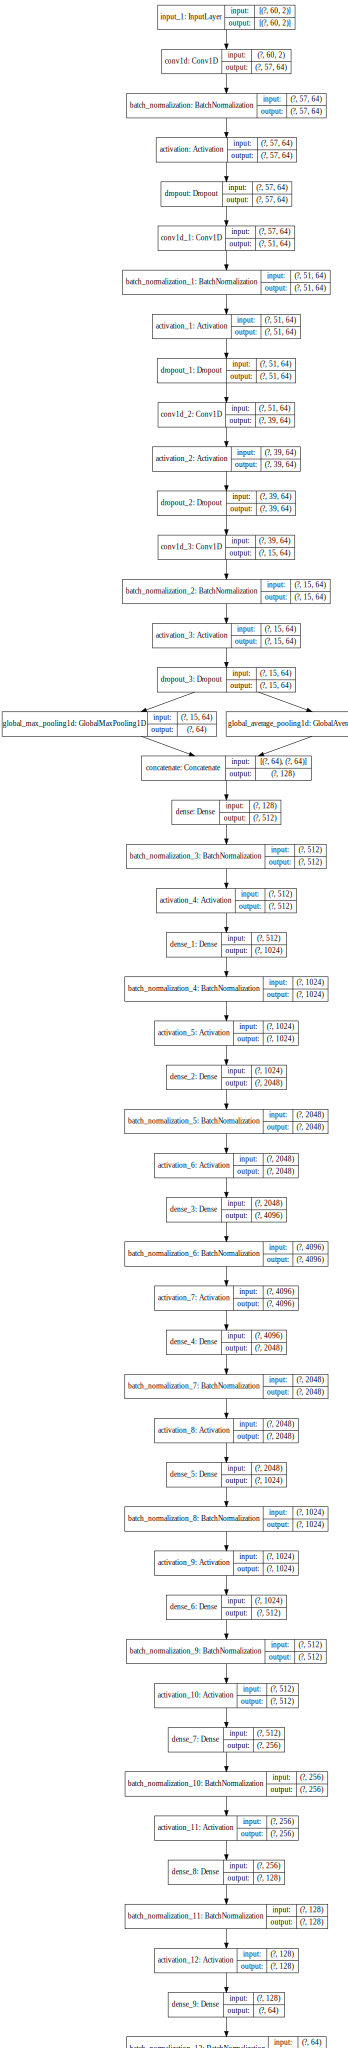

In [7]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

Train the model with early stopping

In [8]:
from datetime import datetime
import os

from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import numpy as np
from scikitplot.metrics import plot_confusion_matrix, plot_roc


class PerformanceVisualizationCallback(Callback):
    def __init__(self, model, validation_data, image_dir):
        super().__init__()
        self.model = model
        self.validation_data = validation_data
        
        os.makedirs(image_dir, exist_ok=True)
        self.image_dir = image_dir

    def on_epoch_end(self, epoch, logs={}):
        y_pred = np.asarray(self.model.predict(self.validation_data[0]))
        y_true = self.validation_data[1]             
        y_pred_class = np.argmax(y_pred, axis=1)

        # plot and save confusion matrix
        fig, ax = plt.subplots(figsize=(16,12))
        chart = plot_confusion_matrix(y_true, y_pred_class, ax=ax)
        fig.savefig(os.path.join(self.image_dir, f'confusion_matrix_epoch_{epoch}'))
        plt.display(chart)
        plt.show()
        
       # plot and save roc curve
        fig, ax = plt.subplots(figsize=(16,12))
        plot_roc(y_true, y_pred, ax=ax)
        chart = fig.savefig(os.path.join(self.image_dir, f'roc_curve_epoch_{epoch}'))
        plt.display(chart)
        plt.show()

timestamp = datetime.now().strftime("%Y%m%d-%H%M%S") 
logdir = "logs\\scalars\\" + timestamp

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
model_path = "C:\\save_model\\" + xfileName + timestamp
checkpoint_val_loss = ModelCheckpoint(model_path + "_" + ".val_loss.{val_loss:.2f}", monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_0 = ModelCheckpoint(model_path + "_" + ".val_Precision_0.{val_Precision_0:.2f}", monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_0_075 = ModelCheckpoint(model_path + "_" + ".val_Precision_0_075.{val_Precision_0_075:.2f}", monitor='val_Precision_0_075', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_0_080 = ModelCheckpoint(model_path + "_" + ".val_Precision_0_080.{val_Precision_0_080:.2f}", monitor='val_Precision_0_080', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_0_085 = ModelCheckpoint(model_path + "_" + ".val_Precision_0_085.{val_Precision_0_085:.2f}", monitor='val_Precision_0_085', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_0_090 = ModelCheckpoint(model_path + "_" + ".val_Precision_0_090.{val_Precision_0_090:.2f}", monitor='val_Precision_0_090', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_2 = ModelCheckpoint(model_path +"_"  + ".val_Precision_2.{val_Precision_2:.2f}", monitor='val_Precision_2', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_2_075 = ModelCheckpoint(model_path + "_" + ".val_Precision_2_075.{val_Precision_2_075:.2f}", monitor='val_Precision_2_075', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_2_080 = ModelCheckpoint(model_path + "_" + ".val_Precision_2_080.{val_Precision_2_080:.2f}", monitor='val_Precision_2_080', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_2_085 = ModelCheckpoint(model_path + "_" + ".val_Precision_2_085.{val_Precision_2_085:.2f}", monitor='val_Precision_2_085', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_2_090 = ModelCheckpoint(model_path + "_" + ".val_Precision_2_090.{val_Precision_2_090:.2f}", monitor='val_Precision_2_090', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
 


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=5, min_lr=0.001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=100) 
performance_cbk = PerformanceVisualizationCallback(
                      model=model,
                      validation_data=v_dataset,
                      image_dir='performance_vizualizations')

callbacks_list = [checkpoint_val_loss,
                  checkpoint_val_Precision_0,
                  checkpoint_val_Precision_0_075,
                  checkpoint_val_Precision_0_080,
                  checkpoint_val_Precision_0_085,
                  checkpoint_val_Precision_0_090,                  
                  checkpoint_val_Precision_2,
                  checkpoint_val_Precision_2_075,
                  checkpoint_val_Precision_2_080,
                  checkpoint_val_Precision_2_085,
                  checkpoint_val_Precision_2_090,
#                  early,
                   reduceLROnPlat
                 , tensorboard_callback
                  
                 ]


from IPython.display import clear_output
model.fit(train_dataset,
                      validation_data = v_dataset, 
#                       batch_size = 10,
                      epochs = 3000,
                      use_multiprocessing = True,
                      callbacks = callbacks_list)

# model.fit([train_X, train_X2], [train_y, train_y],
#                       validation_data = ([valid_X, valid_X2], [valid_y, valid_y]), 
#                       batch_size = batch_size,
#                       epochs = 500,
#                       callbacks = callbacks_list)

#clear_output()

Epoch 1/3000
     14/Unknown - 1s 45ms/step - loss: 0.7784 - accuracy: 0.4964 - Recall_0: 0.3358 - Recall_2: 0.4704 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 2.7836e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5090 - Precision_2: 0.5043 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00001: val_loss improved from -inf to 0.70274, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.70


W1104 14:47:16.449610  9448 deprecation.py:506] From C:\Users\Admin\Anaconda3\envs\Transformer_1D-CNN_Feature_Extraction_tf2.2\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Epoch 00001: val_loss improved from -inf to 0.70274, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.52

Epoch 00001: val_Precision_0_075 improved from -inf to 0.00000, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0_075.0.00

Epoch 00001: val_Precision_0_080 improved from -inf to 0.00000, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0_080.0.00

Epoch 00001: val_Precision_0_085 improved from -inf to 0.00000, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0_085.0.00

Epoch 00001: val_Precision_0_090 improved from -inf to 0.00000, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0_090.0.00

Epoch 00001: val_Precision_2 improved from -inf to 0.42857, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_2.0.43

Epoch 00001: val_Precision_2_075 impro

Epoch 4/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6994 - accuracy: 0.5071 - Recall_0: 0.4725 - Recall_2: 0.5409 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 1.5026e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5077 - Precision_2: 0.5069 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6667 - Precision_2_080: 1.0000 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00004: val_loss did not improve from 0.71355

Epoch 00004: val_loss did not improve from 0.71355

Epoch 00004: val_Precision_0_075 did not improve from 0.00000

Epoch 00004: val_Precision_0_080 did not improve from 0.00000

Epoch 00004: val_Precision_0_085 did not improve from 0.00000

Epoch 00004: val_Precision_0_090 did not improve from 0.00000

Epoch 00004: val_P

13/14 [==========================>...] - ETA: 0s - loss: 0.7001 - accuracy: 0.4899 - Recall_0: 0.4582 - Recall_2: 0.5112 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 1.5026e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.4899 - Precision_2: 0.4912 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6667 - Precision_2_080: 1.0000 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00      
Epoch 00007: val_loss did not improve from 0.71355

Epoch 00007: val_loss did not improve from 0.71355

Epoch 00007: val_Precision_0_075 did not improve from 0.00000

Epoch 00007: val_Precision_0_080 did not improve from 0.00000

Epoch 00007: val_Precision_0_085 did not improve from 0.00000

Epoch 00007: val_Precision_0_090 did not improve from 0.00000

Epoch 00007: val_Precisio

13/14 [==========================>...] - ETA: 0s - loss: 0.6999 - accuracy: 0.4914 - Recall_0: 0.4389 - Recall_2: 0.5403 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.4903 - Precision_2: 0.4919 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6667 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00  
Epoch 00010: val_loss did not improve from 0.71355

Epoch 00010: val_loss did not improve from 0.71355

Epoch 00010: val_Precision_0_075 did not improve from 0.00000

Epoch 00010: val_Precision_0_080 did not improve from 0.00000

Epoch 00010: val_Precision_0_085 did not improve from 0.00000

Epoch 00010: val_Precision_0_090 did not improve from 0.00000

Epoch 00010: val_Precisio

13/14 [==========================>...] - ETA: 0s - loss: 0.7001 - accuracy: 0.4938 - Recall_0: 0.5179 - Recall_2: 0.4696 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.4935 - Precision_2: 0.4938 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00  
Epoch 00013: val_loss did not improve from 0.71355

Epoch 00013: val_loss did not improve from 0.71355

Epoch 00013: val_Precision_0_075 did not improve from 0.00000

Epoch 00013: val_Precision_0_080 did not improve from 0.00000

Epoch 00013: val_Precision_0_085 did not improve from 0.00000

Epoch 00013: val_Precision_0_090 did not improve from 0.00000

Epoch 00013: val_Precisio

13/14 [==========================>...] - ETA: 0s - loss: 0.6997 - accuracy: 0.4932 - Recall_0: 0.4600 - Recall_2: 0.5207 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.4926 - Precision_2: 0.4944 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00  
Epoch 00016: val_loss did not improve from 0.71355

Epoch 00016: val_loss did not improve from 0.71355

Epoch 00016: val_Precision_0_075 did not improve from 0.00000

Epoch 00016: val_Precision_0_080 did not improve from 0.00000

Epoch 00016: val_Precision_0_085 did not improve from 0.00000

Epoch 00016: val_Precision_0_090 did not improve from 0.00000

Epoch 00016: val_Precisio

13/14 [==========================>...] - ETA: 0s - loss: 0.6995 - accuracy: 0.4925 - Recall_0: 0.4285 - Recall_2: 0.5364 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.4916 - Precision_2: 0.4936 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00  
Epoch 00019: val_loss did not improve from 0.71355

Epoch 00019: val_loss did not improve from 0.71355

Epoch 00019: val_Precision_0_075 did not improve from 0.00000

Epoch 00019: val_Precision_0_080 did not improve from 0.00000

Epoch 00019: val_Precision_0_085 did not improve from 0.00000

Epoch 00019: val_Precision_0_090 did not improve from 0.00000

Epoch 00019: val_Precisio

13/14 [==========================>...] - ETA: 0s - loss: 0.6989 - accuracy: 0.5007 - Recall_0: 0.4465 - Recall_2: 0.5476 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 1.5026e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5004 - Precision_2: 0.4999 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 1.0000 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00022: val_loss did not improve from 0.71355

Epoch 00022: val_loss did not improve from 0.71355

Epoch 00022: val_Precision_0_075 did not improve from 0.00000

Epoch 00022: val_Precision_0_080 did not improve from 0.00000

Epoch 00022: val_Precision_0_085 did not improve from 0.00000

Epoch 00022: val_Precision_0_090 did not improve from 0.00000

Epoch 00022: val_Precision_2 di

13/14 [==========================>...] - ETA: 0s - loss: 0.6989 - accuracy: 0.5038 - Recall_0: 0.4707 - Recall_2: 0.5277 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 1.5026e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5038 - Precision_2: 0.5038 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 1.0000 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00025: val_loss did not improve from 0.71355

Epoch 00025: val_loss did not improve from 0.71355

Epoch 00025: val_Precision_0_075 did not improve from 0.00000

Epoch 00025: val_Precision_0_080 did not improve from 0.00000

Epoch 00025: val_Precision_0_085 did not improve from 0.00000

Epoch 00025: val_Precision_0_090 did not improve from 0.00000

Epoch 00025: val_Precision_2 di

13/14 [==========================>...] - ETA: 0s - loss: 0.6987 - accuracy: 0.5051 - Recall_0: 0.4329 - Recall_2: 0.5636 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 1.5026e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5038 - Precision_2: 0.5051 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 1.0000 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00028: val_loss did not improve from 0.71355

Epoch 00028: val_loss did not improve from 0.71355

Epoch 00028: val_Precision_0_075 did not improve from 0.00000

Epoch 00028: val_Precision_0_080 did not improve from 0.00000

Epoch 00028: val_Precision_0_085 did not improve from 0.00000

Epoch 00028: val_Precision_0_090 did not improve from 0.00000

Epoch 00028: val_Precision_2 di

13/14 [==========================>...] - ETA: 0s - loss: 0.6988 - accuracy: 0.4988 - Recall_0: 0.4466 - Recall_2: 0.5255 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 1.5026e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.4978 - Precision_2: 0.4986 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 1.0000 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00031: val_loss did not improve from 0.71355

Epoch 00031: val_loss did not improve from 0.71355

Epoch 00031: val_Precision_0_075 did not improve from 0.00000

Epoch 00031: val_Precision_0_080 did not improve from 0.00000

Epoch 00031: val_Precision_0_085 did not improve from 0.00000

Epoch 00031: val_Precision_0_090 did not improve from 0.00000

Epoch 00031: val_Precision_2 di

13/14 [==========================>...] - ETA: 0s - loss: 0.6987 - accuracy: 0.5045 - Recall_0: 0.4394 - Recall_2: 0.5525 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 1.5026e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5045 - Precision_2: 0.5036 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 1.0000 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00034: val_loss did not improve from 0.71355

Epoch 00034: val_loss did not improve from 0.71355

Epoch 00034: val_Precision_0_075 did not improve from 0.00000

Epoch 00034: val_Precision_0_080 did not improve from 0.00000

Epoch 00034: val_Precision_0_085 did not improve from 0.00000

Epoch 00034: val_Precision_0_090 did not improve from 0.00000

Epoch 00034: val_Precision_2 di

13/14 [==========================>...] - ETA: 0s - loss: 0.6987 - accuracy: 0.5040 - Recall_0: 0.4678 - Recall_2: 0.5345 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5032 - Precision_2: 0.5045 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00037: val_loss did not improve from 0.71355

Epoch 00037: val_loss did not improve from 0.71355

Epoch 00037: val_Precision_0_075 did not improve from 0.00000

Epoch 00037: val_Precision_0_080 did not improve from 0.00000

Epoch 00037: val_Precision_0_085 did not improve from 0.00000

Epoch 00037: val_Precision_0_090 did not improve from 0.00000

Epoch 00037: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6986 - accuracy: 0.5049 - Recall_0: 0.4707 - Recall_2: 0.5319 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5061 - Precision_2: 0.5056 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00040: val_loss did not improve from 0.71355

Epoch 00040: val_loss did not improve from 0.71355

Epoch 00040: val_Precision_0_075 did not improve from 0.00000

Epoch 00040: val_Precision_0_080 did not improve from 0.00000

Epoch 00040: val_Precision_0_085 did not improve from 0.00000

Epoch 00040: val_Precision_0_090 did not improve from 0.00000

Epoch 00040: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6988 - accuracy: 0.4956 - Recall_0: 0.4639 - Recall_2: 0.5205 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.4961 - Precision_2: 0.4973 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00043: val_loss did not improve from 0.71355

Epoch 00043: val_loss did not improve from 0.71355

Epoch 00043: val_Precision_0_075 did not improve from 0.00000

Epoch 00043: val_Precision_0_080 did not improve from 0.00000

Epoch 00043: val_Precision_0_085 did not improve from 0.00000

Epoch 00043: val_Precision_0_090 did not improve from 0.00000

Epoch 00043: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6986 - accuracy: 0.5046 - Recall_0: 0.4634 - Recall_2: 0.5363 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5058 - Precision_2: 0.5047 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00046: val_loss did not improve from 0.71355

Epoch 00046: val_loss did not improve from 0.71355

Epoch 00046: val_Precision_0_075 did not improve from 0.00000

Epoch 00046: val_Precision_0_080 did not improve from 0.00000

Epoch 00046: val_Precision_0_085 did not improve from 0.00000

Epoch 00046: val_Precision_0_090 did not improve from 0.00000

Epoch 00046: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6984 - accuracy: 0.5115 - Recall_0: 0.4693 - Recall_2: 0.5406 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5133 - Precision_2: 0.5101 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00049: val_loss did not improve from 0.71355

Epoch 00049: val_loss did not improve from 0.71355

Epoch 00049: val_Precision_0_075 did not improve from 0.00000

Epoch 00049: val_Precision_0_080 did not improve from 0.00000

Epoch 00049: val_Precision_0_085 did not improve from 0.00000

Epoch 00049: val_Precision_0_090 did not improve from 0.00000

Epoch 00049: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6984 - accuracy: 0.5059 - Recall_0: 0.4782 - Recall_2: 0.5205 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5067 - Precision_2: 0.5058 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00052: val_loss did not improve from 0.71355

Epoch 00052: val_loss did not improve from 0.71355

Epoch 00052: val_Precision_0_075 did not improve from 0.00000

Epoch 00052: val_Precision_0_080 did not improve from 0.00000

Epoch 00052: val_Precision_0_085 did not improve from 0.00000

Epoch 00052: val_Precision_0_090 did not improve from 0.00000

Epoch 00052: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6984 - accuracy: 0.5016 - Recall_0: 0.4741 - Recall_2: 0.5166 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5033 - Precision_2: 0.5019 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00055: val_loss did not improve from 0.71355

Epoch 00055: val_loss did not improve from 0.71355

Epoch 00055: val_Precision_0_075 did not improve from 0.00000

Epoch 00055: val_Precision_0_080 did not improve from 0.00000

Epoch 00055: val_Precision_0_085 did not improve from 0.00000

Epoch 00055: val_Precision_0_090 did not improve from 0.00000

Epoch 00055: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6983 - accuracy: 0.5068 - Recall_0: 0.4836 - Recall_2: 0.5192 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5069 - Precision_2: 0.5070 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00058: val_loss did not improve from 0.71355

Epoch 00058: val_loss did not improve from 0.71355

Epoch 00058: val_Precision_0_075 did not improve from 0.00000

Epoch 00058: val_Precision_0_080 did not improve from 0.00000

Epoch 00058: val_Precision_0_085 did not improve from 0.00000

Epoch 00058: val_Precision_0_090 did not improve from 0.00000

Epoch 00058: val_Precis

13/14 [==========================>...] - ETA: 0s - loss: 0.6983 - accuracy: 0.5101 - Recall_0: 0.4722 - Recall_2: 0.5351 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5094 - Precision_2: 0.5098 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00061: val_loss did not improve from 0.71355

Epoch 00061: val_loss did not improve from 0.71355

Epoch 00061: val_Precision_0_075 did not improve from 0.00000

Epoch 00061: val_Precision_0_080 did not improve from 0.00000

Epoch 00061: val_Precision_0_085 did not improve from 0.00000

Epoch 00061: val_Precision_0_090 did not improve from 0.00000

Epoch 00061: val_Precis

13/14 [==========================>...] - ETA: 0s - loss: 0.6983 - accuracy: 0.5042 - Recall_0: 0.4603 - Recall_2: 0.5403 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5043 - Precision_2: 0.5041 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00064: val_loss did not improve from 0.71355

Epoch 00064: val_loss did not improve from 0.71355

Epoch 00064: val_Precision_0_075 did not improve from 0.00000

Epoch 00064: val_Precision_0_080 did not improve from 0.00000

Epoch 00064: val_Precision_0_085 did not improve from 0.00000

Epoch 00064: val_Precision_0_090 did not improve from 0.00000

Epoch 00064: val_Precis

13/14 [==========================>...] - ETA: 0s - loss: 0.6982 - accuracy: 0.5094 - Recall_0: 0.4759 - Recall_2: 0.5345 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5087 - Precision_2: 0.5093 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00067: val_loss did not improve from 0.71355

Epoch 00067: val_loss did not improve from 0.71355

Epoch 00067: val_Precision_0_075 did not improve from 0.00000

Epoch 00067: val_Precision_0_080 did not improve from 0.00000

Epoch 00067: val_Precision_0_085 did not improve from 0.00000

Epoch 00067: val_Precision_0_090 did not improve from 0.00000

Epoch 00067: val_Precis

13/14 [==========================>...] - ETA: 0s - loss: 0.6981 - accuracy: 0.5101 - Recall_0: 0.4771 - Recall_2: 0.5336 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5096 - Precision_2: 0.5093 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00070: val_loss did not improve from 0.71355

Epoch 00070: val_loss did not improve from 0.71355

Epoch 00070: val_Precision_0_075 did not improve from 0.00000

Epoch 00070: val_Precision_0_080 did not improve from 0.00000

Epoch 00070: val_Precision_0_085 did not improve from 0.00000

Epoch 00070: val_Precision_0_090 did not improve from 0.00000

Epoch 00070: val_Precis

13/14 [==========================>...] - ETA: 0s - loss: 0.6979 - accuracy: 0.5122 - Recall_0: 0.4449 - Recall_2: 0.5689 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5142 - Precision_2: 0.5104 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00073: val_loss did not improve from 0.71355

Epoch 00073: val_loss did not improve from 0.71355

Epoch 00073: val_Precision_0_075 did not improve from 0.00000

Epoch 00073: val_Precision_0_080 did not improve from 0.00000

Epoch 00073: val_Precision_0_085 did not improve from 0.00000

Epoch 00073: val_Precision_0_090 did not improve from 0.00000

Epoch 00073: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6979 - accuracy: 0.5146 - Recall_0: 0.4640 - Recall_2: 0.5581 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5155 - Precision_2: 0.5138 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00076: val_loss did not improve from 0.71355

Epoch 00076: val_loss did not improve from 0.71355

Epoch 00076: val_Precision_0_075 did not improve from 0.00000

Epoch 00076: val_Precision_0_080 did not improve from 0.00000

Epoch 00076: val_Precision_0_085 did not improve from 0.00000

Epoch 00076: val_Precision_0_090 did not improve from 0.00000

Epoch 00076: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6978 - accuracy: 0.5138 - Recall_0: 0.4835 - Recall_2: 0.5366 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5144 - Precision_2: 0.5137 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00079: val_loss did not improve from 0.71355

Epoch 00079: val_loss did not improve from 0.71355

Epoch 00079: val_Precision_0_075 did not improve from 0.00000

Epoch 00079: val_Precision_0_080 did not improve from 0.00000

Epoch 00079: val_Precision_0_085 did not improve from 0.00000

Epoch 00079: val_Precision_0_090 did not improve from 0.00000

Epoch 00079: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6980 - accuracy: 0.5108 - Recall_0: 0.4592 - Recall_2: 0.5531 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5120 - Precision_2: 0.5100 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00082: val_loss did not improve from 0.71355

Epoch 00082: val_loss did not improve from 0.71355

Epoch 00082: val_Precision_0_075 did not improve from 0.00000

Epoch 00082: val_Precision_0_080 did not improve from 0.00000

Epoch 00082: val_Precision_0_085 did not improve from 0.00000

Epoch 00082: val_Precision_0_090 did not improve from 0.00000

Epoch 00082: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6980 - accuracy: 0.5118 - Recall_0: 0.4640 - Recall_2: 0.5495 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5123 - Precision_2: 0.5105 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00085: val_loss did not improve from 0.71355

Epoch 00085: val_loss did not improve from 0.71355

Epoch 00085: val_Precision_0_075 did not improve from 0.00000

Epoch 00085: val_Precision_0_080 did not improve from 0.00000

Epoch 00085: val_Precision_0_085 did not improve from 0.00000

Epoch 00085: val_Precision_0_090 did not improve from 0.00000

Epoch 00085: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6982 - accuracy: 0.5100 - Recall_0: 0.4129 - Recall_2: 0.6011 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5116 - Precision_2: 0.5092 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6667 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00088: val_loss did not improve from 0.71355

Epoch 00088: val_loss did not improve from 0.71355

Epoch 00088: val_Precision_0_075 did not improve from 0.00000

Epoch 00088: val_Precision_0_080 did not improve from 0.00000

Epoch 00088: val_Precision_0_085 did not improve from 0.00000

Epoch 00088: val_Precision_0_090 did not improve from 0.00000

Epoch 00088: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6988 - accuracy: 0.5103 - Recall_0: 0.4150 - Recall_2: 0.6006 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5112 - Precision_2: 0.5090 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6667 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00091: val_loss did not improve from 0.71355

Epoch 00091: val_loss did not improve from 0.71355

Epoch 00091: val_Precision_0_075 did not improve from 0.00000

Epoch 00091: val_Precision_0_080 did not improve from 0.00000

Epoch 00091: val_Precision_0_085 did not improve from 0.00000

Epoch 00091: val_Precision_0_090 did not improve from 0.00000

Epoch 00091: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6992 - accuracy: 0.5061 - Recall_0: 0.4120 - Recall_2: 0.5970 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5084 - Precision_2: 0.5052 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6667 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00094: val_loss did not improve from 0.71355

Epoch 00094: val_loss did not improve from 0.71355

Epoch 00094: val_Precision_0_075 did not improve from 0.00000

Epoch 00094: val_Precision_0_080 did not improve from 0.00000

Epoch 00094: val_Precision_0_085 did not improve from 0.00000

Epoch 00094: val_Precision_0_090 did not improve from 0.00000

Epoch 00094: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6993 - accuracy: 0.5076 - Recall_0: 0.4085 - Recall_2: 0.6029 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5098 - Precision_2: 0.5064 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6667 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00097: val_loss did not improve from 0.71355

Epoch 00097: val_loss did not improve from 0.71355

Epoch 00097: val_Precision_0_075 did not improve from 0.00000

Epoch 00097: val_Precision_0_080 did not improve from 0.00000

Epoch 00097: val_Precision_0_085 did not improve from 0.00000

Epoch 00097: val_Precision_0_090 did not improve from 0.00000

Epoch 00097: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6992 - accuracy: 0.5061 - Recall_0: 0.4007 - Recall_2: 0.6072 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5078 - Precision_2: 0.5053 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6667 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00100: val_loss did not improve from 0.71355

Epoch 00100: val_loss did not improve from 0.71355

Epoch 00100: val_Precision_0_075 did not improve from 0.00000

Epoch 00100: val_Precision_0_080 did not improve from 0.00000

Epoch 00100: val_Precision_0_085 did not improve from 0.00000

Epoch 00100: val_Precision_0_090 did not improve from 0.00000

Epoch 00100: val_Precision_

Epoch 103/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6992 - accuracy: 0.5019 - Recall_0: 0.5170 - Recall_2: 0.4825 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5019 - Precision_2: 0.5023 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00103: val_loss did not improve from 0.71355

Epoch 00103: val_loss did not improve from 0.71355

Epoch 00103: val_Precision_0_075 did not improve from 0.00000

Epoch 00103: val_Precision_0_080 did not improve from 0.00000

Epoch 00103: val_Precision_0_085 did not improve from 0.00000

Epoch 00103: val_Precision_0_090 did not improve from 0.00000

Epoch 00103:

13/14 [==========================>...] - ETA: 0s - loss: 0.6987 - accuracy: 0.5048 - Recall_0: 0.5054 - Recall_2: 0.4969 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5040 - Precision_2: 0.5050 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00106: val_loss did not improve from 0.71355

Epoch 00106: val_loss did not improve from 0.71355

Epoch 00106: val_Precision_0_075 did not improve from 0.00000

Epoch 00106: val_Precision_0_080 did not improve from 0.00000

Epoch 00106: val_Precision_0_085 did not improve from 0.00000

Epoch 00106: val_Precision_0_090 did not improve from 0.00000

Epoch 00106: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6987 - accuracy: 0.5054 - Recall_0: 0.5075 - Recall_2: 0.4975 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5046 - Precision_2: 0.5063 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00109: val_loss did not improve from 0.71355

Epoch 00109: val_loss did not improve from 0.71355

Epoch 00109: val_Precision_0_075 did not improve from 0.00000

Epoch 00109: val_Precision_0_080 did not improve from 0.00000

Epoch 00109: val_Precision_0_085 did not improve from 0.00000

Epoch 00109: val_Precision_0_090 did not improve from 0.00000

Epoch 00109: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6987 - accuracy: 0.5055 - Recall_0: 0.5006 - Recall_2: 0.5025 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5055 - Precision_2: 0.5052 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00112: val_loss did not improve from 0.71355

Epoch 00112: val_loss did not improve from 0.71355

Epoch 00112: val_Precision_0_075 did not improve from 0.00000

Epoch 00112: val_Precision_0_080 did not improve from 0.00000

Epoch 00112: val_Precision_0_085 did not improve from 0.00000

Epoch 00112: val_Precision_0_090 did not improve from 0.00000

Epoch 00112: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6986 - accuracy: 0.5043 - Recall_0: 0.5397 - Recall_2: 0.4630 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5036 - Precision_2: 0.5057 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00115: val_loss did not improve from 0.71355

Epoch 00115: val_loss did not improve from 0.71355

Epoch 00115: val_Precision_0_075 did not improve from 0.00000

Epoch 00115: val_Precision_0_080 did not improve from 0.00000

Epoch 00115: val_Precision_0_085 did not improve from 0.00000

Epoch 00115: val_Precision_0_090 did not improve from 0.00000

Epoch 00115: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6979 - accuracy: 0.5050 - Recall_0: 0.5208 - Recall_2: 0.4796 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5053 - Precision_2: 0.5059 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00118: val_loss did not improve from 0.71355

Epoch 00118: val_loss did not improve from 0.71355

Epoch 00118: val_Precision_0_075 did not improve from 0.00000

Epoch 00118: val_Precision_0_080 did not improve from 0.00000

Epoch 00118: val_Precision_0_085 did not improve from 0.00000

Epoch 00118: val_Precision_0_090 did not improve from 0.00000

Epoch 00118: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6981 - accuracy: 0.5060 - Recall_0: 0.5156 - Recall_2: 0.4876 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5063 - Precision_2: 0.5065 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00121: val_loss did not improve from 0.71355

Epoch 00121: val_loss did not improve from 0.71355

Epoch 00121: val_Precision_0_075 did not improve from 0.00000

Epoch 00121: val_Precision_0_080 did not improve from 0.00000

Epoch 00121: val_Precision_0_085 did not improve from 0.00000

Epoch 00121: val_Precision_0_090 did not improve from 0.00000

Epoch 00121: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6979 - accuracy: 0.5105 - Recall_0: 0.5161 - Recall_2: 0.4978 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5103 - Precision_2: 0.5113 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00124: val_loss did not improve from 0.71355

Epoch 00124: val_loss did not improve from 0.71355

Epoch 00124: val_Precision_0_075 did not improve from 0.00000

Epoch 00124: val_Precision_0_080 did not improve from 0.00000

Epoch 00124: val_Precision_0_085 did not improve from 0.00000

Epoch 00124: val_Precision_0_090 did not improve from 0.00000

Epoch 00124: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6979 - accuracy: 0.5107 - Recall_0: 0.5316 - Recall_2: 0.4808 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5097 - Precision_2: 0.5117 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00127: val_loss did not improve from 0.71355

Epoch 00127: val_loss did not improve from 0.71355

Epoch 00127: val_Precision_0_075 did not improve from 0.00000

Epoch 00127: val_Precision_0_080 did not improve from 0.00000

Epoch 00127: val_Precision_0_085 did not improve from 0.00000

Epoch 00127: val_Precision_0_090 did not improve from 0.00000

Epoch 00127: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6975 - accuracy: 0.5132 - Recall_0: 0.5551 - Recall_2: 0.4600 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5114 - Precision_2: 0.5150 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00130: val_loss did not improve from 0.71355

Epoch 00130: val_loss did not improve from 0.71355

Epoch 00130: val_Precision_0_075 did not improve from 0.00000

Epoch 00130: val_Precision_0_080 did not improve from 0.00000

Epoch 00130: val_Precision_0_085 did not improve from 0.00000

Epoch 00130: val_Precision_0_090 did not improve from 0.00000

Epoch 00130: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6976 - accuracy: 0.5142 - Recall_0: 0.5358 - Recall_2: 0.4819 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5138 - Precision_2: 0.5142 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00133: val_loss did not improve from 0.71355

Epoch 00133: val_loss did not improve from 0.71355

Epoch 00133: val_Precision_0_075 did not improve from 0.00000

Epoch 00133: val_Precision_0_080 did not improve from 0.00000

Epoch 00133: val_Precision_0_085 did not improve from 0.00000

Epoch 00133: val_Precision_0_090 did not improve from 0.00000

Epoch 00133: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6977 - accuracy: 0.5121 - Recall_0: 0.5495 - Recall_2: 0.4651 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5112 - Precision_2: 0.5144 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00136: val_loss did not improve from 0.71355

Epoch 00136: val_loss did not improve from 0.71355

Epoch 00136: val_Precision_0_075 did not improve from 0.00000

Epoch 00136: val_Precision_0_080 did not improve from 0.00000

Epoch 00136: val_Precision_0_085 did not improve from 0.00000

Epoch 00136: val_Precision_0_090 did not improve from 0.00000

Epoch 00136: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6977 - accuracy: 0.5127 - Recall_0: 0.5388 - Recall_2: 0.4759 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5121 - Precision_2: 0.5135 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00139: val_loss did not improve from 0.71355

Epoch 00139: val_loss did not improve from 0.71355

Epoch 00139: val_Precision_0_075 did not improve from 0.00000

Epoch 00139: val_Precision_0_080 did not improve from 0.00000

Epoch 00139: val_Precision_0_085 did not improve from 0.00000

Epoch 00139: val_Precision_0_090 did not improve from 0.00000

Epoch 00139: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6979 - accuracy: 0.5101 - Recall_0: 0.5266 - Recall_2: 0.4844 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5090 - Precision_2: 0.5116 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00142: val_loss did not improve from 0.71355

Epoch 00142: val_loss did not improve from 0.71355

Epoch 00142: val_Precision_0_075 did not improve from 0.00000

Epoch 00142: val_Precision_0_080 did not improve from 0.00000

Epoch 00142: val_Precision_0_085 did not improve from 0.00000

Epoch 00142: val_Precision_0_090 did not improve from 0.00000

Epoch 00142: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6974 - accuracy: 0.5120 - Recall_0: 0.5367 - Recall_2: 0.4744 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5107 - Precision_2: 0.5127 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00145: val_loss did not improve from 0.71355

Epoch 00145: val_loss did not improve from 0.71355

Epoch 00145: val_Precision_0_075 did not improve from 0.00000

Epoch 00145: val_Precision_0_080 did not improve from 0.00000

Epoch 00145: val_Precision_0_085 did not improve from 0.00000

Epoch 00145: val_Precision_0_090 did not improve from 0.00000

Epoch 00145: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6973 - accuracy: 0.5132 - Recall_0: 0.5412 - Recall_2: 0.4732 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5124 - Precision_2: 0.5137 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00148: val_loss did not improve from 0.71355

Epoch 00148: val_loss did not improve from 0.71355

Epoch 00148: val_Precision_0_075 did not improve from 0.00000

Epoch 00148: val_Precision_0_080 did not improve from 0.00000

Epoch 00148: val_Precision_0_085 did not improve from 0.00000

Epoch 00148: val_Precision_0_090 did not improve from 0.00000

Epoch 00148: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6974 - accuracy: 0.5152 - Recall_0: 0.5332 - Recall_2: 0.4882 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5139 - Precision_2: 0.5169 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00151: val_loss did not improve from 0.71355

Epoch 00151: val_loss did not improve from 0.71355

Epoch 00151: val_Precision_0_075 did not improve from 0.00000

Epoch 00151: val_Precision_0_080 did not improve from 0.00000

Epoch 00151: val_Precision_0_085 did not improve from 0.00000

Epoch 00151: val_Precision_0_090 did not improve from 0.00000

Epoch 00151: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6974 - accuracy: 0.5129 - Recall_0: 0.5343 - Recall_2: 0.4814 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5119 - Precision_2: 0.5136 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00154: val_loss did not improve from 0.71355

Epoch 00154: val_loss did not improve from 0.71355

Epoch 00154: val_Precision_0_075 did not improve from 0.00000

Epoch 00154: val_Precision_0_080 did not improve from 0.00000

Epoch 00154: val_Precision_0_085 did not improve from 0.00000

Epoch 00154: val_Precision_0_090 did not improve from 0.00000

Epoch 00154: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6971 - accuracy: 0.5180 - Recall_0: 0.5420 - Recall_2: 0.4831 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5165 - Precision_2: 0.5204 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00157: val_loss did not improve from 0.71355

Epoch 00157: val_loss did not improve from 0.71355

Epoch 00157: val_Precision_0_075 did not improve from 0.00000

Epoch 00157: val_Precision_0_080 did not improve from 0.00000

Epoch 00157: val_Precision_0_085 did not improve from 0.00000

Epoch 00157: val_Precision_0_090 did not improve from 0.00000

Epoch 00157: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6969 - accuracy: 0.5174 - Recall_0: 0.5238 - Recall_2: 0.5007 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5168 - Precision_2: 0.5194 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00160: val_loss did not improve from 0.71355

Epoch 00160: val_loss did not improve from 0.71355

Epoch 00160: val_Precision_0_075 did not improve from 0.00000

Epoch 00160: val_Precision_0_080 did not improve from 0.00000

Epoch 00160: val_Precision_0_085 did not improve from 0.00000

Epoch 00160: val_Precision_0_090 did not improve from 0.00000

Epoch 00160: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6968 - accuracy: 0.5182 - Recall_0: 0.5119 - Recall_2: 0.5148 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5176 - Precision_2: 0.5178 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00163: val_loss did not improve from 0.71355

Epoch 00163: val_loss did not improve from 0.71355

Epoch 00163: val_Precision_0_075 did not improve from 0.00000

Epoch 00163: val_Precision_0_080 did not improve from 0.00000

Epoch 00163: val_Precision_0_085 did not improve from 0.00000

Epoch 00163: val_Precision_0_090 did not improve from 0.00000

Epoch 00163: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6970 - accuracy: 0.5140 - Recall_0: 0.5116 - Recall_2: 0.5077 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5143 - Precision_2: 0.5149 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00166: val_loss did not improve from 0.71355

Epoch 00166: val_loss did not improve from 0.71355

Epoch 00166: val_Precision_0_075 did not improve from 0.00000

Epoch 00166: val_Precision_0_080 did not improve from 0.00000

Epoch 00166: val_Precision_0_085 did not improve from 0.00000

Epoch 00166: val_Precision_0_090 did not improve from 0.00000

Epoch 00166: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6968 - accuracy: 0.5167 - Recall_0: 0.5296 - Recall_2: 0.4932 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5172 - Precision_2: 0.5173 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00169: val_loss did not improve from 0.71355

Epoch 00169: val_loss did not improve from 0.71355

Epoch 00169: val_Precision_0_075 did not improve from 0.00000

Epoch 00169: val_Precision_0_080 did not improve from 0.00000

Epoch 00169: val_Precision_0_085 did not improve from 0.00000

Epoch 00169: val_Precision_0_090 did not improve from 0.00000

Epoch 00169: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6967 - accuracy: 0.5180 - Recall_0: 0.5179 - Recall_2: 0.5116 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5184 - Precision_2: 0.5192 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00172: val_loss did not improve from 0.71355

Epoch 00172: val_loss did not improve from 0.71355

Epoch 00172: val_Precision_0_075 did not improve from 0.00000

Epoch 00172: val_Precision_0_080 did not improve from 0.00000

Epoch 00172: val_Precision_0_085 did not improve from 0.00000

Epoch 00172: val_Precision_0_090 did not improve from 0.00000

Epoch 00172: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6967 - accuracy: 0.5221 - Recall_0: 0.5158 - Recall_2: 0.5175 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5221 - Precision_2: 0.5214 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00175: val_loss did not improve from 0.71355

Epoch 00175: val_loss did not improve from 0.71355

Epoch 00175: val_Precision_0_075 did not improve from 0.00000

Epoch 00175: val_Precision_0_080 did not improve from 0.00000

Epoch 00175: val_Precision_0_085 did not improve from 0.00000

Epoch 00175: val_Precision_0_090 did not improve from 0.00000

Epoch 00175: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6967 - accuracy: 0.5191 - Recall_0: 0.5340 - Recall_2: 0.4951 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5187 - Precision_2: 0.5214 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00178: val_loss did not improve from 0.71355

Epoch 00178: val_loss did not improve from 0.71355

Epoch 00178: val_Precision_0_075 did not improve from 0.00000

Epoch 00178: val_Precision_0_080 did not improve from 0.00000

Epoch 00178: val_Precision_0_085 did not improve from 0.00000

Epoch 00178: val_Precision_0_090 did not improve from 0.00000

Epoch 00178: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6966 - accuracy: 0.5172 - Recall_0: 0.5287 - Recall_2: 0.4963 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5165 - Precision_2: 0.5180 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00181: val_loss did not improve from 0.71355

Epoch 00181: val_loss did not improve from 0.71355

Epoch 00181: val_Precision_0_075 did not improve from 0.00000

Epoch 00181: val_Precision_0_080 did not improve from 0.00000

Epoch 00181: val_Precision_0_085 did not improve from 0.00000

Epoch 00181: val_Precision_0_090 did not improve from 0.00000

Epoch 00181: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6965 - accuracy: 0.5218 - Recall_0: 0.5042 - Recall_2: 0.5310 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5230 - Precision_2: 0.5223 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00184: val_loss did not improve from 0.71355

Epoch 00184: val_loss did not improve from 0.71355

Epoch 00184: val_Precision_0_075 did not improve from 0.00000

Epoch 00184: val_Precision_0_080 did not improve from 0.00000

Epoch 00184: val_Precision_0_085 did not improve from 0.00000

Epoch 00184: val_Precision_0_090 did not improve from 0.00000

Epoch 00184: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6964 - accuracy: 0.5273 - Recall_0: 0.5164 - Recall_2: 0.5258 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5267 - Precision_2: 0.5267 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00187: val_loss did not improve from 0.71355

Epoch 00187: val_loss did not improve from 0.71355

Epoch 00187: val_Precision_0_075 did not improve from 0.00000

Epoch 00187: val_Precision_0_080 did not improve from 0.00000

Epoch 00187: val_Precision_0_085 did not improve from 0.00000

Epoch 00187: val_Precision_0_090 did not improve from 0.00000

Epoch 00187: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6963 - accuracy: 0.5237 - Recall_0: 0.5098 - Recall_2: 0.5274 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5238 - Precision_2: 0.5231 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00190: val_loss did not improve from 0.71355

Epoch 00190: val_loss did not improve from 0.71355

Epoch 00190: val_Precision_0_075 did not improve from 0.00000

Epoch 00190: val_Precision_0_080 did not improve from 0.00000

Epoch 00190: val_Precision_0_085 did not improve from 0.00000

Epoch 00190: val_Precision_0_090 did not improve from 0.00000

Epoch 00190: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6962 - accuracy: 0.5251 - Recall_0: 0.5096 - Recall_2: 0.5309 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5258 - Precision_2: 0.5244 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00193: val_loss did not improve from 0.71355

Epoch 00193: val_loss did not improve from 0.71355

Epoch 00193: val_Precision_0_075 did not improve from 0.00000

Epoch 00193: val_Precision_0_080 did not improve from 0.00000

Epoch 00193: val_Precision_0_085 did not improve from 0.00000

Epoch 00193: val_Precision_0_090 did not improve from 0.00000

Epoch 00193: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6961 - accuracy: 0.5248 - Recall_0: 0.5105 - Recall_2: 0.5267 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5256 - Precision_2: 0.5228 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00196: val_loss did not improve from 0.71355

Epoch 00196: val_loss did not improve from 0.71355

Epoch 00196: val_Precision_0_075 did not improve from 0.00000

Epoch 00196: val_Precision_0_080 did not improve from 0.00000

Epoch 00196: val_Precision_0_085 did not improve from 0.00000

Epoch 00196: val_Precision_0_090 did not improve from 0.00000

Epoch 00196: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6958 - accuracy: 0.5269 - Recall_0: 0.5181 - Recall_2: 0.5277 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5267 - Precision_2: 0.5269 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00199: val_loss did not improve from 0.71355

Epoch 00199: val_loss did not improve from 0.71355

Epoch 00199: val_Precision_0_075 did not improve from 0.00000

Epoch 00199: val_Precision_0_080 did not improve from 0.00000

Epoch 00199: val_Precision_0_085 did not improve from 0.00000

Epoch 00199: val_Precision_0_090 did not improve from 0.00000

Epoch 00199: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6955 - accuracy: 0.5276 - Recall_0: 0.5606 - Recall_2: 0.4878 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5254 - Precision_2: 0.5308 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00202: val_loss did not improve from 0.71355

Epoch 00202: val_loss did not improve from 0.71355

Epoch 00202: val_Precision_0_075 did not improve from 0.00000

Epoch 00202: val_Precision_0_080 did not improve from 0.00000

Epoch 00202: val_Precision_0_085 did not improve from 0.00000

Epoch 00202: val_Precision_0_090 did not improve from 0.00000

Epoch 00202: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6966 - accuracy: 0.5258 - Recall_0: 0.5077 - Recall_2: 0.5321 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5254 - Precision_2: 0.5252 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00205: val_loss did not improve from 0.71355

Epoch 00205: val_loss did not improve from 0.71355

Epoch 00205: val_Precision_0_075 did not improve from 0.00000

Epoch 00205: val_Precision_0_080 did not improve from 0.00000

Epoch 00205: val_Precision_0_085 did not improve from 0.00000

Epoch 00205: val_Precision_0_090 did not improve from 0.00000

Epoch 00205: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6961 - accuracy: 0.5266 - Recall_0: 0.5123 - Recall_2: 0.5307 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5266 - Precision_2: 0.5257 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00208: val_loss did not improve from 0.71355

Epoch 00208: val_loss did not improve from 0.71355

Epoch 00208: val_Precision_0_075 did not improve from 0.00000

Epoch 00208: val_Precision_0_080 did not improve from 0.00000

Epoch 00208: val_Precision_0_085 did not improve from 0.00000

Epoch 00208: val_Precision_0_090 did not improve from 0.00000

Epoch 00208: val_Precision_

14/14 [==============================] - ETA: 0s - loss: 0.6950 - accuracy: 0.5307 - Recall_0: 0.5393 - Recall_2: 0.5126 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.3918e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5296 - Precision_2: 0.5336 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00211: val_loss did not improve from 0.71355

Epoch 00211: val_loss did not improve from 0.71355

Epoch 00211: val_Precision_0_075 did not improve from 0.00000

Epoch 00211: val_Precision_0_080 did not improve from 0.00000

Epoch 00211: val_Precision_0_085 did not improve from 0.00000

Epoch 00211: val_Precision_0_090 did not improve from 0.00000

Epoch 00211: val_Precision_

14/14 [==============================] - ETA: 0s - loss: 0.6957 - accuracy: 0.5248 - Recall_0: 0.5165 - Recall_2: 0.5246 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.3918e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5242 - Precision_2: 0.5262 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00214: val_loss did not improve from 0.71355

Epoch 00214: val_loss did not improve from 0.71355

Epoch 00214: val_Precision_0_075 did not improve from 0.00000

Epoch 00214: val_Precision_0_080 did not improve from 0.00000

Epoch 00214: val_Precision_0_085 did not improve from 0.00000

Epoch 00214: val_Precision_0_090 did not improve from 0.00000

Epoch 00214: val_Precision_

Epoch 217/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6953 - accuracy: 0.5276 - Recall_0: 0.5561 - Recall_2: 0.4903 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5266 - Precision_2: 0.5301 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00217: val_loss did not improve from 0.71355

Epoch 00217: val_loss did not improve from 0.71355

Epoch 00217: val_Precision_0_075 did not improve from 0.00000

Epoch 00217: val_Precision_0_080 did not improve from 0.00000

Epoch 00217: val_Precision_0_085 did not improve from 0.00000

Epoch 00217: val_Precision_0_090 did not improve from 0.00000

Epoch 00217:

13/14 [==========================>...] - ETA: 0s - loss: 0.6951 - accuracy: 0.5273 - Recall_0: 0.5557 - Recall_2: 0.4909 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5256 - Precision_2: 0.5300 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00220: val_loss did not improve from 0.71355

Epoch 00220: val_loss did not improve from 0.71355

Epoch 00220: val_Precision_0_075 did not improve from 0.00000

Epoch 00220: val_Precision_0_080 did not improve from 0.00000

Epoch 00220: val_Precision_0_085 did not improve from 0.00000

Epoch 00220: val_Precision_0_090 did not improve from 0.00000

Epoch 00220: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6952 - accuracy: 0.5276 - Recall_0: 0.5590 - Recall_2: 0.4887 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5254 - Precision_2: 0.5305 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00223: val_loss did not improve from 0.71355

Epoch 00223: val_loss did not improve from 0.71355

Epoch 00223: val_Precision_0_075 did not improve from 0.00000

Epoch 00223: val_Precision_0_080 did not improve from 0.00000

Epoch 00223: val_Precision_0_085 did not improve from 0.00000

Epoch 00223: val_Precision_0_090 did not improve from 0.00000

Epoch 00223: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6949 - accuracy: 0.5302 - Recall_0: 0.5636 - Recall_2: 0.4882 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5284 - Precision_2: 0.5322 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00226: val_loss did not improve from 0.71355

Epoch 00226: val_loss did not improve from 0.71355

Epoch 00226: val_Precision_0_075 did not improve from 0.00000

Epoch 00226: val_Precision_0_080 did not improve from 0.00000

Epoch 00226: val_Precision_0_085 did not improve from 0.00000

Epoch 00226: val_Precision_0_090 did not improve from 0.00000

Epoch 00226: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6948 - accuracy: 0.5289 - Recall_0: 0.5853 - Recall_2: 0.4642 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5262 - Precision_2: 0.5331 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00229: val_loss did not improve from 0.71355

Epoch 00229: val_loss did not improve from 0.71355

Epoch 00229: val_Precision_0_075 did not improve from 0.00000

Epoch 00229: val_Precision_0_080 did not improve from 0.00000

Epoch 00229: val_Precision_0_085 did not improve from 0.00000

Epoch 00229: val_Precision_0_090 did not improve from 0.00000

Epoch 00229: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6937 - accuracy: 0.5290 - Recall_0: 0.5555 - Recall_2: 0.4918 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5282 - Precision_2: 0.5306 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00232: val_loss improved from 0.71355 to 0.71706, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.72

Epoch 00232: val_loss improved from 0.71355 to 0.71706, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.00

Epoch 00232: val_Precision_0_075 did not improve from 0.00000

Epoch 00232: val_Pr

13/14 [==========================>...] - ETA: 0s - loss: 0.6972 - accuracy: 0.5162 - Recall_0: 0.5669 - Recall_2: 0.4557 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5143 - Precision_2: 0.5186 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00235: val_loss did not improve from 0.71791

Epoch 00235: val_loss did not improve from 0.71791

Epoch 00235: val_Precision_0_075 did not improve from 0.00000

Epoch 00235: val_Precision_0_080 did not improve from 0.00000

Epoch 00235: val_Precision_0_085 did not improve from 0.00000

Epoch 00235: val_Precision_0_090 did not improve from 0.00000

Epoch 00235: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6969 - accuracy: 0.5228 - Recall_0: 0.5432 - Recall_2: 0.4903 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5220 - Precision_2: 0.5225 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00238: val_loss did not improve from 0.71791

Epoch 00238: val_loss did not improve from 0.71791

Epoch 00238: val_Precision_0_075 did not improve from 0.00000

Epoch 00238: val_Precision_0_080 did not improve from 0.00000

Epoch 00238: val_Precision_0_085 did not improve from 0.00000

Epoch 00238: val_Precision_0_090 did not improve from 0.00000

Epoch 00238: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6966 - accuracy: 0.5257 - Recall_0: 0.5289 - Recall_2: 0.5112 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5256 - Precision_2: 0.5272 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00241: val_loss did not improve from 0.71791

Epoch 00241: val_loss did not improve from 0.71791

Epoch 00241: val_Precision_0_075 did not improve from 0.00000

Epoch 00241: val_Precision_0_080 did not improve from 0.00000

Epoch 00241: val_Precision_0_085 did not improve from 0.00000

Epoch 00241: val_Precision_0_090 did not improve from 0.00000

Epoch 00241: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6965 - accuracy: 0.5249 - Recall_0: 0.5329 - Recall_2: 0.5065 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5239 - Precision_2: 0.5260 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00244: val_loss did not improve from 0.71791

Epoch 00244: val_loss did not improve from 0.71791

Epoch 00244: val_Precision_0_075 did not improve from 0.00000

Epoch 00244: val_Precision_0_080 did not improve from 0.00000

Epoch 00244: val_Precision_0_085 did not improve from 0.00000

Epoch 00244: val_Precision_0_090 did not improve from 0.00000

Epoch 00244: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6962 - accuracy: 0.5291 - Recall_0: 0.5344 - Recall_2: 0.5154 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5291 - Precision_2: 0.5306 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00247: val_loss did not improve from 0.71791

Epoch 00247: val_loss did not improve from 0.71791

Epoch 00247: val_Precision_0_075 did not improve from 0.00000

Epoch 00247: val_Precision_0_080 did not improve from 0.00000

Epoch 00247: val_Precision_0_085 did not improve from 0.00000

Epoch 00247: val_Precision_0_090 did not improve from 0.00000

Epoch 00247: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6962 - accuracy: 0.5287 - Recall_0: 0.5254 - Recall_2: 0.5204 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5292 - Precision_2: 0.5288 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00250: val_loss did not improve from 0.71791

Epoch 00250: val_loss did not improve from 0.71791

Epoch 00250: val_Precision_0_075 did not improve from 0.00000

Epoch 00250: val_Precision_0_080 did not improve from 0.00000

Epoch 00250: val_Precision_0_085 did not improve from 0.00000

Epoch 00250: val_Precision_0_090 did not improve from 0.00000

Epoch 00250: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6962 - accuracy: 0.5293 - Recall_0: 0.5048 - Recall_2: 0.5438 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5304 - Precision_2: 0.5289 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00253: val_loss did not improve from 0.71791

Epoch 00253: val_loss did not improve from 0.71791

Epoch 00253: val_Precision_0_075 did not improve from 0.00000

Epoch 00253: val_Precision_0_080 did not improve from 0.00000

Epoch 00253: val_Precision_0_085 did not improve from 0.00000

Epoch 00253: val_Precision_0_090 did not improve from 0.00000

Epoch 00253: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6962 - accuracy: 0.5297 - Recall_0: 0.5057 - Recall_2: 0.5441 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5320 - Precision_2: 0.5302 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00256: val_loss did not improve from 0.71791

Epoch 00256: val_loss did not improve from 0.71791

Epoch 00256: val_Precision_0_075 did not improve from 0.00000

Epoch 00256: val_Precision_0_080 did not improve from 0.00000

Epoch 00256: val_Precision_0_085 did not improve from 0.00000

Epoch 00256: val_Precision_0_090 did not improve from 0.00000

Epoch 00256: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6961 - accuracy: 0.5299 - Recall_0: 0.4985 - Recall_2: 0.5521 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5317 - Precision_2: 0.5292 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00259: val_loss did not improve from 0.71791

Epoch 00259: val_loss did not improve from 0.71791

Epoch 00259: val_Precision_0_075 did not improve from 0.00000

Epoch 00259: val_Precision_0_080 did not improve from 0.00000

Epoch 00259: val_Precision_0_085 did not improve from 0.00000

Epoch 00259: val_Precision_0_090 did not improve from 0.00000

Epoch 00259: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6958 - accuracy: 0.5335 - Recall_0: 0.5005 - Recall_2: 0.5572 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5347 - Precision_2: 0.5324 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00262: val_loss did not improve from 0.71791

Epoch 00262: val_loss did not improve from 0.71791

Epoch 00262: val_Precision_0_075 did not improve from 0.00000

Epoch 00262: val_Precision_0_080 did not improve from 0.00000

Epoch 00262: val_Precision_0_085 did not improve from 0.00000

Epoch 00262: val_Precision_0_090 did not improve from 0.00000

Epoch 00262: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6960 - accuracy: 0.5312 - Recall_0: 0.4863 - Recall_2: 0.5671 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5345 - Precision_2: 0.5302 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00265: val_loss did not improve from 0.71791

Epoch 00265: val_loss did not improve from 0.71791

Epoch 00265: val_Precision_0_075 did not improve from 0.00000

Epoch 00265: val_Precision_0_080 did not improve from 0.00000

Epoch 00265: val_Precision_0_085 did not improve from 0.00000

Epoch 00265: val_Precision_0_090 did not improve from 0.00000

Epoch 00265: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6962 - accuracy: 0.5297 - Recall_0: 0.5020 - Recall_2: 0.5444 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5307 - Precision_2: 0.5288 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00268: val_loss did not improve from 0.71791

Epoch 00268: val_loss did not improve from 0.71791

Epoch 00268: val_Precision_0_075 did not improve from 0.00000

Epoch 00268: val_Precision_0_080 did not improve from 0.00000

Epoch 00268: val_Precision_0_085 did not improve from 0.00000

Epoch 00268: val_Precision_0_090 did not improve from 0.00000

Epoch 00268: val_Precision_

14/14 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.5275 - Recall_0: 0.4797 - Recall_2: 0.5634 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.3918e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5283 - Precision_2: 0.5267 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00271: val_loss did not improve from 0.71791

Epoch 00271: val_loss did not improve from 0.71791

Epoch 00271: val_Precision_0_075 did not improve from 0.00000

Epoch 00271: val_Precision_0_080 did not improve from 0.00000

Epoch 00271: val_Precision_0_085 did not improve from 0.00000

Epoch 00271: val_Precision_0_090 did not improve from 0.00000

Epoch 00271: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6958 - accuracy: 0.5326 - Recall_0: 0.4914 - Recall_2: 0.5654 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5357 - Precision_2: 0.5313 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00274: val_loss did not improve from 0.71791

Epoch 00274: val_loss did not improve from 0.71791

Epoch 00274: val_Precision_0_075 did not improve from 0.00000

Epoch 00274: val_Precision_0_080 did not improve from 0.00000

Epoch 00274: val_Precision_0_085 did not improve from 0.00000

Epoch 00274: val_Precision_0_090 did not improve from 0.00000

Epoch 00274: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6957 - accuracy: 0.5321 - Recall_0: 0.4804 - Recall_2: 0.5754 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5358 - Precision_2: 0.5298 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00277: val_loss did not improve from 0.71791

Epoch 00277: val_loss did not improve from 0.71791

Epoch 00277: val_Precision_0_075 did not improve from 0.00000

Epoch 00277: val_Precision_0_080 did not improve from 0.00000

Epoch 00277: val_Precision_0_085 did not improve from 0.00000

Epoch 00277: val_Precision_0_090 did not improve from 0.00000

Epoch 00277: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6957 - accuracy: 0.5305 - Recall_0: 0.4798 - Recall_2: 0.5733 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5337 - Precision_2: 0.5291 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00280: val_loss did not improve from 0.71791

Epoch 00280: val_loss did not improve from 0.71791

Epoch 00280: val_Precision_0_075 did not improve from 0.00000

Epoch 00280: val_Precision_0_080 did not improve from 0.00000

Epoch 00280: val_Precision_0_085 did not improve from 0.00000

Epoch 00280: val_Precision_0_090 did not improve from 0.00000

Epoch 00280: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6959 - accuracy: 0.5314 - Recall_0: 0.4794 - Recall_2: 0.5746 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5348 - Precision_2: 0.5288 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00283: val_loss did not improve from 0.71791

Epoch 00283: val_loss did not improve from 0.71791

Epoch 00283: val_Precision_0_075 did not improve from 0.00000

Epoch 00283: val_Precision_0_080 did not improve from 0.00000

Epoch 00283: val_Precision_0_085 did not improve from 0.00000

Epoch 00283: val_Precision_0_090 did not improve from 0.00000

Epoch 00283: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6953 - accuracy: 0.5397 - Recall_0: 0.4971 - Recall_2: 0.5740 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5434 - Precision_2: 0.5374 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00286: val_loss did not improve from 0.71791

Epoch 00286: val_loss did not improve from 0.71791

Epoch 00286: val_Precision_0_075 did not improve from 0.00000

Epoch 00286: val_Precision_0_080 did not improve from 0.00000

Epoch 00286: val_Precision_0_085 did not improve from 0.00000

Epoch 00286: val_Precision_0_090 did not improve from 0.00000

Epoch 00286: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6949 - accuracy: 0.5402 - Recall_0: 0.5111 - Recall_2: 0.5639 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5419 - Precision_2: 0.5391 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00289: val_loss did not improve from 0.71791

Epoch 00289: val_loss did not improve from 0.71791

Epoch 00289: val_Precision_0_075 did not improve from 0.00000

Epoch 00289: val_Precision_0_080 did not improve from 0.00000

Epoch 00289: val_Precision_0_085 did not improve from 0.00000

Epoch 00289: val_Precision_0_090 did not improve from 0.00000

Epoch 00289: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6944 - accuracy: 0.5373 - Recall_0: 0.5382 - Recall_2: 0.5303 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5367 - Precision_2: 0.5380 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00292: val_loss did not improve from 0.71791

Epoch 00292: val_loss did not improve from 0.71791

Epoch 00292: val_Precision_0_075 did not improve from 0.00000

Epoch 00292: val_Precision_0_080 did not improve from 0.00000

Epoch 00292: val_Precision_0_085 did not improve from 0.00000

Epoch 00292: val_Precision_0_090 did not improve from 0.00000

Epoch 00292: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6942 - accuracy: 0.5395 - Recall_0: 0.5615 - Recall_2: 0.5101 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5376 - Precision_2: 0.5422 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00295: val_loss did not improve from 0.71791

Epoch 00295: val_loss did not improve from 0.71791

Epoch 00295: val_Precision_0_075 did not improve from 0.00000

Epoch 00295: val_Precision_0_080 did not improve from 0.00000

Epoch 00295: val_Precision_0_085 did not improve from 0.00000

Epoch 00295: val_Precision_0_090 did not improve from 0.00000

Epoch 00295: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6944 - accuracy: 0.5319 - Recall_0: 0.5871 - Recall_2: 0.4700 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5288 - Precision_2: 0.5369 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00298: val_loss did not improve from 0.71791

Epoch 00298: val_loss did not improve from 0.71791

Epoch 00298: val_Precision_0_075 did not improve from 0.00000

Epoch 00298: val_Precision_0_080 did not improve from 0.00000

Epoch 00298: val_Precision_0_085 did not improve from 0.00000

Epoch 00298: val_Precision_0_090 did not improve from 0.00000

Epoch 00298: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6934 - accuracy: 0.5393 - Recall_0: 0.5716 - Recall_2: 0.4989 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5367 - Precision_2: 0.5420 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00301: val_loss did not improve from 0.71791

Epoch 00301: val_loss did not improve from 0.71791

Epoch 00301: val_Precision_0_075 did not improve from 0.00000

Epoch 00301: val_Precision_0_080 did not improve from 0.00000

Epoch 00301: val_Precision_0_085 did not improve from 0.00000

Epoch 00301: val_Precision_0_090 did not improve from 0.00000

Epoch 00301: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6936 - accuracy: 0.5355 - Recall_0: 0.5603 - Recall_2: 0.5016 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5343 - Precision_2: 0.5365 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00304: val_loss did not improve from 0.71791

Epoch 00304: val_loss did not improve from 0.71791

Epoch 00304: val_Precision_0_075 did not improve from 0.00000

Epoch 00304: val_Precision_0_080 did not improve from 0.00000

Epoch 00304: val_Precision_0_085 did not improve from 0.00000

Epoch 00304: val_Precision_0_090 did not improve from 0.00000

Epoch 00304: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6934 - accuracy: 0.5358 - Recall_0: 0.5489 - Recall_2: 0.5144 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5355 - Precision_2: 0.5369 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00307: val_loss did not improve from 0.71791

Epoch 00307: val_loss did not improve from 0.71791

Epoch 00307: val_Precision_0_075 did not improve from 0.00000

Epoch 00307: val_Precision_0_080 did not improve from 0.00000

Epoch 00307: val_Precision_0_085 did not improve from 0.00000

Epoch 00307: val_Precision_0_090 did not improve from 0.00000

Epoch 00307: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6926 - accuracy: 0.5331 - Recall_0: 0.5352 - Recall_2: 0.5220 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5326 - Precision_2: 0.5327 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00310: val_loss did not improve from 0.71791

Epoch 00310: val_loss did not improve from 0.71791

Epoch 00310: val_Precision_0_075 did not improve from 0.00000

Epoch 00310: val_Precision_0_080 did not improve from 0.00000

Epoch 00310: val_Precision_0_085 did not improve from 0.00000

Epoch 00310: val_Precision_0_090 did not improve from 0.00000

Epoch 00310: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6925 - accuracy: 0.5388 - Recall_0: 0.5266 - Recall_2: 0.5421 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5396 - Precision_2: 0.5379 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00313: val_loss did not improve from 0.71791

Epoch 00313: val_loss did not improve from 0.71791

Epoch 00313: val_Precision_0_075 did not improve from 0.00000

Epoch 00313: val_Precision_0_080 did not improve from 0.00000

Epoch 00313: val_Precision_0_085 did not improve from 0.00000

Epoch 00313: val_Precision_0_090 did not improve from 0.00000

Epoch 00313: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6922 - accuracy: 0.5342 - Recall_0: 0.5155 - Recall_2: 0.5459 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5351 - Precision_2: 0.5343 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00316: val_loss did not improve from 0.71791

Epoch 00316: val_loss did not improve from 0.71791

Epoch 00316: val_Precision_0_075 did not improve from 0.00000

Epoch 00316: val_Precision_0_080 did not improve from 0.00000

Epoch 00316: val_Precision_0_085 did not improve from 0.00000

Epoch 00316: val_Precision_0_090 did not improve from 0.00000

Epoch 00316: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5408 - Recall_0: 0.5259 - Recall_2: 0.5470 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5418 - Precision_2: 0.5398 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00319: val_loss did not improve from 0.71791

Epoch 00319: val_loss did not improve from 0.71791

Epoch 00319: val_Precision_0_075 did not improve from 0.00000

Epoch 00319: val_Precision_0_080 did not improve from 0.00000

Epoch 00319: val_Precision_0_085 did not improve from 0.00000

Epoch 00319: val_Precision_0_090 did not improve from 0.00000

Epoch 00319: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5345 - Recall_0: 0.5295 - Recall_2: 0.5325 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5360 - Precision_2: 0.5343 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00322: val_loss did not improve from 0.71791

Epoch 00322: val_loss did not improve from 0.71791

Epoch 00322: val_Precision_0_075 did not improve from 0.00000

Epoch 00322: val_Precision_0_080 did not improve from 0.00000

Epoch 00322: val_Precision_0_085 did not improve from 0.00000

Epoch 00322: val_Precision_0_090 did not improve from 0.00000

Epoch 00322: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5400 - Recall_0: 0.5042 - Recall_2: 0.5680 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5438 - Precision_2: 0.5372 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00325: val_loss did not improve from 0.71791

Epoch 00325: val_loss did not improve from 0.71791

Epoch 00325: val_Precision_0_075 did not improve from 0.00000

Epoch 00325: val_Precision_0_080 did not improve from 0.00000

Epoch 00325: val_Precision_0_085 did not improve from 0.00000

Epoch 00325: val_Precision_0_090 did not improve from 0.00000

Epoch 00325: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5418 - Recall_0: 0.4970 - Recall_2: 0.5781 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5449 - Precision_2: 0.5387 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00328: val_loss did not improve from 0.71791

Epoch 00328: val_loss did not improve from 0.71791

Epoch 00328: val_Precision_0_075 did not improve from 0.00000

Epoch 00328: val_Precision_0_080 did not improve from 0.00000

Epoch 00328: val_Precision_0_085 did not improve from 0.00000

Epoch 00328: val_Precision_0_090 did not improve from 0.00000

Epoch 00328: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5442 - Recall_0: 0.4947 - Recall_2: 0.5863 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5494 - Precision_2: 0.5410 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00331: val_loss did not improve from 0.71791

Epoch 00331: val_loss did not improve from 0.71791

Epoch 00331: val_Precision_0_075 did not improve from 0.00000

Epoch 00331: val_Precision_0_080 did not improve from 0.00000

Epoch 00331: val_Precision_0_085 did not improve from 0.00000

Epoch 00331: val_Precision_0_090 did not improve from 0.00000

Epoch 00331: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5438 - Recall_0: 0.5415 - Recall_2: 0.5375 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5439 - Precision_2: 0.5447 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00334: val_loss did not improve from 0.71791

Epoch 00334: val_loss did not improve from 0.71791

Epoch 00334: val_Precision_0_075 did not improve from 0.00000

Epoch 00334: val_Precision_0_080 did not improve from 0.00000

Epoch 00334: val_Precision_0_085 did not improve from 0.00000

Epoch 00334: val_Precision_0_090 did not improve from 0.00000

Epoch 00334: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5442 - Recall_0: 0.5181 - Recall_2: 0.5632 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5470 - Precision_2: 0.5437 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00337: val_loss did not improve from 0.71791

Epoch 00337: val_loss did not improve from 0.71791

Epoch 00337: val_Precision_0_075 did not improve from 0.00000

Epoch 00337: val_Precision_0_080 did not improve from 0.00000

Epoch 00337: val_Precision_0_085 did not improve from 0.00000

Epoch 00337: val_Precision_0_090 did not improve from 0.00000

Epoch 00337: val_Precision_

14/14 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.5437 - Recall_0: 0.4853 - Recall_2: 0.5964 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.3918e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5483 - Precision_2: 0.5412 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00340: val_loss did not improve from 0.71791

Epoch 00340: val_loss did not improve from 0.71791

Epoch 00340: val_Precision_0_075 did not improve from 0.00000

Epoch 00340: val_Precision_0_080 did not improve from 0.00000

Epoch 00340: val_Precision_0_085 did not improve from 0.00000

Epoch 00340: val_Precision_0_090 did not improve from 0.00000

Epoch 00340: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6905 - accuracy: 0.5453 - Recall_0: 0.5217 - Recall_2: 0.5621 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5473 - Precision_2: 0.5441 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00343: val_loss did not improve from 0.71791

Epoch 00343: val_loss did not improve from 0.71791

Epoch 00343: val_Precision_0_075 did not improve from 0.00000

Epoch 00343: val_Precision_0_080 did not improve from 0.00000

Epoch 00343: val_Precision_0_085 did not improve from 0.00000

Epoch 00343: val_Precision_0_090 did not improve from 0.00000

Epoch 00343: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6903 - accuracy: 0.5433 - Recall_0: 0.5044 - Recall_2: 0.5736 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5469 - Precision_2: 0.5414 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00346: val_loss did not improve from 0.71791

Epoch 00346: val_loss did not improve from 0.71791

Epoch 00346: val_Precision_0_075 did not improve from 0.00000

Epoch 00346: val_Precision_0_080 did not improve from 0.00000

Epoch 00346: val_Precision_0_085 did not improve from 0.00000

Epoch 00346: val_Precision_0_090 did not improve from 0.00000

Epoch 00346: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6896 - accuracy: 0.5454 - Recall_0: 0.5199 - Recall_2: 0.5624 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5477 - Precision_2: 0.5433 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00349: val_loss did not improve from 0.71791

Epoch 00349: val_loss did not improve from 0.71791

Epoch 00349: val_Precision_0_075 did not improve from 0.00000

Epoch 00349: val_Precision_0_080 did not improve from 0.00000

Epoch 00349: val_Precision_0_085 did not improve from 0.00000

Epoch 00349: val_Precision_0_090 did not improve from 0.00000

Epoch 00349: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6902 - accuracy: 0.5433 - Recall_0: 0.5171 - Recall_2: 0.5609 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5461 - Precision_2: 0.5411 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.3333 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00352: val_loss did not improve from 0.71791

Epoch 00352: val_loss did not improve from 0.71791

Epoch 00352: val_Precision_0_075 did not improve from 0.00000

Epoch 00352: val_Precision_0_080 did not improve from 0.00000

Epoch 00352: val_Precision_0_085 did not improve from 0.00000

Epoch 00352: val_Precision_0_090 did not improve from 0.00000

Epoch 00352: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6899 - accuracy: 0.5476 - Recall_0: 0.4967 - Recall_2: 0.5911 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5527 - Precision_2: 0.5442 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00355: val_loss did not improve from 0.71791

Epoch 00355: val_loss did not improve from 0.71791

Epoch 00355: val_Precision_0_075 did not improve from 0.00000

Epoch 00355: val_Precision_0_080 did not improve from 0.00000

Epoch 00355: val_Precision_0_085 did not improve from 0.00000

Epoch 00355: val_Precision_0_090 did not improve from 0.00000

Epoch 00355: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6901 - accuracy: 0.5435 - Recall_0: 0.4841 - Recall_2: 0.5932 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5491 - Precision_2: 0.5394 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00358: val_loss did not improve from 0.71791

Epoch 00358: val_loss did not improve from 0.71791

Epoch 00358: val_Precision_0_075 did not improve from 0.00000

Epoch 00358: val_Precision_0_080 did not improve from 0.00000

Epoch 00358: val_Precision_0_085 did not improve from 0.00000

Epoch 00358: val_Precision_0_090 did not improve from 0.00000

Epoch 00358: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6894 - accuracy: 0.5459 - Recall_0: 0.5080 - Recall_2: 0.5767 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5496 - Precision_2: 0.5437 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00361: val_loss did not improve from 0.71791

Epoch 00361: val_loss did not improve from 0.71791

Epoch 00361: val_Precision_0_075 did not improve from 0.00000

Epoch 00361: val_Precision_0_080 did not improve from 0.00000

Epoch 00361: val_Precision_0_085 did not improve from 0.00000

Epoch 00361: val_Precision_0_090 did not improve from 0.00000

Epoch 00361: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6889 - accuracy: 0.5500 - Recall_0: 0.4976 - Recall_2: 0.5965 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5570 - Precision_2: 0.5465 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00364: val_loss did not improve from 0.71791

Epoch 00364: val_loss did not improve from 0.71791

Epoch 00364: val_Precision_0_075 did not improve from 0.00000

Epoch 00364: val_Precision_0_080 did not improve from 0.00000

Epoch 00364: val_Precision_0_085 did not improve from 0.00000

Epoch 00364: val_Precision_0_090 did not improve from 0.00000

Epoch 00364: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6897 - accuracy: 0.5470 - Recall_0: 0.5156 - Recall_2: 0.5736 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5499 - Precision_2: 0.5447 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00367: val_loss did not improve from 0.71791

Epoch 00367: val_loss did not improve from 0.71791

Epoch 00367: val_Precision_0_075 did not improve from 0.00000

Epoch 00367: val_Precision_0_080 did not improve from 0.00000

Epoch 00367: val_Precision_0_085 did not improve from 0.00000

Epoch 00367: val_Precision_0_090 did not improve from 0.00000

Epoch 00367: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6900 - accuracy: 0.5463 - Recall_0: 0.5074 - Recall_2: 0.5781 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5503 - Precision_2: 0.5438 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00370: val_loss did not improve from 0.71791

Epoch 00370: val_loss did not improve from 0.71791

Epoch 00370: val_Precision_0_075 did not improve from 0.00000

Epoch 00370: val_Precision_0_080 did not improve from 0.00000

Epoch 00370: val_Precision_0_085 did not improve from 0.00000

Epoch 00370: val_Precision_0_090 did not improve from 0.00000

Epoch 00370: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6894 - accuracy: 0.5471 - Recall_0: 0.5020 - Recall_2: 0.5845 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5509 - Precision_2: 0.5439 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00373: val_loss did not improve from 0.71791

Epoch 00373: val_loss did not improve from 0.71791

Epoch 00373: val_Precision_0_075 did not improve from 0.00000

Epoch 00373: val_Precision_0_080 did not improve from 0.00000

Epoch 00373: val_Precision_0_085 did not improve from 0.00000

Epoch 00373: val_Precision_0_090 did not improve from 0.00000

Epoch 00373: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6886 - accuracy: 0.5493 - Recall_0: 0.5535 - Recall_2: 0.5393 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5492 - Precision_2: 0.5509 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00376: val_loss did not improve from 0.71791

Epoch 00376: val_loss did not improve from 0.71791

Epoch 00376: val_Precision_0_075 did not improve from 0.00000

Epoch 00376: val_Precision_0_080 did not improve from 0.00000

Epoch 00376: val_Precision_0_085 did not improve from 0.00000

Epoch 00376: val_Precision_0_090 did not improve from 0.00000

Epoch 00376: val_Precis

14/14 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.5418 - Recall_0: 0.5057 - Recall_2: 0.5719 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5438 - Precision_2: 0.5409 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00379: val_loss did not improve from 0.71791

Epoch 00379: val_loss did not improve from 0.71791

Epoch 00379: val_Precision_0_075 did not improve from 0.00000

Epoch 00379: val_Precision_0_080 did not improve from 0.00000

Epoch 00379: val_Precision_0_085 did not improve from 0.00000

Epoch 00379: val_Precision_0_090 did not improve from 0.00000

Epoch 00379: val_Precis

13/14 [==========================>...] - ETA: 0s - loss: 0.6893 - accuracy: 0.5453 - Recall_0: 0.5325 - Recall_2: 0.5497 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5456 - Precision_2: 0.5456 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00382: val_loss did not improve from 0.71791

Epoch 00382: val_loss did not improve from 0.71791

Epoch 00382: val_Precision_0_075 did not improve from 0.00000

Epoch 00382: val_Precision_0_080 did not improve from 0.00000

Epoch 00382: val_Precision_0_085 did not improve from 0.00000

Epoch 00382: val_Precision_0_090 did not improve from 0.00000

Epoch 00382: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6880 - accuracy: 0.5494 - Recall_0: 0.5050 - Recall_2: 0.5851 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5538 - Precision_2: 0.5463 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00385: val_loss did not improve from 0.71791

Epoch 00385: val_loss did not improve from 0.71791

Epoch 00385: val_Precision_0_075 did not improve from 0.00000

Epoch 00385: val_Precision_0_080 did not improve from 0.00000

Epoch 00385: val_Precision_0_085 did not improve from 0.00000

Epoch 00385: val_Precision_0_090 did not improve from 0.00000

Epoch 00385: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6880 - accuracy: 0.5454 - Recall_0: 0.5156 - Recall_2: 0.5680 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5475 - Precision_2: 0.5440 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00388: val_loss did not improve from 0.71791

Epoch 00388: val_loss did not improve from 0.71791

Epoch 00388: val_Precision_0_075 did not improve from 0.00000

Epoch 00388: val_Precision_0_080 did not improve from 0.00000

Epoch 00388: val_Precision_0_085 did not improve from 0.00000

Epoch 00388: val_Precision_0_090 did not improve from 0.00000

Epoch 00388: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6875 - accuracy: 0.5483 - Recall_0: 0.5493 - Recall_2: 0.5385 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5489 - Precision_2: 0.5484 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00391: val_loss did not improve from 0.71791

Epoch 00391: val_loss did not improve from 0.71791

Epoch 00391: val_Precision_0_075 did not improve from 0.00000

Epoch 00391: val_Precision_0_080 did not improve from 0.00000

Epoch 00391: val_Precision_0_085 did not improve from 0.00000

Epoch 00391: val_Precision_0_090 did not improve from 0.00000

Epoch 00391: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6872 - accuracy: 0.5482 - Recall_0: 0.5039 - Recall_2: 0.5838 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5531 - Precision_2: 0.5444 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00394: val_loss did not improve from 0.71791

Epoch 00394: val_loss did not improve from 0.71791

Epoch 00394: val_Precision_0_075 did not improve from 0.00000

Epoch 00394: val_Precision_0_080 did not improve from 0.00000

Epoch 00394: val_Precision_0_085 did not improve from 0.00000

Epoch 00394: val_Precision_0_090 did not improve from 0.00000

Epoch 00394: val_Precis

13/14 [==========================>...] - ETA: 0s - loss: 0.6869 - accuracy: 0.5478 - Recall_0: 0.5247 - Recall_2: 0.5635 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5497 - Precision_2: 0.5466 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00397: val_loss did not improve from 0.71845

Epoch 00397: val_loss did not improve from 0.71845

Epoch 00397: val_Precision_0_075 did not improve from 0.00000

Epoch 00397: val_Precision_0_080 did not improve from 0.00000

Epoch 00397: val_Precision_0_085 did not improve from 0.00000

Epoch 00397: val_Precision_0_090 did not improve from 0.00000

Epoch 00397: val_Precis

13/14 [==========================>...] - ETA: 0s - loss: 0.6867 - accuracy: 0.5494 - Recall_0: 0.5423 - Recall_2: 0.5497 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0000e+00 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5505 - Precision_2: 0.5498 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.0000e+00 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00400: val_loss improved from 0.71845 to 0.71916, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.72

Epoch 00400: val_loss improved from 0.71845 to 0.71916, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.52

Epoch 00400: val_Precision_0_075 did not improve from 0.00000

Epoch 00400: val_Pr

13/14 [==========================>...] - ETA: 0s - loss: 0.6889 - accuracy: 0.5433 - Recall_0: 0.5307 - Recall_2: 0.5492 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5447 - Precision_2: 0.5431 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.3333 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00403: val_loss did not improve from 0.71916

Epoch 00403: val_loss did not improve from 0.71916

Epoch 00403: val_Precision_0_075 did not improve from 0.00000

Epoch 00403: val_Precision_0_080 did not improve from 0.00000

Epoch 00403: val_Precision_0_085 did not improve from 0.00000

Epoch 00403: val_Precision_0_090 did not improve from 0.00000

Epoch 00403: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6857 - accuracy: 0.5510 - Recall_0: 0.5168 - Recall_2: 0.5772 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5538 - Precision_2: 0.5489 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6667 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00406: val_loss did not improve from 0.71916

Epoch 00406: val_loss did not improve from 0.71916

Epoch 00406: val_Precision_0_075 did not improve from 0.00000

Epoch 00406: val_Precision_0_080 did not improve from 0.00000

Epoch 00406: val_Precision_0_085 did not improve from 0.00000

Epoch 00406: val_Precision_0_090 did not improve from 0.00000

Epoch 00406: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6874 - accuracy: 0.5499 - Recall_0: 0.5531 - Recall_2: 0.5400 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5494 - Precision_2: 0.5511 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 1.0000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00409: val_loss improved from 0.71973 to 0.72003, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.72

Epoch 00409: val_loss improved from 0.71973 to 0.72003, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.51

Epoch 00409: val_Precision_0_075 did not improve from 0.00000

Epoch 00409: val_Precis

13/14 [==========================>...] - ETA: 0s - loss: 0.6866 - accuracy: 0.5509 - Recall_0: 0.5462 - Recall_2: 0.5507 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5515 - Precision_2: 0.5528 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00    
Epoch 00412: val_loss improved from 0.72349 to 0.72651, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.73

Epoch 00412: val_loss improved from 0.72349 to 0.72651, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.51

Epoch 00412: val_Precision_0_075 did not improve from 0.00000

Epoch 00412: val_Pr

Epoch 415/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6864 - accuracy: 0.5506 - Recall_0: 0.5475 - Recall_2: 0.5452 - Recall_0_075: 0.0000e+00 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 1.5026e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5497 - Precision_2: 0.5510 - Precision_0_075: 0.0000e+00 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.1667 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00415: val_loss improved from 0.72660 to 0.73275, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.73

Epoch 00415: val_loss improved from 0.72660 to 0.73275, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.55

Epoch 00415: val_Precision_0_075 improved from 0.28571 to 0.50000, savi

Epoch 418/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6858 - accuracy: 0.5541 - Recall_0: 0.5307 - Recall_2: 0.5710 - Recall_0_075: 1.5042e-04 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 4.5079e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5566 - Precision_2: 0.5530 - Precision_0_075: 0.5000 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00    
Epoch 00418: val_loss improved from 0.73756 to 0.73952, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.74

Epoch 00418: val_loss improved from 0.73756 to 0.73952, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.51

Epoch 00418: val_Precision_0_075 did not improve from 0.52941

Epoch 00

13/14 [==========================>...] - ETA: 0s - loss: 0.6856 - accuracy: 0.5525 - Recall_0: 0.5579 - Recall_2: 0.5399 - Recall_0_075: 1.5042e-04 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5510 - Precision_2: 0.5540 - Precision_0_075: 1.0000 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6667 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00    
Epoch 00421: val_loss did not improve from 0.73952

Epoch 00421: val_loss did not improve from 0.73952

Epoch 00421: val_Precision_0_075 did not improve from 0.52941

Epoch 00421: val_Precision_0_080 did not improve from 0.00000

Epoch 00421: val_Precision_0_085 did not improve from 0.00000

Epoch 00421: val_Precision_0_090 did not improve from 0.00000

Epoch 00421: val_Precision_

13/14 [==========================>...] - ETA: 0s - loss: 0.6835 - accuracy: 0.5595 - Recall_0: 0.5356 - Recall_2: 0.5757 - Recall_0_075: 6.0168e-04 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5626 - Precision_2: 0.5567 - Precision_0_075: 0.8000 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.4000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00  
Epoch 00424: val_loss did not improve from 0.73952

Epoch 00424: val_loss did not improve from 0.73952

Epoch 00424: val_Precision_0_075 did not improve from 0.66667

Epoch 00424: val_Precision_0_080 did not improve from 0.00000

Epoch 00424: val_Precision_0_085 did not improve from 0.00000

Epoch 00424: val_Precision_0_090 did not improve from 0.00000

Epoch 00424: val_Precision_2 

13/14 [==========================>...] - ETA: 0s - loss: 0.6850 - accuracy: 0.5555 - Recall_0: 0.5116 - Recall_2: 0.5922 - Recall_0_075: 0.0014 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 4.5079e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5599 - Precision_2: 0.5521 - Precision_0_075: 0.7500 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00  
Epoch 00427: val_loss did not improve from 0.73952

Epoch 00427: val_loss did not improve from 0.73952

Epoch 00427: val_Precision_0_075 did not improve from 0.66667

Epoch 00427: val_Precision_0_080 did not improve from 0.00000

Epoch 00427: val_Precision_0_085 did not improve from 0.00000

Epoch 00427: val_Precision_0_090 did not improve from 0.00000

Epoch 00427: val_Precision_2 did 

13/14 [==========================>...] - ETA: 0s - loss: 0.6851 - accuracy: 0.5574 - Recall_0: 0.5710 - Recall_2: 0.5370 - Recall_0_075: 0.0030 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0011 - Recall_2_080: 1.5026e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5551 - Precision_2: 0.5603 - Precision_0_075: 0.7407 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5833 - Precision_2_080: 1.0000 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00430: val_loss did not improve from 0.73952

Epoch 00430: val_loss did not improve from 0.73952

Epoch 00430: val_Precision_0_075 did not improve from 0.66667

Epoch 00430: val_Precision_0_080 did not improve from 0.00000

Epoch 00430: val_Precision_0_085 did not improve from 0.00000

Epoch 00430: val_Precision_0_090 did not improve from 0.00000

Epoch 00430: val_Precision_2 did not improv

13/14 [==========================>...] - ETA: 0s - loss: 0.6848 - accuracy: 0.5585 - Recall_0: 0.5375 - Recall_2: 0.5719 - Recall_0_075: 0.0023 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 3.0053e-04 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5608 - Precision_2: 0.5567 - Precision_0_075: 0.9375 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.4000 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00  
Epoch 00433: val_loss improved from 0.74809 to 0.75097, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.75

Epoch 00433: val_loss improved from 0.74809 to 0.75097, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.50

Epoch 00433: val_Precision_0_075 did not improve from 0.66667

Epoch 00433: val_Precision_0_

13/14 [==========================>...] - ETA: 0s - loss: 0.6852 - accuracy: 0.5548 - Recall_0: 0.5344 - Recall_2: 0.5675 - Recall_0_075: 0.0024 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0011 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5563 - Precision_2: 0.5540 - Precision_0_075: 0.8421 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.6364 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00    
Epoch 00436: val_loss did not improve from 0.75097

Epoch 00436: val_loss did not improve from 0.75097

Epoch 00436: val_Precision_0_075 did not improve from 0.66667

Epoch 00436: val_Precision_0_080 did not improve from 0.00000

Epoch 00436: val_Precision_0_085 did not improve from 0.00000

Epoch 00436: val_Precision_0_090 did not improve from 0.00000

Epoch 00436: val_Precision_2 did no

13/14 [==========================>...] - ETA: 0s - loss: 0.6831 - accuracy: 0.5581 - Recall_0: 0.5350 - Recall_2: 0.5749 - Recall_0_075: 0.0069 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0012 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5605 - Precision_2: 0.5568 - Precision_0_075: 0.7797 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7273 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00439: val_loss did not improve from 0.75097

Epoch 00439: val_loss did not improve from 0.75097

Epoch 00439: val_Precision_0_075 did not improve from 0.66667

Epoch 00439: val_Precision_0_080 did not improve from 0.00000

Epoch 00439: val_Precision_0_085 did not improve from 0.00000

Epoch 00439: val_Precision_0_090 did not improve from 0.00000

Epoch 00439: val_Precision_2 did not im

14/14 [==============================] - ETA: 0s - loss: 0.6826 - accuracy: 0.5560 - Recall_0: 0.5258 - Recall_2: 0.5775 - Recall_0_075: 0.0148 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0029 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5581 - Precision_2: 0.5543 - Precision_0_075: 0.7910 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8400 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00442: val_loss did not improve from 0.75097

Epoch 00442: val_loss did not improve from 0.75097

Epoch 00442: val_Precision_0_075 did not improve from 0.66667

Epoch 00442: val_Precision_0_080 did not improve from 0.00000

Epoch 00442: val_Precision_0_085 did not improve from 0.00000

Epoch 00442: val_Precision_0_090 did not improve from 0.00000

Epoch 00442: val_Precision_2 did not im

13/14 [==========================>...] - ETA: 0s - loss: 0.6826 - accuracy: 0.5591 - Recall_0: 0.5695 - Recall_2: 0.5415 - Recall_0_075: 0.0158 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0069 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5573 - Precision_2: 0.5619 - Precision_0_075: 0.8468 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8070 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00445: val_loss did not improve from 0.75097

Epoch 00445: val_loss did not improve from 0.75097

Epoch 00445: val_Precision_0_075 did not improve from 0.66667

Epoch 00445: val_Precision_0_080 did not improve from 0.00000

Epoch 00445: val_Precision_0_085 did not improve from 0.00000

Epoch 00445: val_Precision_0_090 did not improve from 0.00000

Epoch 00445: val_Precision_2 did not im

13/14 [==========================>...] - ETA: 0s - loss: 0.6816 - accuracy: 0.5574 - Recall_0: 0.5435 - Recall_2: 0.5653 - Recall_0_075: 0.0196 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0056 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5588 - Precision_2: 0.5575 - Precision_0_075: 0.8280 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8043 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00448: val_loss did not improve from 0.75097

Epoch 00448: val_loss did not improve from 0.75097

Epoch 00448: val_Precision_0_075 did not improve from 0.66667

Epoch 00448: val_Precision_0_080 did not improve from 0.00000

Epoch 00448: val_Precision_0_085 did not improve from 0.00000

Epoch 00448: val_Precision_0_090 did not improve from 0.00000

Epoch 00448: val_Precision_2 did not im

13/14 [==========================>...] - ETA: 0s - loss: 0.6815 - accuracy: 0.5596 - Recall_0: 0.5778 - Recall_2: 0.5369 - Recall_0_075: 0.0206 - Recall_0_080: 0.0000e+00 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0069 - Recall_2_080: 1.5026e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5587 - Precision_2: 0.5632 - Precision_0_075: 0.8354 - Precision_0_080: 0.0000e+00 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8070 - Precision_2_080: 1.0000 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00451: val_loss did not improve from 0.75097

Epoch 00451: val_loss did not improve from 0.75097

Epoch 00451: val_Precision_0_075 did not improve from 0.66667

Epoch 00451: val_Precision_0_080 did not improve from 0.00000

Epoch 00451: val_Precision_0_085 did not improve from 0.00000

Epoch 00451: val_Precision_0_090 did not improve from 0.00000

Epoch 00451: val_Precision_2 did not improv

13/14 [==========================>...] - ETA: 0s - loss: 0.6804 - accuracy: 0.5678 - Recall_0: 0.5308 - Recall_2: 0.5997 - Recall_0_075: 0.0284 - Recall_0_080: 3.0084e-04 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0065 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5730 - Precision_2: 0.5645 - Precision_0_075: 0.8008 - Precision_0_080: 0.6667 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7544 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00    
Epoch 00454: val_loss did not improve from 0.75097

Epoch 00454: val_loss did not improve from 0.75097

Epoch 00454: val_Precision_0_075 did not improve from 0.66667

Epoch 00454: val_Precision_0_080 did not improve from 1.00000

Epoch 00454: val_Precision_0_085 did not improve from 0.00000

Epoch 00454: val_Precision_0_090 did not improve from 0.00000

Epoch 00454: val_Precision_2 did not im

13/14 [==========================>...] - ETA: 0s - loss: 0.6810 - accuracy: 0.5587 - Recall_0: 0.5480 - Recall_2: 0.5621 - Recall_0_075: 0.0287 - Recall_0_080: 9.0253e-04 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0101 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5598 - Precision_2: 0.5581 - Precision_0_075: 0.8489 - Precision_0_080: 0.8571 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7701 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00457: val_loss did not improve from 0.75097

Epoch 00457: val_loss did not improve from 0.75097

Epoch 00457: val_Precision_0_075 did not improve from 0.66667

Epoch 00457: val_Precision_0_080 did not improve from 1.00000

Epoch 00457: val_Precision_0_085 did not improve from 0.00000

Epoch 00457: val_Precision_0_090 did not improve from 0.00000

Epoch 00457: val_Precision_2 did not improv

Epoch 461/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6812 - accuracy: 0.5657 - Recall_0: 0.5579 - Recall_2: 0.5665 - Recall_0_075: 0.0271 - Recall_0_080: 0.0033 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0098 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5668 - Precision_2: 0.5650 - Precision_0_075: 0.8219 - Precision_0_080: 0.9167 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8442 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00461: val_loss did not improve from 0.75097

Epoch 00461: val_loss did not improve from 0.75097

Epoch 00461: val_Precision_0_075 did not improve from 0.66667

Epoch 00461: val_Precision_0_080 did not improve from 1.00000

Epoch 00461: val_Precision_0_085 did not improve from 0.00000

Epoch 00461: val_Precision_0_090 did not improve from 0.00000

Epoch 00461: val_Precision_2 did

13/14 [==========================>...] - ETA: 0s - loss: 0.6790 - accuracy: 0.5631 - Recall_0: 0.5313 - Recall_2: 0.5887 - Recall_0_075: 0.0355 - Recall_0_080: 0.0090 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0219 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5675 - Precision_2: 0.5600 - Precision_0_075: 0.8166 - Precision_0_080: 0.8451 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8202 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00464: val_loss did not improve from 0.75453

Epoch 00464: val_loss did not improve from 0.75453

Epoch 00464: val_Precision_0_075 improved from 0.66667 to 1.00000, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0_075.1.00

Epoch 00464: val_Precision_0_080 did not improve from 1.00000

Epoch 00464: val_Precision_0_085 did not improve from 0.00000

Epoch 

13/14 [==========================>...] - ETA: 0s - loss: 0.6777 - accuracy: 0.5661 - Recall_0: 0.5514 - Recall_2: 0.5734 - Recall_0_075: 0.0281 - Recall_0_080: 0.0071 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0260 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5681 - Precision_2: 0.5644 - Precision_0_075: 0.8311 - Precision_0_080: 0.8545 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8398 - Precision_2_080: 0.0000e+00 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00 ETA: 0s - loss: 0.6771 - accuracy: 0.5723 - Recall_0: 0.5622 - Recall_2: 0.5743 - Recall_0_075: 0.0283 - Recall_0_080: 0.0067 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0276 - Recall_2_080: 0.0000e+00 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5703 - Precision_2: 0.5736 - Precision_0_075: 0.8182 - Precision_0_080: 0.8947 - Precision_0_085: 0.00

Epoch 470/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6792 - accuracy: 0.5664 - Recall_0: 0.5749 - Recall_2: 0.5509 - Recall_0_075: 0.0307 - Recall_0_080: 0.0083 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0338 - Recall_2_080: 3.0053e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5650 - Precision_2: 0.5685 - Precision_0_075: 0.8160 - Precision_0_080: 0.8333 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7867 - Precision_2_080: 0.3333 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00470: val_loss improved from 0.75987 to 0.80049, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.80

Epoch 00470: val_loss improved from 0.75987 to 0.80049, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.49

Epoch 00470: val_Precision_0_075 did not improve from 1.00000

Epoch 00470: val_Precision_0_080

13/14 [==========================>...] - ETA: 0s - loss: 0.6795 - accuracy: 0.5654 - Recall_0: 0.5633 - Recall_2: 0.5614 - Recall_0_075: 0.0314 - Recall_0_080: 0.0116 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0304 - Recall_2_080: 1.5026e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5655 - Precision_2: 0.5659 - Precision_0_075: 0.7887 - Precision_0_080: 0.8556 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7769 - Precision_2_080: 0.5000 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00473: val_loss did not improve from 0.80049

Epoch 00473: val_loss did not improve from 0.80049

Epoch 00473: val_Precision_0_075 did not improve from 1.00000

Epoch 00473: val_Precision_0_080 did not improve from 1.00000

Epoch 00473: val_Precision_0_085 did not improve from 0.00000

Epoch 00473: val_Precision_0_090 did not improve from 0.00000

Epoch 00473: val_Precision_2 did not improve from 0

Epoch 477/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6771 - accuracy: 0.5723 - Recall_0: 0.5484 - Recall_2: 0.5886 - Recall_0_075: 0.0310 - Recall_0_080: 0.0158 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0282 - Recall_2_080: 9.0158e-04 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5754 - Precision_2: 0.5691 - Precision_0_075: 0.8207 - Precision_0_080: 0.8750 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8174 - Precision_2_080: 0.6667 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00477: val_loss did not improve from 0.80049

Epoch 00477: val_loss did not improve from 0.80049

Epoch 00477: val_Precision_0_075 did not improve from 1.00000

Epoch 00477: val_Precision_0_080 did not improve from 1.00000

Epoch 00477: val_Precision_0_085 did not improve from 0.00000

Epoch 00477: val_Precision_0_090 did not improve from 0.00000

Epoch 00477: val_Precision_2 did not

13/14 [==========================>...] - ETA: 0s - loss: 0.6762 - accuracy: 0.5739 - Recall_0: 0.5666 - Recall_2: 0.5754 - Recall_0_075: 0.0319 - Recall_0_080: 0.0155 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0416 - Recall_2_080: 0.0015 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5752 - Precision_2: 0.5746 - Precision_0_075: 0.8446 - Precision_0_080: 0.8240 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8123 - Precision_2_080: 0.7143 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00480: val_loss did not improve from 0.80049

Epoch 00480: val_loss did not improve from 0.80049

Epoch 00480: val_Precision_0_075 did not improve from 1.00000

Epoch 00480: val_Precision_0_080 did not improve from 1.00000

Epoch 00480: val_Precision_0_085 did not improve from 0.00000

Epoch 00480: val_Precision_0_090 did not improve from 0.00000

Epoch 00480: val_Precision_2 did not improve from 0.584

Epoch 484/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6759 - accuracy: 0.5682 - Recall_0: 0.5808 - Recall_2: 0.5507 - Recall_0_075: 0.0286 - Recall_0_080: 0.0173 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0478 - Recall_2_080: 0.0033 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5667 - Precision_2: 0.5714 - Precision_0_075: 0.8261 - Precision_0_080: 0.9127 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7910 - Precision_2_080: 0.7586 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00484: val_loss did not improve from 0.80049

Epoch 00484: val_loss did not improve from 0.80049

Epoch 00484: val_Precision_0_075 did not improve from 1.00000

Epoch 00484: val_Precision_0_080 did not improve from 1.00000

Epoch 00484: val_Precision_0_085 did not improve from 0.00000

Epoch 00484: val_Precision_0_090 did not improve from 0.00000

Epoch 00484: val_Precision_2 did not imp

Epoch 488/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6763 - accuracy: 0.5641 - Recall_0: 0.5716 - Recall_2: 0.5503 - Recall_0_075: 0.0346 - Recall_0_080: 0.0199 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0472 - Recall_2_080: 0.0059 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5627 - Precision_2: 0.5658 - Precision_0_075: 0.7877 - Precision_0_080: 0.8571 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8072 - Precision_2_080: 0.8667 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00488: val_loss did not improve from 0.80049

Epoch 00488: val_loss did not improve from 0.80049

Epoch 00488: val_Precision_0_075 did not improve from 1.00000

Epoch 00488: val_Precision_0_080 did not improve from 1.00000

Epoch 00488: val_Precision_0_085 did not improve from 0.00000

Epoch 00488: val_Precision_0_090 did not improve from 0.00000

Epoch 00488: val_Precision_2 did not imp

13/14 [==========================>...] - ETA: 0s - loss: 0.6764 - accuracy: 0.5678 - Recall_0: 0.5591 - Recall_2: 0.5702 - Recall_0_075: 0.0331 - Recall_0_080: 0.0187 - Recall_0_085: 0.0000e+00 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0395 - Recall_2_080: 0.0083 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5690 - Precision_2: 0.5672 - Precision_0_075: 0.8365 - Precision_0_080: 0.8671 - Precision_0_085: 0.0000e+00 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7922 - Precision_2_080: 0.7432 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00491: val_loss did not improve from 0.80049

Epoch 00491: val_loss did not improve from 0.80049

Epoch 00491: val_Precision_0_075 did not improve from 1.00000

Epoch 00491: val_Precision_0_080 did not improve from 1.00000

Epoch 00491: val_Precision_0_085 did not improve from 0.50000

Epoch 00491: val_Precision_0_090 did not improve from 0.00000

Epoch 00491: val_Precision_2 did not improve from 0.584

13/14 [==========================>...] - ETA: 0s - loss: 0.6735 - accuracy: 0.5709 - Recall_0: 0.5510 - Recall_2: 0.5851 - Recall_0_075: 0.0441 - Recall_0_080: 0.0298 - Recall_0_085: 7.5211e-04 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0505 - Recall_2_080: 0.0131 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5746 - Precision_2: 0.5690 - Precision_0_075: 0.8254 - Precision_0_080: 0.8571 - Precision_0_085: 1.0000 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7778 - Precision_2_080: 0.8529 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00494: val_loss did not improve from 0.80755

Epoch 00494: val_loss did not improve from 0.80755

Epoch 00494: val_Precision_0_075 did not improve from 1.00000

Epoch 00494: val_Precision_0_080 did not improve from 1.00000

Epoch 00494: val_Precision_0_085 did not improve from 0.75000

Epoch 00494: val_Precision_0_090 did not improve from 0.00000

Epoch 00494: val_Precision_2 did not improve from 0.58462



13/14 [==========================>...] - ETA: 0s - loss: 0.6743 - accuracy: 0.5708 - Recall_0: 0.5751 - Recall_2: 0.5605 - Recall_0_075: 0.0405 - Recall_0_080: 0.0236 - Recall_0_085: 3.0084e-04 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0533 - Recall_2_080: 0.0128 - Recall_2_085: 1.5026e-04 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5712 - Precision_2: 0.5721 - Precision_0_075: 0.8176 - Precision_0_080: 0.8870 - Precision_0_085: 1.0000 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7819 - Precision_2_080: 0.8019 - Precision_2_085: 1.0000 - Precision_2_090: 0.0000e+00    
Epoch 00497: val_loss improved from 0.81030 to 0.82904, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.83

Epoch 00497: val_loss improved from 0.81030 to 0.82904, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.45

Epoch 00497: val_Precision_0_075 did not improve from 1.00000

Epoch 00497: val_Precision_0_080 did not improve from 1

13/14 [==========================>...] - ETA: 0s - loss: 0.6738 - accuracy: 0.5730 - Recall_0: 0.5508 - Recall_2: 0.5889 - Recall_0_075: 0.0335 - Recall_0_080: 0.0187 - Recall_0_085: 1.5042e-04 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0530 - Recall_2_080: 0.0210 - Recall_2_085: 1.5026e-04 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5753 - Precision_2: 0.5711 - Precision_0_075: 0.8290 - Precision_0_080: 0.8378 - Precision_0_085: 1.0000 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7968 - Precision_2_080: 0.8642 - Precision_2_085: 1.0000 - Precision_2_090: 0.0000e+00    
Epoch 00500: val_loss did not improve from 0.85268

Epoch 00500: val_loss did not improve from 0.85268

Epoch 00500: val_Precision_0_075 did not improve from 1.00000

Epoch 00500: val_Precision_0_080 did not improve from 1.00000

Epoch 00500: val_Precision_0_085 did not improve from 0.75000

Epoch 00500: val_Precision_0_090 did not improve from 0.00000

Epoch 00500: val_Precision_2 did not improve from 0.58462



13/14 [==========================>...] - ETA: 0s - loss: 0.6736 - accuracy: 0.5729 - Recall_0: 0.5687 - Recall_2: 0.5725 - Recall_0_075: 0.0421 - Recall_0_080: 0.0257 - Recall_0_085: 9.0253e-04 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0527 - Recall_2_080: 0.0177 - Recall_2_085: 1.5026e-04 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5739 - Precision_2: 0.5731 - Precision_0_075: 0.8235 - Precision_0_080: 0.8507 - Precision_0_085: 0.7500 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7905 - Precision_2_080: 0.8310 - Precision_2_085: 1.0000 - Precision_2_090: 0.0000e+00
Epoch 00503: val_loss did not improve from 0.87259

Epoch 00503: val_loss did not improve from 0.87259

Epoch 00503: val_Precision_0_075 did not improve from 1.00000

Epoch 00503: val_Precision_0_080 did not improve from 1.00000

Epoch 00503: val_Precision_0_085 did not improve from 0.75000

Epoch 00503: val_Precision_0_090 did not improve from 0.00000

Epoch 00503: val_Precision_2 did not improve from 0.58462

Epoc

13/14 [==========================>...] - ETA: 0s - loss: 0.6718 - accuracy: 0.5763 - Recall_0: 0.5666 - Recall_2: 0.5811 - Recall_0_075: 0.0384 - Recall_0_080: 0.0262 - Recall_0_085: 0.0033 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0606 - Recall_2_080: 0.0273 - Recall_2_085: 0.0000e+00 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5774 - Precision_2: 0.5760 - Precision_0_075: 0.8416 - Precision_0_080: 0.8878 - Precision_0_085: 0.9167 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8012 - Precision_2_080: 0.8545 - Precision_2_085: 0.0000e+00 - Precision_2_090: 0.0000e+00
Epoch 00506: val_loss did not improve from 0.91954

Epoch 00506: val_loss did not improve from 0.91954

Epoch 00506: val_Precision_0_075 did not improve from 1.00000

Epoch 00506: val_Precision_0_080 did not improve from 1.00000

Epoch 00506: val_Precision_0_085 did not improve from 0.75000

Epoch 00506: val_Precision_0_090 did not improve from 0.00000

Epoch 00506: val_Precision_2 did not improve from 0.58462

Epoc

Epoch 510/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6730 - accuracy: 0.5720 - Recall_0: 0.5645 - Recall_2: 0.5727 - Recall_0_075: 0.0387 - Recall_0_080: 0.0242 - Recall_0_085: 0.0075 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0557 - Recall_2_080: 0.0267 - Recall_2_085: 3.0053e-04 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5722 - Precision_2: 0.5728 - Precision_0_075: 0.8107 - Precision_0_080: 0.8299 - Precision_0_085: 0.8772 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8030 - Precision_2_080: 0.8279 - Precision_2_085: 0.6667 - Precision_2_090: 0.0000e+00    
Epoch 00510: val_loss did not improve from 0.91954

Epoch 00510: val_loss did not improve from 0.91954

Epoch 00510: val_Precision_0_075 did not improve from 1.00000

Epoch 00510: val_Precision_0_080 did not improve from 1.00000

Epoch 00510: val_Precision_0_085 did not improve from 0.75000

Epoch 00510: val_Precision_0_090 did not improve from 0.00000

Epoch 00510: val_Precision_2 did not improve fro

13/14 [==========================>...] - ETA: 0s - loss: 0.6705 - accuracy: 0.5805 - Recall_0: 0.5776 - Recall_2: 0.5766 - Recall_0_075: 0.0423 - Recall_0_080: 0.0280 - Recall_0_085: 0.0092 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0699 - Recall_2_080: 0.0463 - Recall_2_085: 3.0053e-04 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5807 - Precision_2: 0.5806 - Precision_0_075: 0.8240 - Precision_0_080: 0.8611 - Precision_0_085: 0.8592 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.7841 - Precision_2_080: 0.8148 - Precision_2_085: 0.6667 - Precision_2_090: 0.0000e+00
Epoch 00513: val_loss did not improve from 0.95708

Epoch 00513: val_loss did not improve from 0.95708

Epoch 00513: val_Precision_0_075 did not improve from 1.00000

Epoch 00513: val_Precision_0_080 did not improve from 1.00000

Epoch 00513: val_Precision_0_085 did not improve from 0.75000

Epoch 00513: val_Precision_0_090 did not improve from 0.00000

Epoch 00513: val_Precision_2 did not improve from 0.58462

Epoch 00

Epoch 517/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6725 - accuracy: 0.5693 - Recall_0: 0.5648 - Recall_2: 0.5692 - Recall_0_075: 0.0400 - Recall_0_080: 0.0251 - Recall_0_085: 0.0104 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0609 - Recall_2_080: 0.0334 - Recall_2_085: 3.0053e-04 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5707 - Precision_2: 0.5695 - Precision_0_075: 0.7940 - Precision_0_080: 0.8883 - Precision_0_085: 0.9200 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8100 - Precision_2_080: 0.8571 - Precision_2_085: 1.0000 - Precision_2_090: 0.0000e+00
Epoch 00517: val_loss did not improve from 0.95708

Epoch 00517: val_loss did not improve from 0.95708

Epoch 00517: val_Precision_0_075 did not improve from 1.00000

Epoch 00517: val_Precision_0_080 did not improve from 1.00000

Epoch 00517: val_Precision_0_085 did not improve from 0.75000

Epoch 00517: val_Precision_0_090 did not improve from 0.00000

Epoch 00517: val_Precision_2 did not improve from 0.

Epoch 521/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6702 - accuracy: 0.5751 - Recall_0: 0.5812 - Recall_2: 0.5627 - Recall_0_075: 0.0477 - Recall_0_080: 0.0299 - Recall_0_085: 0.0156 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0726 - Recall_2_080: 0.0437 - Recall_2_085: 9.0158e-04 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5738 - Precision_2: 0.5770 - Precision_0_075: 0.8320 - Precision_0_080: 0.8468 - Precision_0_085: 0.8889 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8077 - Precision_2_080: 0.8291 - Precision_2_085: 0.6667 - Precision_2_090: 0.0000e+00
Epoch 00521: val_loss did not improve from 0.95708

Epoch 00521: val_loss did not improve from 0.95708

Epoch 00521: val_Precision_0_075 did not improve from 1.00000

Epoch 00521: val_Precision_0_080 did not improve from 1.00000

Epoch 00521: val_Precision_0_085 improved from 0.75000 to 0.78571, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0_085.0.79

Epoch 00521

13/14 [==========================>...] - ETA: 0s - loss: 0.6685 - accuracy: 0.5738 - Recall_0: 0.5770 - Recall_2: 0.5650 - Recall_0_075: 0.0445 - Recall_0_080: 0.0281 - Recall_0_085: 0.0159 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0720 - Recall_2_080: 0.0490 - Recall_2_085: 0.0011 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5720 - Precision_2: 0.5765 - Precision_0_075: 0.8409 - Precision_0_080: 0.8905 - Precision_0_085: 0.9381 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8091 - Precision_2_080: 0.8402 - Precision_2_085: 0.7778 - Precision_2_090: 0.0000e+00    
Epoch 00524: val_loss did not improve from 0.95708

Epoch 00524: val_loss did not improve from 0.95708

Epoch 00524: val_Precision_0_075 did not improve from 1.00000

Epoch 00524: val_Precision_0_080 did not improve from 1.00000

Epoch 00524: val_Precision_0_085 did not improve from 1.00000

Epoch 00524: val_Precision_0_090 did not improve from 0.00000

Epoch 00524: val_Precision_2 did not improve from 0.58462

Epoch 00

Epoch 528/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6678 - accuracy: 0.5798 - Recall_0: 0.5865 - Recall_2: 0.5672 - Recall_0_075: 0.0493 - Recall_0_080: 0.0340 - Recall_0_085: 0.0200 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0759 - Recall_2_080: 0.0539 - Recall_2_085: 0.0029 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5787 - Precision_2: 0.5819 - Precision_0_075: 0.8262 - Precision_0_080: 0.8528 - Precision_0_085: 0.8986 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8185 - Precision_2_080: 0.8368 - Precision_2_085: 0.9048 - Precision_2_090: 0.0000e+00
Epoch 00528: val_loss did not improve from 0.95708

Epoch 00528: val_loss did not improve from 0.95708

Epoch 00528: val_Precision_0_075 did not improve from 1.00000

Epoch 00528: val_Precision_0_080 did not improve from 1.00000

Epoch 00528: val_Precision_0_085 did not improve from 1.00000

Epoch 00528: val_Precision_0_090 did not improve from 0.00000

Epoch 00528: val_Precision_2 did not improve from 0.5846

Epoch 532/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6654 - accuracy: 0.5837 - Recall_0: 0.5857 - Recall_2: 0.5773 - Recall_0_075: 0.0490 - Recall_0_080: 0.0317 - Recall_0_085: 0.0171 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0715 - Recall_2_080: 0.0460 - Recall_2_085: 0.0048 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5829 - Precision_2: 0.5858 - Precision_0_075: 0.8490 - Precision_0_080: 0.8792 - Precision_0_085: 0.8976 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8264 - Precision_2_080: 0.8547 - Precision_2_085: 0.8421 - Precision_2_090: 0.0000e+00
Epoch 00532: val_loss did not improve from 0.95708

Epoch 00532: val_loss did not improve from 0.95708

Epoch 00532: val_Precision_0_075 did not improve from 1.00000

Epoch 00532: val_Precision_0_080 did not improve from 1.00000

Epoch 00532: val_Precision_0_085 did not improve from 1.00000

Epoch 00532: val_Precision_0_090 did not improve from 0.00000

Epoch 00532: val_Precision_2 did not improve from 0.5846

Epoch 536/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6669 - accuracy: 0.5843 - Recall_0: 0.6230 - Recall_2: 0.5406 - Recall_0_075: 0.0469 - Recall_0_080: 0.0277 - Recall_0_085: 0.0165 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0745 - Recall_2_080: 0.0511 - Recall_2_085: 0.0069 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5787 - Precision_2: 0.5926 - Precision_0_075: 0.8146 - Precision_0_080: 0.8519 - Precision_0_085: 0.9167 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8280 - Precision_2_080: 0.8564 - Precision_2_085: 0.7931 - Precision_2_090: 0.0000e+00
Epoch 00536: val_loss did not improve from 0.95708

Epoch 00536: val_loss did not improve from 0.95708

Epoch 00536: val_Precision_0_075 did not improve from 1.00000

Epoch 00536: val_Precision_0_080 did not improve from 1.00000

Epoch 00536: val_Precision_0_085 did not improve from 1.00000

Epoch 00536: val_Precision_0_090 did not improve from 0.00000

Epoch 00536: val_Precision_2 did not improve from 0.5846

Epoch 540/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6649 - accuracy: 0.5820 - Recall_0: 0.5763 - Recall_2: 0.5823 - Recall_0_075: 0.0517 - Recall_0_080: 0.0344 - Recall_0_085: 0.0188 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0745 - Recall_2_080: 0.0532 - Recall_2_085: 0.0125 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5831 - Precision_2: 0.5828 - Precision_0_075: 0.8473 - Precision_0_080: 0.8945 - Precision_0_085: 0.9124 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8198 - Precision_2_080: 0.8409 - Precision_2_085: 0.9022 - Precision_2_090: 0.0000e+00
Epoch 00540: val_loss did not improve from 0.95708

Epoch 00540: val_loss did not improve from 0.95708

Epoch 00540: val_Precision_0_075 did not improve from 1.00000

Epoch 00540: val_Precision_0_080 did not improve from 1.00000

Epoch 00540: val_Precision_0_085 did not improve from 1.00000

Epoch 00540: val_Precision_0_090 did not improve from 0.00000

Epoch 00540: val_Precision_2 did not improve from 0.5846

Epoch 544/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6656 - accuracy: 0.5798 - Recall_0: 0.5988 - Recall_2: 0.5554 - Recall_0_075: 0.0563 - Recall_0_080: 0.0375 - Recall_0_085: 0.0242 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.0745 - Recall_2_080: 0.0538 - Recall_2_085: 0.0107 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5765 - Precision_2: 0.5843 - Precision_0_075: 0.8539 - Precision_0_080: 0.8737 - Precision_0_085: 0.8798 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.8267 - Precision_2_080: 0.8606 - Precision_2_085: 0.9221 - Precision_2_090: 0.0000e+00
Epoch 00544: val_loss did not improve from 0.95708

Epoch 00544: val_loss did not improve from 0.95708

Epoch 00544: val_Precision_0_075 did not improve from 1.00000

Epoch 00544: val_Precision_0_080 did not improve from 1.00000

Epoch 00544: val_Precision_0_085 did not improve from 1.00000

Epoch 00544: val_Precision_0_090 did not improve from 0.00000

Epoch 00544: val_Precision_2 did not improve from 0.5846

Epoch 548/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6656 - accuracy: 0.5838 - Recall_0: 0.5713 - Recall_2: 0.5911 - Recall_0_075: 0.0558 - Recall_0_080: 0.0370 - Recall_0_085: 0.0244 - Recall_0_090: 1.5042e-04 - Recall_2_075: 0.0735 - Recall_2_080: 0.0533 - Recall_2_085: 0.0263 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5859 - Precision_2: 0.5829 - Precision_0_075: 0.8529 - Precision_0_080: 0.9011 - Precision_0_085: 0.9205 - Precision_0_090: 1.0000 - Precision_2_075: 0.8302 - Precision_2_080: 0.8659 - Precision_2_085: 0.8883 - Precision_2_090: 0.0000e+00
Epoch 00548: val_loss did not improve from 0.95708

Epoch 00548: val_loss did not improve from 0.95708

Epoch 00548: val_Precision_0_075 did not improve from 1.00000

Epoch 00548: val_Precision_0_080 did not improve from 1.00000

Epoch 00548: val_Precision_0_085 did not improve from 1.00000

Epoch 00548: val_Precision_0_090 did not improve from 0.00000

Epoch 00548: val_Precision_2 did not improve from 0.58462

E

Epoch 552/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6632 - accuracy: 0.5850 - Recall_0: 0.6020 - Recall_2: 0.5638 - Recall_0_075: 0.0660 - Recall_0_080: 0.0433 - Recall_0_085: 0.0278 - Recall_0_090: 4.5126e-04 - Recall_2_075: 0.0814 - Recall_2_080: 0.0591 - Recall_2_085: 0.0239 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5824 - Precision_2: 0.5885 - Precision_0_075: 0.8221 - Precision_0_080: 0.8597 - Precision_0_085: 0.9113 - Precision_0_090: 1.0000 - Precision_2_075: 0.8300 - Precision_2_080: 0.8656 - Precision_2_085: 0.8833 - Precision_2_090: 0.0000e+00
Epoch 00552: val_loss did not improve from 0.95708

Epoch 00552: val_loss did not improve from 0.95708

Epoch 00552: val_Precision_0_075 did not improve from 1.00000

Epoch 00552: val_Precision_0_080 did not improve from 1.00000

Epoch 00552: val_Precision_0_085 did not improve from 1.00000

Epoch 00552: val_Precision_0_090 did not improve from 0.00000

Epoch 00552: val_Precision_2 did not improve from 0.58462

E

Epoch 556/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6642 - accuracy: 0.5830 - Recall_0: 0.5787 - Recall_2: 0.5833 - Recall_0_075: 0.0582 - Recall_0_080: 0.0375 - Recall_0_085: 0.0244 - Recall_0_090: 0.0011 - Recall_2_075: 0.0739 - Recall_2_080: 0.0554 - Recall_2_085: 0.0316 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5832 - Precision_2: 0.5837 - Precision_0_075: 0.8468 - Precision_0_080: 0.8768 - Precision_0_085: 0.9101 - Precision_0_090: 1.0000 - Precision_2_075: 0.8339 - Precision_2_080: 0.8502 - Precision_2_085: 0.8537 - Precision_2_090: 0.0000e+00  
Epoch 00556: val_loss did not improve from 0.95708

Epoch 00556: val_loss did not improve from 0.95708

Epoch 00556: val_Precision_0_075 did not improve from 1.00000

Epoch 00556: val_Precision_0_080 did not improve from 1.00000

Epoch 00556: val_Precision_0_085 did not improve from 1.00000

Epoch 00556: val_Precision_0_090 improved from 0.00000 to 1.00000, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt2

Epoch 560/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6612 - accuracy: 0.5886 - Recall_0: 0.5832 - Recall_2: 0.5887 - Recall_0_075: 0.0581 - Recall_0_080: 0.0367 - Recall_0_085: 0.0214 - Recall_0_090: 0.0018 - Recall_2_075: 0.0790 - Recall_2_080: 0.0598 - Recall_2_085: 0.0325 - Recall_2_090: 1.5026e-04 - Precision_0: 0.5885 - Precision_2: 0.5889 - Precision_0_075: 0.8521 - Precision_0_080: 0.8683 - Precision_0_085: 0.8931 - Precision_0_090: 0.9231 - Precision_2_075: 0.8257 - Precision_2_080: 0.8522 - Precision_2_085: 0.8606 - Precision_2_090: 1.0000    
Epoch 00560: val_loss did not improve from 0.95708

Epoch 00560: val_loss did not improve from 0.95708

Epoch 00560: val_Precision_0_075 did not improve from 1.00000

Epoch 00560: val_Precision_0_080 did not improve from 1.00000

Epoch 00560: val_Precision_0_085 did not improve from 1.00000

Epoch 00560: val_Precision_0_090 did not improve from 1.00000

Epoch 00560: val_Precision_2 did not improve from 0.58462

Epoch

Epoch 564/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6616 - accuracy: 0.5901 - Recall_0: 0.5749 - Recall_2: 0.5994 - Recall_0_075: 0.0671 - Recall_0_080: 0.0463 - Recall_0_085: 0.0313 - Recall_0_090: 0.0051 - Recall_2_075: 0.0799 - Recall_2_080: 0.0566 - Recall_2_085: 0.0317 - Recall_2_090: 0.0000e+00 - Precision_0: 0.5926 - Precision_2: 0.5891 - Precision_0_075: 0.8259 - Precision_0_080: 0.8800 - Precision_0_085: 0.9123 - Precision_0_090: 0.9189 - Precision_2_075: 0.8404 - Precision_2_080: 0.8627 - Precision_2_085: 0.8508 - Precision_2_090: 0.0000e+00
Epoch 00564: val_loss did not improve from 0.95708

Epoch 00564: val_loss did not improve from 0.95708

Epoch 00564: val_Precision_0_075 did not improve from 1.00000

Epoch 00564: val_Precision_0_080 did not improve from 1.00000

Epoch 00564: val_Precision_0_085 did not improve from 1.00000

Epoch 00564: val_Precision_0_090 did not improve from 1.00000

Epoch 00564: val_Precision_2 did not improve from 0.58462

Epoch

Epoch 568/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6580 - accuracy: 0.5887 - Recall_0: 0.5824 - Recall_2: 0.5902 - Recall_0_075: 0.0710 - Recall_0_080: 0.0493 - Recall_0_085: 0.0352 - Recall_0_090: 0.0077 - Recall_2_075: 0.0866 - Recall_2_080: 0.0639 - Recall_2_085: 0.0428 - Recall_2_090: 1.5026e-04 - Precision_0: 0.5893 - Precision_2: 0.5888 - Precision_0_075: 0.8613 - Precision_0_080: 0.8937 - Precision_0_085: 0.9398 - Precision_0_090: 0.9808 - Precision_2_075: 0.8471 - Precision_2_080: 0.8727 - Precision_2_085: 0.9048 - Precision_2_090: 1.0000
Epoch 00568: val_loss improved from 0.95708 to 0.97391, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.0.97

Epoch 00568: val_loss improved from 0.95708 to 0.97391, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.50

Epoch 00568: val_Precision_0_075 did not improve from 1.00000

Epoch 00568: val_Precision_0_080 did not improve from 1.00000

E

Epoch 572/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6572 - accuracy: 0.5929 - Recall_0: 0.5743 - Recall_2: 0.6062 - Recall_0_075: 0.0746 - Recall_0_080: 0.0507 - Recall_0_085: 0.0366 - Recall_0_090: 0.0141 - Recall_2_075: 0.0927 - Recall_2_080: 0.0718 - Recall_2_085: 0.0529 - Recall_2_090: 1.5026e-04 - Precision_0: 0.5963 - Precision_2: 0.5904 - Precision_0_075: 0.8656 - Precision_0_080: 0.8915 - Precision_0_085: 0.9240 - Precision_0_090: 0.9495 - Precision_2_075: 0.8338 - Precision_2_080: 0.8691 - Precision_2_085: 0.8844 - Precision_2_090: 0.3333
Epoch 00572: val_loss did not improve from 0.97391

Epoch 00572: val_loss did not improve from 0.97391

Epoch 00572: val_Precision_0_075 did not improve from 1.00000

Epoch 00572: val_Precision_0_080 did not improve from 1.00000

Epoch 00572: val_Precision_0_085 did not improve from 1.00000

Epoch 00572: val_Precision_0_090 did not improve from 1.00000

Epoch 00572: val_Precision_2 did not improve from 0.58462

Epoch 005

Epoch 576/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6587 - accuracy: 0.5906 - Recall_0: 0.5833 - Recall_2: 0.5940 - Recall_0_075: 0.0653 - Recall_0_080: 0.0454 - Recall_0_085: 0.0317 - Recall_0_090: 0.0131 - Recall_2_075: 0.0942 - Recall_2_080: 0.0684 - Recall_2_085: 0.0475 - Recall_2_090: 0.0015 - Precision_0: 0.5921 - Precision_2: 0.5903 - Precision_0_075: 0.8768 - Precision_0_080: 0.9124 - Precision_0_085: 0.9254 - Precision_0_090: 0.9457 - Precision_2_075: 0.8416 - Precision_2_080: 0.8473 - Precision_2_085: 0.8472 - Precision_2_090: 0.7143
Epoch 00576: val_loss did not improve from 0.97391

Epoch 00576: val_loss did not improve from 0.97391

Epoch 00576: val_Precision_0_075 did not improve from 1.00000

Epoch 00576: val_Precision_0_080 did not improve from 1.00000

Epoch 00576: val_Precision_0_085 did not improve from 1.00000

Epoch 00576: val_Precision_0_090 did not improve from 1.00000

Epoch 00576: val_Precision_2 did not improve from 0.58462

Epoch 00576: 

Epoch 580/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6529 - accuracy: 0.5972 - Recall_0: 0.5868 - Recall_2: 0.6027 - Recall_0_075: 0.0746 - Recall_0_080: 0.0513 - Recall_0_085: 0.0337 - Recall_0_090: 0.0162 - Recall_2_075: 0.1031 - Recall_2_080: 0.0799 - Recall_2_085: 0.0574 - Recall_2_090: 0.0011 - Precision_0: 0.5997 - Precision_2: 0.5965 - Precision_0_075: 0.8537 - Precision_0_080: 0.8811 - Precision_0_085: 0.9256 - Precision_0_090: 0.9818 - Precision_2_075: 0.8438 - Precision_2_080: 0.8707 - Precision_2_085: 0.8946 - Precision_2_090: 0.7000    
Epoch 00580: val_loss did not improve from 0.97391

Epoch 00580: val_loss did not improve from 0.97391

Epoch 00580: val_Precision_0_075 did not improve from 1.00000

Epoch 00580: val_Precision_0_080 did not improve from 1.00000

Epoch 00580: val_Precision_0_085 did not improve from 1.00000

Epoch 00580: val_Precision_0_090 did not improve from 1.00000

Epoch 00580: val_Precision_2 did not improve from 0.58462

Epoch 005

Epoch 584/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6539 - accuracy: 0.5968 - Recall_0: 0.5829 - Recall_2: 0.6050 - Recall_0_075: 0.0815 - Recall_0_080: 0.0543 - Recall_0_085: 0.0305 - Recall_0_090: 0.0147 - Recall_2_075: 0.1007 - Recall_2_080: 0.0759 - Recall_2_085: 0.0548 - Recall_2_090: 0.0023 - Precision_0: 0.5987 - Precision_2: 0.5951 - Precision_0_075: 0.8590 - Precision_0_080: 0.9070 - Precision_0_085: 0.9186 - Precision_0_090: 0.9245 - Precision_2_075: 0.8333 - Precision_2_080: 0.8459 - Precision_2_085: 0.8670 - Precision_2_090: 0.8333
Epoch 00584: val_loss did not improve from 0.97391

Epoch 00584: val_loss did not improve from 0.97391

Epoch 00584: val_Precision_0_075 did not improve from 1.00000

Epoch 00584: val_Precision_0_080 did not improve from 1.00000

Epoch 00584: val_Precision_0_085 did not improve from 1.00000

Epoch 00584: val_Precision_0_090 did not improve from 1.00000

Epoch 00584: val_Precision_2 did not improve from 0.58462

Epoch 00584: 

Epoch 588/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6540 - accuracy: 0.5976 - Recall_0: 0.5719 - Recall_2: 0.6176 - Recall_0_075: 0.0814 - Recall_0_080: 0.0575 - Recall_0_085: 0.0384 - Recall_0_090: 0.0227 - Recall_2_075: 0.1010 - Recall_2_080: 0.0769 - Recall_2_085: 0.0550 - Recall_2_090: 0.0035 - Precision_0: 0.6017 - Precision_2: 0.5944 - Precision_0_075: 0.8520 - Precision_0_080: 0.8904 - Precision_0_085: 0.9206 - Precision_0_090: 0.9438 - Precision_2_075: 0.8517 - Precision_2_080: 0.8576 - Precision_2_085: 0.8798 - Precision_2_090: 0.8519
Epoch 00588: val_loss did not improve from 0.97391

Epoch 00588: val_loss did not improve from 0.97391

Epoch 00588: val_Precision_0_075 did not improve from 1.00000

Epoch 00588: val_Precision_0_080 did not improve from 1.00000

Epoch 00588: val_Precision_0_085 did not improve from 1.00000

Epoch 00588: val_Precision_0_090 did not improve from 1.00000

Epoch 00588: val_Precision_2 did not improve from 0.58462

Epoch 00588: 

Epoch 592/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6543 - accuracy: 0.5958 - Recall_0: 0.6080 - Recall_2: 0.5787 - Recall_0_075: 0.0808 - Recall_0_080: 0.0612 - Recall_0_085: 0.0438 - Recall_0_090: 0.0256 - Recall_2_075: 0.0981 - Recall_2_080: 0.0766 - Recall_2_085: 0.0520 - Recall_2_090: 0.0041 - Precision_0: 0.5928 - Precision_2: 0.5998 - Precision_0_075: 0.8578 - Precision_0_080: 0.8925 - Precision_0_085: 0.9268 - Precision_0_090: 0.9659 - Precision_2_075: 0.8297 - Precision_2_080: 0.8600 - Precision_2_085: 0.8941 - Precision_2_090: 0.7941
Epoch 00592: val_loss did not improve from 0.97391

Epoch 00592: val_loss did not improve from 0.97391

Epoch 00592: val_Precision_0_075 did not improve from 1.00000

Epoch 00592: val_Precision_0_080 did not improve from 1.00000

Epoch 00592: val_Precision_0_085 did not improve from 1.00000

Epoch 00592: val_Precision_0_090 did not improve from 1.00000

Epoch 00592: val_Precision_2 did not improve from 0.58462

Epoch 00592: 

Epoch 596/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6530 - accuracy: 0.5970 - Recall_0: 0.5704 - Recall_2: 0.6176 - Recall_0_075: 0.0758 - Recall_0_080: 0.0525 - Recall_0_085: 0.0373 - Recall_0_090: 0.0238 - Recall_2_075: 0.1044 - Recall_2_080: 0.0757 - Recall_2_085: 0.0503 - Recall_2_090: 0.0086 - Precision_0: 0.6017 - Precision_2: 0.5932 - Precision_0_075: 0.8615 - Precision_0_080: 0.8903 - Precision_0_085: 0.9051 - Precision_0_090: 0.9349 - Precision_2_075: 0.8414 - Precision_2_080: 0.8586 - Precision_2_085: 0.8701 - Precision_2_090: 0.9194
Epoch 00596: val_loss did not improve from 1.00405

Epoch 00596: val_loss did not improve from 1.00405

Epoch 00596: val_Precision_0_075 did not improve from 1.00000

Epoch 00596: val_Precision_0_080 did not improve from 1.00000

Epoch 00596: val_Precision_0_085 did not improve from 1.00000

Epoch 00596: val_Precision_0_090 did not improve from 1.00000

Epoch 00596: val_Precision_2 did not improve from 0.58462

Epoch 00596: 

Epoch 600/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6528 - accuracy: 0.6031 - Recall_0: 0.5951 - Recall_2: 0.6039 - Recall_0_075: 0.0766 - Recall_0_080: 0.0572 - Recall_0_085: 0.0403 - Recall_0_090: 0.0284 - Recall_2_075: 0.1043 - Recall_2_080: 0.0798 - Recall_2_085: 0.0517 - Recall_2_090: 0.0071 - Precision_0: 0.6038 - Precision_2: 0.6018 - Precision_0_075: 0.8613 - Precision_0_080: 0.8837 - Precision_0_085: 0.8993 - Precision_0_090: 0.9220 - Precision_2_075: 0.8361 - Precision_2_080: 0.8734 - Precision_2_085: 0.8866 - Precision_2_090: 0.8868
Epoch 00600: val_loss did not improve from 1.02194

Epoch 00600: val_loss did not improve from 1.02194

Epoch 00600: val_Precision_0_075 did not improve from 1.00000

Epoch 00600: val_Precision_0_080 did not improve from 1.00000

Epoch 00600: val_Precision_0_085 did not improve from 1.00000

Epoch 00600: val_Precision_0_090 did not improve from 1.00000

Epoch 00600: val_Precision_2 did not improve from 0.58462

Epoch 00600: 

Epoch 604/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6524 - accuracy: 0.5945 - Recall_0: 0.5866 - Recall_2: 0.5971 - Recall_0_075: 0.0835 - Recall_0_080: 0.0602 - Recall_0_085: 0.0415 - Recall_0_090: 0.0272 - Recall_2_075: 0.1058 - Recall_2_080: 0.0762 - Recall_2_085: 0.0494 - Recall_2_090: 0.0093 - Precision_0: 0.5957 - Precision_2: 0.5945 - Precision_0_075: 0.8578 - Precision_0_080: 0.8791 - Precision_0_085: 0.9109 - Precision_0_090: 0.9476 - Precision_2_075: 0.8381 - Precision_2_080: 0.8864 - Precision_2_085: 0.9088 - Precision_2_090: 0.9394
Epoch 00604: val_loss did not improve from 1.02194

Epoch 00604: val_loss did not improve from 1.02194

Epoch 00604: val_Precision_0_075 did not improve from 1.00000

Epoch 00604: val_Precision_0_080 did not improve from 1.00000

Epoch 00604: val_Precision_0_085 did not improve from 1.00000

Epoch 00604: val_Precision_0_090 did not improve from 1.00000

Epoch 00604: val_Precision_2 did not improve from 0.58462

Epoch 00604: 

Epoch 608/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6490 - accuracy: 0.6023 - Recall_0: 0.5835 - Recall_2: 0.6161 - Recall_0_075: 0.0897 - Recall_0_080: 0.0662 - Recall_0_085: 0.0457 - Recall_0_090: 0.0287 - Recall_2_075: 0.1118 - Recall_2_080: 0.0814 - Recall_2_085: 0.0539 - Recall_2_090: 0.0179 - Precision_0: 0.6060 - Precision_2: 0.6006 - Precision_0_075: 0.8551 - Precision_0_080: 0.8907 - Precision_0_085: 0.9102 - Precision_0_090: 0.9409 - Precision_2_075: 0.8313 - Precision_2_080: 0.8495 - Precision_2_085: 0.8953 - Precision_2_090: 0.9597
Epoch 00608: val_loss did not improve from 1.02194

Epoch 00608: val_loss did not improve from 1.02194

Epoch 00608: val_Precision_0_075 did not improve from 1.00000

Epoch 00608: val_Precision_0_080 did not improve from 1.00000

Epoch 00608: val_Precision_0_085 did not improve from 1.00000

Epoch 00608: val_Precision_0_090 did not improve from 1.00000

Epoch 00608: val_Precision_2 did not improve from 0.58462

Epoch 00608: 

Epoch 612/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6488 - accuracy: 0.6010 - Recall_0: 0.5692 - Recall_2: 0.6296 - Recall_0_075: 0.0897 - Recall_0_080: 0.0657 - Recall_0_085: 0.0504 - Recall_0_090: 0.0334 - Recall_2_075: 0.1165 - Recall_2_080: 0.0920 - Recall_2_085: 0.0696 - Recall_2_090: 0.0310 - Precision_0: 0.6087 - Precision_2: 0.5965 - Precision_0_075: 0.8418 - Precision_0_080: 0.8918 - Precision_0_085: 0.9203 - Precision_0_090: 0.9328 - Precision_2_075: 0.8433 - Precision_2_080: 0.8743 - Precision_2_085: 0.8956 - Precision_2_090: 0.9156
Epoch 00612: val_loss improved from 1.02194 to 1.02252, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.1.02

Epoch 00612: val_loss improved from 1.02194 to 1.02252, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.45

Epoch 00612: val_Precision_0_075 did not improve from 1.00000

Epoch 00612: val_Precision_0_080 did not improve from 1.00000

Epoch

13/14 [==========================>...] - ETA: 0s - loss: 0.6488 - accuracy: 0.6007 - Recall_0: 0.6003 - Recall_2: 0.5953 - Recall_0_075: 0.0931 - Recall_0_080: 0.0662 - Recall_0_085: 0.0447 - Recall_0_090: 0.0290 - Recall_2_075: 0.1208 - Recall_2_080: 0.0938 - Recall_2_085: 0.0649 - Recall_2_090: 0.0284 - Precision_0: 0.6003 - Precision_2: 0.6010 - Precision_0_075: 0.8479 - Precision_0_080: 0.8835 - Precision_0_085: 0.9310 - Precision_0_090: 0.9415 - Precision_2_075: 0.8472 - Precision_2_080: 0.8839 - Precision_2_085: 0.9172 - Precision_2_090: 0.9594
Epoch 00615: val_loss improved from 1.07309 to 1.07575, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.1.08

Epoch 00615: val_loss improved from 1.07309 to 1.07575, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.43

Epoch 00615: val_Precision_0_075 did not improve from 1.00000

Epoch 00615: val_Precision_0_080 did not improve from 1.00000

Epoch 00615: val_Pre

13/14 [==========================>...] - ETA: 0s - loss: 0.6448 - accuracy: 0.6026 - Recall_0: 0.6103 - Recall_2: 0.5901 - Recall_0_075: 0.0922 - Recall_0_080: 0.0701 - Recall_0_085: 0.0511 - Recall_0_090: 0.0320 - Recall_2_075: 0.1225 - Recall_2_080: 0.0920 - Recall_2_085: 0.0627 - Recall_2_090: 0.0323 - Precision_0: 0.6013 - Precision_2: 0.6051 - Precision_0_075: 0.8646 - Precision_0_080: 0.8927 - Precision_0_085: 0.9392 - Precision_0_090: 0.9682 - Precision_2_075: 0.8525 - Precision_2_080: 0.8818 - Precision_2_085: 0.8987 - Precision_2_090: 0.9348 ETA: 0s - loss: 0.6411 - accuracy: 0.6123 - Recall_0: 0.6185 - Recall_2: 0.6023 - Recall_0_075: 0.0992 - Recall_0_080: 0.0728 - Recall_0_085: 0.0524 - Recall_0_090: 0.0287 - Recall_2_075: 0.1168 - Recall_2_080: 0.0889 - Recall_2_085: 0.0578 - Recall_2_090: 0.0307 - Precision_0: 0.6089 - Precision_2: 0.6169 - Precision_0_075: 0.8750 - Precision_0_080: 0.8981 - Precision_0_085: 0.9433 - Precision_0_090: 0.9865 - Precision_2_075: 0.8527 - Pre

13/14 [==========================>...] - ETA: 0s - loss: 0.6422 - accuracy: 0.6104 - Recall_0: 0.5847 - Recall_2: 0.6314 - Recall_0_075: 0.0979 - Recall_0_080: 0.0740 - Recall_0_085: 0.0546 - Recall_0_090: 0.0379 - Recall_2_075: 0.1337 - Recall_2_080: 0.0986 - Recall_2_085: 0.0657 - Recall_2_090: 0.0340 - Precision_0: 0.6155 - Precision_2: 0.6059 - Precision_0_075: 0.8645 - Precision_0_080: 0.8913 - Precision_0_085: 0.9260 - Precision_0_090: 0.9474 - Precision_2_075: 0.8452 - Precision_2_080: 0.8782 - Precision_2_085: 0.8793 - Precision_2_090: 0.9339
Epoch 00621: val_loss did not improve from 1.11902

Epoch 00621: val_loss did not improve from 1.11902

Epoch 00621: val_Precision_0_075 did not improve from 1.00000

Epoch 00621: val_Precision_0_080 did not improve from 1.00000

Epoch 00621: val_Precision_0_085 did not improve from 1.00000

Epoch 00621: val_Precision_0_090 did not improve from 1.00000

Epoch 00621: val_Precision_2 did not improve from 0.58462

Epoch 00621: val_Precision_2

Epoch 625/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6462 - accuracy: 0.6072 - Recall_0: 0.5839 - Recall_2: 0.6245 - Recall_0_075: 0.0991 - Recall_0_080: 0.0746 - Recall_0_085: 0.0510 - Recall_0_090: 0.0325 - Recall_2_075: 0.1234 - Recall_2_080: 0.0917 - Recall_2_085: 0.0603 - Recall_2_090: 0.0304 - Precision_0: 0.6121 - Precision_2: 0.6029 - Precision_0_075: 0.8331 - Precision_0_080: 0.8641 - Precision_0_085: 0.8968 - Precision_0_090: 0.9191 - Precision_2_075: 0.8378 - Precision_2_080: 0.8665 - Precision_2_085: 0.9011 - Precision_2_090: 0.9182
Epoch 00625: val_loss did not improve from 1.11902

Epoch 00625: val_loss did not improve from 1.11902

Epoch 00625: val_Precision_0_075 did not improve from 1.00000

Epoch 00625: val_Precision_0_080 did not improve from 1.00000

Epoch 00625: val_Precision_0_085 did not improve from 1.00000

Epoch 00625: val_Precision_0_090 did not improve from 1.00000

Epoch 00625: val_Precision_2 did not improve from 0.58462

Epoch 00625: 

Epoch 629/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6442 - accuracy: 0.6040 - Recall_0: 0.6235 - Recall_2: 0.5811 - Recall_0_075: 0.1042 - Recall_0_080: 0.0791 - Recall_0_085: 0.0552 - Recall_0_090: 0.0355 - Recall_2_075: 0.1363 - Recall_2_080: 0.1059 - Recall_2_085: 0.0784 - Recall_2_090: 0.0470 - Precision_0: 0.6005 - Precision_2: 0.6096 - Precision_0_075: 0.8545 - Precision_0_080: 0.8855 - Precision_0_085: 0.9039 - Precision_0_090: 0.9516 - Precision_2_075: 0.8445 - Precision_2_080: 0.8650 - Precision_2_085: 0.8954 - Precision_2_090: 0.9233
Epoch 00629: val_loss did not improve from 1.11902

Epoch 00629: val_loss did not improve from 1.11902

Epoch 00629: val_Precision_0_075 did not improve from 1.00000

Epoch 00629: val_Precision_0_080 did not improve from 1.00000

Epoch 00629: val_Precision_0_085 did not improve from 1.00000

Epoch 00629: val_Precision_0_090 did not improve from 1.00000

Epoch 00629: val_Precision_2 did not improve from 0.58462

Epoch 00629: 

Epoch 633/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6418 - accuracy: 0.6061 - Recall_0: 0.5901 - Recall_2: 0.6192 - Recall_0_075: 0.1048 - Recall_0_080: 0.0803 - Recall_0_085: 0.0572 - Recall_0_090: 0.0381 - Recall_2_075: 0.1292 - Recall_2_080: 0.1007 - Recall_2_085: 0.0723 - Recall_2_090: 0.0437 - Precision_0: 0.6093 - Precision_2: 0.6040 - Precision_0_075: 0.8789 - Precision_0_080: 0.9036 - Precision_0_085: 0.9360 - Precision_0_090: 0.9547 - Precision_2_075: 0.8423 - Precision_2_080: 0.8793 - Precision_2_085: 0.8991 - Precision_2_090: 0.9238
Epoch 00633: val_loss did not improve from 1.11902

Epoch 00633: val_loss did not improve from 1.11902

Epoch 00633: val_Precision_0_075 did not improve from 1.00000

Epoch 00633: val_Precision_0_080 did not improve from 1.00000

Epoch 00633: val_Precision_0_085 did not improve from 1.00000

Epoch 00633: val_Precision_0_090 did not improve from 1.00000

Epoch 00633: val_Precision_2 did not improve from 0.58462

Epoch 00633: 

Epoch 637/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6416 - accuracy: 0.6101 - Recall_0: 0.6211 - Recall_2: 0.5950 - Recall_0_075: 0.0996 - Recall_0_080: 0.0778 - Recall_0_085: 0.0612 - Recall_0_090: 0.0400 - Recall_2_075: 0.1348 - Recall_2_080: 0.0977 - Recall_2_085: 0.0685 - Recall_2_090: 0.0316 - Precision_0: 0.6083 - Precision_2: 0.6141 - Precision_0_075: 0.8665 - Precision_0_080: 0.9038 - Precision_0_085: 0.9146 - Precision_0_090: 0.9466 - Precision_2_075: 0.8454 - Precision_2_080: 0.8725 - Precision_2_085: 0.8976 - Precision_2_090: 0.9251
Epoch 00637: val_loss did not improve from 1.11902

Epoch 00637: val_loss did not improve from 1.11902

Epoch 00637: val_Precision_0_075 did not improve from 1.00000

Epoch 00637: val_Precision_0_080 did not improve from 1.00000

Epoch 00637: val_Precision_0_085 did not improve from 1.00000

Epoch 00637: val_Precision_0_090 did not improve from 1.00000

Epoch 00637: val_Precision_2 did not improve from 0.58462

Epoch 00637: 

Epoch 641/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6385 - accuracy: 0.6064 - Recall_0: 0.6145 - Recall_2: 0.5953 - Recall_0_075: 0.1121 - Recall_0_080: 0.0824 - Recall_0_085: 0.0588 - Recall_0_090: 0.0375 - Recall_2_075: 0.1394 - Recall_2_080: 0.1121 - Recall_2_085: 0.0828 - Recall_2_090: 0.0496 - Precision_0: 0.6055 - Precision_2: 0.6099 - Precision_0_075: 0.8544 - Precision_0_080: 0.8954 - Precision_0_085: 0.9354 - Precision_0_090: 0.9577 - Precision_2_075: 0.8569 - Precision_2_080: 0.8860 - Precision_2_085: 0.9214 - Precision_2_090: 0.9593
Epoch 00641: val_loss did not improve from 1.11902

Epoch 00641: val_loss did not improve from 1.11902

Epoch 00641: val_Precision_0_075 did not improve from 1.00000

Epoch 00641: val_Precision_0_080 did not improve from 1.00000

Epoch 00641: val_Precision_0_085 did not improve from 1.00000

Epoch 00641: val_Precision_0_090 did not improve from 1.00000

Epoch 00641: val_Precision_2 did not improve from 0.58462

Epoch 00641: 

Epoch 645/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6396 - accuracy: 0.6097 - Recall_0: 0.5943 - Recall_2: 0.6194 - Recall_0_075: 0.1018 - Recall_0_080: 0.0764 - Recall_0_085: 0.0564 - Recall_0_090: 0.0372 - Recall_2_075: 0.1303 - Recall_2_080: 0.0977 - Recall_2_085: 0.0705 - Recall_2_090: 0.0377 - Precision_0: 0.6131 - Precision_2: 0.6071 - Precision_0_075: 0.8758 - Precision_0_080: 0.8975 - Precision_0_085: 0.9259 - Precision_0_090: 0.9574 - Precision_2_075: 0.8542 - Precision_2_080: 0.8868 - Precision_2_085: 0.9250 - Precision_2_090: 0.9296
Epoch 00645: val_loss did not improve from 1.11902

Epoch 00645: val_loss did not improve from 1.11902

Epoch 00645: val_Precision_0_075 did not improve from 1.00000

Epoch 00645: val_Precision_0_080 did not improve from 1.00000

Epoch 00645: val_Precision_0_085 did not improve from 1.00000

Epoch 00645: val_Precision_0_090 did not improve from 1.00000

Epoch 00645: val_Precision_2 did not improve from 0.58462

Epoch 00645: 

Epoch 649/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6380 - accuracy: 0.6133 - Recall_0: 0.5948 - Recall_2: 0.6278 - Recall_0_075: 0.1142 - Recall_0_080: 0.0883 - Recall_0_085: 0.0636 - Recall_0_090: 0.0445 - Recall_2_075: 0.1355 - Recall_2_080: 0.1028 - Recall_2_085: 0.0720 - Recall_2_090: 0.0458 - Precision_0: 0.6183 - Precision_2: 0.6099 - Precision_0_075: 0.8528 - Precision_0_080: 0.8894 - Precision_0_085: 0.9116 - Precision_0_090: 0.9457 - Precision_2_075: 0.8509 - Precision_2_080: 0.8883 - Precision_2_085: 0.9021 - Precision_2_090: 0.9385
Epoch 00649: val_loss did not improve from 1.11902

Epoch 00649: val_loss did not improve from 1.11902

Epoch 00649: val_Precision_0_075 did not improve from 1.00000

Epoch 00649: val_Precision_0_080 did not improve from 1.00000

Epoch 00649: val_Precision_0_085 did not improve from 1.00000

Epoch 00649: val_Precision_0_090 did not improve from 1.00000

Epoch 00649: val_Precision_2 did not improve from 0.58462

Epoch 00649: 

Epoch 653/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6415 - accuracy: 0.6093 - Recall_0: 0.6181 - Recall_2: 0.5964 - Recall_0_075: 0.1152 - Recall_0_080: 0.0884 - Recall_0_085: 0.0681 - Recall_0_090: 0.0466 - Recall_2_075: 0.1349 - Recall_2_080: 0.1104 - Recall_2_085: 0.0867 - Recall_2_090: 0.0615 - Precision_0: 0.6073 - Precision_2: 0.6118 - Precision_0_075: 0.8511 - Precision_0_080: 0.8750 - Precision_0_085: 0.8900 - Precision_0_090: 0.9064 - Precision_2_075: 0.8512 - Precision_2_080: 0.8750 - Precision_2_085: 0.8946 - Precision_2_090: 0.9317
Epoch 00653: val_loss did not improve from 1.11902

Epoch 00653: val_loss did not improve from 1.11902

Epoch 00653: val_Precision_0_075 did not improve from 1.00000

Epoch 00653: val_Precision_0_080 did not improve from 1.00000

Epoch 00653: val_Precision_0_085 did not improve from 1.00000

Epoch 00653: val_Precision_0_090 did not improve from 1.00000

Epoch 00653: val_Precision_2 did not improve from 0.58462

Epoch 00653: 

Epoch 657/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6304 - accuracy: 0.6176 - Recall_0: 0.5945 - Recall_2: 0.6370 - Recall_0_075: 0.1273 - Recall_0_080: 0.0955 - Recall_0_085: 0.0727 - Recall_0_090: 0.0489 - Recall_2_075: 0.1339 - Recall_2_080: 0.1041 - Recall_2_085: 0.0820 - Recall_2_090: 0.0592 - Precision_0: 0.6224 - Precision_2: 0.6137 - Precision_0_075: 0.8641 - Precision_0_080: 0.9046 - Precision_0_085: 0.9342 - Precision_0_090: 0.9475 - Precision_2_075: 0.8735 - Precision_2_080: 0.9012 - Precision_2_085: 0.9317 - Precision_2_090: 0.9540
Epoch 00657: val_loss did not improve from 1.11902

Epoch 00657: val_loss did not improve from 1.11902

Epoch 00657: val_Precision_0_075 did not improve from 1.00000

Epoch 00657: val_Precision_0_080 did not improve from 1.00000

Epoch 00657: val_Precision_0_085 did not improve from 1.00000

Epoch 00657: val_Precision_0_090 did not improve from 1.00000

Epoch 00657: val_Precision_2 did not improve from 0.58462

Epoch 00657: 

Epoch 661/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6323 - accuracy: 0.6164 - Recall_0: 0.6023 - Recall_2: 0.6264 - Recall_0_075: 0.1264 - Recall_0_080: 0.0976 - Recall_0_085: 0.0745 - Recall_0_090: 0.0513 - Recall_2_075: 0.1390 - Recall_2_080: 0.1074 - Recall_2_085: 0.0801 - Recall_2_090: 0.0554 - Precision_0: 0.6198 - Precision_2: 0.6144 - Precision_0_075: 0.8607 - Precision_0_080: 0.8927 - Precision_0_085: 0.9305 - Precision_0_090: 0.9552 - Precision_2_075: 0.8677 - Precision_2_080: 0.8994 - Precision_2_085: 0.9096 - Precision_2_090: 0.9295
Epoch 00661: val_loss did not improve from 1.11902

Epoch 00661: val_loss did not improve from 1.11902

Epoch 00661: val_Precision_0_075 did not improve from 1.00000

Epoch 00661: val_Precision_0_080 did not improve from 1.00000

Epoch 00661: val_Precision_0_085 did not improve from 1.00000

Epoch 00661: val_Precision_0_090 did not improve from 1.00000

Epoch 00661: val_Precision_2 did not improve from 0.58462

Epoch 00661: 

Epoch 665/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6323 - accuracy: 0.6176 - Recall_0: 0.6264 - Recall_2: 0.6051 - Recall_0_075: 0.1221 - Recall_0_080: 0.0916 - Recall_0_085: 0.0684 - Recall_0_090: 0.0475 - Recall_2_075: 0.1476 - Recall_2_080: 0.1151 - Recall_2_085: 0.0870 - Recall_2_090: 0.0583 - Precision_0: 0.6149 - Precision_2: 0.6212 - Precision_0_075: 0.8538 - Precision_0_080: 0.8943 - Precision_0_085: 0.9362 - Precision_0_090: 0.9664 - Precision_2_075: 0.8622 - Precision_2_080: 0.8815 - Precision_2_085: 0.9205 - Precision_2_090: 0.9487
Epoch 00665: val_loss did not improve from 1.11902

Epoch 00665: val_loss did not improve from 1.11902

Epoch 00665: val_Precision_0_075 did not improve from 1.00000

Epoch 00665: val_Precision_0_080 did not improve from 1.00000

Epoch 00665: val_Precision_0_085 did not improve from 1.00000

Epoch 00665: val_Precision_0_090 did not improve from 1.00000

Epoch 00665: val_Precision_2 did not improve from 0.58462

Epoch 00665: 

Epoch 669/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6276 - accuracy: 0.6189 - Recall_0: 0.6172 - Recall_2: 0.6155 - Recall_0_075: 0.1259 - Recall_0_080: 0.0961 - Recall_0_085: 0.0722 - Recall_0_090: 0.0508 - Recall_2_075: 0.1513 - Recall_2_080: 0.1178 - Recall_2_085: 0.0858 - Recall_2_090: 0.0547 - Precision_0: 0.6186 - Precision_2: 0.6191 - Precision_0_075: 0.8904 - Precision_0_080: 0.9168 - Precision_0_085: 0.9430 - Precision_0_090: 0.9685 - Precision_2_075: 0.8636 - Precision_2_080: 0.8809 - Precision_2_085: 0.9285 - Precision_2_090: 0.9554
Epoch 00669: val_loss did not improve from 1.11902

Epoch 00669: val_loss did not improve from 1.11902

Epoch 00669: val_Precision_0_075 did not improve from 1.00000

Epoch 00669: val_Precision_0_080 did not improve from 1.00000

Epoch 00669: val_Precision_0_085 did not improve from 1.00000

Epoch 00669: val_Precision_0_090 did not improve from 1.00000

Epoch 00669: val_Precision_2 did not improve from 0.58462

Epoch 00669: 

Epoch 673/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6260 - accuracy: 0.6184 - Recall_0: 0.6227 - Recall_2: 0.6111 - Recall_0_075: 0.1417 - Recall_0_080: 0.1059 - Recall_0_085: 0.0842 - Recall_0_090: 0.0575 - Recall_2_075: 0.1600 - Recall_2_080: 0.1330 - Recall_2_085: 0.0998 - Recall_2_090: 0.0664 - Precision_0: 0.6165 - Precision_2: 0.6212 - Precision_0_075: 0.8690 - Precision_0_080: 0.9131 - Precision_0_085: 0.9333 - Precision_0_090: 0.9720 - Precision_2_075: 0.8623 - Precision_2_080: 0.8903 - Precision_2_085: 0.9209 - Precision_2_090: 0.9404
Epoch 00673: val_loss did not improve from 1.11902

Epoch 00673: val_loss did not improve from 1.11902

Epoch 00673: val_Precision_0_075 did not improve from 1.00000

Epoch 00673: val_Precision_0_080 did not improve from 1.00000

Epoch 00673: val_Precision_0_085 did not improve from 1.00000

Epoch 00673: val_Precision_0_090 did not improve from 1.00000

Epoch 00673: val_Precision_2 did not improve from 0.58462

Epoch 00673: 

Epoch 677/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6282 - accuracy: 0.6140 - Recall_0: 0.5943 - Recall_2: 0.6308 - Recall_0_075: 0.1322 - Recall_0_080: 0.1073 - Recall_0_085: 0.0818 - Recall_0_090: 0.0573 - Recall_2_075: 0.1572 - Recall_2_080: 0.1219 - Recall_2_085: 0.0896 - Recall_2_090: 0.0576 - Precision_0: 0.6191 - Precision_2: 0.6102 - Precision_0_075: 0.8816 - Precision_0_080: 0.9165 - Precision_0_085: 0.9347 - Precision_0_090: 0.9719 - Precision_2_075: 0.8709 - Precision_2_080: 0.8902 - Precision_2_085: 0.9030 - Precision_2_090: 0.9504
Epoch 00677: val_loss did not improve from 1.11902

Epoch 00677: val_loss did not improve from 1.11902

Epoch 00677: val_Precision_0_075 did not improve from 1.00000

Epoch 00677: val_Precision_0_080 did not improve from 1.00000

Epoch 00677: val_Precision_0_085 did not improve from 1.00000

Epoch 00677: val_Precision_0_090 did not improve from 1.00000

Epoch 00677: val_Precision_2 did not improve from 0.58462

Epoch 00677: 

Epoch 681/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6284 - accuracy: 0.6171 - Recall_0: 0.6119 - Recall_2: 0.6195 - Recall_0_075: 0.1391 - Recall_0_080: 0.1080 - Recall_0_085: 0.0845 - Recall_0_090: 0.0620 - Recall_2_075: 0.1633 - Recall_2_080: 0.1279 - Recall_2_085: 0.0938 - Recall_2_090: 0.0597 - Precision_0: 0.6190 - Precision_2: 0.6176 - Precision_0_075: 0.8653 - Precision_0_080: 0.8930 - Precision_0_085: 0.9213 - Precision_0_090: 0.9450 - Precision_2_075: 0.8486 - Precision_2_080: 0.8755 - Precision_2_085: 0.8978 - Precision_2_090: 0.9543
Epoch 00681: val_loss did not improve from 1.11902

Epoch 00681: val_loss did not improve from 1.11902

Epoch 00681: val_Precision_0_075 did not improve from 1.00000

Epoch 00681: val_Precision_0_080 did not improve from 1.00000

Epoch 00681: val_Precision_0_085 did not improve from 1.00000

Epoch 00681: val_Precision_0_090 did not improve from 1.00000

Epoch 00681: val_Precision_2 did not improve from 0.58462

Epoch 00681: 

Epoch 685/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6267 - accuracy: 0.6191 - Recall_0: 0.6109 - Recall_2: 0.6237 - Recall_0_075: 0.1277 - Recall_0_080: 0.0999 - Recall_0_085: 0.0757 - Recall_0_090: 0.0531 - Recall_2_075: 0.1563 - Recall_2_080: 0.1292 - Recall_2_085: 0.0968 - Recall_2_090: 0.0681 - Precision_0: 0.6209 - Precision_2: 0.6188 - Precision_0_075: 0.8654 - Precision_0_080: 0.9096 - Precision_0_085: 0.9402 - Precision_0_090: 0.9592 - Precision_2_075: 0.8725 - Precision_2_080: 0.9101 - Precision_2_085: 0.9306 - Precision_2_090: 0.9557
Epoch 00685: val_loss did not improve from 1.11902

Epoch 00685: val_loss did not improve from 1.11902

Epoch 00685: val_Precision_0_075 did not improve from 1.00000

Epoch 00685: val_Precision_0_080 did not improve from 1.00000

Epoch 00685: val_Precision_0_085 did not improve from 1.00000

Epoch 00685: val_Precision_0_090 did not improve from 1.00000

Epoch 00685: val_Precision_2 did not improve from 0.58462

Epoch 00685: 

Epoch 689/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6257 - accuracy: 0.6239 - Recall_0: 0.5945 - Recall_2: 0.6508 - Recall_0_075: 0.1450 - Recall_0_080: 0.1140 - Recall_0_085: 0.0906 - Recall_0_090: 0.0671 - Recall_2_075: 0.1653 - Recall_2_080: 0.1295 - Recall_2_085: 0.0927 - Recall_2_090: 0.0580 - Precision_0: 0.6317 - Precision_2: 0.6181 - Precision_0_075: 0.8599 - Precision_0_080: 0.8865 - Precision_0_085: 0.9191 - Precision_0_090: 0.9469 - Precision_2_075: 0.8648 - Precision_2_080: 0.8960 - Precision_2_085: 0.9168 - Precision_2_090: 0.9484
Epoch 00689: val_loss did not improve from 1.11902

Epoch 00689: val_loss did not improve from 1.11902

Epoch 00689: val_Precision_0_075 did not improve from 1.00000

Epoch 00689: val_Precision_0_080 did not improve from 1.00000

Epoch 00689: val_Precision_0_085 did not improve from 1.00000

Epoch 00689: val_Precision_0_090 did not improve from 1.00000

Epoch 00689: val_Precision_2 did not improve from 0.58462

Epoch 00689: 

Epoch 693/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6222 - accuracy: 0.6302 - Recall_0: 0.6143 - Recall_2: 0.6415 - Recall_0_075: 0.1437 - Recall_0_080: 0.1104 - Recall_0_085: 0.0863 - Recall_0_090: 0.0642 - Recall_2_075: 0.1651 - Recall_2_080: 0.1363 - Recall_2_085: 0.1014 - Recall_2_090: 0.0732 - Precision_0: 0.6334 - Precision_2: 0.6274 - Precision_0_075: 0.8714 - Precision_0_080: 0.9062 - Precision_0_085: 0.9333 - Precision_0_090: 0.9531 - Precision_2_075: 0.8750 - Precision_2_080: 0.9007 - Precision_2_085: 0.9221 - Precision_2_090: 0.9347
Epoch 00693: val_loss did not improve from 1.11902

Epoch 00693: val_loss did not improve from 1.11902

Epoch 00693: val_Precision_0_075 did not improve from 1.00000

Epoch 00693: val_Precision_0_080 did not improve from 1.00000

Epoch 00693: val_Precision_0_085 did not improve from 1.00000

Epoch 00693: val_Precision_0_090 did not improve from 1.00000

Epoch 00693: val_Precision_2 did not improve from 0.58462

Epoch 00693: 

Epoch 697/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6206 - accuracy: 0.6283 - Recall_0: 0.6367 - Recall_2: 0.6162 - Recall_0_075: 0.1471 - Recall_0_080: 0.1173 - Recall_0_085: 0.0913 - Recall_0_090: 0.0656 - Recall_2_075: 0.1698 - Recall_2_080: 0.1427 - Recall_2_085: 0.1144 - Recall_2_090: 0.0829 - Precision_0: 0.6262 - Precision_2: 0.6321 - Precision_0_075: 0.8693 - Precision_0_080: 0.9133 - Precision_0_085: 0.9382 - Precision_0_090: 0.9561 - Precision_2_075: 0.8619 - Precision_2_080: 0.8870 - Precision_2_085: 0.9235 - Precision_2_090: 0.9340
Epoch 00697: val_loss did not improve from 1.11902

Epoch 00697: val_loss did not improve from 1.11902

Epoch 00697: val_Precision_0_075 did not improve from 1.00000

Epoch 00697: val_Precision_0_080 did not improve from 1.00000

Epoch 00697: val_Precision_0_085 did not improve from 1.00000

Epoch 00697: val_Precision_0_090 did not improve from 1.00000

Epoch 00697: val_Precision_2 did not improve from 0.58462

Epoch 00697: 

Epoch 701/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6239 - accuracy: 0.6224 - Recall_0: 0.6211 - Recall_2: 0.6200 - Recall_0_075: 0.1497 - Recall_0_080: 0.1188 - Recall_0_085: 0.0897 - Recall_0_090: 0.0612 - Recall_2_075: 0.1690 - Recall_2_080: 0.1367 - Recall_2_085: 0.1037 - Recall_2_090: 0.0705 - Precision_0: 0.6220 - Precision_2: 0.6240 - Precision_0_075: 0.8637 - Precision_0_080: 0.9070 - Precision_0_085: 0.9240 - Precision_0_090: 0.9599 - Precision_2_075: 0.8594 - Precision_2_080: 0.8801 - Precision_2_085: 0.9020 - Precision_2_090: 0.9269
Epoch 00701: val_loss did not improve from 1.11902

Epoch 00701: val_loss did not improve from 1.11902

Epoch 00701: val_Precision_0_075 did not improve from 1.00000

Epoch 00701: val_Precision_0_080 did not improve from 1.00000

Epoch 00701: val_Precision_0_085 did not improve from 1.00000

Epoch 00701: val_Precision_0_090 did not improve from 1.00000

Epoch 00701: val_Precision_2 did not improve from 0.58462

Epoch 00701: 

Epoch 705/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6212 - accuracy: 0.6281 - Recall_0: 0.6271 - Recall_2: 0.6248 - Recall_0_075: 0.1531 - Recall_0_080: 0.1196 - Recall_0_085: 0.0934 - Recall_0_090: 0.0689 - Recall_2_075: 0.1715 - Recall_2_080: 0.1387 - Recall_2_085: 0.1068 - Recall_2_090: 0.0762 - Precision_0: 0.6277 - Precision_2: 0.6292 - Precision_0_075: 0.8671 - Precision_0_080: 0.9003 - Precision_0_085: 0.9173 - Precision_0_090: 0.9562 - Precision_2_075: 0.8579 - Precision_2_080: 0.8833 - Precision_2_085: 0.9104 - Precision_2_090: 0.9441
Epoch 00705: val_loss improved from 1.11968 to 1.13395, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.1.13

Epoch 00705: val_loss improved from 1.11968 to 1.13395, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.58

Epoch 00705: val_Precision_0_075 did not improve from 1.00000

Epoch 00705: val_Precision_0_080 did not improve from 1.00000

Epoch

Epoch 709/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6155 - accuracy: 0.6332 - Recall_0: 0.6157 - Recall_2: 0.6467 - Recall_0_075: 0.1635 - Recall_0_080: 0.1279 - Recall_0_085: 0.1008 - Recall_0_090: 0.0748 - Recall_2_075: 0.1794 - Recall_2_080: 0.1489 - Recall_2_085: 0.1183 - Recall_2_090: 0.0817 - Precision_0: 0.6373 - Precision_2: 0.6295 - Precision_0_075: 0.8837 - Precision_0_080: 0.9150 - Precision_0_085: 0.9384 - Precision_0_090: 0.9613 - Precision_2_075: 0.8640 - Precision_2_080: 0.8968 - Precision_2_085: 0.9237 - Precision_2_090: 0.9347
Epoch 00709: val_loss improved from 1.13395 to 1.18414, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.1.18

Epoch 00709: val_loss improved from 1.13395 to 1.18414, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.57

Epoch 00709: val_Precision_0_075 did not improve from 1.00000

Epoch 00709: val_Precision_0_080 did not improve from 1.00000

Epoch

Epoch 713/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6181 - accuracy: 0.6265 - Recall_0: 0.6074 - Recall_2: 0.6433 - Recall_0_075: 0.1593 - Recall_0_080: 0.1203 - Recall_0_085: 0.0931 - Recall_0_090: 0.0687 - Recall_2_075: 0.1740 - Recall_2_080: 0.1421 - Recall_2_085: 0.1104 - Recall_2_090: 0.0796 - Precision_0: 0.6321 - Precision_2: 0.6227 - Precision_0_075: 0.8803 - Precision_0_080: 0.9101 - Precision_0_085: 0.9322 - Precision_0_090: 0.9621 - Precision_2_075: 0.8661 - Precision_2_080: 0.8967 - Precision_2_085: 0.9245 - Precision_2_090: 0.9515
Epoch 00713: val_loss did not improve from 1.18414

Epoch 00713: val_loss did not improve from 1.18414

Epoch 00713: val_Precision_0_075 did not improve from 1.00000

Epoch 00713: val_Precision_0_080 did not improve from 1.00000

Epoch 00713: val_Precision_0_085 did not improve from 1.00000

Epoch 00713: val_Precision_0_090 did not improve from 1.00000

Epoch 00713: val_Precision_2 did not improve from 0.58462

Epoch 00713: 

Epoch 717/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6143 - accuracy: 0.6332 - Recall_0: 0.6103 - Recall_2: 0.6535 - Recall_0_075: 0.1638 - Recall_0_080: 0.1264 - Recall_0_085: 0.0979 - Recall_0_090: 0.0716 - Recall_2_075: 0.1824 - Recall_2_080: 0.1471 - Recall_2_085: 0.1160 - Recall_2_090: 0.0891 - Precision_0: 0.6396 - Precision_2: 0.6278 - Precision_0_075: 0.8595 - Precision_0_080: 0.8974 - Precision_0_085: 0.9287 - Precision_0_090: 0.9655 - Precision_2_075: 0.8894 - Precision_2_080: 0.9082 - Precision_2_085: 0.9312 - Precision_2_090: 0.9534
Epoch 00717: val_loss did not improve from 1.18414

Epoch 00717: val_loss did not improve from 1.18414

Epoch 00717: val_Precision_0_075 did not improve from 1.00000

Epoch 00717: val_Precision_0_080 did not improve from 1.00000

Epoch 00717: val_Precision_0_085 did not improve from 1.00000

Epoch 00717: val_Precision_0_090 did not improve from 1.00000

Epoch 00717: val_Precision_2 did not improve from 0.58462

Epoch 00717: 

Epoch 721/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6137 - accuracy: 0.6318 - Recall_0: 0.6546 - Recall_2: 0.6062 - Recall_0_075: 0.1623 - Recall_0_080: 0.1313 - Recall_0_085: 0.1012 - Recall_0_090: 0.0733 - Recall_2_075: 0.1757 - Recall_2_080: 0.1479 - Recall_2_085: 0.1208 - Recall_2_090: 0.0906 - Precision_0: 0.6256 - Precision_2: 0.6389 - Precision_0_075: 0.8695 - Precision_0_080: 0.8991 - Precision_0_085: 0.9194 - Precision_0_090: 0.9512 - Precision_2_075: 0.8829 - Precision_2_080: 0.9052 - Precision_2_085: 0.9295 - Precision_2_090: 0.9556
Epoch 00721: val_loss improved from 1.18414 to 1.34852, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.1.35

Epoch 00721: val_loss improved from 1.18414 to 1.34852, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.62

Epoch 00721: val_Precision_0_075 did not improve from 1.00000

Epoch 00721: val_Precision_0_080 did not improve from 1.00000

Epoch

Epoch 725/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6123 - accuracy: 0.6396 - Recall_0: 0.6196 - Recall_2: 0.6569 - Recall_0_075: 0.1718 - Recall_0_080: 0.1321 - Recall_0_085: 0.1009 - Recall_0_090: 0.0736 - Recall_2_075: 0.1898 - Recall_2_080: 0.1582 - Recall_2_085: 0.1189 - Recall_2_090: 0.0789 - Precision_0: 0.6457 - Precision_2: 0.6355 - Precision_0_075: 0.8704 - Precision_0_080: 0.8987 - Precision_0_085: 0.9142 - Precision_0_090: 0.9532 - Precision_2_075: 0.8704 - Precision_2_080: 0.9039 - Precision_2_085: 0.9251 - Precision_2_090: 0.9442
Epoch 00725: val_loss did not improve from 1.34852

Epoch 00725: val_loss did not improve from 1.34852

Epoch 00725: val_Precision_0_075 did not improve from 1.00000

Epoch 00725: val_Precision_0_080 did not improve from 1.00000

Epoch 00725: val_Precision_0_085 did not improve from 1.00000

Epoch 00725: val_Precision_0_090 did not improve from 1.00000

Epoch 00725: val_Precision_2 did not improve from 0.58462

Epoch 00725: 

Epoch 729/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6136 - accuracy: 0.6345 - Recall_0: 0.6142 - Recall_2: 0.6517 - Recall_0_075: 0.1734 - Recall_0_080: 0.1358 - Recall_0_085: 0.1030 - Recall_0_090: 0.0755 - Recall_2_075: 0.1824 - Recall_2_080: 0.1518 - Recall_2_085: 0.1168 - Recall_2_090: 0.0856 - Precision_0: 0.6403 - Precision_2: 0.6296 - Precision_0_075: 0.8788 - Precision_0_080: 0.9012 - Precision_0_085: 0.9170 - Precision_0_090: 0.9580 - Precision_2_075: 0.8684 - Precision_2_080: 0.8938 - Precision_2_085: 0.9120 - Precision_2_090: 0.9406
Epoch 00729: val_loss did not improve from 1.34852

Epoch 00729: val_loss did not improve from 1.34852

Epoch 00729: val_Precision_0_075 did not improve from 1.00000

Epoch 00729: val_Precision_0_080 did not improve from 1.00000

Epoch 00729: val_Precision_0_085 did not improve from 1.00000

Epoch 00729: val_Precision_0_090 did not improve from 1.00000

Epoch 00729: val_Precision_2 did not improve from 0.58462

Epoch 00729: 

Epoch 733/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6095 - accuracy: 0.6373 - Recall_0: 0.6470 - Recall_2: 0.6251 - Recall_0_075: 0.1718 - Recall_0_080: 0.1400 - Recall_0_085: 0.1066 - Recall_0_090: 0.0779 - Recall_2_075: 0.1814 - Recall_2_080: 0.1542 - Recall_2_085: 0.1243 - Recall_2_090: 0.0896 - Precision_0: 0.6351 - Precision_2: 0.6413 - Precision_0_075: 0.8812 - Precision_0_080: 0.9048 - Precision_0_085: 0.9196 - Precision_0_090: 0.9470 - Precision_2_075: 0.8734 - Precision_2_080: 0.9112 - Precision_2_085: 0.9282 - Precision_2_090: 0.9536
Epoch 00733: val_loss did not improve from 1.34852

Epoch 00733: val_loss did not improve from 1.34852

Epoch 00733: val_Precision_0_075 did not improve from 1.00000

Epoch 00733: val_Precision_0_080 did not improve from 1.00000

Epoch 00733: val_Precision_0_085 did not improve from 1.00000

Epoch 00733: val_Precision_0_090 did not improve from 1.00000

Epoch 00733: val_Precision_2 did not improve from 0.58462

Epoch 00733: 

Epoch 737/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6111 - accuracy: 0.6350 - Recall_0: 0.6379 - Recall_2: 0.6301 - Recall_0_075: 0.1801 - Recall_0_080: 0.1391 - Recall_0_085: 0.1094 - Recall_0_090: 0.0805 - Recall_2_075: 0.1916 - Recall_2_080: 0.1587 - Recall_2_085: 0.1285 - Recall_2_090: 0.0948 - Precision_0: 0.6347 - Precision_2: 0.6371 - Precision_0_075: 0.8724 - Precision_0_080: 0.8981 - Precision_0_085: 0.9297 - Precision_0_090: 0.9537 - Precision_2_075: 0.8805 - Precision_2_080: 0.9119 - Precision_2_085: 0.9243 - Precision_2_090: 0.9503
Epoch 00737: val_loss did not improve from 1.34852

Epoch 00737: val_loss did not improve from 1.34852

Epoch 00737: val_Precision_0_075 did not improve from 1.00000

Epoch 00737: val_Precision_0_080 did not improve from 1.00000

Epoch 00737: val_Precision_0_085 did not improve from 1.00000

Epoch 00737: val_Precision_0_090 did not improve from 1.00000

Epoch 00737: val_Precision_2 did not improve from 0.58462

Epoch 00737: 

Epoch 741/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6062 - accuracy: 0.6354 - Recall_0: 0.6270 - Recall_2: 0.6410 - Recall_0_075: 0.1868 - Recall_0_080: 0.1477 - Recall_0_085: 0.1158 - Recall_0_090: 0.0850 - Recall_2_075: 0.1893 - Recall_2_080: 0.1600 - Recall_2_085: 0.1358 - Recall_2_090: 0.1023 - Precision_0: 0.6370 - Precision_2: 0.6348 - Precision_0_075: 0.8753 - Precision_0_080: 0.8993 - Precision_0_085: 0.9244 - Precision_0_090: 0.9480 - Precision_2_075: 0.8817 - Precision_2_080: 0.9025 - Precision_2_085: 0.9272 - Precision_2_090: 0.9485
Epoch 00741: val_loss improved from 1.34852 to 1.43420, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.1.43

Epoch 00741: val_loss improved from 1.34852 to 1.43420, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.42

Epoch 00741: val_Precision_0_075 did not improve from 1.00000

Epoch 00741: val_Precision_0_080 did not improve from 1.00000

Epoch

Epoch 745/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6072 - accuracy: 0.6389 - Recall_0: 0.6261 - Recall_2: 0.6496 - Recall_0_075: 0.1773 - Recall_0_080: 0.1443 - Recall_0_085: 0.1134 - Recall_0_090: 0.0845 - Recall_2_075: 0.2024 - Recall_2_080: 0.1698 - Recall_2_085: 0.1378 - Recall_2_090: 0.1019 - Precision_0: 0.6433 - Precision_2: 0.6365 - Precision_0_075: 0.8701 - Precision_0_080: 0.9013 - Precision_0_085: 0.9229 - Precision_0_090: 0.9509 - Precision_2_075: 0.8713 - Precision_2_080: 0.8975 - Precision_2_085: 0.9161 - Precision_2_090: 0.9456
Epoch 00745: val_loss did not improve from 1.43420

Epoch 00745: val_loss did not improve from 1.43420

Epoch 00745: val_Precision_0_075 did not improve from 1.00000

Epoch 00745: val_Precision_0_080 did not improve from 1.00000

Epoch 00745: val_Precision_0_085 did not improve from 1.00000

Epoch 00745: val_Precision_0_090 did not improve from 1.00000

Epoch 00745: val_Precision_2 did not improve from 0.58462

Epoch 00745: 

Epoch 749/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6060 - accuracy: 0.6412 - Recall_0: 0.6297 - Recall_2: 0.6509 - Recall_0_075: 0.1829 - Recall_0_080: 0.1491 - Recall_0_085: 0.1136 - Recall_0_090: 0.0871 - Recall_2_075: 0.1938 - Recall_2_080: 0.1642 - Recall_2_085: 0.1309 - Recall_2_090: 0.0965 - Precision_0: 0.6450 - Precision_2: 0.6387 - Precision_0_075: 0.8704 - Precision_0_080: 0.8993 - Precision_0_085: 0.9185 - Precision_0_090: 0.9476 - Precision_2_075: 0.8860 - Precision_2_080: 0.9041 - Precision_2_085: 0.9236 - Precision_2_090: 0.9539
Epoch 00749: val_loss did not improve from 1.43420

Epoch 00749: val_loss did not improve from 1.43420

Epoch 00749: val_Precision_0_075 did not improve from 1.00000

Epoch 00749: val_Precision_0_080 did not improve from 1.00000

Epoch 00749: val_Precision_0_085 did not improve from 1.00000

Epoch 00749: val_Precision_0_090 did not improve from 1.00000

Epoch 00749: val_Precision_2 did not improve from 0.58462

Epoch 00749: 

Epoch 753/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6025 - accuracy: 0.6395 - Recall_0: 0.6573 - Recall_2: 0.6198 - Recall_0_075: 0.1849 - Recall_0_080: 0.1528 - Recall_0_085: 0.1208 - Recall_0_090: 0.0913 - Recall_2_075: 0.2011 - Recall_2_080: 0.1716 - Recall_2_085: 0.1402 - Recall_2_090: 0.1022 - Precision_0: 0.6349 - Precision_2: 0.6466 - Precision_0_075: 0.8760 - Precision_0_080: 0.9063 - Precision_0_085: 0.9337 - Precision_0_090: 0.9529 - Precision_2_075: 0.8962 - Precision_2_080: 0.9158 - Precision_2_085: 0.9321 - Precision_2_090: 0.9591
Epoch 00753: val_loss did not improve from 1.43420

Epoch 00753: val_loss did not improve from 1.43420

Epoch 00753: val_Precision_0_075 did not improve from 1.00000

Epoch 00753: val_Precision_0_080 did not improve from 1.00000

Epoch 00753: val_Precision_0_085 did not improve from 1.00000

Epoch 00753: val_Precision_0_090 did not improve from 1.00000

Epoch 00753: val_Precision_2 did not improve from 0.58462

Epoch 00753: 

Epoch 757/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6027 - accuracy: 0.6419 - Recall_0: 0.6190 - Recall_2: 0.6625 - Recall_0_075: 0.1843 - Recall_0_080: 0.1480 - Recall_0_085: 0.1182 - Recall_0_090: 0.0910 - Recall_2_075: 0.2029 - Recall_2_080: 0.1699 - Recall_2_085: 0.1372 - Recall_2_090: 0.1022 - Precision_0: 0.6486 - Precision_2: 0.6362 - Precision_0_075: 0.8877 - Precision_0_080: 0.9162 - Precision_0_085: 0.9481 - Precision_0_090: 0.9711 - Precision_2_075: 0.8835 - Precision_2_080: 0.9092 - Precision_2_085: 0.9297 - Precision_2_090: 0.9418
Epoch 00757: val_loss did not improve from 1.47917

Epoch 00757: val_loss did not improve from 1.47917

Epoch 00757: val_Precision_0_075 did not improve from 1.00000

Epoch 00757: val_Precision_0_080 did not improve from 1.00000

Epoch 00757: val_Precision_0_085 did not improve from 1.00000

Epoch 00757: val_Precision_0_090 did not improve from 1.00000

Epoch 00757: val_Precision_2 did not improve from 0.58462

Epoch 00757: 

Epoch 761/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5997 - accuracy: 0.6448 - Recall_0: 0.6491 - Recall_2: 0.6394 - Recall_0_075: 0.1981 - Recall_0_080: 0.1606 - Recall_0_085: 0.1315 - Recall_0_090: 0.0961 - Recall_2_075: 0.2050 - Recall_2_080: 0.1763 - Recall_2_085: 0.1446 - Recall_2_090: 0.1098 - Precision_0: 0.6439 - Precision_2: 0.6470 - Precision_0_075: 0.8722 - Precision_0_080: 0.8937 - Precision_0_085: 0.9278 - Precision_0_090: 0.9439 - Precision_2_075: 0.8909 - Precision_2_080: 0.9100 - Precision_2_085: 0.9313 - Precision_2_090: 0.9606
Epoch 00761: val_loss did not improve from 1.47917

Epoch 00761: val_loss did not improve from 1.47917

Epoch 00761: val_Precision_0_075 did not improve from 1.00000

Epoch 00761: val_Precision_0_080 did not improve from 1.00000

Epoch 00761: val_Precision_0_085 did not improve from 1.00000

Epoch 00761: val_Precision_0_090 did not improve from 1.00000

Epoch 00761: val_Precision_2 did not improve from 0.58462

Epoch 00761: 

Epoch 765/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.6010 - accuracy: 0.6442 - Recall_0: 0.6294 - Recall_2: 0.6576 - Recall_0_075: 0.1912 - Recall_0_080: 0.1540 - Recall_0_085: 0.1215 - Recall_0_090: 0.0916 - Recall_2_075: 0.2008 - Recall_2_080: 0.1692 - Recall_2_085: 0.1346 - Recall_2_090: 0.0977 - Precision_0: 0.6486 - Precision_2: 0.6416 - Precision_0_075: 0.8759 - Precision_0_080: 0.9086 - Precision_0_085: 0.9406 - Precision_0_090: 0.9531 - Precision_2_075: 0.8824 - Precision_2_080: 0.9140 - Precision_2_085: 0.9382 - Precision_2_090: 0.9489
Epoch 00765: val_loss did not improve from 1.47917

Epoch 00765: val_loss did not improve from 1.47917

Epoch 00765: val_Precision_0_075 did not improve from 1.00000

Epoch 00765: val_Precision_0_080 did not improve from 1.00000

Epoch 00765: val_Precision_0_085 did not improve from 1.00000

Epoch 00765: val_Precision_0_090 did not improve from 1.00000

Epoch 00765: val_Precision_2 did not improve from 0.58462

Epoch 00765: 

Epoch 769/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5984 - accuracy: 0.6438 - Recall_0: 0.6498 - Recall_2: 0.6346 - Recall_0_075: 0.1987 - Recall_0_080: 0.1587 - Recall_0_085: 0.1252 - Recall_0_090: 0.0946 - Recall_2_075: 0.2116 - Recall_2_080: 0.1821 - Recall_2_085: 0.1491 - Recall_2_090: 0.1157 - Precision_0: 0.6420 - Precision_2: 0.6466 - Precision_0_075: 0.8813 - Precision_0_080: 0.9002 - Precision_0_085: 0.9327 - Precision_0_090: 0.9545 - Precision_2_075: 0.8900 - Precision_2_080: 0.9113 - Precision_2_085: 0.9211 - Precision_2_090: 0.9565
Epoch 00769: val_loss did not improve from 1.47917

Epoch 00769: val_loss did not improve from 1.47917

Epoch 00769: val_Precision_0_075 did not improve from 1.00000

Epoch 00769: val_Precision_0_080 did not improve from 1.00000

Epoch 00769: val_Precision_0_085 did not improve from 1.00000

Epoch 00769: val_Precision_0_090 did not improve from 1.00000

Epoch 00769: val_Precision_2 did not improve from 0.58462

Epoch 00769: 

Epoch 773/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5972 - accuracy: 0.6433 - Recall_0: 0.6082 - Recall_2: 0.6760 - Recall_0_075: 0.2005 - Recall_0_080: 0.1578 - Recall_0_085: 0.1224 - Recall_0_090: 0.0930 - Recall_2_075: 0.2033 - Recall_2_080: 0.1708 - Recall_2_085: 0.1411 - Recall_2_090: 0.1091 - Precision_0: 0.6532 - Precision_2: 0.6346 - Precision_0_075: 0.8764 - Precision_0_080: 0.9130 - Precision_0_085: 0.9346 - Precision_0_090: 0.9581 - Precision_2_075: 0.8884 - Precision_2_080: 0.9177 - Precision_2_085: 0.9390 - Precision_2_090: 0.9578
Epoch 00773: val_loss did not improve from 1.47917

Epoch 00773: val_loss did not improve from 1.47917

Epoch 00773: val_Precision_0_075 did not improve from 1.00000

Epoch 00773: val_Precision_0_080 did not improve from 1.00000

Epoch 00773: val_Precision_0_085 did not improve from 1.00000

Epoch 00773: val_Precision_0_090 did not improve from 1.00000

Epoch 00773: val_Precision_2 did not improve from 0.58462

Epoch 00773: 

Epoch 777/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5947 - accuracy: 0.6469 - Recall_0: 0.6409 - Recall_2: 0.6494 - Recall_0_075: 0.2047 - Recall_0_080: 0.1664 - Recall_0_085: 0.1312 - Recall_0_090: 0.0996 - Recall_2_075: 0.2047 - Recall_2_080: 0.1766 - Recall_2_085: 0.1479 - Recall_2_090: 0.1142 - Precision_0: 0.6486 - Precision_2: 0.6461 - Precision_0_075: 0.8855 - Precision_0_080: 0.9095 - Precision_0_085: 0.9386 - Precision_0_090: 0.9636 - Precision_2_075: 0.8856 - Precision_2_080: 0.9165 - Precision_2_085: 0.9389 - Precision_2_090: 0.9584
Epoch 00777: val_loss did not improve from 1.47917

Epoch 00777: val_loss did not improve from 1.47917

Epoch 00777: val_Precision_0_075 did not improve from 1.00000

Epoch 00777: val_Precision_0_080 did not improve from 1.00000

Epoch 00777: val_Precision_0_085 did not improve from 1.00000

Epoch 00777: val_Precision_0_090 did not improve from 1.00000

Epoch 00777: val_Precision_2 did not improve from 0.58462

Epoch 00777: 

Epoch 781/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5971 - accuracy: 0.6455 - Recall_0: 0.6443 - Recall_2: 0.6443 - Recall_0_075: 0.1874 - Recall_0_080: 0.1552 - Recall_0_085: 0.1261 - Recall_0_090: 0.0943 - Recall_2_075: 0.2120 - Recall_2_080: 0.1833 - Recall_2_085: 0.1519 - Recall_2_090: 0.1159 - Precision_0: 0.6454 - Precision_2: 0.6460 - Precision_0_075: 0.8818 - Precision_0_080: 0.9190 - Precision_0_085: 0.9301 - Precision_0_090: 0.9500 - Precision_2_075: 0.8919 - Precision_2_080: 0.9111 - Precision_2_085: 0.9309 - Precision_2_090: 0.9495
Epoch 00781: val_loss did not improve from 1.47917

Epoch 00781: val_loss did not improve from 1.47917

Epoch 00781: val_Precision_0_075 did not improve from 1.00000

Epoch 00781: val_Precision_0_080 did not improve from 1.00000

Epoch 00781: val_Precision_0_085 did not improve from 1.00000

Epoch 00781: val_Precision_0_090 did not improve from 1.00000

Epoch 00781: val_Precision_2 did not improve from 0.58462

Epoch 00781: 

Epoch 785/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5979 - accuracy: 0.6515 - Recall_0: 0.6570 - Recall_2: 0.6451 - Recall_0_075: 0.1958 - Recall_0_080: 0.1573 - Recall_0_085: 0.1276 - Recall_0_090: 0.0930 - Recall_2_075: 0.2111 - Recall_2_080: 0.1782 - Recall_2_085: 0.1447 - Recall_2_090: 0.1112 - Precision_0: 0.6508 - Precision_2: 0.6541 - Precision_0_075: 0.8744 - Precision_0_080: 0.9048 - Precision_0_085: 0.9298 - Precision_0_090: 0.9537 - Precision_2_075: 0.8809 - Precision_2_080: 0.9102 - Precision_2_085: 0.9313 - Precision_2_090: 0.9536
Epoch 00785: val_loss did not improve from 1.47917

Epoch 00785: val_loss did not improve from 1.47917

Epoch 00785: val_Precision_0_075 did not improve from 1.00000

Epoch 00785: val_Precision_0_080 did not improve from 1.00000

Epoch 00785: val_Precision_0_085 did not improve from 1.00000

Epoch 00785: val_Precision_0_090 did not improve from 1.00000

Epoch 00785: val_Precision_2 did not improve from 0.58462

Epoch 00785: 

Epoch 789/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5965 - accuracy: 0.6485 - Recall_0: 0.6603 - Recall_2: 0.6343 - Recall_0_075: 0.2091 - Recall_0_080: 0.1709 - Recall_0_085: 0.1331 - Recall_0_090: 0.0972 - Recall_2_075: 0.2225 - Recall_2_080: 0.1872 - Recall_2_085: 0.1543 - Recall_2_090: 0.1184 - Precision_0: 0.6454 - Precision_2: 0.6525 - Precision_0_075: 0.8797 - Precision_0_080: 0.9103 - Precision_0_085: 0.9286 - Precision_0_090: 0.9472 - Precision_2_075: 0.8748 - Precision_2_080: 0.9009 - Precision_2_085: 0.9294 - Precision_2_090: 0.9494
Epoch 00789: val_loss did not improve from 1.47917

Epoch 00789: val_loss did not improve from 1.47917

Epoch 00789: val_Precision_0_075 did not improve from 1.00000

Epoch 00789: val_Precision_0_080 did not improve from 1.00000

Epoch 00789: val_Precision_0_085 did not improve from 1.00000

Epoch 00789: val_Precision_0_090 did not improve from 1.00000

Epoch 00789: val_Precision_2 did not improve from 0.58462

Epoch 00789: 

Epoch 793/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5907 - accuracy: 0.6541 - Recall_0: 0.6423 - Recall_2: 0.6646 - Recall_0_075: 0.2106 - Recall_0_080: 0.1748 - Recall_0_085: 0.1378 - Recall_0_090: 0.1042 - Recall_2_075: 0.2143 - Recall_2_080: 0.1832 - Recall_2_085: 0.1543 - Recall_2_090: 0.1193 - Precision_0: 0.6579 - Precision_2: 0.6518 - Precision_0_075: 0.8872 - Precision_0_080: 0.9179 - Precision_0_085: 0.9337 - Precision_0_090: 0.9652 - Precision_2_075: 0.8808 - Precision_2_080: 0.9145 - Precision_2_085: 0.9388 - Precision_2_090: 0.9475
Epoch 00793: val_loss did not improve from 1.47917

Epoch 00793: val_loss did not improve from 1.47917

Epoch 00793: val_Precision_0_075 did not improve from 1.00000

Epoch 00793: val_Precision_0_080 did not improve from 1.00000

Epoch 00793: val_Precision_0_085 did not improve from 1.00000

Epoch 00793: val_Precision_0_090 did not improve from 1.00000

Epoch 00793: val_Precision_2 did not improve from 0.58462

Epoch 00793: 

Epoch 797/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5922 - accuracy: 0.6546 - Recall_0: 0.6142 - Recall_2: 0.6927 - Recall_0_075: 0.2070 - Recall_0_080: 0.1709 - Recall_0_085: 0.1340 - Recall_0_090: 0.1023 - Recall_2_075: 0.2101 - Recall_2_080: 0.1727 - Recall_2_085: 0.1434 - Recall_2_090: 0.1103 - Precision_0: 0.6679 - Precision_2: 0.6438 - Precision_0_075: 0.8895 - Precision_0_080: 0.9206 - Precision_0_085: 0.9449 - Precision_0_090: 0.9618 - Precision_2_075: 0.8781 - Precision_2_080: 0.9119 - Precision_2_085: 0.9446 - Precision_2_090: 0.9709
Epoch 00797: val_loss did not improve from 1.47917

Epoch 00797: val_loss did not improve from 1.47917

Epoch 00797: val_Precision_0_075 did not improve from 1.00000

Epoch 00797: val_Precision_0_080 did not improve from 1.00000

Epoch 00797: val_Precision_0_085 did not improve from 1.00000

Epoch 00797: val_Precision_0_090 did not improve from 1.00000

Epoch 00797: val_Precision_2 did not improve from 0.58462

Epoch 00797: 

Epoch 801/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5871 - accuracy: 0.6563 - Recall_0: 0.6357 - Recall_2: 0.6751 - Recall_0_075: 0.2156 - Recall_0_080: 0.1742 - Recall_0_085: 0.1360 - Recall_0_090: 0.1029 - Recall_2_075: 0.2307 - Recall_2_080: 0.1949 - Recall_2_085: 0.1602 - Recall_2_090: 0.1252 - Precision_0: 0.6634 - Precision_2: 0.6504 - Precision_0_075: 0.8818 - Precision_0_080: 0.9089 - Precision_0_085: 0.9436 - Precision_0_090: 0.9688 - Precision_2_075: 0.8914 - Precision_2_080: 0.9231 - Precision_2_085: 0.9400 - Precision_2_090: 0.9597
Epoch 00801: val_loss did not improve from 1.47917

Epoch 00801: val_loss did not improve from 1.47917

Epoch 00801: val_Precision_0_075 did not improve from 1.00000

Epoch 00801: val_Precision_0_080 did not improve from 1.00000

Epoch 00801: val_Precision_0_085 did not improve from 1.00000

Epoch 00801: val_Precision_0_090 did not improve from 1.00000

Epoch 00801: val_Precision_2 did not improve from 0.58462

Epoch 00801: 

Epoch 805/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5860 - accuracy: 0.6575 - Recall_0: 0.6578 - Recall_2: 0.6559 - Recall_0_075: 0.2162 - Recall_0_080: 0.1778 - Recall_0_085: 0.1441 - Recall_0_090: 0.1085 - Recall_2_075: 0.2314 - Recall_2_080: 0.1920 - Recall_2_085: 0.1603 - Recall_2_090: 0.1238 - Precision_0: 0.6582 - Precision_2: 0.6587 - Precision_0_075: 0.8805 - Precision_0_080: 0.9099 - Precision_0_085: 0.9346 - Precision_0_090: 0.9562 - Precision_2_075: 0.8912 - Precision_2_080: 0.9135 - Precision_2_085: 0.9393 - Precision_2_090: 0.9615
Epoch 00805: val_loss did not improve from 1.47917

Epoch 00805: val_loss did not improve from 1.47917

Epoch 00805: val_Precision_0_075 did not improve from 1.00000

Epoch 00805: val_Precision_0_080 did not improve from 1.00000

Epoch 00805: val_Precision_0_085 did not improve from 1.00000

Epoch 00805: val_Precision_0_090 did not improve from 1.00000

Epoch 00805: val_Precision_2 did not improve from 0.58462

Epoch 00805: 

Epoch 809/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5825 - accuracy: 0.6576 - Recall_0: 0.6608 - Recall_2: 0.6526 - Recall_0_075: 0.2181 - Recall_0_080: 0.1784 - Recall_0_085: 0.1456 - Recall_0_090: 0.1122 - Recall_2_075: 0.2361 - Recall_2_080: 0.2018 - Recall_2_085: 0.1715 - Recall_2_090: 0.1312 - Precision_0: 0.6567 - Precision_2: 0.6593 - Precision_0_075: 0.8973 - Precision_0_080: 0.9208 - Precision_0_085: 0.9472 - Precision_0_090: 0.9589 - Precision_2_075: 0.8967 - Precision_2_080: 0.9199 - Precision_2_085: 0.9292 - Precision_2_090: 0.9572
Epoch 00809: val_loss improved from 1.47917 to 1.61704, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.1.62

Epoch 00809: val_loss improved from 1.47917 to 1.61704, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.49

Epoch 00809: val_Precision_0_075 did not improve from 1.00000

Epoch 00809: val_Precision_0_080 did not improve from 1.00000

Epoch

Epoch 813/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5815 - accuracy: 0.6639 - Recall_0: 0.6575 - Recall_2: 0.6700 - Recall_0_075: 0.2280 - Recall_0_080: 0.1921 - Recall_0_085: 0.1542 - Recall_0_090: 0.1194 - Recall_2_075: 0.2367 - Recall_2_080: 0.2020 - Recall_2_085: 0.1693 - Recall_2_090: 0.1315 - Precision_0: 0.6668 - Precision_2: 0.6633 - Precision_0_075: 0.8850 - Precision_0_080: 0.9128 - Precision_0_085: 0.9352 - Precision_0_090: 0.9566 - Precision_2_075: 0.8848 - Precision_2_080: 0.9069 - Precision_2_085: 0.9276 - Precision_2_090: 0.9573
Epoch 00813: val_loss did not improve from 1.61704

Epoch 00813: val_loss did not improve from 1.61704

Epoch 00813: val_Precision_0_075 did not improve from 1.00000

Epoch 00813: val_Precision_0_080 did not improve from 1.00000

Epoch 00813: val_Precision_0_085 did not improve from 1.00000

Epoch 00813: val_Precision_0_090 did not improve from 1.00000

Epoch 00813: val_Precision_2 did not improve from 0.58462

Epoch 00813: 

Epoch 817/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5836 - accuracy: 0.6628 - Recall_0: 0.6557 - Recall_2: 0.6672 - Recall_0_075: 0.2253 - Recall_0_080: 0.1841 - Recall_0_085: 0.1465 - Recall_0_090: 0.1121 - Recall_2_075: 0.2371 - Recall_2_080: 0.2024 - Recall_2_085: 0.1680 - Recall_2_090: 0.1331 - Precision_0: 0.6649 - Precision_2: 0.6612 - Precision_0_075: 0.8833 - Precision_0_080: 0.9067 - Precision_0_085: 0.9330 - Precision_0_090: 0.9601 - Precision_2_075: 0.8880 - Precision_2_080: 0.9089 - Precision_2_085: 0.9340 - Precision_2_090: 0.9610
Epoch 00817: val_loss did not improve from 1.61704

Epoch 00817: val_loss did not improve from 1.61704

Epoch 00817: val_Precision_0_075 did not improve from 1.00000

Epoch 00817: val_Precision_0_080 did not improve from 1.00000

Epoch 00817: val_Precision_0_085 did not improve from 1.00000

Epoch 00817: val_Precision_0_090 did not improve from 1.00000

Epoch 00817: val_Precision_2 did not improve from 0.58462

Epoch 00817: 

Epoch 821/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5864 - accuracy: 0.6538 - Recall_0: 0.6378 - Recall_2: 0.6685 - Recall_0_075: 0.2246 - Recall_0_080: 0.1850 - Recall_0_085: 0.1456 - Recall_0_090: 0.1088 - Recall_2_075: 0.2413 - Recall_2_080: 0.2080 - Recall_2_085: 0.1699 - Recall_2_090: 0.1301 - Precision_0: 0.6588 - Precision_2: 0.6499 - Precision_0_075: 0.8793 - Precision_0_080: 0.9091 - Precision_0_085: 0.9398 - Precision_0_090: 0.9666 - Precision_2_075: 0.8771 - Precision_2_080: 0.9093 - Precision_2_085: 0.9309 - Precision_2_090: 0.9516
Epoch 00821: val_loss did not improve from 1.61704

Epoch 00821: val_loss did not improve from 1.61704

Epoch 00821: val_Precision_0_075 did not improve from 1.00000

Epoch 00821: val_Precision_0_080 did not improve from 1.00000

Epoch 00821: val_Precision_0_085 did not improve from 1.00000

Epoch 00821: val_Precision_0_090 did not improve from 1.00000

Epoch 00821: val_Precision_2 did not improve from 0.58462

Epoch 00821: 

Epoch 825/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5794 - accuracy: 0.6655 - Recall_0: 0.6614 - Recall_2: 0.6670 - Recall_0_075: 0.2220 - Recall_0_080: 0.1859 - Recall_0_085: 0.1483 - Recall_0_090: 0.1139 - Recall_2_075: 0.2335 - Recall_2_080: 0.1976 - Recall_2_085: 0.1593 - Recall_2_090: 0.1234 - Precision_0: 0.6668 - Precision_2: 0.6651 - Precision_0_075: 0.8973 - Precision_0_080: 0.9293 - Precision_0_085: 0.9508 - Precision_0_090: 0.9680 - Precision_2_075: 0.8988 - Precision_2_080: 0.9215 - Precision_2_085: 0.9339 - Precision_2_090: 0.9659
Epoch 00825: val_loss did not improve from 1.61704

Epoch 00825: val_loss did not improve from 1.61704

Epoch 00825: val_Precision_0_075 did not improve from 1.00000

Epoch 00825: val_Precision_0_080 did not improve from 1.00000

Epoch 00825: val_Precision_0_085 did not improve from 1.00000

Epoch 00825: val_Precision_0_090 did not improve from 1.00000

Epoch 00825: val_Precision_2 did not improve from 0.58462

Epoch 00825: 

Epoch 829/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5767 - accuracy: 0.6683 - Recall_0: 0.6661 - Recall_2: 0.6690 - Recall_0_075: 0.2348 - Recall_0_080: 0.1952 - Recall_0_085: 0.1528 - Recall_0_090: 0.1176 - Recall_2_075: 0.2422 - Recall_2_080: 0.2041 - Recall_2_085: 0.1666 - Recall_2_090: 0.1292 - Precision_0: 0.6696 - Precision_2: 0.6685 - Precision_0_075: 0.8884 - Precision_0_080: 0.9109 - Precision_0_085: 0.9355 - Precision_0_090: 0.9595 - Precision_2_075: 0.8941 - Precision_2_080: 0.9188 - Precision_2_085: 0.9422 - Precision_2_090: 0.9588
Epoch 00829: val_loss did not improve from 1.61704

Epoch 00829: val_loss did not improve from 1.61704

Epoch 00829: val_Precision_0_075 did not improve from 1.00000

Epoch 00829: val_Precision_0_080 did not improve from 1.00000

Epoch 00829: val_Precision_0_085 did not improve from 1.00000

Epoch 00829: val_Precision_0_090 did not improve from 1.00000

Epoch 00829: val_Precision_2 did not improve from 0.58462

Epoch 00829: 

Epoch 833/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5765 - accuracy: 0.6628 - Recall_0: 0.6757 - Recall_2: 0.6479 - Recall_0_075: 0.2453 - Recall_0_080: 0.2067 - Recall_0_085: 0.1625 - Recall_0_090: 0.1235 - Recall_2_075: 0.2427 - Recall_2_080: 0.2102 - Recall_2_085: 0.1760 - Recall_2_090: 0.1369 - Precision_0: 0.6587 - Precision_2: 0.6673 - Precision_0_075: 0.8893 - Precision_0_080: 0.9099 - Precision_0_085: 0.9310 - Precision_0_090: 0.9558 - Precision_2_075: 0.9043 - Precision_2_080: 0.9216 - Precision_2_085: 0.9368 - Precision_2_090: 0.9539
Epoch 00833: val_loss did not improve from 1.61704

Epoch 00833: val_loss did not improve from 1.61704

Epoch 00833: val_Precision_0_075 did not improve from 1.00000

Epoch 00833: val_Precision_0_080 did not improve from 1.00000

Epoch 00833: val_Precision_0_085 did not improve from 1.00000

Epoch 00833: val_Precision_0_090 did not improve from 1.00000

Epoch 00833: val_Precision_2 did not improve from 0.58462

Epoch 00833: 

Epoch 837/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5770 - accuracy: 0.6594 - Recall_0: 0.6485 - Recall_2: 0.6687 - Recall_0_075: 0.2362 - Recall_0_080: 0.1954 - Recall_0_085: 0.1572 - Recall_0_090: 0.1178 - Recall_2_075: 0.2479 - Recall_2_080: 0.2117 - Recall_2_085: 0.1757 - Recall_2_090: 0.1354 - Precision_0: 0.6627 - Precision_2: 0.6564 - Precision_0_075: 0.8805 - Precision_0_080: 0.9103 - Precision_0_085: 0.9330 - Precision_0_090: 0.9514 - Precision_2_075: 0.8948 - Precision_2_080: 0.9209 - Precision_2_085: 0.9458 - Precision_2_090: 0.9720
Epoch 00837: val_loss did not improve from 1.61704

Epoch 00837: val_loss did not improve from 1.61704

Epoch 00837: val_Precision_0_075 did not improve from 1.00000

Epoch 00837: val_Precision_0_080 did not improve from 1.00000

Epoch 00837: val_Precision_0_085 did not improve from 1.00000

Epoch 00837: val_Precision_0_090 did not improve from 1.00000

Epoch 00837: val_Precision_2 did not improve from 0.58462

Epoch 00837: 

Epoch 841/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5742 - accuracy: 0.6699 - Recall_0: 0.6573 - Recall_2: 0.6807 - Recall_0_075: 0.2332 - Recall_0_080: 0.1974 - Recall_0_085: 0.1591 - Recall_0_090: 0.1224 - Recall_2_075: 0.2485 - Recall_2_080: 0.2144 - Recall_2_085: 0.1781 - Recall_2_090: 0.1381 - Precision_0: 0.6741 - Precision_2: 0.6661 - Precision_0_075: 0.8913 - Precision_0_080: 0.9318 - Precision_0_085: 0.9514 - Precision_0_090: 0.9760 - Precision_2_075: 0.8916 - Precision_2_080: 0.9136 - Precision_2_085: 0.9331 - Precision_2_090: 0.9553
Epoch 00841: val_loss did not improve from 1.61704

Epoch 00841: val_loss did not improve from 1.61704

Epoch 00841: val_Precision_0_075 did not improve from 1.00000

Epoch 00841: val_Precision_0_080 did not improve from 1.00000

Epoch 00841: val_Precision_0_085 did not improve from 1.00000

Epoch 00841: val_Precision_0_090 did not improve from 1.00000

Epoch 00841: val_Precision_2 did not improve from 0.58462

Epoch 00841: 

Epoch 845/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5804 - accuracy: 0.6650 - Recall_0: 0.6486 - Recall_2: 0.6783 - Recall_0_075: 0.2310 - Recall_0_080: 0.1912 - Recall_0_085: 0.1564 - Recall_0_090: 0.1232 - Recall_2_075: 0.2344 - Recall_2_080: 0.2036 - Recall_2_085: 0.1693 - Recall_2_090: 0.1345 - Precision_0: 0.6691 - Precision_2: 0.6608 - Precision_0_075: 0.8848 - Precision_0_080: 0.9144 - Precision_0_085: 0.9412 - Precision_0_090: 0.9635 - Precision_2_075: 0.8976 - Precision_2_080: 0.9230 - Precision_2_085: 0.9368 - Precision_2_090: 0.9572
Epoch 00845: val_loss did not improve from 1.61704

Epoch 00845: val_loss did not improve from 1.61704

Epoch 00845: val_Precision_0_075 did not improve from 1.00000

Epoch 00845: val_Precision_0_080 did not improve from 1.00000

Epoch 00845: val_Precision_0_085 did not improve from 1.00000

Epoch 00845: val_Precision_0_090 did not improve from 1.00000

Epoch 00845: val_Precision_2 did not improve from 0.58462

Epoch 00845: 

Epoch 849/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5695 - accuracy: 0.6661 - Recall_0: 0.6485 - Recall_2: 0.6826 - Recall_0_075: 0.2398 - Recall_0_080: 0.2050 - Recall_0_085: 0.1698 - Recall_0_090: 0.1336 - Recall_2_075: 0.2512 - Recall_2_080: 0.2155 - Recall_2_085: 0.1796 - Recall_2_090: 0.1432 - Precision_0: 0.6722 - Precision_2: 0.6612 - Precision_0_075: 0.8985 - Precision_0_080: 0.9241 - Precision_0_085: 0.9471 - Precision_0_090: 0.9663 - Precision_2_075: 0.8960 - Precision_2_080: 0.9258 - Precision_2_085: 0.9477 - Precision_2_090: 0.9734
Epoch 00849: val_loss did not improve from 1.61704

Epoch 00849: val_loss did not improve from 1.61704

Epoch 00849: val_Precision_0_075 did not improve from 1.00000

Epoch 00849: val_Precision_0_080 did not improve from 1.00000

Epoch 00849: val_Precision_0_085 did not improve from 1.00000

Epoch 00849: val_Precision_0_090 did not improve from 1.00000

Epoch 00849: val_Precision_2 did not improve from 0.58462

Epoch 00849: 

Epoch 853/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5710 - accuracy: 0.6696 - Recall_0: 0.6629 - Recall_2: 0.6754 - Recall_0_075: 0.2456 - Recall_0_080: 0.2068 - Recall_0_085: 0.1715 - Recall_0_090: 0.1315 - Recall_2_075: 0.2467 - Recall_2_080: 0.2129 - Recall_2_085: 0.1797 - Recall_2_090: 0.1412 - Precision_0: 0.6723 - Precision_2: 0.6688 - Precision_0_075: 0.8982 - Precision_0_080: 0.9210 - Precision_0_085: 0.9344 - Precision_0_090: 0.9594 - Precision_2_075: 0.9017 - Precision_2_080: 0.9189 - Precision_2_085: 0.9455 - Precision_2_090: 0.9631
Epoch 00853: val_loss did not improve from 1.61704

Epoch 00853: val_loss did not improve from 1.61704

Epoch 00853: val_Precision_0_075 did not improve from 1.00000

Epoch 00853: val_Precision_0_080 did not improve from 1.00000

Epoch 00853: val_Precision_0_085 did not improve from 1.00000

Epoch 00853: val_Precision_0_090 did not improve from 1.00000

Epoch 00853: val_Precision_2 did not improve from 0.58462

Epoch 00853: 

Epoch 857/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5685 - accuracy: 0.6735 - Recall_0: 0.6473 - Recall_2: 0.6981 - Recall_0_075: 0.2545 - Recall_0_080: 0.2171 - Recall_0_085: 0.1751 - Recall_0_090: 0.1336 - Recall_2_075: 0.2601 - Recall_2_080: 0.2207 - Recall_2_085: 0.1874 - Recall_2_090: 0.1489 - Precision_0: 0.6829 - Precision_2: 0.6657 - Precision_0_075: 0.8967 - Precision_0_080: 0.9209 - Precision_0_085: 0.9410 - Precision_0_090: 0.9652 - Precision_2_075: 0.8960 - Precision_2_080: 0.9164 - Precision_2_085: 0.9397 - Precision_2_090: 0.9566
Epoch 00857: val_loss did not improve from 1.61704

Epoch 00857: val_loss did not improve from 1.61704

Epoch 00857: val_Precision_0_075 did not improve from 1.00000

Epoch 00857: val_Precision_0_080 did not improve from 1.00000

Epoch 00857: val_Precision_0_085 did not improve from 1.00000

Epoch 00857: val_Precision_0_090 did not improve from 1.00000

Epoch 00857: val_Precision_2 did not improve from 0.58462

Epoch 00857: 

Epoch 861/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5683 - accuracy: 0.6696 - Recall_0: 0.6722 - Recall_2: 0.6664 - Recall_0_075: 0.2601 - Recall_0_080: 0.2172 - Recall_0_085: 0.1773 - Recall_0_090: 0.1417 - Recall_2_075: 0.2669 - Recall_2_080: 0.2267 - Recall_2_085: 0.1907 - Recall_2_090: 0.1528 - Precision_0: 0.6692 - Precision_2: 0.6709 - Precision_0_075: 0.8880 - Precision_0_080: 0.9192 - Precision_0_085: 0.9424 - Precision_0_090: 0.9681 - Precision_2_075: 0.8938 - Precision_2_080: 0.9179 - Precision_2_085: 0.9365 - Precision_2_090: 0.9631
Epoch 00861: val_loss did not improve from 1.61704

Epoch 00861: val_loss did not improve from 1.61704

Epoch 00861: val_Precision_0_075 did not improve from 1.00000

Epoch 00861: val_Precision_0_080 did not improve from 1.00000

Epoch 00861: val_Precision_0_085 did not improve from 1.00000

Epoch 00861: val_Precision_0_090 did not improve from 1.00000

Epoch 00861: val_Precision_2 did not improve from 0.58462

Epoch 00861: 

Epoch 865/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5689 - accuracy: 0.6713 - Recall_0: 0.6740 - Recall_2: 0.6675 - Recall_0_075: 0.2372 - Recall_0_080: 0.2010 - Recall_0_085: 0.1656 - Recall_0_090: 0.1340 - Recall_2_075: 0.2509 - Recall_2_080: 0.2138 - Recall_2_085: 0.1800 - Recall_2_090: 0.1424 - Precision_0: 0.6704 - Precision_2: 0.6729 - Precision_0_075: 0.8935 - Precision_0_080: 0.9132 - Precision_0_085: 0.9410 - Precision_0_090: 0.9591 - Precision_2_075: 0.9047 - Precision_2_080: 0.9319 - Precision_2_085: 0.9463 - Precision_2_090: 0.9664
Epoch 00865: val_loss did not improve from 1.61704

Epoch 00865: val_loss did not improve from 1.61704

Epoch 00865: val_Precision_0_075 did not improve from 1.00000

Epoch 00865: val_Precision_0_080 did not improve from 1.00000

Epoch 00865: val_Precision_0_085 did not improve from 1.00000

Epoch 00865: val_Precision_0_090 did not improve from 1.00000

Epoch 00865: val_Precision_2 did not improve from 0.58462

Epoch 00865: 

Epoch 869/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5659 - accuracy: 0.6779 - Recall_0: 0.6686 - Recall_2: 0.6863 - Recall_0_075: 0.2539 - Recall_0_080: 0.2137 - Recall_0_085: 0.1746 - Recall_0_090: 0.1349 - Recall_2_075: 0.2529 - Recall_2_080: 0.2198 - Recall_2_085: 0.1830 - Recall_2_090: 0.1513 - Precision_0: 0.6815 - Precision_2: 0.6753 - Precision_0_075: 0.8889 - Precision_0_080: 0.9174 - Precision_0_085: 0.9447 - Precision_0_090: 0.9687 - Precision_2_075: 0.8986 - Precision_2_080: 0.9259 - Precision_2_085: 0.9457 - Precision_2_090: 0.9646
Epoch 00869: val_loss did not improve from 1.61704

Epoch 00869: val_loss did not improve from 1.61704

Epoch 00869: val_Precision_0_075 did not improve from 1.00000

Epoch 00869: val_Precision_0_080 did not improve from 1.00000

Epoch 00869: val_Precision_0_085 did not improve from 1.00000

Epoch 00869: val_Precision_0_090 did not improve from 1.00000

Epoch 00869: val_Precision_2 did not improve from 0.58462

Epoch 00869: 

Epoch 873/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5605 - accuracy: 0.6801 - Recall_0: 0.6751 - Recall_2: 0.6822 - Recall_0_075: 0.2497 - Recall_0_080: 0.2148 - Recall_0_085: 0.1825 - Recall_0_090: 0.1459 - Recall_2_075: 0.2673 - Recall_2_080: 0.2331 - Recall_2_085: 0.1997 - Recall_2_090: 0.1575 - Precision_0: 0.6819 - Precision_2: 0.6791 - Precision_0_075: 0.9041 - Precision_0_080: 0.9177 - Precision_0_085: 0.9462 - Precision_0_090: 0.9604 - Precision_2_075: 0.9104 - Precision_2_080: 0.9304 - Precision_2_085: 0.9520 - Precision_2_090: 0.9695
Epoch 00873: val_loss did not improve from 1.61704

Epoch 00873: val_loss did not improve from 1.61704

Epoch 00873: val_Precision_0_075 did not improve from 1.00000

Epoch 00873: val_Precision_0_080 did not improve from 1.00000

Epoch 00873: val_Precision_0_085 did not improve from 1.00000

Epoch 00873: val_Precision_0_090 did not improve from 1.00000

Epoch 00873: val_Precision_2 did not improve from 0.58462

Epoch 00873: 

Epoch 877/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5608 - accuracy: 0.6727 - Recall_0: 0.6640 - Recall_2: 0.6792 - Recall_0_075: 0.2557 - Recall_0_080: 0.2137 - Recall_0_085: 0.1740 - Recall_0_090: 0.1385 - Recall_2_075: 0.2745 - Recall_2_080: 0.2388 - Recall_2_085: 0.1995 - Recall_2_090: 0.1581 - Precision_0: 0.6756 - Precision_2: 0.6703 - Precision_0_075: 0.9023 - Precision_0_080: 0.9257 - Precision_0_085: 0.9437 - Precision_0_090: 0.9705 - Precision_2_075: 0.8973 - Precision_2_080: 0.9212 - Precision_2_085: 0.9459 - Precision_2_090: 0.9732
Epoch 00877: val_loss did not improve from 1.61704

Epoch 00877: val_loss did not improve from 1.61704

Epoch 00877: val_Precision_0_075 did not improve from 1.00000

Epoch 00877: val_Precision_0_080 did not improve from 1.00000

Epoch 00877: val_Precision_0_085 did not improve from 1.00000

Epoch 00877: val_Precision_0_090 did not improve from 1.00000

Epoch 00877: val_Precision_2 did not improve from 0.58462

Epoch 00877: 

Epoch 881/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5659 - accuracy: 0.6715 - Recall_0: 0.6755 - Recall_2: 0.6660 - Recall_0_075: 0.2619 - Recall_0_080: 0.2205 - Recall_0_085: 0.1841 - Recall_0_090: 0.1452 - Recall_2_075: 0.2627 - Recall_2_080: 0.2282 - Recall_2_085: 0.1917 - Recall_2_090: 0.1533 - Precision_0: 0.6706 - Precision_2: 0.6734 - Precision_0_075: 0.8937 - Precision_0_080: 0.9261 - Precision_0_085: 0.9459 - Precision_0_090: 0.9708 - Precision_2_075: 0.8946 - Precision_2_080: 0.9206 - Precision_2_085: 0.9410 - Precision_2_090: 0.9568
Epoch 00881: val_loss did not improve from 1.61704

Epoch 00881: val_loss did not improve from 1.61704

Epoch 00881: val_Precision_0_075 did not improve from 1.00000

Epoch 00881: val_Precision_0_080 did not improve from 1.00000

Epoch 00881: val_Precision_0_085 did not improve from 1.00000

Epoch 00881: val_Precision_0_090 did not improve from 1.00000

Epoch 00881: val_Precision_2 did not improve from 0.58462

Epoch 00881: 

Epoch 885/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5620 - accuracy: 0.6771 - Recall_0: 0.6685 - Recall_2: 0.6847 - Recall_0_075: 0.2607 - Recall_0_080: 0.2217 - Recall_0_085: 0.1822 - Recall_0_090: 0.1476 - Recall_2_075: 0.2721 - Recall_2_080: 0.2308 - Recall_2_085: 0.1946 - Recall_2_090: 0.1576 - Precision_0: 0.6797 - Precision_2: 0.6750 - Precision_0_075: 0.8869 - Precision_0_080: 0.9167 - Precision_0_085: 0.9454 - Precision_0_090: 0.9599 - Precision_2_075: 0.9010 - Precision_2_080: 0.9275 - Precision_2_085: 0.9515 - Precision_2_090: 0.9686
Epoch 00885: val_loss did not improve from 1.61704

Epoch 00885: val_loss did not improve from 1.61704

Epoch 00885: val_Precision_0_075 did not improve from 1.00000

Epoch 00885: val_Precision_0_080 did not improve from 1.00000

Epoch 00885: val_Precision_0_085 did not improve from 1.00000

Epoch 00885: val_Precision_0_090 did not improve from 1.00000

Epoch 00885: val_Precision_2 did not improve from 0.58462

Epoch 00885: 

Epoch 889/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5592 - accuracy: 0.6756 - Recall_0: 0.6664 - Recall_2: 0.6835 - Recall_0_075: 0.2708 - Recall_0_080: 0.2333 - Recall_0_085: 0.1940 - Recall_0_090: 0.1546 - Recall_2_075: 0.2643 - Recall_2_080: 0.2317 - Recall_2_085: 0.1928 - Recall_2_090: 0.1572 - Precision_0: 0.6786 - Precision_2: 0.6730 - Precision_0_075: 0.9054 - Precision_0_080: 0.9299 - Precision_0_085: 0.9563 - Precision_0_090: 0.9634 - Precision_2_075: 0.9119 - Precision_2_080: 0.9340 - Precision_2_085: 0.9504 - Precision_2_090: 0.9721
Epoch 00889: val_loss did not improve from 1.61704

Epoch 00889: val_loss did not improve from 1.61704

Epoch 00889: val_Precision_0_075 did not improve from 1.00000

Epoch 00889: val_Precision_0_080 did not improve from 1.00000

Epoch 00889: val_Precision_0_085 did not improve from 1.00000

Epoch 00889: val_Precision_0_090 did not improve from 1.00000

Epoch 00889: val_Precision_2 did not improve from 0.58462

Epoch 00889: 

Epoch 893/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5580 - accuracy: 0.6789 - Recall_0: 0.6656 - Recall_2: 0.6915 - Recall_0_075: 0.2753 - Recall_0_080: 0.2360 - Recall_0_085: 0.1984 - Recall_0_090: 0.1576 - Recall_2_075: 0.2735 - Recall_2_080: 0.2365 - Recall_2_085: 0.2024 - Recall_2_090: 0.1623 - Precision_0: 0.6836 - Precision_2: 0.6749 - Precision_0_075: 0.9015 - Precision_0_080: 0.9251 - Precision_0_085: 0.9476 - Precision_0_090: 0.9632 - Precision_2_075: 0.8983 - Precision_2_080: 0.9210 - Precision_2_085: 0.9540 - Precision_2_090: 0.9600
Epoch 00893: val_loss did not improve from 1.61704

Epoch 00893: val_loss did not improve from 1.61704

Epoch 00893: val_Precision_0_075 did not improve from 1.00000

Epoch 00893: val_Precision_0_080 did not improve from 1.00000

Epoch 00893: val_Precision_0_085 did not improve from 1.00000

Epoch 00893: val_Precision_0_090 did not improve from 1.00000

Epoch 00893: val_Precision_2 did not improve from 0.58462

Epoch 00893: 

Epoch 897/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5653 - accuracy: 0.6780 - Recall_0: 0.6629 - Recall_2: 0.6908 - Recall_0_075: 0.2681 - Recall_0_080: 0.2270 - Recall_0_085: 0.1894 - Recall_0_090: 0.1479 - Recall_2_075: 0.2651 - Recall_2_080: 0.2267 - Recall_2_085: 0.1905 - Recall_2_090: 0.1531 - Precision_0: 0.6833 - Precision_2: 0.6736 - Precision_0_075: 0.8932 - Precision_0_080: 0.9140 - Precision_0_085: 0.9354 - Precision_0_090: 0.9498 - Precision_2_075: 0.8968 - Precision_2_080: 0.9162 - Precision_2_085: 0.9351 - Precision_2_090: 0.9577
Epoch 00897: val_loss did not improve from 1.61704

Epoch 00897: val_loss did not improve from 1.61704

Epoch 00897: val_Precision_0_075 did not improve from 1.00000

Epoch 00897: val_Precision_0_080 did not improve from 1.00000

Epoch 00897: val_Precision_0_085 did not improve from 1.00000

Epoch 00897: val_Precision_0_090 did not improve from 1.00000

Epoch 00897: val_Precision_2 did not improve from 0.58462

Epoch 00897: 

Epoch 901/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5542 - accuracy: 0.6825 - Recall_0: 0.6867 - Recall_2: 0.6777 - Recall_0_075: 0.2747 - Recall_0_080: 0.2289 - Recall_0_085: 0.1894 - Recall_0_090: 0.1521 - Recall_2_075: 0.2705 - Recall_2_080: 0.2370 - Recall_2_085: 0.2026 - Recall_2_090: 0.1600 - Precision_0: 0.6814 - Precision_2: 0.6846 - Precision_0_075: 0.9049 - Precision_0_080: 0.9280 - Precision_0_085: 0.9523 - Precision_0_090: 0.9684 - Precision_2_075: 0.9032 - Precision_2_080: 0.9282 - Precision_2_085: 0.9473 - Precision_2_090: 0.9629 ETA: 0s - loss: 0.5503 - accuracy: 0.6877 - Recall_0: 0.6748 - Recall_2: 0.6997 - Recall_0_075: 0.2768 - Recall_0_080: 0.2327 - Recall_0_085: 0.1961 - Recall_0_090: 0.1606 - Recall_2_075: 0.2689 - Recall_2_080: 0.2394 - Recall_2_085: 0.2010 - Recall_2_090: 0.1548 - Precision_0: 0.6895 - Precision_2: 0.6863 - Precision_0_075: 0.9094 - Precision_0_080: 0.9292 - Precision_0_085: 0.9504 - Precision_0_090: 0.9761 - Precision_2_07

13/14 [==========================>...] - ETA: 0s - loss: 0.5532 - accuracy: 0.6816 - Recall_0: 0.6512 - Recall_2: 0.7098 - Recall_0_075: 0.2753 - Recall_0_080: 0.2329 - Recall_0_085: 0.1949 - Recall_0_090: 0.1552 - Recall_2_075: 0.2705 - Recall_2_080: 0.2343 - Recall_2_085: 0.1971 - Recall_2_090: 0.1555 - Precision_0: 0.6931 - Precision_2: 0.6711 - Precision_0_075: 0.9109 - Precision_0_080: 0.9342 - Precision_0_085: 0.9522 - Precision_0_090: 0.9718 - Precision_2_075: 0.9059 - Precision_2_080: 0.9252 - Precision_2_085: 0.9459 - Precision_2_090: 0.9628
Epoch 00904: val_loss did not improve from 1.61704

Epoch 00904: val_loss did not improve from 1.61704

Epoch 00904: val_Precision_0_075 did not improve from 1.00000

Epoch 00904: val_Precision_0_080 did not improve from 1.00000

Epoch 00904: val_Precision_0_085 did not improve from 1.00000

Epoch 00904: val_Precision_0_090 did not improve from 1.00000

Epoch 00904: val_Precision_2 did not improve from 0.58462

Epoch 00904: val_Precision_2

Epoch 908/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5502 - accuracy: 0.6854 - Recall_0: 0.6685 - Recall_2: 0.7010 - Recall_0_075: 0.2861 - Recall_0_080: 0.2464 - Recall_0_085: 0.2056 - Recall_0_090: 0.1635 - Recall_2_075: 0.2790 - Recall_2_080: 0.2430 - Recall_2_085: 0.2045 - Recall_2_090: 0.1687 - Precision_0: 0.6918 - Precision_2: 0.6799 - Precision_0_075: 0.8997 - Precision_0_080: 0.9312 - Precision_0_085: 0.9493 - Precision_0_090: 0.9662 - Precision_2_075: 0.9032 - Precision_2_080: 0.9277 - Precision_2_085: 0.9491 - Precision_2_090: 0.9681
Epoch 00908: val_loss did not improve from 1.61704

Epoch 00908: val_loss did not improve from 1.61704

Epoch 00908: val_Precision_0_075 did not improve from 1.00000

Epoch 00908: val_Precision_0_080 did not improve from 1.00000

Epoch 00908: val_Precision_0_085 did not improve from 1.00000

Epoch 00908: val_Precision_0_090 did not improve from 1.00000

Epoch 00908: val_Precision_2 did not improve from 0.58462

Epoch 00908: 

13/14 [==========================>...] - ETA: 0s - loss: 0.5522 - accuracy: 0.6890 - Recall_0: 0.6749 - Recall_2: 0.7022 - Recall_0_075: 0.2792 - Recall_0_080: 0.2366 - Recall_0_085: 0.1930 - Recall_0_090: 0.1506 - Recall_2_075: 0.2720 - Recall_2_080: 0.2352 - Recall_2_085: 0.2008 - Recall_2_090: 0.1602 - Precision_0: 0.6953 - Precision_2: 0.6841 - Precision_0_075: 0.8984 - Precision_0_080: 0.9237 - Precision_0_085: 0.9448 - Precision_0_090: 0.9607 - Precision_2_075: 0.9100 - Precision_2_080: 0.9338 - Precision_2_085: 0.9502 - Precision_2_090: 0.9638 ETA: 0s - loss: 0.5547 - accuracy: 0.6855 - Recall_0: 0.6315 - Recall_2: 0.7377 - Recall_0_075: 0.2776 - Recall_0_080: 0.2421 - Recall_0_085: 0.2035 - Recall_0_090: 0.1630 - Recall_2_075: 0.2697 - Recall_2_080: 0.2293 - Recall_2_085: 0.1956 - Recall_2_090: 0.1552 - Precision_0: 0.7057 - Precision_2: 0.6701 - Precision_0_075: 0.9062 - Precision_0_080: 0.9304 - Precision_0_085: 0.9469 - Precision_0_090: 0.9583 - Precision_2_075: 0.9014 - Pre

13/14 [==========================>...] - ETA: 0s - loss: 0.5547 - accuracy: 0.6814 - Recall_0: 0.6811 - Recall_2: 0.6813 - Recall_0_075: 0.2703 - Recall_0_080: 0.2324 - Recall_0_085: 0.1919 - Recall_0_090: 0.1530 - Recall_2_075: 0.2661 - Recall_2_080: 0.2320 - Recall_2_085: 0.2005 - Recall_2_090: 0.1648 - Precision_0: 0.6822 - Precision_2: 0.6812 - Precision_0_075: 0.9003 - Precision_0_080: 0.9268 - Precision_0_085: 0.9466 - Precision_0_090: 0.9704 - Precision_2_075: 0.9115 - Precision_2_080: 0.9290 - Precision_2_085: 0.9535 - Precision_2_090: 0.9699
Epoch 00914: val_loss did not improve from 1.61704

Epoch 00914: val_loss did not improve from 1.61704

Epoch 00914: val_Precision_0_075 did not improve from 1.00000

Epoch 00914: val_Precision_0_080 did not improve from 1.00000

Epoch 00914: val_Precision_0_085 did not improve from 1.00000

Epoch 00914: val_Precision_0_090 did not improve from 1.00000

Epoch 00914: val_Precision_2 did not improve from 0.58462

Epoch 00914: val_Precision_2

Epoch 918/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5491 - accuracy: 0.6869 - Recall_0: 0.6727 - Recall_2: 0.6992 - Recall_0_075: 0.2780 - Recall_0_080: 0.2429 - Recall_0_085: 0.2073 - Recall_0_090: 0.1620 - Recall_2_075: 0.2817 - Recall_2_080: 0.2506 - Recall_2_085: 0.2176 - Recall_2_090: 0.1757 - Precision_0: 0.6923 - Precision_2: 0.6826 - Precision_0_075: 0.9108 - Precision_0_080: 0.9276 - Precision_0_085: 0.9510 - Precision_0_090: 0.9651 - Precision_2_075: 0.9062 - Precision_2_080: 0.9262 - Precision_2_085: 0.9489 - Precision_2_090: 0.9677
Epoch 00918: val_loss did not improve from 1.61704

Epoch 00918: val_loss did not improve from 1.61704

Epoch 00918: val_Precision_0_075 did not improve from 1.00000

Epoch 00918: val_Precision_0_080 did not improve from 1.00000

Epoch 00918: val_Precision_0_085 did not improve from 1.00000

Epoch 00918: val_Precision_0_090 did not improve from 1.00000

Epoch 00918: val_Precision_2 did not improve from 0.58462

Epoch 00918: 

Epoch 922/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5509 - accuracy: 0.6843 - Recall_0: 0.6816 - Recall_2: 0.6863 - Recall_0_075: 0.2846 - Recall_0_080: 0.2411 - Recall_0_085: 0.2002 - Recall_0_090: 0.1606 - Recall_2_075: 0.2823 - Recall_2_080: 0.2475 - Recall_2_085: 0.2155 - Recall_2_090: 0.1770 - Precision_0: 0.6851 - Precision_2: 0.6840 - Precision_0_075: 0.9096 - Precision_0_080: 0.9363 - Precision_0_085: 0.9514 - Precision_0_090: 0.9665 - Precision_2_075: 0.9055 - Precision_2_080: 0.9305 - Precision_2_085: 0.9459 - Precision_2_090: 0.9648
Epoch 00922: val_loss did not improve from 1.61704

Epoch 00922: val_loss did not improve from 1.61704

Epoch 00922: val_Precision_0_075 did not improve from 1.00000

Epoch 00922: val_Precision_0_080 did not improve from 1.00000

Epoch 00922: val_Precision_0_085 did not improve from 1.00000

Epoch 00922: val_Precision_0_090 did not improve from 1.00000

Epoch 00922: val_Precision_2 did not improve from 0.58462

Epoch 00922: 

Epoch 926/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5508 - accuracy: 0.6878 - Recall_0: 0.6838 - Recall_2: 0.6906 - Recall_0_075: 0.2858 - Recall_0_080: 0.2459 - Recall_0_085: 0.2034 - Recall_0_090: 0.1622 - Recall_2_075: 0.2793 - Recall_2_080: 0.2440 - Recall_2_085: 0.2128 - Recall_2_090: 0.1751 - Precision_0: 0.6891 - Precision_2: 0.6873 - Precision_0_075: 0.8924 - Precision_0_080: 0.9165 - Precision_0_085: 0.9441 - Precision_0_090: 0.9668 - Precision_2_075: 0.9090 - Precision_2_080: 0.9280 - Precision_2_085: 0.9529 - Precision_2_090: 0.9676
Epoch 00926: val_loss did not improve from 1.61704

Epoch 00926: val_loss did not improve from 1.61704

Epoch 00926: val_Precision_0_075 did not improve from 1.00000

Epoch 00926: val_Precision_0_080 did not improve from 1.00000

Epoch 00926: val_Precision_0_085 did not improve from 1.00000

Epoch 00926: val_Precision_0_090 did not improve from 1.00000

Epoch 00926: val_Precision_2 did not improve from 0.58462

Epoch 00926: 

Epoch 930/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5505 - accuracy: 0.6858 - Recall_0: 0.6703 - Recall_2: 0.6999 - Recall_0_075: 0.2844 - Recall_0_080: 0.2452 - Recall_0_085: 0.2050 - Recall_0_090: 0.1655 - Recall_2_075: 0.2825 - Recall_2_080: 0.2497 - Recall_2_085: 0.2137 - Recall_2_090: 0.1745 - Precision_0: 0.6920 - Precision_2: 0.6804 - Precision_0_075: 0.8992 - Precision_0_080: 0.9240 - Precision_0_085: 0.9446 - Precision_0_090: 0.9666 - Precision_2_075: 0.9126 - Precision_2_080: 0.9321 - Precision_2_085: 0.9524 - Precision_2_090: 0.9667
Epoch 00930: val_loss did not improve from 1.61704

Epoch 00930: val_loss did not improve from 1.61704

Epoch 00930: val_Precision_0_075 did not improve from 1.00000

Epoch 00930: val_Precision_0_080 did not improve from 1.00000

Epoch 00930: val_Precision_0_085 did not improve from 1.00000

Epoch 00930: val_Precision_0_090 did not improve from 1.00000

Epoch 00930: val_Precision_2 did not improve from 0.58462

Epoch 00930: 

Epoch 934/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5444 - accuracy: 0.6924 - Recall_0: 0.6865 - Recall_2: 0.6978 - Recall_0_075: 0.2884 - Recall_0_080: 0.2520 - Recall_0_085: 0.2101 - Recall_0_090: 0.1709 - Recall_2_075: 0.2908 - Recall_2_080: 0.2562 - Recall_2_085: 0.2165 - Recall_2_090: 0.1788 - Precision_0: 0.6947 - Precision_2: 0.6906 - Precision_0_075: 0.9172 - Precision_0_080: 0.9300 - Precision_0_085: 0.9484 - Precision_0_090: 0.9693 - Precision_2_075: 0.9004 - Precision_2_080: 0.9246 - Precision_2_085: 0.9487 - Precision_2_090: 0.9659
Epoch 00934: val_loss did not improve from 1.61704

Epoch 00934: val_loss did not improve from 1.61704

Epoch 00934: val_Precision_0_075 did not improve from 1.00000

Epoch 00934: val_Precision_0_080 did not improve from 1.00000

Epoch 00934: val_Precision_0_085 did not improve from 1.00000

Epoch 00934: val_Precision_0_090 did not improve from 1.00000

Epoch 00934: val_Precision_2 did not improve from 0.58462

Epoch 00934: 

Epoch 938/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5438 - accuracy: 0.6922 - Recall_0: 0.6912 - Recall_2: 0.6918 - Recall_0_075: 0.2772 - Recall_0_080: 0.2434 - Recall_0_085: 0.2080 - Recall_0_090: 0.1665 - Recall_2_075: 0.2951 - Recall_2_080: 0.2622 - Recall_2_085: 0.2272 - Recall_2_090: 0.1901 - Precision_0: 0.6922 - Precision_2: 0.6929 - Precision_0_075: 0.9115 - Precision_0_080: 0.9326 - Precision_0_085: 0.9538 - Precision_0_090: 0.9719 - Precision_2_075: 0.9051 - Precision_2_080: 0.9317 - Precision_2_085: 0.9474 - Precision_2_090: 0.9649
Epoch 00938: val_loss did not improve from 1.61704

Epoch 00938: val_loss did not improve from 1.61704

Epoch 00938: val_Precision_0_075 did not improve from 1.00000

Epoch 00938: val_Precision_0_080 did not improve from 1.00000

Epoch 00938: val_Precision_0_085 did not improve from 1.00000

Epoch 00938: val_Precision_0_090 did not improve from 1.00000

Epoch 00938: val_Precision_2 did not improve from 0.58462

Epoch 00938: 

Epoch 942/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5462 - accuracy: 0.6889 - Recall_0: 0.6841 - Recall_2: 0.6927 - Recall_0_075: 0.2867 - Recall_0_080: 0.2455 - Recall_0_085: 0.2059 - Recall_0_090: 0.1628 - Recall_2_075: 0.2888 - Recall_2_080: 0.2476 - Recall_2_085: 0.2161 - Recall_2_090: 0.1781 - Precision_0: 0.6912 - Precision_2: 0.6878 - Precision_0_075: 0.9012 - Precision_0_080: 0.9231 - Precision_0_085: 0.9487 - Precision_0_090: 0.9661 - Precision_2_075: 0.9152 - Precision_2_080: 0.9332 - Precision_2_085: 0.9498 - Precision_2_090: 0.9681
Epoch 00942: val_loss did not improve from 1.61704

Epoch 00942: val_loss did not improve from 1.61704

Epoch 00942: val_Precision_0_075 did not improve from 1.00000

Epoch 00942: val_Precision_0_080 did not improve from 1.00000

Epoch 00942: val_Precision_0_085 did not improve from 1.00000

Epoch 00942: val_Precision_0_090 did not improve from 1.00000

Epoch 00942: val_Precision_2 did not improve from 0.58462

Epoch 00942: 

Epoch 946/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5419 - accuracy: 0.6904 - Recall_0: 0.6910 - Recall_2: 0.6891 - Recall_0_075: 0.2911 - Recall_0_080: 0.2485 - Recall_0_085: 0.2131 - Recall_0_090: 0.1703 - Recall_2_075: 0.2959 - Recall_2_080: 0.2574 - Recall_2_085: 0.2249 - Recall_2_090: 0.1874 - Precision_0: 0.6905 - Precision_2: 0.6911 - Precision_0_075: 0.9059 - Precision_0_080: 0.9365 - Precision_0_085: 0.9555 - Precision_0_090: 0.9700 - Precision_2_075: 0.9116 - Precision_2_080: 0.9386 - Precision_2_085: 0.9547 - Precision_2_090: 0.9667
Epoch 00946: val_loss did not improve from 1.61704

Epoch 00946: val_loss did not improve from 1.61704

Epoch 00946: val_Precision_0_075 did not improve from 1.00000

Epoch 00946: val_Precision_0_080 did not improve from 1.00000

Epoch 00946: val_Precision_0_085 did not improve from 1.00000

Epoch 00946: val_Precision_0_090 did not improve from 1.00000

Epoch 00946: val_Precision_2 did not improve from 0.58462

Epoch 00946: 

Epoch 950/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5423 - accuracy: 0.6888 - Recall_0: 0.6752 - Recall_2: 0.7014 - Recall_0_075: 0.2950 - Recall_0_080: 0.2578 - Recall_0_085: 0.2184 - Recall_0_090: 0.1814 - Recall_2_075: 0.2962 - Recall_2_080: 0.2630 - Recall_2_085: 0.2260 - Recall_2_090: 0.1892 - Precision_0: 0.6946 - Precision_2: 0.6836 - Precision_0_075: 0.9062 - Precision_0_080: 0.9255 - Precision_0_085: 0.9465 - Precision_0_090: 0.9633 - Precision_2_075: 0.9037 - Precision_2_080: 0.9328 - Precision_2_085: 0.9519 - Precision_2_090: 0.9677
Epoch 00950: val_loss did not improve from 1.61704

Epoch 00950: val_loss did not improve from 1.61704

Epoch 00950: val_Precision_0_075 did not improve from 1.00000

Epoch 00950: val_Precision_0_080 did not improve from 1.00000

Epoch 00950: val_Precision_0_085 did not improve from 1.00000

Epoch 00950: val_Precision_0_090 did not improve from 1.00000

Epoch 00950: val_Precision_2 did not improve from 0.58462

Epoch 00950: 

Epoch 954/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5368 - accuracy: 0.6949 - Recall_0: 0.6931 - Recall_2: 0.6968 - Recall_0_075: 0.3029 - Recall_0_080: 0.2608 - Recall_0_085: 0.2151 - Recall_0_090: 0.1725 - Recall_2_075: 0.3023 - Recall_2_080: 0.2649 - Recall_2_085: 0.2307 - Recall_2_090: 0.1956 - Precision_0: 0.6957 - Precision_2: 0.6952 - Precision_0_075: 0.8959 - Precision_0_080: 0.9278 - Precision_0_085: 0.9464 - Precision_0_090: 0.9688 - Precision_2_075: 0.9208 - Precision_2_080: 0.9383 - Precision_2_085: 0.9552 - Precision_2_090: 0.9716
Epoch 00954: val_loss did not improve from 1.61704

Epoch 00954: val_loss did not improve from 1.61704

Epoch 00954: val_Precision_0_075 did not improve from 1.00000

Epoch 00954: val_Precision_0_080 did not improve from 1.00000

Epoch 00954: val_Precision_0_085 did not improve from 1.00000

Epoch 00954: val_Precision_0_090 did not improve from 1.00000

Epoch 00954: val_Precision_2 did not improve from 0.58462

Epoch 00954: 

Epoch 958/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5380 - accuracy: 0.6946 - Recall_0: 0.6844 - Recall_2: 0.7038 - Recall_0_075: 0.3060 - Recall_0_080: 0.2671 - Recall_0_085: 0.2261 - Recall_0_090: 0.1832 - Recall_2_075: 0.3028 - Recall_2_080: 0.2697 - Recall_2_085: 0.2356 - Recall_2_090: 0.2020 - Precision_0: 0.6992 - Precision_2: 0.6912 - Precision_0_075: 0.9044 - Precision_0_080: 0.9284 - Precision_0_085: 0.9453 - Precision_0_090: 0.9644 - Precision_2_075: 0.9044 - Precision_2_080: 0.9276 - Precision_2_085: 0.9497 - Precision_2_090: 0.9669
Epoch 00958: val_loss did not improve from 1.61704

Epoch 00958: val_loss did not improve from 1.61704

Epoch 00958: val_Precision_0_075 did not improve from 1.00000

Epoch 00958: val_Precision_0_080 did not improve from 1.00000

Epoch 00958: val_Precision_0_085 did not improve from 1.00000

Epoch 00958: val_Precision_0_090 did not improve from 1.00000

Epoch 00958: val_Precision_2 did not improve from 0.58462

Epoch 00958: 

Epoch 962/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5370 - accuracy: 0.6952 - Recall_0: 0.6903 - Recall_2: 0.7008 - Recall_0_075: 0.3132 - Recall_0_080: 0.2751 - Recall_0_085: 0.2362 - Recall_0_090: 0.1927 - Recall_2_075: 0.3055 - Recall_2_080: 0.2708 - Recall_2_085: 0.2386 - Recall_2_090: 0.2002 - Precision_0: 0.6977 - Precision_2: 0.6934 - Precision_0_075: 0.9036 - Precision_0_080: 0.9275 - Precision_0_085: 0.9429 - Precision_0_090: 0.9683 - Precision_2_075: 0.9129 - Precision_2_080: 0.9390 - Precision_2_085: 0.9515 - Precision_2_090: 0.9666
Epoch 00962: val_loss did not improve from 1.61704

Epoch 00962: val_loss did not improve from 1.61704

Epoch 00962: val_Precision_0_075 did not improve from 1.00000

Epoch 00962: val_Precision_0_080 did not improve from 1.00000

Epoch 00962: val_Precision_0_085 did not improve from 1.00000

Epoch 00962: val_Precision_0_090 did not improve from 1.00000

Epoch 00962: val_Precision_2 did not improve from 0.58462

Epoch 00962: 

Epoch 966/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5321 - accuracy: 0.7022 - Recall_0: 0.6930 - Recall_2: 0.7112 - Recall_0_075: 0.3135 - Recall_0_080: 0.2732 - Recall_0_085: 0.2306 - Recall_0_090: 0.1873 - Recall_2_075: 0.3070 - Recall_2_080: 0.2739 - Recall_2_085: 0.2391 - Recall_2_090: 0.2050 - Precision_0: 0.7064 - Precision_2: 0.6987 - Precision_0_075: 0.9069 - Precision_0_080: 0.9308 - Precision_0_085: 0.9528 - Precision_0_090: 0.9674 - Precision_2_075: 0.9108 - Precision_2_080: 0.9339 - Precision_2_085: 0.9538 - Precision_2_090: 0.9729
Epoch 00966: val_loss did not improve from 1.61704

Epoch 00966: val_loss did not improve from 1.61704

Epoch 00966: val_Precision_0_075 did not improve from 1.00000

Epoch 00966: val_Precision_0_080 did not improve from 1.00000

Epoch 00966: val_Precision_0_085 did not improve from 1.00000

Epoch 00966: val_Precision_0_090 did not improve from 1.00000

Epoch 00966: val_Precision_2 did not improve from 0.58462

Epoch 00966: 

14/14 [==============================] - 1s 47ms/step - loss: 0.5301 - accuracy: 0.6985 - Recall_0: 0.7149 - Recall_2: 0.6821 - Recall_0_075: 0.3092 - Recall_0_080: 0.2680 - Recall_0_085: 0.2291 - Recall_0_090: 0.1882 - Recall_2_075: 0.3091 - Recall_2_080: 0.2740 - Recall_2_085: 0.2397 - Recall_2_090: 0.2008 - Precision_0: 0.6918 - Precision_2: 0.7064 - Precision_0_075: 0.9143 - Precision_0_080: 0.9346 - Precision_0_085: 0.9534 - Precision_0_090: 0.9711 - Precision_2_075: 0.9151 - Precision_2_080: 0.9381 - Precision_2_085: 0.9593 - Precision_2_090: 0.9724 - val_loss: 1.2236 - val_accuracy: 0.4908 - val_Recall_0: 0.4987 - val_Recall_2: 0.4826 - val_Recall_0_075: 0.3561 - val_Recall_0_080: 0.3277 - val_Recall_0_085: 0.2884 - val_Recall_0_090: 0.2421 - val_Recall_2_075: 0.2372 - val_Recall_2_080: 0.2013 - val_Recall_2_085: 0.1739 - val_Recall_2_090: 0.1237 - val_Precision_0: 0.5125 - val_Precision_2: 0.4684 - val_Precision_0_075: 0.5311 - val_Precision_0_080: 0.5363 - val_Precision_0_085:

Epoch 973/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5303 - accuracy: 0.7021 - Recall_0: 0.6930 - Recall_2: 0.7109 - Recall_0_075: 0.3090 - Recall_0_080: 0.2730 - Recall_0_085: 0.2356 - Recall_0_090: 0.1928 - Recall_2_075: 0.3150 - Recall_2_080: 0.2801 - Recall_2_085: 0.2434 - Recall_2_090: 0.2081 - Precision_0: 0.7059 - Precision_2: 0.6994 - Precision_0_075: 0.9166 - Precision_0_080: 0.9351 - Precision_0_085: 0.9543 - Precision_0_090: 0.9705 - Precision_2_075: 0.9070 - Precision_2_080: 0.9292 - Precision_2_085: 0.9485 - Precision_2_090: 0.9692
Epoch 00973: val_loss did not improve from 1.61704

Epoch 00973: val_loss did not improve from 1.61704

Epoch 00973: val_Precision_0_075 did not improve from 1.00000

Epoch 00973: val_Precision_0_080 did not improve from 1.00000

Epoch 00973: val_Precision_0_085 did not improve from 1.00000

Epoch 00973: val_Precision_0_090 did not improve from 1.00000

Epoch 00973: val_Precision_2 did not improve from 0.58462

Epoch 00973: 

Epoch 977/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5325 - accuracy: 0.6996 - Recall_0: 0.6865 - Recall_2: 0.7110 - Recall_0_075: 0.3151 - Recall_0_080: 0.2763 - Recall_0_085: 0.2371 - Recall_0_090: 0.1946 - Recall_2_075: 0.3172 - Recall_2_080: 0.2796 - Recall_2_085: 0.2460 - Recall_2_090: 0.2065 - Precision_0: 0.7052 - Precision_2: 0.6945 - Precision_0_075: 0.9073 - Precision_0_080: 0.9325 - Precision_0_085: 0.9488 - Precision_0_090: 0.9607 - Precision_2_075: 0.9056 - Precision_2_080: 0.9231 - Precision_2_085: 0.9457 - Precision_2_090: 0.9629
Epoch 00977: val_loss did not improve from 1.61704

Epoch 00977: val_loss did not improve from 1.61704

Epoch 00977: val_Precision_0_075 did not improve from 1.00000

Epoch 00977: val_Precision_0_080 did not improve from 1.00000

Epoch 00977: val_Precision_0_085 did not improve from 1.00000

Epoch 00977: val_Precision_0_090 did not improve from 1.00000

Epoch 00977: val_Precision_2 did not improve from 0.58462

Epoch 00977: 

Epoch 981/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5311 - accuracy: 0.6985 - Recall_0: 0.7029 - Recall_2: 0.6924 - Recall_0_075: 0.3087 - Recall_0_080: 0.2677 - Recall_0_085: 0.2291 - Recall_0_090: 0.1886 - Recall_2_075: 0.3098 - Recall_2_080: 0.2739 - Recall_2_085: 0.2386 - Recall_2_090: 0.2036 - Precision_0: 0.6970 - Precision_2: 0.7010 - Precision_0_075: 0.9116 - Precision_0_080: 0.9368 - Precision_0_085: 0.9573 - Precision_0_090: 0.9736 - Precision_2_075: 0.9164 - Precision_2_080: 0.9397 - Precision_2_085: 0.9572 - Precision_2_090: 0.9727
Epoch 00981: val_loss did not improve from 1.61704

Epoch 00981: val_loss did not improve from 1.61704

Epoch 00981: val_Precision_0_075 did not improve from 1.00000

Epoch 00981: val_Precision_0_080 did not improve from 1.00000

Epoch 00981: val_Precision_0_085 did not improve from 1.00000

Epoch 00981: val_Precision_0_090 did not improve from 1.00000

Epoch 00981: val_Precision_2 did not improve from 0.58462

Epoch 00981: 

Epoch 985/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5298 - accuracy: 0.7031 - Recall_0: 0.6946 - Recall_2: 0.7116 - Recall_0_075: 0.3218 - Recall_0_080: 0.2835 - Recall_0_085: 0.2456 - Recall_0_090: 0.1990 - Recall_2_075: 0.3192 - Recall_2_080: 0.2861 - Recall_2_085: 0.2523 - Recall_2_090: 0.2122 - Precision_0: 0.7069 - Precision_2: 0.6999 - Precision_0_075: 0.9145 - Precision_0_080: 0.9272 - Precision_0_085: 0.9434 - Precision_0_090: 0.9594 - Precision_2_075: 0.9116 - Precision_2_080: 0.9297 - Precision_2_085: 0.9497 - Precision_2_090: 0.9645
Epoch 00985: val_loss did not improve from 1.61704

Epoch 00985: val_loss did not improve from 1.61704

Epoch 00985: val_Precision_0_075 did not improve from 1.00000

Epoch 00985: val_Precision_0_080 did not improve from 1.00000

Epoch 00985: val_Precision_0_085 did not improve from 1.00000

Epoch 00985: val_Precision_0_090 did not improve from 1.00000

Epoch 00985: val_Precision_2 did not improve from 0.58462

Epoch 00985: 

Epoch 989/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5265 - accuracy: 0.7012 - Recall_0: 0.6993 - Recall_2: 0.7029 - Recall_0_075: 0.3222 - Recall_0_080: 0.2835 - Recall_0_085: 0.2459 - Recall_0_090: 0.2005 - Recall_2_075: 0.3228 - Recall_2_080: 0.2890 - Recall_2_085: 0.2542 - Recall_2_090: 0.2131 - Precision_0: 0.7024 - Precision_2: 0.7005 - Precision_0_075: 0.9038 - Precision_0_080: 0.9263 - Precision_0_085: 0.9484 - Precision_0_090: 0.9751 - Precision_2_075: 0.9195 - Precision_2_080: 0.9376 - Precision_2_085: 0.9554 - Precision_2_090: 0.9686
Epoch 00989: val_loss did not improve from 1.61704

Epoch 00989: val_loss did not improve from 1.61704

Epoch 00989: val_Precision_0_075 did not improve from 1.00000

Epoch 00989: val_Precision_0_080 did not improve from 1.00000

Epoch 00989: val_Precision_0_085 did not improve from 1.00000

Epoch 00989: val_Precision_0_090 did not improve from 1.00000

Epoch 00989: val_Precision_2 did not improve from 0.58462

Epoch 00989: 

Epoch 993/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5234 - accuracy: 0.7063 - Recall_0: 0.7065 - Recall_2: 0.7052 - Recall_0_075: 0.3371 - Recall_0_080: 0.2909 - Recall_0_085: 0.2538 - Recall_0_090: 0.2080 - Recall_2_075: 0.3228 - Recall_2_080: 0.2852 - Recall_2_085: 0.2481 - Recall_2_090: 0.2087 - Precision_0: 0.7059 - Precision_2: 0.7069 - Precision_0_075: 0.9088 - Precision_0_080: 0.9348 - Precision_0_085: 0.9520 - Precision_0_090: 0.9719 - Precision_2_075: 0.9133 - Precision_2_080: 0.9350 - Precision_2_085: 0.9560 - Precision_2_090: 0.9727
Epoch 00993: val_loss did not improve from 1.61704

Epoch 00993: val_loss did not improve from 1.61704

Epoch 00993: val_Precision_0_075 did not improve from 1.00000

Epoch 00993: val_Precision_0_080 did not improve from 1.00000

Epoch 00993: val_Precision_0_085 did not improve from 1.00000

Epoch 00993: val_Precision_0_090 did not improve from 1.00000

Epoch 00993: val_Precision_2 did not improve from 0.58462

Epoch 00993: 

Epoch 997/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5353 - accuracy: 0.6963 - Recall_0: 0.7044 - Recall_2: 0.6873 - Recall_0_075: 0.3198 - Recall_0_080: 0.2753 - Recall_0_085: 0.2306 - Recall_0_090: 0.1916 - Recall_2_075: 0.3177 - Recall_2_080: 0.2825 - Recall_2_085: 0.2476 - Recall_2_090: 0.2077 - Precision_0: 0.6937 - Precision_2: 0.6997 - Precision_0_075: 0.9031 - Precision_0_080: 0.9233 - Precision_0_085: 0.9428 - Precision_0_090: 0.9688 - Precision_2_075: 0.9089 - Precision_2_080: 0.9330 - Precision_2_085: 0.9526 - Precision_2_090: 0.9712
Epoch 00997: val_loss did not improve from 1.61704

Epoch 00997: val_loss did not improve from 1.61704

Epoch 00997: val_Precision_0_075 did not improve from 1.00000

Epoch 00997: val_Precision_0_080 did not improve from 1.00000

Epoch 00997: val_Precision_0_085 did not improve from 1.00000

Epoch 00997: val_Precision_0_090 did not improve from 1.00000

Epoch 00997: val_Precision_2 did not improve from 0.58462

Epoch 00997: 

Epoch 1001/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5265 - accuracy: 0.7024 - Recall_0: 0.7013 - Recall_2: 0.7031 - Recall_0_075: 0.3270 - Recall_0_080: 0.2888 - Recall_0_085: 0.2485 - Recall_0_090: 0.2017 - Recall_2_075: 0.3286 - Recall_2_080: 0.2929 - Recall_2_085: 0.2545 - Recall_2_090: 0.2104 - Precision_0: 0.7036 - Precision_2: 0.7028 - Precision_0_075: 0.9111 - Precision_0_080: 0.9316 - Precision_0_085: 0.9560 - Precision_0_090: 0.9767 - Precision_2_075: 0.9056 - Precision_2_080: 0.9308 - Precision_2_085: 0.9512 - Precision_2_090: 0.9695
Epoch 01001: val_loss did not improve from 1.61704

Epoch 01001: val_loss did not improve from 1.61704

Epoch 01001: val_Precision_0_075 did not improve from 1.00000

Epoch 01001: val_Precision_0_080 did not improve from 1.00000

Epoch 01001: val_Precision_0_085 did not improve from 1.00000

Epoch 01001: val_Precision_0_090 did not improve from 1.00000

Epoch 01001: val_Precision_2 did not improve from 0.58462

Epoch 01001:

Epoch 1005/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5265 - accuracy: 0.7062 - Recall_0: 0.7008 - Recall_2: 0.7103 - Recall_0_075: 0.3228 - Recall_0_080: 0.2826 - Recall_0_085: 0.2456 - Recall_0_090: 0.2079 - Recall_2_075: 0.3207 - Recall_2_080: 0.2838 - Recall_2_085: 0.2421 - Recall_2_090: 0.2045 - Precision_0: 0.7086 - Precision_2: 0.7045 - Precision_0_075: 0.9144 - Precision_0_080: 0.9376 - Precision_0_085: 0.9589 - Precision_0_090: 0.9753 - Precision_2_075: 0.9016 - Precision_2_080: 0.9283 - Precision_2_085: 0.9454 - Precision_2_090: 0.9701
Epoch 01005: val_loss did not improve from 1.61704

Epoch 01005: val_loss did not improve from 1.61704

Epoch 01005: val_Precision_0_075 did not improve from 1.00000

Epoch 01005: val_Precision_0_080 did not improve from 1.00000

Epoch 01005: val_Precision_0_085 did not improve from 1.00000

Epoch 01005: val_Precision_0_090 did not improve from 1.00000

Epoch 01005: val_Precision_2 did not improve from 0.58462

Epoch 01005:

Epoch 1009/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5174 - accuracy: 0.7090 - Recall_0: 0.7082 - Recall_2: 0.7094 - Recall_0_075: 0.3278 - Recall_0_080: 0.2846 - Recall_0_085: 0.2489 - Recall_0_090: 0.2050 - Recall_2_075: 0.3294 - Recall_2_080: 0.2936 - Recall_2_085: 0.2609 - Recall_2_090: 0.2219 - Precision_0: 0.7098 - Precision_2: 0.7093 - Precision_0_075: 0.9206 - Precision_0_080: 0.9371 - Precision_0_085: 0.9617 - Precision_0_090: 0.9757 - Precision_2_075: 0.9168 - Precision_2_080: 0.9376 - Precision_2_085: 0.9554 - Precision_2_090: 0.9698
Epoch 01009: val_loss did not improve from 1.61704

Epoch 01009: val_loss did not improve from 1.61704

Epoch 01009: val_Precision_0_075 did not improve from 1.00000

Epoch 01009: val_Precision_0_080 did not improve from 1.00000

Epoch 01009: val_Precision_0_085 did not improve from 1.00000

Epoch 01009: val_Precision_0_090 did not improve from 1.00000

Epoch 01009: val_Precision_2 did not improve from 0.58462

Epoch 01009:

Epoch 1013/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5192 - accuracy: 0.7030 - Recall_0: 0.6965 - Recall_2: 0.7089 - Recall_0_075: 0.3406 - Recall_0_080: 0.2990 - Recall_0_085: 0.2619 - Recall_0_090: 0.2145 - Recall_2_075: 0.3238 - Recall_2_080: 0.2899 - Recall_2_085: 0.2568 - Recall_2_090: 0.2201 - Precision_0: 0.7058 - Precision_2: 0.7000 - Precision_0_075: 0.9170 - Precision_0_080: 0.9400 - Precision_0_085: 0.9576 - Precision_0_090: 0.9721 - Precision_2_075: 0.9155 - Precision_2_080: 0.9378 - Precision_2_085: 0.9634 - Precision_2_090: 0.9747
Epoch 01013: val_loss did not improve from 1.61704

Epoch 01013: val_loss did not improve from 1.61704

Epoch 01013: val_Precision_0_075 did not improve from 1.00000

Epoch 01013: val_Precision_0_080 did not improve from 1.00000

Epoch 01013: val_Precision_0_085 did not improve from 1.00000

Epoch 01013: val_Precision_0_090 did not improve from 1.00000

Epoch 01013: val_Precision_2 did not improve from 0.58462

Epoch 01013:

Epoch 1017/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5226 - accuracy: 0.7079 - Recall_0: 0.7079 - Recall_2: 0.7074 - Recall_0_075: 0.3281 - Recall_0_080: 0.2882 - Recall_0_085: 0.2464 - Recall_0_090: 0.2014 - Recall_2_075: 0.3267 - Recall_2_080: 0.2867 - Recall_2_085: 0.2503 - Recall_2_090: 0.2135 - Precision_0: 0.7077 - Precision_2: 0.7085 - Precision_0_075: 0.9084 - Precision_0_080: 0.9328 - Precision_0_085: 0.9518 - Precision_0_090: 0.9640 - Precision_2_075: 0.9092 - Precision_2_080: 0.9344 - Precision_2_085: 0.9531 - Precision_2_090: 0.9720
Epoch 01017: val_loss did not improve from 1.61704

Epoch 01017: val_loss did not improve from 1.61704

Epoch 01017: val_Precision_0_075 did not improve from 1.00000

Epoch 01017: val_Precision_0_080 did not improve from 1.00000

Epoch 01017: val_Precision_0_085 did not improve from 1.00000

Epoch 01017: val_Precision_0_090 did not improve from 1.00000

Epoch 01017: val_Precision_2 did not improve from 0.58462

Epoch 01017:

Epoch 1021/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5195 - accuracy: 0.7086 - Recall_0: 0.7100 - Recall_2: 0.7070 - Recall_0_075: 0.3424 - Recall_0_080: 0.2983 - Recall_0_085: 0.2536 - Recall_0_090: 0.2130 - Recall_2_075: 0.3330 - Recall_2_080: 0.2977 - Recall_2_085: 0.2595 - Recall_2_090: 0.2170 - Precision_0: 0.7078 - Precision_2: 0.7094 - Precision_0_075: 0.9111 - Precision_0_080: 0.9297 - Precision_0_085: 0.9509 - Precision_0_090: 0.9739 - Precision_2_075: 0.9041 - Precision_2_080: 0.9318 - Precision_2_085: 0.9510 - Precision_2_090: 0.9737
Epoch 01021: val_loss did not improve from 1.61704

Epoch 01021: val_loss did not improve from 1.61704

Epoch 01021: val_Precision_0_075 did not improve from 1.00000

Epoch 01021: val_Precision_0_080 did not improve from 1.00000

Epoch 01021: val_Precision_0_085 did not improve from 1.00000

Epoch 01021: val_Precision_0_090 did not improve from 1.00000

Epoch 01021: val_Precision_2 did not improve from 0.58462

Epoch 01021:

Epoch 1025/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5154 - accuracy: 0.7118 - Recall_0: 0.7124 - Recall_2: 0.7110 - Recall_0_075: 0.3381 - Recall_0_080: 0.2996 - Recall_0_085: 0.2593 - Recall_0_090: 0.2104 - Recall_2_075: 0.3363 - Recall_2_080: 0.2960 - Recall_2_085: 0.2609 - Recall_2_090: 0.2182 - Precision_0: 0.7120 - Precision_2: 0.7125 - Precision_0_075: 0.9213 - Precision_0_080: 0.9418 - Precision_0_085: 0.9594 - Precision_0_090: 0.9709 - Precision_2_075: 0.9083 - Precision_2_080: 0.9323 - Precision_2_085: 0.9544 - Precision_2_090: 0.9693
Epoch 01025: val_loss did not improve from 1.61704

Epoch 01025: val_loss did not improve from 1.61704

Epoch 01025: val_Precision_0_075 did not improve from 1.00000

Epoch 01025: val_Precision_0_080 did not improve from 1.00000

Epoch 01025: val_Precision_0_085 did not improve from 1.00000

Epoch 01025: val_Precision_0_090 did not improve from 1.00000

Epoch 01025: val_Precision_2 did not improve from 0.58462

Epoch 01025:

Epoch 1029/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5223 - accuracy: 0.7070 - Recall_0: 0.6965 - Recall_2: 0.7163 - Recall_0_075: 0.3425 - Recall_0_080: 0.2954 - Recall_0_085: 0.2547 - Recall_0_090: 0.2151 - Recall_2_075: 0.3379 - Recall_2_080: 0.2993 - Recall_2_085: 0.2630 - Recall_2_090: 0.2146 - Precision_0: 0.7108 - Precision_2: 0.7038 - Precision_0_075: 0.9126 - Precision_0_080: 0.9352 - Precision_0_085: 0.9549 - Precision_0_090: 0.9728 - Precision_2_075: 0.9021 - Precision_2_080: 0.9252 - Precision_2_085: 0.9444 - Precision_2_090: 0.9668
Epoch 01029: val_loss did not improve from 1.61704

Epoch 01029: val_loss did not improve from 1.61704

Epoch 01029: val_Precision_0_075 did not improve from 1.00000

Epoch 01029: val_Precision_0_080 did not improve from 1.00000

Epoch 01029: val_Precision_0_085 did not improve from 1.00000

Epoch 01029: val_Precision_0_090 did not improve from 1.00000

Epoch 01029: val_Precision_2 did not improve from 0.58462

Epoch 01029:

Epoch 1033/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5114 - accuracy: 0.7154 - Recall_0: 0.7085 - Recall_2: 0.7216 - Recall_0_075: 0.3369 - Recall_0_080: 0.2998 - Recall_0_085: 0.2599 - Recall_0_090: 0.2187 - Recall_2_075: 0.3426 - Recall_2_080: 0.3038 - Recall_2_085: 0.2643 - Recall_2_090: 0.2216 - Precision_0: 0.7184 - Precision_2: 0.7129 - Precision_0_075: 0.9180 - Precision_0_080: 0.9432 - Precision_0_085: 0.9584 - Precision_0_090: 0.9745 - Precision_2_075: 0.9168 - Precision_2_080: 0.9361 - Precision_2_085: 0.9518 - Precision_2_090: 0.9659
Epoch 01033: val_loss did not improve from 1.61704

Epoch 01033: val_loss did not improve from 1.61704

Epoch 01033: val_Precision_0_075 did not improve from 1.00000

Epoch 01033: val_Precision_0_080 did not improve from 1.00000

Epoch 01033: val_Precision_0_085 did not improve from 1.00000

Epoch 01033: val_Precision_0_090 did not improve from 1.00000

Epoch 01033: val_Precision_2 did not improve from 0.58462

Epoch 01033:

Epoch 1037/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5160 - accuracy: 0.7172 - Recall_0: 0.7184 - Recall_2: 0.7151 - Recall_0_075: 0.3395 - Recall_0_080: 0.2978 - Recall_0_085: 0.2526 - Recall_0_090: 0.2113 - Recall_2_075: 0.3399 - Recall_2_080: 0.3038 - Recall_2_085: 0.2672 - Recall_2_090: 0.2270 - Precision_0: 0.7163 - Precision_2: 0.7181 - Precision_0_075: 0.9145 - Precision_0_080: 0.9340 - Precision_0_085: 0.9491 - Precision_0_090: 0.9663 - Precision_2_075: 0.9158 - Precision_2_080: 0.9357 - Precision_2_085: 0.9488 - Precision_2_090: 0.9661
Epoch 01037: val_loss did not improve from 1.61704

Epoch 01037: val_loss did not improve from 1.61704

Epoch 01037: val_Precision_0_075 did not improve from 1.00000

Epoch 01037: val_Precision_0_080 did not improve from 1.00000

Epoch 01037: val_Precision_0_085 did not improve from 1.00000

Epoch 01037: val_Precision_0_090 did not improve from 1.00000

Epoch 01037: val_Precision_2 did not improve from 0.58462

Epoch 01037:

Epoch 1041/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5143 - accuracy: 0.7136 - Recall_0: 0.7186 - Recall_2: 0.7080 - Recall_0_075: 0.3416 - Recall_0_080: 0.3017 - Recall_0_085: 0.2623 - Recall_0_090: 0.2187 - Recall_2_075: 0.3402 - Recall_2_080: 0.3019 - Recall_2_085: 0.2660 - Recall_2_090: 0.2221 - Precision_0: 0.7114 - Precision_2: 0.7159 - Precision_0_075: 0.9110 - Precision_0_080: 0.9348 - Precision_0_085: 0.9551 - Precision_0_090: 0.9726 - Precision_2_075: 0.9125 - Precision_2_080: 0.9357 - Precision_2_085: 0.9557 - Precision_2_090: 0.9756
Epoch 01041: val_loss did not improve from 1.61704

Epoch 01041: val_loss did not improve from 1.61704

Epoch 01041: val_Precision_0_075 did not improve from 1.00000

Epoch 01041: val_Precision_0_080 did not improve from 1.00000

Epoch 01041: val_Precision_0_085 did not improve from 1.00000

Epoch 01041: val_Precision_0_090 did not improve from 1.00000

Epoch 01041: val_Precision_2 did not improve from 0.58462

Epoch 01041:

Epoch 1045/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5192 - accuracy: 0.7121 - Recall_0: 0.7189 - Recall_2: 0.7044 - Recall_0_075: 0.3380 - Recall_0_080: 0.2933 - Recall_0_085: 0.2560 - Recall_0_090: 0.2104 - Recall_2_075: 0.3297 - Recall_2_080: 0.2914 - Recall_2_085: 0.2532 - Recall_2_090: 0.2167 - Precision_0: 0.7089 - Precision_2: 0.7152 - Precision_0_075: 0.9031 - Precision_0_080: 0.9303 - Precision_0_085: 0.9461 - Precision_0_090: 0.9675 - Precision_2_075: 0.9157 - Precision_2_080: 0.9413 - Precision_2_085: 0.9574 - Precision_2_090: 0.9730
Epoch 01045: val_loss did not improve from 1.61704

Epoch 01045: val_loss did not improve from 1.61704

Epoch 01045: val_Precision_0_075 did not improve from 1.00000

Epoch 01045: val_Precision_0_080 did not improve from 1.00000

Epoch 01045: val_Precision_0_085 did not improve from 1.00000

Epoch 01045: val_Precision_0_090 did not improve from 1.00000

Epoch 01045: val_Precision_2 did not improve from 0.58462

Epoch 01045:

Epoch 1049/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5152 - accuracy: 0.7098 - Recall_0: 0.7031 - Recall_2: 0.7160 - Recall_0_075: 0.3309 - Recall_0_080: 0.2881 - Recall_0_085: 0.2523 - Recall_0_090: 0.2154 - Recall_2_075: 0.3423 - Recall_2_080: 0.3035 - Recall_2_085: 0.2646 - Recall_2_090: 0.2227 - Precision_0: 0.7128 - Precision_2: 0.7069 - Precision_0_075: 0.9136 - Precision_0_080: 0.9387 - Precision_0_085: 0.9588 - Precision_0_090: 0.9715 - Precision_2_075: 0.9200 - Precision_2_080: 0.9391 - Precision_2_085: 0.9576 - Precision_2_090: 0.9769
Epoch 01049: val_loss did not improve from 1.61704

Epoch 01049: val_loss did not improve from 1.61704

Epoch 01049: val_Precision_0_075 did not improve from 1.00000

Epoch 01049: val_Precision_0_080 did not improve from 1.00000

Epoch 01049: val_Precision_0_085 did not improve from 1.00000

Epoch 01049: val_Precision_0_090 did not improve from 1.00000

Epoch 01049: val_Precision_2 did not improve from 0.58462

Epoch 01049:

Epoch 1053/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5078 - accuracy: 0.7206 - Recall_0: 0.7151 - Recall_2: 0.7259 - Recall_0_075: 0.3464 - Recall_0_080: 0.3049 - Recall_0_085: 0.2641 - Recall_0_090: 0.2178 - Recall_2_075: 0.3527 - Recall_2_080: 0.3130 - Recall_2_085: 0.2739 - Recall_2_090: 0.2314 - Precision_0: 0.7232 - Precision_2: 0.7186 - Precision_0_075: 0.9143 - Precision_0_080: 0.9406 - Precision_0_085: 0.9538 - Precision_0_090: 0.9731 - Precision_2_075: 0.9154 - Precision_2_080: 0.9370 - Precision_2_085: 0.9550 - Precision_2_090: 0.9710
Epoch 01053: val_loss did not improve from 1.61704

Epoch 01053: val_loss did not improve from 1.61704

Epoch 01053: val_Precision_0_075 did not improve from 1.00000

Epoch 01053: val_Precision_0_080 did not improve from 1.00000

Epoch 01053: val_Precision_0_085 did not improve from 1.00000

Epoch 01053: val_Precision_0_090 did not improve from 1.00000

Epoch 01053: val_Precision_2 did not improve from 0.58462

Epoch 01053:

Epoch 1057/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5043 - accuracy: 0.7233 - Recall_0: 0.7171 - Recall_2: 0.7297 - Recall_0_075: 0.3520 - Recall_0_080: 0.3108 - Recall_0_085: 0.2652 - Recall_0_090: 0.2225 - Recall_2_075: 0.3552 - Recall_2_080: 0.3165 - Recall_2_085: 0.2754 - Recall_2_090: 0.2329 - Precision_0: 0.7263 - Precision_2: 0.7211 - Precision_0_075: 0.9112 - Precision_0_080: 0.9404 - Precision_0_085: 0.9582 - Precision_0_090: 0.9692 - Precision_2_075: 0.9263 - Precision_2_080: 0.9414 - Precision_2_085: 0.9582 - Precision_2_090: 0.9767
Epoch 01057: val_loss did not improve from 1.61704

Epoch 01057: val_loss did not improve from 1.61704

Epoch 01057: val_Precision_0_075 did not improve from 1.00000

Epoch 01057: val_Precision_0_080 did not improve from 1.00000

Epoch 01057: val_Precision_0_085 did not improve from 1.00000

Epoch 01057: val_Precision_0_090 did not improve from 1.00000

Epoch 01057: val_Precision_2 did not improve from 0.58462

Epoch 01057:

Epoch 1061/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5114 - accuracy: 0.7184 - Recall_0: 0.7181 - Recall_2: 0.7190 - Recall_0_075: 0.3526 - Recall_0_080: 0.3072 - Recall_0_085: 0.2668 - Recall_0_090: 0.2162 - Recall_2_075: 0.3415 - Recall_2_080: 0.3110 - Recall_2_085: 0.2711 - Recall_2_090: 0.2307 - Precision_0: 0.7188 - Precision_2: 0.7186 - Precision_0_075: 0.9068 - Precision_0_080: 0.9273 - Precision_0_085: 0.9512 - Precision_0_090: 0.9703 - Precision_2_075: 0.9184 - Precision_2_080: 0.9396 - Precision_2_085: 0.9530 - Precision_2_090: 0.9703
Epoch 01061: val_loss did not improve from 1.61704

Epoch 01061: val_loss did not improve from 1.61704

Epoch 01061: val_Precision_0_075 did not improve from 1.00000

Epoch 01061: val_Precision_0_080 did not improve from 1.00000

Epoch 01061: val_Precision_0_085 did not improve from 1.00000

Epoch 01061: val_Precision_0_090 did not improve from 1.00000

Epoch 01061: val_Precision_2 did not improve from 0.58462

Epoch 01061:

Epoch 1065/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5060 - accuracy: 0.7245 - Recall_0: 0.7333 - Recall_2: 0.7151 - Recall_0_075: 0.3503 - Recall_0_080: 0.3049 - Recall_0_085: 0.2610 - Recall_0_090: 0.2142 - Recall_2_075: 0.3452 - Recall_2_080: 0.3115 - Recall_2_085: 0.2750 - Recall_2_090: 0.2341 - Precision_0: 0.7207 - Precision_2: 0.7289 - Precision_0_075: 0.9137 - Precision_0_080: 0.9380 - Precision_0_085: 0.9559 - Precision_0_090: 0.9740 - Precision_2_075: 0.9214 - Precision_2_080: 0.9410 - Precision_2_085: 0.9601 - Precision_2_090: 0.9725
Epoch 01065: val_loss did not improve from 1.61704

Epoch 01065: val_loss did not improve from 1.61704

Epoch 01065: val_Precision_0_075 did not improve from 1.00000

Epoch 01065: val_Precision_0_080 did not improve from 1.00000

Epoch 01065: val_Precision_0_085 did not improve from 1.00000

Epoch 01065: val_Precision_0_090 did not improve from 1.00000

Epoch 01065: val_Precision_2 did not improve from 0.58462

Epoch 01065:

Epoch 1069/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5041 - accuracy: 0.7248 - Recall_0: 0.7240 - Recall_2: 0.7253 - Recall_0_075: 0.3594 - Recall_0_080: 0.3123 - Recall_0_085: 0.2688 - Recall_0_090: 0.2195 - Recall_2_075: 0.3612 - Recall_2_080: 0.3205 - Recall_2_085: 0.2822 - Recall_2_090: 0.2418 - Precision_0: 0.7253 - Precision_2: 0.7246 - Precision_0_075: 0.9174 - Precision_0_080: 0.9368 - Precision_0_085: 0.9577 - Precision_0_090: 0.9681 - Precision_2_075: 0.9186 - Precision_2_080: 0.9405 - Precision_2_085: 0.9582 - Precision_2_090: 0.9722
Epoch 01069: val_loss did not improve from 1.61704

Epoch 01069: val_loss did not improve from 1.61704

Epoch 01069: val_Precision_0_075 did not improve from 1.00000

Epoch 01069: val_Precision_0_080 did not improve from 1.00000

Epoch 01069: val_Precision_0_085 did not improve from 1.00000

Epoch 01069: val_Precision_0_090 did not improve from 1.00000

Epoch 01069: val_Precision_2 did not improve from 0.58462

Epoch 01069:

Epoch 1073/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5058 - accuracy: 0.7218 - Recall_0: 0.7116 - Recall_2: 0.7313 - Recall_0_075: 0.3508 - Recall_0_080: 0.3112 - Recall_0_085: 0.2742 - Recall_0_090: 0.2277 - Recall_2_075: 0.3605 - Recall_2_080: 0.3189 - Recall_2_085: 0.2840 - Recall_2_090: 0.2403 - Precision_0: 0.7257 - Precision_2: 0.7183 - Precision_0_075: 0.9170 - Precision_0_080: 0.9337 - Precision_0_085: 0.9505 - Precision_0_090: 0.9643 - Precision_2_075: 0.9163 - Precision_2_080: 0.9340 - Precision_2_085: 0.9555 - Precision_2_090: 0.9732
Epoch 01073: val_loss did not improve from 1.61704

Epoch 01073: val_loss did not improve from 1.61704

Epoch 01073: val_Precision_0_075 did not improve from 1.00000

Epoch 01073: val_Precision_0_080 did not improve from 1.00000

Epoch 01073: val_Precision_0_085 did not improve from 1.00000

Epoch 01073: val_Precision_0_090 did not improve from 1.00000

Epoch 01073: val_Precision_2 did not improve from 0.58462

Epoch 01073:

Epoch 1077/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5092 - accuracy: 0.7202 - Recall_0: 0.7407 - Recall_2: 0.6989 - Recall_0_075: 0.3573 - Recall_0_080: 0.3109 - Recall_0_085: 0.2708 - Recall_0_090: 0.2240 - Recall_2_075: 0.3521 - Recall_2_080: 0.3159 - Recall_2_085: 0.2772 - Recall_2_090: 0.2355 - Precision_0: 0.7113 - Precision_2: 0.7298 - Precision_0_075: 0.9044 - Precision_0_080: 0.9290 - Precision_0_085: 0.9494 - Precision_0_090: 0.9638 - Precision_2_075: 0.9159 - Precision_2_080: 0.9384 - Precision_2_085: 0.9604 - Precision_2_090: 0.9757
Epoch 01077: val_loss did not improve from 1.61704

Epoch 01077: val_loss did not improve from 1.61704

Epoch 01077: val_Precision_0_075 did not improve from 1.00000

Epoch 01077: val_Precision_0_080 did not improve from 1.00000

Epoch 01077: val_Precision_0_085 did not improve from 1.00000

Epoch 01077: val_Precision_0_090 did not improve from 1.00000

Epoch 01077: val_Precision_2 did not improve from 0.58462

Epoch 01077:

13/14 [==========================>...] - ETA: 0s - loss: 0.5047 - accuracy: 0.7226 - Recall_0: 0.7121 - Recall_2: 0.7325 - Recall_0_075: 0.3538 - Recall_0_080: 0.3145 - Recall_0_085: 0.2771 - Recall_0_090: 0.2301 - Recall_2_075: 0.3597 - Recall_2_080: 0.3249 - Recall_2_085: 0.2921 - Recall_2_090: 0.2521 - Precision_0: 0.7280 - Precision_2: 0.7190 - Precision_0_075: 0.9289 - Precision_0_080: 0.9457 - Precision_0_085: 0.9614 - Precision_0_090: 0.9758 - Precision_2_075: 0.9061 - Precision_2_080: 0.9287 - Precision_2_085: 0.9423 - Precision_2_090: 0.9583 ETA: 0s - loss: 0.5049 - accuracy: 0.7246 - Recall_0: 0.7039 - Recall_2: 0.7451 - Recall_0_075: 0.3622 - Recall_0_080: 0.3256 - Recall_0_085: 0.2823 - Recall_0_090: 0.2331 - Recall_2_075: 0.3690 - Recall_2_080: 0.3287 - Recall_2_085: 0.2949 - Recall_2_090: 0.2569 - Precision_0: 0.7319 - Precision_2: 0.7194 - Precision_0_075: 0.9218 - Precision_0_080: 0.9387 - Precision_0_085: 0.9547 - Precision_0_090: 0.9705 - Precision_2_075: 0.8963 - Pre

13/14 [==========================>...] - ETA: 0s - loss: 0.5002 - accuracy: 0.7250 - Recall_0: 0.7237 - Recall_2: 0.7253 - Recall_0_075: 0.3618 - Recall_0_080: 0.3199 - Recall_0_085: 0.2774 - Recall_0_090: 0.2298 - Recall_2_075: 0.3728 - Recall_2_080: 0.3303 - Recall_2_085: 0.2936 - Recall_2_090: 0.2481 - Precision_0: 0.7258 - Precision_2: 0.7250 - Precision_0_075: 0.9186 - Precision_0_080: 0.9399 - Precision_0_085: 0.9589 - Precision_0_090: 0.9732 - Precision_2_075: 0.9085 - Precision_2_080: 0.9325 - Precision_2_085: 0.9560 - Precision_2_090: 0.9683
Epoch 01083: val_loss did not improve from 1.61704

Epoch 01083: val_loss did not improve from 1.61704

Epoch 01083: val_Precision_0_075 did not improve from 1.00000

Epoch 01083: val_Precision_0_080 did not improve from 1.00000

Epoch 01083: val_Precision_0_085 did not improve from 1.00000

Epoch 01083: val_Precision_0_090 did not improve from 1.00000

Epoch 01083: val_Precision_2 did not improve from 0.58462

Epoch 01083: val_Precision_2

Epoch 1087/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.5000 - accuracy: 0.7296 - Recall_0: 0.7289 - Recall_2: 0.7301 - Recall_0_075: 0.3687 - Recall_0_080: 0.3273 - Recall_0_085: 0.2902 - Recall_0_090: 0.2398 - Recall_2_075: 0.3527 - Recall_2_080: 0.3189 - Recall_2_085: 0.2832 - Recall_2_090: 0.2446 - Precision_0: 0.7299 - Precision_2: 0.7302 - Precision_0_075: 0.9139 - Precision_0_080: 0.9331 - Precision_0_085: 0.9484 - Precision_0_090: 0.9643 - Precision_2_075: 0.9284 - Precision_2_080: 0.9494 - Precision_2_085: 0.9622 - Precision_2_090: 0.9760
Epoch 01087: val_loss did not improve from 1.61704

Epoch 01087: val_loss did not improve from 1.61704

Epoch 01087: val_Precision_0_075 did not improve from 1.00000

Epoch 01087: val_Precision_0_080 did not improve from 1.00000

Epoch 01087: val_Precision_0_085 did not improve from 1.00000

Epoch 01087: val_Precision_0_090 did not improve from 1.00000

Epoch 01087: val_Precision_2 did not improve from 0.58462

Epoch 01087:

Epoch 1091/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4923 - accuracy: 0.7290 - Recall_0: 0.7310 - Recall_2: 0.7264 - Recall_0_075: 0.3727 - Recall_0_080: 0.3294 - Recall_0_085: 0.2808 - Recall_0_090: 0.2392 - Recall_2_075: 0.3779 - Recall_2_080: 0.3372 - Recall_2_085: 0.3016 - Recall_2_090: 0.2545 - Precision_0: 0.7284 - Precision_2: 0.7301 - Precision_0_075: 0.9229 - Precision_0_080: 0.9415 - Precision_0_085: 0.9574 - Precision_0_090: 0.9791 - Precision_2_075: 0.9126 - Precision_2_080: 0.9296 - Precision_2_085: 0.9566 - Precision_2_090: 0.9724
Epoch 01091: val_loss did not improve from 1.61704

Epoch 01091: val_loss did not improve from 1.61704

Epoch 01091: val_Precision_0_075 did not improve from 1.00000

Epoch 01091: val_Precision_0_080 did not improve from 1.00000

Epoch 01091: val_Precision_0_085 did not improve from 1.00000

Epoch 01091: val_Precision_0_090 did not improve from 1.00000

Epoch 01091: val_Precision_2 did not improve from 0.58462

Epoch 01091:

Epoch 1095/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4967 - accuracy: 0.7304 - Recall_0: 0.7301 - Recall_2: 0.7298 - Recall_0_075: 0.3604 - Recall_0_080: 0.3219 - Recall_0_085: 0.2787 - Recall_0_090: 0.2362 - Recall_2_075: 0.3668 - Recall_2_080: 0.3285 - Recall_2_085: 0.2897 - Recall_2_090: 0.2407 - Precision_0: 0.7304 - Precision_2: 0.7308 - Precision_0_075: 0.9269 - Precision_0_080: 0.9419 - Precision_0_085: 0.9606 - Precision_0_090: 0.9752 - Precision_2_075: 0.9142 - Precision_2_080: 0.9358 - Precision_2_085: 0.9568 - Precision_2_090: 0.9727
Epoch 01095: val_loss did not improve from 1.61704

Epoch 01095: val_loss did not improve from 1.61704

Epoch 01095: val_Precision_0_075 did not improve from 1.00000

Epoch 01095: val_Precision_0_080 did not improve from 1.00000

Epoch 01095: val_Precision_0_085 did not improve from 1.00000

Epoch 01095: val_Precision_0_090 did not improve from 1.00000

Epoch 01095: val_Precision_2 did not improve from 0.58462

Epoch 01095:

Epoch 1099/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4894 - accuracy: 0.7301 - Recall_0: 0.7187 - Recall_2: 0.7402 - Recall_0_075: 0.3721 - Recall_0_080: 0.3263 - Recall_0_085: 0.2869 - Recall_0_090: 0.2438 - Recall_2_075: 0.3742 - Recall_2_080: 0.3319 - Recall_2_085: 0.2929 - Recall_2_090: 0.2469 - Precision_0: 0.7351 - Precision_2: 0.7255 - Precision_0_075: 0.9242 - Precision_0_080: 0.9459 - Precision_0_085: 0.9656 - Precision_0_090: 0.9806 - Precision_2_075: 0.9305 - Precision_2_080: 0.9493 - Precision_2_085: 0.9653 - Precision_2_090: 0.9774
Epoch 01099: val_loss did not improve from 1.61704

Epoch 01099: val_loss did not improve from 1.61704

Epoch 01099: val_Precision_0_075 did not improve from 1.00000

Epoch 01099: val_Precision_0_080 did not improve from 1.00000

Epoch 01099: val_Precision_0_085 did not improve from 1.00000

Epoch 01099: val_Precision_0_090 did not improve from 1.00000

Epoch 01099: val_Precision_2 did not improve from 0.58462

Epoch 01099:

Epoch 1103/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4968 - accuracy: 0.7278 - Recall_0: 0.7196 - Recall_2: 0.7352 - Recall_0_075: 0.3673 - Recall_0_080: 0.3281 - Recall_0_085: 0.2873 - Recall_0_090: 0.2429 - Recall_2_075: 0.3680 - Recall_2_080: 0.3271 - Recall_2_085: 0.2873 - Recall_2_090: 0.2484 - Precision_0: 0.7321 - Precision_2: 0.7245 - Precision_0_075: 0.9143 - Precision_0_080: 0.9321 - Precision_0_085: 0.9545 - Precision_0_090: 0.9694 - Precision_2_075: 0.9221 - Precision_2_080: 0.9449 - Precision_2_085: 0.9594 - Precision_2_090: 0.9729
Epoch 01103: val_loss did not improve from 1.61704

Epoch 01103: val_loss did not improve from 1.61704

Epoch 01103: val_Precision_0_075 did not improve from 1.00000

Epoch 01103: val_Precision_0_080 did not improve from 1.00000

Epoch 01103: val_Precision_0_085 did not improve from 1.00000

Epoch 01103: val_Precision_0_090 did not improve from 1.00000

Epoch 01103: val_Precision_2 did not improve from 0.58462

Epoch 01103:

Epoch 1107/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4913 - accuracy: 0.7308 - Recall_0: 0.7316 - Recall_2: 0.7298 - Recall_0_075: 0.3824 - Recall_0_080: 0.3378 - Recall_0_085: 0.2960 - Recall_0_090: 0.2434 - Recall_2_075: 0.3841 - Recall_2_080: 0.3409 - Recall_2_085: 0.3052 - Recall_2_090: 0.2618 - Precision_0: 0.7308 - Precision_2: 0.7317 - Precision_0_075: 0.9127 - Precision_0_080: 0.9300 - Precision_0_085: 0.9526 - Precision_0_090: 0.9654 - Precision_2_075: 0.9211 - Precision_2_080: 0.9450 - Precision_2_085: 0.9603 - Precision_2_090: 0.9759
Epoch 01107: val_loss did not improve from 1.61704

Epoch 01107: val_loss did not improve from 1.61704

Epoch 01107: val_Precision_0_075 did not improve from 1.00000

Epoch 01107: val_Precision_0_080 did not improve from 1.00000

Epoch 01107: val_Precision_0_085 did not improve from 1.00000

Epoch 01107: val_Precision_0_090 did not improve from 1.00000

Epoch 01107: val_Precision_2 did not improve from 0.58462

Epoch 01107:

Epoch 1111/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4968 - accuracy: 0.7335 - Recall_0: 0.7271 - Recall_2: 0.7394 - Recall_0_075: 0.3744 - Recall_0_080: 0.3299 - Recall_0_085: 0.2902 - Recall_0_090: 0.2437 - Recall_2_075: 0.3814 - Recall_2_080: 0.3406 - Recall_2_085: 0.3025 - Recall_2_090: 0.2597 - Precision_0: 0.7367 - Precision_2: 0.7312 - Precision_0_075: 0.9144 - Precision_0_080: 0.9352 - Precision_0_085: 0.9465 - Precision_0_090: 0.9626 - Precision_2_075: 0.9139 - Precision_2_080: 0.9352 - Precision_2_085: 0.9549 - Precision_2_090: 0.9686
Epoch 01111: val_loss did not improve from 1.61704

Epoch 01111: val_loss did not improve from 1.61704

Epoch 01111: val_Precision_0_075 did not improve from 1.00000

Epoch 01111: val_Precision_0_080 did not improve from 1.00000

Epoch 01111: val_Precision_0_085 did not improve from 1.00000

Epoch 01111: val_Precision_0_090 did not improve from 1.00000

Epoch 01111: val_Precision_2 did not improve from 0.58462

Epoch 01111:

Epoch 1115/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4937 - accuracy: 0.7300 - Recall_0: 0.7267 - Recall_2: 0.7331 - Recall_0_075: 0.3857 - Recall_0_080: 0.3406 - Recall_0_085: 0.2996 - Recall_0_090: 0.2486 - Recall_2_075: 0.3884 - Recall_2_080: 0.3474 - Recall_2_085: 0.3091 - Recall_2_090: 0.2687 - Precision_0: 0.7319 - Precision_2: 0.7286 - Precision_0_075: 0.9125 - Precision_0_080: 0.9336 - Precision_0_085: 0.9504 - Precision_0_090: 0.9706 - Precision_2_075: 0.9186 - Precision_2_080: 0.9345 - Precision_2_085: 0.9479 - Precision_2_090: 0.9649
Epoch 01115: val_loss did not improve from 1.61704

Epoch 01115: val_loss did not improve from 1.61704

Epoch 01115: val_Precision_0_075 did not improve from 1.00000

Epoch 01115: val_Precision_0_080 did not improve from 1.00000

Epoch 01115: val_Precision_0_085 did not improve from 1.00000

Epoch 01115: val_Precision_0_090 did not improve from 1.00000

Epoch 01115: val_Precision_2 did not improve from 0.58462

Epoch 01115:

Epoch 1119/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4911 - accuracy: 0.7335 - Recall_0: 0.7243 - Recall_2: 0.7426 - Recall_0_075: 0.3861 - Recall_0_080: 0.3413 - Recall_0_085: 0.2945 - Recall_0_090: 0.2447 - Recall_2_075: 0.3800 - Recall_2_080: 0.3373 - Recall_2_085: 0.3013 - Recall_2_090: 0.2589 - Precision_0: 0.7380 - Precision_2: 0.7300 - Precision_0_075: 0.9125 - Precision_0_080: 0.9326 - Precision_0_085: 0.9542 - Precision_0_090: 0.9737 - Precision_2_075: 0.9133 - Precision_2_080: 0.9405 - Precision_2_085: 0.9534 - Precision_2_090: 0.9713
Epoch 01119: val_loss did not improve from 1.61704

Epoch 01119: val_loss did not improve from 1.61704

Epoch 01119: val_Precision_0_075 did not improve from 1.00000

Epoch 01119: val_Precision_0_080 did not improve from 1.00000

Epoch 01119: val_Precision_0_085 did not improve from 1.00000

Epoch 01119: val_Precision_0_090 did not improve from 1.00000

Epoch 01119: val_Precision_2 did not improve from 0.58462

Epoch 01119:

Epoch 1123/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4831 - accuracy: 0.7393 - Recall_0: 0.7440 - Recall_2: 0.7348 - Recall_0_075: 0.3986 - Recall_0_080: 0.3482 - Recall_0_085: 0.3010 - Recall_0_090: 0.2554 - Recall_2_075: 0.3883 - Recall_2_080: 0.3531 - Recall_2_085: 0.3156 - Recall_2_090: 0.2751 - Precision_0: 0.7371 - Precision_2: 0.7426 - Precision_0_075: 0.9078 - Precision_0_080: 0.9293 - Precision_0_085: 0.9474 - Precision_0_090: 0.9686 - Precision_2_075: 0.9272 - Precision_2_080: 0.9495 - Precision_2_085: 0.9629 - Precision_2_090: 0.9776
Epoch 01123: val_loss did not improve from 1.61704

Epoch 01123: val_loss did not improve from 1.61704

Epoch 01123: val_Precision_0_075 did not improve from 1.00000

Epoch 01123: val_Precision_0_080 did not improve from 1.00000

Epoch 01123: val_Precision_0_085 did not improve from 1.00000

Epoch 01123: val_Precision_0_090 did not improve from 1.00000

Epoch 01123: val_Precision_2 did not improve from 0.58462

Epoch 01123:

Epoch 1127/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4864 - accuracy: 0.7431 - Recall_0: 0.7511 - Recall_2: 0.7351 - Recall_0_075: 0.3903 - Recall_0_080: 0.3443 - Recall_0_085: 0.2960 - Recall_0_090: 0.2482 - Recall_2_075: 0.3935 - Recall_2_080: 0.3491 - Recall_2_085: 0.3086 - Recall_2_090: 0.2654 - Precision_0: 0.7395 - Precision_2: 0.7472 - Precision_0_075: 0.9137 - Precision_0_080: 0.9366 - Precision_0_085: 0.9540 - Precision_0_090: 0.9706 - Precision_2_075: 0.9154 - Precision_2_080: 0.9352 - Precision_2_085: 0.9562 - Precision_2_090: 0.9746
Epoch 01127: val_loss did not improve from 1.61704

Epoch 01127: val_loss did not improve from 1.61704

Epoch 01127: val_Precision_0_075 did not improve from 1.00000

Epoch 01127: val_Precision_0_080 did not improve from 1.00000

Epoch 01127: val_Precision_0_085 did not improve from 1.00000

Epoch 01127: val_Precision_0_090 did not improve from 1.00000

Epoch 01127: val_Precision_2 did not improve from 0.58462

Epoch 01127:

Epoch 1131/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4831 - accuracy: 0.7413 - Recall_0: 0.7432 - Recall_2: 0.7394 - Recall_0_075: 0.3842 - Recall_0_080: 0.3392 - Recall_0_085: 0.2918 - Recall_0_090: 0.2446 - Recall_2_075: 0.3952 - Recall_2_080: 0.3512 - Recall_2_085: 0.3092 - Recall_2_090: 0.2702 - Precision_0: 0.7404 - Precision_2: 0.7422 - Precision_0_075: 0.9187 - Precision_0_080: 0.9326 - Precision_0_085: 0.9547 - Precision_0_090: 0.9719 - Precision_2_075: 0.9228 - Precision_2_080: 0.9477 - Precision_2_085: 0.9680 - Precision_2_090: 0.9761
Epoch 01131: val_loss did not improve from 1.61704

Epoch 01131: val_loss did not improve from 1.61704

Epoch 01131: val_Precision_0_075 did not improve from 1.00000

Epoch 01131: val_Precision_0_080 did not improve from 1.00000

Epoch 01131: val_Precision_0_085 did not improve from 1.00000

Epoch 01131: val_Precision_0_090 did not improve from 1.00000

Epoch 01131: val_Precision_2 did not improve from 0.58462

Epoch 01131:

Epoch 1135/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4760 - accuracy: 0.7453 - Recall_0: 0.7291 - Recall_2: 0.7615 - Recall_0_075: 0.3924 - Recall_0_080: 0.3482 - Recall_0_085: 0.3035 - Recall_0_090: 0.2545 - Recall_2_075: 0.4014 - Recall_2_080: 0.3612 - Recall_2_085: 0.3178 - Recall_2_090: 0.2739 - Precision_0: 0.7539 - Precision_2: 0.7380 - Precision_0_075: 0.9167 - Precision_0_080: 0.9407 - Precision_0_085: 0.9591 - Precision_0_090: 0.9735 - Precision_2_075: 0.9252 - Precision_2_080: 0.9483 - Precision_2_085: 0.9689 - Precision_2_090: 0.9791
Epoch 01135: val_loss did not improve from 1.61704

Epoch 01135: val_loss did not improve from 1.61704

Epoch 01135: val_Precision_0_075 did not improve from 1.00000

Epoch 01135: val_Precision_0_080 did not improve from 1.00000

Epoch 01135: val_Precision_0_085 did not improve from 1.00000

Epoch 01135: val_Precision_0_090 did not improve from 1.00000

Epoch 01135: val_Precision_2 did not improve from 0.58462

Epoch 01135:

Epoch 1139/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4832 - accuracy: 0.7372 - Recall_0: 0.7319 - Recall_2: 0.7429 - Recall_0_075: 0.4000 - Recall_0_080: 0.3517 - Recall_0_085: 0.3031 - Recall_0_090: 0.2547 - Recall_2_075: 0.3940 - Recall_2_080: 0.3507 - Recall_2_085: 0.3091 - Recall_2_090: 0.2649 - Precision_0: 0.7399 - Precision_2: 0.7354 - Precision_0_075: 0.9166 - Precision_0_080: 0.9367 - Precision_0_085: 0.9550 - Precision_0_090: 0.9752 - Precision_2_075: 0.9206 - Precision_2_080: 0.9442 - Precision_2_085: 0.9585 - Precision_2_090: 0.9724
Epoch 01139: val_loss did not improve from 1.61704

Epoch 01139: val_loss did not improve from 1.61704

Epoch 01139: val_Precision_0_075 did not improve from 1.00000

Epoch 01139: val_Precision_0_080 did not improve from 1.00000

Epoch 01139: val_Precision_0_085 did not improve from 1.00000

Epoch 01139: val_Precision_0_090 did not improve from 1.00000

Epoch 01139: val_Precision_2 did not improve from 0.58462

Epoch 01139:

Epoch 1143/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4805 - accuracy: 0.7393 - Recall_0: 0.7428 - Recall_2: 0.7351 - Recall_0_075: 0.3971 - Recall_0_080: 0.3494 - Recall_0_085: 0.3102 - Recall_0_090: 0.2583 - Recall_2_075: 0.4005 - Recall_2_080: 0.3579 - Recall_2_085: 0.3160 - Recall_2_090: 0.2708 - Precision_0: 0.7377 - Precision_2: 0.7411 - Precision_0_075: 0.9231 - Precision_0_080: 0.9420 - Precision_0_085: 0.9600 - Precision_0_090: 0.9750 - Precision_2_075: 0.9190 - Precision_2_080: 0.9415 - Precision_2_085: 0.9638 - Precision_2_090: 0.9751
Epoch 01143: val_loss did not improve from 1.61704

Epoch 01143: val_loss did not improve from 1.61704

Epoch 01143: val_Precision_0_075 did not improve from 1.00000

Epoch 01143: val_Precision_0_080 did not improve from 1.00000

Epoch 01143: val_Precision_0_085 did not improve from 1.00000

Epoch 01143: val_Precision_0_090 did not improve from 1.00000

Epoch 01143: val_Precision_2 did not improve from 0.58462

Epoch 01143:

Epoch 1147/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4747 - accuracy: 0.7442 - Recall_0: 0.7523 - Recall_2: 0.7349 - Recall_0_075: 0.4060 - Recall_0_080: 0.3616 - Recall_0_085: 0.3141 - Recall_0_090: 0.2641 - Recall_2_075: 0.4003 - Recall_2_080: 0.3581 - Recall_2_085: 0.3211 - Recall_2_090: 0.2747 - Precision_0: 0.7399 - Precision_2: 0.7487 - Precision_0_075: 0.9237 - Precision_0_080: 0.9424 - Precision_0_085: 0.9609 - Precision_0_090: 0.9810 - Precision_2_075: 0.9205 - Precision_2_080: 0.9441 - Precision_2_085: 0.9604 - Precision_2_090: 0.9755
Epoch 01147: val_loss did not improve from 1.61704

Epoch 01147: val_loss did not improve from 1.61704

Epoch 01147: val_Precision_0_075 did not improve from 1.00000

Epoch 01147: val_Precision_0_080 did not improve from 1.00000

Epoch 01147: val_Precision_0_085 did not improve from 1.00000

Epoch 01147: val_Precision_0_090 did not improve from 1.00000

Epoch 01147: val_Precision_2 did not improve from 0.58462

Epoch 01147:


Epoch 01150: ReduceLROnPlateau reducing learning rate to 0.001.
14/14 [==============================] - 1s 47ms/step - loss: 0.4739 - accuracy: 0.7469 - Recall_0: 0.7377 - Recall_2: 0.7557 - Recall_0_075: 0.4059 - Recall_0_080: 0.3577 - Recall_0_085: 0.3171 - Recall_0_090: 0.2686 - Recall_2_075: 0.4079 - Recall_2_080: 0.3698 - Recall_2_085: 0.3290 - Recall_2_090: 0.2838 - Precision_0: 0.7507 - Precision_2: 0.7436 - Precision_0_075: 0.9180 - Precision_0_080: 0.9407 - Precision_0_085: 0.9614 - Precision_0_090: 0.9716 - Precision_2_075: 0.9231 - Precision_2_080: 0.9442 - Precision_2_085: 0.9629 - Precision_2_090: 0.9808 - val_loss: 1.2757 - val_accuracy: 0.4925 - val_Recall_0: 0.6453 - val_Recall_2: 0.3256 - val_Recall_0_075: 0.4885 - val_Recall_0_080: 0.4631 - val_Recall_0_085: 0.4310 - val_Recall_0_090: 0.3593 - val_Recall_2_075: 0.1360 - val_Recall_2_080: 0.0835 - val_Recall_2_085: 0.0502 - val_Recall_2_090: 0.0257 - val_Precision_0: 0.5105 - val_Precision_2: 0.4574 - val_Precision_0

Epoch 1154/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4837 - accuracy: 0.7407 - Recall_0: 0.7329 - Recall_2: 0.7485 - Recall_0_075: 0.3953 - Recall_0_080: 0.3502 - Recall_0_085: 0.3064 - Recall_0_090: 0.2599 - Recall_2_075: 0.3956 - Recall_2_080: 0.3534 - Recall_2_085: 0.3154 - Recall_2_090: 0.2774 - Precision_0: 0.7443 - Precision_2: 0.7374 - Precision_0_075: 0.9195 - Precision_0_080: 0.9391 - Precision_0_085: 0.9568 - Precision_0_090: 0.9670 - Precision_2_075: 0.9158 - Precision_2_080: 0.9333 - Precision_2_085: 0.9489 - Precision_2_090: 0.9640
Epoch 01154: val_loss did not improve from 1.61704

Epoch 01154: val_loss did not improve from 1.61704

Epoch 01154: val_Precision_0_075 did not improve from 1.00000

Epoch 01154: val_Precision_0_080 did not improve from 1.00000

Epoch 01154: val_Precision_0_085 did not improve from 1.00000

Epoch 01154: val_Precision_0_090 did not improve from 1.00000

Epoch 01154: val_Precision_2 did not improve from 0.58462

Epoch 01154:

Epoch 1158/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4715 - accuracy: 0.7473 - Recall_0: 0.7416 - Recall_2: 0.7536 - Recall_0_075: 0.4110 - Recall_0_080: 0.3657 - Recall_0_085: 0.3204 - Recall_0_090: 0.2665 - Recall_2_075: 0.4051 - Recall_2_080: 0.3606 - Recall_2_085: 0.3201 - Recall_2_090: 0.2784 - Precision_0: 0.7505 - Precision_2: 0.7446 - Precision_0_075: 0.9174 - Precision_0_080: 0.9422 - Precision_0_085: 0.9582 - Precision_0_090: 0.9742 - Precision_2_075: 0.9274 - Precision_2_080: 0.9505 - Precision_2_085: 0.9634 - Precision_2_090: 0.9789
Epoch 01158: val_loss did not improve from 1.61704

Epoch 01158: val_loss did not improve from 1.61704

Epoch 01158: val_Precision_0_075 did not improve from 1.00000

Epoch 01158: val_Precision_0_080 did not improve from 1.00000

Epoch 01158: val_Precision_0_085 did not improve from 1.00000

Epoch 01158: val_Precision_0_090 did not improve from 1.00000

Epoch 01158: val_Precision_2 did not improve from 0.58462

Epoch 01158:

Epoch 1162/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4693 - accuracy: 0.7526 - Recall_0: 0.7574 - Recall_2: 0.7479 - Recall_0_075: 0.4140 - Recall_0_080: 0.3661 - Recall_0_085: 0.3224 - Recall_0_090: 0.2715 - Recall_2_075: 0.4152 - Recall_2_080: 0.3659 - Recall_2_085: 0.3237 - Recall_2_090: 0.2789 - Precision_0: 0.7504 - Precision_2: 0.7552 - Precision_0_075: 0.9164 - Precision_0_080: 0.9344 - Precision_0_085: 0.9563 - Precision_0_090: 0.9762 - Precision_2_075: 0.9253 - Precision_2_080: 0.9486 - Precision_2_085: 0.9616 - Precision_2_090: 0.9768
Epoch 01162: val_loss did not improve from 1.61704

Epoch 01162: val_loss did not improve from 1.61704

Epoch 01162: val_Precision_0_075 did not improve from 1.00000

Epoch 01162: val_Precision_0_080 did not improve from 1.00000

Epoch 01162: val_Precision_0_085 did not improve from 1.00000

Epoch 01162: val_Precision_0_090 did not improve from 1.00000

Epoch 01162: val_Precision_2 did not improve from 0.58462

Epoch 01162:

Epoch 1166/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4739 - accuracy: 0.7472 - Recall_0: 0.7413 - Recall_2: 0.7534 - Recall_0_075: 0.4179 - Recall_0_080: 0.3709 - Recall_0_085: 0.3264 - Recall_0_090: 0.2720 - Recall_2_075: 0.4222 - Recall_2_080: 0.3811 - Recall_2_085: 0.3375 - Recall_2_090: 0.2879 - Precision_0: 0.7505 - Precision_2: 0.7445 - Precision_0_075: 0.9150 - Precision_0_080: 0.9405 - Precision_0_085: 0.9598 - Precision_0_090: 0.9741 - Precision_2_075: 0.9126 - Precision_2_080: 0.9368 - Precision_2_085: 0.9525 - Precision_2_090: 0.9691
Epoch 01166: val_loss did not improve from 1.61704

Epoch 01166: val_loss did not improve from 1.61704

Epoch 01166: val_Precision_0_075 did not improve from 1.00000

Epoch 01166: val_Precision_0_080 did not improve from 1.00000

Epoch 01166: val_Precision_0_085 did not improve from 1.00000

Epoch 01166: val_Precision_0_090 did not improve from 1.00000

Epoch 01166: val_Precision_2 did not improve from 0.58462

Epoch 01166:

Epoch 1170/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4752 - accuracy: 0.7486 - Recall_0: 0.7440 - Recall_2: 0.7531 - Recall_0_075: 0.3998 - Recall_0_080: 0.3554 - Recall_0_085: 0.3114 - Recall_0_090: 0.2650 - Recall_2_075: 0.4078 - Recall_2_080: 0.3633 - Recall_2_085: 0.3205 - Recall_2_090: 0.2736 - Precision_0: 0.7513 - Precision_2: 0.7464 - Precision_0_075: 0.9213 - Precision_0_080: 0.9407 - Precision_0_085: 0.9561 - Precision_0_090: 0.9697 - Precision_2_075: 0.9282 - Precision_2_080: 0.9460 - Precision_2_085: 0.9591 - Precision_2_090: 0.9728
Epoch 01170: val_loss did not improve from 1.61704

Epoch 01170: val_loss did not improve from 1.61704

Epoch 01170: val_Precision_0_075 did not improve from 1.00000

Epoch 01170: val_Precision_0_080 did not improve from 1.00000

Epoch 01170: val_Precision_0_085 did not improve from 1.00000

Epoch 01170: val_Precision_0_090 did not improve from 1.00000

Epoch 01170: val_Precision_2 did not improve from 0.58462

Epoch 01170:

Epoch 1174/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4701 - accuracy: 0.7506 - Recall_0: 0.7446 - Recall_2: 0.7566 - Recall_0_075: 0.4213 - Recall_0_080: 0.3732 - Recall_0_085: 0.3282 - Recall_0_090: 0.2751 - Recall_2_075: 0.4260 - Recall_2_080: 0.3761 - Recall_2_085: 0.3321 - Recall_2_090: 0.2885 - Precision_0: 0.7538 - Precision_2: 0.7479 - Precision_0_075: 0.9088 - Precision_0_080: 0.9341 - Precision_0_085: 0.9537 - Precision_0_090: 0.9749 - Precision_2_075: 0.9175 - Precision_2_080: 0.9378 - Precision_2_085: 0.9563 - Precision_2_090: 0.9751
Epoch 01174: val_loss did not improve from 1.61704

Epoch 01174: val_loss did not improve from 1.61704

Epoch 01174: val_Precision_0_075 did not improve from 1.00000

Epoch 01174: val_Precision_0_080 did not improve from 1.00000

Epoch 01174: val_Precision_0_085 did not improve from 1.00000

Epoch 01174: val_Precision_0_090 did not improve from 1.00000

Epoch 01174: val_Precision_2 did not improve from 0.58462

Epoch 01174:

Epoch 1178/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4635 - accuracy: 0.7492 - Recall_0: 0.7548 - Recall_2: 0.7441 - Recall_0_075: 0.4216 - Recall_0_080: 0.3739 - Recall_0_085: 0.3263 - Recall_0_090: 0.2796 - Recall_2_075: 0.4248 - Recall_2_080: 0.3832 - Recall_2_085: 0.3458 - Recall_2_090: 0.3032 - Precision_0: 0.7466 - Precision_2: 0.7521 - Precision_0_075: 0.9269 - Precision_0_080: 0.9445 - Precision_0_085: 0.9627 - Precision_0_090: 0.9784 - Precision_2_075: 0.9227 - Precision_2_080: 0.9469 - Precision_2_085: 0.9652 - Precision_2_090: 0.9782
Epoch 01178: val_loss did not improve from 1.61827

Epoch 01178: val_loss did not improve from 1.61827

Epoch 01178: val_Precision_0_075 did not improve from 1.00000

Epoch 01178: val_Precision_0_080 did not improve from 1.00000

Epoch 01178: val_Precision_0_085 did not improve from 1.00000

Epoch 01178: val_Precision_0_090 did not improve from 1.00000

Epoch 01178: val_Precision_2 did not improve from 0.58462

Epoch 01178:

Epoch 1182/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4651 - accuracy: 0.7530 - Recall_0: 0.7607 - Recall_2: 0.7449 - Recall_0_075: 0.4209 - Recall_0_080: 0.3726 - Recall_0_085: 0.3281 - Recall_0_090: 0.2775 - Recall_2_075: 0.4179 - Recall_2_080: 0.3696 - Recall_2_085: 0.3286 - Recall_2_090: 0.2828 - Precision_0: 0.7492 - Precision_2: 0.7577 - Precision_0_075: 0.9222 - Precision_0_080: 0.9379 - Precision_0_085: 0.9566 - Precision_0_090: 0.9741 - Precision_2_075: 0.9282 - Precision_2_080: 0.9487 - Precision_2_085: 0.9626 - Precision_2_090: 0.9787
Epoch 01182: val_loss did not improve from 1.62462

Epoch 01182: val_loss did not improve from 1.62462

Epoch 01182: val_Precision_0_075 did not improve from 1.00000

Epoch 01182: val_Precision_0_080 did not improve from 1.00000

Epoch 01182: val_Precision_0_085 did not improve from 1.00000

Epoch 01182: val_Precision_0_090 did not improve from 1.00000

Epoch 01182: val_Precision_2 did not improve from 0.58462

Epoch 01182:

Epoch 1186/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4666 - accuracy: 0.7505 - Recall_0: 0.7453 - Recall_2: 0.7561 - Recall_0_075: 0.4260 - Recall_0_080: 0.3855 - Recall_0_085: 0.3384 - Recall_0_090: 0.2953 - Recall_2_075: 0.4185 - Recall_2_080: 0.3731 - Recall_2_085: 0.3318 - Recall_2_090: 0.2875 - Precision_0: 0.7535 - Precision_2: 0.7483 - Precision_0_075: 0.9168 - Precision_0_080: 0.9364 - Precision_0_085: 0.9522 - Precision_0_090: 0.9708 - Precision_2_075: 0.9252 - Precision_2_080: 0.9423 - Precision_2_085: 0.9567 - Precision_2_090: 0.9755
Epoch 01186: val_loss did not improve from 1.62462

Epoch 01186: val_loss did not improve from 1.62462

Epoch 01186: val_Precision_0_075 did not improve from 1.00000

Epoch 01186: val_Precision_0_080 did not improve from 1.00000

Epoch 01186: val_Precision_0_085 did not improve from 1.00000

Epoch 01186: val_Precision_0_090 did not improve from 1.00000

Epoch 01186: val_Precision_2 did not improve from 0.58462

Epoch 01186:

Epoch 1190/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4582 - accuracy: 0.7533 - Recall_0: 0.7578 - Recall_2: 0.7494 - Recall_0_075: 0.4361 - Recall_0_080: 0.3851 - Recall_0_085: 0.3390 - Recall_0_090: 0.2887 - Recall_2_075: 0.4285 - Recall_2_080: 0.3827 - Recall_2_085: 0.3391 - Recall_2_090: 0.2995 - Precision_0: 0.7513 - Precision_2: 0.7558 - Precision_0_075: 0.9224 - Precision_0_080: 0.9453 - Precision_0_085: 0.9628 - Precision_0_090: 0.9716 - Precision_2_075: 0.9260 - Precision_2_080: 0.9472 - Precision_2_085: 0.9670 - Precision_2_090: 0.9803
Epoch 01190: val_loss did not improve from 1.62462

Epoch 01190: val_loss did not improve from 1.62462

Epoch 01190: val_Precision_0_075 did not improve from 1.00000

Epoch 01190: val_Precision_0_080 did not improve from 1.00000

Epoch 01190: val_Precision_0_085 did not improve from 1.00000

Epoch 01190: val_Precision_0_090 did not improve from 1.00000

Epoch 01190: val_Precision_2 did not improve from 0.58462

Epoch 01190:

Epoch 1194/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4582 - accuracy: 0.7574 - Recall_0: 0.7497 - Recall_2: 0.7650 - Recall_0_075: 0.4425 - Recall_0_080: 0.3927 - Recall_0_085: 0.3473 - Recall_0_090: 0.2909 - Recall_2_075: 0.4395 - Recall_2_080: 0.3884 - Recall_2_085: 0.3455 - Recall_2_090: 0.3019 - Precision_0: 0.7614 - Precision_2: 0.7540 - Precision_0_075: 0.9223 - Precision_0_080: 0.9385 - Precision_0_085: 0.9593 - Precision_0_090: 0.9728 - Precision_2_075: 0.9204 - Precision_2_080: 0.9445 - Precision_2_085: 0.9615 - Precision_2_090: 0.9767
Epoch 01194: val_loss did not improve from 1.62462

Epoch 01194: val_loss did not improve from 1.62462

Epoch 01194: val_Precision_0_075 did not improve from 1.00000

Epoch 01194: val_Precision_0_080 did not improve from 1.00000

Epoch 01194: val_Precision_0_085 did not improve from 1.00000

Epoch 01194: val_Precision_0_090 did not improve from 1.00000

Epoch 01194: val_Precision_2 did not improve from 0.58462

Epoch 01194:

Epoch 1198/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4604 - accuracy: 0.7573 - Recall_0: 0.7476 - Recall_2: 0.7668 - Recall_0_075: 0.4337 - Recall_0_080: 0.3833 - Recall_0_085: 0.3377 - Recall_0_090: 0.2837 - Recall_2_075: 0.4460 - Recall_2_080: 0.3953 - Recall_2_085: 0.3473 - Recall_2_090: 0.3014 - Precision_0: 0.7626 - Precision_2: 0.7530 - Precision_0_075: 0.9182 - Precision_0_080: 0.9361 - Precision_0_085: 0.9557 - Precision_0_090: 0.9697 - Precision_2_075: 0.9217 - Precision_2_080: 0.9403 - Precision_2_085: 0.9609 - Precision_2_090: 0.9766
Epoch 01198: val_loss did not improve from 1.62462

Epoch 01198: val_loss did not improve from 1.62462

Epoch 01198: val_Precision_0_075 did not improve from 1.00000

Epoch 01198: val_Precision_0_080 did not improve from 1.00000

Epoch 01198: val_Precision_0_085 did not improve from 1.00000

Epoch 01198: val_Precision_0_090 did not improve from 1.00000

Epoch 01198: val_Precision_2 did not improve from 0.58462

Epoch 01198:

Epoch 1202/3000
14/14 [==============================] - ETA: 0s - loss: 0.4593 - accuracy: 0.7559 - Recall_0: 0.7532 - Recall_2: 0.7581 - Recall_0_075: 0.4446 - Recall_0_080: 0.3953 - Recall_0_085: 0.3467 - Recall_0_090: 0.2970 - Recall_2_075: 0.4337 - Recall_2_080: 0.3914 - Recall_2_085: 0.3484 - Recall_2_090: 0.3030 - Precision_0: 0.7560 - Precision_2: 0.7557 - Precision_0_075: 0.9150 - Precision_0_080: 0.9354 - Precision_0_085: 0.9571 - Precision_0_090: 0.9743 - Precision_2_075: 0.9211 - Precision_2_080: 0.9449 - Precision_2_085: 0.9594 - Precision_2_090: 0.9758
Epoch 01202: val_loss improved from 1.63409 to 1.66525, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.1.67

Epoch 01202: val_loss improved from 1.63409 to 1.66525, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.51

Epoch 01202: val_Precision_0_075 did not improve from 1.00000

Epoch 01202: val_Precision_0_080 did not improve from 1.00000

Epoc

Epoch 1206/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4551 - accuracy: 0.7616 - Recall_0: 0.7613 - Recall_2: 0.7624 - Recall_0_075: 0.4364 - Recall_0_080: 0.3822 - Recall_0_085: 0.3339 - Recall_0_090: 0.2860 - Recall_2_075: 0.4424 - Recall_2_080: 0.3955 - Recall_2_085: 0.3468 - Recall_2_090: 0.2989 - Precision_0: 0.7621 - Precision_2: 0.7614 - Precision_0_075: 0.9248 - Precision_0_080: 0.9474 - Precision_0_085: 0.9598 - Precision_0_090: 0.9749 - Precision_2_075: 0.9186 - Precision_2_080: 0.9430 - Precision_2_085: 0.9601 - Precision_2_090: 0.9764
Epoch 01206: val_loss did not improve from 1.66525

Epoch 01206: val_loss did not improve from 1.66525

Epoch 01206: val_Precision_0_075 did not improve from 1.00000

Epoch 01206: val_Precision_0_080 did not improve from 1.00000

Epoch 01206: val_Precision_0_085 did not improve from 1.00000

Epoch 01206: val_Precision_0_090 did not improve from 1.00000

Epoch 01206: val_Precision_2 did not improve from 0.58462

Epoch 01206:

Epoch 1210/3000
14/14 [==============================] - ETA: 0s - loss: 0.4540 - accuracy: 0.7579 - Recall_0: 0.7621 - Recall_2: 0.7539 - Recall_0_075: 0.4450 - Recall_0_080: 0.3957 - Recall_0_085: 0.3478 - Recall_0_090: 0.2964 - Recall_2_075: 0.4342 - Recall_2_080: 0.3901 - Recall_2_085: 0.3446 - Recall_2_090: 0.2998 - Precision_0: 0.7552 - Precision_2: 0.7609 - Precision_0_075: 0.9204 - Precision_0_080: 0.9461 - Precision_0_085: 0.9632 - Precision_0_090: 0.9801 - Precision_2_075: 0.9286 - Precision_2_080: 0.9505 - Precision_2_085: 0.9687 - Precision_2_090: 0.9773
Epoch 01210: val_loss did not improve from 1.68406

Epoch 01210: val_loss did not improve from 1.68406

Epoch 01210: val_Precision_0_075 did not improve from 1.00000

Epoch 01210: val_Precision_0_080 did not improve from 1.00000

Epoch 01210: val_Precision_0_085 did not improve from 1.00000

Epoch 01210: val_Precision_0_090 did not improve from 1.00000

Epoch 01210: val_Precision_2 did not improve from 0.58462

Epoch 01210:

Epoch 1214/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4564 - accuracy: 0.7605 - Recall_0: 0.7632 - Recall_2: 0.7581 - Recall_0_075: 0.4522 - Recall_0_080: 0.4007 - Recall_0_085: 0.3512 - Recall_0_090: 0.2975 - Recall_2_075: 0.4491 - Recall_2_080: 0.4005 - Recall_2_085: 0.3539 - Recall_2_090: 0.3049 - Precision_0: 0.7596 - Precision_2: 0.7622 - Precision_0_075: 0.9076 - Precision_0_080: 0.9347 - Precision_0_085: 0.9542 - Precision_0_090: 0.9768 - Precision_2_075: 0.9155 - Precision_2_080: 0.9380 - Precision_2_085: 0.9593 - Precision_2_090: 0.9769
Epoch 01214: val_loss did not improve from 1.68406

Epoch 01214: val_loss did not improve from 1.68406

Epoch 01214: val_Precision_0_075 did not improve from 1.00000

Epoch 01214: val_Precision_0_080 did not improve from 1.00000

Epoch 01214: val_Precision_0_085 did not improve from 1.00000

Epoch 01214: val_Precision_0_090 did not improve from 1.00000

Epoch 01214: val_Precision_2 did not improve from 0.58462

Epoch 01214:


Epoch 01217: val_Precision_0_075 did not improve from 1.00000

Epoch 01217: val_Precision_0_080 did not improve from 1.00000

Epoch 01217: val_Precision_0_085 did not improve from 1.00000

Epoch 01217: val_Precision_0_090 did not improve from 1.00000

Epoch 01217: val_Precision_2 did not improve from 0.58462

Epoch 01217: val_Precision_2_075 did not improve from 1.00000

Epoch 01217: val_Precision_2_080 did not improve from 1.00000

Epoch 01217: val_Precision_2_085 did not improve from 1.00000

Epoch 01217: val_Precision_2_090 did not improve from 1.00000
14/14 [==============================] - 32s 2s/step - loss: 0.4560 - accuracy: 0.7614 - Recall_0: 0.7561 - Recall_2: 0.7663 - Recall_0_075: 0.4399 - Recall_0_080: 0.3962 - Recall_0_085: 0.3498 - Recall_0_090: 0.2964 - Recall_2_075: 0.4386 - Recall_2_080: 0.3901 - Recall_2_085: 0.3485 - Recall_2_090: 0.3049 - Precision_0: 0.7633 - Precision_2: 0.7599 - Precision_0_075: 0.9155 - Precision_0_080: 0.9358 - Precision_0_085: 0.9527 - Prec

Epoch 1221/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4473 - accuracy: 0.7677 - Recall_0: 0.7538 - Recall_2: 0.7817 - Recall_0_075: 0.4595 - Recall_0_080: 0.4082 - Recall_0_085: 0.3535 - Recall_0_090: 0.2975 - Recall_2_075: 0.4598 - Recall_2_080: 0.4080 - Recall_2_085: 0.3548 - Recall_2_090: 0.3115 - Precision_0: 0.7751 - Precision_2: 0.7611 - Precision_0_075: 0.9196 - Precision_0_080: 0.9470 - Precision_0_085: 0.9608 - Precision_0_090: 0.9753 - Precision_2_075: 0.9181 - Precision_2_080: 0.9437 - Precision_2_085: 0.9637 - Precision_2_090: 0.9788 ETA: 0s - loss: 0.4510 - accuracy: 0.7627 - Recall_0: 0.7667 - Recall_2: 0.7603 - Recall_0_075: 0.4765 - Recall_0_080: 0.4230 - Recall_0_085: 0.3622 - Recall_0_090: 0.3007 - Recall_2_075: 0.4550 - Recall_2_080: 0.3959 - Recall_2_085: 0.3509 - Recall_2_090: 0.3162 - Precision_0: 0.7567 - Precision_2: 0.7707 - Precision_0_075: 0.9092 - Precision_0_080: 0.9467 - Precision_0_085: 0.9580 - Precision_0_090: 0.9848 - Precision_2_0

14/14 [==============================] - ETA: 0s - loss: 0.4550 - accuracy: 0.7614 - Recall_0: 0.7599 - Recall_2: 0.7630 - Recall_0_075: 0.4518 - Recall_0_080: 0.4020 - Recall_0_085: 0.3503 - Recall_0_090: 0.2933 - Recall_2_075: 0.4437 - Recall_2_080: 0.3960 - Recall_2_085: 0.3534 - Recall_2_090: 0.3068 - Precision_0: 0.7615 - Precision_2: 0.7616 - Precision_0_075: 0.9160 - Precision_0_080: 0.9358 - Precision_0_085: 0.9553 - Precision_0_090: 0.9744 - Precision_2_075: 0.9238 - Precision_2_080: 0.9408 - Precision_2_085: 0.9647 - Precision_2_090: 0.9739
Epoch 01224: val_loss did not improve from 1.78902

Epoch 01224: val_loss did not improve from 1.78902

Epoch 01224: val_Precision_0_075 did not improve from 1.00000

Epoch 01224: val_Precision_0_080 did not improve from 1.00000

Epoch 01224: val_Precision_0_085 did not improve from 1.00000

Epoch 01224: val_Precision_0_090 did not improve from 1.00000

Epoch 01224: val_Precision_2 did not improve from 0.58462

Epoch 01224: val_Precision_2

Epoch 1228/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4529 - accuracy: 0.7643 - Recall_0: 0.7599 - Recall_2: 0.7686 - Recall_0_075: 0.4428 - Recall_0_080: 0.3964 - Recall_0_085: 0.3473 - Recall_0_090: 0.2965 - Recall_2_075: 0.4574 - Recall_2_080: 0.4092 - Recall_2_085: 0.3632 - Recall_2_090: 0.3133 - Precision_0: 0.7667 - Precision_2: 0.7618 - Precision_0_075: 0.9191 - Precision_0_080: 0.9387 - Precision_0_085: 0.9545 - Precision_0_090: 0.9748 - Precision_2_075: 0.9194 - Precision_2_080: 0.9429 - Precision_2_085: 0.9568 - Precision_2_090: 0.9707
Epoch 01228: val_loss did not improve from 1.78902

Epoch 01228: val_loss did not improve from 1.78902

Epoch 01228: val_Precision_0_075 did not improve from 1.00000

Epoch 01228: val_Precision_0_080 did not improve from 1.00000

Epoch 01228: val_Precision_0_085 did not improve from 1.00000

Epoch 01228: val_Precision_0_090 did not improve from 1.00000

Epoch 01228: val_Precision_2 did not improve from 0.58462

Epoch 01228:

13/14 [==========================>...] - ETA: 0s - loss: 0.4506 - accuracy: 0.7703 - Recall_0: 0.7777 - Recall_2: 0.7633 - Recall_0_075: 0.4650 - Recall_0_080: 0.4120 - Recall_0_085: 0.3573 - Recall_0_090: 0.3022 - Recall_2_075: 0.4524 - Recall_2_080: 0.4042 - Recall_2_085: 0.3605 - Recall_2_090: 0.3136 - Precision_0: 0.7669 - Precision_2: 0.7744 - Precision_0_075: 0.9161 - Precision_0_080: 0.9339 - Precision_0_085: 0.9519 - Precision_0_090: 0.9724 - Precision_2_075: 0.9239 - Precision_2_080: 0.9439 - Precision_2_085: 0.9562 - Precision_2_090: 0.9689
Epoch 01231: val_loss did not improve from 1.78902

Epoch 01231: val_loss did not improve from 1.78902

Epoch 01231: val_Precision_0_075 did not improve from 1.00000

Epoch 01231: val_Precision_0_080 did not improve from 1.00000

Epoch 01231: val_Precision_0_085 did not improve from 1.00000

Epoch 01231: val_Precision_0_090 did not improve from 1.00000

Epoch 01231: val_Precision_2 did not improve from 0.58462

Epoch 01231: val_Precision_2

Epoch 1235/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4430 - accuracy: 0.7722 - Recall_0: 0.7705 - Recall_2: 0.7740 - Recall_0_075: 0.4660 - Recall_0_080: 0.4093 - Recall_0_085: 0.3568 - Recall_0_090: 0.3026 - Recall_2_075: 0.4560 - Recall_2_080: 0.4048 - Recall_2_085: 0.3596 - Recall_2_090: 0.3136 - Precision_0: 0.7734 - Precision_2: 0.7721 - Precision_0_075: 0.9245 - Precision_0_080: 0.9454 - Precision_0_085: 0.9615 - Precision_0_090: 0.9758 - Precision_2_075: 0.9233 - Precision_2_080: 0.9420 - Precision_2_085: 0.9595 - Precision_2_090: 0.9807
Epoch 01235: val_loss did not improve from 1.78902

Epoch 01235: val_loss did not improve from 1.78902

Epoch 01235: val_Precision_0_075 did not improve from 1.00000

Epoch 01235: val_Precision_0_080 did not improve from 1.00000

Epoch 01235: val_Precision_0_085 did not improve from 1.00000

Epoch 01235: val_Precision_0_090 did not improve from 1.00000

Epoch 01235: val_Precision_2 did not improve from 0.58462

Epoch 01235:

Epoch 1239/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4502 - accuracy: 0.7600 - Recall_0: 0.7634 - Recall_2: 0.7567 - Recall_0_075: 0.4662 - Recall_0_080: 0.4149 - Recall_0_085: 0.3633 - Recall_0_090: 0.3066 - Recall_2_075: 0.4582 - Recall_2_080: 0.4062 - Recall_2_085: 0.3606 - Recall_2_090: 0.3116 - Precision_0: 0.7587 - Precision_2: 0.7616 - Precision_0_075: 0.9125 - Precision_0_080: 0.9343 - Precision_0_085: 0.9557 - Precision_0_090: 0.9709 - Precision_2_075: 0.9214 - Precision_2_080: 0.9474 - Precision_2_085: 0.9662 - Precision_2_090: 0.9765
Epoch 01239: val_loss did not improve from 1.78902

Epoch 01239: val_loss did not improve from 1.78902

Epoch 01239: val_Precision_0_075 did not improve from 1.00000

Epoch 01239: val_Precision_0_080 did not improve from 1.00000

Epoch 01239: val_Precision_0_085 did not improve from 1.00000

Epoch 01239: val_Precision_0_090 did not improve from 1.00000

Epoch 01239: val_Precision_2 did not improve from 0.58462

Epoch 01239:

Epoch 1243/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4459 - accuracy: 0.7695 - Recall_0: 0.7661 - Recall_2: 0.7728 - Recall_0_075: 0.4744 - Recall_0_080: 0.4263 - Recall_0_085: 0.3694 - Recall_0_090: 0.3103 - Recall_2_075: 0.4708 - Recall_2_080: 0.4191 - Recall_2_085: 0.3733 - Recall_2_090: 0.3205 - Precision_0: 0.7708 - Precision_2: 0.7681 - Precision_0_075: 0.9179 - Precision_0_080: 0.9369 - Precision_0_085: 0.9560 - Precision_0_090: 0.9745 - Precision_2_075: 0.9177 - Precision_2_080: 0.9375 - Precision_2_085: 0.9572 - Precision_2_090: 0.9726
Epoch 01243: val_loss did not improve from 1.78902

Epoch 01243: val_loss did not improve from 1.78902

Epoch 01243: val_Precision_0_075 did not improve from 1.00000

Epoch 01243: val_Precision_0_080 did not improve from 1.00000

Epoch 01243: val_Precision_0_085 did not improve from 1.00000

Epoch 01243: val_Precision_0_090 did not improve from 1.00000

Epoch 01243: val_Precision_2 did not improve from 0.58462

Epoch 01243:

Epoch 1247/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4450 - accuracy: 0.7690 - Recall_0: 0.7668 - Recall_2: 0.7716 - Recall_0_075: 0.4720 - Recall_0_080: 0.4218 - Recall_0_085: 0.3661 - Recall_0_090: 0.3090 - Recall_2_075: 0.4760 - Recall_2_080: 0.4276 - Recall_2_085: 0.3776 - Recall_2_090: 0.3238 - Precision_0: 0.7704 - Precision_2: 0.7680 - Precision_0_075: 0.9154 - Precision_0_080: 0.9378 - Precision_0_085: 0.9583 - Precision_0_090: 0.9800 - Precision_2_075: 0.9135 - Precision_2_080: 0.9390 - Precision_2_085: 0.9614 - Precision_2_090: 0.9764
Epoch 01247: val_loss did not improve from 1.78902

Epoch 01247: val_loss did not improve from 1.78902

Epoch 01247: val_Precision_0_075 did not improve from 1.00000

Epoch 01247: val_Precision_0_080 did not improve from 1.00000

Epoch 01247: val_Precision_0_085 did not improve from 1.00000

Epoch 01247: val_Precision_0_090 did not improve from 1.00000

Epoch 01247: val_Precision_2 did not improve from 0.58462

Epoch 01247:

Epoch 1251/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4412 - accuracy: 0.7685 - Recall_0: 0.7732 - Recall_2: 0.7644 - Recall_0_075: 0.4862 - Recall_0_080: 0.4276 - Recall_0_085: 0.3735 - Recall_0_090: 0.3166 - Recall_2_075: 0.4717 - Recall_2_080: 0.4278 - Recall_2_085: 0.3785 - Recall_2_090: 0.3271 - Precision_0: 0.7664 - Precision_2: 0.7706 - Precision_0_075: 0.9224 - Precision_0_080: 0.9430 - Precision_0_085: 0.9613 - Precision_0_090: 0.9750 - Precision_2_075: 0.9170 - Precision_2_080: 0.9440 - Precision_2_085: 0.9585 - Precision_2_090: 0.9719
Epoch 01251: val_loss did not improve from 1.78902

Epoch 01251: val_loss did not improve from 1.78902

Epoch 01251: val_Precision_0_075 did not improve from 1.00000

Epoch 01251: val_Precision_0_080 did not improve from 1.00000

Epoch 01251: val_Precision_0_085 did not improve from 1.00000

Epoch 01251: val_Precision_0_090 did not improve from 1.00000

Epoch 01251: val_Precision_2 did not improve from 0.58462

Epoch 01251:

Epoch 1255/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4415 - accuracy: 0.7721 - Recall_0: 0.7631 - Recall_2: 0.7812 - Recall_0_075: 0.4836 - Recall_0_080: 0.4340 - Recall_0_085: 0.3812 - Recall_0_090: 0.3175 - Recall_2_075: 0.4828 - Recall_2_080: 0.4299 - Recall_2_085: 0.3800 - Recall_2_090: 0.3282 - Precision_0: 0.7770 - Precision_2: 0.7674 - Precision_0_075: 0.9173 - Precision_0_080: 0.9400 - Precision_0_085: 0.9551 - Precision_0_090: 0.9737 - Precision_2_075: 0.9146 - Precision_2_080: 0.9393 - Precision_2_085: 0.9569 - Precision_2_090: 0.9672
Epoch 01255: val_loss did not improve from 1.91952

Epoch 01255: val_loss did not improve from 1.91952

Epoch 01255: val_Precision_0_075 did not improve from 1.00000

Epoch 01255: val_Precision_0_080 did not improve from 1.00000

Epoch 01255: val_Precision_0_085 did not improve from 1.00000

Epoch 01255: val_Precision_0_090 did not improve from 1.00000

Epoch 01255: val_Precision_2 did not improve from 0.58462

Epoch 01255:

Epoch 1259/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4397 - accuracy: 0.7746 - Recall_0: 0.7835 - Recall_2: 0.7657 - Recall_0_075: 0.4783 - Recall_0_080: 0.4258 - Recall_0_085: 0.3733 - Recall_0_090: 0.3166 - Recall_2_075: 0.4736 - Recall_2_080: 0.4255 - Recall_2_085: 0.3775 - Recall_2_090: 0.3273 - Precision_0: 0.7699 - Precision_2: 0.7797 - Precision_0_075: 0.9170 - Precision_0_080: 0.9359 - Precision_0_085: 0.9499 - Precision_0_090: 0.9696 - Precision_2_075: 0.9241 - Precision_2_080: 0.9449 - Precision_2_085: 0.9643 - Precision_2_090: 0.9802
Epoch 01259: val_loss did not improve from 1.91952

Epoch 01259: val_loss did not improve from 1.91952

Epoch 01259: val_Precision_0_075 did not improve from 1.00000

Epoch 01259: val_Precision_0_080 did not improve from 1.00000

Epoch 01259: val_Precision_0_085 did not improve from 1.00000

Epoch 01259: val_Precision_0_090 did not improve from 1.00000

Epoch 01259: val_Precision_2 did not improve from 0.58462

Epoch 01259:

Epoch 1263/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4368 - accuracy: 0.7730 - Recall_0: 0.7699 - Recall_2: 0.7761 - Recall_0_075: 0.4845 - Recall_0_080: 0.4319 - Recall_0_085: 0.3789 - Recall_0_090: 0.3245 - Recall_2_075: 0.4855 - Recall_2_080: 0.4352 - Recall_2_085: 0.3871 - Recall_2_090: 0.3372 - Precision_0: 0.7744 - Precision_2: 0.7720 - Precision_0_075: 0.9171 - Precision_0_080: 0.9379 - Precision_0_085: 0.9563 - Precision_0_090: 0.9712 - Precision_2_075: 0.9216 - Precision_2_080: 0.9495 - Precision_2_085: 0.9666 - Precision_2_090: 0.9782
Epoch 01263: val_loss did not improve from 1.91952

Epoch 01263: val_loss did not improve from 1.91952

Epoch 01263: val_Precision_0_075 did not improve from 1.00000

Epoch 01263: val_Precision_0_080 did not improve from 1.00000

Epoch 01263: val_Precision_0_085 did not improve from 1.00000

Epoch 01263: val_Precision_0_090 did not improve from 1.00000

Epoch 01263: val_Precision_2 did not improve from 0.58462

Epoch 01263:

Epoch 1267/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4368 - accuracy: 0.7751 - Recall_0: 0.7793 - Recall_2: 0.7716 - Recall_0_075: 0.4871 - Recall_0_080: 0.4347 - Recall_0_085: 0.3806 - Recall_0_090: 0.3196 - Recall_2_075: 0.4756 - Recall_2_080: 0.4218 - Recall_2_085: 0.3764 - Recall_2_090: 0.3276 - Precision_0: 0.7735 - Precision_2: 0.7773 - Precision_0_075: 0.9165 - Precision_0_080: 0.9398 - Precision_0_085: 0.9591 - Precision_0_090: 0.9757 - Precision_2_075: 0.9246 - Precision_2_080: 0.9458 - Precision_2_085: 0.9612 - Precision_2_090: 0.9771
Epoch 01267: val_loss did not improve from 1.91952

Epoch 01267: val_loss did not improve from 1.91952

Epoch 01267: val_Precision_0_075 did not improve from 1.00000

Epoch 01267: val_Precision_0_080 did not improve from 1.00000

Epoch 01267: val_Precision_0_085 did not improve from 1.00000

Epoch 01267: val_Precision_0_090 did not improve from 1.00000

Epoch 01267: val_Precision_2 did not improve from 0.58462

Epoch 01267:

Epoch 1271/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4298 - accuracy: 0.7806 - Recall_0: 0.7747 - Recall_2: 0.7871 - Recall_0_075: 0.4931 - Recall_0_080: 0.4431 - Recall_0_085: 0.3905 - Recall_0_090: 0.3320 - Recall_2_075: 0.4924 - Recall_2_080: 0.4421 - Recall_2_085: 0.3943 - Recall_2_090: 0.3441 - Precision_0: 0.7846 - Precision_2: 0.7770 - Precision_0_075: 0.9236 - Precision_0_080: 0.9394 - Precision_0_085: 0.9569 - Precision_0_090: 0.9744 - Precision_2_075: 0.9218 - Precision_2_080: 0.9442 - Precision_2_085: 0.9615 - Precision_2_090: 0.9745
Epoch 01271: val_loss did not improve from 1.91952

Epoch 01271: val_loss did not improve from 1.91952

Epoch 01271: val_Precision_0_075 did not improve from 1.00000

Epoch 01271: val_Precision_0_080 did not improve from 1.00000

Epoch 01271: val_Precision_0_085 did not improve from 1.00000

Epoch 01271: val_Precision_0_090 did not improve from 1.00000

Epoch 01271: val_Precision_2 did not improve from 0.58462

Epoch 01271:

Epoch 1275/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4321 - accuracy: 0.7776 - Recall_0: 0.7733 - Recall_2: 0.7824 - Recall_0_075: 0.4928 - Recall_0_080: 0.4415 - Recall_0_085: 0.3888 - Recall_0_090: 0.3275 - Recall_2_075: 0.4869 - Recall_2_080: 0.4355 - Recall_2_085: 0.3899 - Recall_2_090: 0.3400 - Precision_0: 0.7806 - Precision_2: 0.7753 - Precision_0_075: 0.9252 - Precision_0_080: 0.9428 - Precision_0_085: 0.9595 - Precision_0_090: 0.9740 - Precision_2_075: 0.9207 - Precision_2_080: 0.9440 - Precision_2_085: 0.9611 - Precision_2_090: 0.9742
Epoch 01275: val_loss did not improve from 1.91952

Epoch 01275: val_loss did not improve from 1.91952

Epoch 01275: val_Precision_0_075 did not improve from 1.00000

Epoch 01275: val_Precision_0_080 did not improve from 1.00000

Epoch 01275: val_Precision_0_085 did not improve from 1.00000

Epoch 01275: val_Precision_0_090 did not improve from 1.00000

Epoch 01275: val_Precision_2 did not improve from 0.58462

Epoch 01275:

Epoch 1279/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4332 - accuracy: 0.7755 - Recall_0: 0.7720 - Recall_2: 0.7793 - Recall_0_075: 0.4980 - Recall_0_080: 0.4421 - Recall_0_085: 0.3804 - Recall_0_090: 0.3243 - Recall_2_075: 0.5038 - Recall_2_080: 0.4508 - Recall_2_085: 0.4011 - Recall_2_090: 0.3461 - Precision_0: 0.7775 - Precision_2: 0.7736 - Precision_0_075: 0.9144 - Precision_0_080: 0.9387 - Precision_0_085: 0.9594 - Precision_0_090: 0.9787 - Precision_2_075: 0.9176 - Precision_2_080: 0.9396 - Precision_2_085: 0.9601 - Precision_2_090: 0.9721
Epoch 01279: val_loss did not improve from 1.91952

Epoch 01279: val_loss did not improve from 1.91952

Epoch 01279: val_Precision_0_075 did not improve from 1.00000

Epoch 01279: val_Precision_0_080 did not improve from 1.00000

Epoch 01279: val_Precision_0_085 did not improve from 1.00000

Epoch 01279: val_Precision_0_090 did not improve from 1.00000

Epoch 01279: val_Precision_2 did not improve from 0.58462

Epoch 01279:

Epoch 1283/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4328 - accuracy: 0.7795 - Recall_0: 0.7867 - Recall_2: 0.7728 - Recall_0_075: 0.4980 - Recall_0_080: 0.4418 - Recall_0_085: 0.3897 - Recall_0_090: 0.3284 - Recall_2_075: 0.4924 - Recall_2_080: 0.4448 - Recall_2_085: 0.4035 - Recall_2_090: 0.3528 - Precision_0: 0.7755 - Precision_2: 0.7842 - Precision_0_075: 0.9124 - Precision_0_080: 0.9365 - Precision_0_085: 0.9540 - Precision_0_090: 0.9676 - Precision_2_075: 0.9241 - Precision_2_080: 0.9409 - Precision_2_085: 0.9593 - Precision_2_090: 0.9739
Epoch 01283: val_loss did not improve from 1.91952

Epoch 01283: val_loss did not improve from 1.91952

Epoch 01283: val_Precision_0_075 did not improve from 1.00000

Epoch 01283: val_Precision_0_080 did not improve from 1.00000

Epoch 01283: val_Precision_0_085 did not improve from 1.00000

Epoch 01283: val_Precision_0_090 did not improve from 1.00000

Epoch 01283: val_Precision_2 did not improve from 0.58462

Epoch 01283:

Epoch 1287/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4297 - accuracy: 0.7820 - Recall_0: 0.7831 - Recall_2: 0.7812 - Recall_0_075: 0.4955 - Recall_0_080: 0.4457 - Recall_0_085: 0.3891 - Recall_0_090: 0.3293 - Recall_2_075: 0.4894 - Recall_2_080: 0.4395 - Recall_2_085: 0.3881 - Recall_2_090: 0.3406 - Precision_0: 0.7812 - Precision_2: 0.7831 - Precision_0_075: 0.9193 - Precision_0_080: 0.9394 - Precision_0_085: 0.9574 - Precision_0_090: 0.9716 - Precision_2_075: 0.9214 - Precision_2_080: 0.9423 - Precision_2_085: 0.9599 - Precision_2_090: 0.9772
Epoch 01287: val_loss did not improve from 1.91952

Epoch 01287: val_loss did not improve from 1.91952

Epoch 01287: val_Precision_0_075 did not improve from 1.00000

Epoch 01287: val_Precision_0_080 did not improve from 1.00000

Epoch 01287: val_Precision_0_085 did not improve from 1.00000

Epoch 01287: val_Precision_0_090 did not improve from 1.00000

Epoch 01287: val_Precision_2 did not improve from 0.58462

Epoch 01287:

Epoch 1291/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4285 - accuracy: 0.7812 - Recall_0: 0.7846 - Recall_2: 0.7779 - Recall_0_075: 0.4929 - Recall_0_080: 0.4416 - Recall_0_085: 0.3887 - Recall_0_090: 0.3311 - Recall_2_075: 0.4939 - Recall_2_080: 0.4461 - Recall_2_085: 0.4012 - Recall_2_090: 0.3491 - Precision_0: 0.7791 - Precision_2: 0.7838 - Precision_0_075: 0.9166 - Precision_0_080: 0.9410 - Precision_0_085: 0.9574 - Precision_0_090: 0.9700 - Precision_2_075: 0.9220 - Precision_2_080: 0.9446 - Precision_2_085: 0.9608 - Precision_2_090: 0.9724
Epoch 01291: val_loss did not improve from 1.91952

Epoch 01291: val_loss did not improve from 1.91952

Epoch 01291: val_Precision_0_075 did not improve from 1.00000

Epoch 01291: val_Precision_0_080 did not improve from 1.00000

Epoch 01291: val_Precision_0_085 did not improve from 1.00000

Epoch 01291: val_Precision_0_090 did not improve from 1.00000

Epoch 01291: val_Precision_2 did not improve from 0.58462

Epoch 01291:

Epoch 1295/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4194 - accuracy: 0.7888 - Recall_0: 0.7867 - Recall_2: 0.7914 - Recall_0_075: 0.5057 - Recall_0_080: 0.4559 - Recall_0_085: 0.4033 - Recall_0_090: 0.3463 - Recall_2_075: 0.5038 - Recall_2_080: 0.4539 - Recall_2_085: 0.4045 - Recall_2_090: 0.3536 - Precision_0: 0.7903 - Precision_2: 0.7880 - Precision_0_075: 0.9191 - Precision_0_080: 0.9390 - Precision_0_085: 0.9609 - Precision_0_090: 0.9767 - Precision_2_075: 0.9293 - Precision_2_080: 0.9461 - Precision_2_085: 0.9638 - Precision_2_090: 0.9763
Epoch 01295: val_loss did not improve from 1.95911

Epoch 01295: val_loss did not improve from 1.95911

Epoch 01295: val_Precision_0_075 did not improve from 1.00000

Epoch 01295: val_Precision_0_080 did not improve from 1.00000

Epoch 01295: val_Precision_0_085 did not improve from 1.00000

Epoch 01295: val_Precision_0_090 did not improve from 1.00000

Epoch 01295: val_Precision_2 did not improve from 0.58462

Epoch 01295:

Epoch 1299/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4147 - accuracy: 0.7876 - Recall_0: 0.7802 - Recall_2: 0.7952 - Recall_0_075: 0.5156 - Recall_0_080: 0.4640 - Recall_0_085: 0.4081 - Recall_0_090: 0.3493 - Recall_2_075: 0.5140 - Recall_2_080: 0.4594 - Recall_2_085: 0.4099 - Recall_2_090: 0.3531 - Precision_0: 0.7922 - Precision_2: 0.7837 - Precision_0_075: 0.9237 - Precision_0_080: 0.9478 - Precision_0_085: 0.9631 - Precision_0_090: 0.9793 - Precision_2_075: 0.9231 - Precision_2_080: 0.9450 - Precision_2_085: 0.9688 - Precision_2_090: 0.9829
Epoch 01299: val_loss improved from 1.95911 to 1.99194, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.1.99

Epoch 01299: val_loss improved from 1.95911 to 1.99194, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.53

Epoch 01299: val_Precision_0_075 did not improve from 1.00000

Epoch 01299: val_Precision_0_080 did not improve from 1.00000

Epoc

Epoch 1303/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4223 - accuracy: 0.7841 - Recall_0: 0.7748 - Recall_2: 0.7937 - Recall_0_075: 0.5143 - Recall_0_080: 0.4564 - Recall_0_085: 0.4040 - Recall_0_090: 0.3377 - Recall_2_075: 0.5192 - Recall_2_080: 0.4657 - Recall_2_085: 0.4146 - Recall_2_090: 0.3587 - Precision_0: 0.7898 - Precision_2: 0.7793 - Precision_0_075: 0.9236 - Precision_0_080: 0.9393 - Precision_0_085: 0.9579 - Precision_0_090: 0.9735 - Precision_2_075: 0.9162 - Precision_2_080: 0.9402 - Precision_2_085: 0.9570 - Precision_2_090: 0.9691
Epoch 01303: val_loss did not improve from 1.99194

Epoch 01303: val_loss did not improve from 1.99194

Epoch 01303: val_Precision_0_075 did not improve from 1.00000

Epoch 01303: val_Precision_0_080 did not improve from 1.00000

Epoch 01303: val_Precision_0_085 did not improve from 1.00000

Epoch 01303: val_Precision_0_090 did not improve from 1.00000

Epoch 01303: val_Precision_2 did not improve from 0.58462

Epoch 01303:

Epoch 1307/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4233 - accuracy: 0.7790 - Recall_0: 0.7751 - Recall_2: 0.7832 - Recall_0_075: 0.5096 - Recall_0_080: 0.4561 - Recall_0_085: 0.4034 - Recall_0_090: 0.3413 - Recall_2_075: 0.5077 - Recall_2_080: 0.4565 - Recall_2_085: 0.4020 - Recall_2_090: 0.3488 - Precision_0: 0.7817 - Precision_2: 0.7768 - Precision_0_075: 0.9247 - Precision_0_080: 0.9419 - Precision_0_085: 0.9620 - Precision_0_090: 0.9751 - Precision_2_075: 0.9245 - Precision_2_080: 0.9476 - Precision_2_085: 0.9664 - Precision_2_090: 0.9777
Epoch 01307: val_loss did not improve from 1.99194

Epoch 01307: val_loss did not improve from 1.99194

Epoch 01307: val_Precision_0_075 did not improve from 1.00000

Epoch 01307: val_Precision_0_080 did not improve from 1.00000

Epoch 01307: val_Precision_0_085 did not improve from 1.00000

Epoch 01307: val_Precision_0_090 did not improve from 1.00000

Epoch 01307: val_Precision_2 did not improve from 0.58462

Epoch 01307:

Epoch 1311/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4183 - accuracy: 0.7896 - Recall_0: 0.7903 - Recall_2: 0.7895 - Recall_0_075: 0.5256 - Recall_0_080: 0.4669 - Recall_0_085: 0.4076 - Recall_0_090: 0.3463 - Recall_2_075: 0.5177 - Recall_2_080: 0.4642 - Recall_2_085: 0.4131 - Recall_2_090: 0.3579 - Precision_0: 0.7895 - Precision_2: 0.7903 - Precision_0_075: 0.9190 - Precision_0_080: 0.9378 - Precision_0_085: 0.9552 - Precision_0_090: 0.9750 - Precision_2_075: 0.9256 - Precision_2_080: 0.9461 - Precision_2_085: 0.9632 - Precision_2_090: 0.9762
Epoch 01311: val_loss did not improve from 1.99194

Epoch 01311: val_loss did not improve from 1.99194

Epoch 01311: val_Precision_0_075 did not improve from 1.00000

Epoch 01311: val_Precision_0_080 did not improve from 1.00000

Epoch 01311: val_Precision_0_085 did not improve from 1.00000

Epoch 01311: val_Precision_0_090 did not improve from 1.00000

Epoch 01311: val_Precision_2 did not improve from 0.58462

Epoch 01311:

Epoch 1315/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4155 - accuracy: 0.7910 - Recall_0: 0.7938 - Recall_2: 0.7887 - Recall_0_075: 0.5280 - Recall_0_080: 0.4678 - Recall_0_085: 0.4134 - Recall_0_090: 0.3467 - Recall_2_075: 0.5261 - Recall_2_080: 0.4732 - Recall_2_085: 0.4206 - Recall_2_090: 0.3621 - Precision_0: 0.7902 - Precision_2: 0.7925 - Precision_0_075: 0.9186 - Precision_0_080: 0.9387 - Precision_0_085: 0.9575 - Precision_0_090: 0.9730 - Precision_2_075: 0.9216 - Precision_2_080: 0.9423 - Precision_2_085: 0.9619 - Precision_2_090: 0.9761
Epoch 01315: val_loss did not improve from 1.99194

Epoch 01315: val_loss did not improve from 1.99194

Epoch 01315: val_Precision_0_075 did not improve from 1.00000

Epoch 01315: val_Precision_0_080 did not improve from 1.00000

Epoch 01315: val_Precision_0_085 did not improve from 1.00000

Epoch 01315: val_Precision_0_090 did not improve from 1.00000

Epoch 01315: val_Precision_2 did not improve from 0.58462

Epoch 01315:

Epoch 1319/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4100 - accuracy: 0.7939 - Recall_0: 0.7906 - Recall_2: 0.7974 - Recall_0_075: 0.5147 - Recall_0_080: 0.4597 - Recall_0_085: 0.4051 - Recall_0_090: 0.3482 - Recall_2_075: 0.5288 - Recall_2_080: 0.4774 - Recall_2_085: 0.4284 - Recall_2_090: 0.3705 - Precision_0: 0.7966 - Precision_2: 0.7921 - Precision_0_075: 0.9289 - Precision_0_080: 0.9491 - Precision_0_085: 0.9652 - Precision_0_090: 0.9780 - Precision_2_075: 0.9219 - Precision_2_080: 0.9430 - Precision_2_085: 0.9632 - Precision_2_090: 0.9747
Epoch 01319: val_loss did not improve from 1.99194

Epoch 01319: val_loss did not improve from 1.99194

Epoch 01319: val_Precision_0_075 did not improve from 1.00000

Epoch 01319: val_Precision_0_080 did not improve from 1.00000

Epoch 01319: val_Precision_0_085 did not improve from 1.00000

Epoch 01319: val_Precision_0_090 did not improve from 1.00000

Epoch 01319: val_Precision_2 did not improve from 0.58462

Epoch 01319:

Epoch 1323/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4180 - accuracy: 0.7903 - Recall_0: 0.7840 - Recall_2: 0.7973 - Recall_0_075: 0.5230 - Recall_0_080: 0.4708 - Recall_0_085: 0.4162 - Recall_0_090: 0.3550 - Recall_2_075: 0.5229 - Recall_2_080: 0.4675 - Recall_2_085: 0.4195 - Recall_2_090: 0.3657 - Precision_0: 0.7943 - Precision_2: 0.7865 - Precision_0_075: 0.9181 - Precision_0_080: 0.9340 - Precision_0_085: 0.9532 - Precision_0_090: 0.9728 - Precision_2_075: 0.9158 - Precision_2_080: 0.9390 - Precision_2_085: 0.9562 - Precision_2_090: 0.9759
Epoch 01323: val_loss did not improve from 1.99194

Epoch 01323: val_loss did not improve from 1.99194

Epoch 01323: val_Precision_0_075 did not improve from 1.00000

Epoch 01323: val_Precision_0_080 did not improve from 1.00000

Epoch 01323: val_Precision_0_085 did not improve from 1.00000

Epoch 01323: val_Precision_0_090 did not improve from 1.00000

Epoch 01323: val_Precision_2 did not improve from 0.58462

Epoch 01323:

Epoch 1327/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4120 - accuracy: 0.7909 - Recall_0: 0.7911 - Recall_2: 0.7911 - Recall_0_075: 0.5221 - Recall_0_080: 0.4741 - Recall_0_085: 0.4149 - Recall_0_090: 0.3517 - Recall_2_075: 0.5306 - Recall_2_080: 0.4768 - Recall_2_085: 0.4233 - Recall_2_090: 0.3668 - Precision_0: 0.7908 - Precision_2: 0.7913 - Precision_0_075: 0.9212 - Precision_0_080: 0.9431 - Precision_0_085: 0.9593 - Precision_0_090: 0.9778 - Precision_2_075: 0.9219 - Precision_2_080: 0.9388 - Precision_2_085: 0.9591 - Precision_2_090: 0.9772
Epoch 01327: val_loss did not improve from 1.99194

Epoch 01327: val_loss did not improve from 1.99194

Epoch 01327: val_Precision_0_075 did not improve from 1.00000

Epoch 01327: val_Precision_0_080 did not improve from 1.00000

Epoch 01327: val_Precision_0_085 did not improve from 1.00000

Epoch 01327: val_Precision_0_090 did not improve from 1.00000

Epoch 01327: val_Precision_2 did not improve from 0.58462

Epoch 01327:

Epoch 1331/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4163 - accuracy: 0.7915 - Recall_0: 0.7882 - Recall_2: 0.7955 - Recall_0_075: 0.5193 - Recall_0_080: 0.4665 - Recall_0_085: 0.4122 - Recall_0_090: 0.3532 - Recall_2_075: 0.5334 - Recall_2_080: 0.4756 - Recall_2_085: 0.4182 - Recall_2_090: 0.3558 - Precision_0: 0.7942 - Precision_2: 0.7894 - Precision_0_075: 0.9232 - Precision_0_080: 0.9437 - Precision_0_085: 0.9577 - Precision_0_090: 0.9727 - Precision_2_075: 0.9173 - Precision_2_080: 0.9386 - Precision_2_085: 0.9544 - Precision_2_090: 0.9717
Epoch 01331: val_loss did not improve from 1.99194

Epoch 01331: val_loss did not improve from 1.99194

Epoch 01331: val_Precision_0_075 did not improve from 1.00000

Epoch 01331: val_Precision_0_080 did not improve from 1.00000

Epoch 01331: val_Precision_0_085 did not improve from 1.00000

Epoch 01331: val_Precision_0_090 did not improve from 1.00000

Epoch 01331: val_Precision_2 did not improve from 0.58462

Epoch 01331:

Epoch 1335/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4052 - accuracy: 0.7996 - Recall_0: 0.8011 - Recall_2: 0.7986 - Recall_0_075: 0.5346 - Recall_0_080: 0.4815 - Recall_0_085: 0.4264 - Recall_0_090: 0.3660 - Recall_2_075: 0.5501 - Recall_2_080: 0.4917 - Recall_2_085: 0.4331 - Recall_2_090: 0.3719 - Precision_0: 0.7990 - Precision_2: 0.8005 - Precision_0_075: 0.9202 - Precision_0_080: 0.9423 - Precision_0_085: 0.9617 - Precision_0_090: 0.9763 - Precision_2_075: 0.9210 - Precision_2_080: 0.9389 - Precision_2_085: 0.9616 - Precision_2_090: 0.9779
Epoch 01335: val_loss did not improve from 1.99194

Epoch 01335: val_loss did not improve from 1.99194

Epoch 01335: val_Precision_0_075 did not improve from 1.00000

Epoch 01335: val_Precision_0_080 did not improve from 1.00000

Epoch 01335: val_Precision_0_085 did not improve from 1.00000

Epoch 01335: val_Precision_0_090 did not improve from 1.00000

Epoch 01335: val_Precision_2 did not improve from 0.58462

Epoch 01335:

Epoch 1339/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4055 - accuracy: 0.7988 - Recall_0: 0.8035 - Recall_2: 0.7947 - Recall_0_075: 0.5390 - Recall_0_080: 0.4835 - Recall_0_085: 0.4230 - Recall_0_090: 0.3592 - Recall_2_075: 0.5303 - Recall_2_080: 0.4744 - Recall_2_085: 0.4243 - Recall_2_090: 0.3666 - Precision_0: 0.7967 - Precision_2: 0.8018 - Precision_0_075: 0.9218 - Precision_0_080: 0.9409 - Precision_0_085: 0.9571 - Precision_0_090: 0.9763 - Precision_2_075: 0.9243 - Precision_2_080: 0.9435 - Precision_2_085: 0.9638 - Precision_2_090: 0.9799
Epoch 01339: val_loss did not improve from 2.02928

Epoch 01339: val_loss did not improve from 2.02928

Epoch 01339: val_Precision_0_075 did not improve from 1.00000

Epoch 01339: val_Precision_0_080 did not improve from 1.00000

Epoch 01339: val_Precision_0_085 did not improve from 1.00000

Epoch 01339: val_Precision_0_090 did not improve from 1.00000

Epoch 01339: val_Precision_2 did not improve from 0.58462

Epoch 01339:

Epoch 1343/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4019 - accuracy: 0.8008 - Recall_0: 0.7945 - Recall_2: 0.8068 - Recall_0_075: 0.5436 - Recall_0_080: 0.4857 - Recall_0_085: 0.4293 - Recall_0_090: 0.3705 - Recall_2_075: 0.5440 - Recall_2_080: 0.4890 - Recall_2_085: 0.4358 - Recall_2_090: 0.3791 - Precision_0: 0.8047 - Precision_2: 0.7975 - Precision_0_075: 0.9234 - Precision_0_080: 0.9425 - Precision_0_085: 0.9590 - Precision_0_090: 0.9731 - Precision_2_075: 0.9254 - Precision_2_080: 0.9462 - Precision_2_085: 0.9647 - Precision_2_090: 0.9771
Epoch 01343: val_loss did not improve from 2.10327

Epoch 01343: val_loss did not improve from 2.10327

Epoch 01343: val_Precision_0_075 did not improve from 1.00000

Epoch 01343: val_Precision_0_080 did not improve from 1.00000

Epoch 01343: val_Precision_0_085 did not improve from 1.00000

Epoch 01343: val_Precision_0_090 did not improve from 1.00000

Epoch 01343: val_Precision_2 did not improve from 0.58462

Epoch 01343:

Epoch 1347/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4090 - accuracy: 0.7941 - Recall_0: 0.7816 - Recall_2: 0.8071 - Recall_0_075: 0.5400 - Recall_0_080: 0.4904 - Recall_0_085: 0.4359 - Recall_0_090: 0.3779 - Recall_2_075: 0.5441 - Recall_2_080: 0.4891 - Recall_2_085: 0.4317 - Recall_2_090: 0.3758 - Precision_0: 0.8022 - Precision_2: 0.7870 - Precision_0_075: 0.9257 - Precision_0_080: 0.9447 - Precision_0_085: 0.9606 - Precision_0_090: 0.9729 - Precision_2_075: 0.9169 - Precision_2_080: 0.9424 - Precision_2_085: 0.9596 - Precision_2_090: 0.9762
Epoch 01347: val_loss did not improve from 2.10327

Epoch 01347: val_loss did not improve from 2.10327

Epoch 01347: val_Precision_0_075 did not improve from 1.00000

Epoch 01347: val_Precision_0_080 did not improve from 1.00000

Epoch 01347: val_Precision_0_085 did not improve from 1.00000

Epoch 01347: val_Precision_0_090 did not improve from 1.00000

Epoch 01347: val_Precision_2 did not improve from 0.58462

Epoch 01347:

Epoch 1351/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4028 - accuracy: 0.7996 - Recall_0: 0.7977 - Recall_2: 0.8018 - Recall_0_075: 0.5498 - Recall_0_080: 0.4994 - Recall_0_085: 0.4460 - Recall_0_090: 0.3848 - Recall_2_075: 0.5497 - Recall_2_080: 0.4963 - Recall_2_085: 0.4440 - Recall_2_090: 0.3851 - Precision_0: 0.8009 - Precision_2: 0.7990 - Precision_0_075: 0.9223 - Precision_0_080: 0.9381 - Precision_0_085: 0.9518 - Precision_0_090: 0.9763 - Precision_2_075: 0.9205 - Precision_2_080: 0.9443 - Precision_2_085: 0.9635 - Precision_2_090: 0.9749
Epoch 01351: val_loss did not improve from 2.10327

Epoch 01351: val_loss did not improve from 2.10327

Epoch 01351: val_Precision_0_075 did not improve from 1.00000

Epoch 01351: val_Precision_0_080 did not improve from 1.00000

Epoch 01351: val_Precision_0_085 did not improve from 1.00000

Epoch 01351: val_Precision_0_090 did not improve from 1.00000

Epoch 01351: val_Precision_2 did not improve from 0.58462

Epoch 01351:

Epoch 1355/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3971 - accuracy: 0.8021 - Recall_0: 0.8057 - Recall_2: 0.7992 - Recall_0_075: 0.5481 - Recall_0_080: 0.4916 - Recall_0_085: 0.4328 - Recall_0_090: 0.3718 - Recall_2_075: 0.5464 - Recall_2_080: 0.4899 - Recall_2_085: 0.4397 - Recall_2_090: 0.3839 - Precision_0: 0.7999 - Precision_2: 0.8043 - Precision_0_075: 0.9270 - Precision_0_080: 0.9445 - Precision_0_085: 0.9641 - Precision_0_090: 0.9798 - Precision_2_075: 0.9309 - Precision_2_080: 0.9496 - Precision_2_085: 0.9647 - Precision_2_090: 0.9808
Epoch 01355: val_loss did not improve from 2.10327

Epoch 01355: val_loss did not improve from 2.10327

Epoch 01355: val_Precision_0_075 did not improve from 1.00000

Epoch 01355: val_Precision_0_080 did not improve from 1.00000

Epoch 01355: val_Precision_0_085 did not improve from 1.00000

Epoch 01355: val_Precision_0_090 did not improve from 1.00000

Epoch 01355: val_Precision_2 did not improve from 0.58462

Epoch 01355:

Epoch 1359/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.4064 - accuracy: 0.7976 - Recall_0: 0.7917 - Recall_2: 0.8041 - Recall_0_075: 0.5424 - Recall_0_080: 0.4937 - Recall_0_085: 0.4358 - Recall_0_090: 0.3721 - Recall_2_075: 0.5453 - Recall_2_080: 0.4881 - Recall_2_085: 0.4361 - Recall_2_090: 0.3727 - Precision_0: 0.8019 - Precision_2: 0.7938 - Precision_0_075: 0.9204 - Precision_0_080: 0.9434 - Precision_0_085: 0.9583 - Precision_0_090: 0.9710 - Precision_2_075: 0.9169 - Precision_2_080: 0.9414 - Precision_2_085: 0.9584 - Precision_2_090: 0.9714
Epoch 01359: val_loss did not improve from 2.10327

Epoch 01359: val_loss did not improve from 2.10327

Epoch 01359: val_Precision_0_075 did not improve from 1.00000

Epoch 01359: val_Precision_0_080 did not improve from 1.00000

Epoch 01359: val_Precision_0_085 did not improve from 1.00000

Epoch 01359: val_Precision_0_090 did not improve from 1.00000

Epoch 01359: val_Precision_2 did not improve from 0.58462

Epoch 01359:

Epoch 1363/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3980 - accuracy: 0.7973 - Recall_0: 0.7971 - Recall_2: 0.7977 - Recall_0_075: 0.5578 - Recall_0_080: 0.5111 - Recall_0_085: 0.4531 - Recall_0_090: 0.3882 - Recall_2_075: 0.5588 - Recall_2_080: 0.5023 - Recall_2_085: 0.4446 - Recall_2_090: 0.3862 - Precision_0: 0.7980 - Precision_2: 0.7969 - Precision_0_075: 0.9178 - Precision_0_080: 0.9387 - Precision_0_085: 0.9583 - Precision_0_090: 0.9758 - Precision_2_075: 0.9263 - Precision_2_080: 0.9449 - Precision_2_085: 0.9613 - Precision_2_090: 0.9768
Epoch 01363: val_loss did not improve from 2.10327

Epoch 01363: val_loss did not improve from 2.10327

Epoch 01363: val_Precision_0_075 did not improve from 1.00000

Epoch 01363: val_Precision_0_080 did not improve from 1.00000

Epoch 01363: val_Precision_0_085 did not improve from 1.00000

Epoch 01363: val_Precision_0_090 did not improve from 1.00000

Epoch 01363: val_Precision_2 did not improve from 0.58462

Epoch 01363:

Epoch 1367/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3961 - accuracy: 0.8003 - Recall_0: 0.7980 - Recall_2: 0.8036 - Recall_0_075: 0.5626 - Recall_0_080: 0.5056 - Recall_0_085: 0.4516 - Recall_0_090: 0.3849 - Recall_2_075: 0.5537 - Recall_2_080: 0.4954 - Recall_2_085: 0.4386 - Recall_2_090: 0.3844 - Precision_0: 0.8026 - Precision_2: 0.7986 - Precision_0_075: 0.9287 - Precision_0_080: 0.9446 - Precision_0_085: 0.9647 - Precision_0_090: 0.9790 - Precision_2_075: 0.9256 - Precision_2_080: 0.9455 - Precision_2_085: 0.9637 - Precision_2_090: 0.9771
Epoch 01367: val_loss did not improve from 2.18801

Epoch 01367: val_loss did not improve from 2.18801

Epoch 01367: val_Precision_0_075 did not improve from 1.00000

Epoch 01367: val_Precision_0_080 did not improve from 1.00000

Epoch 01367: val_Precision_0_085 did not improve from 1.00000

Epoch 01367: val_Precision_0_090 did not improve from 1.00000

Epoch 01367: val_Precision_2 did not improve from 0.58462

Epoch 01367:

Epoch 1371/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3993 - accuracy: 0.8021 - Recall_0: 0.7965 - Recall_2: 0.8075 - Recall_0_075: 0.5551 - Recall_0_080: 0.4989 - Recall_0_085: 0.4406 - Recall_0_090: 0.3745 - Recall_2_075: 0.5614 - Recall_2_080: 0.5068 - Recall_2_085: 0.4484 - Recall_2_090: 0.3850 - Precision_0: 0.8054 - Precision_2: 0.7990 - Precision_0_075: 0.9191 - Precision_0_080: 0.9394 - Precision_0_085: 0.9559 - Precision_0_090: 0.9749 - Precision_2_075: 0.9177 - Precision_2_080: 0.9448 - Precision_2_085: 0.9632 - Precision_2_090: 0.9767
Epoch 01371: val_loss did not improve from 2.18801

Epoch 01371: val_loss did not improve from 2.18801

Epoch 01371: val_Precision_0_075 did not improve from 1.00000

Epoch 01371: val_Precision_0_080 did not improve from 1.00000

Epoch 01371: val_Precision_0_085 did not improve from 1.00000

Epoch 01371: val_Precision_0_090 did not improve from 1.00000

Epoch 01371: val_Precision_2 did not improve from 0.58462

Epoch 01371:

Epoch 1375/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3852 - accuracy: 0.8099 - Recall_0: 0.8117 - Recall_2: 0.8089 - Recall_0_075: 0.5695 - Recall_0_080: 0.5129 - Recall_0_085: 0.4525 - Recall_0_090: 0.3839 - Recall_2_075: 0.5757 - Recall_2_080: 0.5216 - Recall_2_085: 0.4637 - Recall_2_090: 0.4057 - Precision_0: 0.8090 - Precision_2: 0.8117 - Precision_0_075: 0.9268 - Precision_0_080: 0.9459 - Precision_0_085: 0.9623 - Precision_0_090: 0.9782 - Precision_2_075: 0.9308 - Precision_2_080: 0.9442 - Precision_2_085: 0.9584 - Precision_2_090: 0.9719
Epoch 01375: val_loss did not improve from 2.18801

Epoch 01375: val_loss did not improve from 2.18801

Epoch 01375: val_Precision_0_075 did not improve from 1.00000

Epoch 01375: val_Precision_0_080 did not improve from 1.00000

Epoch 01375: val_Precision_0_085 did not improve from 1.00000

Epoch 01375: val_Precision_0_090 did not improve from 1.00000

Epoch 01375: val_Precision_2 did not improve from 0.58462

Epoch 01375:

Epoch 1379/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3877 - accuracy: 0.8103 - Recall_0: 0.8174 - Recall_2: 0.8036 - Recall_0_075: 0.5800 - Recall_0_080: 0.5299 - Recall_0_085: 0.4707 - Recall_0_090: 0.4033 - Recall_2_075: 0.5740 - Recall_2_080: 0.5243 - Recall_2_085: 0.4667 - Recall_2_090: 0.4032 - Precision_0: 0.8066 - Precision_2: 0.8147 - Precision_0_075: 0.9179 - Precision_0_080: 0.9355 - Precision_0_085: 0.9592 - Precision_0_090: 0.9738 - Precision_2_075: 0.9218 - Precision_2_080: 0.9389 - Precision_2_085: 0.9595 - Precision_2_090: 0.9767
Epoch 01379: val_loss did not improve from 2.18801

Epoch 01379: val_loss did not improve from 2.18801

Epoch 01379: val_Precision_0_075 did not improve from 1.00000

Epoch 01379: val_Precision_0_080 did not improve from 1.00000

Epoch 01379: val_Precision_0_085 did not improve from 1.00000

Epoch 01379: val_Precision_0_090 did not improve from 1.00000

Epoch 01379: val_Precision_2 did not improve from 0.58462

Epoch 01379:

Epoch 1383/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3927 - accuracy: 0.8053 - Recall_0: 0.8124 - Recall_2: 0.7988 - Recall_0_075: 0.5651 - Recall_0_080: 0.5131 - Recall_0_085: 0.4568 - Recall_0_090: 0.3918 - Recall_2_075: 0.5603 - Recall_2_080: 0.5067 - Recall_2_085: 0.4511 - Recall_2_090: 0.3853 - Precision_0: 0.8013 - Precision_2: 0.8097 - Precision_0_075: 0.9258 - Precision_0_080: 0.9436 - Precision_0_085: 0.9641 - Precision_0_090: 0.9771 - Precision_2_075: 0.9260 - Precision_2_080: 0.9411 - Precision_2_085: 0.9597 - Precision_2_090: 0.9712
Epoch 01383: val_loss did not improve from 2.18801

Epoch 01383: val_loss did not improve from 2.18801

Epoch 01383: val_Precision_0_075 did not improve from 1.00000

Epoch 01383: val_Precision_0_080 did not improve from 1.00000

Epoch 01383: val_Precision_0_085 did not improve from 1.00000

Epoch 01383: val_Precision_0_090 did not improve from 1.00000

Epoch 01383: val_Precision_2 did not improve from 0.58462

Epoch 01383:

Epoch 1387/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3863 - accuracy: 0.8114 - Recall_0: 0.8175 - Recall_2: 0.8048 - Recall_0_075: 0.5767 - Recall_0_080: 0.5215 - Recall_0_085: 0.4598 - Recall_0_090: 0.3940 - Recall_2_075: 0.5728 - Recall_2_080: 0.5229 - Recall_2_085: 0.4702 - Recall_2_090: 0.4057 - Precision_0: 0.8071 - Precision_2: 0.8160 - Precision_0_075: 0.9196 - Precision_0_080: 0.9383 - Precision_0_085: 0.9628 - Precision_0_090: 0.9783 - Precision_2_075: 0.9270 - Precision_2_080: 0.9480 - Precision_2_085: 0.9643 - Precision_2_090: 0.9776
Epoch 01387: val_loss did not improve from 2.18801

Epoch 01387: val_loss did not improve from 2.18801

Epoch 01387: val_Precision_0_075 did not improve from 1.00000

Epoch 01387: val_Precision_0_080 did not improve from 1.00000

Epoch 01387: val_Precision_0_085 did not improve from 1.00000

Epoch 01387: val_Precision_0_090 did not improve from 1.00000

Epoch 01387: val_Precision_2 did not improve from 0.58462

Epoch 01387:

Epoch 1391/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3899 - accuracy: 0.8057 - Recall_0: 0.8051 - Recall_2: 0.8066 - Recall_0_075: 0.5731 - Recall_0_080: 0.5217 - Recall_0_085: 0.4669 - Recall_0_090: 0.4012 - Recall_2_075: 0.5793 - Recall_2_080: 0.5297 - Recall_2_085: 0.4730 - Recall_2_090: 0.4083 - Precision_0: 0.8061 - Precision_2: 0.8059 - Precision_0_075: 0.9243 - Precision_0_080: 0.9429 - Precision_0_085: 0.9592 - Precision_0_090: 0.9759 - Precision_2_075: 0.9269 - Precision_2_080: 0.9423 - Precision_2_085: 0.9580 - Precision_2_090: 0.9724
Epoch 01391: val_loss did not improve from 2.18801

Epoch 01391: val_loss did not improve from 2.18801

Epoch 01391: val_Precision_0_075 did not improve from 1.00000

Epoch 01391: val_Precision_0_080 did not improve from 1.00000

Epoch 01391: val_Precision_0_085 did not improve from 1.00000

Epoch 01391: val_Precision_0_090 did not improve from 1.00000

Epoch 01391: val_Precision_2 did not improve from 0.58462

Epoch 01391:

Epoch 1395/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3826 - accuracy: 0.8136 - Recall_0: 0.8141 - Recall_2: 0.8132 - Recall_0_075: 0.5877 - Recall_0_080: 0.5328 - Recall_0_085: 0.4823 - Recall_0_090: 0.4192 - Recall_2_075: 0.5907 - Recall_2_080: 0.5390 - Recall_2_085: 0.4844 - Recall_2_090: 0.4209 - Precision_0: 0.8133 - Precision_2: 0.8137 - Precision_0_075: 0.9282 - Precision_0_080: 0.9418 - Precision_0_085: 0.9582 - Precision_0_090: 0.9707 - Precision_2_075: 0.9195 - Precision_2_080: 0.9373 - Precision_2_085: 0.9575 - Precision_2_090: 0.9736
Epoch 01395: val_loss did not improve from 2.18801

Epoch 01395: val_loss did not improve from 2.18801

Epoch 01395: val_Precision_0_075 did not improve from 1.00000

Epoch 01395: val_Precision_0_080 did not improve from 1.00000

Epoch 01395: val_Precision_0_085 did not improve from 1.00000

Epoch 01395: val_Precision_0_090 did not improve from 1.00000

Epoch 01395: val_Precision_2 did not improve from 0.58462

Epoch 01395:

Epoch 1399/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3792 - accuracy: 0.8158 - Recall_0: 0.8204 - Recall_2: 0.8119 - Recall_0_075: 0.5887 - Recall_0_080: 0.5284 - Recall_0_085: 0.4735 - Recall_0_090: 0.4063 - Recall_2_075: 0.5802 - Recall_2_080: 0.5328 - Recall_2_085: 0.4792 - Recall_2_090: 0.4210 - Precision_0: 0.8135 - Precision_2: 0.8185 - Precision_0_075: 0.9244 - Precision_0_080: 0.9408 - Precision_0_085: 0.9624 - Precision_0_090: 0.9740 - Precision_2_075: 0.9235 - Precision_2_080: 0.9436 - Precision_2_085: 0.9620 - Precision_2_090: 0.9766
Epoch 01399: val_loss did not improve from 2.18801

Epoch 01399: val_loss did not improve from 2.18801

Epoch 01399: val_Precision_0_075 did not improve from 1.00000

Epoch 01399: val_Precision_0_080 did not improve from 1.00000

Epoch 01399: val_Precision_0_085 did not improve from 1.00000

Epoch 01399: val_Precision_0_090 did not improve from 1.00000

Epoch 01399: val_Precision_2 did not improve from 0.58462

Epoch 01399:

Epoch 1403/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3771 - accuracy: 0.8173 - Recall_0: 0.8141 - Recall_2: 0.8210 - Recall_0_075: 0.5850 - Recall_0_080: 0.5353 - Recall_0_085: 0.4771 - Recall_0_090: 0.4102 - Recall_2_075: 0.5980 - Recall_2_080: 0.5415 - Recall_2_085: 0.4835 - Recall_2_090: 0.4119 - Precision_0: 0.8196 - Precision_2: 0.8156 - Precision_0_075: 0.9286 - Precision_0_080: 0.9476 - Precision_0_085: 0.9624 - Precision_0_090: 0.9757 - Precision_2_075: 0.9264 - Precision_2_080: 0.9427 - Precision_2_085: 0.9629 - Precision_2_090: 0.9768
Epoch 01403: val_loss did not improve from 2.18801

Epoch 01403: val_loss did not improve from 2.18801

Epoch 01403: val_Precision_0_075 did not improve from 1.00000

Epoch 01403: val_Precision_0_080 did not improve from 1.00000

Epoch 01403: val_Precision_0_085 did not improve from 1.00000

Epoch 01403: val_Precision_0_090 did not improve from 1.00000

Epoch 01403: val_Precision_2 did not improve from 0.58462

Epoch 01403:

Epoch 1407/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3850 - accuracy: 0.8145 - Recall_0: 0.8193 - Recall_2: 0.8105 - Recall_0_075: 0.5791 - Recall_0_080: 0.5241 - Recall_0_085: 0.4642 - Recall_0_090: 0.3934 - Recall_2_075: 0.5659 - Recall_2_080: 0.5151 - Recall_2_085: 0.4573 - Recall_2_090: 0.3974 - Precision_0: 0.8121 - Precision_2: 0.8179 - Precision_0_075: 0.9300 - Precision_0_080: 0.9473 - Precision_0_085: 0.9644 - Precision_0_090: 0.9794 - Precision_2_075: 0.9271 - Precision_2_080: 0.9451 - Precision_2_085: 0.9615 - Precision_2_090: 0.9742
Epoch 01407: val_loss did not improve from 2.18801

Epoch 01407: val_loss did not improve from 2.18801

Epoch 01407: val_Precision_0_075 did not improve from 1.00000

Epoch 01407: val_Precision_0_080 did not improve from 1.00000

Epoch 01407: val_Precision_0_085 did not improve from 1.00000

Epoch 01407: val_Precision_0_090 did not improve from 1.00000

Epoch 01407: val_Precision_2 did not improve from 0.58462

Epoch 01407:

Epoch 1411/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3823 - accuracy: 0.8149 - Recall_0: 0.8180 - Recall_2: 0.8123 - Recall_0_075: 0.5809 - Recall_0_080: 0.5272 - Recall_0_085: 0.4707 - Recall_0_090: 0.4078 - Recall_2_075: 0.5878 - Recall_2_080: 0.5331 - Recall_2_085: 0.4763 - Recall_2_090: 0.4113 - Precision_0: 0.8130 - Precision_2: 0.8174 - Precision_0_075: 0.9239 - Precision_0_080: 0.9470 - Precision_0_085: 0.9628 - Precision_0_090: 0.9773 - Precision_2_075: 0.9259 - Precision_2_080: 0.9411 - Precision_2_085: 0.9592 - Precision_2_090: 0.9737
Epoch 01411: val_loss did not improve from 2.18801

Epoch 01411: val_loss did not improve from 2.18801

Epoch 01411: val_Precision_0_075 did not improve from 1.00000

Epoch 01411: val_Precision_0_080 did not improve from 1.00000

Epoch 01411: val_Precision_0_085 did not improve from 1.00000

Epoch 01411: val_Precision_0_090 did not improve from 1.00000

Epoch 01411: val_Precision_2 did not improve from 0.58462

Epoch 01411:

Epoch 1415/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3685 - accuracy: 0.8203 - Recall_0: 0.8166 - Recall_2: 0.8248 - Recall_0_075: 0.6012 - Recall_0_080: 0.5531 - Recall_0_085: 0.4962 - Recall_0_090: 0.4255 - Recall_2_075: 0.6029 - Recall_2_080: 0.5507 - Recall_2_085: 0.4929 - Recall_2_090: 0.4334 - Precision_0: 0.8231 - Precision_2: 0.8179 - Precision_0_075: 0.9313 - Precision_0_080: 0.9501 - Precision_0_085: 0.9649 - Precision_0_090: 0.9779 - Precision_2_075: 0.9274 - Precision_2_080: 0.9443 - Precision_2_085: 0.9627 - Precision_2_090: 0.9724
Epoch 01415: val_loss did not improve from 2.18801

Epoch 01415: val_loss did not improve from 2.18801

Epoch 01415: val_Precision_0_075 did not improve from 1.00000

Epoch 01415: val_Precision_0_080 did not improve from 1.00000

Epoch 01415: val_Precision_0_085 did not improve from 1.00000

Epoch 01415: val_Precision_0_090 did not improve from 1.00000

Epoch 01415: val_Precision_2 did not improve from 0.58462

Epoch 01415:

Epoch 1419/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3750 - accuracy: 0.8196 - Recall_0: 0.8239 - Recall_2: 0.8161 - Recall_0_075: 0.5967 - Recall_0_080: 0.5451 - Recall_0_085: 0.4884 - Recall_0_090: 0.4191 - Recall_2_075: 0.5911 - Recall_2_080: 0.5379 - Recall_2_085: 0.4805 - Recall_2_090: 0.4203 - Precision_0: 0.8171 - Precision_2: 0.8224 - Precision_0_075: 0.9275 - Precision_0_080: 0.9428 - Precision_0_085: 0.9609 - Precision_0_090: 0.9734 - Precision_2_075: 0.9259 - Precision_2_080: 0.9426 - Precision_2_085: 0.9624 - Precision_2_090: 0.9773
Epoch 01419: val_loss did not improve from 2.18801

Epoch 01419: val_loss did not improve from 2.18801

Epoch 01419: val_Precision_0_075 did not improve from 1.00000

Epoch 01419: val_Precision_0_080 did not improve from 1.00000

Epoch 01419: val_Precision_0_085 did not improve from 1.00000

Epoch 01419: val_Precision_0_090 did not improve from 1.00000

Epoch 01419: val_Precision_2 did not improve from 0.58462

Epoch 01419:

Epoch 1423/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3761 - accuracy: 0.8195 - Recall_0: 0.8181 - Recall_2: 0.8206 - Recall_0_075: 0.5844 - Recall_0_080: 0.5364 - Recall_0_085: 0.4776 - Recall_0_090: 0.4162 - Recall_2_075: 0.5901 - Recall_2_080: 0.5373 - Recall_2_085: 0.4829 - Recall_2_090: 0.4200 - Precision_0: 0.8200 - Precision_2: 0.8196 - Precision_0_075: 0.9263 - Precision_0_080: 0.9461 - Precision_0_085: 0.9633 - Precision_0_090: 0.9760 - Precision_2_075: 0.9292 - Precision_2_080: 0.9453 - Precision_2_085: 0.9623 - Precision_2_090: 0.9718
Epoch 01423: val_loss did not improve from 2.18801

Epoch 01423: val_loss did not improve from 2.18801

Epoch 01423: val_Precision_0_075 did not improve from 1.00000

Epoch 01423: val_Precision_0_080 did not improve from 1.00000

Epoch 01423: val_Precision_0_085 did not improve from 1.00000

Epoch 01423: val_Precision_0_090 did not improve from 1.00000

Epoch 01423: val_Precision_2 did not improve from 0.58462

Epoch 01423:

Epoch 1427/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3731 - accuracy: 0.8221 - Recall_0: 0.8172 - Recall_2: 0.8270 - Recall_0_075: 0.5982 - Recall_0_080: 0.5483 - Recall_0_085: 0.4958 - Recall_0_090: 0.4344 - Recall_2_075: 0.5956 - Recall_2_080: 0.5441 - Recall_2_085: 0.4875 - Recall_2_090: 0.4304 - Precision_0: 0.8252 - Precision_2: 0.8192 - Precision_0_075: 0.9292 - Precision_0_080: 0.9416 - Precision_0_085: 0.9573 - Precision_0_090: 0.9740 - Precision_2_075: 0.9288 - Precision_2_080: 0.9457 - Precision_2_085: 0.9609 - Precision_2_090: 0.9761
Epoch 01427: val_loss did not improve from 2.18801

Epoch 01427: val_loss did not improve from 2.18801

Epoch 01427: val_Precision_0_075 did not improve from 1.00000

Epoch 01427: val_Precision_0_080 did not improve from 1.00000

Epoch 01427: val_Precision_0_085 did not improve from 1.00000

Epoch 01427: val_Precision_0_090 did not improve from 1.00000

Epoch 01427: val_Precision_2 did not improve from 0.58462

Epoch 01427:

Epoch 1431/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3658 - accuracy: 0.8257 - Recall_0: 0.8249 - Recall_2: 0.8269 - Recall_0_075: 0.6038 - Recall_0_080: 0.5548 - Recall_0_085: 0.5009 - Recall_0_090: 0.4302 - Recall_2_075: 0.6042 - Recall_2_080: 0.5528 - Recall_2_085: 0.4968 - Recall_2_090: 0.4326 - Precision_0: 0.8264 - Precision_2: 0.8252 - Precision_0_075: 0.9300 - Precision_0_080: 0.9493 - Precision_0_085: 0.9663 - Precision_0_090: 0.9781 - Precision_2_075: 0.9261 - Precision_2_080: 0.9477 - Precision_2_085: 0.9610 - Precision_2_090: 0.9743
Epoch 01431: val_loss did not improve from 2.18801

Epoch 01431: val_loss did not improve from 2.18801

Epoch 01431: val_Precision_0_075 did not improve from 1.00000

Epoch 01431: val_Precision_0_080 did not improve from 1.00000

Epoch 01431: val_Precision_0_085 did not improve from 1.00000

Epoch 01431: val_Precision_0_090 did not improve from 1.00000

Epoch 01431: val_Precision_2 did not improve from 0.58462

Epoch 01431:

Epoch 1435/3000
14/14 [==============================] - ETA: 0s - loss: 0.3737 - accuracy: 0.8173 - Recall_0: 0.8230 - Recall_2: 0.8125 - Recall_0_075: 0.5968 - Recall_0_080: 0.5435 - Recall_0_085: 0.4856 - Recall_0_090: 0.4175 - Recall_2_075: 0.5981 - Recall_2_080: 0.5442 - Recall_2_085: 0.4823 - Recall_2_090: 0.4227 - Precision_0: 0.8135 - Precision_2: 0.8218 - Precision_0_075: 0.9249 - Precision_0_080: 0.9436 - Precision_0_085: 0.9633 - Precision_0_090: 0.9796 - Precision_2_075: 0.9247 - Precision_2_080: 0.9444 - Precision_2_085: 0.9612 - Precision_2_090: 0.9778
Epoch 01435: val_loss did not improve from 2.18801

Epoch 01435: val_loss did not improve from 2.18801

Epoch 01435: val_Precision_0_075 did not improve from 1.00000

Epoch 01435: val_Precision_0_080 did not improve from 1.00000

Epoch 01435: val_Precision_0_085 did not improve from 1.00000

Epoch 01435: val_Precision_0_090 did not improve from 1.00000

Epoch 01435: val_Precision_2 did not improve from 0.58462

Epoch 01435:

14/14 [==============================] - 1s 51ms/step - loss: 0.3687 - accuracy: 0.8242 - Recall_0: 0.8166 - Recall_2: 0.8313 - Recall_0_075: 0.5945 - Recall_0_080: 0.5462 - Recall_0_085: 0.4930 - Recall_0_090: 0.4268 - Recall_2_075: 0.6171 - Recall_2_080: 0.5640 - Recall_2_085: 0.5048 - Recall_2_090: 0.4349 - Precision_0: 0.8282 - Precision_2: 0.8207 - Precision_0_075: 0.9267 - Precision_0_080: 0.9441 - Precision_0_085: 0.9581 - Precision_0_090: 0.9775 - Precision_2_075: 0.9239 - Precision_2_080: 0.9445 - Precision_2_085: 0.9583 - Precision_2_090: 0.9726 - val_loss: 1.6485 - val_accuracy: 0.4987 - val_Recall_0: 0.5789 - val_Recall_2: 0.4114 - val_Recall_0_075: 0.4684 - val_Recall_0_080: 0.4457 - val_Recall_0_085: 0.4123 - val_Recall_0_090: 0.3657 - val_Recall_2_075: 0.3192 - val_Recall_2_080: 0.2965 - val_Recall_2_085: 0.2725 - val_Recall_2_090: 0.2358 - val_Precision_0: 0.5176 - val_Precision_2: 0.4724 - val_Precision_0_075: 0.5177 - val_Precision_0_080: 0.5211 - val_Precision_0_085:

Epoch 1442/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3614 - accuracy: 0.8258 - Recall_0: 0.8251 - Recall_2: 0.8275 - Recall_0_075: 0.6139 - Recall_0_080: 0.5624 - Recall_0_085: 0.5038 - Recall_0_090: 0.4305 - Recall_2_075: 0.6126 - Recall_2_080: 0.5632 - Recall_2_085: 0.5073 - Recall_2_090: 0.4388 - Precision_0: 0.8268 - Precision_2: 0.8250 - Precision_0_075: 0.9332 - Precision_0_080: 0.9451 - Precision_0_085: 0.9607 - Precision_0_090: 0.9805 - Precision_2_075: 0.9281 - Precision_2_080: 0.9465 - Precision_2_085: 0.9668 - Precision_2_090: 0.9805
Epoch 01442: val_loss did not improve from 2.18801

Epoch 01442: val_loss did not improve from 2.18801

Epoch 01442: val_Precision_0_075 did not improve from 1.00000

Epoch 01442: val_Precision_0_080 did not improve from 1.00000

Epoch 01442: val_Precision_0_085 did not improve from 1.00000

Epoch 01442: val_Precision_0_090 did not improve from 1.00000

Epoch 01442: val_Precision_2 did not improve from 0.58462

Epoch 01442:

Epoch 1446/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3627 - accuracy: 0.8247 - Recall_0: 0.8233 - Recall_2: 0.8272 - Recall_0_075: 0.6215 - Recall_0_080: 0.5690 - Recall_0_085: 0.5131 - Recall_0_090: 0.4489 - Recall_2_075: 0.6185 - Recall_2_080: 0.5663 - Recall_2_085: 0.5095 - Recall_2_090: 0.4451 - Precision_0: 0.8266 - Precision_2: 0.8235 - Precision_0_075: 0.9227 - Precision_0_080: 0.9394 - Precision_0_085: 0.9608 - Precision_0_090: 0.9745 - Precision_2_075: 0.9285 - Precision_2_080: 0.9477 - Precision_2_085: 0.9634 - Precision_2_090: 0.9753
Epoch 01446: val_loss did not improve from 2.18801

Epoch 01446: val_loss did not improve from 2.18801

Epoch 01446: val_Precision_0_075 did not improve from 1.00000

Epoch 01446: val_Precision_0_080 did not improve from 1.00000

Epoch 01446: val_Precision_0_085 did not improve from 1.00000

Epoch 01446: val_Precision_0_090 did not improve from 1.00000

Epoch 01446: val_Precision_2 did not improve from 0.58462

Epoch 01446:

Epoch 1450/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3628 - accuracy: 0.8268 - Recall_0: 0.8219 - Recall_2: 0.8319 - Recall_0_075: 0.6053 - Recall_0_080: 0.5548 - Recall_0_085: 0.5006 - Recall_0_090: 0.4337 - Recall_2_075: 0.6197 - Recall_2_080: 0.5606 - Recall_2_085: 0.5013 - Recall_2_090: 0.4356 - Precision_0: 0.8301 - Precision_2: 0.8242 - Precision_0_075: 0.9328 - Precision_0_080: 0.9486 - Precision_0_085: 0.9627 - Precision_0_090: 0.9756 - Precision_2_075: 0.9282 - Precision_2_080: 0.9496 - Precision_2_085: 0.9664 - Precision_2_090: 0.9791
Epoch 01450: val_loss did not improve from 2.18801

Epoch 01450: val_loss did not improve from 2.18801

Epoch 01450: val_Precision_0_075 did not improve from 1.00000

Epoch 01450: val_Precision_0_080 did not improve from 1.00000

Epoch 01450: val_Precision_0_085 did not improve from 1.00000

Epoch 01450: val_Precision_0_090 did not improve from 1.00000

Epoch 01450: val_Precision_2 did not improve from 0.58462

Epoch 01450:

Epoch 1454/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3579 - accuracy: 0.8259 - Recall_0: 0.8221 - Recall_2: 0.8302 - Recall_0_075: 0.6221 - Recall_0_080: 0.5739 - Recall_0_085: 0.5171 - Recall_0_090: 0.4489 - Recall_2_075: 0.6289 - Recall_2_080: 0.5770 - Recall_2_085: 0.5222 - Recall_2_090: 0.4548 - Precision_0: 0.8282 - Precision_2: 0.8235 - Precision_0_075: 0.9303 - Precision_0_080: 0.9471 - Precision_0_085: 0.9614 - Precision_0_090: 0.9764 - Precision_2_075: 0.9306 - Precision_2_080: 0.9496 - Precision_2_085: 0.9615 - Precision_2_090: 0.9783
Epoch 01454: val_loss did not improve from 2.18801

Epoch 01454: val_loss did not improve from 2.18801

Epoch 01454: val_Precision_0_075 did not improve from 1.00000

Epoch 01454: val_Precision_0_080 did not improve from 1.00000

Epoch 01454: val_Precision_0_085 did not improve from 1.00000

Epoch 01454: val_Precision_0_090 did not improve from 1.00000

Epoch 01454: val_Precision_2 did not improve from 0.58462

Epoch 01454:

Epoch 1458/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3564 - accuracy: 0.8284 - Recall_0: 0.8257 - Recall_2: 0.8311 - Recall_0_075: 0.6233 - Recall_0_080: 0.5695 - Recall_0_085: 0.5120 - Recall_0_090: 0.4489 - Recall_2_075: 0.6218 - Recall_2_080: 0.5730 - Recall_2_085: 0.5153 - Recall_2_090: 0.4518 - Precision_0: 0.8299 - Precision_2: 0.8269 - Precision_0_075: 0.9338 - Precision_0_080: 0.9493 - Precision_0_085: 0.9624 - Precision_0_090: 0.9768 - Precision_2_075: 0.9288 - Precision_2_080: 0.9476 - Precision_2_085: 0.9637 - Precision_2_090: 0.9795
Epoch 01458: val_loss did not improve from 2.18801

Epoch 01458: val_loss did not improve from 2.18801

Epoch 01458: val_Precision_0_075 did not improve from 1.00000

Epoch 01458: val_Precision_0_080 did not improve from 1.00000

Epoch 01458: val_Precision_0_085 did not improve from 1.00000

Epoch 01458: val_Precision_0_090 did not improve from 1.00000

Epoch 01458: val_Precision_2 did not improve from 0.58462

Epoch 01458:

Epoch 1462/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3607 - accuracy: 0.8273 - Recall_0: 0.8288 - Recall_2: 0.8267 - Recall_0_075: 0.6304 - Recall_0_080: 0.5773 - Recall_0_085: 0.5214 - Recall_0_090: 0.4556 - Recall_2_075: 0.6227 - Recall_2_080: 0.5715 - Recall_2_085: 0.5169 - Recall_2_090: 0.4529 - Precision_0: 0.8268 - Precision_2: 0.8281 - Precision_0_075: 0.9256 - Precision_0_080: 0.9418 - Precision_0_085: 0.9596 - Precision_0_090: 0.9721 - Precision_2_075: 0.9271 - Precision_2_080: 0.9446 - Precision_2_085: 0.9598 - Precision_2_090: 0.9748
Epoch 01462: val_loss did not improve from 2.18801

Epoch 01462: val_loss did not improve from 2.18801

Epoch 01462: val_Precision_0_075 did not improve from 1.00000

Epoch 01462: val_Precision_0_080 did not improve from 1.00000

Epoch 01462: val_Precision_0_085 did not improve from 1.00000

Epoch 01462: val_Precision_0_090 did not improve from 1.00000

Epoch 01462: val_Precision_2 did not improve from 0.58462

Epoch 01462:

Epoch 1466/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3607 - accuracy: 0.8249 - Recall_0: 0.8252 - Recall_2: 0.8252 - Recall_0_075: 0.6139 - Recall_0_080: 0.5642 - Recall_0_085: 0.5063 - Recall_0_090: 0.4469 - Recall_2_075: 0.6230 - Recall_2_080: 0.5733 - Recall_2_085: 0.5187 - Recall_2_090: 0.4545 - Precision_0: 0.8248 - Precision_2: 0.8254 - Precision_0_075: 0.9281 - Precision_0_080: 0.9422 - Precision_0_085: 0.9590 - Precision_0_090: 0.9735 - Precision_2_075: 0.9267 - Precision_2_080: 0.9422 - Precision_2_085: 0.9637 - Precision_2_090: 0.9790
Epoch 01466: val_loss did not improve from 2.18801

Epoch 01466: val_loss did not improve from 2.18801

Epoch 01466: val_Precision_0_075 did not improve from 1.00000

Epoch 01466: val_Precision_0_080 did not improve from 1.00000

Epoch 01466: val_Precision_0_085 did not improve from 1.00000

Epoch 01466: val_Precision_0_090 did not improve from 1.00000

Epoch 01466: val_Precision_2 did not improve from 0.58462

Epoch 01466:

Epoch 1470/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3559 - accuracy: 0.8297 - Recall_0: 0.8276 - Recall_2: 0.8325 - Recall_0_075: 0.6300 - Recall_0_080: 0.5781 - Recall_0_085: 0.5208 - Recall_0_090: 0.4528 - Recall_2_075: 0.6391 - Recall_2_080: 0.5872 - Recall_2_085: 0.5267 - Recall_2_090: 0.4556 - Precision_0: 0.8316 - Precision_2: 0.8281 - Precision_0_075: 0.9338 - Precision_0_080: 0.9480 - Precision_0_085: 0.9622 - Precision_0_090: 0.9782 - Precision_2_075: 0.9266 - Precision_2_080: 0.9433 - Precision_2_085: 0.9584 - Precision_2_090: 0.9755
Epoch 01470: val_loss did not improve from 2.18801

Epoch 01470: val_loss did not improve from 2.18801

Epoch 01470: val_Precision_0_075 did not improve from 1.00000

Epoch 01470: val_Precision_0_080 did not improve from 1.00000

Epoch 01470: val_Precision_0_085 did not improve from 1.00000

Epoch 01470: val_Precision_0_090 did not improve from 1.00000

Epoch 01470: val_Precision_2 did not improve from 0.58462

Epoch 01470:

Epoch 1474/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3559 - accuracy: 0.8296 - Recall_0: 0.8254 - Recall_2: 0.8347 - Recall_0_075: 0.6206 - Recall_0_080: 0.5678 - Recall_0_085: 0.5156 - Recall_0_090: 0.4504 - Recall_2_075: 0.6255 - Recall_2_080: 0.5734 - Recall_2_085: 0.5169 - Recall_2_090: 0.4515 - Precision_0: 0.8330 - Precision_2: 0.8266 - Precision_0_075: 0.9337 - Precision_0_080: 0.9487 - Precision_0_085: 0.9618 - Precision_0_090: 0.9746 - Precision_2_075: 0.9290 - Precision_2_080: 0.9448 - Precision_2_085: 0.9609 - Precision_2_090: 0.9769
Epoch 01474: val_loss did not improve from 2.18801

Epoch 01474: val_loss did not improve from 2.18801

Epoch 01474: val_Precision_0_075 did not improve from 1.00000

Epoch 01474: val_Precision_0_080 did not improve from 1.00000

Epoch 01474: val_Precision_0_085 did not improve from 1.00000

Epoch 01474: val_Precision_0_090 did not improve from 1.00000

Epoch 01474: val_Precision_2 did not improve from 0.58462

Epoch 01474:

Epoch 1478/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3513 - accuracy: 0.8338 - Recall_0: 0.8333 - Recall_2: 0.8346 - Recall_0_075: 0.6354 - Recall_0_080: 0.5836 - Recall_0_085: 0.5328 - Recall_0_090: 0.4627 - Recall_2_075: 0.6382 - Recall_2_080: 0.5847 - Recall_2_085: 0.5246 - Recall_2_090: 0.4606 - Precision_0: 0.8343 - Precision_2: 0.8334 - Precision_0_075: 0.9288 - Precision_0_080: 0.9461 - Precision_0_085: 0.9651 - Precision_0_090: 0.9765 - Precision_2_075: 0.9283 - Precision_2_080: 0.9446 - Precision_2_085: 0.9614 - Precision_2_090: 0.9752
Epoch 01478: val_loss did not improve from 2.18801

Epoch 01478: val_loss did not improve from 2.18801

Epoch 01478: val_Precision_0_075 did not improve from 1.00000

Epoch 01478: val_Precision_0_080 did not improve from 1.00000

Epoch 01478: val_Precision_0_085 did not improve from 1.00000

Epoch 01478: val_Precision_0_090 did not improve from 1.00000

Epoch 01478: val_Precision_2 did not improve from 0.58462

Epoch 01478:

Epoch 1482/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3506 - accuracy: 0.8356 - Recall_0: 0.8350 - Recall_2: 0.8368 - Recall_0_075: 0.6297 - Recall_0_080: 0.5800 - Recall_0_085: 0.5284 - Recall_0_090: 0.4648 - Recall_2_075: 0.6455 - Recall_2_080: 0.5943 - Recall_2_085: 0.5400 - Recall_2_090: 0.4741 - Precision_0: 0.8369 - Precision_2: 0.8347 - Precision_0_075: 0.9290 - Precision_0_080: 0.9437 - Precision_0_085: 0.9588 - Precision_0_090: 0.9720 - Precision_2_075: 0.9275 - Precision_2_080: 0.9417 - Precision_2_085: 0.9589 - Precision_2_090: 0.9687
Epoch 01482: val_loss did not improve from 2.18801

Epoch 01482: val_loss did not improve from 2.18801

Epoch 01482: val_Precision_0_075 did not improve from 1.00000

Epoch 01482: val_Precision_0_080 did not improve from 1.00000

Epoch 01482: val_Precision_0_085 did not improve from 1.00000

Epoch 01482: val_Precision_0_090 did not improve from 1.00000

Epoch 01482: val_Precision_2 did not improve from 0.58462

Epoch 01482:

Epoch 1486/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3485 - accuracy: 0.8350 - Recall_0: 0.8395 - Recall_2: 0.8311 - Recall_0_075: 0.6462 - Recall_0_080: 0.5948 - Recall_0_085: 0.5353 - Recall_0_090: 0.4695 - Recall_2_075: 0.6397 - Recall_2_080: 0.5919 - Recall_2_085: 0.5360 - Recall_2_090: 0.4688 - Precision_0: 0.8322 - Precision_2: 0.8384 - Precision_0_075: 0.9271 - Precision_0_080: 0.9459 - Precision_0_085: 0.9583 - Precision_0_090: 0.9765 - Precision_2_075: 0.9303 - Precision_2_080: 0.9446 - Precision_2_085: 0.9638 - Precision_2_090: 0.9799
Epoch 01486: val_loss did not improve from 2.18801

Epoch 01486: val_loss did not improve from 2.18801

Epoch 01486: val_Precision_0_075 did not improve from 1.00000

Epoch 01486: val_Precision_0_080 did not improve from 1.00000

Epoch 01486: val_Precision_0_085 did not improve from 1.00000

Epoch 01486: val_Precision_0_090 did not improve from 1.00000

Epoch 01486: val_Precision_2 did not improve from 0.58462

Epoch 01486:

Epoch 1490/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3513 - accuracy: 0.8323 - Recall_0: 0.8336 - Recall_2: 0.8316 - Recall_0_075: 0.6294 - Recall_0_080: 0.5841 - Recall_0_085: 0.5263 - Recall_0_090: 0.4579 - Recall_2_075: 0.6279 - Recall_2_080: 0.5784 - Recall_2_085: 0.5219 - Recall_2_090: 0.4591 - Precision_0: 0.8318 - Precision_2: 0.8331 - Precision_0_075: 0.9331 - Precision_0_080: 0.9450 - Precision_0_085: 0.9613 - Precision_0_090: 0.9750 - Precision_2_075: 0.9324 - Precision_2_080: 0.9480 - Precision_2_085: 0.9637 - Precision_2_090: 0.9757
Epoch 01490: val_loss did not improve from 2.18801

Epoch 01490: val_loss did not improve from 2.18801

Epoch 01490: val_Precision_0_075 did not improve from 1.00000

Epoch 01490: val_Precision_0_080 did not improve from 1.00000

Epoch 01490: val_Precision_0_085 did not improve from 1.00000

Epoch 01490: val_Precision_0_090 did not improve from 1.00000

Epoch 01490: val_Precision_2 did not improve from 0.58462

Epoch 01490:

Epoch 1494/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3411 - accuracy: 0.8349 - Recall_0: 0.8384 - Recall_2: 0.8320 - Recall_0_075: 0.6462 - Recall_0_080: 0.5936 - Recall_0_085: 0.5399 - Recall_0_090: 0.4765 - Recall_2_075: 0.6442 - Recall_2_080: 0.5952 - Recall_2_085: 0.5366 - Recall_2_090: 0.4721 - Precision_0: 0.8329 - Precision_2: 0.8372 - Precision_0_075: 0.9337 - Precision_0_080: 0.9536 - Precision_0_085: 0.9669 - Precision_0_090: 0.9814 - Precision_2_075: 0.9328 - Precision_2_080: 0.9485 - Precision_2_085: 0.9654 - Precision_2_090: 0.9773
Epoch 01494: val_loss did not improve from 2.18801

Epoch 01494: val_loss did not improve from 2.18801

Epoch 01494: val_Precision_0_075 did not improve from 1.00000

Epoch 01494: val_Precision_0_080 did not improve from 1.00000

Epoch 01494: val_Precision_0_085 did not improve from 1.00000

Epoch 01494: val_Precision_0_090 did not improve from 1.00000

Epoch 01494: val_Precision_2 did not improve from 0.58462

Epoch 01494:

Epoch 1498/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3461 - accuracy: 0.8341 - Recall_0: 0.8454 - Recall_2: 0.8231 - Recall_0_075: 0.6500 - Recall_0_080: 0.6033 - Recall_0_085: 0.5435 - Recall_0_090: 0.4782 - Recall_2_075: 0.6362 - Recall_2_080: 0.5835 - Recall_2_085: 0.5300 - Recall_2_090: 0.4691 - Precision_0: 0.8271 - Precision_2: 0.8419 - Precision_0_075: 0.9239 - Precision_0_080: 0.9431 - Precision_0_085: 0.9606 - Precision_0_090: 0.9737 - Precision_2_075: 0.9388 - Precision_2_080: 0.9522 - Precision_2_085: 0.9663 - Precision_2_090: 0.9775
Epoch 01498: val_loss did not improve from 2.18801

Epoch 01498: val_loss did not improve from 2.18801

Epoch 01498: val_Precision_0_075 did not improve from 1.00000

Epoch 01498: val_Precision_0_080 did not improve from 1.00000

Epoch 01498: val_Precision_0_085 did not improve from 1.00000

Epoch 01498: val_Precision_0_090 did not improve from 1.00000

Epoch 01498: val_Precision_2 did not improve from 0.58462

Epoch 01498:

Epoch 1502/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3461 - accuracy: 0.8353 - Recall_0: 0.8318 - Recall_2: 0.8394 - Recall_0_075: 0.6421 - Recall_0_080: 0.5927 - Recall_0_085: 0.5396 - Recall_0_090: 0.4719 - Recall_2_075: 0.6530 - Recall_2_080: 0.5998 - Recall_2_085: 0.5429 - Recall_2_090: 0.4715 - Precision_0: 0.8383 - Precision_2: 0.8325 - Precision_0_075: 0.9305 - Precision_0_080: 0.9467 - Precision_0_085: 0.9588 - Precision_0_090: 0.9721 - Precision_2_075: 0.9312 - Precision_2_080: 0.9480 - Precision_2_085: 0.9630 - Precision_2_090: 0.9791
Epoch 01502: val_loss did not improve from 2.18801

Epoch 01502: val_loss did not improve from 2.18801

Epoch 01502: val_Precision_0_075 did not improve from 1.00000

Epoch 01502: val_Precision_0_080 did not improve from 1.00000

Epoch 01502: val_Precision_0_085 did not improve from 1.00000

Epoch 01502: val_Precision_0_090 did not improve from 1.00000

Epoch 01502: val_Precision_2 did not improve from 0.58462

Epoch 01502:

Epoch 1506/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3490 - accuracy: 0.8309 - Recall_0: 0.8433 - Recall_2: 0.8197 - Recall_0_075: 0.6458 - Recall_0_080: 0.5894 - Recall_0_085: 0.5329 - Recall_0_090: 0.4683 - Recall_2_075: 0.6452 - Recall_2_080: 0.5979 - Recall_2_085: 0.5444 - Recall_2_090: 0.4777 - Precision_0: 0.8234 - Precision_2: 0.8391 - Precision_0_075: 0.9276 - Precision_0_080: 0.9421 - Precision_0_085: 0.9596 - Precision_0_090: 0.9746 - Precision_2_075: 0.9313 - Precision_2_080: 0.9454 - Precision_2_085: 0.9608 - Precision_2_090: 0.9755
Epoch 01506: val_loss did not improve from 2.18801

Epoch 01506: val_loss did not improve from 2.18801

Epoch 01506: val_Precision_0_075 did not improve from 1.00000

Epoch 01506: val_Precision_0_080 did not improve from 1.00000

Epoch 01506: val_Precision_0_085 did not improve from 1.00000

Epoch 01506: val_Precision_0_090 did not improve from 1.00000

Epoch 01506: val_Precision_2 did not improve from 0.58462

Epoch 01506:

13/14 [==========================>...] - ETA: 0s - loss: 0.3415 - accuracy: 0.8381 - Recall_0: 0.8413 - Recall_2: 0.8358 - Recall_0_075: 0.6513 - Recall_0_080: 0.5982 - Recall_0_085: 0.5414 - Recall_0_090: 0.4732 - Recall_2_075: 0.6403 - Recall_2_080: 0.5923 - Recall_2_085: 0.5391 - Recall_2_090: 0.4741 - Precision_0: 0.8363 - Precision_2: 0.8406 - Precision_0_075: 0.9338 - Precision_0_080: 0.9505 - Precision_0_085: 0.9659 - Precision_0_090: 0.9779 - Precision_2_075: 0.9340 - Precision_2_080: 0.9467 - Precision_2_085: 0.9643 - Precision_2_090: 0.9768
Epoch 01509: val_loss did not improve from 2.18801

Epoch 01509: val_loss did not improve from 2.18801

Epoch 01509: val_Precision_0_075 did not improve from 1.00000

Epoch 01509: val_Precision_0_080 did not improve from 1.00000

Epoch 01509: val_Precision_0_085 did not improve from 1.00000

Epoch 01509: val_Precision_0_090 did not improve from 1.00000

Epoch 01509: val_Precision_2 did not improve from 0.58462

Epoch 01509: val_Precision_2

Epoch 1513/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3437 - accuracy: 0.8372 - Recall_0: 0.8312 - Recall_2: 0.8433 - Recall_0_075: 0.6424 - Recall_0_080: 0.5948 - Recall_0_085: 0.5436 - Recall_0_090: 0.4809 - Recall_2_075: 0.6532 - Recall_2_080: 0.6062 - Recall_2_085: 0.5488 - Recall_2_090: 0.4808 - Precision_0: 0.8414 - Precision_2: 0.8333 - Precision_0_075: 0.9325 - Precision_0_080: 0.9489 - Precision_0_085: 0.9625 - Precision_0_090: 0.9777 - Precision_2_075: 0.9279 - Precision_2_080: 0.9450 - Precision_2_085: 0.9611 - Precision_2_090: 0.9738
Epoch 01513: val_loss did not improve from 2.18801

Epoch 01513: val_loss did not improve from 2.18801

Epoch 01513: val_Precision_0_075 did not improve from 1.00000

Epoch 01513: val_Precision_0_080 did not improve from 1.00000

Epoch 01513: val_Precision_0_085 did not improve from 1.00000

Epoch 01513: val_Precision_0_090 did not improve from 1.00000

Epoch 01513: val_Precision_2 did not improve from 0.58462

Epoch 01513:

Epoch 1517/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3362 - accuracy: 0.8415 - Recall_0: 0.8463 - Recall_2: 0.8373 - Recall_0_075: 0.6549 - Recall_0_080: 0.6079 - Recall_0_085: 0.5535 - Recall_0_090: 0.4874 - Recall_2_075: 0.6511 - Recall_2_080: 0.6008 - Recall_2_085: 0.5491 - Recall_2_090: 0.4820 - Precision_0: 0.8385 - Precision_2: 0.8448 - Precision_0_075: 0.9321 - Precision_0_080: 0.9506 - Precision_0_085: 0.9646 - Precision_0_090: 0.9753 - Precision_2_075: 0.9383 - Precision_2_080: 0.9519 - Precision_2_085: 0.9628 - Precision_2_090: 0.9748
Epoch 01517: val_loss did not improve from 2.18801

Epoch 01517: val_loss did not improve from 2.18801

Epoch 01517: val_Precision_0_075 did not improve from 1.00000

Epoch 01517: val_Precision_0_080 did not improve from 1.00000

Epoch 01517: val_Precision_0_085 did not improve from 1.00000

Epoch 01517: val_Precision_0_090 did not improve from 1.00000

Epoch 01517: val_Precision_2 did not improve from 0.58462

Epoch 01517:

Epoch 1521/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3423 - accuracy: 0.8401 - Recall_0: 0.8448 - Recall_2: 0.8367 - Recall_0_075: 0.6476 - Recall_0_080: 0.5985 - Recall_0_085: 0.5378 - Recall_0_090: 0.4686 - Recall_2_075: 0.6554 - Recall_2_080: 0.6102 - Recall_2_085: 0.5560 - Recall_2_090: 0.4921 - Precision_0: 0.8377 - Precision_2: 0.8430 - Precision_0_075: 0.9294 - Precision_0_080: 0.9418 - Precision_0_085: 0.9587 - Precision_0_090: 0.9750 - Precision_2_075: 0.9342 - Precision_2_080: 0.9457 - Precision_2_085: 0.9598 - Precision_2_090: 0.9730
Epoch 01521: val_loss did not improve from 2.18801

Epoch 01521: val_loss did not improve from 2.18801

Epoch 01521: val_Precision_0_075 did not improve from 1.00000

Epoch 01521: val_Precision_0_080 did not improve from 1.00000

Epoch 01521: val_Precision_0_085 did not improve from 1.00000

Epoch 01521: val_Precision_0_090 did not improve from 1.00000

Epoch 01521: val_Precision_2 did not improve from 0.58462

Epoch 01521:

Epoch 1525/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3314 - accuracy: 0.8421 - Recall_0: 0.8467 - Recall_2: 0.8385 - Recall_0_075: 0.6540 - Recall_0_080: 0.6128 - Recall_0_085: 0.5570 - Recall_0_090: 0.4902 - Recall_2_075: 0.6628 - Recall_2_080: 0.6189 - Recall_2_085: 0.5653 - Recall_2_090: 0.4956 - Precision_0: 0.8391 - Precision_2: 0.8451 - Precision_0_075: 0.9365 - Precision_0_080: 0.9521 - Precision_0_085: 0.9681 - Precision_0_090: 0.9772 - Precision_2_075: 0.9328 - Precision_2_080: 0.9495 - Precision_2_085: 0.9668 - Precision_2_090: 0.9801
Epoch 01525: val_loss did not improve from 2.18801

Epoch 01525: val_loss did not improve from 2.18801

Epoch 01525: val_Precision_0_075 did not improve from 1.00000

Epoch 01525: val_Precision_0_080 did not improve from 1.00000

Epoch 01525: val_Precision_0_085 did not improve from 1.00000

Epoch 01525: val_Precision_0_090 did not improve from 1.00000

Epoch 01525: val_Precision_2 did not improve from 0.58462

Epoch 01525:

Epoch 1529/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3261 - accuracy: 0.8495 - Recall_0: 0.8535 - Recall_2: 0.8464 - Recall_0_075: 0.6655 - Recall_0_080: 0.6217 - Recall_0_085: 0.5654 - Recall_0_090: 0.5011 - Recall_2_075: 0.6666 - Recall_2_080: 0.6171 - Recall_2_085: 0.5620 - Recall_2_090: 0.4966 - Precision_0: 0.8474 - Precision_2: 0.8523 - Precision_0_075: 0.9333 - Precision_0_080: 0.9482 - Precision_0_085: 0.9638 - Precision_0_090: 0.9768 - Precision_2_075: 0.9408 - Precision_2_080: 0.9558 - Precision_2_085: 0.9697 - Precision_2_090: 0.9778
Epoch 01529: val_loss did not improve from 2.18801

Epoch 01529: val_loss did not improve from 2.18801

Epoch 01529: val_Precision_0_075 did not improve from 1.00000

Epoch 01529: val_Precision_0_080 did not improve from 1.00000

Epoch 01529: val_Precision_0_085 did not improve from 1.00000

Epoch 01529: val_Precision_0_090 did not improve from 1.00000

Epoch 01529: val_Precision_2 did not improve from 0.58462

Epoch 01529:

Epoch 1533/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3330 - accuracy: 0.8461 - Recall_0: 0.8533 - Recall_2: 0.8394 - Recall_0_075: 0.6671 - Recall_0_080: 0.6172 - Recall_0_085: 0.5594 - Recall_0_090: 0.4929 - Recall_2_075: 0.6551 - Recall_2_080: 0.6114 - Recall_2_085: 0.5552 - Recall_2_090: 0.4944 - Precision_0: 0.8418 - Precision_2: 0.8509 - Precision_0_075: 0.9323 - Precision_0_080: 0.9526 - Precision_0_085: 0.9662 - Precision_0_090: 0.9776 - Precision_2_075: 0.9336 - Precision_2_080: 0.9500 - Precision_2_085: 0.9602 - Precision_2_090: 0.9771
Epoch 01533: val_loss did not improve from 2.18801

Epoch 01533: val_loss did not improve from 2.18801

Epoch 01533: val_Precision_0_075 did not improve from 1.00000

Epoch 01533: val_Precision_0_080 did not improve from 1.00000

Epoch 01533: val_Precision_0_085 did not improve from 1.00000

Epoch 01533: val_Precision_0_090 did not improve from 1.00000

Epoch 01533: val_Precision_2 did not improve from 0.58462

Epoch 01533:

Epoch 1537/3000
14/14 [==============================] - ETA: 0s - loss: 0.3285 - accuracy: 0.8457 - Recall_0: 0.8464 - Recall_2: 0.8459 - Recall_0_075: 0.6568 - Recall_0_080: 0.6130 - Recall_0_085: 0.5647 - Recall_0_090: 0.5050 - Recall_2_075: 0.6724 - Recall_2_080: 0.6232 - Recall_2_085: 0.5669 - Recall_2_090: 0.5009 - Precision_0: 0.8450 - Precision_2: 0.8469 - Precision_0_075: 0.9339 - Precision_0_080: 0.9489 - Precision_0_085: 0.9637 - Precision_0_090: 0.9802 - Precision_2_075: 0.9355 - Precision_2_080: 0.9495 - Precision_2_085: 0.9633 - Precision_2_090: 0.9745
Epoch 01537: val_loss did not improve from 2.18801

Epoch 01537: val_loss did not improve from 2.18801

Epoch 01537: val_Precision_0_075 did not improve from 1.00000

Epoch 01537: val_Precision_0_080 did not improve from 1.00000

Epoch 01537: val_Precision_0_085 did not improve from 1.00000

Epoch 01537: val_Precision_0_090 did not improve from 1.00000

Epoch 01537: val_Precision_2 did not improve from 0.58462

Epoch 01537:

Epoch 1541/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3306 - accuracy: 0.8434 - Recall_0: 0.8497 - Recall_2: 0.8380 - Recall_0_075: 0.6597 - Recall_0_080: 0.6101 - Recall_0_085: 0.5528 - Recall_0_090: 0.4890 - Recall_2_075: 0.6624 - Recall_2_080: 0.6153 - Recall_2_085: 0.5599 - Recall_2_090: 0.4960 - Precision_0: 0.8396 - Precision_2: 0.8481 - Precision_0_075: 0.9342 - Precision_0_080: 0.9499 - Precision_0_085: 0.9648 - Precision_0_090: 0.9766 - Precision_2_075: 0.9393 - Precision_2_080: 0.9539 - Precision_2_085: 0.9648 - Precision_2_090: 0.9784
Epoch 01541: val_loss did not improve from 2.18801

Epoch 01541: val_loss did not improve from 2.18801

Epoch 01541: val_Precision_0_075 did not improve from 1.00000

Epoch 01541: val_Precision_0_080 did not improve from 1.00000

Epoch 01541: val_Precision_0_085 did not improve from 1.00000

Epoch 01541: val_Precision_0_090 did not improve from 1.00000

Epoch 01541: val_Precision_2 did not improve from 0.58462

Epoch 01541:

Epoch 1545/3000
14/14 [==============================] - ETA: 0s - loss: 0.3241 - accuracy: 0.8488 - Recall_0: 0.8520 - Recall_2: 0.8458 - Recall_0_075: 0.6665 - Recall_0_080: 0.6171 - Recall_0_085: 0.5571 - Recall_0_090: 0.4913 - Recall_2_075: 0.6765 - Recall_2_080: 0.6281 - Recall_2_085: 0.5731 - Recall_2_090: 0.5118 - Precision_0: 0.8465 - Precision_2: 0.8516 - Precision_0_075: 0.9387 - Precision_0_080: 0.9516 - Precision_0_085: 0.9627 - Precision_0_090: 0.9785 - Precision_2_075: 0.9366 - Precision_2_080: 0.9515 - Precision_2_085: 0.9664 - Precision_2_090: 0.9797
Epoch 01545: val_loss did not improve from 2.18801

Epoch 01545: val_loss did not improve from 2.18801

Epoch 01545: val_Precision_0_075 did not improve from 1.00000

Epoch 01545: val_Precision_0_080 did not improve from 1.00000

Epoch 01545: val_Precision_0_085 did not improve from 1.00000

Epoch 01545: val_Precision_0_090 did not improve from 1.00000

Epoch 01545: val_Precision_2 did not improve from 0.58462

Epoch 01545:

Epoch 1549/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3185 - accuracy: 0.8490 - Recall_0: 0.8535 - Recall_2: 0.8448 - Recall_0_075: 0.6722 - Recall_0_080: 0.6235 - Recall_0_085: 0.5724 - Recall_0_090: 0.5060 - Recall_2_075: 0.6678 - Recall_2_080: 0.6248 - Recall_2_085: 0.5654 - Recall_2_090: 0.5092 - Precision_0: 0.8465 - Precision_2: 0.8521 - Precision_0_075: 0.9406 - Precision_0_080: 0.9555 - Precision_0_085: 0.9679 - Precision_0_090: 0.9810 - Precision_2_075: 0.9413 - Precision_2_080: 0.9528 - Precision_2_085: 0.9666 - Precision_2_090: 0.9826
Epoch 01549: val_loss did not improve from 2.18801

Epoch 01549: val_loss did not improve from 2.18801

Epoch 01549: val_Precision_0_075 did not improve from 1.00000

Epoch 01549: val_Precision_0_080 did not improve from 1.00000

Epoch 01549: val_Precision_0_085 did not improve from 1.00000

Epoch 01549: val_Precision_0_090 did not improve from 1.00000

Epoch 01549: val_Precision_2 did not improve from 0.58462

Epoch 01549:

Epoch 1553/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3209 - accuracy: 0.8538 - Recall_0: 0.8557 - Recall_2: 0.8521 - Recall_0_075: 0.6814 - Recall_0_080: 0.6306 - Recall_0_085: 0.5787 - Recall_0_090: 0.5093 - Recall_2_075: 0.6774 - Recall_2_080: 0.6301 - Recall_2_085: 0.5763 - Recall_2_090: 0.5110 - Precision_0: 0.8525 - Precision_2: 0.8556 - Precision_0_075: 0.9344 - Precision_0_080: 0.9491 - Precision_0_085: 0.9642 - Precision_0_090: 0.9764 - Precision_2_075: 0.9386 - Precision_2_080: 0.9510 - Precision_2_085: 0.9650 - Precision_2_090: 0.9759
Epoch 01553: val_loss did not improve from 2.18801

Epoch 01553: val_loss did not improve from 2.18801

Epoch 01553: val_Precision_0_075 did not improve from 1.00000

Epoch 01553: val_Precision_0_080 did not improve from 1.00000

Epoch 01553: val_Precision_0_085 did not improve from 1.00000

Epoch 01553: val_Precision_0_090 did not improve from 1.00000

Epoch 01553: val_Precision_2 did not improve from 0.58462

Epoch 01553:

Epoch 1557/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3263 - accuracy: 0.8471 - Recall_0: 0.8511 - Recall_2: 0.8431 - Recall_0_075: 0.6808 - Recall_0_080: 0.6313 - Recall_0_085: 0.5746 - Recall_0_090: 0.5095 - Recall_2_075: 0.6837 - Recall_2_080: 0.6376 - Recall_2_085: 0.5850 - Recall_2_090: 0.5156 - Precision_0: 0.8442 - Precision_2: 0.8505 - Precision_0_075: 0.9332 - Precision_0_080: 0.9485 - Precision_0_085: 0.9625 - Precision_0_090: 0.9755 - Precision_2_075: 0.9331 - Precision_2_080: 0.9463 - Precision_2_085: 0.9615 - Precision_2_090: 0.9767
Epoch 01557: val_loss did not improve from 2.18801

Epoch 01557: val_loss did not improve from 2.18801

Epoch 01557: val_Precision_0_075 did not improve from 1.00000

Epoch 01557: val_Precision_0_080 did not improve from 1.00000

Epoch 01557: val_Precision_0_085 did not improve from 1.00000

Epoch 01557: val_Precision_0_090 did not improve from 1.00000

Epoch 01557: val_Precision_2 did not improve from 0.58462

Epoch 01557:

Epoch 1561/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3191 - accuracy: 0.8515 - Recall_0: 0.8618 - Recall_2: 0.8421 - Recall_0_075: 0.6858 - Recall_0_080: 0.6399 - Recall_0_085: 0.5844 - Recall_0_090: 0.5211 - Recall_2_075: 0.6838 - Recall_2_080: 0.6430 - Recall_2_085: 0.5872 - Recall_2_090: 0.5205 - Precision_0: 0.8450 - Precision_2: 0.8587 - Precision_0_075: 0.9308 - Precision_0_080: 0.9453 - Precision_0_085: 0.9590 - Precision_0_090: 0.9719 - Precision_2_075: 0.9409 - Precision_2_080: 0.9536 - Precision_2_085: 0.9654 - Precision_2_090: 0.9788
Epoch 01561: val_loss did not improve from 2.18801

Epoch 01561: val_loss did not improve from 2.18801

Epoch 01561: val_Precision_0_075 did not improve from 1.00000

Epoch 01561: val_Precision_0_080 did not improve from 1.00000

Epoch 01561: val_Precision_0_085 did not improve from 1.00000

Epoch 01561: val_Precision_0_090 did not improve from 1.00000

Epoch 01561: val_Precision_2 did not improve from 0.58462

Epoch 01561:

Epoch 1565/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3308 - accuracy: 0.8423 - Recall_0: 0.8454 - Recall_2: 0.8398 - Recall_0_075: 0.6733 - Recall_0_080: 0.6319 - Recall_0_085: 0.5788 - Recall_0_090: 0.5181 - Recall_2_075: 0.6813 - Recall_2_080: 0.6389 - Recall_2_085: 0.5890 - Recall_2_090: 0.5238 - Precision_0: 0.8408 - Precision_2: 0.8439 - Precision_0_075: 0.9290 - Precision_0_080: 0.9432 - Precision_0_085: 0.9594 - Precision_0_090: 0.9748 - Precision_2_075: 0.9297 - Precision_2_080: 0.9422 - Precision_2_085: 0.9577 - Precision_2_090: 0.9718
Epoch 01565: val_loss did not improve from 2.18801

Epoch 01565: val_loss did not improve from 2.18801

Epoch 01565: val_Precision_0_075 did not improve from 1.00000

Epoch 01565: val_Precision_0_080 did not improve from 1.00000

Epoch 01565: val_Precision_0_085 did not improve from 1.00000

Epoch 01565: val_Precision_0_090 did not improve from 1.00000

Epoch 01565: val_Precision_2 did not improve from 0.58462

Epoch 01565:

Epoch 1569/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3176 - accuracy: 0.8547 - Recall_0: 0.8597 - Recall_2: 0.8506 - Recall_0_075: 0.6974 - Recall_0_080: 0.6498 - Recall_0_085: 0.5984 - Recall_0_090: 0.5313 - Recall_2_075: 0.6911 - Recall_2_080: 0.6467 - Recall_2_085: 0.6003 - Recall_2_090: 0.5315 - Precision_0: 0.8515 - Precision_2: 0.8582 - Precision_0_075: 0.9341 - Precision_0_080: 0.9484 - Precision_0_085: 0.9604 - Precision_0_090: 0.9754 - Precision_2_075: 0.9367 - Precision_2_080: 0.9495 - Precision_2_085: 0.9601 - Precision_2_090: 0.9709
Epoch 01569: val_loss did not improve from 2.18801

Epoch 01569: val_loss did not improve from 2.18801

Epoch 01569: val_Precision_0_075 did not improve from 1.00000

Epoch 01569: val_Precision_0_080 did not improve from 1.00000

Epoch 01569: val_Precision_0_085 did not improve from 1.00000

Epoch 01569: val_Precision_0_090 did not improve from 1.00000

Epoch 01569: val_Precision_2 did not improve from 0.58462

Epoch 01569:

Epoch 1573/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3203 - accuracy: 0.8501 - Recall_0: 0.8500 - Recall_2: 0.8511 - Recall_0_075: 0.6787 - Recall_0_080: 0.6340 - Recall_0_085: 0.5799 - Recall_0_090: 0.5087 - Recall_2_075: 0.6805 - Recall_2_080: 0.6334 - Recall_2_085: 0.5799 - Recall_2_090: 0.5151 - Precision_0: 0.8509 - Precision_2: 0.8502 - Precision_0_075: 0.9416 - Precision_0_080: 0.9543 - Precision_0_085: 0.9664 - Precision_0_090: 0.9786 - Precision_2_075: 0.9387 - Precision_2_080: 0.9525 - Precision_2_085: 0.9645 - Precision_2_090: 0.9747
Epoch 01573: val_loss did not improve from 2.18801

Epoch 01573: val_loss did not improve from 2.18801

Epoch 01573: val_Precision_0_075 did not improve from 1.00000

Epoch 01573: val_Precision_0_080 did not improve from 1.00000

Epoch 01573: val_Precision_0_085 did not improve from 1.00000

Epoch 01573: val_Precision_0_090 did not improve from 1.00000

Epoch 01573: val_Precision_2 did not improve from 0.58462

Epoch 01573:

Epoch 1577/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3174 - accuracy: 0.8543 - Recall_0: 0.8609 - Recall_2: 0.8487 - Recall_0_075: 0.6873 - Recall_0_080: 0.6409 - Recall_0_085: 0.5848 - Recall_0_090: 0.5194 - Recall_2_075: 0.6945 - Recall_2_080: 0.6500 - Recall_2_085: 0.5983 - Recall_2_090: 0.5324 - Precision_0: 0.8504 - Precision_2: 0.8588 - Precision_0_075: 0.9395 - Precision_0_080: 0.9526 - Precision_0_085: 0.9636 - Precision_0_090: 0.9738 - Precision_2_075: 0.9347 - Precision_2_080: 0.9489 - Precision_2_085: 0.9625 - Precision_2_090: 0.9766
Epoch 01577: val_loss did not improve from 2.18801

Epoch 01577: val_loss did not improve from 2.18801

Epoch 01577: val_Precision_0_075 did not improve from 1.00000

Epoch 01577: val_Precision_0_080 did not improve from 1.00000

Epoch 01577: val_Precision_0_085 did not improve from 1.00000

Epoch 01577: val_Precision_0_090 did not improve from 1.00000

Epoch 01577: val_Precision_2 did not improve from 0.58462

Epoch 01577:

Epoch 1581/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3164 - accuracy: 0.8518 - Recall_0: 0.8551 - Recall_2: 0.8491 - Recall_0_075: 0.6912 - Recall_0_080: 0.6415 - Recall_0_085: 0.5842 - Recall_0_090: 0.5188 - Recall_2_075: 0.6908 - Recall_2_080: 0.6472 - Recall_2_085: 0.5934 - Recall_2_090: 0.5267 - Precision_0: 0.8499 - Precision_2: 0.8538 - Precision_0_075: 0.9366 - Precision_0_080: 0.9503 - Precision_0_085: 0.9621 - Precision_0_090: 0.9754 - Precision_2_075: 0.9357 - Precision_2_080: 0.9499 - Precision_2_085: 0.9634 - Precision_2_090: 0.9782
Epoch 01581: val_loss did not improve from 2.18801

Epoch 01581: val_loss did not improve from 2.18801

Epoch 01581: val_Precision_0_075 did not improve from 1.00000

Epoch 01581: val_Precision_0_080 did not improve from 1.00000

Epoch 01581: val_Precision_0_085 did not improve from 1.00000

Epoch 01581: val_Precision_0_090 did not improve from 1.00000

Epoch 01581: val_Precision_2 did not improve from 0.58462

Epoch 01581:

Epoch 1585/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3074 - accuracy: 0.8576 - Recall_0: 0.8651 - Recall_2: 0.8508 - Recall_0_075: 0.6898 - Recall_0_080: 0.6467 - Recall_0_085: 0.5948 - Recall_0_090: 0.5269 - Recall_2_075: 0.6890 - Recall_2_080: 0.6425 - Recall_2_085: 0.5923 - Recall_2_090: 0.5228 - Precision_0: 0.8530 - Precision_2: 0.8630 - Precision_0_075: 0.9384 - Precision_0_080: 0.9530 - Precision_0_085: 0.9672 - Precision_0_090: 0.9807 - Precision_2_075: 0.9438 - Precision_2_080: 0.9555 - Precision_2_085: 0.9671 - Precision_2_090: 0.9786
Epoch 01585: val_loss did not improve from 2.18801

Epoch 01585: val_loss did not improve from 2.18801

Epoch 01585: val_Precision_0_075 did not improve from 1.00000

Epoch 01585: val_Precision_0_080 did not improve from 1.00000

Epoch 01585: val_Precision_0_085 did not improve from 1.00000

Epoch 01585: val_Precision_0_090 did not improve from 1.00000

Epoch 01585: val_Precision_2 did not improve from 0.58462

Epoch 01585:

Epoch 1589/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3027 - accuracy: 0.8638 - Recall_0: 0.8664 - Recall_2: 0.8616 - Recall_0_075: 0.7013 - Recall_0_080: 0.6563 - Recall_0_085: 0.6023 - Recall_0_090: 0.5421 - Recall_2_075: 0.7094 - Recall_2_080: 0.6703 - Recall_2_085: 0.6170 - Recall_2_090: 0.5480 - Precision_0: 0.8619 - Precision_2: 0.8656 - Precision_0_075: 0.9416 - Precision_0_080: 0.9541 - Precision_0_085: 0.9660 - Precision_0_090: 0.9786 - Precision_2_075: 0.9408 - Precision_2_080: 0.9532 - Precision_2_085: 0.9666 - Precision_2_090: 0.9764
Epoch 01589: val_loss did not improve from 2.18801

Epoch 01589: val_loss did not improve from 2.18801

Epoch 01589: val_Precision_0_075 did not improve from 1.00000

Epoch 01589: val_Precision_0_080 did not improve from 1.00000

Epoch 01589: val_Precision_0_085 did not improve from 1.00000

Epoch 01589: val_Precision_0_090 did not improve from 1.00000

Epoch 01589: val_Precision_2 did not improve from 0.58462

Epoch 01589:

Epoch 1593/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3177 - accuracy: 0.8543 - Recall_0: 0.8591 - Recall_2: 0.8502 - Recall_0_075: 0.6864 - Recall_0_080: 0.6420 - Recall_0_085: 0.5871 - Recall_0_090: 0.5242 - Recall_2_075: 0.6929 - Recall_2_080: 0.6508 - Recall_2_085: 0.6024 - Recall_2_090: 0.5334 - Precision_0: 0.8514 - Precision_2: 0.8575 - Precision_0_075: 0.9375 - Precision_0_080: 0.9506 - Precision_0_085: 0.9647 - Precision_0_090: 0.9784 - Precision_2_075: 0.9340 - Precision_2_080: 0.9485 - Precision_2_085: 0.9605 - Precision_2_090: 0.9726
Epoch 01593: val_loss did not improve from 2.18801

Epoch 01593: val_loss did not improve from 2.18801

Epoch 01593: val_Precision_0_075 did not improve from 1.00000

Epoch 01593: val_Precision_0_080 did not improve from 1.00000

Epoch 01593: val_Precision_0_085 did not improve from 1.00000

Epoch 01593: val_Precision_0_090 did not improve from 1.00000

Epoch 01593: val_Precision_2 did not improve from 0.58462

Epoch 01593:

Epoch 1597/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2992 - accuracy: 0.8647 - Recall_0: 0.8673 - Recall_2: 0.8625 - Recall_0_075: 0.7046 - Recall_0_080: 0.6629 - Recall_0_085: 0.6041 - Recall_0_090: 0.5403 - Recall_2_075: 0.7010 - Recall_2_080: 0.6576 - Recall_2_085: 0.6050 - Recall_2_090: 0.5396 - Precision_0: 0.8630 - Precision_2: 0.8664 - Precision_0_075: 0.9419 - Precision_0_080: 0.9537 - Precision_0_085: 0.9663 - Precision_0_090: 0.9790 - Precision_2_075: 0.9430 - Precision_2_080: 0.9559 - Precision_2_085: 0.9690 - Precision_2_090: 0.9809
Epoch 01597: val_loss did not improve from 2.18801

Epoch 01597: val_loss did not improve from 2.18801

Epoch 01597: val_Precision_0_075 did not improve from 1.00000

Epoch 01597: val_Precision_0_080 did not improve from 1.00000

Epoch 01597: val_Precision_0_085 did not improve from 1.00000

Epoch 01597: val_Precision_0_090 did not improve from 1.00000

Epoch 01597: val_Precision_2 did not improve from 0.58462

Epoch 01597:

Epoch 1601/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3104 - accuracy: 0.8570 - Recall_0: 0.8624 - Recall_2: 0.8524 - Recall_0_075: 0.6984 - Recall_0_080: 0.6548 - Recall_0_085: 0.6024 - Recall_0_090: 0.5391 - Recall_2_075: 0.7007 - Recall_2_080: 0.6548 - Recall_2_085: 0.6042 - Recall_2_090: 0.5397 - Precision_0: 0.8534 - Precision_2: 0.8612 - Precision_0_075: 0.9320 - Precision_0_080: 0.9484 - Precision_0_085: 0.9611 - Precision_0_090: 0.9768 - Precision_2_075: 0.9441 - Precision_2_080: 0.9553 - Precision_2_085: 0.9666 - Precision_2_090: 0.9753
Epoch 01601: val_loss did not improve from 2.18801

Epoch 01601: val_loss did not improve from 2.18801

Epoch 01601: val_Precision_0_075 did not improve from 1.00000

Epoch 01601: val_Precision_0_080 did not improve from 1.00000

Epoch 01601: val_Precision_0_085 did not improve from 1.00000

Epoch 01601: val_Precision_0_090 did not improve from 1.00000

Epoch 01601: val_Precision_2 did not improve from 0.58462

Epoch 01601:

Epoch 1605/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3052 - accuracy: 0.8596 - Recall_0: 0.8661 - Recall_2: 0.8532 - Recall_0_075: 0.6951 - Recall_0_080: 0.6503 - Recall_0_085: 0.5973 - Recall_0_090: 0.5317 - Recall_2_075: 0.7028 - Recall_2_080: 0.6639 - Recall_2_085: 0.6185 - Recall_2_090: 0.5537 - Precision_0: 0.8552 - Precision_2: 0.8644 - Precision_0_075: 0.9371 - Precision_0_080: 0.9533 - Precision_0_085: 0.9674 - Precision_0_090: 0.9787 - Precision_2_075: 0.9420 - Precision_2_080: 0.9536 - Precision_2_085: 0.9644 - Precision_2_090: 0.9764
Epoch 01605: val_loss did not improve from 2.18801

Epoch 01605: val_loss did not improve from 2.18801

Epoch 01605: val_Precision_0_075 did not improve from 1.00000

Epoch 01605: val_Precision_0_080 did not improve from 1.00000

Epoch 01605: val_Precision_0_085 did not improve from 1.00000

Epoch 01605: val_Precision_0_090 did not improve from 1.00000

Epoch 01605: val_Precision_2 did not improve from 0.58462

Epoch 01605:

Epoch 1609/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3108 - accuracy: 0.8592 - Recall_0: 0.8664 - Recall_2: 0.8524 - Recall_0_075: 0.6940 - Recall_0_080: 0.6515 - Recall_0_085: 0.6012 - Recall_0_090: 0.5356 - Recall_2_075: 0.6989 - Recall_2_080: 0.6538 - Recall_2_085: 0.6078 - Recall_2_090: 0.5441 - Precision_0: 0.8543 - Precision_2: 0.8645 - Precision_0_075: 0.9355 - Precision_0_080: 0.9483 - Precision_0_085: 0.9597 - Precision_0_090: 0.9730 - Precision_2_075: 0.9398 - Precision_2_080: 0.9542 - Precision_2_085: 0.9665 - Precision_2_090: 0.9786
Epoch 01609: val_loss did not improve from 2.18801

Epoch 01609: val_loss did not improve from 2.18801

Epoch 01609: val_Precision_0_075 did not improve from 1.00000

Epoch 01609: val_Precision_0_080 did not improve from 1.00000

Epoch 01609: val_Precision_0_085 did not improve from 1.00000

Epoch 01609: val_Precision_0_090 did not improve from 1.00000

Epoch 01609: val_Precision_2 did not improve from 0.58462

Epoch 01609:

Epoch 1613/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3059 - accuracy: 0.8590 - Recall_0: 0.8607 - Recall_2: 0.8577 - Recall_0_075: 0.6945 - Recall_0_080: 0.6513 - Recall_0_085: 0.6021 - Recall_0_090: 0.5367 - Recall_2_075: 0.7098 - Recall_2_080: 0.6718 - Recall_2_085: 0.6168 - Recall_2_090: 0.5524 - Precision_0: 0.8583 - Precision_2: 0.8600 - Precision_0_075: 0.9394 - Precision_0_080: 0.9531 - Precision_0_085: 0.9653 - Precision_0_090: 0.9794 - Precision_2_075: 0.9392 - Precision_2_080: 0.9549 - Precision_2_085: 0.9670 - Precision_2_090: 0.9756
Epoch 01613: val_loss did not improve from 2.18801

Epoch 01613: val_loss did not improve from 2.18801

Epoch 01613: val_Precision_0_075 did not improve from 1.00000

Epoch 01613: val_Precision_0_080 did not improve from 1.00000

Epoch 01613: val_Precision_0_085 did not improve from 1.00000

Epoch 01613: val_Precision_0_090 did not improve from 1.00000

Epoch 01613: val_Precision_2 did not improve from 0.58462

Epoch 01613:

Epoch 1617/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3009 - accuracy: 0.8628 - Recall_0: 0.8693 - Recall_2: 0.8566 - Recall_0_075: 0.7115 - Recall_0_080: 0.6685 - Recall_0_085: 0.6143 - Recall_0_090: 0.5489 - Recall_2_075: 0.7001 - Recall_2_080: 0.6573 - Recall_2_085: 0.6065 - Recall_2_090: 0.5429 - Precision_0: 0.8588 - Precision_2: 0.8671 - Precision_0_075: 0.9387 - Precision_0_080: 0.9526 - Precision_0_085: 0.9653 - Precision_0_090: 0.9799 - Precision_2_075: 0.9424 - Precision_2_080: 0.9546 - Precision_2_085: 0.9662 - Precision_2_090: 0.9786
Epoch 01617: val_loss did not improve from 2.18801

Epoch 01617: val_loss did not improve from 2.18801

Epoch 01617: val_Precision_0_075 did not improve from 1.00000

Epoch 01617: val_Precision_0_080 did not improve from 1.00000

Epoch 01617: val_Precision_0_085 did not improve from 1.00000

Epoch 01617: val_Precision_0_090 did not improve from 1.00000

Epoch 01617: val_Precision_2 did not improve from 0.58462

Epoch 01617:

Epoch 1621/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3060 - accuracy: 0.8610 - Recall_0: 0.8664 - Recall_2: 0.8559 - Recall_0_075: 0.7073 - Recall_0_080: 0.6600 - Recall_0_085: 0.6062 - Recall_0_090: 0.5408 - Recall_2_075: 0.7142 - Recall_2_080: 0.6753 - Recall_2_085: 0.6230 - Recall_2_090: 0.5614 - Precision_0: 0.8578 - Precision_2: 0.8651 - Precision_0_075: 0.9367 - Precision_0_080: 0.9502 - Precision_0_085: 0.9653 - Precision_0_090: 0.9732 - Precision_2_075: 0.9362 - Precision_2_080: 0.9471 - Precision_2_085: 0.9595 - Precision_2_090: 0.9729
Epoch 01621: val_loss did not improve from 2.18801

Epoch 01621: val_loss did not improve from 2.18801

Epoch 01621: val_Precision_0_075 did not improve from 1.00000

Epoch 01621: val_Precision_0_080 did not improve from 1.00000

Epoch 01621: val_Precision_0_085 did not improve from 1.00000

Epoch 01621: val_Precision_0_090 did not improve from 1.00000

Epoch 01621: val_Precision_2 did not improve from 0.58462

Epoch 01621:

Epoch 1625/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2894 - accuracy: 0.8670 - Recall_0: 0.8727 - Recall_2: 0.8624 - Recall_0_075: 0.7156 - Recall_0_080: 0.6716 - Recall_0_085: 0.6229 - Recall_0_090: 0.5597 - Recall_2_075: 0.7214 - Recall_2_080: 0.6844 - Recall_2_085: 0.6380 - Recall_2_090: 0.5748 - Precision_0: 0.8634 - Precision_2: 0.8707 - Precision_0_075: 0.9435 - Precision_0_080: 0.9573 - Precision_0_085: 0.9675 - Precision_0_090: 0.9784 - Precision_2_075: 0.9462 - Precision_2_080: 0.9571 - Precision_2_085: 0.9692 - Precision_2_090: 0.9800
Epoch 01625: val_loss did not improve from 2.18801

Epoch 01625: val_loss did not improve from 2.18801

Epoch 01625: val_Precision_0_075 did not improve from 1.00000

Epoch 01625: val_Precision_0_080 did not improve from 1.00000

Epoch 01625: val_Precision_0_085 did not improve from 1.00000

Epoch 01625: val_Precision_0_090 did not improve from 1.00000

Epoch 01625: val_Precision_2 did not improve from 0.58462

Epoch 01625:

Epoch 1629/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3004 - accuracy: 0.8608 - Recall_0: 0.8645 - Recall_2: 0.8576 - Recall_0_075: 0.7082 - Recall_0_080: 0.6619 - Recall_0_085: 0.6143 - Recall_0_090: 0.5525 - Recall_2_075: 0.7109 - Recall_2_080: 0.6729 - Recall_2_085: 0.6218 - Recall_2_090: 0.5573 - Precision_0: 0.8585 - Precision_2: 0.8634 - Precision_0_075: 0.9431 - Precision_0_080: 0.9584 - Precision_0_085: 0.9701 - Precision_0_090: 0.9800 - Precision_2_075: 0.9372 - Precision_2_080: 0.9546 - Precision_2_085: 0.9650 - Precision_2_090: 0.9773
Epoch 01629: val_loss did not improve from 2.18801

Epoch 01629: val_loss did not improve from 2.18801

Epoch 01629: val_Precision_0_075 did not improve from 1.00000

Epoch 01629: val_Precision_0_080 did not improve from 1.00000

Epoch 01629: val_Precision_0_085 did not improve from 1.00000

Epoch 01629: val_Precision_0_090 did not improve from 1.00000

Epoch 01629: val_Precision_2 did not improve from 0.58462

Epoch 01629:

Epoch 1633/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2912 - accuracy: 0.8683 - Recall_0: 0.8711 - Recall_2: 0.8663 - Recall_0_075: 0.7160 - Recall_0_080: 0.6740 - Recall_0_085: 0.6238 - Recall_0_090: 0.5582 - Recall_2_075: 0.7235 - Recall_2_080: 0.6816 - Recall_2_085: 0.6340 - Recall_2_090: 0.5724 - Precision_0: 0.8668 - Precision_2: 0.8703 - Precision_0_075: 0.9405 - Precision_0_080: 0.9528 - Precision_0_085: 0.9658 - Precision_0_090: 0.9789 - Precision_2_075: 0.9445 - Precision_2_080: 0.9568 - Precision_2_085: 0.9672 - Precision_2_090: 0.9787
Epoch 01633: val_loss did not improve from 2.18801

Epoch 01633: val_loss did not improve from 2.18801

Epoch 01633: val_Precision_0_075 did not improve from 1.00000

Epoch 01633: val_Precision_0_080 did not improve from 1.00000

Epoch 01633: val_Precision_0_085 did not improve from 1.00000

Epoch 01633: val_Precision_0_090 did not improve from 1.00000

Epoch 01633: val_Precision_2 did not improve from 0.58462

Epoch 01633:

Epoch 1637/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.3025 - accuracy: 0.8645 - Recall_0: 0.8667 - Recall_2: 0.8628 - Recall_0_075: 0.7104 - Recall_0_080: 0.6646 - Recall_0_085: 0.6128 - Recall_0_090: 0.5517 - Recall_2_075: 0.7205 - Recall_2_080: 0.6802 - Recall_2_085: 0.6314 - Recall_2_090: 0.5606 - Precision_0: 0.8631 - Precision_2: 0.8659 - Precision_0_075: 0.9401 - Precision_0_080: 0.9552 - Precision_0_085: 0.9654 - Precision_0_090: 0.9766 - Precision_2_075: 0.9351 - Precision_2_080: 0.9477 - Precision_2_085: 0.9600 - Precision_2_090: 0.9719
Epoch 01637: val_loss did not improve from 2.18801

Epoch 01637: val_loss did not improve from 2.18801

Epoch 01637: val_Precision_0_075 did not improve from 1.00000

Epoch 01637: val_Precision_0_080 did not improve from 1.00000

Epoch 01637: val_Precision_0_085 did not improve from 1.00000

Epoch 01637: val_Precision_0_090 did not improve from 1.00000

Epoch 01637: val_Precision_2 did not improve from 0.58462

Epoch 01637:

Epoch 1641/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2982 - accuracy: 0.8625 - Recall_0: 0.8678 - Recall_2: 0.8579 - Recall_0_075: 0.7065 - Recall_0_080: 0.6608 - Recall_0_085: 0.6091 - Recall_0_090: 0.5441 - Recall_2_075: 0.7147 - Recall_2_080: 0.6757 - Recall_2_085: 0.6295 - Recall_2_090: 0.5713 - Precision_0: 0.8591 - Precision_2: 0.8663 - Precision_0_075: 0.9413 - Precision_0_080: 0.9548 - Precision_0_085: 0.9663 - Precision_0_090: 0.9778 - Precision_2_075: 0.9431 - Precision_2_080: 0.9562 - Precision_2_085: 0.9686 - Precision_2_090: 0.9786
Epoch 01641: val_loss did not improve from 2.18801

Epoch 01641: val_loss did not improve from 2.18801

Epoch 01641: val_Precision_0_075 did not improve from 1.00000

Epoch 01641: val_Precision_0_080 did not improve from 1.00000

Epoch 01641: val_Precision_0_085 did not improve from 1.00000

Epoch 01641: val_Precision_0_090 did not improve from 1.00000

Epoch 01641: val_Precision_2 did not improve from 0.58462

Epoch 01641:

Epoch 1645/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2889 - accuracy: 0.8671 - Recall_0: 0.8727 - Recall_2: 0.8624 - Recall_0_075: 0.7204 - Recall_0_080: 0.6704 - Recall_0_085: 0.6209 - Recall_0_090: 0.5567 - Recall_2_075: 0.7246 - Recall_2_080: 0.6838 - Recall_2_085: 0.6353 - Recall_2_090: 0.5684 - Precision_0: 0.8634 - Precision_2: 0.8711 - Precision_0_075: 0.9438 - Precision_0_080: 0.9581 - Precision_0_085: 0.9695 - Precision_0_090: 0.9786 - Precision_2_075: 0.9455 - Precision_2_080: 0.9569 - Precision_2_085: 0.9688 - Precision_2_090: 0.9823 ETA: 0s - loss: 0.2870 - accuracy: 0.8727 - Recall_0: 0.8890 - Recall_2: 0.8586 - Recall_0_075: 0.7310 - Recall_0_080: 0.6867 - Recall_0_085: 0.6404 - Recall_0_090: 0.5737 - Recall_2_075: 0.7275 - Recall_2_080: 0.6928 - Recall_2_085: 0.6452 - Recall_2_090: 0.5842 - Precision_0: 0.8594 - Precision_2: 0.8871 - Precision_0_075: 0.9397 - Precision_0_080: 0.9558 - Precision_0_085: 0.9709 - Precision_0_090: 0.9797 - Precision_2_0

13/14 [==========================>...] - ETA: 0s - loss: 0.2915 - accuracy: 0.8688 - Recall_0: 0.8733 - Recall_2: 0.8651 - Recall_0_075: 0.7140 - Recall_0_080: 0.6692 - Recall_0_085: 0.6155 - Recall_0_090: 0.5525 - Recall_2_075: 0.7168 - Recall_2_080: 0.6790 - Recall_2_085: 0.6290 - Recall_2_090: 0.5662 - Precision_0: 0.8662 - Precision_2: 0.8720 - Precision_0_075: 0.9404 - Precision_0_080: 0.9537 - Precision_0_085: 0.9660 - Precision_0_090: 0.9792 - Precision_2_075: 0.9468 - Precision_2_080: 0.9590 - Precision_2_085: 0.9703 - Precision_2_090: 0.9800
Epoch 01648: val_loss did not improve from 2.18801

Epoch 01648: val_loss did not improve from 2.18801

Epoch 01648: val_Precision_0_075 did not improve from 1.00000

Epoch 01648: val_Precision_0_080 did not improve from 1.00000

Epoch 01648: val_Precision_0_085 did not improve from 1.00000

Epoch 01648: val_Precision_0_090 did not improve from 1.00000

Epoch 01648: val_Precision_2 did not improve from 0.58462

Epoch 01648: val_Precision_2

Epoch 1652/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2924 - accuracy: 0.8669 - Recall_0: 0.8670 - Recall_2: 0.8673 - Recall_0_075: 0.7171 - Recall_0_080: 0.6751 - Recall_0_085: 0.6224 - Recall_0_090: 0.5557 - Recall_2_075: 0.7222 - Recall_2_080: 0.6829 - Recall_2_085: 0.6386 - Recall_2_090: 0.5796 - Precision_0: 0.8670 - Precision_2: 0.8668 - Precision_0_075: 0.9421 - Precision_0_080: 0.9539 - Precision_0_085: 0.9659 - Precision_0_090: 0.9801 - Precision_2_075: 0.9405 - Precision_2_080: 0.9518 - Precision_2_085: 0.9644 - Precision_2_090: 0.9767
Epoch 01652: val_loss did not improve from 2.18801

Epoch 01652: val_loss did not improve from 2.18801

Epoch 01652: val_Precision_0_075 did not improve from 1.00000

Epoch 01652: val_Precision_0_080 did not improve from 1.00000

Epoch 01652: val_Precision_0_085 did not improve from 1.00000

Epoch 01652: val_Precision_0_090 did not improve from 1.00000

Epoch 01652: val_Precision_2 did not improve from 0.58462

Epoch 01652:

Epoch 1656/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2882 - accuracy: 0.8703 - Recall_0: 0.8709 - Recall_2: 0.8703 - Recall_0_075: 0.7210 - Recall_0_080: 0.6779 - Recall_0_085: 0.6361 - Recall_0_090: 0.5692 - Recall_2_075: 0.7327 - Recall_2_080: 0.6905 - Recall_2_085: 0.6380 - Recall_2_090: 0.5704 - Precision_0: 0.8707 - Precision_2: 0.8702 - Precision_0_075: 0.9437 - Precision_0_080: 0.9549 - Precision_0_085: 0.9668 - Precision_0_090: 0.9765 - Precision_2_075: 0.9428 - Precision_2_080: 0.9553 - Precision_2_085: 0.9670 - Precision_2_090: 0.9758
Epoch 01656: val_loss did not improve from 2.18801

Epoch 01656: val_loss did not improve from 2.18801

Epoch 01656: val_Precision_0_075 did not improve from 1.00000

Epoch 01656: val_Precision_0_080 did not improve from 1.00000

Epoch 01656: val_Precision_0_085 did not improve from 1.00000

Epoch 01656: val_Precision_0_090 did not improve from 1.00000

Epoch 01656: val_Precision_2 did not improve from 0.58462

Epoch 01656:

Epoch 1660/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2880 - accuracy: 0.8706 - Recall_0: 0.8747 - Recall_2: 0.8676 - Recall_0_075: 0.7153 - Recall_0_080: 0.6731 - Recall_0_085: 0.6264 - Recall_0_090: 0.5606 - Recall_2_075: 0.7225 - Recall_2_080: 0.6843 - Recall_2_085: 0.6371 - Recall_2_090: 0.5754 - Precision_0: 0.8682 - Precision_2: 0.8734 - Precision_0_075: 0.9371 - Precision_0_080: 0.9521 - Precision_0_085: 0.9652 - Precision_0_090: 0.9759 - Precision_2_075: 0.9463 - Precision_2_080: 0.9579 - Precision_2_085: 0.9694 - Precision_2_090: 0.9785
Epoch 01660: val_loss did not improve from 2.18801

Epoch 01660: val_loss did not improve from 2.18801

Epoch 01660: val_Precision_0_075 did not improve from 1.00000

Epoch 01660: val_Precision_0_080 did not improve from 1.00000

Epoch 01660: val_Precision_0_085 did not improve from 1.00000

Epoch 01660: val_Precision_0_090 did not improve from 1.00000

Epoch 01660: val_Precision_2 did not improve from 0.58462

Epoch 01660:

Epoch 1664/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2850 - accuracy: 0.8729 - Recall_0: 0.8812 - Recall_2: 0.8649 - Recall_0_075: 0.7286 - Recall_0_080: 0.6895 - Recall_0_085: 0.6379 - Recall_0_090: 0.5730 - Recall_2_075: 0.7261 - Recall_2_080: 0.6867 - Recall_2_085: 0.6359 - Recall_2_090: 0.5742 - Precision_0: 0.8670 - Precision_2: 0.8789 - Precision_0_075: 0.9377 - Precision_0_080: 0.9504 - Precision_0_085: 0.9643 - Precision_0_090: 0.9774 - Precision_2_075: 0.9460 - Precision_2_080: 0.9559 - Precision_2_085: 0.9693 - Precision_2_090: 0.9807
Epoch 01664: val_loss did not improve from 2.18801

Epoch 01664: val_loss did not improve from 2.18801

Epoch 01664: val_Precision_0_075 did not improve from 1.00000

Epoch 01664: val_Precision_0_080 did not improve from 1.00000

Epoch 01664: val_Precision_0_085 did not improve from 1.00000

Epoch 01664: val_Precision_0_090 did not improve from 1.00000

Epoch 01664: val_Precision_2 did not improve from 0.58462

Epoch 01664:

Epoch 1668/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2844 - accuracy: 0.8694 - Recall_0: 0.8708 - Recall_2: 0.8684 - Recall_0_075: 0.7231 - Recall_0_080: 0.6778 - Recall_0_085: 0.6268 - Recall_0_090: 0.5656 - Recall_2_075: 0.7288 - Recall_2_080: 0.6911 - Recall_2_085: 0.6434 - Recall_2_090: 0.5787 - Precision_0: 0.8687 - Precision_2: 0.8707 - Precision_0_075: 0.9455 - Precision_0_080: 0.9565 - Precision_0_085: 0.9688 - Precision_0_090: 0.9807 - Precision_2_075: 0.9447 - Precision_2_080: 0.9567 - Precision_2_085: 0.9666 - Precision_2_090: 0.9796
Epoch 01668: val_loss did not improve from 2.18801

Epoch 01668: val_loss did not improve from 2.18801

Epoch 01668: val_Precision_0_075 did not improve from 1.00000

Epoch 01668: val_Precision_0_080 did not improve from 1.00000

Epoch 01668: val_Precision_0_085 did not improve from 1.00000

Epoch 01668: val_Precision_0_090 did not improve from 1.00000

Epoch 01668: val_Precision_2 did not improve from 0.58462

Epoch 01668:

Epoch 1672/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2855 - accuracy: 0.8718 - Recall_0: 0.8813 - Recall_2: 0.8631 - Recall_0_075: 0.7324 - Recall_0_080: 0.6873 - Recall_0_085: 0.6349 - Recall_0_090: 0.5654 - Recall_2_075: 0.7261 - Recall_2_080: 0.6846 - Recall_2_085: 0.6394 - Recall_2_090: 0.5766 - Precision_0: 0.8656 - Precision_2: 0.8786 - Precision_0_075: 0.9383 - Precision_0_080: 0.9529 - Precision_0_085: 0.9668 - Precision_0_090: 0.9761 - Precision_2_075: 0.9493 - Precision_2_080: 0.9612 - Precision_2_085: 0.9695 - Precision_2_090: 0.9793
Epoch 01672: val_loss did not improve from 2.18801

Epoch 01672: val_loss did not improve from 2.18801

Epoch 01672: val_Precision_0_075 did not improve from 1.00000

Epoch 01672: val_Precision_0_080 did not improve from 1.00000

Epoch 01672: val_Precision_0_085 did not improve from 1.00000

Epoch 01672: val_Precision_0_090 did not improve from 1.00000

Epoch 01672: val_Precision_2 did not improve from 0.58462

Epoch 01672:

Epoch 1676/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2834 - accuracy: 0.8748 - Recall_0: 0.8750 - Recall_2: 0.8757 - Recall_0_075: 0.7255 - Recall_0_080: 0.6820 - Recall_0_085: 0.6361 - Recall_0_090: 0.5719 - Recall_2_075: 0.7403 - Recall_2_080: 0.7019 - Recall_2_085: 0.6554 - Recall_2_090: 0.5931 - Precision_0: 0.8755 - Precision_2: 0.8745 - Precision_0_075: 0.9449 - Precision_0_080: 0.9549 - Precision_0_085: 0.9682 - Precision_0_090: 0.9804 - Precision_2_075: 0.9395 - Precision_2_080: 0.9513 - Precision_2_085: 0.9621 - Precision_2_090: 0.9765
Epoch 01676: val_loss did not improve from 2.18801

Epoch 01676: val_loss did not improve from 2.18801

Epoch 01676: val_Precision_0_075 did not improve from 1.00000

Epoch 01676: val_Precision_0_080 did not improve from 1.00000

Epoch 01676: val_Precision_0_085 did not improve from 1.00000

Epoch 01676: val_Precision_0_090 did not improve from 1.00000

Epoch 01676: val_Precision_2 did not improve from 0.58462

Epoch 01676:

Epoch 1680/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2816 - accuracy: 0.8727 - Recall_0: 0.8747 - Recall_2: 0.8709 - Recall_0_075: 0.7323 - Recall_0_080: 0.6883 - Recall_0_085: 0.6381 - Recall_0_090: 0.5782 - Recall_2_075: 0.7301 - Recall_2_080: 0.6884 - Recall_2_085: 0.6463 - Recall_2_090: 0.5812 - Precision_0: 0.8714 - Precision_2: 0.8750 - Precision_0_075: 0.9512 - Precision_0_080: 0.9601 - Precision_0_085: 0.9696 - Precision_0_090: 0.9809 - Precision_2_075: 0.9446 - Precision_2_080: 0.9560 - Precision_2_085: 0.9670 - Precision_2_090: 0.9778
Epoch 01680: val_loss did not improve from 2.18801

Epoch 01680: val_loss did not improve from 2.18801

Epoch 01680: val_Precision_0_075 did not improve from 1.00000

Epoch 01680: val_Precision_0_080 did not improve from 1.00000

Epoch 01680: val_Precision_0_085 did not improve from 1.00000

Epoch 01680: val_Precision_0_090 did not improve from 1.00000

Epoch 01680: val_Precision_2 did not improve from 0.58462

Epoch 01680:

Epoch 1684/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2781 - accuracy: 0.8750 - Recall_0: 0.8828 - Recall_2: 0.8679 - Recall_0_075: 0.7365 - Recall_0_080: 0.6948 - Recall_0_085: 0.6412 - Recall_0_090: 0.5746 - Recall_2_075: 0.7340 - Recall_2_080: 0.6950 - Recall_2_085: 0.6485 - Recall_2_090: 0.5856 - Precision_0: 0.8700 - Precision_2: 0.8809 - Precision_0_075: 0.9435 - Precision_0_080: 0.9545 - Precision_0_085: 0.9675 - Precision_0_090: 0.9780 - Precision_2_075: 0.9489 - Precision_2_080: 0.9591 - Precision_2_085: 0.9710 - Precision_2_090: 0.9809
Epoch 01684: val_loss did not improve from 2.18801

Epoch 01684: val_loss did not improve from 2.18801

Epoch 01684: val_Precision_0_075 did not improve from 1.00000

Epoch 01684: val_Precision_0_080 did not improve from 1.00000

Epoch 01684: val_Precision_0_085 did not improve from 1.00000

Epoch 01684: val_Precision_0_090 did not improve from 1.00000

Epoch 01684: val_Precision_2 did not improve from 0.58462

Epoch 01684:

Epoch 1688/3000
14/14 [==============================] - ETA: 0s - loss: 0.2799 - accuracy: 0.8781 - Recall_0: 0.8817 - Recall_2: 0.8753 - Recall_0_075: 0.7379 - Recall_0_080: 0.6899 - Recall_0_085: 0.6388 - Recall_0_090: 0.5743 - Recall_2_075: 0.7340 - Recall_2_080: 0.6969 - Recall_2_085: 0.6452 - Recall_2_090: 0.5814 - Precision_0: 0.8756 - Precision_2: 0.8811 - Precision_0_075: 0.9465 - Precision_0_080: 0.9563 - Precision_0_085: 0.9680 - Precision_0_090: 0.9802 - Precision_2_075: 0.9418 - Precision_2_080: 0.9532 - Precision_2_085: 0.9636 - Precision_2_090: 0.9739
Epoch 01688: val_loss did not improve from 2.18801

Epoch 01688: val_loss did not improve from 2.18801

Epoch 01688: val_Precision_0_075 did not improve from 1.00000

Epoch 01688: val_Precision_0_080 did not improve from 1.00000

Epoch 01688: val_Precision_0_085 did not improve from 1.00000

Epoch 01688: val_Precision_0_090 did not improve from 1.00000

Epoch 01688: val_Precision_2 did not improve from 0.58462

Epoch 01688:

Epoch 1692/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2792 - accuracy: 0.8761 - Recall_0: 0.8777 - Recall_2: 0.8753 - Recall_0_075: 0.7229 - Recall_0_080: 0.6838 - Recall_0_085: 0.6384 - Recall_0_090: 0.5754 - Recall_2_075: 0.7403 - Recall_2_080: 0.7008 - Recall_2_085: 0.6548 - Recall_2_090: 0.5946 - Precision_0: 0.8751 - Precision_2: 0.8771 - Precision_0_075: 0.9444 - Precision_0_080: 0.9556 - Precision_0_085: 0.9681 - Precision_0_090: 0.9783 - Precision_2_075: 0.9480 - Precision_2_080: 0.9585 - Precision_2_085: 0.9708 - Precision_2_090: 0.9809
Epoch 01692: val_loss did not improve from 2.18801

Epoch 01692: val_loss did not improve from 2.18801

Epoch 01692: val_Precision_0_075 did not improve from 1.00000

Epoch 01692: val_Precision_0_080 did not improve from 1.00000

Epoch 01692: val_Precision_0_085 did not improve from 1.00000

Epoch 01692: val_Precision_0_090 did not improve from 1.00000

Epoch 01692: val_Precision_2 did not improve from 0.58462

Epoch 01692:

Epoch 1696/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2736 - accuracy: 0.8799 - Recall_0: 0.8762 - Recall_2: 0.8843 - Recall_0_075: 0.7306 - Recall_0_080: 0.6916 - Recall_0_085: 0.6486 - Recall_0_090: 0.5877 - Recall_2_075: 0.7494 - Recall_2_080: 0.7085 - Recall_2_085: 0.6588 - Recall_2_090: 0.5953 - Precision_0: 0.8835 - Precision_2: 0.8769 - Precision_0_075: 0.9507 - Precision_0_080: 0.9587 - Precision_0_085: 0.9692 - Precision_0_090: 0.9819 - Precision_2_075: 0.9436 - Precision_2_080: 0.9546 - Precision_2_085: 0.9667 - Precision_2_090: 0.9780
Epoch 01696: val_loss did not improve from 2.18801

Epoch 01696: val_loss did not improve from 2.18801

Epoch 01696: val_Precision_0_075 did not improve from 1.00000

Epoch 01696: val_Precision_0_080 did not improve from 1.00000

Epoch 01696: val_Precision_0_085 did not improve from 1.00000

Epoch 01696: val_Precision_0_090 did not improve from 1.00000

Epoch 01696: val_Precision_2 did not improve from 0.58462

Epoch 01696:

Epoch 1700/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2762 - accuracy: 0.8751 - Recall_0: 0.8785 - Recall_2: 0.8723 - Recall_0_075: 0.7326 - Recall_0_080: 0.6912 - Recall_0_085: 0.6402 - Recall_0_090: 0.5787 - Recall_2_075: 0.7446 - Recall_2_080: 0.7061 - Recall_2_085: 0.6633 - Recall_2_090: 0.5988 - Precision_0: 0.8728 - Precision_2: 0.8779 - Precision_0_075: 0.9451 - Precision_0_080: 0.9591 - Precision_0_085: 0.9682 - Precision_0_090: 0.9789 - Precision_2_075: 0.9492 - Precision_2_080: 0.9602 - Precision_2_085: 0.9697 - Precision_2_090: 0.9796
Epoch 01700: val_loss did not improve from 2.18801

Epoch 01700: val_loss did not improve from 2.18801

Epoch 01700: val_Precision_0_075 did not improve from 1.00000

Epoch 01700: val_Precision_0_080 did not improve from 1.00000

Epoch 01700: val_Precision_0_085 did not improve from 1.00000

Epoch 01700: val_Precision_0_090 did not improve from 1.00000

Epoch 01700: val_Precision_2 did not improve from 0.58462

Epoch 01700:

Epoch 1704/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2714 - accuracy: 0.8777 - Recall_0: 0.8845 - Recall_2: 0.8718 - Recall_0_075: 0.7353 - Recall_0_080: 0.6934 - Recall_0_085: 0.6461 - Recall_0_090: 0.5894 - Recall_2_075: 0.7424 - Recall_2_080: 0.7077 - Recall_2_085: 0.6643 - Recall_2_090: 0.5992 - Precision_0: 0.8732 - Precision_2: 0.8828 - Precision_0_075: 0.9434 - Precision_0_080: 0.9550 - Precision_0_085: 0.9678 - Precision_0_090: 0.9773 - Precision_2_075: 0.9509 - Precision_2_080: 0.9628 - Precision_2_085: 0.9766 - Precision_2_090: 0.9842
Epoch 01704: val_loss did not improve from 2.18801

Epoch 01704: val_loss did not improve from 2.18801

Epoch 01704: val_Precision_0_075 did not improve from 1.00000

Epoch 01704: val_Precision_0_080 did not improve from 1.00000

Epoch 01704: val_Precision_0_085 did not improve from 1.00000

Epoch 01704: val_Precision_0_090 did not improve from 1.00000

Epoch 01704: val_Precision_2 did not improve from 0.58462

Epoch 01704:

Epoch 1708/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2684 - accuracy: 0.8772 - Recall_0: 0.8788 - Recall_2: 0.8766 - Recall_0_075: 0.7411 - Recall_0_080: 0.7034 - Recall_0_085: 0.6569 - Recall_0_090: 0.5955 - Recall_2_075: 0.7495 - Recall_2_080: 0.7112 - Recall_2_085: 0.6685 - Recall_2_090: 0.6098 - Precision_0: 0.8770 - Precision_2: 0.8778 - Precision_0_075: 0.9441 - Precision_0_080: 0.9576 - Precision_0_085: 0.9696 - Precision_0_090: 0.9802 - Precision_2_075: 0.9483 - Precision_2_080: 0.9585 - Precision_2_085: 0.9697 - Precision_2_090: 0.9814
Epoch 01708: val_loss did not improve from 2.18801

Epoch 01708: val_loss did not improve from 2.18801

Epoch 01708: val_Precision_0_075 did not improve from 1.00000

Epoch 01708: val_Precision_0_080 did not improve from 1.00000

Epoch 01708: val_Precision_0_085 did not improve from 1.00000

Epoch 01708: val_Precision_0_090 did not improve from 1.00000

Epoch 01708: val_Precision_2 did not improve from 0.58462

Epoch 01708:

Epoch 1712/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2798 - accuracy: 0.8760 - Recall_0: 0.8785 - Recall_2: 0.8744 - Recall_0_075: 0.7294 - Recall_0_080: 0.6888 - Recall_0_085: 0.6408 - Recall_0_090: 0.5848 - Recall_2_075: 0.7426 - Recall_2_080: 0.7080 - Recall_2_085: 0.6636 - Recall_2_090: 0.6057 - Precision_0: 0.8748 - Precision_2: 0.8775 - Precision_0_075: 0.9416 - Precision_0_080: 0.9552 - Precision_0_085: 0.9660 - Precision_0_090: 0.9739 - Precision_2_075: 0.9439 - Precision_2_080: 0.9568 - Precision_2_085: 0.9684 - Precision_2_090: 0.9801
Epoch 01712: val_loss did not improve from 2.18801

Epoch 01712: val_loss did not improve from 2.18801

Epoch 01712: val_Precision_0_075 did not improve from 1.00000

Epoch 01712: val_Precision_0_080 did not improve from 1.00000

Epoch 01712: val_Precision_0_085 did not improve from 1.00000

Epoch 01712: val_Precision_0_090 did not improve from 1.00000

Epoch 01712: val_Precision_2 did not improve from 0.58462

Epoch 01712:

Epoch 1716/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2784 - accuracy: 0.8767 - Recall_0: 0.8777 - Recall_2: 0.8766 - Recall_0_075: 0.7357 - Recall_0_080: 0.6916 - Recall_0_085: 0.6381 - Recall_0_090: 0.5761 - Recall_2_075: 0.7438 - Recall_2_080: 0.7064 - Recall_2_085: 0.6573 - Recall_2_090: 0.6045 - Precision_0: 0.8765 - Precision_2: 0.8773 - Precision_0_075: 0.9473 - Precision_0_080: 0.9563 - Precision_0_085: 0.9663 - Precision_0_090: 0.9780 - Precision_2_075: 0.9400 - Precision_2_080: 0.9518 - Precision_2_085: 0.9647 - Precision_2_090: 0.9779
Epoch 01716: val_loss did not improve from 2.18801

Epoch 01716: val_loss did not improve from 2.18801

Epoch 01716: val_Precision_0_075 did not improve from 1.00000

Epoch 01716: val_Precision_0_080 did not improve from 1.00000

Epoch 01716: val_Precision_0_085 did not improve from 1.00000

Epoch 01716: val_Precision_0_090 did not improve from 1.00000

Epoch 01716: val_Precision_2 did not improve from 0.58462

Epoch 01716:

Epoch 1720/3000
14/14 [==============================] - ETA: 0s - loss: 0.2655 - accuracy: 0.8803 - Recall_0: 0.8850 - Recall_2: 0.8763 - Recall_0_075: 0.7459 - Recall_0_080: 0.7005 - Recall_0_085: 0.6529 - Recall_0_090: 0.5900 - Recall_2_075: 0.7546 - Recall_2_080: 0.7186 - Recall_2_085: 0.6704 - Recall_2_090: 0.6084 - Precision_0: 0.8765 - Precision_2: 0.8843 - Precision_0_075: 0.9465 - Precision_0_080: 0.9579 - Precision_0_085: 0.9713 - Precision_0_090: 0.9825 - Precision_2_075: 0.9504 - Precision_2_080: 0.9634 - Precision_2_085: 0.9731 - Precision_2_090: 0.9829
Epoch 01720: val_loss did not improve from 2.18801

Epoch 01720: val_loss did not improve from 2.18801

Epoch 01720: val_Precision_0_075 did not improve from 1.00000

Epoch 01720: val_Precision_0_080 did not improve from 1.00000

Epoch 01720: val_Precision_0_085 did not improve from 1.00000

Epoch 01720: val_Precision_0_090 did not improve from 1.00000

Epoch 01720: val_Precision_2 did not improve from 0.58462

Epoch 01720:

Epoch 1724/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2638 - accuracy: 0.8818 - Recall_0: 0.8852 - Recall_2: 0.8793 - Recall_0_075: 0.7414 - Recall_0_080: 0.6987 - Recall_0_085: 0.6509 - Recall_0_090: 0.5871 - Recall_2_075: 0.7494 - Recall_2_080: 0.7134 - Recall_2_085: 0.6712 - Recall_2_090: 0.6141 - Precision_0: 0.8797 - Precision_2: 0.8843 - Precision_0_075: 0.9484 - Precision_0_080: 0.9623 - Precision_0_085: 0.9745 - Precision_0_090: 0.9866 - Precision_2_075: 0.9504 - Precision_2_080: 0.9602 - Precision_2_085: 0.9700 - Precision_2_090: 0.9799
Epoch 01724: val_loss did not improve from 2.18801

Epoch 01724: val_loss did not improve from 2.18801

Epoch 01724: val_Precision_0_075 did not improve from 1.00000

Epoch 01724: val_Precision_0_080 did not improve from 1.00000

Epoch 01724: val_Precision_0_085 did not improve from 1.00000

Epoch 01724: val_Precision_0_090 did not improve from 1.00000

Epoch 01724: val_Precision_2 did not improve from 0.58462

Epoch 01724:

14/14 [==============================] - 1s 47ms/step - loss: 0.2665 - accuracy: 0.8795 - Recall_0: 0.8820 - Recall_2: 0.8775 - Recall_0_075: 0.7425 - Recall_0_080: 0.7046 - Recall_0_085: 0.6561 - Recall_0_090: 0.5954 - Recall_2_075: 0.7527 - Recall_2_080: 0.7154 - Recall_2_085: 0.6633 - Recall_2_090: 0.6043 - Precision_0: 0.8768 - Precision_2: 0.8822 - Precision_0_075: 0.9456 - Precision_0_080: 0.9583 - Precision_0_085: 0.9720 - Precision_0_090: 0.9799 - Precision_2_075: 0.9504 - Precision_2_080: 0.9620 - Precision_2_085: 0.9711 - Precision_2_090: 0.9812 - val_loss: 1.5231 - val_accuracy: 0.5010 - val_Recall_0: 0.5819 - val_Recall_2: 0.4126 - val_Recall_0_075: 0.4505 - val_Recall_0_080: 0.4112 - val_Recall_0_085: 0.3711 - val_Recall_0_090: 0.3266 - val_Recall_2_075: 0.2454 - val_Recall_2_080: 0.2171 - val_Recall_2_085: 0.1847 - val_Recall_2_090: 0.1506 - val_Precision_0: 0.5192 - val_Precision_2: 0.4753 - val_Precision_0_075: 0.5258 - val_Precision_0_080: 0.5231 - val_Precision_0_085:

Epoch 1731/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2706 - accuracy: 0.8784 - Recall_0: 0.8818 - Recall_2: 0.8754 - Recall_0_075: 0.7514 - Recall_0_080: 0.7103 - Recall_0_085: 0.6682 - Recall_0_090: 0.6076 - Recall_2_075: 0.7464 - Recall_2_080: 0.7103 - Recall_2_085: 0.6642 - Recall_2_090: 0.6036 - Precision_0: 0.8762 - Precision_2: 0.8811 - Precision_0_075: 0.9455 - Precision_0_080: 0.9565 - Precision_0_085: 0.9665 - Precision_0_090: 0.9796 - Precision_2_075: 0.9494 - Precision_2_080: 0.9592 - Precision_2_085: 0.9693 - Precision_2_090: 0.9788
Epoch 01731: val_loss did not improve from 2.18801

Epoch 01731: val_loss did not improve from 2.18801

Epoch 01731: val_Precision_0_075 did not improve from 1.00000

Epoch 01731: val_Precision_0_080 did not improve from 1.00000

Epoch 01731: val_Precision_0_085 did not improve from 1.00000

Epoch 01731: val_Precision_0_090 did not improve from 1.00000

Epoch 01731: val_Precision_2 did not improve from 0.58462

Epoch 01731:

Epoch 1735/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2537 - accuracy: 0.8887 - Recall_0: 0.8934 - Recall_2: 0.8847 - Recall_0_075: 0.7626 - Recall_0_080: 0.7216 - Recall_0_085: 0.6749 - Recall_0_090: 0.6152 - Recall_2_075: 0.7638 - Recall_2_080: 0.7310 - Recall_2_085: 0.6888 - Recall_2_090: 0.6275 - Precision_0: 0.8859 - Precision_2: 0.8924 - Precision_0_075: 0.9510 - Precision_0_080: 0.9621 - Precision_0_085: 0.9718 - Precision_0_090: 0.9825 - Precision_2_075: 0.9513 - Precision_2_080: 0.9605 - Precision_2_085: 0.9714 - Precision_2_090: 0.9803
Epoch 01735: val_loss did not improve from 2.18801

Epoch 01735: val_loss did not improve from 2.18801

Epoch 01735: val_Precision_0_075 did not improve from 1.00000

Epoch 01735: val_Precision_0_080 did not improve from 1.00000

Epoch 01735: val_Precision_0_085 did not improve from 1.00000

Epoch 01735: val_Precision_0_090 did not improve from 1.00000

Epoch 01735: val_Precision_2 did not improve from 0.58462

Epoch 01735:

Epoch 1739/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2592 - accuracy: 0.8864 - Recall_0: 0.8899 - Recall_2: 0.8840 - Recall_0_075: 0.7486 - Recall_0_080: 0.7101 - Recall_0_085: 0.6647 - Recall_0_090: 0.6076 - Recall_2_075: 0.7606 - Recall_2_080: 0.7240 - Recall_2_085: 0.6801 - Recall_2_090: 0.6240 - Precision_0: 0.8843 - Precision_2: 0.8895 - Precision_0_075: 0.9504 - Precision_0_080: 0.9607 - Precision_0_085: 0.9710 - Precision_0_090: 0.9808 - Precision_2_075: 0.9506 - Precision_2_080: 0.9600 - Precision_2_085: 0.9696 - Precision_2_090: 0.9799
Epoch 01739: val_loss did not improve from 2.18801

Epoch 01739: val_loss did not improve from 2.18801

Epoch 01739: val_Precision_0_075 did not improve from 1.00000

Epoch 01739: val_Precision_0_080 did not improve from 1.00000

Epoch 01739: val_Precision_0_085 did not improve from 1.00000

Epoch 01739: val_Precision_0_090 did not improve from 1.00000

Epoch 01739: val_Precision_2 did not improve from 0.58462

Epoch 01739:

Epoch 1743/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2613 - accuracy: 0.8835 - Recall_0: 0.8858 - Recall_2: 0.8822 - Recall_0_075: 0.7599 - Recall_0_080: 0.7193 - Recall_0_085: 0.6719 - Recall_0_090: 0.6113 - Recall_2_075: 0.7642 - Recall_2_080: 0.7328 - Recall_2_085: 0.6882 - Recall_2_090: 0.6335 - Precision_0: 0.8826 - Precision_2: 0.8849 - Precision_0_075: 0.9477 - Precision_0_080: 0.9583 - Precision_0_085: 0.9694 - Precision_0_090: 0.9788 - Precision_2_075: 0.9476 - Precision_2_080: 0.9591 - Precision_2_085: 0.9689 - Precision_2_090: 0.9784
Epoch 01743: val_loss did not improve from 2.18801

Epoch 01743: val_loss did not improve from 2.18801

Epoch 01743: val_Precision_0_075 did not improve from 1.00000

Epoch 01743: val_Precision_0_080 did not improve from 1.00000

Epoch 01743: val_Precision_0_085 did not improve from 1.00000

Epoch 01743: val_Precision_0_090 did not improve from 1.00000

Epoch 01743: val_Precision_2 did not improve from 0.58462

Epoch 01743:

Epoch 1747/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2649 - accuracy: 0.8787 - Recall_0: 0.8815 - Recall_2: 0.8768 - Recall_0_075: 0.7539 - Recall_0_080: 0.7187 - Recall_0_085: 0.6743 - Recall_0_090: 0.6128 - Recall_2_075: 0.7644 - Recall_2_080: 0.7310 - Recall_2_085: 0.6853 - Recall_2_090: 0.6298 - Precision_0: 0.8771 - Precision_2: 0.8809 - Precision_0_075: 0.9482 - Precision_0_080: 0.9581 - Precision_0_085: 0.9685 - Precision_0_090: 0.9810 - Precision_2_075: 0.9422 - Precision_2_080: 0.9564 - Precision_2_085: 0.9651 - Precision_2_090: 0.9783
Epoch 01747: val_loss did not improve from 2.18801

Epoch 01747: val_loss did not improve from 2.18801

Epoch 01747: val_Precision_0_075 did not improve from 1.00000

Epoch 01747: val_Precision_0_080 did not improve from 1.00000

Epoch 01747: val_Precision_0_085 did not improve from 1.00000

Epoch 01747: val_Precision_0_090 did not improve from 1.00000

Epoch 01747: val_Precision_2 did not improve from 0.58462

Epoch 01747:

Epoch 1751/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2610 - accuracy: 0.8808 - Recall_0: 0.8836 - Recall_2: 0.8787 - Recall_0_075: 0.7508 - Recall_0_080: 0.7140 - Recall_0_085: 0.6686 - Recall_0_090: 0.6103 - Recall_2_075: 0.7560 - Recall_2_080: 0.7228 - Recall_2_085: 0.6774 - Recall_2_090: 0.6234 - Precision_0: 0.8792 - Precision_2: 0.8829 - Precision_0_075: 0.9465 - Precision_0_080: 0.9600 - Precision_0_085: 0.9720 - Precision_0_090: 0.9835 - Precision_2_075: 0.9525 - Precision_2_080: 0.9612 - Precision_2_085: 0.9703 - Precision_2_090: 0.9795
Epoch 01751: val_loss did not improve from 2.18801

Epoch 01751: val_loss did not improve from 2.18801

Epoch 01751: val_Precision_0_075 did not improve from 1.00000

Epoch 01751: val_Precision_0_080 did not improve from 1.00000

Epoch 01751: val_Precision_0_085 did not improve from 1.00000

Epoch 01751: val_Precision_0_090 did not improve from 1.00000

Epoch 01751: val_Precision_2 did not improve from 0.58462

Epoch 01751:

Epoch 1755/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2513 - accuracy: 0.8912 - Recall_0: 0.8946 - Recall_2: 0.8885 - Recall_0_075: 0.7587 - Recall_0_080: 0.7193 - Recall_0_085: 0.6767 - Recall_0_090: 0.6145 - Recall_2_075: 0.7705 - Recall_2_080: 0.7343 - Recall_2_085: 0.6911 - Recall_2_090: 0.6331 - Precision_0: 0.8887 - Precision_2: 0.8941 - Precision_0_075: 0.9526 - Precision_0_080: 0.9620 - Precision_0_085: 0.9723 - Precision_0_090: 0.9806 - Precision_2_075: 0.9544 - Precision_2_080: 0.9622 - Precision_2_085: 0.9707 - Precision_2_090: 0.9789
Epoch 01755: val_loss did not improve from 2.18801

Epoch 01755: val_loss did not improve from 2.18801

Epoch 01755: val_Precision_0_075 did not improve from 1.00000

Epoch 01755: val_Precision_0_080 did not improve from 1.00000

Epoch 01755: val_Precision_0_085 did not improve from 1.00000

Epoch 01755: val_Precision_0_090 did not improve from 1.00000

Epoch 01755: val_Precision_2 did not improve from 0.58462

Epoch 01755:

Epoch 1759/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2577 - accuracy: 0.8869 - Recall_0: 0.8927 - Recall_2: 0.8817 - Recall_0_075: 0.7620 - Recall_0_080: 0.7240 - Recall_0_085: 0.6769 - Recall_0_090: 0.6185 - Recall_2_075: 0.7672 - Recall_2_080: 0.7319 - Recall_2_085: 0.6918 - Recall_2_090: 0.6347 - Precision_0: 0.8828 - Precision_2: 0.8913 - Precision_0_075: 0.9478 - Precision_0_080: 0.9593 - Precision_0_085: 0.9667 - Precision_0_090: 0.9774 - Precision_2_075: 0.9521 - Precision_2_080: 0.9606 - Precision_2_085: 0.9715 - Precision_2_090: 0.9812
Epoch 01759: val_loss did not improve from 2.18801

Epoch 01759: val_loss did not improve from 2.18801

Epoch 01759: val_Precision_0_075 did not improve from 1.00000

Epoch 01759: val_Precision_0_080 did not improve from 1.00000

Epoch 01759: val_Precision_0_085 did not improve from 1.00000

Epoch 01759: val_Precision_0_090 did not improve from 1.00000

Epoch 01759: val_Precision_2 did not improve from 0.58462

Epoch 01759:

Epoch 1763/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2498 - accuracy: 0.8888 - Recall_0: 0.8959 - Recall_2: 0.8826 - Recall_0_075: 0.7620 - Recall_0_080: 0.7244 - Recall_0_085: 0.6810 - Recall_0_090: 0.6241 - Recall_2_075: 0.7638 - Recall_2_080: 0.7340 - Recall_2_085: 0.6885 - Recall_2_090: 0.6341 - Precision_0: 0.8842 - Precision_2: 0.8942 - Precision_0_075: 0.9480 - Precision_0_080: 0.9607 - Precision_0_085: 0.9717 - Precision_0_090: 0.9806 - Precision_2_075: 0.9567 - Precision_2_080: 0.9654 - Precision_2_085: 0.9751 - Precision_2_090: 0.9839
Epoch 01763: val_loss did not improve from 2.18801

Epoch 01763: val_loss did not improve from 2.18801

Epoch 01763: val_Precision_0_075 did not improve from 1.00000

Epoch 01763: val_Precision_0_080 did not improve from 1.00000

Epoch 01763: val_Precision_0_085 did not improve from 1.00000

Epoch 01763: val_Precision_0_090 did not improve from 1.00000

Epoch 01763: val_Precision_2 did not improve from 0.58462

Epoch 01763:

Epoch 1767/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2521 - accuracy: 0.8898 - Recall_0: 0.8959 - Recall_2: 0.8846 - Recall_0_075: 0.7684 - Recall_0_080: 0.7312 - Recall_0_085: 0.6856 - Recall_0_090: 0.6273 - Recall_2_075: 0.7696 - Recall_2_080: 0.7348 - Recall_2_085: 0.6930 - Recall_2_090: 0.6428 - Precision_0: 0.8855 - Precision_2: 0.8944 - Precision_0_075: 0.9512 - Precision_0_080: 0.9597 - Precision_0_085: 0.9708 - Precision_0_090: 0.9819 - Precision_2_075: 0.9517 - Precision_2_080: 0.9598 - Precision_2_085: 0.9689 - Precision_2_090: 0.9794
Epoch 01767: val_loss did not improve from 2.18801

Epoch 01767: val_loss did not improve from 2.18801

Epoch 01767: val_Precision_0_075 did not improve from 1.00000

Epoch 01767: val_Precision_0_080 did not improve from 1.00000

Epoch 01767: val_Precision_0_085 did not improve from 1.00000

Epoch 01767: val_Precision_0_090 did not improve from 1.00000

Epoch 01767: val_Precision_2 did not improve from 0.58462

Epoch 01767:

Epoch 1771/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2533 - accuracy: 0.8904 - Recall_0: 0.8974 - Recall_2: 0.8846 - Recall_0_075: 0.7781 - Recall_0_080: 0.7398 - Recall_0_085: 0.6963 - Recall_0_090: 0.6378 - Recall_2_075: 0.7725 - Recall_2_080: 0.7415 - Recall_2_085: 0.7025 - Recall_2_090: 0.6449 - Precision_0: 0.8857 - Precision_2: 0.8954 - Precision_0_075: 0.9452 - Precision_0_080: 0.9583 - Precision_0_085: 0.9660 - Precision_0_090: 0.9765 - Precision_2_075: 0.9501 - Precision_2_080: 0.9570 - Precision_2_085: 0.9687 - Precision_2_090: 0.9801
Epoch 01771: val_loss did not improve from 2.18801

Epoch 01771: val_loss did not improve from 2.18801

Epoch 01771: val_Precision_0_075 did not improve from 1.00000

Epoch 01771: val_Precision_0_080 did not improve from 1.00000

Epoch 01771: val_Precision_0_085 did not improve from 1.00000

Epoch 01771: val_Precision_0_090 did not improve from 1.00000

Epoch 01771: val_Precision_2 did not improve from 0.58462

Epoch 01771:

Epoch 1775/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2442 - accuracy: 0.8902 - Recall_0: 0.8946 - Recall_2: 0.8867 - Recall_0_075: 0.7763 - Recall_0_080: 0.7399 - Recall_0_085: 0.6968 - Recall_0_090: 0.6340 - Recall_2_075: 0.7748 - Recall_2_080: 0.7450 - Recall_2_085: 0.7050 - Recall_2_090: 0.6464 - Precision_0: 0.8877 - Precision_2: 0.8933 - Precision_0_075: 0.9503 - Precision_0_080: 0.9604 - Precision_0_085: 0.9713 - Precision_0_090: 0.9818 - Precision_2_075: 0.9557 - Precision_2_080: 0.9665 - Precision_2_085: 0.9747 - Precision_2_090: 0.9826
Epoch 01775: val_loss did not improve from 2.18801

Epoch 01775: val_loss did not improve from 2.18801

Epoch 01775: val_Precision_0_075 did not improve from 1.00000

Epoch 01775: val_Precision_0_080 did not improve from 1.00000

Epoch 01775: val_Precision_0_085 did not improve from 1.00000

Epoch 01775: val_Precision_0_090 did not improve from 1.00000

Epoch 01775: val_Precision_2 did not improve from 0.58462

Epoch 01775:

Epoch 1779/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2543 - accuracy: 0.8871 - Recall_0: 0.8857 - Recall_2: 0.8894 - Recall_0_075: 0.7613 - Recall_0_080: 0.7264 - Recall_0_085: 0.6776 - Recall_0_090: 0.6151 - Recall_2_075: 0.7671 - Recall_2_080: 0.7361 - Recall_2_085: 0.6905 - Recall_2_090: 0.6376 - Precision_0: 0.8889 - Precision_2: 0.8861 - Precision_0_075: 0.9488 - Precision_0_080: 0.9620 - Precision_0_085: 0.9745 - Precision_0_090: 0.9825 - Precision_2_075: 0.9510 - Precision_2_080: 0.9587 - Precision_2_085: 0.9664 - Precision_2_090: 0.9797
Epoch 01779: val_loss did not improve from 2.18801

Epoch 01779: val_loss did not improve from 2.18801

Epoch 01779: val_Precision_0_075 did not improve from 1.00000

Epoch 01779: val_Precision_0_080 did not improve from 1.00000

Epoch 01779: val_Precision_0_085 did not improve from 1.00000

Epoch 01779: val_Precision_0_090 did not improve from 1.00000

Epoch 01779: val_Precision_2 did not improve from 0.58462

Epoch 01779:

Epoch 1783/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2445 - accuracy: 0.8912 - Recall_0: 0.8971 - Recall_2: 0.8866 - Recall_0_075: 0.7768 - Recall_0_080: 0.7432 - Recall_0_085: 0.7049 - Recall_0_090: 0.6539 - Recall_2_075: 0.7722 - Recall_2_080: 0.7426 - Recall_2_085: 0.7055 - Recall_2_090: 0.6524 - Precision_0: 0.8875 - Precision_2: 0.8956 - Precision_0_075: 0.9484 - Precision_0_080: 0.9576 - Precision_0_085: 0.9680 - Precision_0_090: 0.9784 - Precision_2_075: 0.9589 - Precision_2_080: 0.9700 - Precision_2_085: 0.9779 - Precision_2_090: 0.9844
Epoch 01783: val_loss did not improve from 2.18801

Epoch 01783: val_loss did not improve from 2.18801

Epoch 01783: val_Precision_0_075 did not improve from 1.00000

Epoch 01783: val_Precision_0_080 did not improve from 1.00000

Epoch 01783: val_Precision_0_085 did not improve from 1.00000

Epoch 01783: val_Precision_0_090 did not improve from 1.00000

Epoch 01783: val_Precision_2 did not improve from 0.58462

Epoch 01783:

Epoch 1787/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2464 - accuracy: 0.8902 - Recall_0: 0.8941 - Recall_2: 0.8870 - Recall_0_075: 0.7703 - Recall_0_080: 0.7366 - Recall_0_085: 0.6897 - Recall_0_090: 0.6318 - Recall_2_075: 0.7767 - Recall_2_080: 0.7455 - Recall_2_085: 0.7059 - Recall_2_090: 0.6470 - Precision_0: 0.8874 - Precision_2: 0.8937 - Precision_0_075: 0.9485 - Precision_0_080: 0.9602 - Precision_0_085: 0.9706 - Precision_0_090: 0.9818 - Precision_2_075: 0.9551 - Precision_2_080: 0.9633 - Precision_2_085: 0.9737 - Precision_2_090: 0.9811
Epoch 01787: val_loss did not improve from 2.18801

Epoch 01787: val_loss did not improve from 2.18801

Epoch 01787: val_Precision_0_075 did not improve from 1.00000

Epoch 01787: val_Precision_0_080 did not improve from 1.00000

Epoch 01787: val_Precision_0_085 did not improve from 1.00000

Epoch 01787: val_Precision_0_090 did not improve from 1.00000

Epoch 01787: val_Precision_2 did not improve from 0.58462

Epoch 01787:

Epoch 1791/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2499 - accuracy: 0.8900 - Recall_0: 0.8926 - Recall_2: 0.8878 - Recall_0_075: 0.7565 - Recall_0_080: 0.7243 - Recall_0_085: 0.6825 - Recall_0_090: 0.6233 - Recall_2_075: 0.7710 - Recall_2_080: 0.7390 - Recall_2_085: 0.7044 - Recall_2_090: 0.6434 - Precision_0: 0.8881 - Precision_2: 0.8922 - Precision_0_075: 0.9525 - Precision_0_080: 0.9638 - Precision_0_085: 0.9742 - Precision_0_090: 0.9822 - Precision_2_075: 0.9521 - Precision_2_080: 0.9613 - Precision_2_085: 0.9706 - Precision_2_090: 0.9805
Epoch 01791: val_loss did not improve from 2.18801

Epoch 01791: val_loss did not improve from 2.18801

Epoch 01791: val_Precision_0_075 did not improve from 1.00000

Epoch 01791: val_Precision_0_080 did not improve from 1.00000

Epoch 01791: val_Precision_0_085 did not improve from 1.00000

Epoch 01791: val_Precision_0_090 did not improve from 1.00000

Epoch 01791: val_Precision_2 did not improve from 0.58462

Epoch 01791:

Epoch 1795/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2561 - accuracy: 0.8876 - Recall_0: 0.8905 - Recall_2: 0.8856 - Recall_0_075: 0.7685 - Recall_0_080: 0.7332 - Recall_0_085: 0.6942 - Recall_0_090: 0.6361 - Recall_2_075: 0.7784 - Recall_2_080: 0.7474 - Recall_2_085: 0.7077 - Recall_2_090: 0.6520 - Precision_0: 0.8857 - Precision_2: 0.8895 - Precision_0_075: 0.9459 - Precision_0_080: 0.9589 - Precision_0_085: 0.9699 - Precision_0_090: 0.9830 - Precision_2_075: 0.9454 - Precision_2_080: 0.9553 - Precision_2_085: 0.9648 - Precision_2_090: 0.9748
Epoch 01795: val_loss did not improve from 2.18801

Epoch 01795: val_loss did not improve from 2.18801

Epoch 01795: val_Precision_0_075 did not improve from 1.00000

Epoch 01795: val_Precision_0_080 did not improve from 1.00000

Epoch 01795: val_Precision_0_085 did not improve from 1.00000

Epoch 01795: val_Precision_0_090 did not improve from 1.00000

Epoch 01795: val_Precision_2 did not improve from 0.58462

Epoch 01795:

Epoch 1799/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2444 - accuracy: 0.8952 - Recall_0: 0.9030 - Recall_2: 0.8887 - Recall_0_075: 0.7799 - Recall_0_080: 0.7465 - Recall_0_085: 0.7034 - Recall_0_090: 0.6381 - Recall_2_075: 0.7749 - Recall_2_080: 0.7415 - Recall_2_085: 0.6996 - Recall_2_090: 0.6416 - Precision_0: 0.8897 - Precision_2: 0.9011 - Precision_0_075: 0.9507 - Precision_0_080: 0.9605 - Precision_0_085: 0.9705 - Precision_0_090: 0.9795 - Precision_2_075: 0.9557 - Precision_2_080: 0.9652 - Precision_2_085: 0.9743 - Precision_2_090: 0.9832
Epoch 01799: val_loss did not improve from 2.18801

Epoch 01799: val_loss did not improve from 2.18801

Epoch 01799: val_Precision_0_075 did not improve from 1.00000

Epoch 01799: val_Precision_0_080 did not improve from 1.00000

Epoch 01799: val_Precision_0_085 did not improve from 1.00000

Epoch 01799: val_Precision_0_090 did not improve from 1.00000

Epoch 01799: val_Precision_2 did not improve from 0.58462

Epoch 01799:

Epoch 1803/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2456 - accuracy: 0.8927 - Recall_0: 0.8958 - Recall_2: 0.8906 - Recall_0_075: 0.7744 - Recall_0_080: 0.7338 - Recall_0_085: 0.6883 - Recall_0_090: 0.6352 - Recall_2_075: 0.7761 - Recall_2_080: 0.7441 - Recall_2_085: 0.7050 - Recall_2_090: 0.6532 - Precision_0: 0.8908 - Precision_2: 0.8948 - Precision_0_075: 0.9484 - Precision_0_080: 0.9618 - Precision_0_085: 0.9720 - Precision_0_090: 0.9819 - Precision_2_075: 0.9517 - Precision_2_080: 0.9632 - Precision_2_085: 0.9732 - Precision_2_090: 0.9817
Epoch 01803: val_loss did not improve from 2.18801

Epoch 01803: val_loss did not improve from 2.18801

Epoch 01803: val_Precision_0_075 did not improve from 1.00000

Epoch 01803: val_Precision_0_080 did not improve from 1.00000

Epoch 01803: val_Precision_0_085 did not improve from 1.00000

Epoch 01803: val_Precision_0_090 did not improve from 1.00000

Epoch 01803: val_Precision_2 did not improve from 0.58462

Epoch 01803:

Epoch 1807/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2401 - accuracy: 0.8929 - Recall_0: 0.8953 - Recall_2: 0.8908 - Recall_0_075: 0.7762 - Recall_0_080: 0.7408 - Recall_0_085: 0.6998 - Recall_0_090: 0.6443 - Recall_2_075: 0.7863 - Recall_2_080: 0.7527 - Recall_2_085: 0.7166 - Recall_2_090: 0.6672 - Precision_0: 0.8912 - Precision_2: 0.8948 - Precision_0_075: 0.9531 - Precision_0_080: 0.9632 - Precision_0_085: 0.9736 - Precision_0_090: 0.9814 - Precision_2_075: 0.9532 - Precision_2_080: 0.9616 - Precision_2_085: 0.9727 - Precision_2_090: 0.9810
Epoch 01807: val_loss did not improve from 2.18801

Epoch 01807: val_loss did not improve from 2.18801

Epoch 01807: val_Precision_0_075 did not improve from 1.00000

Epoch 01807: val_Precision_0_080 did not improve from 1.00000

Epoch 01807: val_Precision_0_085 did not improve from 1.00000

Epoch 01807: val_Precision_0_090 did not improve from 1.00000

Epoch 01807: val_Precision_2 did not improve from 0.58462

Epoch 01807:

13/14 [==========================>...] - ETA: 0s - loss: 0.2431 - accuracy: 0.8904 - Recall_0: 0.8902 - Recall_2: 0.8914 - Recall_0_075: 0.7754 - Recall_0_080: 0.7417 - Recall_0_085: 0.7049 - Recall_0_090: 0.6452 - Recall_2_075: 0.7805 - Recall_2_080: 0.7515 - Recall_2_085: 0.7116 - Recall_2_090: 0.6612 - Precision_0: 0.8910 - Precision_2: 0.8900 - Precision_0_075: 0.9530 - Precision_0_080: 0.9637 - Precision_0_085: 0.9740 - Precision_0_090: 0.9844 - Precision_2_075: 0.9469 - Precision_2_080: 0.9590 - Precision_2_085: 0.9703 - Precision_2_090: 0.9810
Epoch 01810: val_loss did not improve from 2.18801

Epoch 01810: val_loss did not improve from 2.18801

Epoch 01810: val_Precision_0_075 did not improve from 1.00000

Epoch 01810: val_Precision_0_080 did not improve from 1.00000

Epoch 01810: val_Precision_0_085 did not improve from 1.00000

Epoch 01810: val_Precision_0_090 did not improve from 1.00000

Epoch 01810: val_Precision_2 did not improve from 0.58462

Epoch 01810: val_Precision_2

Epoch 1814/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2270 - accuracy: 0.9027 - Recall_0: 0.9082 - Recall_2: 0.8977 - Recall_0_075: 0.7927 - Recall_0_080: 0.7544 - Recall_0_085: 0.7076 - Recall_0_090: 0.6578 - Recall_2_075: 0.7854 - Recall_2_080: 0.7537 - Recall_2_085: 0.7154 - Recall_2_090: 0.6613 - Precision_0: 0.8984 - Precision_2: 0.9072 - Precision_0_075: 0.9570 - Precision_0_080: 0.9659 - Precision_0_085: 0.9749 - Precision_0_090: 0.9842 - Precision_2_075: 0.9596 - Precision_2_080: 0.9687 - Precision_2_085: 0.9756 - Precision_2_090: 0.9857
Epoch 01814: val_loss did not improve from 2.18801

Epoch 01814: val_loss did not improve from 2.18801

Epoch 01814: val_Precision_0_075 did not improve from 1.00000

Epoch 01814: val_Precision_0_080 did not improve from 1.00000

Epoch 01814: val_Precision_0_085 did not improve from 1.00000

Epoch 01814: val_Precision_0_090 did not improve from 1.00000

Epoch 01814: val_Precision_2 did not improve from 0.58462

Epoch 01814:

Epoch 1818/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2454 - accuracy: 0.8927 - Recall_0: 0.8958 - Recall_2: 0.8899 - Recall_0_075: 0.7727 - Recall_0_080: 0.7363 - Recall_0_085: 0.6898 - Recall_0_090: 0.6352 - Recall_2_075: 0.7797 - Recall_2_080: 0.7443 - Recall_2_085: 0.7083 - Recall_2_090: 0.6547 - Precision_0: 0.8905 - Precision_2: 0.8950 - Precision_0_075: 0.9518 - Precision_0_080: 0.9638 - Precision_0_085: 0.9728 - Precision_0_090: 0.9810 - Precision_2_075: 0.9535 - Precision_2_080: 0.9619 - Precision_2_085: 0.9706 - Precision_2_090: 0.9804
Epoch 01818: val_loss did not improve from 2.18801

Epoch 01818: val_loss did not improve from 2.18801

Epoch 01818: val_Precision_0_075 did not improve from 1.00000

Epoch 01818: val_Precision_0_080 did not improve from 1.00000

Epoch 01818: val_Precision_0_085 did not improve from 1.00000

Epoch 01818: val_Precision_0_090 did not improve from 1.00000

Epoch 01818: val_Precision_2 did not improve from 0.58462

Epoch 01818:

Epoch 1822/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2379 - accuracy: 0.8931 - Recall_0: 0.8923 - Recall_2: 0.8942 - Recall_0_075: 0.7828 - Recall_0_080: 0.7515 - Recall_0_085: 0.7147 - Recall_0_090: 0.6674 - Recall_2_075: 0.7899 - Recall_2_080: 0.7570 - Recall_2_085: 0.7172 - Recall_2_090: 0.6634 - Precision_0: 0.8945 - Precision_2: 0.8923 - Precision_0_075: 0.9522 - Precision_0_080: 0.9617 - Precision_0_085: 0.9706 - Precision_0_090: 0.9806 - Precision_2_075: 0.9530 - Precision_2_080: 0.9633 - Precision_2_085: 0.9739 - Precision_2_090: 0.9833
Epoch 01822: val_loss did not improve from 2.18801

Epoch 01822: val_loss did not improve from 2.18801

Epoch 01822: val_Precision_0_075 did not improve from 1.00000

Epoch 01822: val_Precision_0_080 did not improve from 1.00000

Epoch 01822: val_Precision_0_085 did not improve from 1.00000

Epoch 01822: val_Precision_0_090 did not improve from 1.00000

Epoch 01822: val_Precision_2 did not improve from 0.58462

Epoch 01822:

Epoch 1826/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2385 - accuracy: 0.8956 - Recall_0: 0.8989 - Recall_2: 0.8929 - Recall_0_075: 0.7941 - Recall_0_080: 0.7590 - Recall_0_085: 0.7145 - Recall_0_090: 0.6616 - Recall_2_075: 0.7878 - Recall_2_080: 0.7579 - Recall_2_085: 0.7192 - Recall_2_090: 0.6679 - Precision_0: 0.8933 - Precision_2: 0.8983 - Precision_0_075: 0.9496 - Precision_0_080: 0.9606 - Precision_0_085: 0.9704 - Precision_0_090: 0.9806 - Precision_2_075: 0.9529 - Precision_2_080: 0.9628 - Precision_2_085: 0.9734 - Precision_2_090: 0.9830
Epoch 01826: val_loss did not improve from 2.18801

Epoch 01826: val_loss did not improve from 2.18801

Epoch 01826: val_Precision_0_075 did not improve from 1.00000

Epoch 01826: val_Precision_0_080 did not improve from 1.00000

Epoch 01826: val_Precision_0_085 did not improve from 1.00000

Epoch 01826: val_Precision_0_090 did not improve from 1.00000

Epoch 01826: val_Precision_2 did not improve from 0.58462

Epoch 01826:

Epoch 1830/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2349 - accuracy: 0.8975 - Recall_0: 0.9013 - Recall_2: 0.8942 - Recall_0_075: 0.7847 - Recall_0_080: 0.7474 - Recall_0_085: 0.7110 - Recall_0_090: 0.6551 - Recall_2_075: 0.7863 - Recall_2_080: 0.7510 - Recall_2_085: 0.7118 - Recall_2_090: 0.6655 - Precision_0: 0.8949 - Precision_2: 0.9004 - Precision_0_075: 0.9506 - Precision_0_080: 0.9626 - Precision_0_085: 0.9718 - Precision_0_090: 0.9831 - Precision_2_075: 0.9561 - Precision_2_080: 0.9684 - Precision_2_085: 0.9761 - Precision_2_090: 0.9831
Epoch 01830: val_loss did not improve from 2.18801

Epoch 01830: val_loss did not improve from 2.18801

Epoch 01830: val_Precision_0_075 did not improve from 1.00000

Epoch 01830: val_Precision_0_080 did not improve from 1.00000

Epoch 01830: val_Precision_0_085 did not improve from 1.00000

Epoch 01830: val_Precision_0_090 did not improve from 1.00000

Epoch 01830: val_Precision_2 did not improve from 0.58462

Epoch 01830:

Epoch 1834/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2372 - accuracy: 0.8953 - Recall_0: 0.8979 - Recall_2: 0.8935 - Recall_0_075: 0.7829 - Recall_0_080: 0.7500 - Recall_0_085: 0.7106 - Recall_0_090: 0.6554 - Recall_2_075: 0.7877 - Recall_2_080: 0.7552 - Recall_2_085: 0.7177 - Recall_2_090: 0.6678 - Precision_0: 0.8937 - Precision_2: 0.8972 - Precision_0_075: 0.9528 - Precision_0_080: 0.9620 - Precision_0_085: 0.9722 - Precision_0_090: 0.9831 - Precision_2_075: 0.9534 - Precision_2_080: 0.9628 - Precision_2_085: 0.9721 - Precision_2_090: 0.9817
Epoch 01834: val_loss did not improve from 2.18801

Epoch 01834: val_loss did not improve from 2.18801

Epoch 01834: val_Precision_0_075 did not improve from 1.00000

Epoch 01834: val_Precision_0_080 did not improve from 1.00000

Epoch 01834: val_Precision_0_085 did not improve from 1.00000

Epoch 01834: val_Precision_0_090 did not improve from 1.00000

Epoch 01834: val_Precision_2 did not improve from 0.58462

Epoch 01834:

Epoch 1838/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2349 - accuracy: 0.8977 - Recall_0: 0.8931 - Recall_2: 0.9034 - Recall_0_075: 0.7754 - Recall_0_080: 0.7428 - Recall_0_085: 0.7064 - Recall_0_090: 0.6530 - Recall_2_075: 0.7985 - Recall_2_080: 0.7680 - Recall_2_085: 0.7273 - Recall_2_090: 0.6739 - Precision_0: 0.9021 - Precision_2: 0.8938 - Precision_0_075: 0.9552 - Precision_0_080: 0.9658 - Precision_0_085: 0.9741 - Precision_0_090: 0.9835 - Precision_2_075: 0.9511 - Precision_2_080: 0.9622 - Precision_2_085: 0.9725 - Precision_2_090: 0.9818
Epoch 01838: val_loss did not improve from 2.18801

Epoch 01838: val_loss did not improve from 2.18801

Epoch 01838: val_Precision_0_075 did not improve from 1.00000

Epoch 01838: val_Precision_0_080 did not improve from 1.00000

Epoch 01838: val_Precision_0_085 did not improve from 1.00000

Epoch 01838: val_Precision_0_090 did not improve from 1.00000

Epoch 01838: val_Precision_2 did not improve from 0.58462

Epoch 01838:

Epoch 1842/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2260 - accuracy: 0.9025 - Recall_0: 0.9033 - Recall_2: 0.9025 - Recall_0_075: 0.7894 - Recall_0_080: 0.7572 - Recall_0_085: 0.7128 - Recall_0_090: 0.6599 - Recall_2_075: 0.7986 - Recall_2_080: 0.7718 - Recall_2_085: 0.7343 - Recall_2_090: 0.6870 - Precision_0: 0.9027 - Precision_2: 0.9026 - Precision_0_075: 0.9571 - Precision_0_080: 0.9675 - Precision_0_085: 0.9759 - Precision_0_090: 0.9830 - Precision_2_075: 0.9573 - Precision_2_080: 0.9652 - Precision_2_085: 0.9756 - Precision_2_090: 0.9834
Epoch 01842: val_loss did not improve from 2.18801

Epoch 01842: val_loss did not improve from 2.18801

Epoch 01842: val_Precision_0_075 did not improve from 1.00000

Epoch 01842: val_Precision_0_080 did not improve from 1.00000

Epoch 01842: val_Precision_0_085 did not improve from 1.00000

Epoch 01842: val_Precision_0_090 did not improve from 1.00000

Epoch 01842: val_Precision_2 did not improve from 0.58462

Epoch 01842:

Epoch 1846/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2323 - accuracy: 0.8972 - Recall_0: 0.9028 - Recall_2: 0.8929 - Recall_0_075: 0.7911 - Recall_0_080: 0.7581 - Recall_0_085: 0.7150 - Recall_0_090: 0.6570 - Recall_2_075: 0.7917 - Recall_2_080: 0.7593 - Recall_2_085: 0.7199 - Recall_2_090: 0.6721 - Precision_0: 0.8940 - Precision_2: 0.9011 - Precision_0_075: 0.9546 - Precision_0_080: 0.9666 - Precision_0_085: 0.9768 - Precision_0_090: 0.9825 - Precision_2_075: 0.9564 - Precision_2_080: 0.9647 - Precision_2_085: 0.9722 - Precision_2_090: 0.9809
Epoch 01846: val_loss did not improve from 2.18801

Epoch 01846: val_loss did not improve from 2.18801

Epoch 01846: val_Precision_0_075 did not improve from 1.00000

Epoch 01846: val_Precision_0_080 did not improve from 1.00000

Epoch 01846: val_Precision_0_085 did not improve from 1.00000

Epoch 01846: val_Precision_0_090 did not improve from 1.00000

Epoch 01846: val_Precision_2 did not improve from 0.58462

Epoch 01846:

Epoch 1850/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2277 - accuracy: 0.9024 - Recall_0: 0.8989 - Recall_2: 0.9070 - Recall_0_075: 0.7917 - Recall_0_080: 0.7622 - Recall_0_085: 0.7193 - Recall_0_090: 0.6628 - Recall_2_075: 0.8072 - Recall_2_080: 0.7799 - Recall_2_085: 0.7452 - Recall_2_090: 0.6924 - Precision_0: 0.9063 - Precision_2: 0.8993 - Precision_0_075: 0.9543 - Precision_0_080: 0.9644 - Precision_0_085: 0.9749 - Precision_0_090: 0.9833 - Precision_2_075: 0.9530 - Precision_2_080: 0.9618 - Precision_2_085: 0.9703 - Precision_2_090: 0.9794
Epoch 01850: val_loss did not improve from 2.18801

Epoch 01850: val_loss did not improve from 2.18801

Epoch 01850: val_Precision_0_075 did not improve from 1.00000

Epoch 01850: val_Precision_0_080 did not improve from 1.00000

Epoch 01850: val_Precision_0_085 did not improve from 1.00000

Epoch 01850: val_Precision_0_090 did not improve from 1.00000

Epoch 01850: val_Precision_2 did not improve from 0.58462

Epoch 01850:

Epoch 1854/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2300 - accuracy: 0.9002 - Recall_0: 0.9048 - Recall_2: 0.8962 - Recall_0_075: 0.7927 - Recall_0_080: 0.7601 - Recall_0_085: 0.7198 - Recall_0_090: 0.6635 - Recall_2_075: 0.7940 - Recall_2_080: 0.7629 - Recall_2_085: 0.7271 - Recall_2_090: 0.6774 - Precision_0: 0.8968 - Precision_2: 0.9036 - Precision_0_075: 0.9499 - Precision_0_080: 0.9617 - Precision_0_085: 0.9741 - Precision_0_090: 0.9822 - Precision_2_075: 0.9595 - Precision_2_080: 0.9685 - Precision_2_085: 0.9760 - Precision_2_090: 0.9832
Epoch 01854: val_loss did not improve from 2.18801

Epoch 01854: val_loss did not improve from 2.18801

Epoch 01854: val_Precision_0_075 did not improve from 1.00000

Epoch 01854: val_Precision_0_080 did not improve from 1.00000

Epoch 01854: val_Precision_0_085 did not improve from 1.00000

Epoch 01854: val_Precision_0_090 did not improve from 1.00000

Epoch 01854: val_Precision_2 did not improve from 0.58462

Epoch 01854:

Epoch 1858/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2252 - accuracy: 0.9038 - Recall_0: 0.9057 - Recall_2: 0.9029 - Recall_0_075: 0.7977 - Recall_0_080: 0.7623 - Recall_0_085: 0.7240 - Recall_0_090: 0.6665 - Recall_2_075: 0.8041 - Recall_2_080: 0.7751 - Recall_2_085: 0.7364 - Recall_2_090: 0.6870 - Precision_0: 0.9031 - Precision_2: 0.9048 - Precision_0_075: 0.9577 - Precision_0_080: 0.9668 - Precision_0_085: 0.9759 - Precision_0_090: 0.9855 - Precision_2_075: 0.9530 - Precision_2_080: 0.9630 - Precision_2_085: 0.9705 - Precision_2_090: 0.9784
Epoch 01858: val_loss did not improve from 2.18801

Epoch 01858: val_loss did not improve from 2.18801

Epoch 01858: val_Precision_0_075 did not improve from 1.00000

Epoch 01858: val_Precision_0_080 did not improve from 1.00000

Epoch 01858: val_Precision_0_085 did not improve from 1.00000

Epoch 01858: val_Precision_0_090 did not improve from 1.00000

Epoch 01858: val_Precision_2 did not improve from 0.58462

Epoch 01858:

Epoch 1862/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2212 - accuracy: 0.9041 - Recall_0: 0.9054 - Recall_2: 0.9035 - Recall_0_075: 0.8064 - Recall_0_080: 0.7759 - Recall_0_085: 0.7341 - Recall_0_090: 0.6852 - Recall_2_075: 0.8059 - Recall_2_080: 0.7785 - Recall_2_085: 0.7388 - Recall_2_090: 0.6888 - Precision_0: 0.9035 - Precision_2: 0.9049 - Precision_0_075: 0.9585 - Precision_0_080: 0.9661 - Precision_0_085: 0.9731 - Precision_0_090: 0.9832 - Precision_2_075: 0.9570 - Precision_2_080: 0.9655 - Precision_2_085: 0.9733 - Precision_2_090: 0.9810
Epoch 01862: val_loss did not improve from 2.18801

Epoch 01862: val_loss did not improve from 2.18801

Epoch 01862: val_Precision_0_075 did not improve from 1.00000

Epoch 01862: val_Precision_0_080 did not improve from 1.00000

Epoch 01862: val_Precision_0_085 did not improve from 1.00000

Epoch 01862: val_Precision_0_090 did not improve from 1.00000

Epoch 01862: val_Precision_2 did not improve from 0.58462

Epoch 01862:

Epoch 1866/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2224 - accuracy: 0.9031 - Recall_0: 0.9058 - Recall_2: 0.9007 - Recall_0_075: 0.8043 - Recall_0_080: 0.7703 - Recall_0_085: 0.7273 - Recall_0_090: 0.6716 - Recall_2_075: 0.7962 - Recall_2_080: 0.7635 - Recall_2_085: 0.7277 - Recall_2_090: 0.6796 - Precision_0: 0.9014 - Precision_2: 0.9052 - Precision_0_075: 0.9570 - Precision_0_080: 0.9660 - Precision_0_085: 0.9748 - Precision_0_090: 0.9835 - Precision_2_075: 0.9568 - Precision_2_080: 0.9660 - Precision_2_085: 0.9774 - Precision_2_090: 0.9852
Epoch 01866: val_loss did not improve from 2.18801

Epoch 01866: val_loss did not improve from 2.18801

Epoch 01866: val_Precision_0_075 did not improve from 1.00000

Epoch 01866: val_Precision_0_080 did not improve from 1.00000

Epoch 01866: val_Precision_0_085 did not improve from 1.00000

Epoch 01866: val_Precision_0_090 did not improve from 1.00000

Epoch 01866: val_Precision_2 did not improve from 0.58462

Epoch 01866:

Epoch 1870/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2258 - accuracy: 0.9045 - Recall_0: 0.9067 - Recall_2: 0.9029 - Recall_0_075: 0.7917 - Recall_0_080: 0.7563 - Recall_0_085: 0.7180 - Recall_0_090: 0.6641 - Recall_2_075: 0.7988 - Recall_2_080: 0.7626 - Recall_2_085: 0.7238 - Recall_2_090: 0.6667 - Precision_0: 0.9032 - Precision_2: 0.9062 - Precision_0_075: 0.9578 - Precision_0_080: 0.9675 - Precision_0_085: 0.9743 - Precision_0_090: 0.9815 - Precision_2_075: 0.9596 - Precision_2_080: 0.9670 - Precision_2_085: 0.9771 - Precision_2_090: 0.9843
Epoch 01870: val_loss did not improve from 2.18801

Epoch 01870: val_loss did not improve from 2.18801

Epoch 01870: val_Precision_0_075 did not improve from 1.00000

Epoch 01870: val_Precision_0_080 did not improve from 1.00000

Epoch 01870: val_Precision_0_085 did not improve from 1.00000

Epoch 01870: val_Precision_0_090 did not improve from 1.00000

Epoch 01870: val_Precision_2 did not improve from 0.58462

Epoch 01870:

Epoch 1874/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2223 - accuracy: 0.9060 - Recall_0: 0.9084 - Recall_2: 0.9046 - Recall_0_075: 0.7927 - Recall_0_080: 0.7640 - Recall_0_085: 0.7198 - Recall_0_090: 0.6591 - Recall_2_075: 0.7986 - Recall_2_080: 0.7684 - Recall_2_085: 0.7346 - Recall_2_090: 0.6823 - Precision_0: 0.9046 - Precision_2: 0.9077 - Precision_0_075: 0.9578 - Precision_0_080: 0.9678 - Precision_0_085: 0.9787 - Precision_0_090: 0.9865 - Precision_2_075: 0.9559 - Precision_2_080: 0.9651 - Precision_2_085: 0.9731 - Precision_2_090: 0.9821
Epoch 01874: val_loss did not improve from 2.18801

Epoch 01874: val_loss did not improve from 2.18801

Epoch 01874: val_Precision_0_075 did not improve from 1.00000

Epoch 01874: val_Precision_0_080 did not improve from 1.00000

Epoch 01874: val_Precision_0_085 did not improve from 1.00000

Epoch 01874: val_Precision_0_090 did not improve from 1.00000

Epoch 01874: val_Precision_2 did not improve from 0.58462

Epoch 01874:

Epoch 1878/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2223 - accuracy: 0.9066 - Recall_0: 0.9125 - Recall_2: 0.9016 - Recall_0_075: 0.8111 - Recall_0_080: 0.7772 - Recall_0_085: 0.7399 - Recall_0_090: 0.6894 - Recall_2_075: 0.8048 - Recall_2_080: 0.7773 - Recall_2_085: 0.7418 - Recall_2_090: 0.6903 - Precision_0: 0.9024 - Precision_2: 0.9110 - Precision_0_075: 0.9520 - Precision_0_080: 0.9611 - Precision_0_085: 0.9723 - Precision_0_090: 0.9801 - Precision_2_075: 0.9607 - Precision_2_080: 0.9675 - Precision_2_085: 0.9743 - Precision_2_090: 0.9806
Epoch 01878: val_loss did not improve from 2.18801

Epoch 01878: val_loss did not improve from 2.18801

Epoch 01878: val_Precision_0_075 did not improve from 1.00000

Epoch 01878: val_Precision_0_080 did not improve from 1.00000

Epoch 01878: val_Precision_0_085 did not improve from 1.00000

Epoch 01878: val_Precision_0_090 did not improve from 1.00000

Epoch 01878: val_Precision_2 did not improve from 0.58462

Epoch 01878:

Epoch 1882/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2162 - accuracy: 0.9079 - Recall_0: 0.9102 - Recall_2: 0.9061 - Recall_0_075: 0.8078 - Recall_0_080: 0.7753 - Recall_0_085: 0.7380 - Recall_0_090: 0.6822 - Recall_2_075: 0.8057 - Recall_2_080: 0.7740 - Recall_2_085: 0.7363 - Recall_2_090: 0.6872 - Precision_0: 0.9065 - Precision_2: 0.9095 - Precision_0_075: 0.9603 - Precision_0_080: 0.9703 - Precision_0_085: 0.9773 - Precision_0_090: 0.9829 - Precision_2_075: 0.9599 - Precision_2_080: 0.9679 - Precision_2_085: 0.9761 - Precision_2_090: 0.9834
Epoch 01882: val_loss did not improve from 2.18801

Epoch 01882: val_loss did not improve from 2.18801

Epoch 01882: val_Precision_0_075 did not improve from 1.00000

Epoch 01882: val_Precision_0_080 did not improve from 1.00000

Epoch 01882: val_Precision_0_085 did not improve from 1.00000

Epoch 01882: val_Precision_0_090 did not improve from 1.00000

Epoch 01882: val_Precision_2 did not improve from 0.58462

Epoch 01882:

Epoch 1886/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2222 - accuracy: 0.9022 - Recall_0: 0.9036 - Recall_2: 0.9019 - Recall_0_075: 0.7968 - Recall_0_080: 0.7668 - Recall_0_085: 0.7271 - Recall_0_090: 0.6795 - Recall_2_075: 0.8098 - Recall_2_080: 0.7811 - Recall_2_085: 0.7446 - Recall_2_090: 0.6948 - Precision_0: 0.9021 - Precision_2: 0.9030 - Precision_0_075: 0.9572 - Precision_0_080: 0.9650 - Precision_0_085: 0.9746 - Precision_0_090: 0.9817 - Precision_2_075: 0.9574 - Precision_2_080: 0.9646 - Precision_2_085: 0.9735 - Precision_2_090: 0.9807
Epoch 01886: val_loss did not improve from 2.18801

Epoch 01886: val_loss did not improve from 2.18801

Epoch 01886: val_Precision_0_075 did not improve from 1.00000

Epoch 01886: val_Precision_0_080 did not improve from 1.00000

Epoch 01886: val_Precision_0_085 did not improve from 1.00000

Epoch 01886: val_Precision_0_090 did not improve from 1.00000

Epoch 01886: val_Precision_2 did not improve from 0.58462

Epoch 01886:

Epoch 1890/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2224 - accuracy: 0.9025 - Recall_0: 0.9067 - Recall_2: 0.8993 - Recall_0_075: 0.8084 - Recall_0_080: 0.7741 - Recall_0_085: 0.7353 - Recall_0_090: 0.6790 - Recall_2_075: 0.8026 - Recall_2_080: 0.7739 - Recall_2_085: 0.7360 - Recall_2_090: 0.6817 - Precision_0: 0.8996 - Precision_2: 0.9056 - Precision_0_075: 0.9557 - Precision_0_080: 0.9626 - Precision_0_085: 0.9727 - Precision_0_090: 0.9817 - Precision_2_075: 0.9577 - Precision_2_080: 0.9682 - Precision_2_085: 0.9782 - Precision_2_090: 0.9846
Epoch 01890: val_loss did not improve from 2.18801

Epoch 01890: val_loss did not improve from 2.18801

Epoch 01890: val_Precision_0_075 did not improve from 1.00000

Epoch 01890: val_Precision_0_080 did not improve from 1.00000

Epoch 01890: val_Precision_0_085 did not improve from 1.00000

Epoch 01890: val_Precision_0_090 did not improve from 1.00000

Epoch 01890: val_Precision_2 did not improve from 0.58462

Epoch 01890:

Epoch 1894/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2202 - accuracy: 0.9053 - Recall_0: 0.9070 - Recall_2: 0.9041 - Recall_0_075: 0.8066 - Recall_0_080: 0.7765 - Recall_0_085: 0.7380 - Recall_0_090: 0.6894 - Recall_2_075: 0.8101 - Recall_2_080: 0.7796 - Recall_2_085: 0.7437 - Recall_2_090: 0.6959 - Precision_0: 0.9043 - Precision_2: 0.9066 - Precision_0_075: 0.9538 - Precision_0_080: 0.9634 - Precision_0_085: 0.9699 - Precision_0_090: 0.9803 - Precision_2_075: 0.9598 - Precision_2_080: 0.9661 - Precision_2_085: 0.9744 - Precision_2_090: 0.9830
Epoch 01894: val_loss did not improve from 2.18801

Epoch 01894: val_loss did not improve from 2.18801

Epoch 01894: val_Precision_0_075 did not improve from 1.00000

Epoch 01894: val_Precision_0_080 did not improve from 1.00000

Epoch 01894: val_Precision_0_085 did not improve from 1.00000

Epoch 01894: val_Precision_0_090 did not improve from 1.00000

Epoch 01894: val_Precision_2 did not improve from 0.58462

Epoch 01894:

Epoch 1898/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2147 - accuracy: 0.9052 - Recall_0: 0.9082 - Recall_2: 0.9031 - Recall_0_075: 0.8076 - Recall_0_080: 0.7774 - Recall_0_085: 0.7423 - Recall_0_090: 0.6949 - Recall_2_075: 0.8095 - Recall_2_080: 0.7812 - Recall_2_085: 0.7443 - Recall_2_090: 0.6972 - Precision_0: 0.9034 - Precision_2: 0.9076 - Precision_0_075: 0.9576 - Precision_0_080: 0.9678 - Precision_0_085: 0.9755 - Precision_0_090: 0.9842 - Precision_2_075: 0.9596 - Precision_2_080: 0.9692 - Precision_2_085: 0.9760 - Precision_2_090: 0.9853
Epoch 01898: val_loss did not improve from 2.18801

Epoch 01898: val_loss did not improve from 2.18801

Epoch 01898: val_Precision_0_075 did not improve from 1.00000

Epoch 01898: val_Precision_0_080 did not improve from 1.00000

Epoch 01898: val_Precision_0_085 did not improve from 1.00000

Epoch 01898: val_Precision_0_090 did not improve from 1.00000

Epoch 01898: val_Precision_2 did not improve from 0.58462

Epoch 01898:

Epoch 1902/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2210 - accuracy: 0.9058 - Recall_0: 0.9100 - Recall_2: 0.9019 - Recall_0_075: 0.8048 - Recall_0_080: 0.7733 - Recall_0_085: 0.7333 - Recall_0_090: 0.6843 - Recall_2_075: 0.8045 - Recall_2_080: 0.7752 - Recall_2_085: 0.7388 - Recall_2_090: 0.6918 - Precision_0: 0.9031 - Precision_2: 0.9086 - Precision_0_075: 0.9554 - Precision_0_080: 0.9626 - Precision_0_085: 0.9736 - Precision_0_090: 0.9810 - Precision_2_075: 0.9549 - Precision_2_080: 0.9643 - Precision_2_085: 0.9725 - Precision_2_090: 0.9800
Epoch 01902: val_loss did not improve from 2.18801

Epoch 01902: val_loss did not improve from 2.18801

Epoch 01902: val_Precision_0_075 did not improve from 1.00000

Epoch 01902: val_Precision_0_080 did not improve from 1.00000

Epoch 01902: val_Precision_0_085 did not improve from 1.00000

Epoch 01902: val_Precision_0_090 did not improve from 1.00000

Epoch 01902: val_Precision_2 did not improve from 0.58462

Epoch 01902:

Epoch 1906/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2208 - accuracy: 0.9033 - Recall_0: 0.9045 - Recall_2: 0.9031 - Recall_0_075: 0.8011 - Recall_0_080: 0.7732 - Recall_0_085: 0.7319 - Recall_0_090: 0.6799 - Recall_2_075: 0.8060 - Recall_2_080: 0.7781 - Recall_2_085: 0.7399 - Recall_2_090: 0.6846 - Precision_0: 0.9031 - Precision_2: 0.9039 - Precision_0_075: 0.9576 - Precision_0_080: 0.9665 - Precision_0_085: 0.9740 - Precision_0_090: 0.9850 - Precision_2_075: 0.9591 - Precision_2_080: 0.9662 - Precision_2_085: 0.9747 - Precision_2_090: 0.9840
Epoch 01906: val_loss did not improve from 2.18801

Epoch 01906: val_loss did not improve from 2.18801

Epoch 01906: val_Precision_0_075 did not improve from 1.00000

Epoch 01906: val_Precision_0_080 did not improve from 1.00000

Epoch 01906: val_Precision_0_085 did not improve from 1.00000

Epoch 01906: val_Precision_0_090 did not improve from 1.00000

Epoch 01906: val_Precision_2 did not improve from 0.58462

Epoch 01906:

Epoch 1910/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2243 - accuracy: 0.9047 - Recall_0: 0.9048 - Recall_2: 0.9055 - Recall_0_075: 0.8094 - Recall_0_080: 0.7747 - Recall_0_085: 0.7342 - Recall_0_090: 0.6843 - Recall_2_075: 0.8081 - Recall_2_080: 0.7773 - Recall_2_085: 0.7391 - Recall_2_090: 0.6899 - Precision_0: 0.9051 - Precision_2: 0.9044 - Precision_0_075: 0.9546 - Precision_0_080: 0.9641 - Precision_0_085: 0.9727 - Precision_0_090: 0.9829 - Precision_2_075: 0.9527 - Precision_2_080: 0.9628 - Precision_2_085: 0.9708 - Precision_2_090: 0.9808
Epoch 01910: val_loss did not improve from 2.18801

Epoch 01910: val_loss did not improve from 2.18801

Epoch 01910: val_Precision_0_075 did not improve from 1.00000

Epoch 01910: val_Precision_0_080 did not improve from 1.00000

Epoch 01910: val_Precision_0_085 did not improve from 1.00000

Epoch 01910: val_Precision_0_090 did not improve from 1.00000

Epoch 01910: val_Precision_2 did not improve from 0.58462

Epoch 01910:

Epoch 1914/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2109 - accuracy: 0.9090 - Recall_0: 0.9128 - Recall_2: 0.9062 - Recall_0_075: 0.8215 - Recall_0_080: 0.7860 - Recall_0_085: 0.7502 - Recall_0_090: 0.6972 - Recall_2_075: 0.8087 - Recall_2_080: 0.7830 - Recall_2_085: 0.7440 - Recall_2_090: 0.6969 - Precision_0: 0.9069 - Precision_2: 0.9116 - Precision_0_075: 0.9551 - Precision_0_080: 0.9635 - Precision_0_085: 0.9735 - Precision_0_090: 0.9835 - Precision_2_075: 0.9595 - Precision_2_080: 0.9670 - Precision_2_085: 0.9775 - Precision_2_090: 0.9872
Epoch 01914: val_loss did not improve from 2.18801

Epoch 01914: val_loss did not improve from 2.18801

Epoch 01914: val_Precision_0_075 did not improve from 1.00000

Epoch 01914: val_Precision_0_080 did not improve from 1.00000

Epoch 01914: val_Precision_0_085 did not improve from 1.00000

Epoch 01914: val_Precision_0_090 did not improve from 1.00000

Epoch 01914: val_Precision_2 did not improve from 0.58462

Epoch 01914:

Epoch 1918/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2182 - accuracy: 0.9050 - Recall_0: 0.9087 - Recall_2: 0.9023 - Recall_0_075: 0.8147 - Recall_0_080: 0.7829 - Recall_0_085: 0.7447 - Recall_0_090: 0.6930 - Recall_2_075: 0.8078 - Recall_2_080: 0.7785 - Recall_2_085: 0.7441 - Recall_2_090: 0.6944 - Precision_0: 0.9029 - Precision_2: 0.9081 - Precision_0_075: 0.9569 - Precision_0_080: 0.9664 - Precision_0_085: 0.9731 - Precision_0_090: 0.9810 - Precision_2_075: 0.9588 - Precision_2_080: 0.9668 - Precision_2_085: 0.9742 - Precision_2_090: 0.9838
Epoch 01918: val_loss did not improve from 2.18801

Epoch 01918: val_loss did not improve from 2.18801

Epoch 01918: val_Precision_0_075 did not improve from 1.00000

Epoch 01918: val_Precision_0_080 did not improve from 1.00000

Epoch 01918: val_Precision_0_085 did not improve from 1.00000

Epoch 01918: val_Precision_0_090 did not improve from 1.00000

Epoch 01918: val_Precision_2 did not improve from 0.58462

Epoch 01918:

Epoch 1922/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2155 - accuracy: 0.9075 - Recall_0: 0.9126 - Recall_2: 0.9034 - Recall_0_075: 0.8117 - Recall_0_080: 0.7793 - Recall_0_085: 0.7417 - Recall_0_090: 0.6885 - Recall_2_075: 0.8042 - Recall_2_080: 0.7748 - Recall_2_085: 0.7414 - Recall_2_090: 0.6923 - Precision_0: 0.9043 - Precision_2: 0.9116 - Precision_0_075: 0.9547 - Precision_0_080: 0.9628 - Precision_0_085: 0.9724 - Precision_0_090: 0.9816 - Precision_2_075: 0.9614 - Precision_2_080: 0.9686 - Precision_2_085: 0.9772 - Precision_2_090: 0.9844
Epoch 01922: val_loss did not improve from 2.18801

Epoch 01922: val_loss did not improve from 2.18801

Epoch 01922: val_Precision_0_075 did not improve from 1.00000

Epoch 01922: val_Precision_0_080 did not improve from 1.00000

Epoch 01922: val_Precision_0_085 did not improve from 1.00000

Epoch 01922: val_Precision_0_090 did not improve from 1.00000

Epoch 01922: val_Precision_2 did not improve from 0.58462

Epoch 01922:

Epoch 1926/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2215 - accuracy: 0.9038 - Recall_0: 0.9073 - Recall_2: 0.9013 - Recall_0_075: 0.8058 - Recall_0_080: 0.7757 - Recall_0_085: 0.7329 - Recall_0_090: 0.6820 - Recall_2_075: 0.7986 - Recall_2_080: 0.7681 - Recall_2_085: 0.7276 - Recall_2_090: 0.6798 - Precision_0: 0.9019 - Precision_2: 0.9062 - Precision_0_075: 0.9587 - Precision_0_080: 0.9688 - Precision_0_085: 0.9760 - Precision_0_090: 0.9844 - Precision_2_075: 0.9559 - Precision_2_080: 0.9658 - Precision_2_085: 0.9750 - Precision_2_090: 0.9822
Epoch 01926: val_loss did not improve from 2.18801

Epoch 01926: val_loss did not improve from 2.18801

Epoch 01926: val_Precision_0_075 did not improve from 1.00000

Epoch 01926: val_Precision_0_080 did not improve from 1.00000

Epoch 01926: val_Precision_0_085 did not improve from 1.00000

Epoch 01926: val_Precision_0_090 did not improve from 1.00000

Epoch 01926: val_Precision_2 did not improve from 0.58462

Epoch 01926:

14/14 [==============================] - 1s 48ms/step - loss: 0.2094 - accuracy: 0.9116 - Recall_0: 0.9116 - Recall_2: 0.9125 - Recall_0_075: 0.8106 - Recall_0_080: 0.7856 - Recall_0_085: 0.7491 - Recall_0_090: 0.6978 - Recall_2_075: 0.8212 - Recall_2_080: 0.7919 - Recall_2_085: 0.7559 - Recall_2_090: 0.7027 - Precision_0: 0.9118 - Precision_2: 0.9117 - Precision_0_075: 0.9611 - Precision_0_080: 0.9698 - Precision_0_085: 0.9791 - Precision_0_090: 0.9852 - Precision_2_075: 0.9583 - Precision_2_080: 0.9687 - Precision_2_085: 0.9749 - Precision_2_090: 0.9831 - val_loss: 1.7795 - val_accuracy: 0.4817 - val_Recall_0: 0.5479 - val_Recall_2: 0.4100 - val_Recall_0_075: 0.4417 - val_Recall_0_080: 0.4136 - val_Recall_0_085: 0.3866 - val_Recall_0_090: 0.3427 - val_Recall_2_075: 0.2944 - val_Recall_2_080: 0.2658 - val_Recall_2_085: 0.2404 - val_Recall_2_090: 0.2005 - val_Precision_0: 0.5029 - val_Precision_2: 0.4538 - val_Precision_0_075: 0.5089 - val_Precision_0_080: 0.5097 - val_Precision_0_085:

Epoch 1933/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2135 - accuracy: 0.9085 - Recall_0: 0.9135 - Recall_2: 0.9046 - Recall_0_075: 0.8061 - Recall_0_080: 0.7745 - Recall_0_085: 0.7353 - Recall_0_090: 0.6855 - Recall_2_075: 0.8053 - Recall_2_080: 0.7724 - Recall_2_085: 0.7319 - Recall_2_090: 0.6844 - Precision_0: 0.9055 - Precision_2: 0.9118 - Precision_0_075: 0.9602 - Precision_0_080: 0.9682 - Precision_0_085: 0.9749 - Precision_0_090: 0.9842 - Precision_2_075: 0.9628 - Precision_2_080: 0.9689 - Precision_2_085: 0.9767 - Precision_2_090: 0.9849
Epoch 01933: val_loss did not improve from 2.18801

Epoch 01933: val_loss did not improve from 2.18801

Epoch 01933: val_Precision_0_075 did not improve from 1.00000

Epoch 01933: val_Precision_0_080 did not improve from 1.00000

Epoch 01933: val_Precision_0_085 did not improve from 1.00000

Epoch 01933: val_Precision_0_090 did not improve from 1.00000

Epoch 01933: val_Precision_2 did not improve from 0.58462

Epoch 01933:

Epoch 1937/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2128 - accuracy: 0.9084 - Recall_0: 0.9087 - Recall_2: 0.9089 - Recall_0_075: 0.8088 - Recall_0_080: 0.7787 - Recall_0_085: 0.7375 - Recall_0_090: 0.6865 - Recall_2_075: 0.8204 - Recall_2_080: 0.7910 - Recall_2_085: 0.7572 - Recall_2_090: 0.7148 - Precision_0: 0.9091 - Precision_2: 0.9080 - Precision_0_075: 0.9612 - Precision_0_080: 0.9689 - Precision_0_085: 0.9769 - Precision_0_090: 0.9849 - Precision_2_075: 0.9581 - Precision_2_080: 0.9662 - Precision_2_085: 0.9735 - Precision_2_090: 0.9826
Epoch 01937: val_loss did not improve from 2.18801

Epoch 01937: val_loss did not improve from 2.18801

Epoch 01937: val_Precision_0_075 did not improve from 1.00000

Epoch 01937: val_Precision_0_080 did not improve from 1.00000

Epoch 01937: val_Precision_0_085 did not improve from 1.00000

Epoch 01937: val_Precision_0_090 did not improve from 1.00000

Epoch 01937: val_Precision_2 did not improve from 0.58462

Epoch 01937:

Epoch 1941/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2167 - accuracy: 0.9056 - Recall_0: 0.9084 - Recall_2: 0.9037 - Recall_0_075: 0.8108 - Recall_0_080: 0.7781 - Recall_0_085: 0.7387 - Recall_0_090: 0.6894 - Recall_2_075: 0.8104 - Recall_2_080: 0.7817 - Recall_2_085: 0.7464 - Recall_2_090: 0.6996 - Precision_0: 0.9040 - Precision_2: 0.9074 - Precision_0_075: 0.9599 - Precision_0_080: 0.9673 - Precision_0_085: 0.9761 - Precision_0_090: 0.9841 - Precision_2_075: 0.9565 - Precision_2_080: 0.9664 - Precision_2_085: 0.9749 - Precision_2_090: 0.9835
Epoch 01941: val_loss did not improve from 2.18801

Epoch 01941: val_loss did not improve from 2.18801

Epoch 01941: val_Precision_0_075 did not improve from 1.00000

Epoch 01941: val_Precision_0_080 did not improve from 1.00000

Epoch 01941: val_Precision_0_085 did not improve from 1.00000

Epoch 01941: val_Precision_0_090 did not improve from 1.00000

Epoch 01941: val_Precision_2 did not improve from 0.58462

Epoch 01941:

Epoch 1945/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2109 - accuracy: 0.9094 - Recall_0: 0.9152 - Recall_2: 0.9041 - Recall_0_075: 0.8181 - Recall_0_080: 0.7872 - Recall_0_085: 0.7509 - Recall_0_090: 0.6952 - Recall_2_075: 0.8108 - Recall_2_080: 0.7809 - Recall_2_085: 0.7474 - Recall_2_090: 0.6984 - Precision_0: 0.9055 - Precision_2: 0.9137 - Precision_0_075: 0.9562 - Precision_0_080: 0.9660 - Precision_0_085: 0.9761 - Precision_0_090: 0.9866 - Precision_2_075: 0.9625 - Precision_2_080: 0.9710 - Precision_2_085: 0.9795 - Precision_2_090: 0.9847
Epoch 01945: val_loss did not improve from 2.18801

Epoch 01945: val_loss did not improve from 2.18801

Epoch 01945: val_Precision_0_075 did not improve from 1.00000

Epoch 01945: val_Precision_0_080 did not improve from 1.00000

Epoch 01945: val_Precision_0_085 did not improve from 1.00000

Epoch 01945: val_Precision_0_090 did not improve from 1.00000

Epoch 01945: val_Precision_2 did not improve from 0.58462

Epoch 01945:

Epoch 1949/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2076 - accuracy: 0.9097 - Recall_0: 0.9105 - Recall_2: 0.9097 - Recall_0_075: 0.8162 - Recall_0_080: 0.7887 - Recall_0_085: 0.7482 - Recall_0_090: 0.6965 - Recall_2_075: 0.8201 - Recall_2_080: 0.7962 - Recall_2_085: 0.7615 - Recall_2_090: 0.7083 - Precision_0: 0.9100 - Precision_2: 0.9101 - Precision_0_075: 0.9583 - Precision_0_080: 0.9670 - Precision_0_085: 0.9772 - Precision_0_090: 0.9855 - Precision_2_075: 0.9623 - Precision_2_080: 0.9694 - Precision_2_085: 0.9765 - Precision_2_090: 0.9850
Epoch 01949: val_loss did not improve from 2.18801

Epoch 01949: val_loss did not improve from 2.18801

Epoch 01949: val_Precision_0_075 did not improve from 1.00000

Epoch 01949: val_Precision_0_080 did not improve from 1.00000

Epoch 01949: val_Precision_0_085 did not improve from 1.00000

Epoch 01949: val_Precision_0_090 did not improve from 1.00000

Epoch 01949: val_Precision_2 did not improve from 0.58462

Epoch 01949:

Epoch 1953/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2057 - accuracy: 0.9116 - Recall_0: 0.9146 - Recall_2: 0.9092 - Recall_0_075: 0.8183 - Recall_0_080: 0.7864 - Recall_0_085: 0.7523 - Recall_0_090: 0.7014 - Recall_2_075: 0.8152 - Recall_2_080: 0.7872 - Recall_2_085: 0.7519 - Recall_2_090: 0.7028 - Precision_0: 0.9098 - Precision_2: 0.9135 - Precision_0_075: 0.9622 - Precision_0_080: 0.9685 - Precision_0_085: 0.9766 - Precision_0_090: 0.9846 - Precision_2_075: 0.9646 - Precision_2_080: 0.9716 - Precision_2_085: 0.9777 - Precision_2_090: 0.9857
Epoch 01953: val_loss did not improve from 2.18801

Epoch 01953: val_loss did not improve from 2.18801

Epoch 01953: val_Precision_0_075 did not improve from 1.00000

Epoch 01953: val_Precision_0_080 did not improve from 1.00000

Epoch 01953: val_Precision_0_085 did not improve from 1.00000

Epoch 01953: val_Precision_0_090 did not improve from 1.00000

Epoch 01953: val_Precision_2 did not improve from 0.58462

Epoch 01953:

Epoch 1957/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2118 - accuracy: 0.9104 - Recall_0: 0.9093 - Recall_2: 0.9125 - Recall_0_075: 0.8102 - Recall_0_080: 0.7820 - Recall_0_085: 0.7431 - Recall_0_090: 0.6901 - Recall_2_075: 0.8197 - Recall_2_080: 0.7917 - Recall_2_085: 0.7570 - Recall_2_090: 0.7100 - Precision_0: 0.9118 - Precision_2: 0.9091 - Precision_0_075: 0.9599 - Precision_0_080: 0.9687 - Precision_0_085: 0.9773 - Precision_0_090: 0.9839 - Precision_2_075: 0.9563 - Precision_2_080: 0.9650 - Precision_2_085: 0.9722 - Precision_2_090: 0.9809
Epoch 01957: val_loss did not improve from 2.18801

Epoch 01957: val_loss did not improve from 2.18801

Epoch 01957: val_Precision_0_075 did not improve from 1.00000

Epoch 01957: val_Precision_0_080 did not improve from 1.00000

Epoch 01957: val_Precision_0_085 did not improve from 1.00000

Epoch 01957: val_Precision_0_090 did not improve from 1.00000

Epoch 01957: val_Precision_2 did not improve from 0.58462

Epoch 01957:

Epoch 1961/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2112 - accuracy: 0.9093 - Recall_0: 0.9099 - Recall_2: 0.9100 - Recall_0_075: 0.8120 - Recall_0_080: 0.7829 - Recall_0_085: 0.7521 - Recall_0_090: 0.7056 - Recall_2_075: 0.8200 - Recall_2_080: 0.7889 - Recall_2_085: 0.7552 - Recall_2_090: 0.7091 - Precision_0: 0.9096 - Precision_2: 0.9093 - Precision_0_075: 0.9581 - Precision_0_080: 0.9664 - Precision_0_085: 0.9745 - Precision_0_090: 0.9822 - Precision_2_075: 0.9574 - Precision_2_080: 0.9677 - Precision_2_085: 0.9757 - Precision_2_090: 0.9837
Epoch 01961: val_loss did not improve from 2.18801

Epoch 01961: val_loss did not improve from 2.18801

Epoch 01961: val_Precision_0_075 did not improve from 1.00000

Epoch 01961: val_Precision_0_080 did not improve from 1.00000

Epoch 01961: val_Precision_0_085 did not improve from 1.00000

Epoch 01961: val_Precision_0_090 did not improve from 1.00000

Epoch 01961: val_Precision_2 did not improve from 0.58462

Epoch 01961:

Epoch 1965/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2053 - accuracy: 0.9106 - Recall_0: 0.9153 - Recall_2: 0.9062 - Recall_0_075: 0.8287 - Recall_0_080: 0.8011 - Recall_0_085: 0.7647 - Recall_0_090: 0.7150 - Recall_2_075: 0.8176 - Recall_2_080: 0.7928 - Recall_2_085: 0.7645 - Recall_2_090: 0.7244 - Precision_0: 0.9074 - Precision_2: 0.9141 - Precision_0_075: 0.9604 - Precision_0_080: 0.9680 - Precision_0_085: 0.9753 - Precision_0_090: 0.9824 - Precision_2_075: 0.9616 - Precision_2_080: 0.9679 - Precision_2_085: 0.9770 - Precision_2_090: 0.9853
Epoch 01965: val_loss did not improve from 2.18801

Epoch 01965: val_loss did not improve from 2.18801

Epoch 01965: val_Precision_0_075 did not improve from 1.00000

Epoch 01965: val_Precision_0_080 did not improve from 1.00000

Epoch 01965: val_Precision_0_085 did not improve from 1.00000

Epoch 01965: val_Precision_0_090 did not improve from 1.00000

Epoch 01965: val_Precision_2 did not improve from 0.58462

Epoch 01965:

Epoch 1969/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2016 - accuracy: 0.9169 - Recall_0: 0.9191 - Recall_2: 0.9157 - Recall_0_075: 0.8275 - Recall_0_080: 0.7995 - Recall_0_085: 0.7637 - Recall_0_090: 0.7172 - Recall_2_075: 0.8355 - Recall_2_080: 0.8084 - Recall_2_085: 0.7776 - Recall_2_090: 0.7274 - Precision_0: 0.9156 - Precision_2: 0.9183 - Precision_0_075: 0.9612 - Precision_0_080: 0.9692 - Precision_0_085: 0.9758 - Precision_0_090: 0.9849 - Precision_2_075: 0.9599 - Precision_2_080: 0.9664 - Precision_2_085: 0.9738 - Precision_2_090: 0.9804
Epoch 01969: val_loss did not improve from 2.18801

Epoch 01969: val_loss did not improve from 2.18801

Epoch 01969: val_Precision_0_075 did not improve from 1.00000

Epoch 01969: val_Precision_0_080 did not improve from 1.00000

Epoch 01969: val_Precision_0_085 did not improve from 1.00000

Epoch 01969: val_Precision_0_090 did not improve from 1.00000

Epoch 01969: val_Precision_2 did not improve from 0.58462

Epoch 01969:

Epoch 1973/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1988 - accuracy: 0.9144 - Recall_0: 0.9155 - Recall_2: 0.9144 - Recall_0_075: 0.8293 - Recall_0_080: 0.7998 - Recall_0_085: 0.7608 - Recall_0_090: 0.7144 - Recall_2_075: 0.8281 - Recall_2_080: 0.8006 - Recall_2_085: 0.7678 - Recall_2_090: 0.7253 - Precision_0: 0.9140 - Precision_2: 0.9149 - Precision_0_075: 0.9586 - Precision_0_080: 0.9673 - Precision_0_085: 0.9781 - Precision_0_090: 0.9853 - Precision_2_075: 0.9645 - Precision_2_080: 0.9707 - Precision_2_085: 0.9780 - Precision_2_090: 0.9845
Epoch 01973: val_loss did not improve from 2.18801

Epoch 01973: val_loss did not improve from 2.18801

Epoch 01973: val_Precision_0_075 did not improve from 1.00000

Epoch 01973: val_Precision_0_080 did not improve from 1.00000

Epoch 01973: val_Precision_0_085 did not improve from 1.00000

Epoch 01973: val_Precision_0_090 did not improve from 1.00000

Epoch 01973: val_Precision_2 did not improve from 0.58462

Epoch 01973:

Epoch 1977/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2073 - accuracy: 0.9138 - Recall_0: 0.9162 - Recall_2: 0.9124 - Recall_0_075: 0.8181 - Recall_0_080: 0.7890 - Recall_0_085: 0.7536 - Recall_0_090: 0.7023 - Recall_2_075: 0.8218 - Recall_2_080: 0.7979 - Recall_2_085: 0.7663 - Recall_2_090: 0.7180 - Precision_0: 0.9125 - Precision_2: 0.9153 - Precision_0_075: 0.9579 - Precision_0_080: 0.9670 - Precision_0_085: 0.9751 - Precision_0_090: 0.9832 - Precision_2_075: 0.9591 - Precision_2_080: 0.9663 - Precision_2_085: 0.9733 - Precision_2_090: 0.9803
Epoch 01977: val_loss did not improve from 2.18801

Epoch 01977: val_loss did not improve from 2.18801

Epoch 01977: val_Precision_0_075 did not improve from 1.00000

Epoch 01977: val_Precision_0_080 did not improve from 1.00000

Epoch 01977: val_Precision_0_085 did not improve from 1.00000

Epoch 01977: val_Precision_0_090 did not improve from 1.00000

Epoch 01977: val_Precision_2 did not improve from 0.58462

Epoch 01977:

Epoch 1981/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1976 - accuracy: 0.9165 - Recall_0: 0.9185 - Recall_2: 0.9156 - Recall_0_075: 0.8269 - Recall_0_080: 0.7977 - Recall_0_085: 0.7587 - Recall_0_090: 0.7139 - Recall_2_075: 0.8296 - Recall_2_080: 0.8045 - Recall_2_085: 0.7699 - Recall_2_090: 0.7213 - Precision_0: 0.9159 - Precision_2: 0.9176 - Precision_0_075: 0.9595 - Precision_0_080: 0.9675 - Precision_0_085: 0.9764 - Precision_0_090: 0.9828 - Precision_2_075: 0.9627 - Precision_2_080: 0.9706 - Precision_2_085: 0.9790 - Precision_2_090: 0.9862
Epoch 01981: val_loss did not improve from 2.18801

Epoch 01981: val_loss did not improve from 2.18801

Epoch 01981: val_Precision_0_075 did not improve from 1.00000

Epoch 01981: val_Precision_0_080 did not improve from 1.00000

Epoch 01981: val_Precision_0_085 did not improve from 1.00000

Epoch 01981: val_Precision_0_090 did not improve from 1.00000

Epoch 01981: val_Precision_2 did not improve from 0.58462

Epoch 01981:

Epoch 1985/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1964 - accuracy: 0.9163 - Recall_0: 0.9188 - Recall_2: 0.9147 - Recall_0_075: 0.8282 - Recall_0_080: 0.8016 - Recall_0_085: 0.7635 - Recall_0_090: 0.7133 - Recall_2_075: 0.8276 - Recall_2_080: 0.8059 - Recall_2_085: 0.7746 - Recall_2_090: 0.7292 - Precision_0: 0.9152 - Precision_2: 0.9182 - Precision_0_075: 0.9614 - Precision_0_080: 0.9694 - Precision_0_085: 0.9782 - Precision_0_090: 0.9844 - Precision_2_075: 0.9651 - Precision_2_080: 0.9726 - Precision_2_085: 0.9789 - Precision_2_090: 0.9856
Epoch 01985: val_loss did not improve from 2.18801

Epoch 01985: val_loss did not improve from 2.18801

Epoch 01985: val_Precision_0_075 did not improve from 1.00000

Epoch 01985: val_Precision_0_080 did not improve from 1.00000

Epoch 01985: val_Precision_0_085 did not improve from 1.00000

Epoch 01985: val_Precision_0_090 did not improve from 1.00000

Epoch 01985: val_Precision_2 did not improve from 0.58462

Epoch 01985:

Epoch 1989/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1975 - accuracy: 0.9171 - Recall_0: 0.9200 - Recall_2: 0.9153 - Recall_0_075: 0.8267 - Recall_0_080: 0.8007 - Recall_0_085: 0.7640 - Recall_0_090: 0.7119 - Recall_2_075: 0.8272 - Recall_2_080: 0.8003 - Recall_2_085: 0.7698 - Recall_2_090: 0.7252 - Precision_0: 0.9154 - Precision_2: 0.9194 - Precision_0_075: 0.9617 - Precision_0_080: 0.9698 - Precision_0_085: 0.9764 - Precision_0_090: 0.9846 - Precision_2_075: 0.9631 - Precision_2_080: 0.9701 - Precision_2_085: 0.9786 - Precision_2_090: 0.9867
Epoch 01989: val_loss did not improve from 2.18801

Epoch 01989: val_loss did not improve from 2.18801

Epoch 01989: val_Precision_0_075 did not improve from 1.00000

Epoch 01989: val_Precision_0_080 did not improve from 1.00000

Epoch 01989: val_Precision_0_085 did not improve from 1.00000

Epoch 01989: val_Precision_0_090 did not improve from 1.00000

Epoch 01989: val_Precision_2 did not improve from 0.58462

Epoch 01989:

Epoch 1993/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2095 - accuracy: 0.9110 - Recall_0: 0.9156 - Recall_2: 0.9074 - Recall_0_075: 0.8174 - Recall_0_080: 0.7875 - Recall_0_085: 0.7500 - Recall_0_090: 0.7058 - Recall_2_075: 0.8248 - Recall_2_080: 0.8047 - Recall_2_085: 0.7730 - Recall_2_090: 0.7261 - Precision_0: 0.9084 - Precision_2: 0.9139 - Precision_0_075: 0.9562 - Precision_0_080: 0.9652 - Precision_0_085: 0.9744 - Precision_0_090: 0.9818 - Precision_2_075: 0.9578 - Precision_2_080: 0.9670 - Precision_2_085: 0.9755 - Precision_2_090: 0.9835
Epoch 01993: val_loss did not improve from 2.18801

Epoch 01993: val_loss did not improve from 2.18801

Epoch 01993: val_Precision_0_075 did not improve from 1.00000

Epoch 01993: val_Precision_0_080 did not improve from 1.00000

Epoch 01993: val_Precision_0_085 did not improve from 1.00000

Epoch 01993: val_Precision_0_090 did not improve from 1.00000

Epoch 01993: val_Precision_2 did not improve from 0.58462

Epoch 01993:

Epoch 1997/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2053 - accuracy: 0.9105 - Recall_0: 0.9091 - Recall_2: 0.9127 - Recall_0_075: 0.8225 - Recall_0_080: 0.7957 - Recall_0_085: 0.7596 - Recall_0_090: 0.7112 - Recall_2_075: 0.8234 - Recall_2_080: 0.8000 - Recall_2_085: 0.7663 - Recall_2_090: 0.7250 - Precision_0: 0.9124 - Precision_2: 0.9090 - Precision_0_075: 0.9632 - Precision_0_080: 0.9699 - Precision_0_085: 0.9755 - Precision_0_090: 0.9819 - Precision_2_075: 0.9572 - Precision_2_080: 0.9662 - Precision_2_085: 0.9759 - Precision_2_090: 0.9845
Epoch 01997: val_loss did not improve from 2.18801

Epoch 01997: val_loss did not improve from 2.18801

Epoch 01997: val_Precision_0_075 did not improve from 1.00000

Epoch 01997: val_Precision_0_080 did not improve from 1.00000

Epoch 01997: val_Precision_0_085 did not improve from 1.00000

Epoch 01997: val_Precision_0_090 did not improve from 1.00000

Epoch 01997: val_Precision_2 did not improve from 0.58462

Epoch 01997:

Epoch 2001/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2031 - accuracy: 0.9131 - Recall_0: 0.9164 - Recall_2: 0.9110 - Recall_0_075: 0.8267 - Recall_0_080: 0.7992 - Recall_0_085: 0.7614 - Recall_0_090: 0.7110 - Recall_2_075: 0.8245 - Recall_2_080: 0.7986 - Recall_2_085: 0.7653 - Recall_2_090: 0.7193 - Precision_0: 0.9114 - Precision_2: 0.9152 - Precision_0_075: 0.9602 - Precision_0_080: 0.9688 - Precision_0_085: 0.9759 - Precision_0_090: 0.9838 - Precision_2_075: 0.9626 - Precision_2_080: 0.9679 - Precision_2_085: 0.9766 - Precision_2_090: 0.9828
Epoch 02001: val_loss did not improve from 2.18801

Epoch 02001: val_loss did not improve from 2.18801

Epoch 02001: val_Precision_0_075 did not improve from 1.00000

Epoch 02001: val_Precision_0_080 did not improve from 1.00000

Epoch 02001: val_Precision_0_085 did not improve from 1.00000

Epoch 02001: val_Precision_0_090 did not improve from 1.00000

Epoch 02001: val_Precision_2 did not improve from 0.58462

Epoch 02001:

Epoch 2005/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.2002 - accuracy: 0.9153 - Recall_0: 0.9180 - Recall_2: 0.9134 - Recall_0_075: 0.8257 - Recall_0_080: 0.7956 - Recall_0_085: 0.7620 - Recall_0_090: 0.7068 - Recall_2_075: 0.8257 - Recall_2_080: 0.7997 - Recall_2_085: 0.7674 - Recall_2_090: 0.7225 - Precision_0: 0.9133 - Precision_2: 0.9173 - Precision_0_075: 0.9596 - Precision_0_080: 0.9676 - Precision_0_085: 0.9735 - Precision_0_090: 0.9808 - Precision_2_075: 0.9622 - Precision_2_080: 0.9713 - Precision_2_085: 0.9784 - Precision_2_090: 0.9856
Epoch 02005: val_loss did not improve from 2.18801

Epoch 02005: val_loss did not improve from 2.18801

Epoch 02005: val_Precision_0_075 did not improve from 1.00000

Epoch 02005: val_Precision_0_080 did not improve from 1.00000

Epoch 02005: val_Precision_0_085 did not improve from 1.00000

Epoch 02005: val_Precision_0_090 did not improve from 1.00000

Epoch 02005: val_Precision_2 did not improve from 0.58462

Epoch 02005:

Epoch 2009/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1945 - accuracy: 0.9165 - Recall_0: 0.9144 - Recall_2: 0.9192 - Recall_0_075: 0.8225 - Recall_0_080: 0.7920 - Recall_0_085: 0.7566 - Recall_0_090: 0.7052 - Recall_2_075: 0.8329 - Recall_2_080: 0.8024 - Recall_2_085: 0.7705 - Recall_2_090: 0.7285 - Precision_0: 0.9187 - Precision_2: 0.9146 - Precision_0_075: 0.9645 - Precision_0_080: 0.9718 - Precision_0_085: 0.9778 - Precision_0_090: 0.9863 - Precision_2_075: 0.9645 - Precision_2_080: 0.9721 - Precision_2_085: 0.9794 - Precision_2_090: 0.9866
Epoch 02009: val_loss did not improve from 2.18801

Epoch 02009: val_loss did not improve from 2.18801

Epoch 02009: val_Precision_0_075 did not improve from 1.00000

Epoch 02009: val_Precision_0_080 did not improve from 1.00000

Epoch 02009: val_Precision_0_085 did not improve from 1.00000

Epoch 02009: val_Precision_0_090 did not improve from 1.00000

Epoch 02009: val_Precision_2 did not improve from 0.58462

Epoch 02009:

Epoch 2013/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1936 - accuracy: 0.9183 - Recall_0: 0.9197 - Recall_2: 0.9175 - Recall_0_075: 0.8284 - Recall_0_080: 0.8040 - Recall_0_085: 0.7729 - Recall_0_090: 0.7318 - Recall_2_075: 0.8341 - Recall_2_080: 0.8066 - Recall_2_085: 0.7746 - Recall_2_090: 0.7303 - Precision_0: 0.9182 - Precision_2: 0.9193 - Precision_0_075: 0.9631 - Precision_0_080: 0.9711 - Precision_0_085: 0.9790 - Precision_0_090: 0.9864 - Precision_2_075: 0.9637 - Precision_2_080: 0.9707 - Precision_2_085: 0.9789 - Precision_2_090: 0.9868
Epoch 02013: val_loss did not improve from 2.18801

Epoch 02013: val_loss did not improve from 2.18801

Epoch 02013: val_Precision_0_075 did not improve from 1.00000

Epoch 02013: val_Precision_0_080 did not improve from 1.00000

Epoch 02013: val_Precision_0_085 did not improve from 1.00000

Epoch 02013: val_Precision_0_090 did not improve from 1.00000

Epoch 02013: val_Precision_2 did not improve from 0.58462

Epoch 02013:

Epoch 2017/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1906 - accuracy: 0.9189 - Recall_0: 0.9216 - Recall_2: 0.9171 - Recall_0_075: 0.8387 - Recall_0_080: 0.8105 - Recall_0_085: 0.7762 - Recall_0_090: 0.7324 - Recall_2_075: 0.8338 - Recall_2_080: 0.8077 - Recall_2_085: 0.7751 - Recall_2_090: 0.7336 - Precision_0: 0.9176 - Precision_2: 0.9205 - Precision_0_075: 0.9647 - Precision_0_080: 0.9734 - Precision_0_085: 0.9778 - Precision_0_090: 0.9846 - Precision_2_075: 0.9632 - Precision_2_080: 0.9702 - Precision_2_085: 0.9769 - Precision_2_090: 0.9849
Epoch 02017: val_loss did not improve from 2.18801

Epoch 02017: val_loss did not improve from 2.18801

Epoch 02017: val_Precision_0_075 did not improve from 1.00000

Epoch 02017: val_Precision_0_080 did not improve from 1.00000

Epoch 02017: val_Precision_0_085 did not improve from 1.00000

Epoch 02017: val_Precision_0_090 did not improve from 1.00000

Epoch 02017: val_Precision_2 did not improve from 0.58462

Epoch 02017:

Epoch 2021/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1848 - accuracy: 0.9215 - Recall_0: 0.9234 - Recall_2: 0.9207 - Recall_0_075: 0.8398 - Recall_0_080: 0.8171 - Recall_0_085: 0.7826 - Recall_0_090: 0.7342 - Recall_2_075: 0.8370 - Recall_2_080: 0.8132 - Recall_2_085: 0.7805 - Recall_2_090: 0.7367 - Precision_0: 0.9207 - Precision_2: 0.9227 - Precision_0_075: 0.9656 - Precision_0_080: 0.9723 - Precision_0_085: 0.9786 - Precision_0_090: 0.9855 - Precision_2_075: 0.9658 - Precision_2_080: 0.9741 - Precision_2_085: 0.9806 - Precision_2_090: 0.9865
Epoch 02021: val_loss did not improve from 2.18801

Epoch 02021: val_loss did not improve from 2.18801

Epoch 02021: val_Precision_0_075 did not improve from 1.00000

Epoch 02021: val_Precision_0_080 did not improve from 1.00000

Epoch 02021: val_Precision_0_085 did not improve from 1.00000

Epoch 02021: val_Precision_0_090 did not improve from 1.00000

Epoch 02021: val_Precision_2 did not improve from 0.58462

Epoch 02021:

Epoch 2025/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1971 - accuracy: 0.9172 - Recall_0: 0.9180 - Recall_2: 0.9172 - Recall_0_075: 0.8348 - Recall_0_080: 0.8093 - Recall_0_085: 0.7730 - Recall_0_090: 0.7235 - Recall_2_075: 0.8328 - Recall_2_080: 0.8062 - Recall_2_085: 0.7737 - Recall_2_090: 0.7319 - Precision_0: 0.9177 - Precision_2: 0.9171 - Precision_0_075: 0.9592 - Precision_0_080: 0.9664 - Precision_0_085: 0.9748 - Precision_0_090: 0.9808 - Precision_2_075: 0.9655 - Precision_2_080: 0.9742 - Precision_2_085: 0.9821 - Precision_2_090: 0.9876
Epoch 02025: val_loss did not improve from 2.18801

Epoch 02025: val_loss did not improve from 2.18801

Epoch 02025: val_Precision_0_075 did not improve from 1.00000

Epoch 02025: val_Precision_0_080 did not improve from 1.00000

Epoch 02025: val_Precision_0_085 did not improve from 1.00000

Epoch 02025: val_Precision_0_090 did not improve from 1.00000

Epoch 02025: val_Precision_2 did not improve from 0.58462

Epoch 02025:

Epoch 2029/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1878 - accuracy: 0.9214 - Recall_0: 0.9239 - Recall_2: 0.9202 - Recall_0_075: 0.8418 - Recall_0_080: 0.8157 - Recall_0_085: 0.7825 - Recall_0_090: 0.7359 - Recall_2_075: 0.8371 - Recall_2_080: 0.8125 - Recall_2_085: 0.7820 - Recall_2_090: 0.7372 - Precision_0: 0.9200 - Precision_2: 0.9228 - Precision_0_075: 0.9622 - Precision_0_080: 0.9708 - Precision_0_085: 0.9791 - Precision_0_090: 0.9857 - Precision_2_075: 0.9645 - Precision_2_080: 0.9723 - Precision_2_085: 0.9789 - Precision_2_090: 0.9861
Epoch 02029: val_loss did not improve from 2.18801

Epoch 02029: val_loss did not improve from 2.18801

Epoch 02029: val_Precision_0_075 did not improve from 1.00000

Epoch 02029: val_Precision_0_080 did not improve from 1.00000

Epoch 02029: val_Precision_0_085 did not improve from 1.00000

Epoch 02029: val_Precision_0_090 did not improve from 1.00000

Epoch 02029: val_Precision_2 did not improve from 0.58462

Epoch 02029:

Epoch 2033/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1921 - accuracy: 0.9204 - Recall_0: 0.9215 - Recall_2: 0.9201 - Recall_0_075: 0.8276 - Recall_0_080: 0.7980 - Recall_0_085: 0.7662 - Recall_0_090: 0.7223 - Recall_2_075: 0.8355 - Recall_2_080: 0.8087 - Recall_2_085: 0.7793 - Recall_2_090: 0.7363 - Precision_0: 0.9200 - Precision_2: 0.9210 - Precision_0_075: 0.9587 - Precision_0_080: 0.9656 - Precision_0_085: 0.9734 - Precision_0_090: 0.9838 - Precision_2_075: 0.9671 - Precision_2_080: 0.9752 - Precision_2_085: 0.9805 - Precision_2_090: 0.9875
Epoch 02033: val_loss did not improve from 2.18801

Epoch 02033: val_loss did not improve from 2.18801

Epoch 02033: val_Precision_0_075 did not improve from 1.00000

Epoch 02033: val_Precision_0_080 did not improve from 1.00000

Epoch 02033: val_Precision_0_085 did not improve from 1.00000

Epoch 02033: val_Precision_0_090 did not improve from 1.00000

Epoch 02033: val_Precision_2 did not improve from 0.58462

Epoch 02033:

Epoch 2037/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1867 - accuracy: 0.9214 - Recall_0: 0.9197 - Recall_2: 0.9241 - Recall_0_075: 0.8329 - Recall_0_080: 0.8063 - Recall_0_085: 0.7735 - Recall_0_090: 0.7303 - Recall_2_075: 0.8394 - Recall_2_080: 0.8150 - Recall_2_085: 0.7863 - Recall_2_090: 0.7411 - Precision_0: 0.9240 - Precision_2: 0.9193 - Precision_0_075: 0.9665 - Precision_0_080: 0.9728 - Precision_0_085: 0.9817 - Precision_0_090: 0.9880 - Precision_2_075: 0.9636 - Precision_2_080: 0.9717 - Precision_2_085: 0.9789 - Precision_2_090: 0.9864
Epoch 02037: val_loss did not improve from 2.18801

Epoch 02037: val_loss did not improve from 2.18801

Epoch 02037: val_Precision_0_075 did not improve from 1.00000

Epoch 02037: val_Precision_0_080 did not improve from 1.00000

Epoch 02037: val_Precision_0_085 did not improve from 1.00000

Epoch 02037: val_Precision_0_090 did not improve from 1.00000

Epoch 02037: val_Precision_2 did not improve from 0.58462

Epoch 02037:

Epoch 2041/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1869 - accuracy: 0.9200 - Recall_0: 0.9225 - Recall_2: 0.9180 - Recall_0_075: 0.8416 - Recall_0_080: 0.8175 - Recall_0_085: 0.7843 - Recall_0_090: 0.7401 - Recall_2_075: 0.8373 - Recall_2_080: 0.8114 - Recall_2_085: 0.7830 - Recall_2_090: 0.7376 - Precision_0: 0.9181 - Precision_2: 0.9221 - Precision_0_075: 0.9623 - Precision_0_080: 0.9688 - Precision_0_085: 0.9777 - Precision_0_090: 0.9844 - Precision_2_075: 0.9689 - Precision_2_080: 0.9754 - Precision_2_085: 0.9808 - Precision_2_090: 0.9877
Epoch 02041: val_loss did not improve from 2.18801

Epoch 02041: val_loss did not improve from 2.18801

Epoch 02041: val_Precision_0_075 did not improve from 1.00000

Epoch 02041: val_Precision_0_080 did not improve from 1.00000

Epoch 02041: val_Precision_0_085 did not improve from 1.00000

Epoch 02041: val_Precision_0_090 did not improve from 1.00000

Epoch 02041: val_Precision_2 did not improve from 0.58462

Epoch 02041:

Epoch 2045/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1973 - accuracy: 0.9165 - Recall_0: 0.9149 - Recall_2: 0.9189 - Recall_0_075: 0.8330 - Recall_0_080: 0.8069 - Recall_0_085: 0.7738 - Recall_0_090: 0.7259 - Recall_2_075: 0.8334 - Recall_2_080: 0.8065 - Recall_2_085: 0.7745 - Recall_2_090: 0.7310 - Precision_0: 0.9186 - Precision_2: 0.9146 - Precision_0_075: 0.9656 - Precision_0_080: 0.9714 - Precision_0_085: 0.9787 - Precision_0_090: 0.9871 - Precision_2_075: 0.9610 - Precision_2_080: 0.9691 - Precision_2_085: 0.9769 - Precision_2_090: 0.9838
Epoch 02045: val_loss did not improve from 2.18801

Epoch 02045: val_loss did not improve from 2.18801

Epoch 02045: val_Precision_0_075 did not improve from 1.00000

Epoch 02045: val_Precision_0_080 did not improve from 1.00000

Epoch 02045: val_Precision_0_085 did not improve from 1.00000

Epoch 02045: val_Precision_0_090 did not improve from 1.00000

Epoch 02045: val_Precision_2 did not improve from 0.58462

Epoch 02045:

Epoch 2049/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1902 - accuracy: 0.9196 - Recall_0: 0.9209 - Recall_2: 0.9189 - Recall_0_075: 0.8412 - Recall_0_080: 0.8159 - Recall_0_085: 0.7822 - Recall_0_090: 0.7294 - Recall_2_075: 0.8421 - Recall_2_080: 0.8146 - Recall_2_085: 0.7850 - Recall_2_090: 0.7379 - Precision_0: 0.9191 - Precision_2: 0.9202 - Precision_0_075: 0.9656 - Precision_0_080: 0.9724 - Precision_0_085: 0.9782 - Precision_0_090: 0.9848 - Precision_2_075: 0.9632 - Precision_2_080: 0.9717 - Precision_2_085: 0.9788 - Precision_2_090: 0.9865
Epoch 02049: val_loss did not improve from 2.18801

Epoch 02049: val_loss did not improve from 2.18801

Epoch 02049: val_Precision_0_075 did not improve from 1.00000

Epoch 02049: val_Precision_0_080 did not improve from 1.00000

Epoch 02049: val_Precision_0_085 did not improve from 1.00000

Epoch 02049: val_Precision_0_090 did not improve from 1.00000

Epoch 02049: val_Precision_2 did not improve from 0.58462

Epoch 02049:

Epoch 2053/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1863 - accuracy: 0.9233 - Recall_0: 0.9255 - Recall_2: 0.9219 - Recall_0_075: 0.8481 - Recall_0_080: 0.8260 - Recall_0_085: 0.7932 - Recall_0_090: 0.7518 - Recall_2_075: 0.8434 - Recall_2_080: 0.8212 - Recall_2_085: 0.7892 - Recall_2_090: 0.7477 - Precision_0: 0.9222 - Precision_2: 0.9248 - Precision_0_075: 0.9631 - Precision_0_080: 0.9698 - Precision_0_085: 0.9763 - Precision_0_090: 0.9815 - Precision_2_075: 0.9654 - Precision_2_080: 0.9722 - Precision_2_085: 0.9789 - Precision_2_090: 0.9848
Epoch 02053: val_loss did not improve from 2.18801

Epoch 02053: val_loss did not improve from 2.18801

Epoch 02053: val_Precision_0_075 did not improve from 1.00000

Epoch 02053: val_Precision_0_080 did not improve from 1.00000

Epoch 02053: val_Precision_0_085 did not improve from 1.00000

Epoch 02053: val_Precision_0_090 did not improve from 1.00000

Epoch 02053: val_Precision_2 did not improve from 0.58462

Epoch 02053:

Epoch 2057/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1871 - accuracy: 0.9235 - Recall_0: 0.9266 - Recall_2: 0.9207 - Recall_0_075: 0.8386 - Recall_0_080: 0.8154 - Recall_0_085: 0.7834 - Recall_0_090: 0.7386 - Recall_2_075: 0.8415 - Recall_2_080: 0.8171 - Recall_2_085: 0.7860 - Recall_2_090: 0.7427 - Precision_0: 0.9213 - Precision_2: 0.9261 - Precision_0_075: 0.9596 - Precision_0_080: 0.9673 - Precision_0_085: 0.9744 - Precision_0_090: 0.9812 - Precision_2_075: 0.9667 - Precision_2_080: 0.9735 - Precision_2_085: 0.9807 - Precision_2_090: 0.9856
Epoch 02057: val_loss did not improve from 2.18801

Epoch 02057: val_loss did not improve from 2.18801

Epoch 02057: val_Precision_0_075 did not improve from 1.00000

Epoch 02057: val_Precision_0_080 did not improve from 1.00000

Epoch 02057: val_Precision_0_085 did not improve from 1.00000

Epoch 02057: val_Precision_0_090 did not improve from 1.00000

Epoch 02057: val_Precision_2 did not improve from 0.58462

Epoch 02057:

Epoch 2061/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1841 - accuracy: 0.9256 - Recall_0: 0.9260 - Recall_2: 0.9261 - Recall_0_075: 0.8476 - Recall_0_080: 0.8243 - Recall_0_085: 0.7887 - Recall_0_090: 0.7441 - Recall_2_075: 0.8446 - Recall_2_080: 0.8201 - Recall_2_085: 0.7911 - Recall_2_090: 0.7507 - Precision_0: 0.9260 - Precision_2: 0.9255 - Precision_0_075: 0.9641 - Precision_0_080: 0.9718 - Precision_0_085: 0.9793 - Precision_0_090: 0.9859 - Precision_2_075: 0.9630 - Precision_2_080: 0.9696 - Precision_2_085: 0.9779 - Precision_2_090: 0.9856
Epoch 02061: val_loss did not improve from 2.18801

Epoch 02061: val_loss did not improve from 2.18801

Epoch 02061: val_Precision_0_075 did not improve from 1.00000

Epoch 02061: val_Precision_0_080 did not improve from 1.00000

Epoch 02061: val_Precision_0_085 did not improve from 1.00000

Epoch 02061: val_Precision_0_090 did not improve from 1.00000

Epoch 02061: val_Precision_2 did not improve from 0.58462

Epoch 02061:

Epoch 2065/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1839 - accuracy: 0.9236 - Recall_0: 0.9252 - Recall_2: 0.9232 - Recall_0_075: 0.8460 - Recall_0_080: 0.8171 - Recall_0_085: 0.7838 - Recall_0_090: 0.7389 - Recall_2_075: 0.8488 - Recall_2_080: 0.8252 - Recall_2_085: 0.7875 - Recall_2_090: 0.7420 - Precision_0: 0.9232 - Precision_2: 0.9243 - Precision_0_075: 0.9605 - Precision_0_080: 0.9684 - Precision_0_085: 0.9784 - Precision_0_090: 0.9848 - Precision_2_075: 0.9651 - Precision_2_080: 0.9715 - Precision_2_085: 0.9798 - Precision_2_090: 0.9850
Epoch 02065: val_loss did not improve from 2.18801

Epoch 02065: val_loss did not improve from 2.18801

Epoch 02065: val_Precision_0_075 did not improve from 1.00000

Epoch 02065: val_Precision_0_080 did not improve from 1.00000

Epoch 02065: val_Precision_0_085 did not improve from 1.00000

Epoch 02065: val_Precision_0_090 did not improve from 1.00000

Epoch 02065: val_Precision_2 did not improve from 0.58462

Epoch 02065:

Epoch 2069/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1805 - accuracy: 0.9253 - Recall_0: 0.9310 - Recall_2: 0.9205 - Recall_0_075: 0.8550 - Recall_0_080: 0.8321 - Recall_0_085: 0.8010 - Recall_0_090: 0.7526 - Recall_2_075: 0.8392 - Recall_2_080: 0.8179 - Recall_2_085: 0.7860 - Recall_2_090: 0.7470 - Precision_0: 0.9214 - Precision_2: 0.9293 - Precision_0_075: 0.9647 - Precision_0_080: 0.9702 - Precision_0_085: 0.9776 - Precision_0_090: 0.9850 - Precision_2_075: 0.9691 - Precision_2_080: 0.9744 - Precision_2_085: 0.9814 - Precision_2_090: 0.9865
Epoch 02069: val_loss did not improve from 2.18801

Epoch 02069: val_loss did not improve from 2.18801

Epoch 02069: val_Precision_0_075 did not improve from 1.00000

Epoch 02069: val_Precision_0_080 did not improve from 1.00000

Epoch 02069: val_Precision_0_085 did not improve from 1.00000

Epoch 02069: val_Precision_0_090 did not improve from 1.00000

Epoch 02069: val_Precision_2 did not improve from 0.58462

Epoch 02069:

Epoch 2073/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1830 - accuracy: 0.9240 - Recall_0: 0.9263 - Recall_2: 0.9228 - Recall_0_075: 0.8448 - Recall_0_080: 0.8190 - Recall_0_085: 0.7867 - Recall_0_090: 0.7459 - Recall_2_075: 0.8443 - Recall_2_080: 0.8204 - Recall_2_085: 0.7922 - Recall_2_090: 0.7488 - Precision_0: 0.9231 - Precision_2: 0.9251 - Precision_0_075: 0.9674 - Precision_0_080: 0.9721 - Precision_0_085: 0.9790 - Precision_0_090: 0.9853 - Precision_2_075: 0.9655 - Precision_2_080: 0.9719 - Precision_2_085: 0.9777 - Precision_2_090: 0.9854
Epoch 02073: val_loss did not improve from 2.18801

Epoch 02073: val_loss did not improve from 2.18801

Epoch 02073: val_Precision_0_075 did not improve from 1.00000

Epoch 02073: val_Precision_0_080 did not improve from 1.00000

Epoch 02073: val_Precision_0_085 did not improve from 1.00000

Epoch 02073: val_Precision_0_090 did not improve from 1.00000

Epoch 02073: val_Precision_2 did not improve from 0.58462

Epoch 02073:

Epoch 2077/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1766 - accuracy: 0.9270 - Recall_0: 0.9302 - Recall_2: 0.9250 - Recall_0_075: 0.8526 - Recall_0_080: 0.8273 - Recall_0_085: 0.7953 - Recall_0_090: 0.7476 - Recall_2_075: 0.8413 - Recall_2_080: 0.8171 - Recall_2_085: 0.7902 - Recall_2_090: 0.7489 - Precision_0: 0.9251 - Precision_2: 0.9292 - Precision_0_075: 0.9656 - Precision_0_080: 0.9740 - Precision_0_085: 0.9811 - Precision_0_090: 0.9865 - Precision_2_075: 0.9658 - Precision_2_080: 0.9735 - Precision_2_085: 0.9802 - Precision_2_090: 0.9877
Epoch 02077: val_loss did not improve from 2.18801

Epoch 02077: val_loss did not improve from 2.18801

Epoch 02077: val_Precision_0_075 did not improve from 1.00000

Epoch 02077: val_Precision_0_080 did not improve from 1.00000

Epoch 02077: val_Precision_0_085 did not improve from 1.00000

Epoch 02077: val_Precision_0_090 did not improve from 1.00000

Epoch 02077: val_Precision_2 did not improve from 0.58462

Epoch 02077:

Epoch 2081/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1814 - accuracy: 0.9246 - Recall_0: 0.9266 - Recall_2: 0.9231 - Recall_0_075: 0.8514 - Recall_0_080: 0.8273 - Recall_0_085: 0.7978 - Recall_0_090: 0.7518 - Recall_2_075: 0.8457 - Recall_2_080: 0.8227 - Recall_2_085: 0.7928 - Recall_2_090: 0.7521 - Precision_0: 0.9238 - Precision_2: 0.9258 - Precision_0_075: 0.9654 - Precision_0_080: 0.9731 - Precision_0_085: 0.9802 - Precision_0_090: 0.9860 - Precision_2_075: 0.9670 - Precision_2_080: 0.9716 - Precision_2_085: 0.9792 - Precision_2_090: 0.9845
Epoch 02081: val_loss did not improve from 2.18801

Epoch 02081: val_loss did not improve from 2.18801

Epoch 02081: val_Precision_0_075 did not improve from 1.00000

Epoch 02081: val_Precision_0_080 did not improve from 1.00000

Epoch 02081: val_Precision_0_085 did not improve from 1.00000

Epoch 02081: val_Precision_0_090 did not improve from 1.00000

Epoch 02081: val_Precision_2 did not improve from 0.58462

Epoch 02081:

Epoch 2085/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1794 - accuracy: 0.9241 - Recall_0: 0.9239 - Recall_2: 0.9250 - Recall_0_075: 0.8464 - Recall_0_080: 0.8211 - Recall_0_085: 0.7885 - Recall_0_090: 0.7434 - Recall_2_075: 0.8494 - Recall_2_080: 0.8260 - Recall_2_085: 0.7967 - Recall_2_090: 0.7593 - Precision_0: 0.9253 - Precision_2: 0.9232 - Precision_0_075: 0.9645 - Precision_0_080: 0.9710 - Precision_0_085: 0.9782 - Precision_0_090: 0.9845 - Precision_2_075: 0.9658 - Precision_2_080: 0.9721 - Precision_2_085: 0.9800 - Precision_2_090: 0.9881
Epoch 02085: val_loss did not improve from 2.18801

Epoch 02085: val_loss did not improve from 2.18801

Epoch 02085: val_Precision_0_075 did not improve from 1.00000

Epoch 02085: val_Precision_0_080 did not improve from 1.00000

Epoch 02085: val_Precision_0_085 did not improve from 1.00000

Epoch 02085: val_Precision_0_090 did not improve from 1.00000

Epoch 02085: val_Precision_2 did not improve from 0.58462

Epoch 02085:

Epoch 2089/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1813 - accuracy: 0.9246 - Recall_0: 0.9248 - Recall_2: 0.9252 - Recall_0_075: 0.8551 - Recall_0_080: 0.8318 - Recall_0_085: 0.7990 - Recall_0_090: 0.7530 - Recall_2_075: 0.8476 - Recall_2_080: 0.8260 - Recall_2_085: 0.7995 - Recall_2_090: 0.7638 - Precision_0: 0.9251 - Precision_2: 0.9246 - Precision_0_075: 0.9632 - Precision_0_080: 0.9703 - Precision_0_085: 0.9768 - Precision_0_090: 0.9843 - Precision_2_075: 0.9661 - Precision_2_080: 0.9727 - Precision_2_085: 0.9797 - Precision_2_090: 0.9860
Epoch 02089: val_loss did not improve from 2.18801

Epoch 02089: val_loss did not improve from 2.18801

Epoch 02089: val_Precision_0_075 did not improve from 1.00000

Epoch 02089: val_Precision_0_080 did not improve from 1.00000

Epoch 02089: val_Precision_0_085 did not improve from 1.00000

Epoch 02089: val_Precision_0_090 did not improve from 1.00000

Epoch 02089: val_Precision_2 did not improve from 0.58462

Epoch 02089:

Epoch 2093/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1743 - accuracy: 0.9281 - Recall_0: 0.9305 - Recall_2: 0.9265 - Recall_0_075: 0.8530 - Recall_0_080: 0.8276 - Recall_0_085: 0.7936 - Recall_0_090: 0.7511 - Recall_2_075: 0.8493 - Recall_2_080: 0.8260 - Recall_2_085: 0.8002 - Recall_2_090: 0.7605 - Precision_0: 0.9265 - Precision_2: 0.9303 - Precision_0_075: 0.9677 - Precision_0_080: 0.9747 - Precision_0_085: 0.9809 - Precision_0_090: 0.9860 - Precision_2_075: 0.9693 - Precision_2_080: 0.9755 - Precision_2_085: 0.9812 - Precision_2_090: 0.9877
Epoch 02093: val_loss did not improve from 2.18801

Epoch 02093: val_loss did not improve from 2.18801

Epoch 02093: val_Precision_0_075 did not improve from 1.00000

Epoch 02093: val_Precision_0_080 did not improve from 1.00000

Epoch 02093: val_Precision_0_085 did not improve from 1.00000

Epoch 02093: val_Precision_0_090 did not improve from 1.00000

Epoch 02093: val_Precision_2 did not improve from 0.58462

Epoch 02093:

Epoch 2097/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1711 - accuracy: 0.9283 - Recall_0: 0.9267 - Recall_2: 0.9307 - Recall_0_075: 0.8533 - Recall_0_080: 0.8302 - Recall_0_085: 0.7971 - Recall_0_090: 0.7557 - Recall_2_075: 0.8592 - Recall_2_080: 0.8322 - Recall_2_085: 0.8030 - Recall_2_090: 0.7615 - Precision_0: 0.9304 - Precision_2: 0.9263 - Precision_0_075: 0.9684 - Precision_0_080: 0.9753 - Precision_0_085: 0.9808 - Precision_0_090: 0.9851 - Precision_2_075: 0.9677 - Precision_2_080: 0.9750 - Precision_2_085: 0.9818 - Precision_2_090: 0.9879
Epoch 02097: val_loss did not improve from 2.18801

Epoch 02097: val_loss did not improve from 2.18801

Epoch 02097: val_Precision_0_075 did not improve from 1.00000

Epoch 02097: val_Precision_0_080 did not improve from 1.00000

Epoch 02097: val_Precision_0_085 did not improve from 1.00000

Epoch 02097: val_Precision_0_090 did not improve from 1.00000

Epoch 02097: val_Precision_2 did not improve from 0.58462

Epoch 02097:

Epoch 2101/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1802 - accuracy: 0.9266 - Recall_0: 0.9295 - Recall_2: 0.9249 - Recall_0_075: 0.8532 - Recall_0_080: 0.8294 - Recall_0_085: 0.7981 - Recall_0_090: 0.7556 - Recall_2_075: 0.8469 - Recall_2_080: 0.8243 - Recall_2_085: 0.7967 - Recall_2_090: 0.7548 - Precision_0: 0.9251 - Precision_2: 0.9285 - Precision_0_075: 0.9640 - Precision_0_080: 0.9708 - Precision_0_085: 0.9773 - Precision_0_090: 0.9837 - Precision_2_075: 0.9652 - Precision_2_080: 0.9715 - Precision_2_085: 0.9777 - Precision_2_090: 0.9845
Epoch 02101: val_loss did not improve from 2.18801

Epoch 02101: val_loss did not improve from 2.18801

Epoch 02101: val_Precision_0_075 did not improve from 1.00000

Epoch 02101: val_Precision_0_080 did not improve from 1.00000

Epoch 02101: val_Precision_0_085 did not improve from 1.00000

Epoch 02101: val_Precision_0_090 did not improve from 1.00000

Epoch 02101: val_Precision_2 did not improve from 0.58462

Epoch 02101:

Epoch 2105/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1802 - accuracy: 0.9236 - Recall_0: 0.9240 - Recall_2: 0.9241 - Recall_0_075: 0.8497 - Recall_0_080: 0.8251 - Recall_0_085: 0.7930 - Recall_0_090: 0.7524 - Recall_2_075: 0.8464 - Recall_2_080: 0.8231 - Recall_2_085: 0.7916 - Recall_2_090: 0.7516 - Precision_0: 0.9239 - Precision_2: 0.9233 - Precision_0_075: 0.9670 - Precision_0_080: 0.9736 - Precision_0_085: 0.9788 - Precision_0_090: 0.9862 - Precision_2_075: 0.9659 - Precision_2_080: 0.9735 - Precision_2_085: 0.9797 - Precision_2_090: 0.9852
Epoch 02105: val_loss did not improve from 2.18801

Epoch 02105: val_loss did not improve from 2.18801

Epoch 02105: val_Precision_0_075 did not improve from 1.00000

Epoch 02105: val_Precision_0_080 did not improve from 1.00000

Epoch 02105: val_Precision_0_085 did not improve from 1.00000

Epoch 02105: val_Precision_0_090 did not improve from 1.00000

Epoch 02105: val_Precision_2 did not improve from 0.58462

Epoch 02105:

Epoch 2109/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1738 - accuracy: 0.9259 - Recall_0: 0.9246 - Recall_2: 0.9280 - Recall_0_075: 0.8515 - Recall_0_080: 0.8258 - Recall_0_085: 0.7935 - Recall_0_090: 0.7506 - Recall_2_075: 0.8520 - Recall_2_080: 0.8270 - Recall_2_085: 0.7959 - Recall_2_090: 0.7528 - Precision_0: 0.9274 - Precision_2: 0.9248 - Precision_0_075: 0.9693 - Precision_0_080: 0.9744 - Precision_0_085: 0.9812 - Precision_0_090: 0.9885 - Precision_2_075: 0.9677 - Precision_2_080: 0.9736 - Precision_2_085: 0.9807 - Precision_2_090: 0.9876
Epoch 02109: val_loss did not improve from 2.18801

Epoch 02109: val_loss did not improve from 2.18801

Epoch 02109: val_Precision_0_075 did not improve from 1.00000

Epoch 02109: val_Precision_0_080 did not improve from 1.00000

Epoch 02109: val_Precision_0_085 did not improve from 1.00000

Epoch 02109: val_Precision_0_090 did not improve from 1.00000

Epoch 02109: val_Precision_2 did not improve from 0.58462

Epoch 02109:

Epoch 2113/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1736 - accuracy: 0.9285 - Recall_0: 0.9322 - Recall_2: 0.9252 - Recall_0_075: 0.8547 - Recall_0_080: 0.8294 - Recall_0_085: 0.8031 - Recall_0_090: 0.7614 - Recall_2_075: 0.8589 - Recall_2_080: 0.8380 - Recall_2_085: 0.8107 - Recall_2_090: 0.7704 - Precision_0: 0.9255 - Precision_2: 0.9315 - Precision_0_075: 0.9660 - Precision_0_080: 0.9733 - Precision_0_085: 0.9800 - Precision_0_090: 0.9854 - Precision_2_075: 0.9665 - Precision_2_080: 0.9719 - Precision_2_085: 0.9791 - Precision_2_090: 0.9848
Epoch 02113: val_loss did not improve from 2.18801

Epoch 02113: val_loss did not improve from 2.18801

Epoch 02113: val_Precision_0_075 did not improve from 1.00000

Epoch 02113: val_Precision_0_080 did not improve from 1.00000

Epoch 02113: val_Precision_0_085 did not improve from 1.00000

Epoch 02113: val_Precision_0_090 did not improve from 1.00000

Epoch 02113: val_Precision_2 did not improve from 0.58462

Epoch 02113:

Epoch 2117/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1696 - accuracy: 0.9281 - Recall_0: 0.9275 - Recall_2: 0.9295 - Recall_0_075: 0.8536 - Recall_0_080: 0.8294 - Recall_0_085: 0.7987 - Recall_0_090: 0.7559 - Recall_2_075: 0.8559 - Recall_2_080: 0.8334 - Recall_2_085: 0.8054 - Recall_2_090: 0.7629 - Precision_0: 0.9292 - Precision_2: 0.9272 - Precision_0_075: 0.9694 - Precision_0_080: 0.9751 - Precision_0_085: 0.9819 - Precision_0_090: 0.9882 - Precision_2_075: 0.9684 - Precision_2_080: 0.9747 - Precision_2_085: 0.9819 - Precision_2_090: 0.9883
Epoch 02117: val_loss did not improve from 2.18801

Epoch 02117: val_loss did not improve from 2.18801

Epoch 02117: val_Precision_0_075 did not improve from 1.00000

Epoch 02117: val_Precision_0_080 did not improve from 1.00000

Epoch 02117: val_Precision_0_085 did not improve from 1.00000

Epoch 02117: val_Precision_0_090 did not improve from 1.00000

Epoch 02117: val_Precision_2 did not improve from 0.58462

Epoch 02117:

Epoch 2121/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1709 - accuracy: 0.9274 - Recall_0: 0.9308 - Recall_2: 0.9249 - Recall_0_075: 0.8539 - Recall_0_080: 0.8311 - Recall_0_085: 0.8020 - Recall_0_090: 0.7634 - Recall_2_075: 0.8493 - Recall_2_080: 0.8272 - Recall_2_085: 0.8026 - Recall_2_090: 0.7621 - Precision_0: 0.9254 - Precision_2: 0.9298 - Precision_0_075: 0.9694 - Precision_0_080: 0.9755 - Precision_0_085: 0.9803 - Precision_0_090: 0.9856 - Precision_2_075: 0.9705 - Precision_2_080: 0.9754 - Precision_2_085: 0.9823 - Precision_2_090: 0.9895
Epoch 02121: val_loss did not improve from 2.18801

Epoch 02121: val_loss did not improve from 2.18801

Epoch 02121: val_Precision_0_075 did not improve from 1.00000

Epoch 02121: val_Precision_0_080 did not improve from 1.00000

Epoch 02121: val_Precision_0_085 did not improve from 1.00000

Epoch 02121: val_Precision_0_090 did not improve from 1.00000

Epoch 02121: val_Precision_2 did not improve from 0.58462

Epoch 02121:

Epoch 2125/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1729 - accuracy: 0.9274 - Recall_0: 0.9296 - Recall_2: 0.9262 - Recall_0_075: 0.8594 - Recall_0_080: 0.8381 - Recall_0_085: 0.8073 - Recall_0_090: 0.7685 - Recall_2_075: 0.8573 - Recall_2_080: 0.8334 - Recall_2_085: 0.8041 - Recall_2_090: 0.7638 - Precision_0: 0.9260 - Precision_2: 0.9293 - Precision_0_075: 0.9678 - Precision_0_080: 0.9743 - Precision_0_085: 0.9806 - Precision_0_090: 0.9874 - Precision_2_075: 0.9656 - Precision_2_080: 0.9732 - Precision_2_085: 0.9793 - Precision_2_090: 0.9857
Epoch 02125: val_loss did not improve from 2.18801

Epoch 02125: val_loss did not improve from 2.18801

Epoch 02125: val_Precision_0_075 did not improve from 1.00000

Epoch 02125: val_Precision_0_080 did not improve from 1.00000

Epoch 02125: val_Precision_0_085 did not improve from 1.00000

Epoch 02125: val_Precision_0_090 did not improve from 1.00000

Epoch 02125: val_Precision_2 did not improve from 0.58462

Epoch 02125:

Epoch 2129/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1727 - accuracy: 0.9283 - Recall_0: 0.9242 - Recall_2: 0.9331 - Recall_0_075: 0.8427 - Recall_0_080: 0.8166 - Recall_0_085: 0.7840 - Recall_0_090: 0.7444 - Recall_2_075: 0.8636 - Recall_2_080: 0.8371 - Recall_2_085: 0.8075 - Recall_2_090: 0.7662 - Precision_0: 0.9326 - Precision_2: 0.9244 - Precision_0_075: 0.9699 - Precision_0_080: 0.9754 - Precision_0_085: 0.9827 - Precision_0_090: 0.9894 - Precision_2_075: 0.9647 - Precision_2_080: 0.9726 - Precision_2_085: 0.9807 - Precision_2_090: 0.9851
Epoch 02129: val_loss did not improve from 2.18801

Epoch 02129: val_loss did not improve from 2.18801

Epoch 02129: val_Precision_0_075 did not improve from 1.00000

Epoch 02129: val_Precision_0_080 did not improve from 1.00000

Epoch 02129: val_Precision_0_085 did not improve from 1.00000

Epoch 02129: val_Precision_0_090 did not improve from 1.00000

Epoch 02129: val_Precision_2 did not improve from 0.58462

Epoch 02129:

Epoch 2133/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1753 - accuracy: 0.9274 - Recall_0: 0.9296 - Recall_2: 0.9256 - Recall_0_075: 0.8542 - Recall_0_080: 0.8296 - Recall_0_085: 0.7993 - Recall_0_090: 0.7536 - Recall_2_075: 0.8521 - Recall_2_080: 0.8311 - Recall_2_085: 0.8027 - Recall_2_090: 0.7641 - Precision_0: 0.9260 - Precision_2: 0.9293 - Precision_0_075: 0.9666 - Precision_0_080: 0.9733 - Precision_0_085: 0.9795 - Precision_0_090: 0.9856 - Precision_2_075: 0.9696 - Precision_2_080: 0.9760 - Precision_2_085: 0.9807 - Precision_2_090: 0.9845
Epoch 02133: val_loss did not improve from 2.18801

Epoch 02133: val_loss did not improve from 2.18801

Epoch 02133: val_Precision_0_075 did not improve from 1.00000

Epoch 02133: val_Precision_0_080 did not improve from 1.00000

Epoch 02133: val_Precision_0_085 did not improve from 1.00000

Epoch 02133: val_Precision_0_090 did not improve from 1.00000

Epoch 02133: val_Precision_2 did not improve from 0.58462

Epoch 02133:

Epoch 2137/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1728 - accuracy: 0.9288 - Recall_0: 0.9308 - Recall_2: 0.9271 - Recall_0_075: 0.8591 - Recall_0_080: 0.8392 - Recall_0_085: 0.8123 - Recall_0_090: 0.7706 - Recall_2_075: 0.8568 - Recall_2_080: 0.8370 - Recall_2_085: 0.8102 - Recall_2_090: 0.7728 - Precision_0: 0.9276 - Precision_2: 0.9302 - Precision_0_075: 0.9657 - Precision_0_080: 0.9713 - Precision_0_085: 0.9770 - Precision_0_090: 0.9844 - Precision_2_075: 0.9678 - Precision_2_080: 0.9745 - Precision_2_085: 0.9802 - Precision_2_090: 0.9873
Epoch 02137: val_loss did not improve from 2.18801

Epoch 02137: val_loss did not improve from 2.18801

Epoch 02137: val_Precision_0_075 did not improve from 1.00000

Epoch 02137: val_Precision_0_080 did not improve from 1.00000

Epoch 02137: val_Precision_0_085 did not improve from 1.00000

Epoch 02137: val_Precision_0_090 did not improve from 1.00000

Epoch 02137: val_Precision_2 did not improve from 0.58462

Epoch 02137:

Epoch 2141/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1800 - accuracy: 0.9255 - Recall_0: 0.9258 - Recall_2: 0.9264 - Recall_0_075: 0.8533 - Recall_0_080: 0.8294 - Recall_0_085: 0.8037 - Recall_0_090: 0.7580 - Recall_2_075: 0.8505 - Recall_2_080: 0.8281 - Recall_2_085: 0.8024 - Recall_2_090: 0.7638 - Precision_0: 0.9258 - Precision_2: 0.9253 - Precision_0_075: 0.9630 - Precision_0_080: 0.9704 - Precision_0_085: 0.9798 - Precision_0_090: 0.9869 - Precision_2_075: 0.9644 - Precision_2_080: 0.9701 - Precision_2_085: 0.9773 - Precision_2_090: 0.9832
Epoch 02141: val_loss did not improve from 2.18801

Epoch 02141: val_loss did not improve from 2.18801

Epoch 02141: val_Precision_0_075 did not improve from 1.00000

Epoch 02141: val_Precision_0_080 did not improve from 1.00000

Epoch 02141: val_Precision_0_085 did not improve from 1.00000

Epoch 02141: val_Precision_0_090 did not improve from 1.00000

Epoch 02141: val_Precision_2 did not improve from 0.58462

Epoch 02141:

Epoch 2145/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1635 - accuracy: 0.9334 - Recall_0: 0.9362 - Recall_2: 0.9312 - Recall_0_075: 0.8559 - Recall_0_080: 0.8342 - Recall_0_085: 0.8032 - Recall_0_090: 0.7629 - Recall_2_075: 0.8541 - Recall_2_080: 0.8326 - Recall_2_085: 0.8057 - Recall_2_090: 0.7683 - Precision_0: 0.9313 - Precision_2: 0.9360 - Precision_0_075: 0.9712 - Precision_0_080: 0.9778 - Precision_0_085: 0.9838 - Precision_0_090: 0.9881 - Precision_2_075: 0.9703 - Precision_2_080: 0.9769 - Precision_2_085: 0.9824 - Precision_2_090: 0.9873
Epoch 02145: val_loss did not improve from 2.18801

Epoch 02145: val_loss did not improve from 2.18801

Epoch 02145: val_Precision_0_075 did not improve from 1.00000

Epoch 02145: val_Precision_0_080 did not improve from 1.00000

Epoch 02145: val_Precision_0_085 did not improve from 1.00000

Epoch 02145: val_Precision_0_090 did not improve from 1.00000

Epoch 02145: val_Precision_2 did not improve from 0.58462

Epoch 02145:

Epoch 2149/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1730 - accuracy: 0.9276 - Recall_0: 0.9284 - Recall_2: 0.9276 - Recall_0_075: 0.8535 - Recall_0_080: 0.8290 - Recall_0_085: 0.7969 - Recall_0_090: 0.7560 - Recall_2_075: 0.8600 - Recall_2_080: 0.8388 - Recall_2_085: 0.8111 - Recall_2_090: 0.7702 - Precision_0: 0.9278 - Precision_2: 0.9276 - Precision_0_075: 0.9676 - Precision_0_080: 0.9752 - Precision_0_085: 0.9800 - Precision_0_090: 0.9863 - Precision_2_075: 0.9656 - Precision_2_080: 0.9730 - Precision_2_085: 0.9788 - Precision_2_090: 0.9850
Epoch 02149: val_loss did not improve from 2.18801

Epoch 02149: val_loss did not improve from 2.18801

Epoch 02149: val_Precision_0_075 did not improve from 1.00000

Epoch 02149: val_Precision_0_080 did not improve from 1.00000

Epoch 02149: val_Precision_0_085 did not improve from 1.00000

Epoch 02149: val_Precision_0_090 did not improve from 1.00000

Epoch 02149: val_Precision_2 did not improve from 0.58462

Epoch 02149:

Epoch 2153/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1666 - accuracy: 0.9288 - Recall_0: 0.9298 - Recall_2: 0.9289 - Recall_0_075: 0.8604 - Recall_0_080: 0.8403 - Recall_0_085: 0.8118 - Recall_0_090: 0.7662 - Recall_2_075: 0.8600 - Recall_2_080: 0.8385 - Recall_2_085: 0.8143 - Recall_2_090: 0.7724 - Precision_0: 0.9285 - Precision_2: 0.9296 - Precision_0_075: 0.9662 - Precision_0_080: 0.9754 - Precision_0_085: 0.9840 - Precision_0_090: 0.9899 - Precision_2_075: 0.9700 - Precision_2_080: 0.9764 - Precision_2_085: 0.9808 - Precision_2_090: 0.9868
Epoch 02153: val_loss did not improve from 2.18801

Epoch 02153: val_loss did not improve from 2.18801

Epoch 02153: val_Precision_0_075 did not improve from 1.00000

Epoch 02153: val_Precision_0_080 did not improve from 1.00000

Epoch 02153: val_Precision_0_085 did not improve from 1.00000

Epoch 02153: val_Precision_0_090 did not improve from 1.00000

Epoch 02153: val_Precision_2 did not improve from 0.58462

Epoch 02153:

Epoch 2157/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1678 - accuracy: 0.9310 - Recall_0: 0.9289 - Recall_2: 0.9340 - Recall_0_075: 0.8598 - Recall_0_080: 0.8368 - Recall_0_085: 0.8052 - Recall_0_090: 0.7659 - Recall_2_075: 0.8672 - Recall_2_080: 0.8455 - Recall_2_085: 0.8170 - Recall_2_090: 0.7721 - Precision_0: 0.9333 - Precision_2: 0.9289 - Precision_0_075: 0.9693 - Precision_0_080: 0.9761 - Precision_0_085: 0.9815 - Precision_0_090: 0.9872 - Precision_2_075: 0.9662 - Precision_2_080: 0.9732 - Precision_2_085: 0.9788 - Precision_2_090: 0.9852
Epoch 02157: val_loss did not improve from 2.23420

Epoch 02157: val_loss did not improve from 2.23420

Epoch 02157: val_Precision_0_075 did not improve from 1.00000

Epoch 02157: val_Precision_0_080 did not improve from 1.00000

Epoch 02157: val_Precision_0_085 did not improve from 1.00000

Epoch 02157: val_Precision_0_090 did not improve from 1.00000

Epoch 02157: val_Precision_2 did not improve from 0.58462

Epoch 02157:

Epoch 2161/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1718 - accuracy: 0.9291 - Recall_0: 0.9282 - Recall_2: 0.9307 - Recall_0_075: 0.8542 - Recall_0_080: 0.8353 - Recall_0_085: 0.8091 - Recall_0_090: 0.7650 - Recall_2_075: 0.8592 - Recall_2_080: 0.8386 - Recall_2_085: 0.8108 - Recall_2_090: 0.7721 - Precision_0: 0.9302 - Precision_2: 0.9281 - Precision_0_075: 0.9689 - Precision_0_080: 0.9735 - Precision_0_085: 0.9792 - Precision_0_090: 0.9864 - Precision_2_075: 0.9646 - Precision_2_080: 0.9713 - Precision_2_085: 0.9793 - Precision_2_090: 0.9877
Epoch 02161: val_loss did not improve from 2.23420

Epoch 02161: val_loss did not improve from 2.23420

Epoch 02161: val_Precision_0_075 did not improve from 1.00000

Epoch 02161: val_Precision_0_080 did not improve from 1.00000

Epoch 02161: val_Precision_0_085 did not improve from 1.00000

Epoch 02161: val_Precision_0_090 did not improve from 1.00000

Epoch 02161: val_Precision_2 did not improve from 0.58462

Epoch 02161:

Epoch 2165/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1721 - accuracy: 0.9289 - Recall_0: 0.9282 - Recall_2: 0.9307 - Recall_0_075: 0.8506 - Recall_0_080: 0.8266 - Recall_0_085: 0.7959 - Recall_0_090: 0.7553 - Recall_2_075: 0.8573 - Recall_2_080: 0.8341 - Recall_2_085: 0.8087 - Recall_2_090: 0.7683 - Precision_0: 0.9305 - Precision_2: 0.9279 - Precision_0_075: 0.9667 - Precision_0_080: 0.9734 - Precision_0_085: 0.9800 - Precision_0_090: 0.9855 - Precision_2_075: 0.9684 - Precision_2_080: 0.9751 - Precision_2_085: 0.9801 - Precision_2_090: 0.9867
Epoch 02165: val_loss did not improve from 2.23420

Epoch 02165: val_loss did not improve from 2.23420

Epoch 02165: val_Precision_0_075 did not improve from 1.00000

Epoch 02165: val_Precision_0_080 did not improve from 1.00000

Epoch 02165: val_Precision_0_085 did not improve from 1.00000

Epoch 02165: val_Precision_0_090 did not improve from 1.00000

Epoch 02165: val_Precision_2 did not improve from 0.58462

Epoch 02165:

Epoch 2169/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1592 - accuracy: 0.9331 - Recall_0: 0.9325 - Recall_2: 0.9349 - Recall_0_075: 0.8681 - Recall_0_080: 0.8421 - Recall_0_085: 0.8153 - Recall_0_090: 0.7754 - Recall_2_075: 0.8753 - Recall_2_080: 0.8511 - Recall_2_085: 0.8215 - Recall_2_090: 0.7866 - Precision_0: 0.9343 - Precision_2: 0.9324 - Precision_0_075: 0.9691 - Precision_0_080: 0.9758 - Precision_0_085: 0.9830 - Precision_0_090: 0.9874 - Precision_2_075: 0.9695 - Precision_2_080: 0.9771 - Precision_2_085: 0.9815 - Precision_2_090: 0.9866
Epoch 02169: val_loss did not improve from 2.23420

Epoch 02169: val_loss did not improve from 2.23420

Epoch 02169: val_Precision_0_075 did not improve from 1.00000

Epoch 02169: val_Precision_0_080 did not improve from 1.00000

Epoch 02169: val_Precision_0_085 did not improve from 1.00000

Epoch 02169: val_Precision_0_090 did not improve from 1.00000

Epoch 02169: val_Precision_2 did not improve from 0.58462

Epoch 02169:

Epoch 2173/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1689 - accuracy: 0.9297 - Recall_0: 0.9292 - Recall_2: 0.9307 - Recall_0_075: 0.8636 - Recall_0_080: 0.8404 - Recall_0_085: 0.8148 - Recall_0_090: 0.7772 - Recall_2_075: 0.8604 - Recall_2_080: 0.8389 - Recall_2_085: 0.8141 - Recall_2_090: 0.7711 - Precision_0: 0.9310 - Precision_2: 0.9286 - Precision_0_075: 0.9663 - Precision_0_080: 0.9732 - Precision_0_085: 0.9803 - Precision_0_090: 0.9844 - Precision_2_075: 0.9661 - Precision_2_080: 0.9713 - Precision_2_085: 0.9780 - Precision_2_090: 0.9848
Epoch 02173: val_loss did not improve from 2.23420

Epoch 02173: val_loss did not improve from 2.23420

Epoch 02173: val_Precision_0_075 did not improve from 1.00000

Epoch 02173: val_Precision_0_080 did not improve from 1.00000

Epoch 02173: val_Precision_0_085 did not improve from 1.00000

Epoch 02173: val_Precision_0_090 did not improve from 1.00000

Epoch 02173: val_Precision_2 did not improve from 0.58462

Epoch 02173:

Epoch 2177/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1600 - accuracy: 0.9330 - Recall_0: 0.9382 - Recall_2: 0.9280 - Recall_0_075: 0.8699 - Recall_0_080: 0.8505 - Recall_0_085: 0.8207 - Recall_0_090: 0.7849 - Recall_2_075: 0.8563 - Recall_2_080: 0.8341 - Recall_2_085: 0.8093 - Recall_2_090: 0.7745 - Precision_0: 0.9287 - Precision_2: 0.9373 - Precision_0_075: 0.9664 - Precision_0_080: 0.9743 - Precision_0_085: 0.9808 - Precision_0_090: 0.9877 - Precision_2_075: 0.9727 - Precision_2_080: 0.9795 - Precision_2_085: 0.9846 - Precision_2_090: 0.9900
Epoch 02177: val_loss did not improve from 2.23420

Epoch 02177: val_loss did not improve from 2.23420

Epoch 02177: val_Precision_0_075 did not improve from 1.00000

Epoch 02177: val_Precision_0_080 did not improve from 1.00000

Epoch 02177: val_Precision_0_085 did not improve from 1.00000

Epoch 02177: val_Precision_0_090 did not improve from 1.00000

Epoch 02177: val_Precision_2 did not improve from 0.58462

Epoch 02177:

Epoch 2181/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1580 - accuracy: 0.9350 - Recall_0: 0.9349 - Recall_2: 0.9363 - Recall_0_075: 0.8724 - Recall_0_080: 0.8518 - Recall_0_085: 0.8227 - Recall_0_090: 0.7867 - Recall_2_075: 0.8672 - Recall_2_080: 0.8436 - Recall_2_085: 0.8153 - Recall_2_090: 0.7784 - Precision_0: 0.9359 - Precision_2: 0.9342 - Precision_0_075: 0.9707 - Precision_0_080: 0.9755 - Precision_0_085: 0.9812 - Precision_0_090: 0.9864 - Precision_2_075: 0.9676 - Precision_2_080: 0.9753 - Precision_2_085: 0.9812 - Precision_2_090: 0.9872
Epoch 02181: val_loss did not improve from 2.23420

Epoch 02181: val_loss did not improve from 2.23420

Epoch 02181: val_Precision_0_075 did not improve from 1.00000

Epoch 02181: val_Precision_0_080 did not improve from 1.00000

Epoch 02181: val_Precision_0_085 did not improve from 1.00000

Epoch 02181: val_Precision_0_090 did not improve from 1.00000

Epoch 02181: val_Precision_2 did not improve from 0.58462

Epoch 02181:

Epoch 2185/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1650 - accuracy: 0.9312 - Recall_0: 0.9313 - Recall_2: 0.9321 - Recall_0_075: 0.8636 - Recall_0_080: 0.8427 - Recall_0_085: 0.8138 - Recall_0_090: 0.7760 - Recall_2_075: 0.8681 - Recall_2_080: 0.8430 - Recall_2_085: 0.8170 - Recall_2_090: 0.7835 - Precision_0: 0.9315 - Precision_2: 0.9311 - Precision_0_075: 0.9693 - Precision_0_080: 0.9753 - Precision_0_085: 0.9804 - Precision_0_090: 0.9859 - Precision_2_075: 0.9685 - Precision_2_080: 0.9746 - Precision_2_085: 0.9805 - Precision_2_090: 0.9860
Epoch 02185: val_loss did not improve from 2.23420

Epoch 02185: val_loss did not improve from 2.23420

Epoch 02185: val_Precision_0_075 did not improve from 1.00000

Epoch 02185: val_Precision_0_080 did not improve from 1.00000

Epoch 02185: val_Precision_0_085 did not improve from 1.00000

Epoch 02185: val_Precision_0_090 did not improve from 1.00000

Epoch 02185: val_Precision_2 did not improve from 0.58462

Epoch 02185:

Epoch 2189/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1610 - accuracy: 0.9339 - Recall_0: 0.9340 - Recall_2: 0.9348 - Recall_0_075: 0.8676 - Recall_0_080: 0.8472 - Recall_0_085: 0.8157 - Recall_0_090: 0.7799 - Recall_2_075: 0.8610 - Recall_2_080: 0.8398 - Recall_2_085: 0.8132 - Recall_2_090: 0.7776 - Precision_0: 0.9349 - Precision_2: 0.9338 - Precision_0_075: 0.9688 - Precision_0_080: 0.9746 - Precision_0_085: 0.9798 - Precision_0_090: 0.9856 - Precision_2_075: 0.9702 - Precision_2_080: 0.9754 - Precision_2_085: 0.9813 - Precision_2_090: 0.9868
Epoch 02189: val_loss did not improve from 2.23420

Epoch 02189: val_loss did not improve from 2.23420

Epoch 02189: val_Precision_0_075 did not improve from 1.00000

Epoch 02189: val_Precision_0_080 did not improve from 1.00000

Epoch 02189: val_Precision_0_085 did not improve from 1.00000

Epoch 02189: val_Precision_0_090 did not improve from 1.00000

Epoch 02189: val_Precision_2 did not improve from 0.58462

Epoch 02189:

Epoch 2193/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1634 - accuracy: 0.9318 - Recall_0: 0.9338 - Recall_2: 0.9307 - Recall_0_075: 0.8609 - Recall_0_080: 0.8365 - Recall_0_085: 0.8079 - Recall_0_090: 0.7659 - Recall_2_075: 0.8637 - Recall_2_080: 0.8443 - Recall_2_085: 0.8143 - Recall_2_090: 0.7740 - Precision_0: 0.9309 - Precision_2: 0.9331 - Precision_0_075: 0.9682 - Precision_0_080: 0.9749 - Precision_0_085: 0.9819 - Precision_0_090: 0.9861 - Precision_2_075: 0.9714 - Precision_2_080: 0.9781 - Precision_2_085: 0.9833 - Precision_2_090: 0.9873
Epoch 02193: val_loss did not improve from 2.23420

Epoch 02193: val_loss did not improve from 2.23420

Epoch 02193: val_Precision_0_075 did not improve from 1.00000

Epoch 02193: val_Precision_0_080 did not improve from 1.00000

Epoch 02193: val_Precision_0_085 did not improve from 1.00000

Epoch 02193: val_Precision_0_090 did not improve from 1.00000

Epoch 02193: val_Precision_2 did not improve from 0.58462

Epoch 02193:

Epoch 2197/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1580 - accuracy: 0.9345 - Recall_0: 0.9361 - Recall_2: 0.9340 - Recall_0_075: 0.8715 - Recall_0_080: 0.8520 - Recall_0_085: 0.8275 - Recall_0_090: 0.7900 - Recall_2_075: 0.8709 - Recall_2_080: 0.8565 - Recall_2_085: 0.8295 - Recall_2_090: 0.7931 - Precision_0: 0.9340 - Precision_2: 0.9350 - Precision_0_075: 0.9686 - Precision_0_080: 0.9757 - Precision_0_085: 0.9811 - Precision_0_090: 0.9868 - Precision_2_075: 0.9696 - Precision_2_080: 0.9747 - Precision_2_085: 0.9810 - Precision_2_090: 0.9862
Epoch 02197: val_loss did not improve from 2.23420

Epoch 02197: val_loss did not improve from 2.23420

Epoch 02197: val_Precision_0_075 did not improve from 1.00000

Epoch 02197: val_Precision_0_080 did not improve from 1.00000

Epoch 02197: val_Precision_0_085 did not improve from 1.00000

Epoch 02197: val_Precision_0_090 did not improve from 1.00000

Epoch 02197: val_Precision_2 did not improve from 0.58462

Epoch 02197:

Epoch 2201/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1670 - accuracy: 0.9326 - Recall_0: 0.9329 - Recall_2: 0.9333 - Recall_0_075: 0.8624 - Recall_0_080: 0.8392 - Recall_0_085: 0.8153 - Recall_0_090: 0.7774 - Recall_2_075: 0.8661 - Recall_2_080: 0.8445 - Recall_2_085: 0.8186 - Recall_2_090: 0.7800 - Precision_0: 0.9333 - Precision_2: 0.9322 - Precision_0_075: 0.9676 - Precision_0_080: 0.9726 - Precision_0_085: 0.9785 - Precision_0_090: 0.9855 - Precision_2_075: 0.9673 - Precision_2_080: 0.9737 - Precision_2_085: 0.9792 - Precision_2_090: 0.9848
Epoch 02201: val_loss did not improve from 2.23420

Epoch 02201: val_loss did not improve from 2.23420

Epoch 02201: val_Precision_0_075 did not improve from 1.00000

Epoch 02201: val_Precision_0_080 did not improve from 1.00000

Epoch 02201: val_Precision_0_085 did not improve from 1.00000

Epoch 02201: val_Precision_0_090 did not improve from 1.00000

Epoch 02201: val_Precision_2 did not improve from 0.58462

Epoch 02201:

Epoch 2205/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1578 - accuracy: 0.9328 - Recall_0: 0.9347 - Recall_2: 0.9319 - Recall_0_075: 0.8715 - Recall_0_080: 0.8500 - Recall_0_085: 0.8258 - Recall_0_090: 0.7831 - Recall_2_075: 0.8688 - Recall_2_080: 0.8499 - Recall_2_085: 0.8237 - Recall_2_090: 0.7889 - Precision_0: 0.9319 - Precision_2: 0.9338 - Precision_0_075: 0.9702 - Precision_0_080: 0.9748 - Precision_0_085: 0.9805 - Precision_0_090: 0.9867 - Precision_2_075: 0.9706 - Precision_2_080: 0.9764 - Precision_2_085: 0.9828 - Precision_2_090: 0.9889
Epoch 02205: val_loss did not improve from 2.23420

Epoch 02205: val_loss did not improve from 2.23420

Epoch 02205: val_Precision_0_075 did not improve from 1.00000

Epoch 02205: val_Precision_0_080 did not improve from 1.00000

Epoch 02205: val_Precision_0_085 did not improve from 1.00000

Epoch 02205: val_Precision_0_090 did not improve from 1.00000

Epoch 02205: val_Precision_2 did not improve from 0.58462

Epoch 02205:

Epoch 2209/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1598 - accuracy: 0.9330 - Recall_0: 0.9344 - Recall_2: 0.9327 - Recall_0_075: 0.8706 - Recall_0_080: 0.8515 - Recall_0_085: 0.8245 - Recall_0_090: 0.7850 - Recall_2_075: 0.8648 - Recall_2_080: 0.8434 - Recall_2_085: 0.8179 - Recall_2_090: 0.7811 - Precision_0: 0.9326 - Precision_2: 0.9337 - Precision_0_075: 0.9676 - Precision_0_080: 0.9752 - Precision_0_085: 0.9816 - Precision_0_090: 0.9862 - Precision_2_075: 0.9702 - Precision_2_080: 0.9772 - Precision_2_085: 0.9839 - Precision_2_090: 0.9895
Epoch 02209: val_loss did not improve from 2.23420

Epoch 02209: val_loss did not improve from 2.23420

Epoch 02209: val_Precision_0_075 did not improve from 1.00000

Epoch 02209: val_Precision_0_080 did not improve from 1.00000

Epoch 02209: val_Precision_0_085 did not improve from 1.00000

Epoch 02209: val_Precision_0_090 did not improve from 1.00000

Epoch 02209: val_Precision_2 did not improve from 0.58462

Epoch 02209:

Epoch 2213/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1567 - accuracy: 0.9337 - Recall_0: 0.9353 - Recall_2: 0.9331 - Recall_0_075: 0.8715 - Recall_0_080: 0.8493 - Recall_0_085: 0.8225 - Recall_0_090: 0.7819 - Recall_2_075: 0.8724 - Recall_2_080: 0.8499 - Recall_2_085: 0.8222 - Recall_2_090: 0.7845 - Precision_0: 0.9328 - Precision_2: 0.9350 - Precision_0_075: 0.9694 - Precision_0_080: 0.9763 - Precision_0_085: 0.9820 - Precision_0_090: 0.9873 - Precision_2_075: 0.9698 - Precision_2_080: 0.9757 - Precision_2_085: 0.9812 - Precision_2_090: 0.9875
Epoch 02213: val_loss did not improve from 2.23420

Epoch 02213: val_loss did not improve from 2.23420

Epoch 02213: val_Precision_0_075 did not improve from 1.00000

Epoch 02213: val_Precision_0_080 did not improve from 1.00000

Epoch 02213: val_Precision_0_085 did not improve from 1.00000

Epoch 02213: val_Precision_0_090 did not improve from 1.00000

Epoch 02213: val_Precision_2 did not improve from 0.58462

Epoch 02213:

Epoch 2217/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1588 - accuracy: 0.9338 - Recall_0: 0.9317 - Recall_2: 0.9366 - Recall_0_075: 0.8717 - Recall_0_080: 0.8505 - Recall_0_085: 0.8228 - Recall_0_090: 0.7844 - Recall_2_075: 0.8724 - Recall_2_080: 0.8526 - Recall_2_085: 0.8258 - Recall_2_090: 0.7890 - Precision_0: 0.9362 - Precision_2: 0.9317 - Precision_0_075: 0.9679 - Precision_0_080: 0.9747 - Precision_0_085: 0.9794 - Precision_0_090: 0.9881 - Precision_2_075: 0.9667 - Precision_2_080: 0.9736 - Precision_2_085: 0.9814 - Precision_2_090: 0.9867
Epoch 02217: val_loss did not improve from 2.23420

Epoch 02217: val_loss did not improve from 2.23420

Epoch 02217: val_Precision_0_075 did not improve from 1.00000

Epoch 02217: val_Precision_0_080 did not improve from 1.00000

Epoch 02217: val_Precision_0_085 did not improve from 1.00000

Epoch 02217: val_Precision_0_090 did not improve from 1.00000

Epoch 02217: val_Precision_2 did not improve from 0.58462

Epoch 02217:

13/14 [==========================>...] - ETA: 0s - loss: 0.1506 - accuracy: 0.9395 - Recall_0: 0.9409 - Recall_2: 0.9388 - Recall_0_075: 0.8694 - Recall_0_080: 0.8485 - Recall_0_085: 0.8215 - Recall_0_090: 0.7811 - Recall_2_075: 0.8715 - Recall_2_080: 0.8535 - Recall_2_085: 0.8249 - Recall_2_090: 0.7856 - Precision_0: 0.9388 - Precision_2: 0.9405 - Precision_0_075: 0.9716 - Precision_0_080: 0.9770 - Precision_0_085: 0.9824 - Precision_0_090: 0.9886 - Precision_2_075: 0.9728 - Precision_2_080: 0.9793 - Precision_2_085: 0.9844 - Precision_2_090: 0.9894
Epoch 02220: val_loss did not improve from 2.23420

Epoch 02220: val_loss did not improve from 2.23420

Epoch 02220: val_Precision_0_075 did not improve from 1.00000

Epoch 02220: val_Precision_0_080 did not improve from 1.00000

Epoch 02220: val_Precision_0_085 did not improve from 1.00000

Epoch 02220: val_Precision_0_090 did not improve from 1.00000

Epoch 02220: val_Precision_2 did not improve from 0.58462

Epoch 02220: val_Precision_2

Epoch 2224/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1551 - accuracy: 0.9373 - Recall_0: 0.9403 - Recall_2: 0.9348 - Recall_0_075: 0.8758 - Recall_0_080: 0.8550 - Recall_0_085: 0.8245 - Recall_0_090: 0.7853 - Recall_2_075: 0.8666 - Recall_2_080: 0.8470 - Recall_2_085: 0.8227 - Recall_2_090: 0.7877 - Precision_0: 0.9349 - Precision_2: 0.9396 - Precision_0_075: 0.9698 - Precision_0_080: 0.9760 - Precision_0_085: 0.9817 - Precision_0_090: 0.9890 - Precision_2_075: 0.9730 - Precision_2_080: 0.9773 - Precision_2_085: 0.9817 - Precision_2_090: 0.9868
Epoch 02224: val_loss did not improve from 2.23420

Epoch 02224: val_loss did not improve from 2.23420

Epoch 02224: val_Precision_0_075 did not improve from 1.00000

Epoch 02224: val_Precision_0_080 did not improve from 1.00000

Epoch 02224: val_Precision_0_085 did not improve from 1.00000

Epoch 02224: val_Precision_0_090 did not improve from 1.00000

Epoch 02224: val_Precision_2 did not improve from 0.58462

Epoch 02224:

Epoch 2228/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1640 - accuracy: 0.9307 - Recall_0: 0.9317 - Recall_2: 0.9306 - Recall_0_075: 0.8672 - Recall_0_080: 0.8475 - Recall_0_085: 0.8222 - Recall_0_090: 0.7810 - Recall_2_075: 0.8657 - Recall_2_080: 0.8436 - Recall_2_085: 0.8206 - Recall_2_090: 0.7815 - Precision_0: 0.9306 - Precision_2: 0.9313 - Precision_0_075: 0.9712 - Precision_0_080: 0.9773 - Precision_0_085: 0.9834 - Precision_0_090: 0.9886 - Precision_2_075: 0.9663 - Precision_2_080: 0.9708 - Precision_2_085: 0.9767 - Precision_2_090: 0.9839
Epoch 02228: val_loss did not improve from 2.30735

Epoch 02228: val_loss did not improve from 2.30735

Epoch 02228: val_Precision_0_075 did not improve from 1.00000

Epoch 02228: val_Precision_0_080 did not improve from 1.00000

Epoch 02228: val_Precision_0_085 did not improve from 1.00000

Epoch 02228: val_Precision_0_090 did not improve from 1.00000

Epoch 02228: val_Precision_2 did not improve from 0.58462

Epoch 02228:

Epoch 2232/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1584 - accuracy: 0.9352 - Recall_0: 0.9332 - Recall_2: 0.9381 - Recall_0_075: 0.8703 - Recall_0_080: 0.8503 - Recall_0_085: 0.8246 - Recall_0_090: 0.7881 - Recall_2_075: 0.8766 - Recall_2_080: 0.8557 - Recall_2_085: 0.8285 - Recall_2_090: 0.7926 - Precision_0: 0.9377 - Precision_2: 0.9330 - Precision_0_075: 0.9689 - Precision_0_080: 0.9738 - Precision_0_085: 0.9805 - Precision_0_090: 0.9866 - Precision_2_075: 0.9675 - Precision_2_080: 0.9732 - Precision_2_085: 0.9780 - Precision_2_090: 0.9852
Epoch 02232: val_loss did not improve from 2.30735

Epoch 02232: val_loss did not improve from 2.30735

Epoch 02232: val_Precision_0_075 did not improve from 1.00000

Epoch 02232: val_Precision_0_080 did not improve from 1.00000

Epoch 02232: val_Precision_0_085 did not improve from 1.00000

Epoch 02232: val_Precision_0_090 did not improve from 1.00000

Epoch 02232: val_Precision_2 did not improve from 0.58462

Epoch 02232:

Epoch 2236/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1532 - accuracy: 0.9371 - Recall_0: 0.9407 - Recall_2: 0.9343 - Recall_0_075: 0.8797 - Recall_0_080: 0.8603 - Recall_0_085: 0.8371 - Recall_0_090: 0.8010 - Recall_2_075: 0.8700 - Recall_2_080: 0.8509 - Recall_2_085: 0.8239 - Recall_2_090: 0.7904 - Precision_0: 0.9347 - Precision_2: 0.9398 - Precision_0_075: 0.9714 - Precision_0_080: 0.9781 - Precision_0_085: 0.9827 - Precision_0_090: 0.9878 - Precision_2_075: 0.9712 - Precision_2_080: 0.9781 - Precision_2_085: 0.9837 - Precision_2_090: 0.9889
Epoch 02236: val_loss did not improve from 2.30735

Epoch 02236: val_loss did not improve from 2.30735

Epoch 02236: val_Precision_0_075 did not improve from 1.00000

Epoch 02236: val_Precision_0_080 did not improve from 1.00000

Epoch 02236: val_Precision_0_085 did not improve from 1.00000

Epoch 02236: val_Precision_0_090 did not improve from 1.00000

Epoch 02236: val_Precision_2 did not improve from 0.58462

Epoch 02236:

Epoch 2240/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1565 - accuracy: 0.9347 - Recall_0: 0.9334 - Recall_2: 0.9367 - Recall_0_075: 0.8681 - Recall_0_080: 0.8469 - Recall_0_085: 0.8207 - Recall_0_090: 0.7840 - Recall_2_075: 0.8673 - Recall_2_080: 0.8452 - Recall_2_085: 0.8215 - Recall_2_090: 0.7862 - Precision_0: 0.9370 - Precision_2: 0.9331 - Precision_0_075: 0.9699 - Precision_0_080: 0.9749 - Precision_0_085: 0.9804 - Precision_0_090: 0.9860 - Precision_2_075: 0.9698 - Precision_2_080: 0.9772 - Precision_2_085: 0.9820 - Precision_2_090: 0.9883
Epoch 02240: val_loss did not improve from 2.30735

Epoch 02240: val_loss did not improve from 2.30735

Epoch 02240: val_Precision_0_075 did not improve from 1.00000

Epoch 02240: val_Precision_0_080 did not improve from 1.00000

Epoch 02240: val_Precision_0_085 did not improve from 1.00000

Epoch 02240: val_Precision_0_090 did not improve from 1.00000

Epoch 02240: val_Precision_2 did not improve from 0.58462

Epoch 02240:

Epoch 2244/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1543 - accuracy: 0.9354 - Recall_0: 0.9356 - Recall_2: 0.9360 - Recall_0_075: 0.8747 - Recall_0_080: 0.8547 - Recall_0_085: 0.8296 - Recall_0_090: 0.7924 - Recall_2_075: 0.8687 - Recall_2_080: 0.8470 - Recall_2_085: 0.8204 - Recall_2_090: 0.7848 - Precision_0: 0.9363 - Precision_2: 0.9350 - Precision_0_075: 0.9667 - Precision_0_080: 0.9746 - Precision_0_085: 0.9822 - Precision_0_090: 0.9899 - Precision_2_075: 0.9693 - Precision_2_080: 0.9753 - Precision_2_085: 0.9820 - Precision_2_090: 0.9879
Epoch 02244: val_loss did not improve from 2.30735

Epoch 02244: val_loss did not improve from 2.30735

Epoch 02244: val_Precision_0_075 did not improve from 1.00000

Epoch 02244: val_Precision_0_080 did not improve from 1.00000

Epoch 02244: val_Precision_0_085 did not improve from 1.00000

Epoch 02244: val_Precision_0_090 did not improve from 1.00000

Epoch 02244: val_Precision_2 did not improve from 0.58462

Epoch 02244:

Epoch 2248/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1497 - accuracy: 0.9398 - Recall_0: 0.9392 - Recall_2: 0.9414 - Recall_0_075: 0.8765 - Recall_0_080: 0.8591 - Recall_0_085: 0.8338 - Recall_0_090: 0.7984 - Recall_2_075: 0.8784 - Recall_2_080: 0.8604 - Recall_2_085: 0.8364 - Recall_2_090: 0.7976 - Precision_0: 0.9409 - Precision_2: 0.9389 - Precision_0_075: 0.9704 - Precision_0_080: 0.9762 - Precision_0_085: 0.9821 - Precision_0_090: 0.9872 - Precision_2_075: 0.9737 - Precision_2_080: 0.9778 - Precision_2_085: 0.9815 - Precision_2_090: 0.9870
Epoch 02248: val_loss did not improve from 2.30735

Epoch 02248: val_loss did not improve from 2.30735

Epoch 02248: val_Precision_0_075 did not improve from 1.00000

Epoch 02248: val_Precision_0_080 did not improve from 1.00000

Epoch 02248: val_Precision_0_085 did not improve from 1.00000

Epoch 02248: val_Precision_0_090 did not improve from 1.00000

Epoch 02248: val_Precision_2 did not improve from 0.58462

Epoch 02248:

Epoch 2252/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1520 - accuracy: 0.9353 - Recall_0: 0.9362 - Recall_2: 0.9351 - Recall_0_075: 0.8724 - Recall_0_080: 0.8509 - Recall_0_085: 0.8269 - Recall_0_090: 0.7890 - Recall_2_075: 0.8750 - Recall_2_080: 0.8565 - Recall_2_085: 0.8289 - Recall_2_090: 0.7907 - Precision_0: 0.9352 - Precision_2: 0.9356 - Precision_0_075: 0.9704 - Precision_0_080: 0.9760 - Precision_0_085: 0.9816 - Precision_0_090: 0.9889 - Precision_2_075: 0.9716 - Precision_2_080: 0.9757 - Precision_2_085: 0.9829 - Precision_2_090: 0.9889
Epoch 02252: val_loss did not improve from 2.30735

Epoch 02252: val_loss did not improve from 2.30735

Epoch 02252: val_Precision_0_075 did not improve from 1.00000

Epoch 02252: val_Precision_0_080 did not improve from 1.00000

Epoch 02252: val_Precision_0_085 did not improve from 1.00000

Epoch 02252: val_Precision_0_090 did not improve from 1.00000

Epoch 02252: val_Precision_2 did not improve from 0.58462

Epoch 02252:

Epoch 2256/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1543 - accuracy: 0.9377 - Recall_0: 0.9383 - Recall_2: 0.9375 - Recall_0_075: 0.8741 - Recall_0_080: 0.8586 - Recall_0_085: 0.8306 - Recall_0_090: 0.7945 - Recall_2_075: 0.8778 - Recall_2_080: 0.8595 - Recall_2_085: 0.8367 - Recall_2_090: 0.8015 - Precision_0: 0.9380 - Precision_2: 0.9373 - Precision_0_075: 0.9714 - Precision_0_080: 0.9762 - Precision_0_085: 0.9819 - Precision_0_090: 0.9851 - Precision_2_075: 0.9708 - Precision_2_080: 0.9753 - Precision_2_085: 0.9817 - Precision_2_090: 0.9858
Epoch 02256: val_loss did not improve from 2.30735

Epoch 02256: val_loss did not improve from 2.30735

Epoch 02256: val_Precision_0_075 did not improve from 1.00000

Epoch 02256: val_Precision_0_080 did not improve from 1.00000

Epoch 02256: val_Precision_0_085 did not improve from 1.00000

Epoch 02256: val_Precision_0_090 did not improve from 1.00000

Epoch 02256: val_Precision_2 did not improve from 0.58462

Epoch 02256:

Epoch 2260/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1541 - accuracy: 0.9358 - Recall_0: 0.9359 - Recall_2: 0.9366 - Recall_0_075: 0.8767 - Recall_0_080: 0.8582 - Recall_0_085: 0.8308 - Recall_0_090: 0.7929 - Recall_2_075: 0.8772 - Recall_2_080: 0.8550 - Recall_2_085: 0.8301 - Recall_2_090: 0.7941 - Precision_0: 0.9366 - Precision_2: 0.9355 - Precision_0_075: 0.9710 - Precision_0_080: 0.9757 - Precision_0_085: 0.9801 - Precision_0_090: 0.9871 - Precision_2_075: 0.9690 - Precision_2_080: 0.9757 - Precision_2_085: 0.9826 - Precision_2_090: 0.9884
Epoch 02260: val_loss did not improve from 2.30735

Epoch 02260: val_loss did not improve from 2.30735

Epoch 02260: val_Precision_0_075 did not improve from 1.00000

Epoch 02260: val_Precision_0_080 did not improve from 1.00000

Epoch 02260: val_Precision_0_085 did not improve from 1.00000

Epoch 02260: val_Precision_0_090 did not improve from 1.00000

Epoch 02260: val_Precision_2 did not improve from 0.58462

Epoch 02260:

Epoch 2264/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1512 - accuracy: 0.9370 - Recall_0: 0.9355 - Recall_2: 0.9397 - Recall_0_075: 0.8712 - Recall_0_080: 0.8512 - Recall_0_085: 0.8267 - Recall_0_090: 0.7894 - Recall_2_075: 0.8778 - Recall_2_080: 0.8547 - Recall_2_085: 0.8290 - Recall_2_090: 0.7958 - Precision_0: 0.9391 - Precision_2: 0.9354 - Precision_0_075: 0.9720 - Precision_0_080: 0.9772 - Precision_0_085: 0.9823 - Precision_0_090: 0.9894 - Precision_2_075: 0.9706 - Precision_2_080: 0.9770 - Precision_2_085: 0.9827 - Precision_2_090: 0.9882
Epoch 02264: val_loss did not improve from 2.30735

Epoch 02264: val_loss did not improve from 2.30735

Epoch 02264: val_Precision_0_075 did not improve from 1.00000

Epoch 02264: val_Precision_0_080 did not improve from 1.00000

Epoch 02264: val_Precision_0_085 did not improve from 1.00000

Epoch 02264: val_Precision_0_090 did not improve from 1.00000

Epoch 02264: val_Precision_2 did not improve from 0.58462

Epoch 02264:

Epoch 2268/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1501 - accuracy: 0.9365 - Recall_0: 0.9367 - Recall_2: 0.9375 - Recall_0_075: 0.8789 - Recall_0_080: 0.8595 - Recall_0_085: 0.8341 - Recall_0_090: 0.7990 - Recall_2_075: 0.8795 - Recall_2_080: 0.8594 - Recall_2_085: 0.8379 - Recall_2_090: 0.8051 - Precision_0: 0.9371 - Precision_2: 0.9362 - Precision_0_075: 0.9712 - Precision_0_080: 0.9778 - Precision_0_085: 0.9842 - Precision_0_090: 0.9888 - Precision_2_075: 0.9687 - Precision_2_080: 0.9753 - Precision_2_085: 0.9812 - Precision_2_090: 0.9878
Epoch 02268: val_loss did not improve from 2.30735

Epoch 02268: val_loss did not improve from 2.30735

Epoch 02268: val_Precision_0_075 did not improve from 1.00000

Epoch 02268: val_Precision_0_080 did not improve from 1.00000

Epoch 02268: val_Precision_0_085 did not improve from 1.00000

Epoch 02268: val_Precision_0_090 did not improve from 1.00000

Epoch 02268: val_Precision_2 did not improve from 0.58462

Epoch 02268:

Epoch 2272/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1511 - accuracy: 0.9368 - Recall_0: 0.9376 - Recall_2: 0.9364 - Recall_0_075: 0.8804 - Recall_0_080: 0.8622 - Recall_0_085: 0.8395 - Recall_0_090: 0.8039 - Recall_2_075: 0.8774 - Recall_2_080: 0.8580 - Recall_2_085: 0.8385 - Recall_2_090: 0.7997 - Precision_0: 0.9367 - Precision_2: 0.9376 - Precision_0_075: 0.9694 - Precision_0_080: 0.9748 - Precision_0_085: 0.9812 - Precision_0_090: 0.9871 - Precision_2_075: 0.9703 - Precision_2_080: 0.9747 - Precision_2_085: 0.9817 - Precision_2_090: 0.9870
Epoch 02272: val_loss did not improve from 2.30735

Epoch 02272: val_loss did not improve from 2.30735

Epoch 02272: val_Precision_0_075 did not improve from 1.00000

Epoch 02272: val_Precision_0_080 did not improve from 1.00000

Epoch 02272: val_Precision_0_085 did not improve from 1.00000

Epoch 02272: val_Precision_0_090 did not improve from 1.00000

Epoch 02272: val_Precision_2 did not improve from 0.58462

Epoch 02272:

Epoch 2276/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1542 - accuracy: 0.9380 - Recall_0: 0.9403 - Recall_2: 0.9364 - Recall_0_075: 0.8767 - Recall_0_080: 0.8566 - Recall_0_085: 0.8308 - Recall_0_090: 0.7932 - Recall_2_075: 0.8718 - Recall_2_080: 0.8547 - Recall_2_085: 0.8287 - Recall_2_090: 0.7887 - Precision_0: 0.9369 - Precision_2: 0.9395 - Precision_0_075: 0.9679 - Precision_0_080: 0.9733 - Precision_0_085: 0.9793 - Precision_0_090: 0.9845 - Precision_2_075: 0.9723 - Precision_2_080: 0.9788 - Precision_2_085: 0.9829 - Precision_2_090: 0.9872
Epoch 02276: val_loss did not improve from 2.32408

Epoch 02276: val_loss did not improve from 2.32408

Epoch 02276: val_Precision_0_075 did not improve from 1.00000

Epoch 02276: val_Precision_0_080 did not improve from 1.00000

Epoch 02276: val_Precision_0_085 did not improve from 1.00000

Epoch 02276: val_Precision_0_090 did not improve from 1.00000

Epoch 02276: val_Precision_2 did not improve from 0.58462

Epoch 02276:

Epoch 2280/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1500 - accuracy: 0.9375 - Recall_0: 0.9389 - Recall_2: 0.9366 - Recall_0_075: 0.8788 - Recall_0_080: 0.8601 - Recall_0_085: 0.8350 - Recall_0_090: 0.7996 - Recall_2_075: 0.8762 - Recall_2_080: 0.8551 - Recall_2_085: 0.8301 - Recall_2_090: 0.7971 - Precision_0: 0.9364 - Precision_2: 0.9386 - Precision_0_075: 0.9680 - Precision_0_080: 0.9749 - Precision_0_085: 0.9818 - Precision_0_090: 0.9870 - Precision_2_075: 0.9739 - Precision_2_080: 0.9787 - Precision_2_085: 0.9836 - Precision_2_090: 0.9892
Epoch 02280: val_loss did not improve from 2.34607

Epoch 02280: val_loss did not improve from 2.34607

Epoch 02280: val_Precision_0_075 did not improve from 1.00000

Epoch 02280: val_Precision_0_080 did not improve from 1.00000

Epoch 02280: val_Precision_0_085 did not improve from 1.00000

Epoch 02280: val_Precision_0_090 did not improve from 1.00000

Epoch 02280: val_Precision_2 did not improve from 0.58462

Epoch 02280:

Epoch 2284/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1448 - accuracy: 0.9412 - Recall_0: 0.9409 - Recall_2: 0.9427 - Recall_0_075: 0.8770 - Recall_0_080: 0.8565 - Recall_0_085: 0.8312 - Recall_0_090: 0.7902 - Recall_2_075: 0.8786 - Recall_2_080: 0.8630 - Recall_2_085: 0.8350 - Recall_2_090: 0.8012 - Precision_0: 0.9424 - Precision_2: 0.9403 - Precision_0_075: 0.9746 - Precision_0_080: 0.9795 - Precision_0_085: 0.9861 - Precision_0_090: 0.9891 - Precision_2_075: 0.9734 - Precision_2_080: 0.9779 - Precision_2_085: 0.9832 - Precision_2_090: 0.9891
Epoch 02284: val_loss did not improve from 2.34607

Epoch 02284: val_loss did not improve from 2.34607

Epoch 02284: val_Precision_0_075 did not improve from 1.00000

Epoch 02284: val_Precision_0_080 did not improve from 1.00000

Epoch 02284: val_Precision_0_085 did not improve from 1.00000

Epoch 02284: val_Precision_0_090 did not improve from 1.00000

Epoch 02284: val_Precision_2 did not improve from 0.58462

Epoch 02284:

14/14 [==============================] - 1s 50ms/step - loss: 0.1501 - accuracy: 0.9387 - Recall_0: 0.9412 - Recall_2: 0.9368 - Recall_0_075: 0.8883 - Recall_0_080: 0.8689 - Recall_0_085: 0.8453 - Recall_0_090: 0.8094 - Recall_2_075: 0.8816 - Recall_2_080: 0.8649 - Recall_2_085: 0.8402 - Recall_2_090: 0.8042 - Precision_0: 0.9369 - Precision_2: 0.9406 - Precision_0_075: 0.9700 - Precision_0_080: 0.9733 - Precision_0_085: 0.9802 - Precision_0_090: 0.9872 - Precision_2_075: 0.9692 - Precision_2_080: 0.9744 - Precision_2_085: 0.9802 - Precision_2_090: 0.9855 - val_loss: 2.0680 - val_accuracy: 0.4961 - val_Recall_0: 0.5415 - val_Recall_2: 0.4465 - val_Recall_0_075: 0.4502 - val_Recall_0_080: 0.4291 - val_Recall_0_085: 0.4005 - val_Recall_0_090: 0.3630 - val_Recall_2_075: 0.3519 - val_Recall_2_080: 0.3289 - val_Recall_2_085: 0.3003 - val_Recall_2_090: 0.2720 - val_Precision_0: 0.5161 - val_Precision_2: 0.4718 - val_Precision_0_075: 0.5128 - val_Precision_0_080: 0.5130 - val_Precision_0_085:

Epoch 2291/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1471 - accuracy: 0.9383 - Recall_0: 0.9377 - Recall_2: 0.9393 - Recall_0_075: 0.8812 - Recall_0_080: 0.8643 - Recall_0_085: 0.8415 - Recall_0_090: 0.8060 - Recall_2_075: 0.8789 - Recall_2_080: 0.8625 - Recall_2_085: 0.8376 - Recall_2_090: 0.8033 - Precision_0: 0.9394 - Precision_2: 0.9375 - Precision_0_075: 0.9703 - Precision_0_080: 0.9777 - Precision_0_085: 0.9831 - Precision_0_090: 0.9876 - Precision_2_075: 0.9719 - Precision_2_080: 0.9774 - Precision_2_085: 0.9838 - Precision_2_090: 0.9891
Epoch 02291: val_loss did not improve from 2.34607

Epoch 02291: val_loss did not improve from 2.34607

Epoch 02291: val_Precision_0_075 did not improve from 1.00000

Epoch 02291: val_Precision_0_080 did not improve from 1.00000

Epoch 02291: val_Precision_0_085 did not improve from 1.00000

Epoch 02291: val_Precision_0_090 did not improve from 1.00000

Epoch 02291: val_Precision_2 did not improve from 0.58462

Epoch 02291:

Epoch 2295/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1476 - accuracy: 0.9395 - Recall_0: 0.9376 - Recall_2: 0.9426 - Recall_0_075: 0.8779 - Recall_0_080: 0.8559 - Recall_0_085: 0.8318 - Recall_0_090: 0.7950 - Recall_2_075: 0.8832 - Recall_2_080: 0.8639 - Recall_2_085: 0.8359 - Recall_2_090: 0.7964 - Precision_0: 0.9421 - Precision_2: 0.9375 - Precision_0_075: 0.9728 - Precision_0_080: 0.9782 - Precision_0_085: 0.9828 - Precision_0_090: 0.9882 - Precision_2_075: 0.9722 - Precision_2_080: 0.9779 - Precision_2_085: 0.9834 - Precision_2_090: 0.9881
Epoch 02295: val_loss did not improve from 2.34607

Epoch 02295: val_loss did not improve from 2.34607

Epoch 02295: val_Precision_0_075 did not improve from 1.00000

Epoch 02295: val_Precision_0_080 did not improve from 1.00000

Epoch 02295: val_Precision_0_085 did not improve from 1.00000

Epoch 02295: val_Precision_0_090 did not improve from 1.00000

Epoch 02295: val_Precision_2 did not improve from 0.58462

Epoch 02295:

Epoch 2299/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1482 - accuracy: 0.9368 - Recall_0: 0.9391 - Recall_2: 0.9355 - Recall_0_075: 0.8810 - Recall_0_080: 0.8624 - Recall_0_085: 0.8381 - Recall_0_090: 0.8016 - Recall_2_075: 0.8778 - Recall_2_080: 0.8618 - Recall_2_085: 0.8367 - Recall_2_090: 0.8033 - Precision_0: 0.9354 - Precision_2: 0.9382 - Precision_0_075: 0.9718 - Precision_0_080: 0.9772 - Precision_0_085: 0.9819 - Precision_0_090: 0.9874 - Precision_2_075: 0.9712 - Precision_2_080: 0.9775 - Precision_2_085: 0.9850 - Precision_2_090: 0.9915
Epoch 02299: val_loss did not improve from 2.34607

Epoch 02299: val_loss did not improve from 2.34607

Epoch 02299: val_Precision_0_075 did not improve from 1.00000

Epoch 02299: val_Precision_0_080 did not improve from 1.00000

Epoch 02299: val_Precision_0_085 did not improve from 1.00000

Epoch 02299: val_Precision_0_090 did not improve from 1.00000

Epoch 02299: val_Precision_2 did not improve from 0.58462

Epoch 02299:

Epoch 2303/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1419 - accuracy: 0.9421 - Recall_0: 0.9425 - Recall_2: 0.9426 - Recall_0_075: 0.8863 - Recall_0_080: 0.8700 - Recall_0_085: 0.8484 - Recall_0_090: 0.8169 - Recall_2_075: 0.8822 - Recall_2_080: 0.8639 - Recall_2_085: 0.8392 - Recall_2_090: 0.8050 - Precision_0: 0.9425 - Precision_2: 0.9418 - Precision_0_075: 0.9739 - Precision_0_080: 0.9797 - Precision_0_085: 0.9841 - Precision_0_090: 0.9900 - Precision_2_075: 0.9746 - Precision_2_080: 0.9787 - Precision_2_085: 0.9815 - Precision_2_090: 0.9866
Epoch 02303: val_loss did not improve from 2.34607

Epoch 02303: val_loss did not improve from 2.34607

Epoch 02303: val_Precision_0_075 did not improve from 1.00000

Epoch 02303: val_Precision_0_080 did not improve from 1.00000

Epoch 02303: val_Precision_0_085 did not improve from 1.00000

Epoch 02303: val_Precision_0_090 did not improve from 1.00000

Epoch 02303: val_Precision_2 did not improve from 0.58462

Epoch 02303:

Epoch 2307/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1405 - accuracy: 0.9413 - Recall_0: 0.9410 - Recall_2: 0.9427 - Recall_0_075: 0.8866 - Recall_0_080: 0.8684 - Recall_0_085: 0.8431 - Recall_0_090: 0.8088 - Recall_2_075: 0.8837 - Recall_2_080: 0.8648 - Recall_2_085: 0.8406 - Recall_2_090: 0.8024 - Precision_0: 0.9425 - Precision_2: 0.9406 - Precision_0_075: 0.9755 - Precision_0_080: 0.9796 - Precision_0_085: 0.9856 - Precision_0_090: 0.9906 - Precision_2_075: 0.9740 - Precision_2_080: 0.9784 - Precision_2_085: 0.9836 - Precision_2_090: 0.9893
Epoch 02307: val_loss did not improve from 2.34607

Epoch 02307: val_loss did not improve from 2.34607

Epoch 02307: val_Precision_0_075 did not improve from 1.00000

Epoch 02307: val_Precision_0_080 did not improve from 1.00000

Epoch 02307: val_Precision_0_085 did not improve from 1.00000

Epoch 02307: val_Precision_0_090 did not improve from 1.00000

Epoch 02307: val_Precision_2 did not improve from 0.58462

Epoch 02307:

13/14 [==========================>...] - ETA: 0s - loss: 0.1433 - accuracy: 0.9413 - Recall_0: 0.9448 - Recall_2: 0.9385 - Recall_0_075: 0.8807 - Recall_0_080: 0.8613 - Recall_0_085: 0.8381 - Recall_0_090: 0.8052 - Recall_2_075: 0.8831 - Recall_2_080: 0.8660 - Recall_2_085: 0.8439 - Recall_2_090: 0.8089 - Precision_0: 0.9389 - Precision_2: 0.9439 - Precision_0_075: 0.9702 - Precision_0_080: 0.9746 - Precision_0_085: 0.9815 - Precision_0_090: 0.9858 - Precision_2_075: 0.9727 - Precision_2_080: 0.9786 - Precision_2_085: 0.9844 - Precision_2_090: 0.9897
Epoch 02310: val_loss did not improve from 2.34607

Epoch 02310: val_loss did not improve from 2.34607

Epoch 02310: val_Precision_0_075 did not improve from 1.00000

Epoch 02310: val_Precision_0_080 did not improve from 1.00000

Epoch 02310: val_Precision_0_085 did not improve from 1.00000

Epoch 02310: val_Precision_0_090 did not improve from 1.00000

Epoch 02310: val_Precision_2 did not improve from 0.58462

Epoch 02310: val_Precision_2


Epoch 02313: val_Precision_0_080 did not improve from 1.00000

Epoch 02313: val_Precision_0_085 did not improve from 1.00000

Epoch 02313: val_Precision_0_090 did not improve from 1.00000

Epoch 02313: val_Precision_2 did not improve from 0.58462

Epoch 02313: val_Precision_2_075 did not improve from 1.00000

Epoch 02313: val_Precision_2_080 did not improve from 1.00000

Epoch 02313: val_Precision_2_085 did not improve from 1.00000

Epoch 02313: val_Precision_2_090 did not improve from 1.00000
14/14 [==============================] - 1s 52ms/step - loss: 0.1475 - accuracy: 0.9408 - Recall_0: 0.9413 - Recall_2: 0.9413 - Recall_0_075: 0.8906 - Recall_0_080: 0.8723 - Recall_0_085: 0.8474 - Recall_0_090: 0.8143 - Recall_2_075: 0.8862 - Recall_2_080: 0.8682 - Recall_2_085: 0.8509 - Recall_2_090: 0.8173 - Precision_0: 0.9405 - Precision_2: 0.9413 - Precision_0_075: 0.9675 - Precision_0_080: 0.9730 - Precision_0_085: 0.9796 - Precision_0_090: 0.9856 - Precision_2_075: 0.9710 - Precision_2_08

Epoch 2317/3000
14/14 [==============================] - ETA: 0s - loss: 0.1444 - accuracy: 0.9420 - Recall_0: 0.9427 - Recall_2: 0.9420 - Recall_0_075: 0.8887 - Recall_0_080: 0.8720 - Recall_0_085: 0.8481 - Recall_0_090: 0.8141 - Recall_2_075: 0.8894 - Recall_2_080: 0.8727 - Recall_2_085: 0.8448 - Recall_2_090: 0.8121 - Precision_0: 0.9412 - Precision_2: 0.9429 - Precision_0_075: 0.9697 - Precision_0_080: 0.9743 - Precision_0_085: 0.9817 - Precision_0_090: 0.9883 - Precision_2_075: 0.9719 - Precision_2_080: 0.9765 - Precision_2_085: 0.9803 - Precision_2_090: 0.9863
Epoch 02317: val_loss did not improve from 2.37081

Epoch 02317: val_loss did not improve from 2.37081

Epoch 02317: val_Precision_0_075 did not improve from 1.00000

Epoch 02317: val_Precision_0_080 did not improve from 1.00000

Epoch 02317: val_Precision_0_085 did not improve from 1.00000

Epoch 02317: val_Precision_0_090 did not improve from 1.00000

Epoch 02317: val_Precision_2 did not improve from 0.58462

Epoch 02317:

Epoch 2321/3000
14/14 [==============================] - ETA: 0s - loss: 0.1449 - accuracy: 0.9402 - Recall_0: 0.9391 - Recall_2: 0.9424 - Recall_0_075: 0.8835 - Recall_0_080: 0.8649 - Recall_0_085: 0.8407 - Recall_0_090: 0.8040 - Recall_2_075: 0.8835 - Recall_2_080: 0.8643 - Recall_2_085: 0.8395 - Recall_2_090: 0.8049 - Precision_0: 0.9416 - Precision_2: 0.9392 - Precision_0_075: 0.9720 - Precision_0_080: 0.9764 - Precision_0_085: 0.9825 - Precision_0_090: 0.9868 - Precision_2_075: 0.9750 - Precision_2_080: 0.9793 - Precision_2_085: 0.9842 - Precision_2_090: 0.9896
Epoch 02321: val_loss did not improve from 2.37081

Epoch 02321: val_loss did not improve from 2.37081

Epoch 02321: val_Precision_0_075 did not improve from 1.00000

Epoch 02321: val_Precision_0_080 did not improve from 1.00000

Epoch 02321: val_Precision_0_085 did not improve from 1.00000

Epoch 02321: val_Precision_0_090 did not improve from 1.00000

Epoch 02321: val_Precision_2 did not improve from 0.58462

Epoch 02321:

Epoch 2325/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1334 - accuracy: 0.9458 - Recall_0: 0.9457 - Recall_2: 0.9470 - Recall_0_075: 0.8884 - Recall_0_080: 0.8703 - Recall_0_085: 0.8467 - Recall_0_090: 0.8126 - Recall_2_075: 0.8921 - Recall_2_080: 0.8754 - Recall_2_085: 0.8496 - Recall_2_090: 0.8152 - Precision_0: 0.9463 - Precision_2: 0.9454 - Precision_0_075: 0.9754 - Precision_0_080: 0.9800 - Precision_0_085: 0.9829 - Precision_0_090: 0.9887 - Precision_2_075: 0.9750 - Precision_2_080: 0.9790 - Precision_2_085: 0.9854 - Precision_2_090: 0.9905
Epoch 02325: val_loss did not improve from 2.37081

Epoch 02325: val_loss did not improve from 2.37081

Epoch 02325: val_Precision_0_075 did not improve from 1.00000

Epoch 02325: val_Precision_0_080 did not improve from 1.00000

Epoch 02325: val_Precision_0_085 did not improve from 1.00000

Epoch 02325: val_Precision_0_090 did not improve from 1.00000

Epoch 02325: val_Precision_2 did not improve from 0.58462

Epoch 02325:

Epoch 2329/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1397 - accuracy: 0.9434 - Recall_0: 0.9430 - Recall_2: 0.9447 - Recall_0_075: 0.8873 - Recall_0_080: 0.8703 - Recall_0_085: 0.8449 - Recall_0_090: 0.8112 - Recall_2_075: 0.8920 - Recall_2_080: 0.8733 - Recall_2_085: 0.8473 - Recall_2_090: 0.8138 - Precision_0: 0.9446 - Precision_2: 0.9423 - Precision_0_075: 0.9726 - Precision_0_080: 0.9779 - Precision_0_085: 0.9832 - Precision_0_090: 0.9874 - Precision_2_075: 0.9757 - Precision_2_080: 0.9803 - Precision_2_085: 0.9843 - Precision_2_090: 0.9883
Epoch 02329: val_loss did not improve from 2.37081

Epoch 02329: val_loss did not improve from 2.37081

Epoch 02329: val_Precision_0_075 did not improve from 1.00000

Epoch 02329: val_Precision_0_080 did not improve from 1.00000

Epoch 02329: val_Precision_0_085 did not improve from 1.00000

Epoch 02329: val_Precision_0_090 did not improve from 1.00000

Epoch 02329: val_Precision_2 did not improve from 0.58462

Epoch 02329:

Epoch 2333/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1394 - accuracy: 0.9406 - Recall_0: 0.9400 - Recall_2: 0.9415 - Recall_0_075: 0.8891 - Recall_0_080: 0.8742 - Recall_0_085: 0.8496 - Recall_0_090: 0.8157 - Recall_2_075: 0.8826 - Recall_2_080: 0.8651 - Recall_2_085: 0.8377 - Recall_2_090: 0.8074 - Precision_0: 0.9417 - Precision_2: 0.9397 - Precision_0_075: 0.9746 - Precision_0_080: 0.9808 - Precision_0_085: 0.9871 - Precision_0_090: 0.9900 - Precision_2_075: 0.9733 - Precision_2_080: 0.9804 - Precision_2_085: 0.9843 - Precision_2_090: 0.9895
Epoch 02333: val_loss did not improve from 2.37081

Epoch 02333: val_loss did not improve from 2.37081

Epoch 02333: val_Precision_0_075 did not improve from 1.00000

Epoch 02333: val_Precision_0_080 did not improve from 1.00000

Epoch 02333: val_Precision_0_085 did not improve from 1.00000

Epoch 02333: val_Precision_0_090 did not improve from 1.00000

Epoch 02333: val_Precision_2 did not improve from 0.58462

Epoch 02333:

Epoch 2337/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1371 - accuracy: 0.9453 - Recall_0: 0.9431 - Recall_2: 0.9485 - Recall_0_075: 0.8878 - Recall_0_080: 0.8714 - Recall_0_085: 0.8500 - Recall_0_090: 0.8195 - Recall_2_075: 0.8951 - Recall_2_080: 0.8801 - Recall_2_085: 0.8548 - Recall_2_090: 0.8216 - Precision_0: 0.9478 - Precision_2: 0.9431 - Precision_0_075: 0.9725 - Precision_0_080: 0.9777 - Precision_0_085: 0.9831 - Precision_0_090: 0.9880 - Precision_2_075: 0.9737 - Precision_2_080: 0.9789 - Precision_2_085: 0.9829 - Precision_2_090: 0.9890
Epoch 02337: val_loss did not improve from 2.37081

Epoch 02337: val_loss did not improve from 2.37081

Epoch 02337: val_Precision_0_075 did not improve from 1.00000

Epoch 02337: val_Precision_0_080 did not improve from 1.00000

Epoch 02337: val_Precision_0_085 did not improve from 1.00000

Epoch 02337: val_Precision_0_090 did not improve from 1.00000

Epoch 02337: val_Precision_2 did not improve from 0.58462

Epoch 02337:

Epoch 2341/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1380 - accuracy: 0.9434 - Recall_0: 0.9439 - Recall_2: 0.9437 - Recall_0_075: 0.8912 - Recall_0_080: 0.8745 - Recall_0_085: 0.8551 - Recall_0_090: 0.8233 - Recall_2_075: 0.8878 - Recall_2_080: 0.8678 - Recall_2_085: 0.8436 - Recall_2_090: 0.8107 - Precision_0: 0.9436 - Precision_2: 0.9434 - Precision_0_075: 0.9718 - Precision_0_080: 0.9771 - Precision_0_085: 0.9832 - Precision_0_090: 0.9879 - Precision_2_075: 0.9764 - Precision_2_080: 0.9830 - Precision_2_085: 0.9872 - Precision_2_090: 0.9917
Epoch 02341: val_loss did not improve from 2.37081

Epoch 02341: val_loss did not improve from 2.37081

Epoch 02341: val_Precision_0_075 did not improve from 1.00000

Epoch 02341: val_Precision_0_080 did not improve from 1.00000

Epoch 02341: val_Precision_0_085 did not improve from 1.00000

Epoch 02341: val_Precision_0_090 did not improve from 1.00000

Epoch 02341: val_Precision_2 did not improve from 0.58462

Epoch 02341:

Epoch 2345/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1427 - accuracy: 0.9419 - Recall_0: 0.9418 - Recall_2: 0.9421 - Recall_0_075: 0.8864 - Recall_0_080: 0.8684 - Recall_0_085: 0.8460 - Recall_0_090: 0.8151 - Recall_2_075: 0.8872 - Recall_2_080: 0.8684 - Recall_2_085: 0.8446 - Recall_2_090: 0.8113 - Precision_0: 0.9422 - Precision_2: 0.9417 - Precision_0_075: 0.9713 - Precision_0_080: 0.9780 - Precision_0_085: 0.9825 - Precision_0_090: 0.9874 - Precision_2_075: 0.9744 - Precision_2_080: 0.9780 - Precision_2_085: 0.9837 - Precision_2_090: 0.9888
Epoch 02345: val_loss did not improve from 2.37081

Epoch 02345: val_loss did not improve from 2.37081

Epoch 02345: val_Precision_0_075 did not improve from 1.00000

Epoch 02345: val_Precision_0_080 did not improve from 1.00000

Epoch 02345: val_Precision_0_085 did not improve from 1.00000

Epoch 02345: val_Precision_0_090 did not improve from 1.00000

Epoch 02345: val_Precision_2 did not improve from 0.58462

Epoch 02345:

Epoch 2349/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1364 - accuracy: 0.9452 - Recall_0: 0.9434 - Recall_2: 0.9479 - Recall_0_075: 0.8842 - Recall_0_080: 0.8648 - Recall_0_085: 0.8390 - Recall_0_090: 0.8029 - Recall_2_075: 0.8953 - Recall_2_080: 0.8753 - Recall_2_085: 0.8491 - Recall_2_090: 0.8140 - Precision_0: 0.9479 - Precision_2: 0.9429 - Precision_0_075: 0.9751 - Precision_0_080: 0.9792 - Precision_0_085: 0.9839 - Precision_0_090: 0.9880 - Precision_2_075: 0.9751 - Precision_2_080: 0.9806 - Precision_2_085: 0.9860 - Precision_2_090: 0.9889
Epoch 02349: val_loss did not improve from 2.37081

Epoch 02349: val_loss did not improve from 2.37081

Epoch 02349: val_Precision_0_075 did not improve from 1.00000

Epoch 02349: val_Precision_0_080 did not improve from 1.00000

Epoch 02349: val_Precision_0_085 did not improve from 1.00000

Epoch 02349: val_Precision_0_090 did not improve from 1.00000

Epoch 02349: val_Precision_2 did not improve from 0.58462

Epoch 02349:

Epoch 2353/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1416 - accuracy: 0.9436 - Recall_0: 0.9418 - Recall_2: 0.9464 - Recall_0_075: 0.8888 - Recall_0_080: 0.8694 - Recall_0_085: 0.8437 - Recall_0_090: 0.8133 - Recall_2_075: 0.8917 - Recall_2_080: 0.8727 - Recall_2_085: 0.8487 - Recall_2_090: 0.8164 - Precision_0: 0.9462 - Precision_2: 0.9414 - Precision_0_075: 0.9736 - Precision_0_080: 0.9775 - Precision_0_085: 0.9828 - Precision_0_090: 0.9870 - Precision_2_075: 0.9706 - Precision_2_080: 0.9771 - Precision_2_085: 0.9823 - Precision_2_090: 0.9873
Epoch 02353: val_loss did not improve from 2.37081

Epoch 02353: val_loss did not improve from 2.37081

Epoch 02353: val_Precision_0_075 did not improve from 1.00000

Epoch 02353: val_Precision_0_080 did not improve from 1.00000

Epoch 02353: val_Precision_0_085 did not improve from 1.00000

Epoch 02353: val_Precision_0_090 did not improve from 1.00000

Epoch 02353: val_Precision_2 did not improve from 0.58462

Epoch 02353:

Epoch 2357/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1326 - accuracy: 0.9462 - Recall_0: 0.9478 - Recall_2: 0.9458 - Recall_0_075: 0.8863 - Recall_0_080: 0.8691 - Recall_0_085: 0.8457 - Recall_0_090: 0.8117 - Recall_2_075: 0.8936 - Recall_2_080: 0.8775 - Recall_2_085: 0.8548 - Recall_2_090: 0.8207 - Precision_0: 0.9460 - Precision_2: 0.9470 - Precision_0_075: 0.9755 - Precision_0_080: 0.9810 - Precision_0_085: 0.9858 - Precision_0_090: 0.9925 - Precision_2_075: 0.9741 - Precision_2_080: 0.9784 - Precision_2_085: 0.9841 - Precision_2_090: 0.9886
Epoch 02357: val_loss did not improve from 2.37081

Epoch 02357: val_loss did not improve from 2.37081

Epoch 02357: val_Precision_0_075 did not improve from 1.00000

Epoch 02357: val_Precision_0_080 did not improve from 1.00000

Epoch 02357: val_Precision_0_085 did not improve from 1.00000

Epoch 02357: val_Precision_0_090 did not improve from 1.00000

Epoch 02357: val_Precision_2 did not improve from 0.58462

Epoch 02357:

Epoch 2361/3000
14/14 [==============================] - ETA: 0s - loss: 0.1340 - accuracy: 0.9435 - Recall_0: 0.9475 - Recall_2: 0.9403 - Recall_0_075: 0.8940 - Recall_0_080: 0.8717 - Recall_0_085: 0.8517 - Recall_0_090: 0.8162 - Recall_2_075: 0.8931 - Recall_2_080: 0.8764 - Recall_2_085: 0.8522 - Recall_2_090: 0.8203 - Precision_0: 0.9408 - Precision_2: 0.9466 - Precision_0_075: 0.9748 - Precision_0_080: 0.9792 - Precision_0_085: 0.9848 - Precision_0_090: 0.9895 - Precision_2_075: 0.9758 - Precision_2_080: 0.9804 - Precision_2_085: 0.9857 - Precision_2_090: 0.9894
Epoch 02361: val_loss did not improve from 2.37081

Epoch 02361: val_loss did not improve from 2.37081

Epoch 02361: val_Precision_0_075 did not improve from 1.00000

Epoch 02361: val_Precision_0_080 did not improve from 1.00000

Epoch 02361: val_Precision_0_085 did not improve from 1.00000

Epoch 02361: val_Precision_0_090 did not improve from 1.00000

Epoch 02361: val_Precision_2 did not improve from 0.58462

Epoch 02361:

Epoch 2365/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1415 - accuracy: 0.9421 - Recall_0: 0.9422 - Recall_2: 0.9431 - Recall_0_075: 0.8900 - Recall_0_080: 0.8696 - Recall_0_085: 0.8464 - Recall_0_090: 0.8139 - Recall_2_075: 0.8840 - Recall_2_080: 0.8675 - Recall_2_085: 0.8416 - Recall_2_090: 0.8086 - Precision_0: 0.9428 - Precision_2: 0.9416 - Precision_0_075: 0.9719 - Precision_0_080: 0.9778 - Precision_0_085: 0.9831 - Precision_0_090: 0.9899 - Precision_2_075: 0.9729 - Precision_2_080: 0.9771 - Precision_2_085: 0.9828 - Precision_2_090: 0.9881
Epoch 02365: val_loss did not improve from 2.37081

Epoch 02365: val_loss did not improve from 2.37081

Epoch 02365: val_Precision_0_075 did not improve from 1.00000

Epoch 02365: val_Precision_0_080 did not improve from 1.00000

Epoch 02365: val_Precision_0_085 did not improve from 1.00000

Epoch 02365: val_Precision_0_090 did not improve from 1.00000

Epoch 02365: val_Precision_2 did not improve from 0.58462

Epoch 02365:

Epoch 2369/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1298 - accuracy: 0.9464 - Recall_0: 0.9465 - Recall_2: 0.9471 - Recall_0_075: 0.8932 - Recall_0_080: 0.8758 - Recall_0_085: 0.8533 - Recall_0_090: 0.8178 - Recall_2_075: 0.8962 - Recall_2_080: 0.8804 - Recall_2_085: 0.8576 - Recall_2_090: 0.8230 - Precision_0: 0.9470 - Precision_2: 0.9460 - Precision_0_075: 0.9766 - Precision_0_080: 0.9813 - Precision_0_085: 0.9861 - Precision_0_090: 0.9898 - Precision_2_075: 0.9761 - Precision_2_080: 0.9809 - Precision_2_085: 0.9855 - Precision_2_090: 0.9901
Epoch 02369: val_loss did not improve from 2.37081

Epoch 02369: val_loss did not improve from 2.37081

Epoch 02369: val_Precision_0_075 did not improve from 1.00000

Epoch 02369: val_Precision_0_080 did not improve from 1.00000

Epoch 02369: val_Precision_0_085 did not improve from 1.00000

Epoch 02369: val_Precision_0_090 did not improve from 1.00000

Epoch 02369: val_Precision_2 did not improve from 0.58462

Epoch 02369:

Epoch 2373/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1334 - accuracy: 0.9469 - Recall_0: 0.9472 - Recall_2: 0.9477 - Recall_0_075: 0.8918 - Recall_0_080: 0.8720 - Recall_0_085: 0.8502 - Recall_0_090: 0.8192 - Recall_2_075: 0.8933 - Recall_2_080: 0.8757 - Recall_2_085: 0.8508 - Recall_2_090: 0.8167 - Precision_0: 0.9473 - Precision_2: 0.9469 - Precision_0_075: 0.9750 - Precision_0_080: 0.9789 - Precision_0_085: 0.9838 - Precision_0_090: 0.9882 - Precision_2_075: 0.9757 - Precision_2_080: 0.9805 - Precision_2_085: 0.9849 - Precision_2_090: 0.9894
Epoch 02373: val_loss did not improve from 2.37081

Epoch 02373: val_loss did not improve from 2.37081

Epoch 02373: val_Precision_0_075 did not improve from 1.00000

Epoch 02373: val_Precision_0_080 did not improve from 1.00000

Epoch 02373: val_Precision_0_085 did not improve from 1.00000

Epoch 02373: val_Precision_0_090 did not improve from 1.00000

Epoch 02373: val_Precision_2 did not improve from 0.58462

Epoch 02373:

Epoch 2377/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1355 - accuracy: 0.9428 - Recall_0: 0.9433 - Recall_2: 0.9431 - Recall_0_075: 0.8882 - Recall_0_080: 0.8699 - Recall_0_085: 0.8469 - Recall_0_090: 0.8115 - Recall_2_075: 0.8849 - Recall_2_080: 0.8661 - Recall_2_085: 0.8427 - Recall_2_090: 0.8081 - Precision_0: 0.9426 - Precision_2: 0.9432 - Precision_0_075: 0.9738 - Precision_0_080: 0.9795 - Precision_0_085: 0.9858 - Precision_0_090: 0.9905 - Precision_2_075: 0.9748 - Precision_2_080: 0.9796 - Precision_2_085: 0.9849 - Precision_2_090: 0.9904
Epoch 02377: val_loss did not improve from 2.37081

Epoch 02377: val_loss did not improve from 2.37081

Epoch 02377: val_Precision_0_075 did not improve from 1.00000

Epoch 02377: val_Precision_0_080 did not improve from 1.00000

Epoch 02377: val_Precision_0_085 did not improve from 1.00000

Epoch 02377: val_Precision_0_090 did not improve from 1.00000

Epoch 02377: val_Precision_2 did not improve from 0.58462

Epoch 02377:

Epoch 2381/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1341 - accuracy: 0.9439 - Recall_0: 0.9469 - Recall_2: 0.9418 - Recall_0_075: 0.8964 - Recall_0_080: 0.8797 - Recall_0_085: 0.8586 - Recall_0_090: 0.8251 - Recall_2_075: 0.8930 - Recall_2_080: 0.8756 - Recall_2_085: 0.8557 - Recall_2_090: 0.8255 - Precision_0: 0.9421 - Precision_2: 0.9460 - Precision_0_075: 0.9729 - Precision_0_080: 0.9794 - Precision_0_085: 0.9850 - Precision_0_090: 0.9890 - Precision_2_075: 0.9752 - Precision_2_080: 0.9808 - Precision_2_085: 0.9850 - Precision_2_090: 0.9897
Epoch 02381: val_loss did not improve from 2.37081

Epoch 02381: val_loss did not improve from 2.37081

Epoch 02381: val_Precision_0_075 did not improve from 1.00000

Epoch 02381: val_Precision_0_080 did not improve from 1.00000

Epoch 02381: val_Precision_0_085 did not improve from 1.00000

Epoch 02381: val_Precision_0_090 did not improve from 1.00000

Epoch 02381: val_Precision_2 did not improve from 0.58462

Epoch 02381:

Epoch 2385/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1316 - accuracy: 0.9450 - Recall_0: 0.9455 - Recall_2: 0.9455 - Recall_0_075: 0.8973 - Recall_0_080: 0.8813 - Recall_0_085: 0.8559 - Recall_0_090: 0.8249 - Recall_2_075: 0.8981 - Recall_2_080: 0.8817 - Recall_2_085: 0.8592 - Recall_2_090: 0.8307 - Precision_0: 0.9451 - Precision_2: 0.9453 - Precision_0_075: 0.9737 - Precision_0_080: 0.9798 - Precision_0_085: 0.9853 - Precision_0_090: 0.9899 - Precision_2_075: 0.9744 - Precision_2_080: 0.9801 - Precision_2_085: 0.9847 - Precision_2_090: 0.9886
Epoch 02385: val_loss did not improve from 2.37081

Epoch 02385: val_loss did not improve from 2.37081

Epoch 02385: val_Precision_0_075 did not improve from 1.00000

Epoch 02385: val_Precision_0_080 did not improve from 1.00000

Epoch 02385: val_Precision_0_085 did not improve from 1.00000

Epoch 02385: val_Precision_0_090 did not improve from 1.00000

Epoch 02385: val_Precision_2 did not improve from 0.58462

Epoch 02385:

Epoch 2389/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1318 - accuracy: 0.9444 - Recall_0: 0.9458 - Recall_2: 0.9438 - Recall_0_075: 0.8991 - Recall_0_080: 0.8831 - Recall_0_085: 0.8569 - Recall_0_090: 0.8239 - Recall_2_075: 0.8929 - Recall_2_080: 0.8763 - Recall_2_085: 0.8536 - Recall_2_090: 0.8203 - Precision_0: 0.9436 - Precision_2: 0.9455 - Precision_0_075: 0.9742 - Precision_0_080: 0.9790 - Precision_0_085: 0.9850 - Precision_0_090: 0.9892 - Precision_2_075: 0.9767 - Precision_2_080: 0.9803 - Precision_2_085: 0.9854 - Precision_2_090: 0.9900 ETA: 0s - loss: 0.1269 - accuracy: 0.9484 - Recall_0: 0.9500 - Recall_2: 0.9480 - Recall_0_075: 0.9004 - Recall_0_080: 0.8862 - Recall_0_085: 0.8575 - Recall_0_090: 0.8236 - Recall_2_075: 0.8948 - Recall_2_080: 0.8778 - Recall_2_085: 0.8549 - Recall_2_090: 0.8265 - Precision_0: 0.9466 - Precision_2: 0.9506 - Precision_0_075: 0.9769 - Precision_0_080: 0.9821 - Precision_0_085: 0.9869 - Precision_0_090: 0.9896 - Precision_2_0

13/14 [==========================>...] - ETA: 0s - loss: 0.1330 - accuracy: 0.9456 - Recall_0: 0.9498 - Recall_2: 0.9427 - Recall_0_075: 0.8970 - Recall_0_080: 0.8774 - Recall_0_085: 0.8571 - Recall_0_090: 0.8254 - Recall_2_075: 0.8947 - Recall_2_080: 0.8768 - Recall_2_085: 0.8562 - Recall_2_090: 0.8261 - Precision_0: 0.9431 - Precision_2: 0.9489 - Precision_0_075: 0.9739 - Precision_0_080: 0.9787 - Precision_0_085: 0.9833 - Precision_0_090: 0.9878 - Precision_2_075: 0.9762 - Precision_2_080: 0.9808 - Precision_2_085: 0.9851 - Precision_2_090: 0.9887
Epoch 02392: val_loss improved from 2.37081 to 2.41441, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.2.41

Epoch 02392: val_loss improved from 2.37081 to 2.41441, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.52

Epoch 02392: val_Precision_0_075 did not improve from 1.00000

Epoch 02392: val_Precision_0_080 did not improve from 1.00000

Epoch 02392: val_Pre

Epoch 2396/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1298 - accuracy: 0.9473 - Recall_0: 0.9455 - Recall_2: 0.9495 - Recall_0_075: 0.8961 - Recall_0_080: 0.8791 - Recall_0_085: 0.8574 - Recall_0_090: 0.8239 - Recall_2_075: 0.9019 - Recall_2_080: 0.8870 - Recall_2_085: 0.8666 - Recall_2_090: 0.8314 - Precision_0: 0.9490 - Precision_2: 0.9458 - Precision_0_075: 0.9764 - Precision_0_080: 0.9809 - Precision_0_085: 0.9858 - Precision_0_090: 0.9904 - Precision_2_075: 0.9748 - Precision_2_080: 0.9799 - Precision_2_085: 0.9835 - Precision_2_090: 0.9875
Epoch 02396: val_loss did not improve from 2.41441

Epoch 02396: val_loss did not improve from 2.41441

Epoch 02396: val_Precision_0_075 did not improve from 1.00000

Epoch 02396: val_Precision_0_080 did not improve from 1.00000

Epoch 02396: val_Precision_0_085 did not improve from 1.00000

Epoch 02396: val_Precision_0_090 did not improve from 1.00000

Epoch 02396: val_Precision_2 did not improve from 0.58462

Epoch 02396:

Epoch 2400/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1293 - accuracy: 0.9485 - Recall_0: 0.9511 - Recall_2: 0.9465 - Recall_0_075: 0.9027 - Recall_0_080: 0.8881 - Recall_0_085: 0.8633 - Recall_0_090: 0.8315 - Recall_2_075: 0.8926 - Recall_2_080: 0.8789 - Recall_2_085: 0.8569 - Recall_2_090: 0.8298 - Precision_0: 0.9468 - Precision_2: 0.9504 - Precision_0_075: 0.9721 - Precision_0_080: 0.9767 - Precision_0_085: 0.9805 - Precision_0_090: 0.9875 - Precision_2_075: 0.9775 - Precision_2_080: 0.9822 - Precision_2_085: 0.9867 - Precision_2_090: 0.9912
Epoch 02400: val_loss did not improve from 2.41441

Epoch 02400: val_loss did not improve from 2.41441

Epoch 02400: val_Precision_0_075 did not improve from 1.00000

Epoch 02400: val_Precision_0_080 did not improve from 1.00000

Epoch 02400: val_Precision_0_085 did not improve from 1.00000

Epoch 02400: val_Precision_0_090 did not improve from 1.00000

Epoch 02400: val_Precision_2 did not improve from 0.58462

Epoch 02400:

Epoch 2404/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1353 - accuracy: 0.9455 - Recall_0: 0.9481 - Recall_2: 0.9435 - Recall_0_075: 0.8932 - Recall_0_080: 0.8779 - Recall_0_085: 0.8536 - Recall_0_090: 0.8219 - Recall_2_075: 0.8959 - Recall_2_080: 0.8772 - Recall_2_085: 0.8559 - Recall_2_090: 0.8213 - Precision_0: 0.9437 - Precision_2: 0.9476 - Precision_0_075: 0.9712 - Precision_0_080: 0.9780 - Precision_0_085: 0.9829 - Precision_0_090: 0.9868 - Precision_2_075: 0.9763 - Precision_2_080: 0.9810 - Precision_2_085: 0.9848 - Precision_2_090: 0.9891
Epoch 02404: val_loss improved from 2.41441 to 2.51838, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.2.52

Epoch 02404: val_loss improved from 2.41441 to 2.51838, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.51

Epoch 02404: val_Precision_0_075 did not improve from 1.00000

Epoch 02404: val_Precision_0_080 did not improve from 1.00000

Epoc

Epoch 2408/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1242 - accuracy: 0.9481 - Recall_0: 0.9436 - Recall_2: 0.9539 - Recall_0_075: 0.8926 - Recall_0_080: 0.8779 - Recall_0_085: 0.8547 - Recall_0_090: 0.8211 - Recall_2_075: 0.9035 - Recall_2_080: 0.8872 - Recall_2_085: 0.8687 - Recall_2_090: 0.8394 - Precision_0: 0.9532 - Precision_2: 0.9438 - Precision_0_075: 0.9799 - Precision_0_080: 0.9835 - Precision_0_085: 0.9880 - Precision_0_090: 0.9920 - Precision_2_075: 0.9728 - Precision_2_080: 0.9788 - Precision_2_085: 0.9838 - Precision_2_090: 0.9887
Epoch 02408: val_loss did not improve from 2.51838

Epoch 02408: val_loss did not improve from 2.51838

Epoch 02408: val_Precision_0_075 did not improve from 1.00000

Epoch 02408: val_Precision_0_080 did not improve from 1.00000

Epoch 02408: val_Precision_0_085 did not improve from 1.00000

Epoch 02408: val_Precision_0_090 did not improve from 1.00000

Epoch 02408: val_Precision_2 did not improve from 0.58462

Epoch 02408:

Epoch 2412/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1260 - accuracy: 0.9497 - Recall_0: 0.9517 - Recall_2: 0.9483 - Recall_0_075: 0.9013 - Recall_0_080: 0.8836 - Recall_0_085: 0.8622 - Recall_0_090: 0.8290 - Recall_2_075: 0.8950 - Recall_2_080: 0.8793 - Recall_2_085: 0.8619 - Recall_2_090: 0.8298 - Precision_0: 0.9489 - Precision_2: 0.9512 - Precision_0_075: 0.9761 - Precision_0_080: 0.9813 - Precision_0_085: 0.9861 - Precision_0_090: 0.9903 - Precision_2_075: 0.9767 - Precision_2_080: 0.9809 - Precision_2_085: 0.9861 - Precision_2_090: 0.9901
Epoch 02412: val_loss did not improve from 2.51838

Epoch 02412: val_loss did not improve from 2.51838

Epoch 02412: val_Precision_0_075 did not improve from 1.00000

Epoch 02412: val_Precision_0_080 did not improve from 1.00000

Epoch 02412: val_Precision_0_085 did not improve from 1.00000

Epoch 02412: val_Precision_0_090 did not improve from 1.00000

Epoch 02412: val_Precision_2 did not improve from 0.58462

Epoch 02412:

Epoch 2416/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1336 - accuracy: 0.9444 - Recall_0: 0.9463 - Recall_2: 0.9435 - Recall_0_075: 0.8884 - Recall_0_080: 0.8705 - Recall_0_085: 0.8500 - Recall_0_090: 0.8178 - Recall_2_075: 0.8957 - Recall_2_080: 0.8771 - Recall_2_085: 0.8560 - Recall_2_090: 0.8252 - Precision_0: 0.9436 - Precision_2: 0.9455 - Precision_0_075: 0.9746 - Precision_0_080: 0.9805 - Precision_0_085: 0.9845 - Precision_0_090: 0.9891 - Precision_2_075: 0.9743 - Precision_2_080: 0.9776 - Precision_2_085: 0.9841 - Precision_2_090: 0.9874
Epoch 02416: val_loss did not improve from 2.51838

Epoch 02416: val_loss did not improve from 2.51838

Epoch 02416: val_Precision_0_075 did not improve from 1.00000

Epoch 02416: val_Precision_0_080 did not improve from 1.00000

Epoch 02416: val_Precision_0_085 did not improve from 1.00000

Epoch 02416: val_Precision_0_090 did not improve from 1.00000

Epoch 02416: val_Precision_2 did not improve from 0.58462

Epoch 02416:

Epoch 2420/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1273 - accuracy: 0.9467 - Recall_0: 0.9489 - Recall_2: 0.9456 - Recall_0_075: 0.9019 - Recall_0_080: 0.8848 - Recall_0_085: 0.8643 - Recall_0_090: 0.8318 - Recall_2_075: 0.8947 - Recall_2_080: 0.8777 - Recall_2_085: 0.8562 - Recall_2_090: 0.8255 - Precision_0: 0.9454 - Precision_2: 0.9486 - Precision_0_075: 0.9743 - Precision_0_080: 0.9789 - Precision_0_085: 0.9844 - Precision_0_090: 0.9900 - Precision_2_075: 0.9769 - Precision_2_080: 0.9827 - Precision_2_085: 0.9875 - Precision_2_090: 0.9908
Epoch 02420: val_loss did not improve from 2.51838

Epoch 02420: val_loss did not improve from 2.51838

Epoch 02420: val_Precision_0_075 did not improve from 1.00000

Epoch 02420: val_Precision_0_080 did not improve from 1.00000

Epoch 02420: val_Precision_0_085 did not improve from 1.00000

Epoch 02420: val_Precision_0_090 did not improve from 1.00000

Epoch 02420: val_Precision_2 did not improve from 0.58462

Epoch 02420:

Epoch 2424/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1296 - accuracy: 0.9476 - Recall_0: 0.9457 - Recall_2: 0.9507 - Recall_0_075: 0.8985 - Recall_0_080: 0.8810 - Recall_0_085: 0.8583 - Recall_0_090: 0.8249 - Recall_2_075: 0.9046 - Recall_2_080: 0.8876 - Recall_2_085: 0.8658 - Recall_2_090: 0.8319 - Precision_0: 0.9501 - Precision_2: 0.9455 - Precision_0_075: 0.9766 - Precision_0_080: 0.9799 - Precision_0_085: 0.9840 - Precision_0_090: 0.9881 - Precision_2_075: 0.9747 - Precision_2_080: 0.9812 - Precision_2_085: 0.9858 - Precision_2_090: 0.9898
Epoch 02424: val_loss did not improve from 2.51838

Epoch 02424: val_loss did not improve from 2.51838

Epoch 02424: val_Precision_0_075 did not improve from 1.00000

Epoch 02424: val_Precision_0_080 did not improve from 1.00000

Epoch 02424: val_Precision_0_085 did not improve from 1.00000

Epoch 02424: val_Precision_0_090 did not improve from 1.00000

Epoch 02424: val_Precision_2 did not improve from 0.58462

Epoch 02424:

Epoch 2428/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1285 - accuracy: 0.9473 - Recall_0: 0.9458 - Recall_2: 0.9498 - Recall_0_075: 0.8938 - Recall_0_080: 0.8768 - Recall_0_085: 0.8532 - Recall_0_090: 0.8245 - Recall_2_075: 0.9043 - Recall_2_080: 0.8876 - Recall_2_085: 0.8679 - Recall_2_090: 0.8346 - Precision_0: 0.9496 - Precision_2: 0.9455 - Precision_0_075: 0.9759 - Precision_0_080: 0.9798 - Precision_0_085: 0.9837 - Precision_0_090: 0.9883 - Precision_2_075: 0.9766 - Precision_2_080: 0.9811 - Precision_2_085: 0.9843 - Precision_2_090: 0.9895
Epoch 02428: val_loss did not improve from 2.51838

Epoch 02428: val_loss did not improve from 2.51838

Epoch 02428: val_Precision_0_075 did not improve from 1.00000

Epoch 02428: val_Precision_0_080 did not improve from 1.00000

Epoch 02428: val_Precision_0_085 did not improve from 1.00000

Epoch 02428: val_Precision_0_090 did not improve from 1.00000

Epoch 02428: val_Precision_2 did not improve from 0.58462

Epoch 02428:

Epoch 2432/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1264 - accuracy: 0.9494 - Recall_0: 0.9510 - Recall_2: 0.9488 - Recall_0_075: 0.8985 - Recall_0_080: 0.8804 - Recall_0_085: 0.8598 - Recall_0_090: 0.8299 - Recall_2_075: 0.8945 - Recall_2_080: 0.8813 - Recall_2_085: 0.8606 - Recall_2_090: 0.8298 - Precision_0: 0.9487 - Precision_2: 0.9508 - Precision_0_075: 0.9765 - Precision_0_080: 0.9807 - Precision_0_085: 0.9848 - Precision_0_090: 0.9892 - Precision_2_075: 0.9777 - Precision_2_080: 0.9818 - Precision_2_085: 0.9855 - Precision_2_090: 0.9898
Epoch 02432: val_loss did not improve from 2.51838

Epoch 02432: val_loss did not improve from 2.51838

Epoch 02432: val_Precision_0_075 did not improve from 1.00000

Epoch 02432: val_Precision_0_080 did not improve from 1.00000

Epoch 02432: val_Precision_0_085 did not improve from 1.00000

Epoch 02432: val_Precision_0_090 did not improve from 1.00000

Epoch 02432: val_Precision_2 did not improve from 0.58462

Epoch 02432:

Epoch 2436/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1322 - accuracy: 0.9464 - Recall_0: 0.9475 - Recall_2: 0.9461 - Recall_0_075: 0.8970 - Recall_0_080: 0.8834 - Recall_0_085: 0.8600 - Recall_0_090: 0.8282 - Recall_2_075: 0.8956 - Recall_2_080: 0.8799 - Recall_2_085: 0.8595 - Recall_2_090: 0.8307 - Precision_0: 0.9458 - Precision_2: 0.9472 - Precision_0_075: 0.9718 - Precision_0_080: 0.9761 - Precision_0_085: 0.9830 - Precision_0_090: 0.9867 - Precision_2_075: 0.9743 - Precision_2_080: 0.9794 - Precision_2_085: 0.9850 - Precision_2_090: 0.9909
Epoch 02436: val_loss did not improve from 2.51838

Epoch 02436: val_loss did not improve from 2.51838

Epoch 02436: val_Precision_0_075 did not improve from 1.00000

Epoch 02436: val_Precision_0_080 did not improve from 1.00000

Epoch 02436: val_Precision_0_085 did not improve from 1.00000

Epoch 02436: val_Precision_0_090 did not improve from 1.00000

Epoch 02436: val_Precision_2 did not improve from 0.58462

Epoch 02436:

Epoch 2440/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1289 - accuracy: 0.9463 - Recall_0: 0.9484 - Recall_2: 0.9450 - Recall_0_075: 0.8986 - Recall_0_080: 0.8845 - Recall_0_085: 0.8613 - Recall_0_090: 0.8281 - Recall_2_075: 0.8995 - Recall_2_080: 0.8823 - Recall_2_085: 0.8569 - Recall_2_090: 0.8272 - Precision_0: 0.9451 - Precision_2: 0.9479 - Precision_0_075: 0.9728 - Precision_0_080: 0.9777 - Precision_0_085: 0.9830 - Precision_0_090: 0.9883 - Precision_2_075: 0.9784 - Precision_2_080: 0.9824 - Precision_2_085: 0.9857 - Precision_2_090: 0.9894
Epoch 02440: val_loss did not improve from 2.51838

Epoch 02440: val_loss did not improve from 2.51838

Epoch 02440: val_Precision_0_075 did not improve from 1.00000

Epoch 02440: val_Precision_0_080 did not improve from 1.00000

Epoch 02440: val_Precision_0_085 did not improve from 1.00000

Epoch 02440: val_Precision_0_090 did not improve from 1.00000

Epoch 02440: val_Precision_2 did not improve from 0.58462

Epoch 02440:

Epoch 2444/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1274 - accuracy: 0.9493 - Recall_0: 0.9508 - Recall_2: 0.9480 - Recall_0_075: 0.8974 - Recall_0_080: 0.8803 - Recall_0_085: 0.8585 - Recall_0_090: 0.8281 - Recall_2_075: 0.8984 - Recall_2_080: 0.8829 - Recall_2_085: 0.8619 - Recall_2_090: 0.8311 - Precision_0: 0.9484 - Precision_2: 0.9504 - Precision_0_075: 0.9755 - Precision_0_080: 0.9806 - Precision_0_085: 0.9860 - Precision_0_090: 0.9887 - Precision_2_075: 0.9741 - Precision_2_080: 0.9798 - Precision_2_085: 0.9852 - Precision_2_090: 0.9889
Epoch 02444: val_loss did not improve from 2.51838

Epoch 02444: val_loss did not improve from 2.51838

Epoch 02444: val_Precision_0_075 did not improve from 1.00000

Epoch 02444: val_Precision_0_080 did not improve from 1.00000

Epoch 02444: val_Precision_0_085 did not improve from 1.00000

Epoch 02444: val_Precision_0_090 did not improve from 1.00000

Epoch 02444: val_Precision_2 did not improve from 0.58462

Epoch 02444:

Epoch 2448/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1295 - accuracy: 0.9473 - Recall_0: 0.9484 - Recall_2: 0.9470 - Recall_0_075: 0.8977 - Recall_0_080: 0.8821 - Recall_0_085: 0.8609 - Recall_0_090: 0.8270 - Recall_2_075: 0.8969 - Recall_2_080: 0.8805 - Recall_2_085: 0.8586 - Recall_2_090: 0.8287 - Precision_0: 0.9470 - Precision_2: 0.9482 - Precision_0_075: 0.9742 - Precision_0_080: 0.9793 - Precision_0_085: 0.9850 - Precision_0_090: 0.9901 - Precision_2_075: 0.9758 - Precision_2_080: 0.9803 - Precision_2_085: 0.9842 - Precision_2_090: 0.9880
Epoch 02448: val_loss did not improve from 2.51838

Epoch 02448: val_loss did not improve from 2.51838

Epoch 02448: val_Precision_0_075 did not improve from 1.00000

Epoch 02448: val_Precision_0_080 did not improve from 1.00000

Epoch 02448: val_Precision_0_085 did not improve from 1.00000

Epoch 02448: val_Precision_0_090 did not improve from 1.00000

Epoch 02448: val_Precision_2 did not improve from 0.58462

Epoch 02448:

Epoch 2452/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1346 - accuracy: 0.9439 - Recall_0: 0.9419 - Recall_2: 0.9459 - Recall_0_075: 0.8949 - Recall_0_080: 0.8782 - Recall_0_085: 0.8588 - Recall_0_090: 0.8282 - Recall_2_075: 0.8930 - Recall_2_080: 0.8792 - Recall_2_085: 0.8613 - Recall_2_090: 0.8310 - Precision_0: 0.9465 - Precision_2: 0.9417 - Precision_0_075: 0.9716 - Precision_0_080: 0.9764 - Precision_0_085: 0.9821 - Precision_0_090: 0.9890 - Precision_2_075: 0.9725 - Precision_2_080: 0.9781 - Precision_2_085: 0.9827 - Precision_2_090: 0.9877
Epoch 02452: val_loss did not improve from 2.51838

Epoch 02452: val_loss did not improve from 2.51838

Epoch 02452: val_Precision_0_075 did not improve from 1.00000

Epoch 02452: val_Precision_0_080 did not improve from 1.00000

Epoch 02452: val_Precision_0_085 did not improve from 1.00000

Epoch 02452: val_Precision_0_090 did not improve from 1.00000

Epoch 02452: val_Precision_2 did not improve from 0.58462

Epoch 02452:

Epoch 2456/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1236 - accuracy: 0.9465 - Recall_0: 0.9449 - Recall_2: 0.9488 - Recall_0_075: 0.9001 - Recall_0_080: 0.8852 - Recall_0_085: 0.8660 - Recall_0_090: 0.8359 - Recall_2_075: 0.9025 - Recall_2_080: 0.8884 - Recall_2_085: 0.8672 - Recall_2_090: 0.8368 - Precision_0: 0.9489 - Precision_2: 0.9451 - Precision_0_075: 0.9735 - Precision_0_080: 0.9803 - Precision_0_085: 0.9860 - Precision_0_090: 0.9907 - Precision_2_075: 0.9760 - Precision_2_080: 0.9808 - Precision_2_085: 0.9858 - Precision_2_090: 0.9902
Epoch 02456: val_loss did not improve from 2.51838

Epoch 02456: val_loss did not improve from 2.51838

Epoch 02456: val_Precision_0_075 did not improve from 1.00000

Epoch 02456: val_Precision_0_080 did not improve from 1.00000

Epoch 02456: val_Precision_0_085 did not improve from 1.00000

Epoch 02456: val_Precision_0_090 did not improve from 1.00000

Epoch 02456: val_Precision_2 did not improve from 0.58462

Epoch 02456:

Epoch 2460/3000
14/14 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9479 - Recall_0: 0.9503 - Recall_2: 0.9466 - Recall_0_075: 0.8997 - Recall_0_080: 0.8829 - Recall_0_085: 0.8569 - Recall_0_090: 0.8254 - Recall_2_075: 0.8927 - Recall_2_080: 0.8760 - Recall_2_085: 0.8548 - Recall_2_090: 0.8246 - Precision_0: 0.9462 - Precision_2: 0.9503 - Precision_0_075: 0.9747 - Precision_0_080: 0.9804 - Precision_0_085: 0.9855 - Precision_0_090: 0.9901 - Precision_2_075: 0.9769 - Precision_2_080: 0.9825 - Precision_2_085: 0.9852 - Precision_2_090: 0.9896 ETA: 0s - loss: 0.1267 - accuracy: 0.9451 - Recall_0: 0.9453 - Recall_2: 0.9461 - Recall_0_075: 0.8992 - Recall_0_080: 0.8866 - Recall_0_085: 0.8618 - Recall_0_090: 0.8307 - Recall_2_075: 0.8964 - Recall_2_080: 0.8778 - Recall_2_085: 0.8595 - Recall_2_090: 0.8296 - Precision_0: 0.9449 - Precision_2: 0.9464 - Precision_0_075: 0.9765 - Precision_0_080: 0.9817 - Precision_0_085: 0.9851 - Precision_0_090: 0.9892 - Precision_2_0

Epoch 2463/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1272 - accuracy: 0.9484 - Recall_0: 0.9525 - Recall_2: 0.9452 - Recall_0_075: 0.9028 - Recall_0_080: 0.8872 - Recall_0_085: 0.8678 - Recall_0_090: 0.8392 - Recall_2_075: 0.8951 - Recall_2_080: 0.8802 - Recall_2_085: 0.8539 - Recall_2_090: 0.8230 - Precision_0: 0.9454 - Precision_2: 0.9519 - Precision_0_075: 0.9744 - Precision_0_080: 0.9784 - Precision_0_085: 0.9828 - Precision_0_090: 0.9878 - Precision_2_075: 0.9777 - Precision_2_080: 0.9821 - Precision_2_085: 0.9858 - Precision_2_090: 0.9902
Epoch 02463: val_loss did not improve from 2.51838

Epoch 02463: val_loss did not improve from 2.51838

Epoch 02463: val_Precision_0_075 did not improve from 1.00000

Epoch 02463: val_Precision_0_080 did not improve from 1.00000

Epoch 02463: val_Precision_0_085 did not improve from 1.00000

Epoch 02463: val_Precision_0_090 did not improve from 1.00000

Epoch 02463: val_Precision_2 did not improve from 0.58462

Epoch 02463:

Epoch 2467/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1222 - accuracy: 0.9500 - Recall_0: 0.9514 - Recall_2: 0.9492 - Recall_0_075: 0.9078 - Recall_0_080: 0.8890 - Recall_0_085: 0.8696 - Recall_0_090: 0.8406 - Recall_2_075: 0.9052 - Recall_2_080: 0.8888 - Recall_2_085: 0.8669 - Recall_2_090: 0.8344 - Precision_0: 0.9491 - Precision_2: 0.9511 - Precision_0_075: 0.9753 - Precision_0_080: 0.9796 - Precision_0_085: 0.9848 - Precision_0_090: 0.9892 - Precision_2_075: 0.9759 - Precision_2_080: 0.9808 - Precision_2_085: 0.9858 - Precision_2_090: 0.9905
Epoch 02467: val_loss did not improve from 2.51838

Epoch 02467: val_loss did not improve from 2.51838

Epoch 02467: val_Precision_0_075 did not improve from 1.00000

Epoch 02467: val_Precision_0_080 did not improve from 1.00000

Epoch 02467: val_Precision_0_085 did not improve from 1.00000

Epoch 02467: val_Precision_0_090 did not improve from 1.00000

Epoch 02467: val_Precision_2 did not improve from 0.58462

Epoch 02467:

Epoch 2471/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1131 - accuracy: 0.9538 - Recall_0: 0.9519 - Recall_2: 0.9569 - Recall_0_075: 0.9000 - Recall_0_080: 0.8836 - Recall_0_085: 0.8616 - Recall_0_090: 0.8303 - Recall_2_075: 0.9092 - Recall_2_080: 0.8930 - Recall_2_085: 0.8738 - Recall_2_090: 0.8437 - Precision_0: 0.9563 - Precision_2: 0.9516 - Precision_0_075: 0.9828 - Precision_0_080: 0.9857 - Precision_0_085: 0.9903 - Precision_0_090: 0.9944 - Precision_2_075: 0.9798 - Precision_2_080: 0.9836 - Precision_2_085: 0.9868 - Precision_2_090: 0.9906
Epoch 02471: val_loss did not improve from 2.51838

Epoch 02471: val_loss did not improve from 2.51838

Epoch 02471: val_Precision_0_075 did not improve from 1.00000

Epoch 02471: val_Precision_0_080 did not improve from 1.00000

Epoch 02471: val_Precision_0_085 did not improve from 1.00000

Epoch 02471: val_Precision_0_090 did not improve from 1.00000

Epoch 02471: val_Precision_2 did not improve from 0.58462

Epoch 02471:

Epoch 2475/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1257 - accuracy: 0.9493 - Recall_0: 0.9522 - Recall_2: 0.9473 - Recall_0_075: 0.9079 - Recall_0_080: 0.8940 - Recall_0_085: 0.8741 - Recall_0_090: 0.8440 - Recall_2_075: 0.8963 - Recall_2_080: 0.8816 - Recall_2_085: 0.8616 - Recall_2_090: 0.8322 - Precision_0: 0.9475 - Precision_2: 0.9517 - Precision_0_075: 0.9740 - Precision_0_080: 0.9792 - Precision_0_085: 0.9834 - Precision_0_090: 0.9887 - Precision_2_075: 0.9747 - Precision_2_080: 0.9801 - Precision_2_085: 0.9854 - Precision_2_090: 0.9896
Epoch 02475: val_loss did not improve from 2.51838

Epoch 02475: val_loss did not improve from 2.51838

Epoch 02475: val_Precision_0_075 did not improve from 1.00000

Epoch 02475: val_Precision_0_080 did not improve from 1.00000

Epoch 02475: val_Precision_0_085 did not improve from 1.00000

Epoch 02475: val_Precision_0_090 did not improve from 1.00000

Epoch 02475: val_Precision_2 did not improve from 0.58462

Epoch 02475:

Epoch 2479/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1235 - accuracy: 0.9491 - Recall_0: 0.9531 - Recall_2: 0.9459 - Recall_0_075: 0.9054 - Recall_0_080: 0.8899 - Recall_0_085: 0.8696 - Recall_0_090: 0.8386 - Recall_2_075: 0.9020 - Recall_2_080: 0.8882 - Recall_2_085: 0.8657 - Recall_2_090: 0.8377 - Precision_0: 0.9462 - Precision_2: 0.9525 - Precision_0_075: 0.9727 - Precision_0_080: 0.9780 - Precision_0_085: 0.9848 - Precision_0_090: 0.9901 - Precision_2_075: 0.9767 - Precision_2_080: 0.9816 - Precision_2_085: 0.9861 - Precision_2_090: 0.9894
Epoch 02479: val_loss did not improve from 2.51838

Epoch 02479: val_loss did not improve from 2.51838

Epoch 02479: val_Precision_0_075 did not improve from 1.00000

Epoch 02479: val_Precision_0_080 did not improve from 1.00000

Epoch 02479: val_Precision_0_085 did not improve from 1.00000

Epoch 02479: val_Precision_0_090 did not improve from 1.00000

Epoch 02479: val_Precision_2 did not improve from 0.58462

Epoch 02479:

Epoch 2483/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1209 - accuracy: 0.9516 - Recall_0: 0.9517 - Recall_2: 0.9515 - Recall_0_075: 0.9060 - Recall_0_080: 0.8903 - Recall_0_085: 0.8700 - Recall_0_090: 0.8381 - Recall_2_075: 0.9041 - Recall_2_080: 0.8873 - Recall_2_085: 0.8654 - Recall_2_090: 0.8325 - Precision_0: 0.9524 - Precision_2: 0.9515 - Precision_0_075: 0.9782 - Precision_0_080: 0.9835 - Precision_0_085: 0.9870 - Precision_0_090: 0.9911 - Precision_2_075: 0.9763 - Precision_2_080: 0.9812 - Precision_2_085: 0.9844 - Precision_2_090: 0.9881
Epoch 02483: val_loss did not improve from 2.51838

Epoch 02483: val_loss did not improve from 2.51838

Epoch 02483: val_Precision_0_075 did not improve from 1.00000

Epoch 02483: val_Precision_0_080 did not improve from 1.00000

Epoch 02483: val_Precision_0_085 did not improve from 1.00000

Epoch 02483: val_Precision_0_090 did not improve from 1.00000

Epoch 02483: val_Precision_2 did not improve from 0.58462

Epoch 02483:

Epoch 2487/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1272 - accuracy: 0.9493 - Recall_0: 0.9514 - Recall_2: 0.9485 - Recall_0_075: 0.9052 - Recall_0_080: 0.8894 - Recall_0_085: 0.8706 - Recall_0_090: 0.8375 - Recall_2_075: 0.8963 - Recall_2_080: 0.8765 - Recall_2_085: 0.8560 - Recall_2_090: 0.8289 - Precision_0: 0.9484 - Precision_2: 0.9503 - Precision_0_075: 0.9752 - Precision_0_080: 0.9798 - Precision_0_085: 0.9839 - Precision_0_090: 0.9897 - Precision_2_075: 0.9753 - Precision_2_080: 0.9797 - Precision_2_085: 0.9829 - Precision_2_090: 0.9875
Epoch 02487: val_loss did not improve from 2.51838

Epoch 02487: val_loss did not improve from 2.51838

Epoch 02487: val_Precision_0_075 did not improve from 1.00000

Epoch 02487: val_Precision_0_080 did not improve from 1.00000

Epoch 02487: val_Precision_0_085 did not improve from 1.00000

Epoch 02487: val_Precision_0_090 did not improve from 1.00000

Epoch 02487: val_Precision_2 did not improve from 0.58462

Epoch 02487:

Epoch 2491/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1213 - accuracy: 0.9495 - Recall_0: 0.9484 - Recall_2: 0.9516 - Recall_0_075: 0.9015 - Recall_0_080: 0.8854 - Recall_0_085: 0.8643 - Recall_0_090: 0.8330 - Recall_2_075: 0.9074 - Recall_2_080: 0.8914 - Recall_2_085: 0.8706 - Recall_2_090: 0.8406 - Precision_0: 0.9514 - Precision_2: 0.9479 - Precision_0_075: 0.9770 - Precision_0_080: 0.9830 - Precision_0_085: 0.9868 - Precision_0_090: 0.9900 - Precision_2_075: 0.9758 - Precision_2_080: 0.9823 - Precision_2_085: 0.9872 - Precision_2_090: 0.9915
Epoch 02491: val_loss did not improve from 2.51838

Epoch 02491: val_loss did not improve from 2.51838

Epoch 02491: val_Precision_0_075 did not improve from 1.00000

Epoch 02491: val_Precision_0_080 did not improve from 1.00000

Epoch 02491: val_Precision_0_085 did not improve from 1.00000

Epoch 02491: val_Precision_0_090 did not improve from 1.00000

Epoch 02491: val_Precision_2 did not improve from 0.58462

Epoch 02491:

Epoch 2495/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1203 - accuracy: 0.9515 - Recall_0: 0.9502 - Recall_2: 0.9530 - Recall_0_075: 0.9001 - Recall_0_080: 0.8873 - Recall_0_085: 0.8672 - Recall_0_090: 0.8383 - Recall_2_075: 0.9040 - Recall_2_080: 0.8881 - Recall_2_085: 0.8624 - Recall_2_090: 0.8311 - Precision_0: 0.9526 - Precision_2: 0.9507 - Precision_0_075: 0.9786 - Precision_0_080: 0.9819 - Precision_0_085: 0.9868 - Precision_0_090: 0.9906 - Precision_2_075: 0.9777 - Precision_2_080: 0.9822 - Precision_2_085: 0.9866 - Precision_2_090: 0.9900
Epoch 02495: val_loss did not improve from 2.51838

Epoch 02495: val_loss did not improve from 2.51838

Epoch 02495: val_Precision_0_075 did not improve from 1.00000

Epoch 02495: val_Precision_0_080 did not improve from 1.00000

Epoch 02495: val_Precision_0_085 did not improve from 1.00000

Epoch 02495: val_Precision_0_090 did not improve from 1.00000

Epoch 02495: val_Precision_2 did not improve from 0.58462

Epoch 02495:

13/14 [==========================>...] - ETA: 0s - loss: 0.1195 - accuracy: 0.9492 - Recall_0: 0.9496 - Recall_2: 0.9494 - Recall_0_075: 0.9036 - Recall_0_080: 0.8879 - Recall_0_085: 0.8694 - Recall_0_090: 0.8431 - Recall_2_075: 0.9016 - Recall_2_080: 0.8860 - Recall_2_085: 0.8664 - Recall_2_090: 0.8374 - Precision_0: 0.9496 - Precision_2: 0.9496 - Precision_0_075: 0.9767 - Precision_0_080: 0.9815 - Precision_0_085: 0.9869 - Precision_0_090: 0.9913 - Precision_2_075: 0.9780 - Precision_2_080: 0.9820 - Precision_2_085: 0.9851 - Precision_2_090: 0.9911
Epoch 02498: val_loss did not improve from 2.51838

Epoch 02498: val_loss did not improve from 2.51838

Epoch 02498: val_Precision_0_075 did not improve from 1.00000

Epoch 02498: val_Precision_0_080 did not improve from 1.00000

Epoch 02498: val_Precision_0_085 did not improve from 1.00000

Epoch 02498: val_Precision_0_090 did not improve from 1.00000

Epoch 02498: val_Precision_2 did not improve from 0.58462

Epoch 02498: val_Precision_2

Epoch 2502/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1240 - accuracy: 0.9503 - Recall_0: 0.9504 - Recall_2: 0.9506 - Recall_0_075: 0.9031 - Recall_0_080: 0.8903 - Recall_0_085: 0.8702 - Recall_0_090: 0.8416 - Recall_2_075: 0.9050 - Recall_2_080: 0.8872 - Recall_2_085: 0.8649 - Recall_2_090: 0.8353 - Precision_0: 0.9509 - Precision_2: 0.9503 - Precision_0_075: 0.9764 - Precision_0_080: 0.9803 - Precision_0_085: 0.9840 - Precision_0_090: 0.9882 - Precision_2_075: 0.9751 - Precision_2_080: 0.9798 - Precision_2_085: 0.9844 - Precision_2_090: 0.9881
Epoch 02502: val_loss did not improve from 2.51838

Epoch 02502: val_loss did not improve from 2.51838

Epoch 02502: val_Precision_0_075 did not improve from 1.00000

Epoch 02502: val_Precision_0_080 did not improve from 1.00000

Epoch 02502: val_Precision_0_085 did not improve from 1.00000

Epoch 02502: val_Precision_0_090 did not improve from 1.00000

Epoch 02502: val_Precision_2 did not improve from 0.58462

Epoch 02502:

Epoch 2506/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1180 - accuracy: 0.9520 - Recall_0: 0.9553 - Recall_2: 0.9495 - Recall_0_075: 0.9137 - Recall_0_080: 0.8977 - Recall_0_085: 0.8770 - Recall_0_090: 0.8529 - Recall_2_075: 0.9065 - Recall_2_080: 0.8944 - Recall_2_085: 0.8748 - Recall_2_090: 0.8428 - Precision_0: 0.9498 - Precision_2: 0.9548 - Precision_0_075: 0.9732 - Precision_0_080: 0.9787 - Precision_0_085: 0.9836 - Precision_0_090: 0.9885 - Precision_2_075: 0.9778 - Precision_2_080: 0.9832 - Precision_2_085: 0.9868 - Precision_2_090: 0.9901
Epoch 02506: val_loss did not improve from 2.51838

Epoch 02506: val_loss did not improve from 2.51838

Epoch 02506: val_Precision_0_075 did not improve from 1.00000

Epoch 02506: val_Precision_0_080 did not improve from 1.00000

Epoch 02506: val_Precision_0_085 did not improve from 1.00000

Epoch 02506: val_Precision_0_090 did not improve from 1.00000

Epoch 02506: val_Precision_2 did not improve from 0.58462

Epoch 02506:

Epoch 2510/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1212 - accuracy: 0.9505 - Recall_0: 0.9501 - Recall_2: 0.9515 - Recall_0_075: 0.9076 - Recall_0_080: 0.8937 - Recall_0_085: 0.8711 - Recall_0_090: 0.8372 - Recall_2_075: 0.9067 - Recall_2_080: 0.8917 - Recall_2_085: 0.8711 - Recall_2_090: 0.8413 - Precision_0: 0.9521 - Precision_2: 0.9498 - Precision_0_075: 0.9784 - Precision_0_080: 0.9823 - Precision_0_085: 0.9869 - Precision_0_090: 0.9904 - Precision_2_075: 0.9732 - Precision_2_080: 0.9776 - Precision_2_085: 0.9832 - Precision_2_090: 0.9875
Epoch 02510: val_loss did not improve from 2.51838

Epoch 02510: val_loss did not improve from 2.51838

Epoch 02510: val_Precision_0_075 did not improve from 1.00000

Epoch 02510: val_Precision_0_080 did not improve from 1.00000

Epoch 02510: val_Precision_0_085 did not improve from 1.00000

Epoch 02510: val_Precision_0_090 did not improve from 1.00000

Epoch 02510: val_Precision_2 did not improve from 0.58462

Epoch 02510:

Epoch 2514/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1131 - accuracy: 0.9536 - Recall_0: 0.9532 - Recall_2: 0.9540 - Recall_0_075: 0.9103 - Recall_0_080: 0.8949 - Recall_0_085: 0.8738 - Recall_0_090: 0.8437 - Recall_2_075: 0.9106 - Recall_2_080: 0.8966 - Recall_2_085: 0.8795 - Recall_2_090: 0.8508 - Precision_0: 0.9542 - Precision_2: 0.9530 - Precision_0_075: 0.9802 - Precision_0_080: 0.9823 - Precision_0_085: 0.9859 - Precision_0_090: 0.9906 - Precision_2_075: 0.9798 - Precision_2_080: 0.9842 - Precision_2_085: 0.9875 - Precision_2_090: 0.9926
Epoch 02514: val_loss did not improve from 2.51838

Epoch 02514: val_loss did not improve from 2.51838

Epoch 02514: val_Precision_0_075 did not improve from 1.00000

Epoch 02514: val_Precision_0_080 did not improve from 1.00000

Epoch 02514: val_Precision_0_085 did not improve from 1.00000

Epoch 02514: val_Precision_0_090 did not improve from 1.00000

Epoch 02514: val_Precision_2 did not improve from 0.58462

Epoch 02514:

Epoch 2518/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1216 - accuracy: 0.9527 - Recall_0: 0.9532 - Recall_2: 0.9524 - Recall_0_075: 0.9043 - Recall_0_080: 0.8917 - Recall_0_085: 0.8705 - Recall_0_090: 0.8424 - Recall_2_075: 0.9091 - Recall_2_080: 0.8941 - Recall_2_085: 0.8735 - Recall_2_090: 0.8421 - Precision_0: 0.9528 - Precision_2: 0.9529 - Precision_0_075: 0.9760 - Precision_0_080: 0.9793 - Precision_0_085: 0.9828 - Precision_0_090: 0.9868 - Precision_2_075: 0.9758 - Precision_2_080: 0.9809 - Precision_2_085: 0.9838 - Precision_2_090: 0.9885
Epoch 02518: val_loss did not improve from 2.51838

Epoch 02518: val_loss did not improve from 2.51838

Epoch 02518: val_Precision_0_075 did not improve from 1.00000

Epoch 02518: val_Precision_0_080 did not improve from 1.00000

Epoch 02518: val_Precision_0_085 did not improve from 1.00000

Epoch 02518: val_Precision_0_090 did not improve from 1.00000

Epoch 02518: val_Precision_2 did not improve from 0.58462

Epoch 02518:

Epoch 2522/3000
14/14 [==============================] - ETA: 0s - loss: 0.1285 - accuracy: 0.9473 - Recall_0: 0.9483 - Recall_2: 0.9466 - Recall_0_075: 0.9013 - Recall_0_080: 0.8850 - Recall_0_085: 0.8661 - Recall_0_090: 0.8332 - Recall_2_075: 0.9009 - Recall_2_080: 0.8884 - Recall_2_085: 0.8699 - Recall_2_090: 0.8394 - Precision_0: 0.9465 - Precision_2: 0.9483 - Precision_0_075: 0.9731 - Precision_0_080: 0.9785 - Precision_0_085: 0.9844 - Precision_0_090: 0.9887 - Precision_2_075: 0.9753 - Precision_2_080: 0.9794 - Precision_2_085: 0.9841 - Precision_2_090: 0.9880
Epoch 02522: val_loss did not improve from 2.51838

Epoch 02522: val_loss did not improve from 2.51838

Epoch 02522: val_Precision_0_075 did not improve from 1.00000

Epoch 02522: val_Precision_0_080 did not improve from 1.00000

Epoch 02522: val_Precision_0_085 did not improve from 1.00000

Epoch 02522: val_Precision_0_090 did not improve from 1.00000

Epoch 02522: val_Precision_2 did not improve from 0.58462

Epoch 02522:

Epoch 2526/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1140 - accuracy: 0.9537 - Recall_0: 0.9543 - Recall_2: 0.9537 - Recall_0_075: 0.9097 - Recall_0_080: 0.8932 - Recall_0_085: 0.8753 - Recall_0_090: 0.8485 - Recall_2_075: 0.9064 - Recall_2_080: 0.8912 - Recall_2_085: 0.8708 - Recall_2_090: 0.8440 - Precision_0: 0.9537 - Precision_2: 0.9540 - Precision_0_075: 0.9793 - Precision_0_080: 0.9826 - Precision_0_085: 0.9864 - Precision_0_090: 0.9914 - Precision_2_075: 0.9781 - Precision_2_080: 0.9834 - Precision_2_085: 0.9871 - Precision_2_090: 0.9910
Epoch 02526: val_loss improved from 2.51838 to 2.57233, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_loss.2.57

Epoch 02526: val_loss improved from 2.51838 to 2.57233, saving model to C:\save_model\xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0.0.52

Epoch 02526: val_Precision_0_075 did not improve from 1.00000

Epoch 02526: val_Precision_0_080 did not improve from 1.00000

Epoc

Epoch 2530/3000
14/14 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9531 - Recall_0: 0.9539 - Recall_2: 0.9525 - Recall_0_075: 0.9107 - Recall_0_080: 0.8964 - Recall_0_085: 0.8757 - Recall_0_090: 0.8482 - Recall_2_075: 0.9091 - Recall_2_080: 0.8967 - Recall_2_085: 0.8765 - Recall_2_090: 0.8495 - Precision_0: 0.9525 - Precision_2: 0.9544 - Precision_0_075: 0.9747 - Precision_0_080: 0.9804 - Precision_0_085: 0.9841 - Precision_0_090: 0.9886 - Precision_2_075: 0.9776 - Precision_2_080: 0.9829 - Precision_2_085: 0.9865 - Precision_2_090: 0.9909
Epoch 02530: val_loss did not improve from 2.57233

Epoch 02530: val_loss did not improve from 2.57233

Epoch 02530: val_Precision_0_075 did not improve from 1.00000

Epoch 02530: val_Precision_0_080 did not improve from 1.00000

Epoch 02530: val_Precision_0_085 did not improve from 1.00000

Epoch 02530: val_Precision_0_090 did not improve from 1.00000

Epoch 02530: val_Precision_2 did not improve from 0.58462

Epoch 02530:

Epoch 2534/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1172 - accuracy: 0.9518 - Recall_0: 0.9526 - Recall_2: 0.9518 - Recall_0_075: 0.9085 - Recall_0_080: 0.8914 - Recall_0_085: 0.8699 - Recall_0_090: 0.8436 - Recall_2_075: 0.9092 - Recall_2_080: 0.8954 - Recall_2_085: 0.8745 - Recall_2_090: 0.8466 - Precision_0: 0.9520 - Precision_2: 0.9525 - Precision_0_075: 0.9783 - Precision_0_080: 0.9821 - Precision_0_085: 0.9850 - Precision_0_090: 0.9887 - Precision_2_075: 0.9775 - Precision_2_080: 0.9819 - Precision_2_085: 0.9854 - Precision_2_090: 0.9902
Epoch 02534: val_loss did not improve from 2.57233

Epoch 02534: val_loss did not improve from 2.57233

Epoch 02534: val_Precision_0_075 did not improve from 1.00000

Epoch 02534: val_Precision_0_080 did not improve from 1.00000

Epoch 02534: val_Precision_0_085 did not improve from 1.00000

Epoch 02534: val_Precision_0_090 did not improve from 1.00000

Epoch 02534: val_Precision_2 did not improve from 0.58462

Epoch 02534:

13/14 [==========================>...] - ETA: 0s - loss: 0.1123 - accuracy: 0.9547 - Recall_0: 0.9555 - Recall_2: 0.9542 - Recall_0_075: 0.9106 - Recall_0_080: 0.8949 - Recall_0_085: 0.8753 - Recall_0_090: 0.8500 - Recall_2_075: 0.9098 - Recall_2_080: 0.8977 - Recall_2_085: 0.8768 - Recall_2_090: 0.8475 - Precision_0: 0.9549 - Precision_2: 0.9550 - Precision_0_075: 0.9788 - Precision_0_080: 0.9830 - Precision_0_085: 0.9883 - Precision_0_090: 0.9918 - Precision_2_075: 0.9774 - Precision_2_080: 0.9827 - Precision_2_085: 0.9873 - Precision_2_090: 0.9916 ETA: 0s - loss: 0.1072 - accuracy: 0.9577 - Recall_0: 0.9577 - Recall_2: 0.9582 - Recall_0_075: 0.9128 - Recall_0_080: 0.8969 - Recall_0_085: 0.8744 - Recall_0_090: 0.8493 - Recall_2_075: 0.9126 - Recall_2_080: 0.8991 - Recall_2_085: 0.8760 - Recall_2_090: 0.8470 - Precision_0: 0.9583 - Precision_2: 0.9582 - Precision_0_075: 0.9794 - Precision_0_080: 0.9819 - Precision_0_085: 0.9903 - Precision_0_090: 0.9938 - Precision_2_075: 0.9780 - Pre

13/14 [==========================>...] - ETA: 0s - loss: 0.1207 - accuracy: 0.9515 - Recall_0: 0.9537 - Recall_2: 0.9498 - Recall_0_075: 0.9116 - Recall_0_080: 0.8941 - Recall_0_085: 0.8752 - Recall_0_090: 0.8484 - Recall_2_075: 0.9050 - Recall_2_080: 0.8893 - Recall_2_085: 0.8712 - Recall_2_090: 0.8448 - Precision_0: 0.9500 - Precision_2: 0.9535 - Precision_0_075: 0.9749 - Precision_0_080: 0.9794 - Precision_0_085: 0.9828 - Precision_0_090: 0.9874 - Precision_2_075: 0.9792 - Precision_2_080: 0.9827 - Precision_2_085: 0.9874 - Precision_2_090: 0.9901
Epoch 02540: val_loss did not improve from 2.57233

Epoch 02540: val_loss did not improve from 2.57233

Epoch 02540: val_Precision_0_075 did not improve from 1.00000

Epoch 02540: val_Precision_0_080 did not improve from 1.00000

Epoch 02540: val_Precision_0_085 did not improve from 1.00000

Epoch 02540: val_Precision_0_090 did not improve from 1.00000

Epoch 02540: val_Precision_2 did not improve from 0.58462

Epoch 02540: val_Precision_2

Epoch 2544/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1118 - accuracy: 0.9561 - Recall_0: 0.9577 - Recall_2: 0.9543 - Recall_0_075: 0.9123 - Recall_0_080: 0.8952 - Recall_0_085: 0.8745 - Recall_0_090: 0.8469 - Recall_2_075: 0.9124 - Recall_2_080: 0.8963 - Recall_2_085: 0.8765 - Recall_2_090: 0.8485 - Precision_0: 0.9544 - Precision_2: 0.9579 - Precision_0_075: 0.9778 - Precision_0_080: 0.9807 - Precision_0_085: 0.9854 - Precision_0_090: 0.9893 - Precision_2_075: 0.9830 - Precision_2_080: 0.9851 - Precision_2_085: 0.9893 - Precision_2_090: 0.9930
Epoch 02544: val_loss did not improve from 2.59688

Epoch 02544: val_loss did not improve from 2.59688

Epoch 02544: val_Precision_0_075 did not improve from 1.00000

Epoch 02544: val_Precision_0_080 did not improve from 1.00000

Epoch 02544: val_Precision_0_085 did not improve from 1.00000

Epoch 02544: val_Precision_0_090 did not improve from 1.00000

Epoch 02544: val_Precision_2 did not improve from 0.58462

Epoch 02544:

Epoch 2548/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1140 - accuracy: 0.9538 - Recall_0: 0.9544 - Recall_2: 0.9537 - Recall_0_075: 0.9079 - Recall_0_080: 0.8920 - Recall_0_085: 0.8720 - Recall_0_090: 0.8436 - Recall_2_075: 0.9055 - Recall_2_080: 0.8905 - Recall_2_085: 0.8706 - Recall_2_090: 0.8419 - Precision_0: 0.9543 - Precision_2: 0.9541 - Precision_0_075: 0.9784 - Precision_0_080: 0.9826 - Precision_0_085: 0.9871 - Precision_0_090: 0.9906 - Precision_2_075: 0.9786 - Precision_2_080: 0.9828 - Precision_2_085: 0.9872 - Precision_2_090: 0.9906
Epoch 02548: val_loss did not improve from 2.59688

Epoch 02548: val_loss did not improve from 2.59688

Epoch 02548: val_Precision_0_075 did not improve from 1.00000

Epoch 02548: val_Precision_0_080 did not improve from 1.00000

Epoch 02548: val_Precision_0_085 did not improve from 1.00000

Epoch 02548: val_Precision_0_090 did not improve from 1.00000

Epoch 02548: val_Precision_2 did not improve from 0.58462

Epoch 02548:

Epoch 2552/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1189 - accuracy: 0.9508 - Recall_0: 0.9522 - Recall_2: 0.9501 - Recall_0_075: 0.9072 - Recall_0_080: 0.8938 - Recall_0_085: 0.8732 - Recall_0_090: 0.8451 - Recall_2_075: 0.9049 - Recall_2_080: 0.8905 - Recall_2_085: 0.8678 - Recall_2_090: 0.8407 - Precision_0: 0.9500 - Precision_2: 0.9518 - Precision_0_075: 0.9776 - Precision_0_080: 0.9825 - Precision_0_085: 0.9867 - Precision_0_090: 0.9901 - Precision_2_075: 0.9779 - Precision_2_080: 0.9831 - Precision_2_085: 0.9870 - Precision_2_090: 0.9910
Epoch 02552: val_loss did not improve from 2.59688

Epoch 02552: val_loss did not improve from 2.59688

Epoch 02552: val_Precision_0_075 did not improve from 1.00000

Epoch 02552: val_Precision_0_080 did not improve from 1.00000

Epoch 02552: val_Precision_0_085 did not improve from 1.00000

Epoch 02552: val_Precision_0_090 did not improve from 1.00000

Epoch 02552: val_Precision_2 did not improve from 0.58462

Epoch 02552:

Epoch 2556/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1159 - accuracy: 0.9520 - Recall_0: 0.9549 - Recall_2: 0.9497 - Recall_0_075: 0.9111 - Recall_0_080: 0.8973 - Recall_0_085: 0.8780 - Recall_0_090: 0.8517 - Recall_2_075: 0.9062 - Recall_2_080: 0.8903 - Recall_2_085: 0.8696 - Recall_2_090: 0.8425 - Precision_0: 0.9500 - Precision_2: 0.9541 - Precision_0_075: 0.9776 - Precision_0_080: 0.9812 - Precision_0_085: 0.9846 - Precision_0_090: 0.9888 - Precision_2_075: 0.9813 - Precision_2_080: 0.9862 - Precision_2_085: 0.9886 - Precision_2_090: 0.9934
Epoch 02556: val_loss did not improve from 2.59688

Epoch 02556: val_loss did not improve from 2.59688

Epoch 02556: val_Precision_0_075 did not improve from 1.00000

Epoch 02556: val_Precision_0_080 did not improve from 1.00000

Epoch 02556: val_Precision_0_085 did not improve from 1.00000

Epoch 02556: val_Precision_0_090 did not improve from 1.00000

Epoch 02556: val_Precision_2 did not improve from 0.58462

Epoch 02556:

Epoch 2560/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1161 - accuracy: 0.9536 - Recall_0: 0.9522 - Recall_2: 0.9555 - Recall_0_075: 0.9150 - Recall_0_080: 0.8995 - Recall_0_085: 0.8794 - Recall_0_090: 0.8488 - Recall_2_075: 0.9157 - Recall_2_080: 0.9013 - Recall_2_085: 0.8810 - Recall_2_090: 0.8544 - Precision_0: 0.9553 - Precision_2: 0.9521 - Precision_0_075: 0.9795 - Precision_0_080: 0.9827 - Precision_0_085: 0.9868 - Precision_0_090: 0.9905 - Precision_2_075: 0.9746 - Precision_2_080: 0.9780 - Precision_2_085: 0.9826 - Precision_2_090: 0.9863
Epoch 02560: val_loss did not improve from 2.59688

Epoch 02560: val_loss did not improve from 2.59688

Epoch 02560: val_Precision_0_075 did not improve from 1.00000

Epoch 02560: val_Precision_0_080 did not improve from 1.00000

Epoch 02560: val_Precision_0_085 did not improve from 1.00000

Epoch 02560: val_Precision_0_090 did not improve from 1.00000

Epoch 02560: val_Precision_2 did not improve from 0.58462

Epoch 02560:

Epoch 2564/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1257 - accuracy: 0.9503 - Recall_0: 0.9519 - Recall_2: 0.9491 - Recall_0_075: 0.9040 - Recall_0_080: 0.8900 - Recall_0_085: 0.8711 - Recall_0_090: 0.8395 - Recall_2_075: 0.9038 - Recall_2_080: 0.8878 - Recall_2_085: 0.8672 - Recall_2_090: 0.8376 - Precision_0: 0.9493 - Precision_2: 0.9519 - Precision_0_075: 0.9731 - Precision_0_080: 0.9798 - Precision_0_085: 0.9849 - Precision_0_090: 0.9899 - Precision_2_075: 0.9730 - Precision_2_080: 0.9769 - Precision_2_085: 0.9833 - Precision_2_090: 0.9872
Epoch 02564: val_loss did not improve from 2.59688

Epoch 02564: val_loss did not improve from 2.59688

Epoch 02564: val_Precision_0_075 did not improve from 1.00000

Epoch 02564: val_Precision_0_080 did not improve from 1.00000

Epoch 02564: val_Precision_0_085 did not improve from 1.00000

Epoch 02564: val_Precision_0_090 did not improve from 1.00000

Epoch 02564: val_Precision_2 did not improve from 0.58462

Epoch 02564:

Epoch 2568/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1170 - accuracy: 0.9543 - Recall_0: 0.9510 - Recall_2: 0.9576 - Recall_0_075: 0.9108 - Recall_0_080: 0.8947 - Recall_0_085: 0.8721 - Recall_0_090: 0.8449 - Recall_2_075: 0.9125 - Recall_2_080: 0.8962 - Recall_2_085: 0.8757 - Recall_2_090: 0.8460 - Precision_0: 0.9576 - Precision_2: 0.9513 - Precision_0_075: 0.9804 - Precision_0_080: 0.9840 - Precision_0_085: 0.9867 - Precision_0_090: 0.9912 - Precision_2_075: 0.9761 - Precision_2_080: 0.9801 - Precision_2_085: 0.9841 - Precision_2_090: 0.9879
Epoch 02568: val_loss did not improve from 2.59688

Epoch 02568: val_loss did not improve from 2.59688

Epoch 02568: val_Precision_0_075 did not improve from 1.00000

Epoch 02568: val_Precision_0_080 did not improve from 1.00000

Epoch 02568: val_Precision_0_085 did not improve from 1.00000

Epoch 02568: val_Precision_0_090 did not improve from 1.00000

Epoch 02568: val_Precision_2 did not improve from 0.58462

Epoch 02568:

Epoch 2572/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1189 - accuracy: 0.9509 - Recall_0: 0.9531 - Recall_2: 0.9489 - Recall_0_075: 0.9082 - Recall_0_080: 0.8956 - Recall_0_085: 0.8738 - Recall_0_090: 0.8439 - Recall_2_075: 0.9023 - Recall_2_080: 0.8870 - Recall_2_085: 0.8663 - Recall_2_090: 0.8364 - Precision_0: 0.9495 - Precision_2: 0.9526 - Precision_0_075: 0.9754 - Precision_0_080: 0.9802 - Precision_0_085: 0.9864 - Precision_0_090: 0.9889 - Precision_2_075: 0.9791 - Precision_2_080: 0.9829 - Precision_2_085: 0.9870 - Precision_2_090: 0.9904
Epoch 02572: val_loss did not improve from 2.59688

Epoch 02572: val_loss did not improve from 2.59688

Epoch 02572: val_Precision_0_075 did not improve from 1.00000

Epoch 02572: val_Precision_0_080 did not improve from 1.00000

Epoch 02572: val_Precision_0_085 did not improve from 1.00000

Epoch 02572: val_Precision_0_090 did not improve from 1.00000

Epoch 02572: val_Precision_2 did not improve from 0.58462

Epoch 02572:

Epoch 2576/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1188 - accuracy: 0.9528 - Recall_0: 0.9535 - Recall_2: 0.9527 - Recall_0_075: 0.9108 - Recall_0_080: 0.8965 - Recall_0_085: 0.8789 - Recall_0_090: 0.8508 - Recall_2_075: 0.9068 - Recall_2_080: 0.8911 - Recall_2_085: 0.8724 - Recall_2_090: 0.8466 - Precision_0: 0.9528 - Precision_2: 0.9532 - Precision_0_075: 0.9783 - Precision_0_080: 0.9825 - Precision_0_085: 0.9865 - Precision_0_090: 0.9897 - Precision_2_075: 0.9761 - Precision_2_080: 0.9805 - Precision_2_085: 0.9854 - Precision_2_090: 0.9903
Epoch 02576: val_loss did not improve from 2.59688

Epoch 02576: val_loss did not improve from 2.59688

Epoch 02576: val_Precision_0_075 did not improve from 1.00000

Epoch 02576: val_Precision_0_080 did not improve from 1.00000

Epoch 02576: val_Precision_0_085 did not improve from 1.00000

Epoch 02576: val_Precision_0_090 did not improve from 1.00000

Epoch 02576: val_Precision_2 did not improve from 0.58462

Epoch 02576:

Epoch 2580/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1167 - accuracy: 0.9540 - Recall_0: 0.9549 - Recall_2: 0.9536 - Recall_0_075: 0.9102 - Recall_0_080: 0.8956 - Recall_0_085: 0.8742 - Recall_0_090: 0.8470 - Recall_2_075: 0.9065 - Recall_2_080: 0.8906 - Recall_2_085: 0.8711 - Recall_2_090: 0.8461 - Precision_0: 0.9536 - Precision_2: 0.9544 - Precision_0_075: 0.9769 - Precision_0_080: 0.9811 - Precision_0_085: 0.9876 - Precision_0_090: 0.9905 - Precision_2_075: 0.9778 - Precision_2_080: 0.9805 - Precision_2_085: 0.9854 - Precision_2_090: 0.9898
Epoch 02580: val_loss did not improve from 2.59688

Epoch 02580: val_loss did not improve from 2.59688

Epoch 02580: val_Precision_0_075 did not improve from 1.00000

Epoch 02580: val_Precision_0_080 did not improve from 1.00000

Epoch 02580: val_Precision_0_085 did not improve from 1.00000

Epoch 02580: val_Precision_0_090 did not improve from 1.00000

Epoch 02580: val_Precision_2 did not improve from 0.58462

Epoch 02580:

Epoch 2584/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1206 - accuracy: 0.9527 - Recall_0: 0.9516 - Recall_2: 0.9534 - Recall_0_075: 0.9106 - Recall_0_080: 0.8965 - Recall_0_085: 0.8792 - Recall_0_090: 0.8496 - Recall_2_075: 0.9074 - Recall_2_080: 0.8900 - Recall_2_085: 0.8718 - Recall_2_090: 0.8407 - Precision_0: 0.9541 - Precision_2: 0.9518 - Precision_0_075: 0.9760 - Precision_0_080: 0.9793 - Precision_0_085: 0.9835 - Precision_0_090: 0.9888 - Precision_2_075: 0.9759 - Precision_2_080: 0.9798 - Precision_2_085: 0.9844 - Precision_2_090: 0.9889
Epoch 02584: val_loss did not improve from 2.60696

Epoch 02584: val_loss did not improve from 2.60696

Epoch 02584: val_Precision_0_075 did not improve from 1.00000

Epoch 02584: val_Precision_0_080 did not improve from 1.00000

Epoch 02584: val_Precision_0_085 did not improve from 1.00000

Epoch 02584: val_Precision_0_090 did not improve from 1.00000

Epoch 02584: val_Precision_2 did not improve from 0.58462

Epoch 02584:

Epoch 2588/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1140 - accuracy: 0.9534 - Recall_0: 0.9501 - Recall_2: 0.9570 - Recall_0_075: 0.9046 - Recall_0_080: 0.8896 - Recall_0_085: 0.8706 - Recall_0_090: 0.8394 - Recall_2_075: 0.9124 - Recall_2_080: 0.8974 - Recall_2_085: 0.8786 - Recall_2_090: 0.8491 - Precision_0: 0.9565 - Precision_2: 0.9507 - Precision_0_075: 0.9790 - Precision_0_080: 0.9835 - Precision_0_085: 0.9882 - Precision_0_090: 0.9929 - Precision_2_075: 0.9778 - Precision_2_080: 0.9829 - Precision_2_085: 0.9855 - Precision_2_090: 0.9907
Epoch 02588: val_loss did not improve from 2.60696

Epoch 02588: val_loss did not improve from 2.60696

Epoch 02588: val_Precision_0_075 did not improve from 1.00000

Epoch 02588: val_Precision_0_080 did not improve from 1.00000

Epoch 02588: val_Precision_0_085 did not improve from 1.00000

Epoch 02588: val_Precision_0_090 did not improve from 1.00000

Epoch 02588: val_Precision_2 did not improve from 0.58462

Epoch 02588:

Epoch 2592/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1157 - accuracy: 0.9543 - Recall_0: 0.9541 - Recall_2: 0.9552 - Recall_0_075: 0.9088 - Recall_0_080: 0.8921 - Recall_0_085: 0.8748 - Recall_0_090: 0.8463 - Recall_2_075: 0.9142 - Recall_2_080: 0.8983 - Recall_2_085: 0.8745 - Recall_2_090: 0.8455 - Precision_0: 0.9551 - Precision_2: 0.9538 - Precision_0_075: 0.9778 - Precision_0_080: 0.9820 - Precision_0_085: 0.9876 - Precision_0_090: 0.9915 - Precision_2_075: 0.9778 - Precision_2_080: 0.9806 - Precision_2_085: 0.9854 - Precision_2_090: 0.9898
Epoch 02592: val_loss did not improve from 2.60696

Epoch 02592: val_loss did not improve from 2.60696

Epoch 02592: val_Precision_0_075 did not improve from 1.00000

Epoch 02592: val_Precision_0_080 did not improve from 1.00000

Epoch 02592: val_Precision_0_085 did not improve from 1.00000

Epoch 02592: val_Precision_0_090 did not improve from 1.00000

Epoch 02592: val_Precision_2 did not improve from 0.58462

Epoch 02592:

Epoch 2596/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1160 - accuracy: 0.9525 - Recall_0: 0.9547 - Recall_2: 0.9510 - Recall_0_075: 0.9138 - Recall_0_080: 0.8998 - Recall_0_085: 0.8780 - Recall_0_090: 0.8506 - Recall_2_075: 0.9100 - Recall_2_080: 0.8950 - Recall_2_085: 0.8742 - Recall_2_090: 0.8478 - Precision_0: 0.9511 - Precision_2: 0.9543 - Precision_0_075: 0.9773 - Precision_0_080: 0.9805 - Precision_0_085: 0.9845 - Precision_0_090: 0.9890 - Precision_2_075: 0.9791 - Precision_2_080: 0.9820 - Precision_2_085: 0.9858 - Precision_2_090: 0.9903
Epoch 02596: val_loss did not improve from 2.60696

Epoch 02596: val_loss did not improve from 2.60696

Epoch 02596: val_Precision_0_075 did not improve from 1.00000

Epoch 02596: val_Precision_0_080 did not improve from 1.00000

Epoch 02596: val_Precision_0_085 did not improve from 1.00000

Epoch 02596: val_Precision_0_090 did not improve from 1.00000

Epoch 02596: val_Precision_2 did not improve from 0.58462

Epoch 02596:

Epoch 2600/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1083 - accuracy: 0.9581 - Recall_0: 0.9598 - Recall_2: 0.9573 - Recall_0_075: 0.9201 - Recall_0_080: 0.9048 - Recall_0_085: 0.8866 - Recall_0_090: 0.8576 - Recall_2_075: 0.9183 - Recall_2_080: 0.9058 - Recall_2_085: 0.8866 - Recall_2_090: 0.8624 - Precision_0: 0.9572 - Precision_2: 0.9593 - Precision_0_075: 0.9772 - Precision_0_080: 0.9816 - Precision_0_085: 0.9856 - Precision_0_090: 0.9908 - Precision_2_075: 0.9795 - Precision_2_080: 0.9834 - Precision_2_085: 0.9868 - Precision_2_090: 0.9910
Epoch 02600: val_loss did not improve from 2.60696

Epoch 02600: val_loss did not improve from 2.60696

Epoch 02600: val_Precision_0_075 did not improve from 1.00000

Epoch 02600: val_Precision_0_080 did not improve from 1.00000

Epoch 02600: val_Precision_0_085 did not improve from 1.00000

Epoch 02600: val_Precision_0_090 did not improve from 1.00000

Epoch 02600: val_Precision_2 did not improve from 0.58462

Epoch 02600:

Epoch 2604/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1202 - accuracy: 0.9534 - Recall_0: 0.9558 - Recall_2: 0.9507 - Recall_0_075: 0.9111 - Recall_0_080: 0.8992 - Recall_0_085: 0.8819 - Recall_0_090: 0.8556 - Recall_2_075: 0.9064 - Recall_2_080: 0.8900 - Recall_2_085: 0.8717 - Recall_2_090: 0.8452 - Precision_0: 0.9512 - Precision_2: 0.9556 - Precision_0_075: 0.9749 - Precision_0_080: 0.9784 - Precision_0_085: 0.9834 - Precision_0_090: 0.9884 - Precision_2_075: 0.9754 - Precision_2_080: 0.9795 - Precision_2_085: 0.9832 - Precision_2_090: 0.9877
Epoch 02604: val_loss did not improve from 2.60696

Epoch 02604: val_loss did not improve from 2.60696

Epoch 02604: val_Precision_0_075 did not improve from 1.00000

Epoch 02604: val_Precision_0_080 did not improve from 1.00000

Epoch 02604: val_Precision_0_085 did not improve from 1.00000

Epoch 02604: val_Precision_0_090 did not improve from 1.00000

Epoch 02604: val_Precision_2 did not improve from 0.58462

Epoch 02604:

Epoch 2608/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1036 - accuracy: 0.9603 - Recall_0: 0.9604 - Recall_2: 0.9609 - Recall_0_075: 0.9216 - Recall_0_080: 0.9057 - Recall_0_085: 0.8905 - Recall_0_090: 0.8618 - Recall_2_075: 0.9208 - Recall_2_080: 0.9053 - Recall_2_085: 0.8870 - Recall_2_090: 0.8588 - Precision_0: 0.9609 - Precision_2: 0.9608 - Precision_0_075: 0.9803 - Precision_0_080: 0.9838 - Precision_0_085: 0.9881 - Precision_0_090: 0.9912 - Precision_2_075: 0.9814 - Precision_2_080: 0.9843 - Precision_2_085: 0.9875 - Precision_2_090: 0.9915
Epoch 02608: val_loss did not improve from 2.60696

Epoch 02608: val_loss did not improve from 2.60696

Epoch 02608: val_Precision_0_075 did not improve from 1.00000

Epoch 02608: val_Precision_0_080 did not improve from 1.00000

Epoch 02608: val_Precision_0_085 did not improve from 1.00000

Epoch 02608: val_Precision_0_090 did not improve from 1.00000

Epoch 02608: val_Precision_2 did not improve from 0.58462

Epoch 02608:

Epoch 2612/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1057 - accuracy: 0.9579 - Recall_0: 0.9606 - Recall_2: 0.9560 - Recall_0_075: 0.9179 - Recall_0_080: 0.9049 - Recall_0_085: 0.8888 - Recall_0_090: 0.8636 - Recall_2_075: 0.9178 - Recall_2_080: 0.9058 - Recall_2_085: 0.8858 - Recall_2_090: 0.8595 - Precision_0: 0.9563 - Precision_2: 0.9599 - Precision_0_075: 0.9780 - Precision_0_080: 0.9824 - Precision_0_085: 0.9848 - Precision_0_090: 0.9893 - Precision_2_075: 0.9806 - Precision_2_080: 0.9843 - Precision_2_085: 0.9886 - Precision_2_090: 0.9924
Epoch 02612: val_loss did not improve from 2.60696

Epoch 02612: val_loss did not improve from 2.60696

Epoch 02612: val_Precision_0_075 did not improve from 1.00000

Epoch 02612: val_Precision_0_080 did not improve from 1.00000

Epoch 02612: val_Precision_0_085 did not improve from 1.00000

Epoch 02612: val_Precision_0_090 did not improve from 1.00000

Epoch 02612: val_Precision_2 did not improve from 0.58462

Epoch 02612:

Epoch 2616/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1031 - accuracy: 0.9594 - Recall_0: 0.9613 - Recall_2: 0.9576 - Recall_0_075: 0.9194 - Recall_0_080: 0.9054 - Recall_0_085: 0.8884 - Recall_0_090: 0.8595 - Recall_2_075: 0.9174 - Recall_2_080: 0.9025 - Recall_2_085: 0.8855 - Recall_2_090: 0.8569 - Precision_0: 0.9577 - Precision_2: 0.9612 - Precision_0_075: 0.9793 - Precision_0_080: 0.9819 - Precision_0_085: 0.9865 - Precision_0_090: 0.9920 - Precision_2_075: 0.9821 - Precision_2_080: 0.9843 - Precision_2_085: 0.9881 - Precision_2_090: 0.9911
Epoch 02616: val_loss did not improve from 2.60696

Epoch 02616: val_loss did not improve from 2.60696

Epoch 02616: val_Precision_0_075 did not improve from 1.00000

Epoch 02616: val_Precision_0_080 did not improve from 1.00000

Epoch 02616: val_Precision_0_085 did not improve from 1.00000

Epoch 02616: val_Precision_0_090 did not improve from 1.00000

Epoch 02616: val_Precision_2 did not improve from 0.58462

Epoch 02616:

Epoch 2620/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1043 - accuracy: 0.9578 - Recall_0: 0.9573 - Recall_2: 0.9587 - Recall_0_075: 0.9161 - Recall_0_080: 0.9039 - Recall_0_085: 0.8870 - Recall_0_090: 0.8606 - Recall_2_075: 0.9190 - Recall_2_080: 0.9065 - Recall_2_085: 0.8878 - Recall_2_090: 0.8630 - Precision_0: 0.9584 - Precision_2: 0.9575 - Precision_0_075: 0.9799 - Precision_0_080: 0.9836 - Precision_0_085: 0.9879 - Precision_0_090: 0.9915 - Precision_2_075: 0.9786 - Precision_2_080: 0.9837 - Precision_2_085: 0.9875 - Precision_2_090: 0.9922
Epoch 02620: val_loss did not improve from 2.60696

Epoch 02620: val_loss did not improve from 2.60696

Epoch 02620: val_Precision_0_075 did not improve from 1.00000

Epoch 02620: val_Precision_0_080 did not improve from 1.00000

Epoch 02620: val_Precision_0_085 did not improve from 1.00000

Epoch 02620: val_Precision_0_090 did not improve from 1.00000

Epoch 02620: val_Precision_2 did not improve from 0.58462

Epoch 02620:

Epoch 2624/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1085 - accuracy: 0.9563 - Recall_0: 0.9549 - Recall_2: 0.9578 - Recall_0_075: 0.9132 - Recall_0_080: 0.9003 - Recall_0_085: 0.8812 - Recall_0_090: 0.8583 - Recall_2_075: 0.9181 - Recall_2_080: 0.9022 - Recall_2_085: 0.8823 - Recall_2_090: 0.8556 - Precision_0: 0.9578 - Precision_2: 0.9553 - Precision_0_075: 0.9794 - Precision_0_080: 0.9824 - Precision_0_085: 0.9880 - Precision_0_090: 0.9929 - Precision_2_075: 0.9773 - Precision_2_080: 0.9817 - Precision_2_085: 0.9856 - Precision_2_090: 0.9906
Epoch 02624: val_loss did not improve from 2.60696

Epoch 02624: val_loss did not improve from 2.60696

Epoch 02624: val_Precision_0_075 did not improve from 1.00000

Epoch 02624: val_Precision_0_080 did not improve from 1.00000

Epoch 02624: val_Precision_0_085 did not improve from 1.00000

Epoch 02624: val_Precision_0_090 did not improve from 1.00000

Epoch 02624: val_Precision_2 did not improve from 0.58462

Epoch 02624:

Epoch 2628/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1032 - accuracy: 0.9593 - Recall_0: 0.9601 - Recall_2: 0.9588 - Recall_0_075: 0.9164 - Recall_0_080: 0.9010 - Recall_0_085: 0.8833 - Recall_0_090: 0.8568 - Recall_2_075: 0.9177 - Recall_2_080: 0.9035 - Recall_2_085: 0.8841 - Recall_2_090: 0.8571 - Precision_0: 0.9591 - Precision_2: 0.9598 - Precision_0_075: 0.9786 - Precision_0_080: 0.9829 - Precision_0_085: 0.9886 - Precision_0_090: 0.9935 - Precision_2_075: 0.9825 - Precision_2_080: 0.9844 - Precision_2_085: 0.9887 - Precision_2_090: 0.9910
Epoch 02628: val_loss did not improve from 2.60696

Epoch 02628: val_loss did not improve from 2.60696

Epoch 02628: val_Precision_0_075 did not improve from 1.00000

Epoch 02628: val_Precision_0_080 did not improve from 1.00000

Epoch 02628: val_Precision_0_085 did not improve from 1.00000

Epoch 02628: val_Precision_0_090 did not improve from 1.00000

Epoch 02628: val_Precision_2 did not improve from 0.58462

Epoch 02628:

Epoch 2632/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1039 - accuracy: 0.9563 - Recall_0: 0.9562 - Recall_2: 0.9566 - Recall_0_075: 0.9200 - Recall_0_080: 0.9069 - Recall_0_085: 0.8897 - Recall_0_090: 0.8666 - Recall_2_075: 0.9165 - Recall_2_080: 0.9028 - Recall_2_085: 0.8881 - Recall_2_090: 0.8621 - Precision_0: 0.9571 - Precision_2: 0.9563 - Precision_0_075: 0.9795 - Precision_0_080: 0.9846 - Precision_0_085: 0.9878 - Precision_0_090: 0.9928 - Precision_2_075: 0.9804 - Precision_2_080: 0.9848 - Precision_2_085: 0.9891 - Precision_2_090: 0.9927
Epoch 02632: val_loss did not improve from 2.60696

Epoch 02632: val_loss did not improve from 2.60696

Epoch 02632: val_Precision_0_075 did not improve from 1.00000

Epoch 02632: val_Precision_0_080 did not improve from 1.00000

Epoch 02632: val_Precision_0_085 did not improve from 1.00000

Epoch 02632: val_Precision_0_090 did not improve from 1.00000

Epoch 02632: val_Precision_2 did not improve from 0.58462

Epoch 02632:

Epoch 2636/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0987 - accuracy: 0.9612 - Recall_0: 0.9640 - Recall_2: 0.9588 - Recall_0_075: 0.9281 - Recall_0_080: 0.9164 - Recall_0_085: 0.8971 - Recall_0_090: 0.8727 - Recall_2_075: 0.9231 - Recall_2_080: 0.9083 - Recall_2_085: 0.8908 - Recall_2_090: 0.8633 - Precision_0: 0.9590 - Precision_2: 0.9638 - Precision_0_075: 0.9792 - Precision_0_080: 0.9829 - Precision_0_085: 0.9859 - Precision_0_090: 0.9898 - Precision_2_075: 0.9834 - Precision_2_080: 0.9861 - Precision_2_085: 0.9911 - Precision_2_090: 0.9934
Epoch 02636: val_loss did not improve from 2.60696

Epoch 02636: val_loss did not improve from 2.60696

Epoch 02636: val_Precision_0_075 did not improve from 1.00000

Epoch 02636: val_Precision_0_080 did not improve from 1.00000

Epoch 02636: val_Precision_0_085 did not improve from 1.00000

Epoch 02636: val_Precision_0_090 did not improve from 1.00000

Epoch 02636: val_Precision_2 did not improve from 0.58462

Epoch 02636:

Epoch 2640/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1038 - accuracy: 0.9595 - Recall_0: 0.9618 - Recall_2: 0.9575 - Recall_0_075: 0.9203 - Recall_0_080: 0.9064 - Recall_0_085: 0.8876 - Recall_0_090: 0.8592 - Recall_2_075: 0.9174 - Recall_2_080: 0.9028 - Recall_2_085: 0.8849 - Recall_2_090: 0.8597 - Precision_0: 0.9578 - Precision_2: 0.9621 - Precision_0_075: 0.9783 - Precision_0_080: 0.9822 - Precision_0_085: 0.9858 - Precision_0_090: 0.9912 - Precision_2_075: 0.9839 - Precision_2_080: 0.9870 - Precision_2_085: 0.9902 - Precision_2_090: 0.9920
Epoch 02640: val_loss did not improve from 2.60696

Epoch 02640: val_loss did not improve from 2.60696

Epoch 02640: val_Precision_0_075 did not improve from 1.00000

Epoch 02640: val_Precision_0_080 did not improve from 1.00000

Epoch 02640: val_Precision_0_085 did not improve from 1.00000

Epoch 02640: val_Precision_0_090 did not improve from 1.00000

Epoch 02640: val_Precision_2 did not improve from 0.58462

Epoch 02640:

Epoch 2644/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1020 - accuracy: 0.9576 - Recall_0: 0.9550 - Recall_2: 0.9603 - Recall_0_075: 0.9180 - Recall_0_080: 0.9066 - Recall_0_085: 0.8872 - Recall_0_090: 0.8591 - Recall_2_075: 0.9234 - Recall_2_080: 0.9113 - Recall_2_085: 0.8939 - Recall_2_090: 0.8688 - Precision_0: 0.9599 - Precision_2: 0.9557 - Precision_0_075: 0.9810 - Precision_0_080: 0.9854 - Precision_0_085: 0.9883 - Precision_0_090: 0.9920 - Precision_2_075: 0.9794 - Precision_2_080: 0.9838 - Precision_2_085: 0.9884 - Precision_2_090: 0.9918
Epoch 02644: val_loss did not improve from 2.60696

Epoch 02644: val_loss did not improve from 2.60696

Epoch 02644: val_Precision_0_075 did not improve from 1.00000

Epoch 02644: val_Precision_0_080 did not improve from 1.00000

Epoch 02644: val_Precision_0_085 did not improve from 1.00000

Epoch 02644: val_Precision_0_090 did not improve from 1.00000

Epoch 02644: val_Precision_2 did not improve from 0.58462

Epoch 02644:

Epoch 2648/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1064 - accuracy: 0.9586 - Recall_0: 0.9564 - Recall_2: 0.9605 - Recall_0_075: 0.9182 - Recall_0_080: 0.9055 - Recall_0_085: 0.8908 - Recall_0_090: 0.8627 - Recall_2_075: 0.9228 - Recall_2_080: 0.9104 - Recall_2_085: 0.8923 - Recall_2_090: 0.8669 - Precision_0: 0.9606 - Precision_2: 0.9569 - Precision_0_075: 0.9782 - Precision_0_080: 0.9821 - Precision_0_085: 0.9868 - Precision_0_090: 0.9910 - Precision_2_075: 0.9779 - Precision_2_080: 0.9809 - Precision_2_085: 0.9861 - Precision_2_090: 0.9904
Epoch 02648: val_loss did not improve from 2.60696

Epoch 02648: val_loss did not improve from 2.60696

Epoch 02648: val_Precision_0_075 did not improve from 1.00000

Epoch 02648: val_Precision_0_080 did not improve from 1.00000

Epoch 02648: val_Precision_0_085 did not improve from 1.00000

Epoch 02648: val_Precision_0_090 did not improve from 1.00000

Epoch 02648: val_Precision_2 did not improve from 0.58462

Epoch 02648:

Epoch 2652/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1019 - accuracy: 0.9598 - Recall_0: 0.9606 - Recall_2: 0.9597 - Recall_0_075: 0.9219 - Recall_0_080: 0.9084 - Recall_0_085: 0.8952 - Recall_0_090: 0.8700 - Recall_2_075: 0.9261 - Recall_2_080: 0.9148 - Recall_2_085: 0.8972 - Recall_2_090: 0.8682 - Precision_0: 0.9597 - Precision_2: 0.9605 - Precision_0_075: 0.9791 - Precision_0_080: 0.9821 - Precision_0_085: 0.9858 - Precision_0_090: 0.9906 - Precision_2_075: 0.9790 - Precision_2_080: 0.9837 - Precision_2_085: 0.9869 - Precision_2_090: 0.9906
Epoch 02652: val_loss did not improve from 2.60696

Epoch 02652: val_loss did not improve from 2.60696

Epoch 02652: val_Precision_0_075 did not improve from 1.00000

Epoch 02652: val_Precision_0_080 did not improve from 1.00000

Epoch 02652: val_Precision_0_085 did not improve from 1.00000

Epoch 02652: val_Precision_0_090 did not improve from 1.00000

Epoch 02652: val_Precision_2 did not improve from 0.58462

Epoch 02652:

Epoch 2656/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1025 - accuracy: 0.9601 - Recall_0: 0.9589 - Recall_2: 0.9617 - Recall_0_075: 0.9216 - Recall_0_080: 0.9085 - Recall_0_085: 0.8909 - Recall_0_090: 0.8657 - Recall_2_075: 0.9279 - Recall_2_080: 0.9136 - Recall_2_085: 0.8947 - Recall_2_090: 0.8706 - Precision_0: 0.9618 - Precision_2: 0.9589 - Precision_0_075: 0.9798 - Precision_0_080: 0.9831 - Precision_0_085: 0.9877 - Precision_0_090: 0.9917 - Precision_2_075: 0.9789 - Precision_2_080: 0.9829 - Precision_2_085: 0.9872 - Precision_2_090: 0.9899
Epoch 02656: val_loss did not improve from 2.60696

Epoch 02656: val_loss did not improve from 2.60696

Epoch 02656: val_Precision_0_075 did not improve from 1.00000

Epoch 02656: val_Precision_0_080 did not improve from 1.00000

Epoch 02656: val_Precision_0_085 did not improve from 1.00000

Epoch 02656: val_Precision_0_090 did not improve from 1.00000

Epoch 02656: val_Precision_2 did not improve from 0.58462

Epoch 02656:

Epoch 2660/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1064 - accuracy: 0.9566 - Recall_0: 0.9562 - Recall_2: 0.9573 - Recall_0_075: 0.9210 - Recall_0_080: 0.9076 - Recall_0_085: 0.8897 - Recall_0_090: 0.8643 - Recall_2_075: 0.9153 - Recall_2_080: 0.9034 - Recall_2_085: 0.8861 - Recall_2_090: 0.8630 - Precision_0: 0.9571 - Precision_2: 0.9565 - Precision_0_075: 0.9798 - Precision_0_080: 0.9834 - Precision_0_085: 0.9870 - Precision_0_090: 0.9900 - Precision_2_075: 0.9805 - Precision_2_080: 0.9830 - Precision_2_085: 0.9869 - Precision_2_090: 0.9910
Epoch 02660: val_loss did not improve from 2.60696

Epoch 02660: val_loss did not improve from 2.60696

Epoch 02660: val_Precision_0_075 did not improve from 1.00000

Epoch 02660: val_Precision_0_080 did not improve from 1.00000

Epoch 02660: val_Precision_0_085 did not improve from 1.00000

Epoch 02660: val_Precision_0_090 did not improve from 1.00000

Epoch 02660: val_Precision_2 did not improve from 0.58462

Epoch 02660:

Epoch 2664/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1028 - accuracy: 0.9594 - Recall_0: 0.9588 - Recall_2: 0.9602 - Recall_0_075: 0.9231 - Recall_0_080: 0.9090 - Recall_0_085: 0.8911 - Recall_0_090: 0.8682 - Recall_2_075: 0.9244 - Recall_2_080: 0.9116 - Recall_2_085: 0.8980 - Recall_2_090: 0.8729 - Precision_0: 0.9602 - Precision_2: 0.9590 - Precision_0_075: 0.9822 - Precision_0_080: 0.9866 - Precision_0_085: 0.9896 - Precision_0_090: 0.9924 - Precision_2_075: 0.9781 - Precision_2_080: 0.9822 - Precision_2_085: 0.9852 - Precision_2_090: 0.9889
Epoch 02664: val_loss did not improve from 2.60696

Epoch 02664: val_loss did not improve from 2.60696

Epoch 02664: val_Precision_0_075 did not improve from 1.00000

Epoch 02664: val_Precision_0_080 did not improve from 1.00000

Epoch 02664: val_Precision_0_085 did not improve from 1.00000

Epoch 02664: val_Precision_0_090 did not improve from 1.00000

Epoch 02664: val_Precision_2 did not improve from 0.58462

Epoch 02664:

Epoch 2668/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1050 - accuracy: 0.9592 - Recall_0: 0.9591 - Recall_2: 0.9597 - Recall_0_075: 0.9182 - Recall_0_080: 0.9063 - Recall_0_085: 0.8909 - Recall_0_090: 0.8648 - Recall_2_075: 0.9204 - Recall_2_080: 0.9080 - Recall_2_085: 0.8900 - Recall_2_090: 0.8634 - Precision_0: 0.9600 - Precision_2: 0.9593 - Precision_0_075: 0.9798 - Precision_0_080: 0.9840 - Precision_0_085: 0.9870 - Precision_0_090: 0.9910 - Precision_2_075: 0.9791 - Precision_2_080: 0.9829 - Precision_2_085: 0.9863 - Precision_2_090: 0.9909
Epoch 02668: val_loss did not improve from 2.73063

Epoch 02668: val_loss did not improve from 2.73063

Epoch 02668: val_Precision_0_075 did not improve from 1.00000

Epoch 02668: val_Precision_0_080 did not improve from 1.00000

Epoch 02668: val_Precision_0_085 did not improve from 1.00000

Epoch 02668: val_Precision_0_090 did not improve from 1.00000

Epoch 02668: val_Precision_2 did not improve from 0.58462

Epoch 02668:

Epoch 2672/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0946 - accuracy: 0.9624 - Recall_0: 0.9613 - Recall_2: 0.9639 - Recall_0_075: 0.9219 - Recall_0_080: 0.9088 - Recall_0_085: 0.8940 - Recall_0_090: 0.8661 - Recall_2_075: 0.9255 - Recall_2_080: 0.9136 - Recall_2_085: 0.8989 - Recall_2_090: 0.8727 - Precision_0: 0.9638 - Precision_2: 0.9612 - Precision_0_075: 0.9833 - Precision_0_080: 0.9876 - Precision_0_085: 0.9900 - Precision_0_090: 0.9928 - Precision_2_075: 0.9829 - Precision_2_080: 0.9861 - Precision_2_085: 0.9888 - Precision_2_090: 0.9920
Epoch 02672: val_loss did not improve from 2.73063

Epoch 02672: val_loss did not improve from 2.73063

Epoch 02672: val_Precision_0_075 did not improve from 1.00000

Epoch 02672: val_Precision_0_080 did not improve from 1.00000

Epoch 02672: val_Precision_0_085 did not improve from 1.00000

Epoch 02672: val_Precision_0_090 did not improve from 1.00000

Epoch 02672: val_Precision_2 did not improve from 0.58462

Epoch 02672:

Epoch 2676/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1048 - accuracy: 0.9584 - Recall_0: 0.9604 - Recall_2: 0.9564 - Recall_0_075: 0.9207 - Recall_0_080: 0.9052 - Recall_0_085: 0.8878 - Recall_0_090: 0.8624 - Recall_2_075: 0.9207 - Recall_2_080: 0.9095 - Recall_2_085: 0.8938 - Recall_2_090: 0.8718 - Precision_0: 0.9571 - Precision_2: 0.9605 - Precision_0_075: 0.9789 - Precision_0_080: 0.9837 - Precision_0_085: 0.9876 - Precision_0_090: 0.9910 - Precision_2_075: 0.9788 - Precision_2_080: 0.9829 - Precision_2_085: 0.9872 - Precision_2_090: 0.9913
Epoch 02676: val_loss did not improve from 2.73063

Epoch 02676: val_loss did not improve from 2.73063

Epoch 02676: val_Precision_0_075 did not improve from 1.00000

Epoch 02676: val_Precision_0_080 did not improve from 1.00000

Epoch 02676: val_Precision_0_085 did not improve from 1.00000

Epoch 02676: val_Precision_0_090 did not improve from 1.00000

Epoch 02676: val_Precision_2 did not improve from 0.58462

Epoch 02676:

Epoch 2680/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1060 - accuracy: 0.9567 - Recall_0: 0.9571 - Recall_2: 0.9558 - Recall_0_075: 0.9198 - Recall_0_080: 0.9063 - Recall_0_085: 0.8876 - Recall_0_090: 0.8648 - Recall_2_075: 0.9148 - Recall_2_080: 0.9025 - Recall_2_085: 0.8852 - Recall_2_090: 0.8612 - Precision_0: 0.9560 - Precision_2: 0.9580 - Precision_0_075: 0.9797 - Precision_0_080: 0.9830 - Precision_0_085: 0.9863 - Precision_0_090: 0.9907 - Precision_2_075: 0.9800 - Precision_2_080: 0.9841 - Precision_2_085: 0.9868 - Precision_2_090: 0.9907
Epoch 02680: val_loss did not improve from 2.73063

Epoch 02680: val_loss did not improve from 2.73063

Epoch 02680: val_Precision_0_075 did not improve from 1.00000

Epoch 02680: val_Precision_0_080 did not improve from 1.00000

Epoch 02680: val_Precision_0_085 did not improve from 1.00000

Epoch 02680: val_Precision_0_090 did not improve from 1.00000

Epoch 02680: val_Precision_2 did not improve from 0.58462

Epoch 02680:

Epoch 2684/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0957 - accuracy: 0.9640 - Recall_0: 0.9640 - Recall_2: 0.9638 - Recall_0_075: 0.9279 - Recall_0_080: 0.9156 - Recall_0_085: 0.9010 - Recall_0_090: 0.8777 - Recall_2_075: 0.9250 - Recall_2_080: 0.9125 - Recall_2_085: 0.8945 - Recall_2_090: 0.8709 - Precision_0: 0.9639 - Precision_2: 0.9645 - Precision_0_075: 0.9817 - Precision_0_080: 0.9856 - Precision_0_085: 0.9880 - Precision_0_090: 0.9912 - Precision_2_075: 0.9820 - Precision_2_080: 0.9854 - Precision_2_085: 0.9892 - Precision_2_090: 0.9914
Epoch 02684: val_loss did not improve from 2.73063

Epoch 02684: val_loss did not improve from 2.73063

Epoch 02684: val_Precision_0_075 did not improve from 1.00000

Epoch 02684: val_Precision_0_080 did not improve from 1.00000

Epoch 02684: val_Precision_0_085 did not improve from 1.00000

Epoch 02684: val_Precision_0_090 did not improve from 1.00000

Epoch 02684: val_Precision_2 did not improve from 0.58462

Epoch 02684:

Epoch 2688/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1026 - accuracy: 0.9587 - Recall_0: 0.9594 - Recall_2: 0.9582 - Recall_0_075: 0.9186 - Recall_0_080: 0.9046 - Recall_0_085: 0.8876 - Recall_0_090: 0.8625 - Recall_2_075: 0.9241 - Recall_2_080: 0.9109 - Recall_2_085: 0.8906 - Recall_2_090: 0.8640 - Precision_0: 0.9584 - Precision_2: 0.9592 - Precision_0_075: 0.9795 - Precision_0_080: 0.9838 - Precision_0_085: 0.9878 - Precision_0_090: 0.9915 - Precision_2_075: 0.9816 - Precision_2_080: 0.9843 - Precision_2_085: 0.9873 - Precision_2_090: 0.9909
Epoch 02688: val_loss did not improve from 2.73285

Epoch 02688: val_loss did not improve from 2.73285

Epoch 02688: val_Precision_0_075 did not improve from 1.00000

Epoch 02688: val_Precision_0_080 did not improve from 1.00000

Epoch 02688: val_Precision_0_085 did not improve from 1.00000

Epoch 02688: val_Precision_0_090 did not improve from 1.00000

Epoch 02688: val_Precision_2 did not improve from 0.58462

Epoch 02688:

Epoch 2692/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1063 - accuracy: 0.9579 - Recall_0: 0.9570 - Recall_2: 0.9591 - Recall_0_075: 0.9189 - Recall_0_080: 0.9079 - Recall_0_085: 0.8911 - Recall_0_090: 0.8658 - Recall_2_075: 0.9199 - Recall_2_080: 0.9077 - Recall_2_085: 0.8890 - Recall_2_090: 0.8667 - Precision_0: 0.9594 - Precision_2: 0.9573 - Precision_0_075: 0.9798 - Precision_0_080: 0.9823 - Precision_0_085: 0.9850 - Precision_0_090: 0.9890 - Precision_2_075: 0.9789 - Precision_2_080: 0.9826 - Precision_2_085: 0.9867 - Precision_2_090: 0.9900
Epoch 02692: val_loss did not improve from 2.73285

Epoch 02692: val_loss did not improve from 2.73285

Epoch 02692: val_Precision_0_075 did not improve from 1.00000

Epoch 02692: val_Precision_0_080 did not improve from 1.00000

Epoch 02692: val_Precision_0_085 did not improve from 1.00000

Epoch 02692: val_Precision_0_090 did not improve from 1.00000

Epoch 02692: val_Precision_2 did not improve from 0.58462

Epoch 02692:

Epoch 2696/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1025 - accuracy: 0.9579 - Recall_0: 0.9577 - Recall_2: 0.9584 - Recall_0_075: 0.9186 - Recall_0_080: 0.9058 - Recall_0_085: 0.8884 - Recall_0_090: 0.8631 - Recall_2_075: 0.9270 - Recall_2_080: 0.9137 - Recall_2_085: 0.8968 - Recall_2_090: 0.8729 - Precision_0: 0.9586 - Precision_2: 0.9577 - Precision_0_075: 0.9792 - Precision_0_080: 0.9817 - Precision_0_085: 0.9868 - Precision_0_090: 0.9910 - Precision_2_075: 0.9797 - Precision_2_080: 0.9837 - Precision_2_085: 0.9884 - Precision_2_090: 0.9921
Epoch 02696: val_loss did not improve from 2.73285

Epoch 02696: val_loss did not improve from 2.73285

Epoch 02696: val_Precision_0_075 did not improve from 1.00000

Epoch 02696: val_Precision_0_080 did not improve from 1.00000

Epoch 02696: val_Precision_0_085 did not improve from 1.00000

Epoch 02696: val_Precision_0_090 did not improve from 1.00000

Epoch 02696: val_Precision_2 did not improve from 0.58462

Epoch 02696:

Epoch 2700/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1024 - accuracy: 0.9588 - Recall_0: 0.9597 - Recall_2: 0.9582 - Recall_0_075: 0.9228 - Recall_0_080: 0.9113 - Recall_0_085: 0.8952 - Recall_0_090: 0.8709 - Recall_2_075: 0.9202 - Recall_2_080: 0.9073 - Recall_2_085: 0.8909 - Recall_2_090: 0.8678 - Precision_0: 0.9584 - Precision_2: 0.9597 - Precision_0_075: 0.9785 - Precision_0_080: 0.9825 - Precision_0_085: 0.9864 - Precision_0_090: 0.9906 - Precision_2_075: 0.9792 - Precision_2_080: 0.9835 - Precision_2_085: 0.9880 - Precision_2_090: 0.9909
Epoch 02700: val_loss did not improve from 2.73285

Epoch 02700: val_loss did not improve from 2.73285

Epoch 02700: val_Precision_0_075 did not improve from 1.00000

Epoch 02700: val_Precision_0_080 did not improve from 1.00000

Epoch 02700: val_Precision_0_085 did not improve from 1.00000

Epoch 02700: val_Precision_0_090 did not improve from 1.00000

Epoch 02700: val_Precision_2 did not improve from 0.58462

Epoch 02700:

Epoch 2704/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1042 - accuracy: 0.9577 - Recall_0: 0.9598 - Recall_2: 0.9560 - Recall_0_075: 0.9254 - Recall_0_080: 0.9147 - Recall_0_085: 0.9004 - Recall_0_090: 0.8767 - Recall_2_075: 0.9159 - Recall_2_080: 0.9037 - Recall_2_085: 0.8875 - Recall_2_090: 0.8627 - Precision_0: 0.9561 - Precision_2: 0.9599 - Precision_0_075: 0.9773 - Precision_0_080: 0.9833 - Precision_0_085: 0.9865 - Precision_0_090: 0.9905 - Precision_2_075: 0.9807 - Precision_2_080: 0.9843 - Precision_2_085: 0.9883 - Precision_2_090: 0.9921
Epoch 02704: val_loss did not improve from 2.73285

Epoch 02704: val_loss did not improve from 2.73285

Epoch 02704: val_Precision_0_075 did not improve from 1.00000

Epoch 02704: val_Precision_0_080 did not improve from 1.00000

Epoch 02704: val_Precision_0_085 did not improve from 1.00000

Epoch 02704: val_Precision_0_090 did not improve from 1.00000

Epoch 02704: val_Precision_2 did not improve from 0.58462

Epoch 02704:

Epoch 2708/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0994 - accuracy: 0.9598 - Recall_0: 0.9591 - Recall_2: 0.9609 - Recall_0_075: 0.9207 - Recall_0_080: 0.9096 - Recall_0_085: 0.8946 - Recall_0_090: 0.8717 - Recall_2_075: 0.9229 - Recall_2_080: 0.9113 - Recall_2_085: 0.8930 - Recall_2_090: 0.8682 - Precision_0: 0.9608 - Precision_2: 0.9595 - Precision_0_075: 0.9823 - Precision_0_080: 0.9865 - Precision_0_085: 0.9900 - Precision_0_090: 0.9935 - Precision_2_075: 0.9790 - Precision_2_080: 0.9831 - Precision_2_085: 0.9872 - Precision_2_090: 0.9918
Epoch 02708: val_loss did not improve from 2.73285

Epoch 02708: val_loss did not improve from 2.73285

Epoch 02708: val_Precision_0_075 did not improve from 1.00000

Epoch 02708: val_Precision_0_080 did not improve from 1.00000

Epoch 02708: val_Precision_0_085 did not improve from 1.00000

Epoch 02708: val_Precision_0_090 did not improve from 1.00000

Epoch 02708: val_Precision_2 did not improve from 0.58462

Epoch 02708:

Epoch 2712/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0929 - accuracy: 0.9617 - Recall_0: 0.9634 - Recall_2: 0.9600 - Recall_0_075: 0.9305 - Recall_0_080: 0.9180 - Recall_0_085: 0.9040 - Recall_0_090: 0.8819 - Recall_2_075: 0.9223 - Recall_2_080: 0.9098 - Recall_2_085: 0.8921 - Recall_2_090: 0.8703 - Precision_0: 0.9601 - Precision_2: 0.9635 - Precision_0_075: 0.9813 - Precision_0_080: 0.9864 - Precision_0_085: 0.9913 - Precision_0_090: 0.9939 - Precision_2_075: 0.9844 - Precision_2_080: 0.9870 - Precision_2_085: 0.9903 - Precision_2_090: 0.9935
Epoch 02712: val_loss did not improve from 2.73285

Epoch 02712: val_loss did not improve from 2.73285

Epoch 02712: val_Precision_0_075 did not improve from 1.00000

Epoch 02712: val_Precision_0_080 did not improve from 1.00000

Epoch 02712: val_Precision_0_085 did not improve from 1.00000

Epoch 02712: val_Precision_0_090 did not improve from 1.00000

Epoch 02712: val_Precision_2 did not improve from 0.58462

Epoch 02712:

Epoch 2716/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0972 - accuracy: 0.9606 - Recall_0: 0.9618 - Recall_2: 0.9596 - Recall_0_075: 0.9270 - Recall_0_080: 0.9138 - Recall_0_085: 0.8991 - Recall_0_090: 0.8748 - Recall_2_075: 0.9223 - Recall_2_080: 0.9082 - Recall_2_085: 0.8927 - Recall_2_090: 0.8690 - Precision_0: 0.9598 - Precision_2: 0.9619 - Precision_0_075: 0.9814 - Precision_0_080: 0.9849 - Precision_0_085: 0.9889 - Precision_0_090: 0.9918 - Precision_2_075: 0.9815 - Precision_2_080: 0.9855 - Precision_2_085: 0.9882 - Precision_2_090: 0.9916
Epoch 02716: val_loss did not improve from 2.73285

Epoch 02716: val_loss did not improve from 2.73285

Epoch 02716: val_Precision_0_075 did not improve from 1.00000

Epoch 02716: val_Precision_0_080 did not improve from 1.00000

Epoch 02716: val_Precision_0_085 did not improve from 1.00000

Epoch 02716: val_Precision_0_090 did not improve from 1.00000

Epoch 02716: val_Precision_2 did not improve from 0.58462

Epoch 02716:

Epoch 2720/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0962 - accuracy: 0.9621 - Recall_0: 0.9634 - Recall_2: 0.9614 - Recall_0_075: 0.9289 - Recall_0_080: 0.9129 - Recall_0_085: 0.8977 - Recall_0_090: 0.8717 - Recall_2_075: 0.9256 - Recall_2_080: 0.9136 - Recall_2_085: 0.8971 - Recall_2_090: 0.8711 - Precision_0: 0.9614 - Precision_2: 0.9636 - Precision_0_075: 0.9803 - Precision_0_080: 0.9838 - Precision_0_085: 0.9876 - Precision_0_090: 0.9916 - Precision_2_075: 0.9817 - Precision_2_080: 0.9848 - Precision_2_085: 0.9879 - Precision_2_090: 0.9918
Epoch 02720: val_loss did not improve from 2.73285

Epoch 02720: val_loss did not improve from 2.73285

Epoch 02720: val_Precision_0_075 did not improve from 1.00000

Epoch 02720: val_Precision_0_080 did not improve from 1.00000

Epoch 02720: val_Precision_0_085 did not improve from 1.00000

Epoch 02720: val_Precision_0_090 did not improve from 1.00000

Epoch 02720: val_Precision_2 did not improve from 0.58462

Epoch 02720:

Epoch 2724/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1001 - accuracy: 0.9611 - Recall_0: 0.9600 - Recall_2: 0.9626 - Recall_0_075: 0.9243 - Recall_0_080: 0.9122 - Recall_0_085: 0.8959 - Recall_0_090: 0.8720 - Recall_2_075: 0.9282 - Recall_2_080: 0.9136 - Recall_2_085: 0.8962 - Recall_2_090: 0.8718 - Precision_0: 0.9622 - Precision_2: 0.9604 - Precision_0_075: 0.9798 - Precision_0_080: 0.9833 - Precision_0_085: 0.9863 - Precision_0_090: 0.9899 - Precision_2_075: 0.9806 - Precision_2_080: 0.9841 - Precision_2_085: 0.9884 - Precision_2_090: 0.9909
Epoch 02724: val_loss did not improve from 2.73285

Epoch 02724: val_loss did not improve from 2.73285

Epoch 02724: val_Precision_0_075 did not improve from 1.00000

Epoch 02724: val_Precision_0_080 did not improve from 1.00000

Epoch 02724: val_Precision_0_085 did not improve from 1.00000

Epoch 02724: val_Precision_0_090 did not improve from 1.00000

Epoch 02724: val_Precision_2 did not improve from 0.58462

Epoch 02724:

Epoch 2728/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1050 - accuracy: 0.9569 - Recall_0: 0.9546 - Recall_2: 0.9596 - Recall_0_075: 0.9221 - Recall_0_080: 0.9106 - Recall_0_085: 0.8973 - Recall_0_090: 0.8736 - Recall_2_075: 0.9210 - Recall_2_080: 0.9082 - Recall_2_085: 0.8912 - Recall_2_090: 0.8675 - Precision_0: 0.9598 - Precision_2: 0.9548 - Precision_0_075: 0.9803 - Precision_0_080: 0.9836 - Precision_0_085: 0.9871 - Precision_0_090: 0.9896 - Precision_2_075: 0.9756 - Precision_2_080: 0.9812 - Precision_2_085: 0.9862 - Precision_2_090: 0.9904
Epoch 02728: val_loss did not improve from 2.73285

Epoch 02728: val_loss did not improve from 2.73285

Epoch 02728: val_Precision_0_075 did not improve from 1.00000

Epoch 02728: val_Precision_0_080 did not improve from 1.00000

Epoch 02728: val_Precision_0_085 did not improve from 1.00000

Epoch 02728: val_Precision_0_090 did not improve from 1.00000

Epoch 02728: val_Precision_2 did not improve from 0.58462

Epoch 02728:

Epoch 2732/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0939 - accuracy: 0.9637 - Recall_0: 0.9595 - Recall_2: 0.9677 - Recall_0_075: 0.9252 - Recall_0_080: 0.9122 - Recall_0_085: 0.8976 - Recall_0_090: 0.8715 - Recall_2_075: 0.9276 - Recall_2_080: 0.9140 - Recall_2_085: 0.8977 - Recall_2_090: 0.8732 - Precision_0: 0.9678 - Precision_2: 0.9600 - Precision_0_075: 0.9846 - Precision_0_080: 0.9879 - Precision_0_085: 0.9899 - Precision_0_090: 0.9930 - Precision_2_075: 0.9812 - Precision_2_080: 0.9846 - Precision_2_085: 0.9899 - Precision_2_090: 0.9925
Epoch 02732: val_loss did not improve from 2.73285

Epoch 02732: val_loss did not improve from 2.73285

Epoch 02732: val_Precision_0_075 did not improve from 1.00000

Epoch 02732: val_Precision_0_080 did not improve from 1.00000

Epoch 02732: val_Precision_0_085 did not improve from 1.00000

Epoch 02732: val_Precision_0_090 did not improve from 1.00000

Epoch 02732: val_Precision_2 did not improve from 0.58462

Epoch 02732:

Epoch 2736/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0959 - accuracy: 0.9630 - Recall_0: 0.9654 - Recall_2: 0.9609 - Recall_0_075: 0.9304 - Recall_0_080: 0.9152 - Recall_0_085: 0.9007 - Recall_0_090: 0.8771 - Recall_2_075: 0.9262 - Recall_2_080: 0.9140 - Recall_2_085: 0.8971 - Recall_2_090: 0.8706 - Precision_0: 0.9609 - Precision_2: 0.9653 - Precision_0_075: 0.9789 - Precision_0_080: 0.9829 - Precision_0_085: 0.9868 - Precision_0_090: 0.9907 - Precision_2_075: 0.9844 - Precision_2_080: 0.9886 - Precision_2_085: 0.9900 - Precision_2_090: 0.9933
Epoch 02736: val_loss did not improve from 2.73285

Epoch 02736: val_loss did not improve from 2.73285

Epoch 02736: val_Precision_0_075 did not improve from 1.00000

Epoch 02736: val_Precision_0_080 did not improve from 1.00000

Epoch 02736: val_Precision_0_085 did not improve from 1.00000

Epoch 02736: val_Precision_0_090 did not improve from 1.00000

Epoch 02736: val_Precision_2 did not improve from 0.58462

Epoch 02736:

Epoch 2740/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0940 - accuracy: 0.9644 - Recall_0: 0.9622 - Recall_2: 0.9665 - Recall_0_075: 0.9281 - Recall_0_080: 0.9149 - Recall_0_085: 0.8964 - Recall_0_090: 0.8753 - Recall_2_075: 0.9267 - Recall_2_080: 0.9156 - Recall_2_085: 0.8998 - Recall_2_090: 0.8723 - Precision_0: 0.9663 - Precision_2: 0.9630 - Precision_0_075: 0.9847 - Precision_0_080: 0.9873 - Precision_0_085: 0.9907 - Precision_0_090: 0.9939 - Precision_2_075: 0.9820 - Precision_2_080: 0.9853 - Precision_2_085: 0.9871 - Precision_2_090: 0.9910
Epoch 02740: val_loss did not improve from 2.73285

Epoch 02740: val_loss did not improve from 2.73285

Epoch 02740: val_Precision_0_075 did not improve from 1.00000

Epoch 02740: val_Precision_0_080 did not improve from 1.00000

Epoch 02740: val_Precision_0_085 did not improve from 1.00000

Epoch 02740: val_Precision_0_090 did not improve from 1.00000

Epoch 02740: val_Precision_2 did not improve from 0.58462

Epoch 02740:


Epoch 02743: val_Precision_2_075 did not improve from 1.00000

Epoch 02743: val_Precision_2_080 did not improve from 1.00000

Epoch 02743: val_Precision_2_085 did not improve from 1.00000

Epoch 02743: val_Precision_2_090 did not improve from 1.00000
14/14 [==============================] - 1s 47ms/step - loss: 0.0936 - accuracy: 0.9641 - Recall_0: 0.9635 - Recall_2: 0.9649 - Recall_0_075: 0.9272 - Recall_0_080: 0.9140 - Recall_0_085: 0.8989 - Recall_0_090: 0.8734 - Recall_2_075: 0.9299 - Recall_2_080: 0.9182 - Recall_2_085: 0.9026 - Recall_2_090: 0.8785 - Precision_0: 0.9649 - Precision_2: 0.9636 - Precision_0_075: 0.9818 - Precision_0_080: 0.9864 - Precision_0_085: 0.9897 - Precision_0_090: 0.9927 - Precision_2_075: 0.9811 - Precision_2_080: 0.9843 - Precision_2_085: 0.9883 - Precision_2_090: 0.9923 - val_loss: 2.5837 - val_accuracy: 0.4918 - val_Recall_0: 0.5746 - val_Recall_2: 0.4018 - val_Recall_0_075: 0.5078 - val_Recall_0_080: 0.4898 - val_Recall_0_085: 0.4676 - val_Recall_0_09

Epoch 2747/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1002 - accuracy: 0.9586 - Recall_0: 0.9565 - Recall_2: 0.9611 - Recall_0_075: 0.9227 - Recall_0_080: 0.9078 - Recall_0_085: 0.8905 - Recall_0_090: 0.8667 - Recall_2_075: 0.9253 - Recall_2_080: 0.9134 - Recall_2_085: 0.8981 - Recall_2_090: 0.8724 - Precision_0: 0.9610 - Precision_2: 0.9565 - Precision_0_075: 0.9810 - Precision_0_080: 0.9848 - Precision_0_085: 0.9870 - Precision_0_090: 0.9921 - Precision_2_075: 0.9796 - Precision_2_080: 0.9849 - Precision_2_085: 0.9881 - Precision_2_090: 0.9920
Epoch 02747: val_loss did not improve from 2.73285

Epoch 02747: val_loss did not improve from 2.73285

Epoch 02747: val_Precision_0_075 did not improve from 1.00000

Epoch 02747: val_Precision_0_080 did not improve from 1.00000

Epoch 02747: val_Precision_0_085 did not improve from 1.00000

Epoch 02747: val_Precision_0_090 did not improve from 1.00000

Epoch 02747: val_Precision_2 did not improve from 0.58462

Epoch 02747:

Epoch 2751/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1018 - accuracy: 0.9599 - Recall_0: 0.9580 - Recall_2: 0.9620 - Recall_0_075: 0.9191 - Recall_0_080: 0.9085 - Recall_0_085: 0.8938 - Recall_0_090: 0.8706 - Recall_2_075: 0.9291 - Recall_2_080: 0.9153 - Recall_2_085: 0.9010 - Recall_2_090: 0.8760 - Precision_0: 0.9619 - Precision_2: 0.9582 - Precision_0_075: 0.9784 - Precision_0_080: 0.9815 - Precision_0_085: 0.9864 - Precision_0_090: 0.9911 - Precision_2_075: 0.9789 - Precision_2_080: 0.9818 - Precision_2_085: 0.9860 - Precision_2_090: 0.9901
Epoch 02751: val_loss did not improve from 2.73285

Epoch 02751: val_loss did not improve from 2.73285

Epoch 02751: val_Precision_0_075 did not improve from 1.00000

Epoch 02751: val_Precision_0_080 did not improve from 1.00000

Epoch 02751: val_Precision_0_085 did not improve from 1.00000

Epoch 02751: val_Precision_0_090 did not improve from 1.00000

Epoch 02751: val_Precision_2 did not improve from 0.58462

Epoch 02751:

Epoch 2755/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1067 - accuracy: 0.9585 - Recall_0: 0.9556 - Recall_2: 0.9618 - Recall_0_075: 0.9129 - Recall_0_080: 0.9001 - Recall_0_085: 0.8866 - Recall_0_090: 0.8630 - Recall_2_075: 0.9288 - Recall_2_080: 0.9160 - Recall_2_085: 0.8995 - Recall_2_090: 0.8780 - Precision_0: 0.9613 - Precision_2: 0.9561 - Precision_0_075: 0.9793 - Precision_0_080: 0.9837 - Precision_0_085: 0.9881 - Precision_0_090: 0.9914 - Precision_2_075: 0.9775 - Precision_2_080: 0.9815 - Precision_2_085: 0.9855 - Precision_2_090: 0.9897
Epoch 02755: val_loss did not improve from 2.73285

Epoch 02755: val_loss did not improve from 2.73285

Epoch 02755: val_Precision_0_075 did not improve from 1.00000

Epoch 02755: val_Precision_0_080 did not improve from 1.00000

Epoch 02755: val_Precision_0_085 did not improve from 1.00000

Epoch 02755: val_Precision_0_090 did not improve from 1.00000

Epoch 02755: val_Precision_2 did not improve from 0.58462

Epoch 02755:

Epoch 2759/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0938 - accuracy: 0.9639 - Recall_0: 0.9659 - Recall_2: 0.9626 - Recall_0_075: 0.9292 - Recall_0_080: 0.9138 - Recall_0_085: 0.8994 - Recall_0_090: 0.8767 - Recall_2_075: 0.9286 - Recall_2_080: 0.9171 - Recall_2_085: 0.8998 - Recall_2_090: 0.8762 - Precision_0: 0.9630 - Precision_2: 0.9655 - Precision_0_075: 0.9809 - Precision_0_080: 0.9833 - Precision_0_085: 0.9871 - Precision_0_090: 0.9905 - Precision_2_075: 0.9831 - Precision_2_080: 0.9874 - Precision_2_085: 0.9901 - Precision_2_090: 0.9930
Epoch 02759: val_loss did not improve from 2.73285

Epoch 02759: val_loss did not improve from 2.73285

Epoch 02759: val_Precision_0_075 did not improve from 1.00000

Epoch 02759: val_Precision_0_080 did not improve from 1.00000

Epoch 02759: val_Precision_0_085 did not improve from 1.00000

Epoch 02759: val_Precision_0_090 did not improve from 1.00000

Epoch 02759: val_Precision_2 did not improve from 0.58462

Epoch 02759:

Epoch 2763/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0935 - accuracy: 0.9631 - Recall_0: 0.9624 - Recall_2: 0.9635 - Recall_0_075: 0.9278 - Recall_0_080: 0.9159 - Recall_0_085: 0.9000 - Recall_0_090: 0.8741 - Recall_2_075: 0.9318 - Recall_2_080: 0.9211 - Recall_2_085: 0.9046 - Recall_2_090: 0.8814 - Precision_0: 0.9640 - Precision_2: 0.9622 - Precision_0_075: 0.9819 - Precision_0_080: 0.9853 - Precision_0_085: 0.9879 - Precision_0_090: 0.9920 - Precision_2_075: 0.9837 - Precision_2_080: 0.9855 - Precision_2_085: 0.9892 - Precision_2_090: 0.9922
Epoch 02763: val_loss did not improve from 2.73285

Epoch 02763: val_loss did not improve from 2.73285

Epoch 02763: val_Precision_0_075 did not improve from 1.00000

Epoch 02763: val_Precision_0_080 did not improve from 1.00000

Epoch 02763: val_Precision_0_085 did not improve from 1.00000

Epoch 02763: val_Precision_0_090 did not improve from 1.00000

Epoch 02763: val_Precision_2 did not improve from 0.58462

Epoch 02763:

Epoch 2767/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0893 - accuracy: 0.9644 - Recall_0: 0.9640 - Recall_2: 0.9653 - Recall_0_075: 0.9338 - Recall_0_080: 0.9228 - Recall_0_085: 0.9066 - Recall_0_090: 0.8840 - Recall_2_075: 0.9301 - Recall_2_080: 0.9165 - Recall_2_085: 0.9023 - Recall_2_090: 0.8807 - Precision_0: 0.9655 - Precision_2: 0.9640 - Precision_0_075: 0.9856 - Precision_0_080: 0.9895 - Precision_0_085: 0.9932 - Precision_0_090: 0.9949 - Precision_2_075: 0.9821 - Precision_2_080: 0.9851 - Precision_2_085: 0.9882 - Precision_2_090: 0.9914
Epoch 02767: val_loss did not improve from 2.73285

Epoch 02767: val_loss did not improve from 2.73285

Epoch 02767: val_Precision_0_075 did not improve from 1.00000

Epoch 02767: val_Precision_0_080 did not improve from 1.00000

Epoch 02767: val_Precision_0_085 did not improve from 1.00000

Epoch 02767: val_Precision_0_090 did not improve from 1.00000

Epoch 02767: val_Precision_2 did not improve from 0.58462

Epoch 02767:

Epoch 2771/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0942 - accuracy: 0.9630 - Recall_0: 0.9603 - Recall_2: 0.9656 - Recall_0_075: 0.9251 - Recall_0_080: 0.9153 - Recall_0_085: 0.9004 - Recall_0_090: 0.8777 - Recall_2_075: 0.9319 - Recall_2_080: 0.9192 - Recall_2_085: 0.9029 - Recall_2_090: 0.8801 - Precision_0: 0.9655 - Precision_2: 0.9607 - Precision_0_075: 0.9821 - Precision_0_080: 0.9854 - Precision_0_085: 0.9884 - Precision_0_090: 0.9913 - Precision_2_075: 0.9798 - Precision_2_080: 0.9836 - Precision_2_085: 0.9885 - Precision_2_090: 0.9915
Epoch 02771: val_loss did not improve from 2.73285

Epoch 02771: val_loss did not improve from 2.73285

Epoch 02771: val_Precision_0_075 did not improve from 1.00000

Epoch 02771: val_Precision_0_080 did not improve from 1.00000

Epoch 02771: val_Precision_0_085 did not improve from 1.00000

Epoch 02771: val_Precision_0_090 did not improve from 1.00000

Epoch 02771: val_Precision_2 did not improve from 0.58462

Epoch 02771:

Epoch 2775/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0878 - accuracy: 0.9651 - Recall_0: 0.9657 - Recall_2: 0.9638 - Recall_0_075: 0.9328 - Recall_0_080: 0.9197 - Recall_0_085: 0.9042 - Recall_0_090: 0.8792 - Recall_2_075: 0.9324 - Recall_2_080: 0.9228 - Recall_2_085: 0.9103 - Recall_2_090: 0.8878 - Precision_0: 0.9645 - Precision_2: 0.9658 - Precision_0_075: 0.9832 - Precision_0_080: 0.9864 - Precision_0_085: 0.9890 - Precision_0_090: 0.9919 - Precision_2_075: 0.9841 - Precision_2_080: 0.9879 - Precision_2_085: 0.9912 - Precision_2_090: 0.9936
Epoch 02775: val_loss did not improve from 2.73285

Epoch 02775: val_loss did not improve from 2.73285

Epoch 02775: val_Precision_0_075 did not improve from 1.00000

Epoch 02775: val_Precision_0_080 did not improve from 1.00000

Epoch 02775: val_Precision_0_085 did not improve from 1.00000

Epoch 02775: val_Precision_0_090 did not improve from 1.00000

Epoch 02775: val_Precision_2 did not improve from 0.58462

Epoch 02775:

Epoch 2779/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0931 - accuracy: 0.9639 - Recall_0: 0.9627 - Recall_2: 0.9653 - Recall_0_075: 0.9270 - Recall_0_080: 0.9153 - Recall_0_085: 0.9001 - Recall_0_090: 0.8788 - Recall_2_075: 0.9280 - Recall_2_080: 0.9180 - Recall_2_085: 0.9022 - Recall_2_090: 0.8813 - Precision_0: 0.9652 - Precision_2: 0.9627 - Precision_0_075: 0.9820 - Precision_0_080: 0.9859 - Precision_0_085: 0.9891 - Precision_0_090: 0.9922 - Precision_2_075: 0.9813 - Precision_2_080: 0.9847 - Precision_2_085: 0.9888 - Precision_2_090: 0.9922
Epoch 02779: val_loss did not improve from 2.73285

Epoch 02779: val_loss did not improve from 2.73285

Epoch 02779: val_Precision_0_075 did not improve from 1.00000

Epoch 02779: val_Precision_0_080 did not improve from 1.00000

Epoch 02779: val_Precision_0_085 did not improve from 1.00000

Epoch 02779: val_Precision_0_090 did not improve from 1.00000

Epoch 02779: val_Precision_2 did not improve from 0.58462

Epoch 02779:

Epoch 2783/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0897 - accuracy: 0.9663 - Recall_0: 0.9663 - Recall_2: 0.9665 - Recall_0_075: 0.9313 - Recall_0_080: 0.9200 - Recall_0_085: 0.9039 - Recall_0_090: 0.8821 - Recall_2_075: 0.9292 - Recall_2_080: 0.9175 - Recall_2_085: 0.9020 - Recall_2_090: 0.8750 - Precision_0: 0.9663 - Precision_2: 0.9662 - Precision_0_075: 0.9821 - Precision_0_080: 0.9853 - Precision_0_085: 0.9883 - Precision_0_090: 0.9909 - Precision_2_075: 0.9838 - Precision_2_080: 0.9869 - Precision_2_085: 0.9904 - Precision_2_090: 0.9930
Epoch 02783: val_loss did not improve from 2.73285

Epoch 02783: val_loss did not improve from 2.73285

Epoch 02783: val_Precision_0_075 did not improve from 1.00000

Epoch 02783: val_Precision_0_080 did not improve from 1.00000

Epoch 02783: val_Precision_0_085 did not improve from 1.00000

Epoch 02783: val_Precision_0_090 did not improve from 1.00000

Epoch 02783: val_Precision_2 did not improve from 0.58462

Epoch 02783:

Epoch 2787/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0919 - accuracy: 0.9632 - Recall_0: 0.9651 - Recall_2: 0.9614 - Recall_0_075: 0.9301 - Recall_0_080: 0.9200 - Recall_0_085: 0.9069 - Recall_0_090: 0.8827 - Recall_2_075: 0.9277 - Recall_2_080: 0.9165 - Recall_2_085: 0.9010 - Recall_2_090: 0.8814 - Precision_0: 0.9619 - Precision_2: 0.9649 - Precision_0_075: 0.9811 - Precision_0_080: 0.9845 - Precision_0_085: 0.9877 - Precision_0_090: 0.9921 - Precision_2_075: 0.9836 - Precision_2_080: 0.9863 - Precision_2_085: 0.9899 - Precision_2_090: 0.9931
Epoch 02787: val_loss did not improve from 2.73285

Epoch 02787: val_loss did not improve from 2.73285

Epoch 02787: val_Precision_0_075 did not improve from 1.00000

Epoch 02787: val_Precision_0_080 did not improve from 1.00000

Epoch 02787: val_Precision_0_085 did not improve from 1.00000

Epoch 02787: val_Precision_0_090 did not improve from 1.00000

Epoch 02787: val_Precision_2 did not improve from 0.58462

Epoch 02787:

Epoch 2791/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0954 - accuracy: 0.9614 - Recall_0: 0.9644 - Recall_2: 0.9585 - Recall_0_075: 0.9289 - Recall_0_080: 0.9180 - Recall_0_085: 0.9016 - Recall_0_090: 0.8786 - Recall_2_075: 0.9241 - Recall_2_080: 0.9124 - Recall_2_085: 0.8957 - Recall_2_090: 0.8724 - Precision_0: 0.9592 - Precision_2: 0.9643 - Precision_0_075: 0.9809 - Precision_0_080: 0.9847 - Precision_0_085: 0.9875 - Precision_0_090: 0.9905 - Precision_2_075: 0.9862 - Precision_2_080: 0.9888 - Precision_2_085: 0.9907 - Precision_2_090: 0.9928
Epoch 02791: val_loss did not improve from 2.73285

Epoch 02791: val_loss did not improve from 2.73285

Epoch 02791: val_Precision_0_075 did not improve from 1.00000

Epoch 02791: val_Precision_0_080 did not improve from 1.00000

Epoch 02791: val_Precision_0_085 did not improve from 1.00000

Epoch 02791: val_Precision_0_090 did not improve from 1.00000

Epoch 02791: val_Precision_2 did not improve from 0.58462

Epoch 02791:

Epoch 2795/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0892 - accuracy: 0.9635 - Recall_0: 0.9627 - Recall_2: 0.9648 - Recall_0_075: 0.9328 - Recall_0_080: 0.9224 - Recall_0_085: 0.9075 - Recall_0_090: 0.8837 - Recall_2_075: 0.9316 - Recall_2_080: 0.9189 - Recall_2_085: 0.9043 - Recall_2_090: 0.8837 - Precision_0: 0.9647 - Precision_2: 0.9625 - Precision_0_075: 0.9826 - Precision_0_080: 0.9860 - Precision_0_085: 0.9887 - Precision_0_090: 0.9932 - Precision_2_075: 0.9824 - Precision_2_080: 0.9858 - Precision_2_085: 0.9888 - Precision_2_090: 0.9929
Epoch 02795: val_loss did not improve from 2.73285

Epoch 02795: val_loss did not improve from 2.73285

Epoch 02795: val_Precision_0_075 did not improve from 1.00000

Epoch 02795: val_Precision_0_080 did not improve from 1.00000

Epoch 02795: val_Precision_0_085 did not improve from 1.00000

Epoch 02795: val_Precision_0_090 did not improve from 1.00000

Epoch 02795: val_Precision_2 did not improve from 0.58462

Epoch 02795:

Epoch 2799/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0942 - accuracy: 0.9624 - Recall_0: 0.9609 - Recall_2: 0.9642 - Recall_0_075: 0.9254 - Recall_0_080: 0.9131 - Recall_0_085: 0.8962 - Recall_0_090: 0.8755 - Recall_2_075: 0.9318 - Recall_2_080: 0.9207 - Recall_2_085: 0.9062 - Recall_2_090: 0.8850 - Precision_0: 0.9639 - Precision_2: 0.9609 - Precision_0_075: 0.9829 - Precision_0_080: 0.9855 - Precision_0_085: 0.9890 - Precision_0_090: 0.9928 - Precision_2_075: 0.9802 - Precision_2_080: 0.9838 - Precision_2_085: 0.9882 - Precision_2_090: 0.9916
Epoch 02799: val_loss did not improve from 2.73285

Epoch 02799: val_loss did not improve from 2.73285

Epoch 02799: val_Precision_0_075 did not improve from 1.00000

Epoch 02799: val_Precision_0_080 did not improve from 1.00000

Epoch 02799: val_Precision_0_085 did not improve from 1.00000

Epoch 02799: val_Precision_0_090 did not improve from 1.00000

Epoch 02799: val_Precision_2 did not improve from 0.58462

Epoch 02799:

Epoch 2803/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0924 - accuracy: 0.9636 - Recall_0: 0.9650 - Recall_2: 0.9629 - Recall_0_075: 0.9282 - Recall_0_080: 0.9158 - Recall_0_085: 0.9001 - Recall_0_090: 0.8755 - Recall_2_075: 0.9270 - Recall_2_080: 0.9156 - Recall_2_085: 0.9007 - Recall_2_090: 0.8772 - Precision_0: 0.9628 - Precision_2: 0.9648 - Precision_0_075: 0.9820 - Precision_0_080: 0.9861 - Precision_0_085: 0.9884 - Precision_0_090: 0.9918 - Precision_2_075: 0.9831 - Precision_2_080: 0.9853 - Precision_2_085: 0.9885 - Precision_2_090: 0.9927
Epoch 02803: val_loss did not improve from 2.73285

Epoch 02803: val_loss did not improve from 2.73285

Epoch 02803: val_Precision_0_075 did not improve from 1.00000

Epoch 02803: val_Precision_0_080 did not improve from 1.00000

Epoch 02803: val_Precision_0_085 did not improve from 1.00000

Epoch 02803: val_Precision_0_090 did not improve from 1.00000

Epoch 02803: val_Precision_2 did not improve from 0.58462

Epoch 02803:

Epoch 2807/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0949 - accuracy: 0.9630 - Recall_0: 0.9631 - Recall_2: 0.9632 - Recall_0_075: 0.9269 - Recall_0_080: 0.9138 - Recall_0_085: 0.8980 - Recall_0_090: 0.8750 - Recall_2_075: 0.9259 - Recall_2_080: 0.9137 - Recall_2_085: 0.8980 - Recall_2_090: 0.8756 - Precision_0: 0.9633 - Precision_2: 0.9629 - Precision_0_075: 0.9829 - Precision_0_080: 0.9860 - Precision_0_085: 0.9896 - Precision_0_090: 0.9920 - Precision_2_075: 0.9811 - Precision_2_080: 0.9851 - Precision_2_085: 0.9884 - Precision_2_090: 0.9917
Epoch 02807: val_loss did not improve from 2.73285

Epoch 02807: val_loss did not improve from 2.73285

Epoch 02807: val_Precision_0_075 did not improve from 1.00000

Epoch 02807: val_Precision_0_080 did not improve from 1.00000

Epoch 02807: val_Precision_0_085 did not improve from 1.00000

Epoch 02807: val_Precision_0_090 did not improve from 1.00000

Epoch 02807: val_Precision_2 did not improve from 0.58462

Epoch 02807:

13/14 [==========================>...] - ETA: 0s - loss: 0.0963 - accuracy: 0.9618 - Recall_0: 0.9631 - Recall_2: 0.9605 - Recall_0_075: 0.9284 - Recall_0_080: 0.9204 - Recall_0_085: 0.9064 - Recall_0_090: 0.8839 - Recall_2_075: 0.9268 - Recall_2_080: 0.9166 - Recall_2_085: 0.9029 - Recall_2_090: 0.8831 - Precision_0: 0.9604 - Precision_2: 0.9632 - Precision_0_075: 0.9797 - Precision_0_080: 0.9833 - Precision_0_085: 0.9874 - Precision_0_090: 0.9916 - Precision_2_075: 0.9800 - Precision_2_080: 0.9842 - Precision_2_085: 0.9869 - Precision_2_090: 0.9892 ETA: 0s - loss: 0.0988 - accuracy: 0.9623 - Recall_0: 0.9614 - Recall_2: 0.9631 - Recall_0_075: 0.9189 - Recall_0_080: 0.9114 - Recall_0_085: 0.8957 - Recall_0_090: 0.8780 - Recall_2_075: 0.9329 - Recall_2_080: 0.9220 - Recall_2_085: 0.9053 - Recall_2_090: 0.8832 - Precision_0: 0.9626 - Precision_2: 0.9620 - Precision_0_075: 0.9790 - Precision_0_080: 0.9809 - Precision_0_085: 0.9857 - Precision_0_090: 0.9902 - Precision_2_075: 0.9764 - Pre

13/14 [==========================>...] - ETA: 0s - loss: 0.0868 - accuracy: 0.9663 - Recall_0: 0.9642 - Recall_2: 0.9687 - Recall_0_075: 0.9311 - Recall_0_080: 0.9216 - Recall_0_085: 0.9102 - Recall_0_090: 0.8846 - Recall_2_075: 0.9340 - Recall_2_080: 0.9234 - Recall_2_085: 0.9094 - Recall_2_090: 0.8860 - Precision_0: 0.9684 - Precision_2: 0.9643 - Precision_0_075: 0.9854 - Precision_0_080: 0.9876 - Precision_0_085: 0.9908 - Precision_0_090: 0.9936 - Precision_2_075: 0.9837 - Precision_2_080: 0.9852 - Precision_2_085: 0.9886 - Precision_2_090: 0.9926
Epoch 02813: val_loss did not improve from 2.73285

Epoch 02813: val_loss did not improve from 2.73285

Epoch 02813: val_Precision_0_075 did not improve from 1.00000

Epoch 02813: val_Precision_0_080 did not improve from 1.00000

Epoch 02813: val_Precision_0_085 did not improve from 1.00000

Epoch 02813: val_Precision_0_090 did not improve from 1.00000

Epoch 02813: val_Precision_2 did not improve from 0.58462

Epoch 02813: val_Precision_2

Epoch 2817/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.1004 - accuracy: 0.9603 - Recall_0: 0.9615 - Recall_2: 0.9594 - Recall_0_075: 0.9224 - Recall_0_080: 0.9120 - Recall_0_085: 0.8950 - Recall_0_090: 0.8742 - Recall_2_075: 0.9244 - Recall_2_080: 0.9130 - Recall_2_085: 0.8966 - Recall_2_090: 0.8718 - Precision_0: 0.9593 - Precision_2: 0.9615 - Precision_0_075: 0.9796 - Precision_0_080: 0.9830 - Precision_0_085: 0.9866 - Precision_0_090: 0.9905 - Precision_2_075: 0.9818 - Precision_2_080: 0.9849 - Precision_2_085: 0.9886 - Precision_2_090: 0.9913
Epoch 02817: val_loss did not improve from 2.73285

Epoch 02817: val_loss did not improve from 2.73285

Epoch 02817: val_Precision_0_075 did not improve from 1.00000

Epoch 02817: val_Precision_0_080 did not improve from 1.00000

Epoch 02817: val_Precision_0_085 did not improve from 1.00000

Epoch 02817: val_Precision_0_090 did not improve from 1.00000

Epoch 02817: val_Precision_2 did not improve from 0.58462

Epoch 02817:

Epoch 2821/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0889 - accuracy: 0.9654 - Recall_0: 0.9634 - Recall_2: 0.9677 - Recall_0_075: 0.9310 - Recall_0_080: 0.9195 - Recall_0_085: 0.9069 - Recall_0_090: 0.8851 - Recall_2_075: 0.9318 - Recall_2_080: 0.9217 - Recall_2_085: 0.9058 - Recall_2_090: 0.8850 - Precision_0: 0.9677 - Precision_2: 0.9638 - Precision_0_075: 0.9830 - Precision_0_080: 0.9858 - Precision_0_085: 0.9888 - Precision_0_090: 0.9919 - Precision_2_075: 0.9832 - Precision_2_080: 0.9863 - Precision_2_085: 0.9898 - Precision_2_090: 0.9931
Epoch 02821: val_loss did not improve from 2.73285

Epoch 02821: val_loss did not improve from 2.73285

Epoch 02821: val_Precision_0_075 did not improve from 1.00000

Epoch 02821: val_Precision_0_080 did not improve from 1.00000

Epoch 02821: val_Precision_0_085 did not improve from 1.00000

Epoch 02821: val_Precision_0_090 did not improve from 1.00000

Epoch 02821: val_Precision_2 did not improve from 0.58462

Epoch 02821:

Epoch 2825/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0895 - accuracy: 0.9659 - Recall_0: 0.9644 - Recall_2: 0.9674 - Recall_0_075: 0.9361 - Recall_0_080: 0.9246 - Recall_0_085: 0.9076 - Recall_0_090: 0.8840 - Recall_2_075: 0.9322 - Recall_2_080: 0.9220 - Recall_2_085: 0.9082 - Recall_2_090: 0.8843 - Precision_0: 0.9676 - Precision_2: 0.9646 - Precision_0_075: 0.9853 - Precision_0_080: 0.9879 - Precision_0_085: 0.9910 - Precision_0_090: 0.9932 - Precision_2_075: 0.9785 - Precision_2_080: 0.9835 - Precision_2_085: 0.9869 - Precision_2_090: 0.9914
Epoch 02825: val_loss did not improve from 2.73285

Epoch 02825: val_loss did not improve from 2.73285

Epoch 02825: val_Precision_0_075 did not improve from 1.00000

Epoch 02825: val_Precision_0_080 did not improve from 1.00000

Epoch 02825: val_Precision_0_085 did not improve from 1.00000

Epoch 02825: val_Precision_0_090 did not improve from 1.00000

Epoch 02825: val_Precision_2 did not improve from 0.58462

Epoch 02825:

Epoch 2829/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0940 - accuracy: 0.9650 - Recall_0: 0.9662 - Recall_2: 0.9642 - Recall_0_075: 0.9316 - Recall_0_080: 0.9228 - Recall_0_085: 0.9064 - Recall_0_090: 0.8869 - Recall_2_075: 0.9280 - Recall_2_080: 0.9171 - Recall_2_085: 0.8995 - Recall_2_090: 0.8738 - Precision_0: 0.9641 - Precision_2: 0.9663 - Precision_0_075: 0.9810 - Precision_0_080: 0.9852 - Precision_0_085: 0.9879 - Precision_0_090: 0.9913 - Precision_2_075: 0.9833 - Precision_2_080: 0.9861 - Precision_2_085: 0.9888 - Precision_2_090: 0.9916
Epoch 02829: val_loss did not improve from 2.73285

Epoch 02829: val_loss did not improve from 2.73285

Epoch 02829: val_Precision_0_075 did not improve from 1.00000

Epoch 02829: val_Precision_0_080 did not improve from 1.00000

Epoch 02829: val_Precision_0_085 did not improve from 1.00000

Epoch 02829: val_Precision_0_090 did not improve from 1.00000

Epoch 02829: val_Precision_2 did not improve from 0.58462

Epoch 02829:

Epoch 2833/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0914 - accuracy: 0.9641 - Recall_0: 0.9640 - Recall_2: 0.9647 - Recall_0_075: 0.9334 - Recall_0_080: 0.9230 - Recall_0_085: 0.9067 - Recall_0_090: 0.8843 - Recall_2_075: 0.9252 - Recall_2_080: 0.9145 - Recall_2_085: 0.8969 - Recall_2_090: 0.8777 - Precision_0: 0.9645 - Precision_2: 0.9640 - Precision_0_075: 0.9810 - Precision_0_080: 0.9844 - Precision_0_085: 0.9879 - Precision_0_090: 0.9907 - Precision_2_075: 0.9845 - Precision_2_080: 0.9869 - Precision_2_085: 0.9897 - Precision_2_090: 0.9939
Epoch 02833: val_loss did not improve from 2.73285

Epoch 02833: val_loss did not improve from 2.73285

Epoch 02833: val_Precision_0_075 did not improve from 1.00000

Epoch 02833: val_Precision_0_080 did not improve from 1.00000

Epoch 02833: val_Precision_0_085 did not improve from 1.00000

Epoch 02833: val_Precision_0_090 did not improve from 1.00000

Epoch 02833: val_Precision_2 did not improve from 0.58462

Epoch 02833:

Epoch 2837/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0882 - accuracy: 0.9666 - Recall_0: 0.9653 - Recall_2: 0.9678 - Recall_0_075: 0.9347 - Recall_0_080: 0.9219 - Recall_0_085: 0.9084 - Recall_0_090: 0.8870 - Recall_2_075: 0.9342 - Recall_2_080: 0.9246 - Recall_2_085: 0.9112 - Recall_2_090: 0.8894 - Precision_0: 0.9682 - Precision_2: 0.9654 - Precision_0_075: 0.9849 - Precision_0_080: 0.9870 - Precision_0_085: 0.9902 - Precision_0_090: 0.9929 - Precision_2_075: 0.9834 - Precision_2_080: 0.9859 - Precision_2_085: 0.9894 - Precision_2_090: 0.9913
Epoch 02837: val_loss did not improve from 2.73285

Epoch 02837: val_loss did not improve from 2.73285

Epoch 02837: val_Precision_0_075 did not improve from 1.00000

Epoch 02837: val_Precision_0_080 did not improve from 1.00000

Epoch 02837: val_Precision_0_085 did not improve from 1.00000

Epoch 02837: val_Precision_0_090 did not improve from 1.00000

Epoch 02837: val_Precision_2 did not improve from 0.58462

Epoch 02837:

Epoch 2841/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0913 - accuracy: 0.9637 - Recall_0: 0.9656 - Recall_2: 0.9618 - Recall_0_075: 0.9338 - Recall_0_080: 0.9212 - Recall_0_085: 0.9076 - Recall_0_090: 0.8846 - Recall_2_075: 0.9321 - Recall_2_080: 0.9184 - Recall_2_085: 0.9029 - Recall_2_090: 0.8816 - Precision_0: 0.9622 - Precision_2: 0.9658 - Precision_0_075: 0.9818 - Precision_0_080: 0.9854 - Precision_0_085: 0.9890 - Precision_0_090: 0.9916 - Precision_2_075: 0.9834 - Precision_2_080: 0.9877 - Precision_2_085: 0.9898 - Precision_2_090: 0.9919
Epoch 02841: val_loss did not improve from 2.73285

Epoch 02841: val_loss did not improve from 2.73285

Epoch 02841: val_Precision_0_075 did not improve from 1.00000

Epoch 02841: val_Precision_0_080 did not improve from 1.00000

Epoch 02841: val_Precision_0_085 did not improve from 1.00000

Epoch 02841: val_Precision_0_090 did not improve from 1.00000

Epoch 02841: val_Precision_2 did not improve from 0.58462

Epoch 02841:

Epoch 2845/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0869 - accuracy: 0.9666 - Recall_0: 0.9681 - Recall_2: 0.9651 - Recall_0_075: 0.9371 - Recall_0_080: 0.9269 - Recall_0_085: 0.9125 - Recall_0_090: 0.8920 - Recall_2_075: 0.9345 - Recall_2_080: 0.9246 - Recall_2_085: 0.9098 - Recall_2_090: 0.8890 - Precision_0: 0.9654 - Precision_2: 0.9679 - Precision_0_075: 0.9820 - Precision_0_080: 0.9853 - Precision_0_085: 0.9888 - Precision_0_090: 0.9915 - Precision_2_075: 0.9831 - Precision_2_080: 0.9861 - Precision_2_085: 0.9891 - Precision_2_090: 0.9928
Epoch 02845: val_loss did not improve from 2.73285

Epoch 02845: val_loss did not improve from 2.73285

Epoch 02845: val_Precision_0_075 did not improve from 1.00000

Epoch 02845: val_Precision_0_080 did not improve from 1.00000

Epoch 02845: val_Precision_0_085 did not improve from 1.00000

Epoch 02845: val_Precision_0_090 did not improve from 1.00000

Epoch 02845: val_Precision_2 did not improve from 0.58462

Epoch 02845:

Epoch 2849/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0852 - accuracy: 0.9667 - Recall_0: 0.9675 - Recall_2: 0.9660 - Recall_0_075: 0.9350 - Recall_0_080: 0.9270 - Recall_0_085: 0.9156 - Recall_0_090: 0.8950 - Recall_2_075: 0.9358 - Recall_2_080: 0.9246 - Recall_2_085: 0.9100 - Recall_2_090: 0.8896 - Precision_0: 0.9661 - Precision_2: 0.9675 - Precision_0_075: 0.9834 - Precision_0_080: 0.9885 - Precision_0_085: 0.9906 - Precision_0_090: 0.9925 - Precision_2_075: 0.9856 - Precision_2_080: 0.9884 - Precision_2_085: 0.9907 - Precision_2_090: 0.9925
Epoch 02849: val_loss did not improve from 2.73285

Epoch 02849: val_loss did not improve from 2.73285

Epoch 02849: val_Precision_0_075 did not improve from 1.00000

Epoch 02849: val_Precision_0_080 did not improve from 1.00000

Epoch 02849: val_Precision_0_085 did not improve from 1.00000

Epoch 02849: val_Precision_0_090 did not improve from 1.00000

Epoch 02849: val_Precision_2 did not improve from 0.58462

Epoch 02849:

Epoch 2853/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0974 - accuracy: 0.9619 - Recall_0: 0.9647 - Recall_2: 0.9591 - Recall_0_075: 0.9352 - Recall_0_080: 0.9233 - Recall_0_085: 0.9082 - Recall_0_090: 0.8858 - Recall_2_075: 0.9249 - Recall_2_080: 0.9140 - Recall_2_085: 0.8993 - Recall_2_090: 0.8753 - Precision_0: 0.9595 - Precision_2: 0.9646 - Precision_0_075: 0.9801 - Precision_0_080: 0.9830 - Precision_0_085: 0.9874 - Precision_0_090: 0.9906 - Precision_2_075: 0.9809 - Precision_2_080: 0.9845 - Precision_2_085: 0.9881 - Precision_2_090: 0.9915
Epoch 02853: val_loss did not improve from 2.73285

Epoch 02853: val_loss did not improve from 2.73285

Epoch 02853: val_Precision_0_075 did not improve from 1.00000

Epoch 02853: val_Precision_0_080 did not improve from 1.00000

Epoch 02853: val_Precision_0_085 did not improve from 1.00000

Epoch 02853: val_Precision_0_090 did not improve from 1.00000

Epoch 02853: val_Precision_2 did not improve from 0.58462

Epoch 02853:

Epoch 2857/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0851 - accuracy: 0.9662 - Recall_0: 0.9693 - Recall_2: 0.9630 - Recall_0_075: 0.9403 - Recall_0_080: 0.9310 - Recall_0_085: 0.9149 - Recall_0_090: 0.8949 - Recall_2_075: 0.9301 - Recall_2_080: 0.9205 - Recall_2_085: 0.9041 - Recall_2_090: 0.8816 - Precision_0: 0.9635 - Precision_2: 0.9693 - Precision_0_075: 0.9830 - Precision_0_080: 0.9871 - Precision_0_085: 0.9906 - Precision_0_090: 0.9940 - Precision_2_075: 0.9847 - Precision_2_080: 0.9866 - Precision_2_085: 0.9892 - Precision_2_090: 0.9914
Epoch 02857: val_loss did not improve from 2.73285

Epoch 02857: val_loss did not improve from 2.73285

Epoch 02857: val_Precision_0_075 did not improve from 1.00000

Epoch 02857: val_Precision_0_080 did not improve from 1.00000

Epoch 02857: val_Precision_0_085 did not improve from 1.00000

Epoch 02857: val_Precision_0_090 did not improve from 1.00000

Epoch 02857: val_Precision_2 did not improve from 0.58462

Epoch 02857:

Epoch 2861/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0851 - accuracy: 0.9669 - Recall_0: 0.9663 - Recall_2: 0.9678 - Recall_0_075: 0.9352 - Recall_0_080: 0.9222 - Recall_0_085: 0.9094 - Recall_0_090: 0.8860 - Recall_2_075: 0.9388 - Recall_2_080: 0.9301 - Recall_2_085: 0.9178 - Recall_2_090: 0.8956 - Precision_0: 0.9678 - Precision_2: 0.9660 - Precision_0_075: 0.9864 - Precision_0_080: 0.9892 - Precision_0_085: 0.9920 - Precision_0_090: 0.9933 - Precision_2_075: 0.9827 - Precision_2_080: 0.9852 - Precision_2_085: 0.9877 - Precision_2_090: 0.9917
Epoch 02861: val_loss did not improve from 2.73285

Epoch 02861: val_loss did not improve from 2.73285

Epoch 02861: val_Precision_0_075 did not improve from 1.00000

Epoch 02861: val_Precision_0_080 did not improve from 1.00000

Epoch 02861: val_Precision_0_085 did not improve from 1.00000

Epoch 02861: val_Precision_0_090 did not improve from 1.00000

Epoch 02861: val_Precision_2 did not improve from 0.58462

Epoch 02861:

Epoch 2865/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0927 - accuracy: 0.9641 - Recall_0: 0.9637 - Recall_2: 0.9644 - Recall_0_075: 0.9323 - Recall_0_080: 0.9201 - Recall_0_085: 0.9045 - Recall_0_090: 0.8866 - Recall_2_075: 0.9321 - Recall_2_080: 0.9228 - Recall_2_085: 0.9077 - Recall_2_090: 0.8849 - Precision_0: 0.9646 - Precision_2: 0.9637 - Precision_0_075: 0.9837 - Precision_0_080: 0.9885 - Precision_0_085: 0.9903 - Precision_0_090: 0.9939 - Precision_2_075: 0.9813 - Precision_2_080: 0.9840 - Precision_2_085: 0.9861 - Precision_2_090: 0.9891
Epoch 02865: val_loss did not improve from 2.73285

Epoch 02865: val_loss did not improve from 2.73285

Epoch 02865: val_Precision_0_075 did not improve from 1.00000

Epoch 02865: val_Precision_0_080 did not improve from 1.00000

Epoch 02865: val_Precision_0_085 did not improve from 1.00000

Epoch 02865: val_Precision_0_090 did not improve from 1.00000

Epoch 02865: val_Precision_2 did not improve from 0.58462

Epoch 02865:

Epoch 2869/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0877 - accuracy: 0.9647 - Recall_0: 0.9647 - Recall_2: 0.9651 - Recall_0_075: 0.9362 - Recall_0_080: 0.9260 - Recall_0_085: 0.9103 - Recall_0_090: 0.8914 - Recall_2_075: 0.9397 - Recall_2_080: 0.9304 - Recall_2_085: 0.9189 - Recall_2_090: 0.9001 - Precision_0: 0.9652 - Precision_2: 0.9644 - Precision_0_075: 0.9831 - Precision_0_080: 0.9865 - Precision_0_085: 0.9895 - Precision_0_090: 0.9930 - Precision_2_075: 0.9826 - Precision_2_080: 0.9858 - Precision_2_085: 0.9882 - Precision_2_090: 0.9906
Epoch 02869: val_loss did not improve from 2.73285

Epoch 02869: val_loss did not improve from 2.73285

Epoch 02869: val_Precision_0_075 did not improve from 1.00000

Epoch 02869: val_Precision_0_080 did not improve from 1.00000

Epoch 02869: val_Precision_0_085 did not improve from 1.00000

Epoch 02869: val_Precision_0_090 did not improve from 1.00000

Epoch 02869: val_Precision_2 did not improve from 0.58462

Epoch 02869:

Epoch 2873/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0892 - accuracy: 0.9639 - Recall_0: 0.9645 - Recall_2: 0.9630 - Recall_0_075: 0.9313 - Recall_0_080: 0.9192 - Recall_0_085: 0.9039 - Recall_0_090: 0.8831 - Recall_2_075: 0.9327 - Recall_2_080: 0.9223 - Recall_2_085: 0.9091 - Recall_2_090: 0.8866 - Precision_0: 0.9632 - Precision_2: 0.9652 - Precision_0_075: 0.9838 - Precision_0_080: 0.9872 - Precision_0_085: 0.9895 - Precision_0_090: 0.9921 - Precision_2_075: 0.9817 - Precision_2_080: 0.9851 - Precision_2_085: 0.9890 - Precision_2_090: 0.9929
Epoch 02873: val_loss did not improve from 2.73285

Epoch 02873: val_loss did not improve from 2.73285

Epoch 02873: val_Precision_0_075 did not improve from 1.00000

Epoch 02873: val_Precision_0_080 did not improve from 1.00000

Epoch 02873: val_Precision_0_085 did not improve from 1.00000

Epoch 02873: val_Precision_0_090 did not improve from 1.00000

Epoch 02873: val_Precision_2 did not improve from 0.58462

Epoch 02873:

Epoch 2877/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0866 - accuracy: 0.9655 - Recall_0: 0.9669 - Recall_2: 0.9648 - Recall_0_075: 0.9370 - Recall_0_080: 0.9249 - Recall_0_085: 0.9096 - Recall_0_090: 0.8894 - Recall_2_075: 0.9316 - Recall_2_080: 0.9205 - Recall_2_085: 0.9055 - Recall_2_090: 0.8822 - Precision_0: 0.9650 - Precision_2: 0.9666 - Precision_0_075: 0.9833 - Precision_0_080: 0.9870 - Precision_0_085: 0.9902 - Precision_0_090: 0.9938 - Precision_2_075: 0.9846 - Precision_2_080: 0.9874 - Precision_2_085: 0.9898 - Precision_2_090: 0.9926
Epoch 02877: val_loss did not improve from 2.73285

Epoch 02877: val_loss did not improve from 2.73285

Epoch 02877: val_Precision_0_075 did not improve from 1.00000

Epoch 02877: val_Precision_0_080 did not improve from 1.00000

Epoch 02877: val_Precision_0_085 did not improve from 1.00000

Epoch 02877: val_Precision_0_090 did not improve from 1.00000

Epoch 02877: val_Precision_2 did not improve from 0.58462

Epoch 02877:

Epoch 2881/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0892 - accuracy: 0.9651 - Recall_0: 0.9656 - Recall_2: 0.9653 - Recall_0_075: 0.9326 - Recall_0_080: 0.9207 - Recall_0_085: 0.9057 - Recall_0_090: 0.8867 - Recall_2_075: 0.9355 - Recall_2_080: 0.9249 - Recall_2_085: 0.9130 - Recall_2_090: 0.8906 - Precision_0: 0.9653 - Precision_2: 0.9651 - Precision_0_075: 0.9821 - Precision_0_080: 0.9854 - Precision_0_085: 0.9883 - Precision_0_090: 0.9928 - Precision_2_075: 0.9817 - Precision_2_080: 0.9843 - Precision_2_085: 0.9865 - Precision_2_090: 0.9905
Epoch 02881: val_loss did not improve from 2.73285

Epoch 02881: val_loss did not improve from 2.73285

Epoch 02881: val_Precision_0_075 did not improve from 1.00000

Epoch 02881: val_Precision_0_080 did not improve from 1.00000

Epoch 02881: val_Precision_0_085 did not improve from 1.00000

Epoch 02881: val_Precision_0_090 did not improve from 1.00000

Epoch 02881: val_Precision_2 did not improve from 0.58462

Epoch 02881:

Epoch 2885/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0843 - accuracy: 0.9679 - Recall_0: 0.9693 - Recall_2: 0.9668 - Recall_0_075: 0.9392 - Recall_0_080: 0.9287 - Recall_0_085: 0.9189 - Recall_0_090: 0.8989 - Recall_2_075: 0.9343 - Recall_2_080: 0.9249 - Recall_2_085: 0.9131 - Recall_2_090: 0.8899 - Precision_0: 0.9668 - Precision_2: 0.9693 - Precision_0_075: 0.9839 - Precision_0_080: 0.9871 - Precision_0_085: 0.9904 - Precision_0_090: 0.9919 - Precision_2_075: 0.9842 - Precision_2_080: 0.9870 - Precision_2_085: 0.9883 - Precision_2_090: 0.9913
Epoch 02885: val_loss did not improve from 2.73285

Epoch 02885: val_loss did not improve from 2.73285

Epoch 02885: val_Precision_0_075 did not improve from 1.00000

Epoch 02885: val_Precision_0_080 did not improve from 1.00000

Epoch 02885: val_Precision_0_085 did not improve from 1.00000

Epoch 02885: val_Precision_0_090 did not improve from 1.00000

Epoch 02885: val_Precision_2 did not improve from 0.58462

Epoch 02885:

Epoch 2889/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0853 - accuracy: 0.9657 - Recall_0: 0.9656 - Recall_2: 0.9659 - Recall_0_075: 0.9355 - Recall_0_080: 0.9240 - Recall_0_085: 0.9105 - Recall_0_090: 0.8905 - Recall_2_075: 0.9342 - Recall_2_080: 0.9237 - Recall_2_085: 0.9100 - Recall_2_090: 0.8872 - Precision_0: 0.9661 - Precision_2: 0.9663 - Precision_0_075: 0.9839 - Precision_0_080: 0.9862 - Precision_0_085: 0.9894 - Precision_0_090: 0.9933 - Precision_2_075: 0.9846 - Precision_2_080: 0.9872 - Precision_2_085: 0.9897 - Precision_2_090: 0.9933
Epoch 02889: val_loss did not improve from 2.73285

Epoch 02889: val_loss did not improve from 2.73285

Epoch 02889: val_Precision_0_075 did not improve from 1.00000

Epoch 02889: val_Precision_0_080 did not improve from 1.00000

Epoch 02889: val_Precision_0_085 did not improve from 1.00000

Epoch 02889: val_Precision_0_090 did not improve from 1.00000

Epoch 02889: val_Precision_2 did not improve from 0.58462

Epoch 02889:

Epoch 2893/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0868 - accuracy: 0.9677 - Recall_0: 0.9678 - Recall_2: 0.9677 - Recall_0_075: 0.9328 - Recall_0_080: 0.9234 - Recall_0_085: 0.9070 - Recall_0_090: 0.8867 - Recall_2_075: 0.9357 - Recall_2_080: 0.9253 - Recall_2_085: 0.9124 - Recall_2_090: 0.8897 - Precision_0: 0.9680 - Precision_2: 0.9678 - Precision_0_075: 0.9838 - Precision_0_080: 0.9863 - Precision_0_085: 0.9890 - Precision_0_090: 0.9919 - Precision_2_075: 0.9830 - Precision_2_080: 0.9854 - Precision_2_085: 0.9891 - Precision_2_090: 0.9923
Epoch 02893: val_loss did not improve from 2.73285

Epoch 02893: val_loss did not improve from 2.73285

Epoch 02893: val_Precision_0_075 did not improve from 1.00000

Epoch 02893: val_Precision_0_080 did not improve from 1.00000

Epoch 02893: val_Precision_0_085 did not improve from 1.00000

Epoch 02893: val_Precision_0_090 did not improve from 1.00000

Epoch 02893: val_Precision_2 did not improve from 0.58462

Epoch 02893:

Epoch 2897/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0865 - accuracy: 0.9673 - Recall_0: 0.9696 - Recall_2: 0.9648 - Recall_0_075: 0.9362 - Recall_0_080: 0.9243 - Recall_0_085: 0.9102 - Recall_0_090: 0.8887 - Recall_2_075: 0.9343 - Recall_2_080: 0.9228 - Recall_2_085: 0.9085 - Recall_2_090: 0.8847 - Precision_0: 0.9651 - Precision_2: 0.9696 - Precision_0_075: 0.9819 - Precision_0_080: 0.9852 - Precision_0_085: 0.9884 - Precision_0_090: 0.9924 - Precision_2_075: 0.9839 - Precision_2_080: 0.9865 - Precision_2_085: 0.9895 - Precision_2_090: 0.9941
Epoch 02897: val_loss did not improve from 2.73285

Epoch 02897: val_loss did not improve from 2.73285

Epoch 02897: val_Precision_0_075 did not improve from 1.00000

Epoch 02897: val_Precision_0_080 did not improve from 1.00000

Epoch 02897: val_Precision_0_085 did not improve from 1.00000

Epoch 02897: val_Precision_0_090 did not improve from 1.00000

Epoch 02897: val_Precision_2 did not improve from 0.58462

Epoch 02897:

Epoch 2901/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0862 - accuracy: 0.9660 - Recall_0: 0.9653 - Recall_2: 0.9671 - Recall_0_075: 0.9335 - Recall_0_080: 0.9218 - Recall_0_085: 0.9102 - Recall_0_090: 0.8903 - Recall_2_075: 0.9369 - Recall_2_080: 0.9279 - Recall_2_085: 0.9110 - Recall_2_090: 0.8903 - Precision_0: 0.9671 - Precision_2: 0.9652 - Precision_0_075: 0.9834 - Precision_0_080: 0.9863 - Precision_0_085: 0.9900 - Precision_0_090: 0.9928 - Precision_2_075: 0.9839 - Precision_2_080: 0.9863 - Precision_2_085: 0.9904 - Precision_2_090: 0.9931
Epoch 02901: val_loss did not improve from 2.73285

Epoch 02901: val_loss did not improve from 2.73285

Epoch 02901: val_Precision_0_075 did not improve from 1.00000

Epoch 02901: val_Precision_0_080 did not improve from 1.00000

Epoch 02901: val_Precision_0_085 did not improve from 1.00000

Epoch 02901: val_Precision_0_090 did not improve from 1.00000

Epoch 02901: val_Precision_2 did not improve from 0.58462

Epoch 02901:

Epoch 2905/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0913 - accuracy: 0.9640 - Recall_0: 0.9647 - Recall_2: 0.9636 - Recall_0_075: 0.9331 - Recall_0_080: 0.9216 - Recall_0_085: 0.9052 - Recall_0_090: 0.8846 - Recall_2_075: 0.9340 - Recall_2_080: 0.9237 - Recall_2_085: 0.9103 - Recall_2_090: 0.8873 - Precision_0: 0.9636 - Precision_2: 0.9644 - Precision_0_075: 0.9810 - Precision_0_080: 0.9857 - Precision_0_085: 0.9883 - Precision_0_090: 0.9911 - Precision_2_075: 0.9829 - Precision_2_080: 0.9862 - Precision_2_085: 0.9897 - Precision_2_090: 0.9931
Epoch 02905: val_loss did not improve from 2.73285

Epoch 02905: val_loss did not improve from 2.73285

Epoch 02905: val_Precision_0_075 did not improve from 1.00000

Epoch 02905: val_Precision_0_080 did not improve from 1.00000

Epoch 02905: val_Precision_0_085 did not improve from 1.00000

Epoch 02905: val_Precision_0_090 did not improve from 1.00000

Epoch 02905: val_Precision_2 did not improve from 0.58462

Epoch 02905:

Epoch 2909/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0898 - accuracy: 0.9647 - Recall_0: 0.9653 - Recall_2: 0.9641 - Recall_0_075: 0.9362 - Recall_0_080: 0.9261 - Recall_0_085: 0.9132 - Recall_0_090: 0.8947 - Recall_2_075: 0.9367 - Recall_2_080: 0.9267 - Recall_2_085: 0.9142 - Recall_2_090: 0.8920 - Precision_0: 0.9642 - Precision_2: 0.9654 - Precision_0_075: 0.9817 - Precision_0_080: 0.9843 - Precision_0_085: 0.9884 - Precision_0_090: 0.9918 - Precision_2_075: 0.9816 - Precision_2_080: 0.9851 - Precision_2_085: 0.9883 - Precision_2_090: 0.9905
Epoch 02909: val_loss did not improve from 2.73285

Epoch 02909: val_loss did not improve from 2.73285

Epoch 02909: val_Precision_0_075 did not improve from 1.00000

Epoch 02909: val_Precision_0_080 did not improve from 1.00000

Epoch 02909: val_Precision_0_085 did not improve from 1.00000

Epoch 02909: val_Precision_0_090 did not improve from 1.00000

Epoch 02909: val_Precision_2 did not improve from 0.58462

Epoch 02909:

Epoch 2913/3000
14/14 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9652 - Recall_0: 0.9644 - Recall_2: 0.9660 - Recall_0_075: 0.9304 - Recall_0_080: 0.9188 - Recall_0_085: 0.9034 - Recall_0_090: 0.8820 - Recall_2_075: 0.9325 - Recall_2_080: 0.9236 - Recall_2_085: 0.9093 - Recall_2_090: 0.8895 - Precision_0: 0.9658 - Precision_2: 0.9648 - Precision_0_075: 0.9826 - Precision_0_080: 0.9843 - Precision_0_085: 0.9878 - Precision_0_090: 0.9910 - Precision_2_075: 0.9834 - Precision_2_080: 0.9854 - Precision_2_085: 0.9884 - Precision_2_090: 0.9929
Epoch 02913: val_loss did not improve from 2.73285

Epoch 02913: val_loss did not improve from 2.73285

Epoch 02913: val_Precision_0_075 did not improve from 1.00000

Epoch 02913: val_Precision_0_080 did not improve from 1.00000

Epoch 02913: val_Precision_0_085 did not improve from 1.00000

Epoch 02913: val_Precision_0_090 did not improve from 1.00000

Epoch 02913: val_Precision_2 did not improve from 0.58462

Epoch 02913:

Epoch 2917/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0847 - accuracy: 0.9681 - Recall_0: 0.9665 - Recall_2: 0.9696 - Recall_0_075: 0.9350 - Recall_0_080: 0.9264 - Recall_0_085: 0.9111 - Recall_0_090: 0.8918 - Recall_2_075: 0.9390 - Recall_2_080: 0.9292 - Recall_2_085: 0.9148 - Recall_2_090: 0.8948 - Precision_0: 0.9697 - Precision_2: 0.9666 - Precision_0_075: 0.9873 - Precision_0_080: 0.9904 - Precision_0_085: 0.9918 - Precision_0_090: 0.9946 - Precision_2_075: 0.9809 - Precision_2_080: 0.9846 - Precision_2_085: 0.9875 - Precision_2_090: 0.9910
Epoch 02917: val_loss did not improve from 2.73285

Epoch 02917: val_loss did not improve from 2.73285

Epoch 02917: val_Precision_0_075 did not improve from 1.00000

Epoch 02917: val_Precision_0_080 did not improve from 1.00000

Epoch 02917: val_Precision_0_085 did not improve from 1.00000

Epoch 02917: val_Precision_0_090 did not improve from 1.00000

Epoch 02917: val_Precision_2 did not improve from 0.58462

Epoch 02917:

Epoch 2921/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0865 - accuracy: 0.9667 - Recall_0: 0.9675 - Recall_2: 0.9660 - Recall_0_075: 0.9364 - Recall_0_080: 0.9248 - Recall_0_085: 0.9094 - Recall_0_090: 0.8861 - Recall_2_075: 0.9357 - Recall_2_080: 0.9243 - Recall_2_085: 0.9085 - Recall_2_090: 0.8887 - Precision_0: 0.9662 - Precision_2: 0.9678 - Precision_0_075: 0.9823 - Precision_0_080: 0.9849 - Precision_0_085: 0.9876 - Precision_0_090: 0.9918 - Precision_2_075: 0.9842 - Precision_2_080: 0.9870 - Precision_2_085: 0.9903 - Precision_2_090: 0.9928
Epoch 02921: val_loss did not improve from 2.73285

Epoch 02921: val_loss did not improve from 2.73285

Epoch 02921: val_Precision_0_075 did not improve from 1.00000

Epoch 02921: val_Precision_0_080 did not improve from 1.00000

Epoch 02921: val_Precision_0_085 did not improve from 1.00000

Epoch 02921: val_Precision_0_090 did not improve from 1.00000

Epoch 02921: val_Precision_2 did not improve from 0.58462

Epoch 02921:

Epoch 2925/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0814 - accuracy: 0.9684 - Recall_0: 0.9678 - Recall_2: 0.9695 - Recall_0_075: 0.9389 - Recall_0_080: 0.9289 - Recall_0_085: 0.9155 - Recall_0_090: 0.8953 - Recall_2_075: 0.9357 - Recall_2_080: 0.9256 - Recall_2_085: 0.9106 - Recall_2_090: 0.8900 - Precision_0: 0.9694 - Precision_2: 0.9676 - Precision_0_075: 0.9856 - Precision_0_080: 0.9883 - Precision_0_085: 0.9906 - Precision_0_090: 0.9925 - Precision_2_075: 0.9847 - Precision_2_080: 0.9881 - Precision_2_085: 0.9915 - Precision_2_090: 0.9943
Epoch 02925: val_loss did not improve from 2.73285

Epoch 02925: val_loss did not improve from 2.73285

Epoch 02925: val_Precision_0_075 did not improve from 1.00000

Epoch 02925: val_Precision_0_080 did not improve from 1.00000

Epoch 02925: val_Precision_0_085 did not improve from 1.00000

Epoch 02925: val_Precision_0_090 did not improve from 1.00000

Epoch 02925: val_Precision_2 did not improve from 0.58462

Epoch 02925:

Epoch 2929/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0780 - accuracy: 0.9700 - Recall_0: 0.9705 - Recall_2: 0.9699 - Recall_0_075: 0.9412 - Recall_0_080: 0.9323 - Recall_0_085: 0.9218 - Recall_0_090: 0.8988 - Recall_2_075: 0.9408 - Recall_2_080: 0.9282 - Recall_2_085: 0.9130 - Recall_2_090: 0.8918 - Precision_0: 0.9701 - Precision_2: 0.9704 - Precision_0_075: 0.9857 - Precision_0_080: 0.9876 - Precision_0_085: 0.9906 - Precision_0_090: 0.9935 - Precision_2_075: 0.9854 - Precision_2_080: 0.9882 - Precision_2_085: 0.9912 - Precision_2_090: 0.9940
Epoch 02929: val_loss did not improve from 2.73285

Epoch 02929: val_loss did not improve from 2.73285

Epoch 02929: val_Precision_0_075 did not improve from 1.00000

Epoch 02929: val_Precision_0_080 did not improve from 1.00000

Epoch 02929: val_Precision_0_085 did not improve from 1.00000

Epoch 02929: val_Precision_0_090 did not improve from 1.00000

Epoch 02929: val_Precision_2 did not improve from 0.58462

Epoch 02929:

Epoch 2933/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0832 - accuracy: 0.9672 - Recall_0: 0.9678 - Recall_2: 0.9668 - Recall_0_075: 0.9371 - Recall_0_080: 0.9292 - Recall_0_085: 0.9134 - Recall_0_090: 0.8952 - Recall_2_075: 0.9372 - Recall_2_080: 0.9285 - Recall_2_085: 0.9142 - Recall_2_090: 0.8957 - Precision_0: 0.9669 - Precision_2: 0.9680 - Precision_0_075: 0.9850 - Precision_0_080: 0.9880 - Precision_0_085: 0.9902 - Precision_0_090: 0.9932 - Precision_2_075: 0.9842 - Precision_2_080: 0.9874 - Precision_2_085: 0.9901 - Precision_2_090: 0.9928
Epoch 02933: val_loss did not improve from 2.73285

Epoch 02933: val_loss did not improve from 2.73285

Epoch 02933: val_Precision_0_075 did not improve from 1.00000

Epoch 02933: val_Precision_0_080 did not improve from 1.00000

Epoch 02933: val_Precision_0_085 did not improve from 1.00000

Epoch 02933: val_Precision_0_090 did not improve from 1.00000

Epoch 02933: val_Precision_2 did not improve from 0.58462

Epoch 02933:

Epoch 2937/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0887 - accuracy: 0.9638 - Recall_0: 0.9633 - Recall_2: 0.9647 - Recall_0_075: 0.9319 - Recall_0_080: 0.9201 - Recall_0_085: 0.9039 - Recall_0_090: 0.8822 - Recall_2_075: 0.9382 - Recall_2_080: 0.9279 - Recall_2_085: 0.9137 - Recall_2_090: 0.8941 - Precision_0: 0.9645 - Precision_2: 0.9640 - Precision_0_075: 0.9824 - Precision_0_080: 0.9849 - Precision_0_085: 0.9883 - Precision_0_090: 0.9914 - Precision_2_075: 0.9830 - Precision_2_080: 0.9875 - Precision_2_085: 0.9899 - Precision_2_090: 0.9923
Epoch 02937: val_loss did not improve from 2.73285

Epoch 02937: val_loss did not improve from 2.73285

Epoch 02937: val_Precision_0_075 did not improve from 1.00000

Epoch 02937: val_Precision_0_080 did not improve from 1.00000

Epoch 02937: val_Precision_0_085 did not improve from 1.00000

Epoch 02937: val_Precision_0_090 did not improve from 1.00000

Epoch 02937: val_Precision_2 did not improve from 0.58462

Epoch 02937:

Epoch 2941/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0899 - accuracy: 0.9642 - Recall_0: 0.9665 - Recall_2: 0.9620 - Recall_0_075: 0.9361 - Recall_0_080: 0.9234 - Recall_0_085: 0.9090 - Recall_0_090: 0.8894 - Recall_2_075: 0.9324 - Recall_2_080: 0.9249 - Recall_2_085: 0.9121 - Recall_2_090: 0.8897 - Precision_0: 0.9623 - Precision_2: 0.9663 - Precision_0_075: 0.9831 - Precision_0_080: 0.9859 - Precision_0_085: 0.9881 - Precision_0_090: 0.9905 - Precision_2_075: 0.9837 - Precision_2_080: 0.9880 - Precision_2_085: 0.9902 - Precision_2_090: 0.9923
Epoch 02941: val_loss did not improve from 2.73285

Epoch 02941: val_loss did not improve from 2.73285

Epoch 02941: val_Precision_0_075 did not improve from 1.00000

Epoch 02941: val_Precision_0_080 did not improve from 1.00000

Epoch 02941: val_Precision_0_085 did not improve from 1.00000

Epoch 02941: val_Precision_0_090 did not improve from 1.00000

Epoch 02941: val_Precision_2 did not improve from 0.58462

Epoch 02941:

Epoch 2945/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0826 - accuracy: 0.9684 - Recall_0: 0.9663 - Recall_2: 0.9708 - Recall_0_075: 0.9373 - Recall_0_080: 0.9275 - Recall_0_085: 0.9138 - Recall_0_090: 0.8937 - Recall_2_075: 0.9394 - Recall_2_080: 0.9285 - Recall_2_085: 0.9142 - Recall_2_090: 0.8912 - Precision_0: 0.9710 - Precision_2: 0.9663 - Precision_0_075: 0.9862 - Precision_0_080: 0.9889 - Precision_0_085: 0.9914 - Precision_0_090: 0.9943 - Precision_2_075: 0.9833 - Precision_2_080: 0.9856 - Precision_2_085: 0.9883 - Precision_2_090: 0.9915
Epoch 02945: val_loss did not improve from 2.73285

Epoch 02945: val_loss did not improve from 2.73285

Epoch 02945: val_Precision_0_075 did not improve from 1.00000

Epoch 02945: val_Precision_0_080 did not improve from 1.00000

Epoch 02945: val_Precision_0_085 did not improve from 1.00000

Epoch 02945: val_Precision_0_090 did not improve from 1.00000

Epoch 02945: val_Precision_2 did not improve from 0.58462

Epoch 02945:

Epoch 2949/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0830 - accuracy: 0.9692 - Recall_0: 0.9708 - Recall_2: 0.9675 - Recall_0_075: 0.9418 - Recall_0_080: 0.9325 - Recall_0_085: 0.9188 - Recall_0_090: 0.8983 - Recall_2_075: 0.9387 - Recall_2_080: 0.9292 - Recall_2_085: 0.9140 - Recall_2_090: 0.8930 - Precision_0: 0.9678 - Precision_2: 0.9709 - Precision_0_075: 0.9829 - Precision_0_080: 0.9865 - Precision_0_085: 0.9891 - Precision_0_090: 0.9924 - Precision_2_075: 0.9849 - Precision_2_080: 0.9885 - Precision_2_085: 0.9907 - Precision_2_090: 0.9928
Epoch 02949: val_loss did not improve from 2.73285

Epoch 02949: val_loss did not improve from 2.73285

Epoch 02949: val_Precision_0_075 did not improve from 1.00000

Epoch 02949: val_Precision_0_080 did not improve from 1.00000

Epoch 02949: val_Precision_0_085 did not improve from 1.00000

Epoch 02949: val_Precision_0_090 did not improve from 1.00000

Epoch 02949: val_Precision_2 did not improve from 0.58462

Epoch 02949:

Epoch 2953/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0794 - accuracy: 0.9692 - Recall_0: 0.9699 - Recall_2: 0.9686 - Recall_0_075: 0.9430 - Recall_0_080: 0.9349 - Recall_0_085: 0.9219 - Recall_0_090: 0.9040 - Recall_2_075: 0.9372 - Recall_2_080: 0.9270 - Recall_2_085: 0.9163 - Recall_2_090: 0.8971 - Precision_0: 0.9688 - Precision_2: 0.9699 - Precision_0_075: 0.9843 - Precision_0_080: 0.9862 - Precision_0_085: 0.9889 - Precision_0_090: 0.9926 - Precision_2_075: 0.9867 - Precision_2_080: 0.9893 - Precision_2_085: 0.9919 - Precision_2_090: 0.9938
Epoch 02953: val_loss did not improve from 2.73285

Epoch 02953: val_loss did not improve from 2.73285

Epoch 02953: val_Precision_0_075 did not improve from 1.00000

Epoch 02953: val_Precision_0_080 did not improve from 1.00000

Epoch 02953: val_Precision_0_085 did not improve from 1.00000

Epoch 02953: val_Precision_0_090 did not improve from 1.00000

Epoch 02953: val_Precision_2 did not improve from 0.58462

Epoch 02953:

Epoch 2957/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0785 - accuracy: 0.9691 - Recall_0: 0.9683 - Recall_2: 0.9699 - Recall_0_075: 0.9391 - Recall_0_080: 0.9296 - Recall_0_085: 0.9158 - Recall_0_090: 0.8983 - Recall_2_075: 0.9409 - Recall_2_080: 0.9309 - Recall_2_085: 0.9189 - Recall_2_090: 0.8998 - Precision_0: 0.9699 - Precision_2: 0.9683 - Precision_0_075: 0.9869 - Precision_0_080: 0.9890 - Precision_0_085: 0.9912 - Precision_0_090: 0.9942 - Precision_2_075: 0.9855 - Precision_2_080: 0.9879 - Precision_2_085: 0.9900 - Precision_2_090: 0.9925
Epoch 02957: val_loss did not improve from 2.73285

Epoch 02957: val_loss did not improve from 2.73285

Epoch 02957: val_Precision_0_075 did not improve from 1.00000

Epoch 02957: val_Precision_0_080 did not improve from 1.00000

Epoch 02957: val_Precision_0_085 did not improve from 1.00000

Epoch 02957: val_Precision_0_090 did not improve from 1.00000

Epoch 02957: val_Precision_2 did not improve from 0.58462

Epoch 02957:

Epoch 2961/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0756 - accuracy: 0.9701 - Recall_0: 0.9690 - Recall_2: 0.9716 - Recall_0_075: 0.9364 - Recall_0_080: 0.9261 - Recall_0_085: 0.9141 - Recall_0_090: 0.8974 - Recall_2_075: 0.9467 - Recall_2_080: 0.9348 - Recall_2_085: 0.9190 - Recall_2_090: 0.8980 - Precision_0: 0.9712 - Precision_2: 0.9693 - Precision_0_075: 0.9862 - Precision_0_080: 0.9900 - Precision_0_085: 0.9928 - Precision_0_090: 0.9942 - Precision_2_075: 0.9865 - Precision_2_080: 0.9881 - Precision_2_085: 0.9917 - Precision_2_090: 0.9937
Epoch 02961: val_loss did not improve from 2.73285

Epoch 02961: val_loss did not improve from 2.73285

Epoch 02961: val_Precision_0_075 did not improve from 1.00000

Epoch 02961: val_Precision_0_080 did not improve from 1.00000

Epoch 02961: val_Precision_0_085 did not improve from 1.00000

Epoch 02961: val_Precision_0_090 did not improve from 1.00000

Epoch 02961: val_Precision_2 did not improve from 0.58462

Epoch 02961:

Epoch 2965/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0819 - accuracy: 0.9678 - Recall_0: 0.9695 - Recall_2: 0.9662 - Recall_0_075: 0.9434 - Recall_0_080: 0.9331 - Recall_0_085: 0.9195 - Recall_0_090: 0.8950 - Recall_2_075: 0.9354 - Recall_2_080: 0.9232 - Recall_2_085: 0.9103 - Recall_2_090: 0.8918 - Precision_0: 0.9664 - Precision_2: 0.9694 - Precision_0_075: 0.9821 - Precision_0_080: 0.9854 - Precision_0_085: 0.9884 - Precision_0_090: 0.9912 - Precision_2_075: 0.9850 - Precision_2_080: 0.9881 - Precision_2_085: 0.9907 - Precision_2_090: 0.9943
Epoch 02965: val_loss did not improve from 2.73285

Epoch 02965: val_loss did not improve from 2.73285

Epoch 02965: val_Precision_0_075 did not improve from 1.00000

Epoch 02965: val_Precision_0_080 did not improve from 1.00000

Epoch 02965: val_Precision_0_085 did not improve from 1.00000

Epoch 02965: val_Precision_0_090 did not improve from 1.00000

Epoch 02965: val_Precision_2 did not improve from 0.58462

Epoch 02965:

Epoch 2969/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0799 - accuracy: 0.9704 - Recall_0: 0.9708 - Recall_2: 0.9702 - Recall_0_075: 0.9425 - Recall_0_080: 0.9320 - Recall_0_085: 0.9153 - Recall_0_090: 0.8918 - Recall_2_075: 0.9420 - Recall_2_080: 0.9339 - Recall_2_085: 0.9193 - Recall_2_090: 0.8996 - Precision_0: 0.9702 - Precision_2: 0.9707 - Precision_0_075: 0.9843 - Precision_0_080: 0.9880 - Precision_0_085: 0.9906 - Precision_0_090: 0.9925 - Precision_2_075: 0.9852 - Precision_2_080: 0.9871 - Precision_2_085: 0.9901 - Precision_2_090: 0.9932
Epoch 02969: val_loss did not improve from 2.75955

Epoch 02969: val_loss did not improve from 2.75955

Epoch 02969: val_Precision_0_075 did not improve from 1.00000

Epoch 02969: val_Precision_0_080 did not improve from 1.00000

Epoch 02969: val_Precision_0_085 did not improve from 1.00000

Epoch 02969: val_Precision_0_090 did not improve from 1.00000

Epoch 02969: val_Precision_2 did not improve from 0.58462

Epoch 02969:

Epoch 2973/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0825 - accuracy: 0.9693 - Recall_0: 0.9668 - Recall_2: 0.9722 - Recall_0_075: 0.9395 - Recall_0_080: 0.9296 - Recall_0_085: 0.9159 - Recall_0_090: 0.8947 - Recall_2_075: 0.9403 - Recall_2_080: 0.9301 - Recall_2_085: 0.9180 - Recall_2_090: 0.8972 - Precision_0: 0.9719 - Precision_2: 0.9667 - Precision_0_075: 0.9852 - Precision_0_080: 0.9885 - Precision_0_085: 0.9915 - Precision_0_090: 0.9942 - Precision_2_075: 0.9821 - Precision_2_080: 0.9849 - Precision_2_085: 0.9869 - Precision_2_090: 0.9912
Epoch 02973: val_loss did not improve from 2.75955

Epoch 02973: val_loss did not improve from 2.75955

Epoch 02973: val_Precision_0_075 did not improve from 1.00000

Epoch 02973: val_Precision_0_080 did not improve from 1.00000

Epoch 02973: val_Precision_0_085 did not improve from 1.00000

Epoch 02973: val_Precision_0_090 did not improve from 1.00000

Epoch 02973: val_Precision_2 did not improve from 0.58462

Epoch 02973:

Epoch 2977/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0773 - accuracy: 0.9695 - Recall_0: 0.9692 - Recall_2: 0.9702 - Recall_0_075: 0.9389 - Recall_0_080: 0.9302 - Recall_0_085: 0.9167 - Recall_0_090: 0.8961 - Recall_2_075: 0.9440 - Recall_2_080: 0.9339 - Recall_2_085: 0.9195 - Recall_2_090: 0.8980 - Precision_0: 0.9702 - Precision_2: 0.9691 - Precision_0_075: 0.9856 - Precision_0_080: 0.9891 - Precision_0_085: 0.9914 - Precision_0_090: 0.9932 - Precision_2_075: 0.9845 - Precision_2_080: 0.9878 - Precision_2_085: 0.9913 - Precision_2_090: 0.9937
Epoch 02977: val_loss did not improve from 2.75955

Epoch 02977: val_loss did not improve from 2.75955

Epoch 02977: val_Precision_0_075 did not improve from 1.00000

Epoch 02977: val_Precision_0_080 did not improve from 1.00000

Epoch 02977: val_Precision_0_085 did not improve from 1.00000

Epoch 02977: val_Precision_0_090 did not improve from 1.00000

Epoch 02977: val_Precision_2 did not improve from 0.58462

Epoch 02977:

Epoch 2981/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0811 - accuracy: 0.9669 - Recall_0: 0.9657 - Recall_2: 0.9681 - Recall_0_075: 0.9377 - Recall_0_080: 0.9275 - Recall_0_085: 0.9144 - Recall_0_090: 0.8952 - Recall_2_075: 0.9432 - Recall_2_080: 0.9336 - Recall_2_085: 0.9187 - Recall_2_090: 0.9007 - Precision_0: 0.9680 - Precision_2: 0.9658 - Precision_0_075: 0.9830 - Precision_0_080: 0.9856 - Precision_0_085: 0.9886 - Precision_0_090: 0.9928 - Precision_2_075: 0.9859 - Precision_2_080: 0.9889 - Precision_2_085: 0.9917 - Precision_2_090: 0.9937
Epoch 02981: val_loss did not improve from 2.75955

Epoch 02981: val_loss did not improve from 2.75955

Epoch 02981: val_Precision_0_075 did not improve from 1.00000

Epoch 02981: val_Precision_0_080 did not improve from 1.00000

Epoch 02981: val_Precision_0_085 did not improve from 1.00000

Epoch 02981: val_Precision_0_090 did not improve from 1.00000

Epoch 02981: val_Precision_2 did not improve from 0.58462

Epoch 02981:

Epoch 2985/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0795 - accuracy: 0.9688 - Recall_0: 0.9698 - Recall_2: 0.9677 - Recall_0_075: 0.9445 - Recall_0_080: 0.9350 - Recall_0_085: 0.9204 - Recall_0_090: 0.9007 - Recall_2_075: 0.9403 - Recall_2_080: 0.9306 - Recall_2_085: 0.9198 - Recall_2_090: 0.9017 - Precision_0: 0.9679 - Precision_2: 0.9699 - Precision_0_075: 0.9843 - Precision_0_080: 0.9871 - Precision_0_085: 0.9896 - Precision_0_090: 0.9925 - Precision_2_075: 0.9850 - Precision_2_080: 0.9874 - Precision_2_085: 0.9901 - Precision_2_090: 0.9934
Epoch 02985: val_loss did not improve from 2.75955

Epoch 02985: val_loss did not improve from 2.75955

Epoch 02985: val_Precision_0_075 did not improve from 1.00000

Epoch 02985: val_Precision_0_080 did not improve from 1.00000

Epoch 02985: val_Precision_0_085 did not improve from 1.00000

Epoch 02985: val_Precision_0_090 did not improve from 1.00000

Epoch 02985: val_Precision_2 did not improve from 0.58462

Epoch 02985:

Epoch 2989/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0863 - accuracy: 0.9660 - Recall_0: 0.9651 - Recall_2: 0.9672 - Recall_0_075: 0.9343 - Recall_0_080: 0.9246 - Recall_0_085: 0.9125 - Recall_0_090: 0.8940 - Recall_2_075: 0.9399 - Recall_2_080: 0.9306 - Recall_2_085: 0.9175 - Recall_2_090: 0.8978 - Precision_0: 0.9671 - Precision_2: 0.9649 - Precision_0_075: 0.9828 - Precision_0_080: 0.9859 - Precision_0_085: 0.9883 - Precision_0_090: 0.9917 - Precision_2_075: 0.9830 - Precision_2_080: 0.9860 - Precision_2_085: 0.9879 - Precision_2_090: 0.9914
Epoch 02989: val_loss did not improve from 2.75955

Epoch 02989: val_loss did not improve from 2.75955

Epoch 02989: val_Precision_0_075 did not improve from 1.00000

Epoch 02989: val_Precision_0_080 did not improve from 1.00000

Epoch 02989: val_Precision_0_085 did not improve from 1.00000

Epoch 02989: val_Precision_0_090 did not improve from 1.00000

Epoch 02989: val_Precision_2 did not improve from 0.58462

Epoch 02989:

Epoch 2993/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0773 - accuracy: 0.9712 - Recall_0: 0.9740 - Recall_2: 0.9680 - Recall_0_075: 0.9445 - Recall_0_080: 0.9373 - Recall_0_085: 0.9225 - Recall_0_090: 0.9037 - Recall_2_075: 0.9415 - Recall_2_080: 0.9316 - Recall_2_085: 0.9184 - Recall_2_090: 0.8990 - Precision_0: 0.9684 - Precision_2: 0.9740 - Precision_0_075: 0.9837 - Precision_0_080: 0.9865 - Precision_0_085: 0.9889 - Precision_0_090: 0.9922 - Precision_2_075: 0.9871 - Precision_2_080: 0.9892 - Precision_2_085: 0.9911 - Precision_2_090: 0.9952
Epoch 02993: val_loss did not improve from 2.75955

Epoch 02993: val_loss did not improve from 2.75955

Epoch 02993: val_Precision_0_075 did not improve from 1.00000

Epoch 02993: val_Precision_0_080 did not improve from 1.00000

Epoch 02993: val_Precision_0_085 did not improve from 1.00000

Epoch 02993: val_Precision_0_090 did not improve from 1.00000

Epoch 02993: val_Precision_2 did not improve from 0.58462

Epoch 02993:

Epoch 2997/3000
13/14 [==========================>...] - ETA: 0s - loss: 0.0816 - accuracy: 0.9689 - Recall_0: 0.9687 - Recall_2: 0.9692 - Recall_0_075: 0.9398 - Recall_0_080: 0.9292 - Recall_0_085: 0.9179 - Recall_0_090: 0.8982 - Recall_2_075: 0.9415 - Recall_2_080: 0.9334 - Recall_2_085: 0.9208 - Recall_2_090: 0.9011 - Precision_0: 0.9693 - Precision_2: 0.9686 - Precision_0_075: 0.9841 - Precision_0_080: 0.9872 - Precision_0_085: 0.9899 - Precision_0_090: 0.9925 - Precision_2_075: 0.9835 - Precision_2_080: 0.9860 - Precision_2_085: 0.9890 - Precision_2_090: 0.9919
Epoch 02997: val_loss did not improve from 2.75955

Epoch 02997: val_loss did not improve from 2.75955

Epoch 02997: val_Precision_0_075 did not improve from 1.00000

Epoch 02997: val_Precision_0_080 did not improve from 1.00000

Epoch 02997: val_Precision_0_085 did not improve from 1.00000

Epoch 02997: val_Precision_0_090 did not improve from 1.00000

Epoch 02997: val_Precision_2 did not improve from 0.58462

Epoch 02997:

In [9]:
#model = tf.keras.models.load_model('./xau_usd_cross-360p-high2Tp1Cl100VpConc.0.69.hdf5')
export_path = './model/1'

tf.saved_model.save(model, export_path)



In [10]:
#model.load_weights('xau_usd_cross-360p-high2Tp1Cl100VpConc.0.69.hdf5')
# model.load_weights(weight_path)


lstm_results = model.evaluate(test_dataset, return_dict=True)
print(lstm_results)

6/6 [==============================] - 0s 44ms/step - loss: 2.5710 - accuracy: 0.5265 - Recall_0: 0.6110 - Recall_2: 0.4391 - Recall_0_075: 0.5618 - Recall_0_080: 0.5497 - Recall_0_085: 0.5318 - Recall_0_090: 0.5081 - Recall_2_075: 0.3776 - Recall_2_080: 0.3620 - Recall_2_085: 0.3417 - Recall_2_090: 0.3172 - Precision_0: 0.5309 - Precision_2: 0.5203 - Precision_0_075: 0.5337 - Precision_0_080: 0.5330 - Precision_0_085: 0.5343 - Precision_0_090: 0.5373 - Precision_2_075: 0.5166 - Precision_2_080: 0.5161 - Precision_2_085: 0.5135 - Precision_2_090: 0.5088
{'loss': 2.571037769317627, 'accuracy': 0.5265299677848816, 'Recall_0': 0.6109868884086609, 'Recall_2': 0.43905678391456604, 'Recall_0_075': 0.5618013143539429, 'Recall_0_080': 0.5496646165847778, 'Recall_0_085': 0.5317789912223816, 'Recall_0_090': 0.5081443786621094, 'Recall_2_075': 0.37761542201042175, 'Recall_2_080': 0.36200597882270813, 'Recall_2_085': 0.3417469263076782, 'Recall_2_090': 0.3171703815460205, 'Precision_0': 0.53094643

In [11]:
print(lstm_results)


{'loss': 2.571037769317627, 'accuracy': 0.5265299677848816, 'Recall_0': 0.6109868884086609, 'Recall_2': 0.43905678391456604, 'Recall_0_075': 0.5618013143539429, 'Recall_0_080': 0.5496646165847778, 'Recall_0_085': 0.5317789912223816, 'Recall_0_090': 0.5081443786621094, 'Recall_2_075': 0.37761542201042175, 'Recall_2_080': 0.36200597882270813, 'Recall_2_085': 0.3417469263076782, 'Recall_2_090': 0.3171703815460205, 'Precision_0': 0.5309464335441589, 'Precision_2': 0.5202676057815552, 'Precision_0_075': 0.5336771607398987, 'Precision_0_080': 0.532982349395752, 'Precision_0_085': 0.5343388915061951, 'Precision_0_090': 0.5373184680938721, 'Precision_2_075': 0.5165833830833435, 'Precision_2_080': 0.5160984992980957, 'Precision_2_085': 0.5134730339050293, 'Precision_2_090': 0.5087906122207642}


In [12]:
model.save_weights('./trained_model.h5', overwrite=True)

Load and normalize the test data

In [13]:
def load_test(ts_length = 150000):
    base_dir = 'input/test/'
    test_files = [f for f in listdir(base_dir) if isfile(join(base_dir, f))]

    ts = np.empty([len(test_files), ts_length])
    ids = []
    
    i = 0
    for f in tqdm_notebook(test_files):
        ids.append(splitext(f)[0])
        t_df = pd.read_csv(base_dir + f, dtype={"acoustic_data": np.int8})
        ts[i, :] = t_df['acoustic_data'].values
        i = i + 1

    return ts, ids

In [14]:
test_data, test_ids = load_test()

NameError: name 'tqdm_notebook' is not defined

In [ ]:
X_test = test_data
X_test = np.expand_dims(X_test, 2)
X_test.shape

Load best model and predict

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
submission_df = pd.DataFrame({'seg_id': test_ids, 'time_to_failure': y_pred[:, 0]})

In [ ]:
submission_df.to_csv("submission.csv", index=False)

<a href="submission.csv"> Download File </a>



In [ ]:
lb.transform([-1, 0, 1])

In [ ]:
import numpy as np
nn = np.array([[1., 0.,2], [2., 1.,3], [0., 0.,4]])
print(nn[1, -1])

In [ ]:
 
print(valid_X)


In [ ]:

print(valid_X2)

In [ ]:
print(train_dataset.take(2))

In [ ]:
model.compile(optimizer=optimizer, 
                          loss='categorical_crossentropy',
                          loss_weights=[1., 1.]
#                           loss_weights=[1.]
#               
                            , metrics=[Recall(thresholds=0.5, class_id=0, top_k=1)
                                 , Recall(thresholds=0.5, class_id=2, top_k=1)
                                   , Precision(thresholds=0.5, class_id=0, top_k=1)
                                  , Precision(thresholds=0.5, class_id=2, top_k=1)
                                  ]
             )
model.summary()

In [ ]:
print(tf.__version__)

In [ ]:
from tensorflow.keras.models import Model, load_model
model = load_model('./xau_usd_cross-360p-high2Tp1Cl100VpConc.1.13.hdf5')
model.save('./model/')

In [16]:
# Load save model pd file back to keras model for evaluate
model2 = tensorflow.keras.models.load_model('C:/save_model/xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0_085.0.79/')
lstm_results = model2.evaluate(test_dataset, return_dict=True)
print(lstm_results)

6/6 [==============================] - 0s 57ms/step - loss: 0.7423 - accuracy: 0.5031 - Recall_0: 0.4532 - Recall_2: 0.5536 - Recall_0_075: 0.0706 - Recall_0_080: 0.0265 - Recall_0_085: 0.0016 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.1136 - Recall_2_080: 0.0495 - Recall_2_085: 0.0043 - Recall_2_090: 3.3212e-04 - Precision_0: 0.5141 - Precision_2: 0.4942 - Precision_0_075: 0.5893 - Precision_0_080: 0.6014 - Precision_0_085: 0.3333 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.5089 - Precision_2_080: 0.4197 - Precision_2_085: 0.7647 - Precision_2_090: 1.0000
{'loss': 0.7423079013824463, 'accuracy': 0.5030924677848816, 'Recall_0': 0.45320984721183777, 'Recall_2': 0.5536366701126099, 'Recall_0_075': 0.07058447599411011, 'Recall_0_080': 0.026509102433919907, 'Recall_0_085': 0.0015969339292496443, 'Recall_0_090': 0.0, 'Recall_2_075': 0.1135835275053978, 'Recall_2_080': 0.0494852215051651, 'Recall_2_085': 0.004317502491176128, 'Recall_2_090': 0.0003321155672892928, 'Precision_0': 0.5

In [17]:
# Load save model pd file back to keras model for evaluate
model2 = tensorflow.keras.models.load_model('C:/save_model/xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0_085.0.79/')
lstm_results = model2.evaluate(v_dataset, return_dict=True)
print(lstm_results)

7/7 [==============================] - 0s 37ms/step - loss: 0.9025 - accuracy: 0.4752 - Recall_0: 0.1019 - Recall_2: 0.8804 - Recall_0_075: 0.0457 - Recall_0_080: 0.0235 - Recall_0_085: 0.0029 - Recall_0_090: 0.0000e+00 - Recall_2_075: 0.6370 - Recall_2_080: 0.3983 - Recall_2_085: 0.0140 - Recall_2_090: 0.0000e+00 - Precision_0: 0.4854 - Precision_2: 0.4735 - Precision_0_075: 0.4191 - Precision_0_080: 0.5000 - Precision_0_085: 0.7857 - Precision_0_090: 0.0000e+00 - Precision_2_075: 0.4849 - Precision_2_080: 0.5009 - Precision_2_085: 0.5854 - Precision_2_090: 0.0000e+00
{'loss': 0.9025419354438782, 'accuracy': 0.4751674234867096, 'Recall_0': 0.10192616283893585, 'Recall_2': 0.8803618550300598, 'Recall_0_075': 0.04574638977646828, 'Recall_0_080': 0.023542001843452454, 'Recall_0_085': 0.0029427502304315567, 'Recall_0_090': 0.0, 'Recall_2_075': 0.6370002627372742, 'Recall_2_080': 0.39830756187438965, 'Recall_2_085': 0.014006420038640499, 'Recall_2_090': 0.0, 'Precision_0': 0.48535031080245

In [ ]:
 
for x in train_dataset_x:
    print(x)

In [ ]:
import tensorflow as tf
string_vals=tf.compat.v1.string_split(['1,2,3'],delimiter=',').values
string_vals = tf.compat.v1.string_to_number(string_vals, tf.float32)
input_tensor = tf.constant(string_vals, dtype=tf.float32)
reshaped_tensor = tf.reshape(input_tensor, shape=(1, -1, 1))
print(reshaped_tensor)